### Building the lipid

In [2]:
from openff.interchange import Interchange
from openff.toolkit import Molecule, ForceField, Topology
import numpy as np

LICENSE: Could not open license file "oe_license.txt" in local directory
LICENSE: N.B. OE_LICENSE environment variable is not set
LICENSE: N.B. OE_DIR environment variable is not set
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!
The OpenEye Toolkits are found to be installed but not licensed and therefore will not be used.
The OpenEye Toolkits require a (free for academics) license, see https://docs.eyesopen.com/toolkits/python/quickstart-python/license.html
LICENSE: No product keys!
The OpenEye Toolkits are found to be installed but not licensed and therefore will not be used.
The OpenEye Toolkits require a (free for academics) license, see https://docs.eyesopen.com/toolkits/python/quickstart-python/license.html


Warning (not error because allow_undefined_stereo=True): RDMol has unspecified stereochemistry. Undefined chiral centers are:
 - Atom P (index 3)



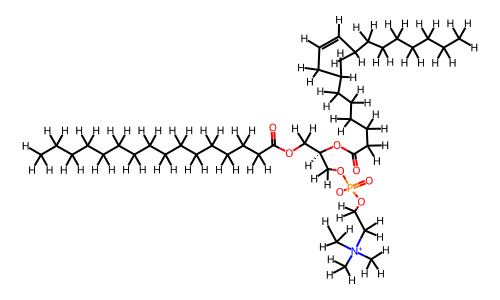

In [3]:
# Create a molecule from a SMILES string
# If missing stereochemistry, "allow_undefined_stereo=True"
lipid = Molecule.from_smiles("[C@](COP(=O)([O-])OCC[N+](C)(C)C)([H])(OC(CCCCCCC/C=C\CCCCCCCC)=O)COC(CCCCCCCCCCCCCCC)=O", allow_undefined_stereo=True)
lipid.visualize()

In [ ]:
# Define ff version | refer to this repo for updates and alternatives for water versions: https://github.com/openforcefield/openff-forcefields
forcefield = ForceField("openff-2.1.0.offxml")

# Lipid abbreviation used for structure file
lipid.name = "POPC"

# Replace resname and generate unique atom names by element frequency (C1, C2, C3...)
for i, atom in enumerate(lipid.atoms, 3):
    atom.metadata["residue_name"] = "POPC"
lipid.generate_unique_atom_names()
lipid.generate_conformers()

# Create Interchange topology
interchange = forcefield.create_interchange(lipid.to_topology())

# GROMACS output structure for Packmol
interchange.to_gromacs(prefix = "Inter_POPC", decimal = 3, hydrogen_mass = 3)

### Building the water

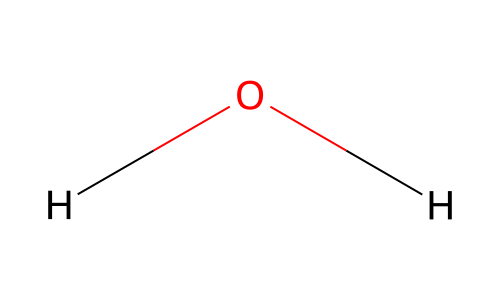

In [6]:
water = Molecule.from_smiles("O")
water.visualize()

In [ ]:
# Define ff version
forcefield = ForceField("tip3p.offxml")

water.name = "TIP3P"

for i, atom in enumerate(water.atoms, 3):
    atom.metadata["residue_name"] = "TIP3P"
water.generate_unique_atom_names()
water.generate_conformers()

interchange = forcefield.create_interchange(water.to_topology())

# PDB structure for Packmol
interchange.to_pdb("water.pdb")
interchange.to_top("water.top")

### Parametrize the system after Packmol

In [7]:

# Define ff versions
forcefield = ForceField("openff-2.1.0.offxml", "tip3p.offxml")

system = Topology.from_pdb("bilayer.pdb")

# , _additional_substructures = False

water.name = "TIP3P"
lipid.name = "POPC"

for i, atom in enumerate(water.atoms, 3):
    atom.metadata["residue_name"] = "TIP3P"
water.generate_unique_atom_names()
water.generate_conformers()
for i, atom in enumerate(lipid.atoms, 3):
    atom.metadata["residue_name"] = "POPC"
lipid.generate_unique_atom_names()
lipid.generate_conformers()

interchange = forcefield.create_interchange(system.to_topology())

interchange.to_gromacs(prefix = "bilayer", decimal = 3, hydrogen_mass = 3)

UnassignedChemistryInPDBError: Some bonds or atoms in the input could not be identified.

Hint: The following residue names with unassigned atoms were not found in the substructure library. While the OpenFF Toolkit identifies residues by matching chemical substructures rather than by residue name, it currently only supports the 20 'canonical' amino acids.
    POPC


Hint: The following residues were assigned names that do not match the residue name in the input, or could not be assigned residue names at all. This may indicate that atoms are missing from the input or some other error. The OpenFF Toolkit requires all atoms, including hydrogens, to be explicit in the input to avoid ambiguities in protonation state or bond order:
    Input residue C:POPC#0001 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0002 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0003 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0004 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0005 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0006 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0007 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0008 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0009 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0010 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0011 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0012 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0013 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0014 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0015 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0016 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0017 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0018 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0019 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0020 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0021 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0022 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0023 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0024 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0025 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0026 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0027 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0028 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0029 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0030 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0031 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0032 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0033 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0034 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0035 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0036 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0037 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0038 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0039 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0040 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0041 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0042 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0043 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0044 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0045 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0046 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0047 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0048 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0049 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0050 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0051 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0052 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0053 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0054 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0055 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0056 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0057 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0058 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0059 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0060 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0061 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0062 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0063 contains atoms matching substructures {'No match'}
    Input residue C:POPC#0064 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0001 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0002 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0003 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0004 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0005 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0006 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0007 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0008 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0009 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0010 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0011 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0012 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0013 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0014 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0015 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0016 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0017 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0018 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0019 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0020 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0021 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0022 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0023 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0024 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0025 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0026 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0027 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0028 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0029 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0030 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0031 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0032 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0033 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0034 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0035 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0036 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0037 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0038 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0039 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0040 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0041 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0042 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0043 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0044 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0045 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0046 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0047 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0048 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0049 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0050 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0051 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0052 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0053 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0054 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0055 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0056 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0057 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0058 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0059 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0060 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0061 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0062 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0063 contains atoms matching substructures {'No match'}
    Input residue D:POPC#0064 contains atoms matching substructures {'No match'}

Error: The following 17152 atoms exist in the input but could not be assigned chemical information from the substructure library:
    Atom 15360 (C1x) in residue C:POPC#0001
    Atom 15361 (C2x) in residue C:POPC#0001
    Atom 15362 (O1x) in residue C:POPC#0001
    Atom 15363 (P1x) in residue C:POPC#0001
    Atom 15364 (O2x) in residue C:POPC#0001
    Atom 15365 (O3x) in residue C:POPC#0001
    Atom 15366 (O4x) in residue C:POPC#0001
    Atom 15367 (C3x) in residue C:POPC#0001
    Atom 15368 (C4x) in residue C:POPC#0001
    Atom 15369 (N1x) in residue C:POPC#0001
    Atom 15370 (C5x) in residue C:POPC#0001
    Atom 15371 (C6x) in residue C:POPC#0001
    Atom 15372 (C7x) in residue C:POPC#0001
    Atom 15373 (H1x) in residue C:POPC#0001
    Atom 15374 (O5x) in residue C:POPC#0001
    Atom 15375 (C8x) in residue C:POPC#0001
    Atom 15376 (C9x) in residue C:POPC#0001
    Atom 15377 (C10x) in residue C:POPC#0001
    Atom 15378 (C11x) in residue C:POPC#0001
    Atom 15379 (C12x) in residue C:POPC#0001
    Atom 15380 (C13x) in residue C:POPC#0001
    Atom 15381 (C14x) in residue C:POPC#0001
    Atom 15382 (C15x) in residue C:POPC#0001
    Atom 15383 (C16x) in residue C:POPC#0001
    Atom 15384 (C17x) in residue C:POPC#0001
    Atom 15385 (C18x) in residue C:POPC#0001
    Atom 15386 (C19x) in residue C:POPC#0001
    Atom 15387 (C20x) in residue C:POPC#0001
    Atom 15388 (C21x) in residue C:POPC#0001
    Atom 15389 (C22x) in residue C:POPC#0001
    Atom 15390 (C23x) in residue C:POPC#0001
    Atom 15391 (C24x) in residue C:POPC#0001
    Atom 15392 (C25x) in residue C:POPC#0001
    Atom 15393 (O6x) in residue C:POPC#0001
    Atom 15394 (C26x) in residue C:POPC#0001
    Atom 15395 (O7x) in residue C:POPC#0001
    Atom 15396 (C27x) in residue C:POPC#0001
    Atom 15397 (C28x) in residue C:POPC#0001
    Atom 15398 (C29x) in residue C:POPC#0001
    Atom 15399 (C30x) in residue C:POPC#0001
    Atom 15400 (C31x) in residue C:POPC#0001
    Atom 15401 (C32x) in residue C:POPC#0001
    Atom 15402 (C33x) in residue C:POPC#0001
    Atom 15403 (C34x) in residue C:POPC#0001
    Atom 15404 (C35x) in residue C:POPC#0001
    Atom 15405 (C36x) in residue C:POPC#0001
    Atom 15406 (C37x) in residue C:POPC#0001
    Atom 15407 (C38x) in residue C:POPC#0001
    Atom 15408 (C39x) in residue C:POPC#0001
    Atom 15409 (C40x) in residue C:POPC#0001
    Atom 15410 (C41x) in residue C:POPC#0001
    Atom 15411 (C42x) in residue C:POPC#0001
    Atom 15412 (O8x) in residue C:POPC#0001
    Atom 15413 (H2x) in residue C:POPC#0001
    Atom 15414 (H3x) in residue C:POPC#0001
    Atom 15415 (H4x) in residue C:POPC#0001
    Atom 15416 (H5x) in residue C:POPC#0001
    Atom 15417 (H6x) in residue C:POPC#0001
    Atom 15418 (H7x) in residue C:POPC#0001
    Atom 15419 (H8x) in residue C:POPC#0001
    Atom 15420 (H9x) in residue C:POPC#0001
    Atom 15421 (H10x) in residue C:POPC#0001
    Atom 15422 (H11x) in residue C:POPC#0001
    Atom 15423 (H12x) in residue C:POPC#0001
    Atom 15424 (H13x) in residue C:POPC#0001
    Atom 15425 (H14x) in residue C:POPC#0001
    Atom 15426 (H15x) in residue C:POPC#0001
    Atom 15427 (H16x) in residue C:POPC#0001
    Atom 15428 (H17x) in residue C:POPC#0001
    Atom 15429 (H18x) in residue C:POPC#0001
    Atom 15430 (H19x) in residue C:POPC#0001
    Atom 15431 (H20x) in residue C:POPC#0001
    Atom 15432 (H21x) in residue C:POPC#0001
    Atom 15433 (H22x) in residue C:POPC#0001
    Atom 15434 (H23x) in residue C:POPC#0001
    Atom 15435 (H24x) in residue C:POPC#0001
    Atom 15436 (H25x) in residue C:POPC#0001
    Atom 15437 (H26x) in residue C:POPC#0001
    Atom 15438 (H27x) in residue C:POPC#0001
    Atom 15439 (H28x) in residue C:POPC#0001
    Atom 15440 (H29x) in residue C:POPC#0001
    Atom 15441 (H30x) in residue C:POPC#0001
    Atom 15442 (H31x) in residue C:POPC#0001
    Atom 15443 (H32x) in residue C:POPC#0001
    Atom 15444 (H33x) in residue C:POPC#0001
    Atom 15445 (H34x) in residue C:POPC#0001
    Atom 15446 (H35x) in residue C:POPC#0001
    Atom 15447 (H36x) in residue C:POPC#0001
    Atom 15448 (H37x) in residue C:POPC#0001
    Atom 15449 (H38x) in residue C:POPC#0001
    Atom 15450 (H39x) in residue C:POPC#0001
    Atom 15451 (H40x) in residue C:POPC#0001
    Atom 15452 (H41x) in residue C:POPC#0001
    Atom 15453 (H42x) in residue C:POPC#0001
    Atom 15454 (H43x) in residue C:POPC#0001
    Atom 15455 (H44x) in residue C:POPC#0001
    Atom 15456 (H45x) in residue C:POPC#0001
    Atom 15457 (H46x) in residue C:POPC#0001
    Atom 15458 (H47x) in residue C:POPC#0001
    Atom 15459 (H48x) in residue C:POPC#0001
    Atom 15460 (H49x) in residue C:POPC#0001
    Atom 15461 (H50x) in residue C:POPC#0001
    Atom 15462 (H51x) in residue C:POPC#0001
    Atom 15463 (H52x) in residue C:POPC#0001
    Atom 15464 (H53x) in residue C:POPC#0001
    Atom 15465 (H54x) in residue C:POPC#0001
    Atom 15466 (H55x) in residue C:POPC#0001
    Atom 15467 (H56x) in residue C:POPC#0001
    Atom 15468 (H57x) in residue C:POPC#0001
    Atom 15469 (H58x) in residue C:POPC#0001
    Atom 15470 (H59x) in residue C:POPC#0001
    Atom 15471 (H60x) in residue C:POPC#0001
    Atom 15472 (H61x) in residue C:POPC#0001
    Atom 15473 (H62x) in residue C:POPC#0001
    Atom 15474 (H63x) in residue C:POPC#0001
    Atom 15475 (H64x) in residue C:POPC#0001
    Atom 15476 (H65x) in residue C:POPC#0001
    Atom 15477 (H66x) in residue C:POPC#0001
    Atom 15478 (H67x) in residue C:POPC#0001
    Atom 15479 (H68x) in residue C:POPC#0001
    Atom 15480 (H69x) in residue C:POPC#0001
    Atom 15481 (H70x) in residue C:POPC#0001
    Atom 15482 (H71x) in residue C:POPC#0001
    Atom 15483 (H72x) in residue C:POPC#0001
    Atom 15484 (H73x) in residue C:POPC#0001
    Atom 15485 (H74x) in residue C:POPC#0001
    Atom 15486 (H75x) in residue C:POPC#0001
    Atom 15487 (H76x) in residue C:POPC#0001
    Atom 15488 (H77x) in residue C:POPC#0001
    Atom 15489 (H78x) in residue C:POPC#0001
    Atom 15490 (H79x) in residue C:POPC#0001
    Atom 15491 (H80x) in residue C:POPC#0001
    Atom 15492 (H81x) in residue C:POPC#0001
    Atom 15493 (H82x) in residue C:POPC#0001
    Atom 15494 (C1x) in residue C:POPC#0002
    Atom 15495 (C2x) in residue C:POPC#0002
    Atom 15496 (O1x) in residue C:POPC#0002
    Atom 15497 (P1x) in residue C:POPC#0002
    Atom 15498 (O2x) in residue C:POPC#0002
    Atom 15499 (O3x) in residue C:POPC#0002
    Atom 15500 (O4x) in residue C:POPC#0002
    Atom 15501 (C3x) in residue C:POPC#0002
    Atom 15502 (C4x) in residue C:POPC#0002
    Atom 15503 (N1x) in residue C:POPC#0002
    Atom 15504 (C5x) in residue C:POPC#0002
    Atom 15505 (C6x) in residue C:POPC#0002
    Atom 15506 (C7x) in residue C:POPC#0002
    Atom 15507 (H1x) in residue C:POPC#0002
    Atom 15508 (O5x) in residue C:POPC#0002
    Atom 15509 (C8x) in residue C:POPC#0002
    Atom 15510 (C9x) in residue C:POPC#0002
    Atom 15511 (C10x) in residue C:POPC#0002
    Atom 15512 (C11x) in residue C:POPC#0002
    Atom 15513 (C12x) in residue C:POPC#0002
    Atom 15514 (C13x) in residue C:POPC#0002
    Atom 15515 (C14x) in residue C:POPC#0002
    Atom 15516 (C15x) in residue C:POPC#0002
    Atom 15517 (C16x) in residue C:POPC#0002
    Atom 15518 (C17x) in residue C:POPC#0002
    Atom 15519 (C18x) in residue C:POPC#0002
    Atom 15520 (C19x) in residue C:POPC#0002
    Atom 15521 (C20x) in residue C:POPC#0002
    Atom 15522 (C21x) in residue C:POPC#0002
    Atom 15523 (C22x) in residue C:POPC#0002
    Atom 15524 (C23x) in residue C:POPC#0002
    Atom 15525 (C24x) in residue C:POPC#0002
    Atom 15526 (C25x) in residue C:POPC#0002
    Atom 15527 (O6x) in residue C:POPC#0002
    Atom 15528 (C26x) in residue C:POPC#0002
    Atom 15529 (O7x) in residue C:POPC#0002
    Atom 15530 (C27x) in residue C:POPC#0002
    Atom 15531 (C28x) in residue C:POPC#0002
    Atom 15532 (C29x) in residue C:POPC#0002
    Atom 15533 (C30x) in residue C:POPC#0002
    Atom 15534 (C31x) in residue C:POPC#0002
    Atom 15535 (C32x) in residue C:POPC#0002
    Atom 15536 (C33x) in residue C:POPC#0002
    Atom 15537 (C34x) in residue C:POPC#0002
    Atom 15538 (C35x) in residue C:POPC#0002
    Atom 15539 (C36x) in residue C:POPC#0002
    Atom 15540 (C37x) in residue C:POPC#0002
    Atom 15541 (C38x) in residue C:POPC#0002
    Atom 15542 (C39x) in residue C:POPC#0002
    Atom 15543 (C40x) in residue C:POPC#0002
    Atom 15544 (C41x) in residue C:POPC#0002
    Atom 15545 (C42x) in residue C:POPC#0002
    Atom 15546 (O8x) in residue C:POPC#0002
    Atom 15547 (H2x) in residue C:POPC#0002
    Atom 15548 (H3x) in residue C:POPC#0002
    Atom 15549 (H4x) in residue C:POPC#0002
    Atom 15550 (H5x) in residue C:POPC#0002
    Atom 15551 (H6x) in residue C:POPC#0002
    Atom 15552 (H7x) in residue C:POPC#0002
    Atom 15553 (H8x) in residue C:POPC#0002
    Atom 15554 (H9x) in residue C:POPC#0002
    Atom 15555 (H10x) in residue C:POPC#0002
    Atom 15556 (H11x) in residue C:POPC#0002
    Atom 15557 (H12x) in residue C:POPC#0002
    Atom 15558 (H13x) in residue C:POPC#0002
    Atom 15559 (H14x) in residue C:POPC#0002
    Atom 15560 (H15x) in residue C:POPC#0002
    Atom 15561 (H16x) in residue C:POPC#0002
    Atom 15562 (H17x) in residue C:POPC#0002
    Atom 15563 (H18x) in residue C:POPC#0002
    Atom 15564 (H19x) in residue C:POPC#0002
    Atom 15565 (H20x) in residue C:POPC#0002
    Atom 15566 (H21x) in residue C:POPC#0002
    Atom 15567 (H22x) in residue C:POPC#0002
    Atom 15568 (H23x) in residue C:POPC#0002
    Atom 15569 (H24x) in residue C:POPC#0002
    Atom 15570 (H25x) in residue C:POPC#0002
    Atom 15571 (H26x) in residue C:POPC#0002
    Atom 15572 (H27x) in residue C:POPC#0002
    Atom 15573 (H28x) in residue C:POPC#0002
    Atom 15574 (H29x) in residue C:POPC#0002
    Atom 15575 (H30x) in residue C:POPC#0002
    Atom 15576 (H31x) in residue C:POPC#0002
    Atom 15577 (H32x) in residue C:POPC#0002
    Atom 15578 (H33x) in residue C:POPC#0002
    Atom 15579 (H34x) in residue C:POPC#0002
    Atom 15580 (H35x) in residue C:POPC#0002
    Atom 15581 (H36x) in residue C:POPC#0002
    Atom 15582 (H37x) in residue C:POPC#0002
    Atom 15583 (H38x) in residue C:POPC#0002
    Atom 15584 (H39x) in residue C:POPC#0002
    Atom 15585 (H40x) in residue C:POPC#0002
    Atom 15586 (H41x) in residue C:POPC#0002
    Atom 15587 (H42x) in residue C:POPC#0002
    Atom 15588 (H43x) in residue C:POPC#0002
    Atom 15589 (H44x) in residue C:POPC#0002
    Atom 15590 (H45x) in residue C:POPC#0002
    Atom 15591 (H46x) in residue C:POPC#0002
    Atom 15592 (H47x) in residue C:POPC#0002
    Atom 15593 (H48x) in residue C:POPC#0002
    Atom 15594 (H49x) in residue C:POPC#0002
    Atom 15595 (H50x) in residue C:POPC#0002
    Atom 15596 (H51x) in residue C:POPC#0002
    Atom 15597 (H52x) in residue C:POPC#0002
    Atom 15598 (H53x) in residue C:POPC#0002
    Atom 15599 (H54x) in residue C:POPC#0002
    Atom 15600 (H55x) in residue C:POPC#0002
    Atom 15601 (H56x) in residue C:POPC#0002
    Atom 15602 (H57x) in residue C:POPC#0002
    Atom 15603 (H58x) in residue C:POPC#0002
    Atom 15604 (H59x) in residue C:POPC#0002
    Atom 15605 (H60x) in residue C:POPC#0002
    Atom 15606 (H61x) in residue C:POPC#0002
    Atom 15607 (H62x) in residue C:POPC#0002
    Atom 15608 (H63x) in residue C:POPC#0002
    Atom 15609 (H64x) in residue C:POPC#0002
    Atom 15610 (H65x) in residue C:POPC#0002
    Atom 15611 (H66x) in residue C:POPC#0002
    Atom 15612 (H67x) in residue C:POPC#0002
    Atom 15613 (H68x) in residue C:POPC#0002
    Atom 15614 (H69x) in residue C:POPC#0002
    Atom 15615 (H70x) in residue C:POPC#0002
    Atom 15616 (H71x) in residue C:POPC#0002
    Atom 15617 (H72x) in residue C:POPC#0002
    Atom 15618 (H73x) in residue C:POPC#0002
    Atom 15619 (H74x) in residue C:POPC#0002
    Atom 15620 (H75x) in residue C:POPC#0002
    Atom 15621 (H76x) in residue C:POPC#0002
    Atom 15622 (H77x) in residue C:POPC#0002
    Atom 15623 (H78x) in residue C:POPC#0002
    Atom 15624 (H79x) in residue C:POPC#0002
    Atom 15625 (H80x) in residue C:POPC#0002
    Atom 15626 (H81x) in residue C:POPC#0002
    Atom 15627 (H82x) in residue C:POPC#0002
    Atom 15628 (C1x) in residue C:POPC#0003
    Atom 15629 (C2x) in residue C:POPC#0003
    Atom 15630 (O1x) in residue C:POPC#0003
    Atom 15631 (P1x) in residue C:POPC#0003
    Atom 15632 (O2x) in residue C:POPC#0003
    Atom 15633 (O3x) in residue C:POPC#0003
    Atom 15634 (O4x) in residue C:POPC#0003
    Atom 15635 (C3x) in residue C:POPC#0003
    Atom 15636 (C4x) in residue C:POPC#0003
    Atom 15637 (N1x) in residue C:POPC#0003
    Atom 15638 (C5x) in residue C:POPC#0003
    Atom 15639 (C6x) in residue C:POPC#0003
    Atom 15640 (C7x) in residue C:POPC#0003
    Atom 15641 (H1x) in residue C:POPC#0003
    Atom 15642 (O5x) in residue C:POPC#0003
    Atom 15643 (C8x) in residue C:POPC#0003
    Atom 15644 (C9x) in residue C:POPC#0003
    Atom 15645 (C10x) in residue C:POPC#0003
    Atom 15646 (C11x) in residue C:POPC#0003
    Atom 15647 (C12x) in residue C:POPC#0003
    Atom 15648 (C13x) in residue C:POPC#0003
    Atom 15649 (C14x) in residue C:POPC#0003
    Atom 15650 (C15x) in residue C:POPC#0003
    Atom 15651 (C16x) in residue C:POPC#0003
    Atom 15652 (C17x) in residue C:POPC#0003
    Atom 15653 (C18x) in residue C:POPC#0003
    Atom 15654 (C19x) in residue C:POPC#0003
    Atom 15655 (C20x) in residue C:POPC#0003
    Atom 15656 (C21x) in residue C:POPC#0003
    Atom 15657 (C22x) in residue C:POPC#0003
    Atom 15658 (C23x) in residue C:POPC#0003
    Atom 15659 (C24x) in residue C:POPC#0003
    Atom 15660 (C25x) in residue C:POPC#0003
    Atom 15661 (O6x) in residue C:POPC#0003
    Atom 15662 (C26x) in residue C:POPC#0003
    Atom 15663 (O7x) in residue C:POPC#0003
    Atom 15664 (C27x) in residue C:POPC#0003
    Atom 15665 (C28x) in residue C:POPC#0003
    Atom 15666 (C29x) in residue C:POPC#0003
    Atom 15667 (C30x) in residue C:POPC#0003
    Atom 15668 (C31x) in residue C:POPC#0003
    Atom 15669 (C32x) in residue C:POPC#0003
    Atom 15670 (C33x) in residue C:POPC#0003
    Atom 15671 (C34x) in residue C:POPC#0003
    Atom 15672 (C35x) in residue C:POPC#0003
    Atom 15673 (C36x) in residue C:POPC#0003
    Atom 15674 (C37x) in residue C:POPC#0003
    Atom 15675 (C38x) in residue C:POPC#0003
    Atom 15676 (C39x) in residue C:POPC#0003
    Atom 15677 (C40x) in residue C:POPC#0003
    Atom 15678 (C41x) in residue C:POPC#0003
    Atom 15679 (C42x) in residue C:POPC#0003
    Atom 15680 (O8x) in residue C:POPC#0003
    Atom 15681 (H2x) in residue C:POPC#0003
    Atom 15682 (H3x) in residue C:POPC#0003
    Atom 15683 (H4x) in residue C:POPC#0003
    Atom 15684 (H5x) in residue C:POPC#0003
    Atom 15685 (H6x) in residue C:POPC#0003
    Atom 15686 (H7x) in residue C:POPC#0003
    Atom 15687 (H8x) in residue C:POPC#0003
    Atom 15688 (H9x) in residue C:POPC#0003
    Atom 15689 (H10x) in residue C:POPC#0003
    Atom 15690 (H11x) in residue C:POPC#0003
    Atom 15691 (H12x) in residue C:POPC#0003
    Atom 15692 (H13x) in residue C:POPC#0003
    Atom 15693 (H14x) in residue C:POPC#0003
    Atom 15694 (H15x) in residue C:POPC#0003
    Atom 15695 (H16x) in residue C:POPC#0003
    Atom 15696 (H17x) in residue C:POPC#0003
    Atom 15697 (H18x) in residue C:POPC#0003
    Atom 15698 (H19x) in residue C:POPC#0003
    Atom 15699 (H20x) in residue C:POPC#0003
    Atom 15700 (H21x) in residue C:POPC#0003
    Atom 15701 (H22x) in residue C:POPC#0003
    Atom 15702 (H23x) in residue C:POPC#0003
    Atom 15703 (H24x) in residue C:POPC#0003
    Atom 15704 (H25x) in residue C:POPC#0003
    Atom 15705 (H26x) in residue C:POPC#0003
    Atom 15706 (H27x) in residue C:POPC#0003
    Atom 15707 (H28x) in residue C:POPC#0003
    Atom 15708 (H29x) in residue C:POPC#0003
    Atom 15709 (H30x) in residue C:POPC#0003
    Atom 15710 (H31x) in residue C:POPC#0003
    Atom 15711 (H32x) in residue C:POPC#0003
    Atom 15712 (H33x) in residue C:POPC#0003
    Atom 15713 (H34x) in residue C:POPC#0003
    Atom 15714 (H35x) in residue C:POPC#0003
    Atom 15715 (H36x) in residue C:POPC#0003
    Atom 15716 (H37x) in residue C:POPC#0003
    Atom 15717 (H38x) in residue C:POPC#0003
    Atom 15718 (H39x) in residue C:POPC#0003
    Atom 15719 (H40x) in residue C:POPC#0003
    Atom 15720 (H41x) in residue C:POPC#0003
    Atom 15721 (H42x) in residue C:POPC#0003
    Atom 15722 (H43x) in residue C:POPC#0003
    Atom 15723 (H44x) in residue C:POPC#0003
    Atom 15724 (H45x) in residue C:POPC#0003
    Atom 15725 (H46x) in residue C:POPC#0003
    Atom 15726 (H47x) in residue C:POPC#0003
    Atom 15727 (H48x) in residue C:POPC#0003
    Atom 15728 (H49x) in residue C:POPC#0003
    Atom 15729 (H50x) in residue C:POPC#0003
    Atom 15730 (H51x) in residue C:POPC#0003
    Atom 15731 (H52x) in residue C:POPC#0003
    Atom 15732 (H53x) in residue C:POPC#0003
    Atom 15733 (H54x) in residue C:POPC#0003
    Atom 15734 (H55x) in residue C:POPC#0003
    Atom 15735 (H56x) in residue C:POPC#0003
    Atom 15736 (H57x) in residue C:POPC#0003
    Atom 15737 (H58x) in residue C:POPC#0003
    Atom 15738 (H59x) in residue C:POPC#0003
    Atom 15739 (H60x) in residue C:POPC#0003
    Atom 15740 (H61x) in residue C:POPC#0003
    Atom 15741 (H62x) in residue C:POPC#0003
    Atom 15742 (H63x) in residue C:POPC#0003
    Atom 15743 (H64x) in residue C:POPC#0003
    Atom 15744 (H65x) in residue C:POPC#0003
    Atom 15745 (H66x) in residue C:POPC#0003
    Atom 15746 (H67x) in residue C:POPC#0003
    Atom 15747 (H68x) in residue C:POPC#0003
    Atom 15748 (H69x) in residue C:POPC#0003
    Atom 15749 (H70x) in residue C:POPC#0003
    Atom 15750 (H71x) in residue C:POPC#0003
    Atom 15751 (H72x) in residue C:POPC#0003
    Atom 15752 (H73x) in residue C:POPC#0003
    Atom 15753 (H74x) in residue C:POPC#0003
    Atom 15754 (H75x) in residue C:POPC#0003
    Atom 15755 (H76x) in residue C:POPC#0003
    Atom 15756 (H77x) in residue C:POPC#0003
    Atom 15757 (H78x) in residue C:POPC#0003
    Atom 15758 (H79x) in residue C:POPC#0003
    Atom 15759 (H80x) in residue C:POPC#0003
    Atom 15760 (H81x) in residue C:POPC#0003
    Atom 15761 (H82x) in residue C:POPC#0003
    Atom 15762 (C1x) in residue C:POPC#0004
    Atom 15763 (C2x) in residue C:POPC#0004
    Atom 15764 (O1x) in residue C:POPC#0004
    Atom 15765 (P1x) in residue C:POPC#0004
    Atom 15766 (O2x) in residue C:POPC#0004
    Atom 15767 (O3x) in residue C:POPC#0004
    Atom 15768 (O4x) in residue C:POPC#0004
    Atom 15769 (C3x) in residue C:POPC#0004
    Atom 15770 (C4x) in residue C:POPC#0004
    Atom 15771 (N1x) in residue C:POPC#0004
    Atom 15772 (C5x) in residue C:POPC#0004
    Atom 15773 (C6x) in residue C:POPC#0004
    Atom 15774 (C7x) in residue C:POPC#0004
    Atom 15775 (H1x) in residue C:POPC#0004
    Atom 15776 (O5x) in residue C:POPC#0004
    Atom 15777 (C8x) in residue C:POPC#0004
    Atom 15778 (C9x) in residue C:POPC#0004
    Atom 15779 (C10x) in residue C:POPC#0004
    Atom 15780 (C11x) in residue C:POPC#0004
    Atom 15781 (C12x) in residue C:POPC#0004
    Atom 15782 (C13x) in residue C:POPC#0004
    Atom 15783 (C14x) in residue C:POPC#0004
    Atom 15784 (C15x) in residue C:POPC#0004
    Atom 15785 (C16x) in residue C:POPC#0004
    Atom 15786 (C17x) in residue C:POPC#0004
    Atom 15787 (C18x) in residue C:POPC#0004
    Atom 15788 (C19x) in residue C:POPC#0004
    Atom 15789 (C20x) in residue C:POPC#0004
    Atom 15790 (C21x) in residue C:POPC#0004
    Atom 15791 (C22x) in residue C:POPC#0004
    Atom 15792 (C23x) in residue C:POPC#0004
    Atom 15793 (C24x) in residue C:POPC#0004
    Atom 15794 (C25x) in residue C:POPC#0004
    Atom 15795 (O6x) in residue C:POPC#0004
    Atom 15796 (C26x) in residue C:POPC#0004
    Atom 15797 (O7x) in residue C:POPC#0004
    Atom 15798 (C27x) in residue C:POPC#0004
    Atom 15799 (C28x) in residue C:POPC#0004
    Atom 15800 (C29x) in residue C:POPC#0004
    Atom 15801 (C30x) in residue C:POPC#0004
    Atom 15802 (C31x) in residue C:POPC#0004
    Atom 15803 (C32x) in residue C:POPC#0004
    Atom 15804 (C33x) in residue C:POPC#0004
    Atom 15805 (C34x) in residue C:POPC#0004
    Atom 15806 (C35x) in residue C:POPC#0004
    Atom 15807 (C36x) in residue C:POPC#0004
    Atom 15808 (C37x) in residue C:POPC#0004
    Atom 15809 (C38x) in residue C:POPC#0004
    Atom 15810 (C39x) in residue C:POPC#0004
    Atom 15811 (C40x) in residue C:POPC#0004
    Atom 15812 (C41x) in residue C:POPC#0004
    Atom 15813 (C42x) in residue C:POPC#0004
    Atom 15814 (O8x) in residue C:POPC#0004
    Atom 15815 (H2x) in residue C:POPC#0004
    Atom 15816 (H3x) in residue C:POPC#0004
    Atom 15817 (H4x) in residue C:POPC#0004
    Atom 15818 (H5x) in residue C:POPC#0004
    Atom 15819 (H6x) in residue C:POPC#0004
    Atom 15820 (H7x) in residue C:POPC#0004
    Atom 15821 (H8x) in residue C:POPC#0004
    Atom 15822 (H9x) in residue C:POPC#0004
    Atom 15823 (H10x) in residue C:POPC#0004
    Atom 15824 (H11x) in residue C:POPC#0004
    Atom 15825 (H12x) in residue C:POPC#0004
    Atom 15826 (H13x) in residue C:POPC#0004
    Atom 15827 (H14x) in residue C:POPC#0004
    Atom 15828 (H15x) in residue C:POPC#0004
    Atom 15829 (H16x) in residue C:POPC#0004
    Atom 15830 (H17x) in residue C:POPC#0004
    Atom 15831 (H18x) in residue C:POPC#0004
    Atom 15832 (H19x) in residue C:POPC#0004
    Atom 15833 (H20x) in residue C:POPC#0004
    Atom 15834 (H21x) in residue C:POPC#0004
    Atom 15835 (H22x) in residue C:POPC#0004
    Atom 15836 (H23x) in residue C:POPC#0004
    Atom 15837 (H24x) in residue C:POPC#0004
    Atom 15838 (H25x) in residue C:POPC#0004
    Atom 15839 (H26x) in residue C:POPC#0004
    Atom 15840 (H27x) in residue C:POPC#0004
    Atom 15841 (H28x) in residue C:POPC#0004
    Atom 15842 (H29x) in residue C:POPC#0004
    Atom 15843 (H30x) in residue C:POPC#0004
    Atom 15844 (H31x) in residue C:POPC#0004
    Atom 15845 (H32x) in residue C:POPC#0004
    Atom 15846 (H33x) in residue C:POPC#0004
    Atom 15847 (H34x) in residue C:POPC#0004
    Atom 15848 (H35x) in residue C:POPC#0004
    Atom 15849 (H36x) in residue C:POPC#0004
    Atom 15850 (H37x) in residue C:POPC#0004
    Atom 15851 (H38x) in residue C:POPC#0004
    Atom 15852 (H39x) in residue C:POPC#0004
    Atom 15853 (H40x) in residue C:POPC#0004
    Atom 15854 (H41x) in residue C:POPC#0004
    Atom 15855 (H42x) in residue C:POPC#0004
    Atom 15856 (H43x) in residue C:POPC#0004
    Atom 15857 (H44x) in residue C:POPC#0004
    Atom 15858 (H45x) in residue C:POPC#0004
    Atom 15859 (H46x) in residue C:POPC#0004
    Atom 15860 (H47x) in residue C:POPC#0004
    Atom 15861 (H48x) in residue C:POPC#0004
    Atom 15862 (H49x) in residue C:POPC#0004
    Atom 15863 (H50x) in residue C:POPC#0004
    Atom 15864 (H51x) in residue C:POPC#0004
    Atom 15865 (H52x) in residue C:POPC#0004
    Atom 15866 (H53x) in residue C:POPC#0004
    Atom 15867 (H54x) in residue C:POPC#0004
    Atom 15868 (H55x) in residue C:POPC#0004
    Atom 15869 (H56x) in residue C:POPC#0004
    Atom 15870 (H57x) in residue C:POPC#0004
    Atom 15871 (H58x) in residue C:POPC#0004
    Atom 15872 (H59x) in residue C:POPC#0004
    Atom 15873 (H60x) in residue C:POPC#0004
    Atom 15874 (H61x) in residue C:POPC#0004
    Atom 15875 (H62x) in residue C:POPC#0004
    Atom 15876 (H63x) in residue C:POPC#0004
    Atom 15877 (H64x) in residue C:POPC#0004
    Atom 15878 (H65x) in residue C:POPC#0004
    Atom 15879 (H66x) in residue C:POPC#0004
    Atom 15880 (H67x) in residue C:POPC#0004
    Atom 15881 (H68x) in residue C:POPC#0004
    Atom 15882 (H69x) in residue C:POPC#0004
    Atom 15883 (H70x) in residue C:POPC#0004
    Atom 15884 (H71x) in residue C:POPC#0004
    Atom 15885 (H72x) in residue C:POPC#0004
    Atom 15886 (H73x) in residue C:POPC#0004
    Atom 15887 (H74x) in residue C:POPC#0004
    Atom 15888 (H75x) in residue C:POPC#0004
    Atom 15889 (H76x) in residue C:POPC#0004
    Atom 15890 (H77x) in residue C:POPC#0004
    Atom 15891 (H78x) in residue C:POPC#0004
    Atom 15892 (H79x) in residue C:POPC#0004
    Atom 15893 (H80x) in residue C:POPC#0004
    Atom 15894 (H81x) in residue C:POPC#0004
    Atom 15895 (H82x) in residue C:POPC#0004
    Atom 15896 (C1x) in residue C:POPC#0005
    Atom 15897 (C2x) in residue C:POPC#0005
    Atom 15898 (O1x) in residue C:POPC#0005
    Atom 15899 (P1x) in residue C:POPC#0005
    Atom 15900 (O2x) in residue C:POPC#0005
    Atom 15901 (O3x) in residue C:POPC#0005
    Atom 15902 (O4x) in residue C:POPC#0005
    Atom 15903 (C3x) in residue C:POPC#0005
    Atom 15904 (C4x) in residue C:POPC#0005
    Atom 15905 (N1x) in residue C:POPC#0005
    Atom 15906 (C5x) in residue C:POPC#0005
    Atom 15907 (C6x) in residue C:POPC#0005
    Atom 15908 (C7x) in residue C:POPC#0005
    Atom 15909 (H1x) in residue C:POPC#0005
    Atom 15910 (O5x) in residue C:POPC#0005
    Atom 15911 (C8x) in residue C:POPC#0005
    Atom 15912 (C9x) in residue C:POPC#0005
    Atom 15913 (C10x) in residue C:POPC#0005
    Atom 15914 (C11x) in residue C:POPC#0005
    Atom 15915 (C12x) in residue C:POPC#0005
    Atom 15916 (C13x) in residue C:POPC#0005
    Atom 15917 (C14x) in residue C:POPC#0005
    Atom 15918 (C15x) in residue C:POPC#0005
    Atom 15919 (C16x) in residue C:POPC#0005
    Atom 15920 (C17x) in residue C:POPC#0005
    Atom 15921 (C18x) in residue C:POPC#0005
    Atom 15922 (C19x) in residue C:POPC#0005
    Atom 15923 (C20x) in residue C:POPC#0005
    Atom 15924 (C21x) in residue C:POPC#0005
    Atom 15925 (C22x) in residue C:POPC#0005
    Atom 15926 (C23x) in residue C:POPC#0005
    Atom 15927 (C24x) in residue C:POPC#0005
    Atom 15928 (C25x) in residue C:POPC#0005
    Atom 15929 (O6x) in residue C:POPC#0005
    Atom 15930 (C26x) in residue C:POPC#0005
    Atom 15931 (O7x) in residue C:POPC#0005
    Atom 15932 (C27x) in residue C:POPC#0005
    Atom 15933 (C28x) in residue C:POPC#0005
    Atom 15934 (C29x) in residue C:POPC#0005
    Atom 15935 (C30x) in residue C:POPC#0005
    Atom 15936 (C31x) in residue C:POPC#0005
    Atom 15937 (C32x) in residue C:POPC#0005
    Atom 15938 (C33x) in residue C:POPC#0005
    Atom 15939 (C34x) in residue C:POPC#0005
    Atom 15940 (C35x) in residue C:POPC#0005
    Atom 15941 (C36x) in residue C:POPC#0005
    Atom 15942 (C37x) in residue C:POPC#0005
    Atom 15943 (C38x) in residue C:POPC#0005
    Atom 15944 (C39x) in residue C:POPC#0005
    Atom 15945 (C40x) in residue C:POPC#0005
    Atom 15946 (C41x) in residue C:POPC#0005
    Atom 15947 (C42x) in residue C:POPC#0005
    Atom 15948 (O8x) in residue C:POPC#0005
    Atom 15949 (H2x) in residue C:POPC#0005
    Atom 15950 (H3x) in residue C:POPC#0005
    Atom 15951 (H4x) in residue C:POPC#0005
    Atom 15952 (H5x) in residue C:POPC#0005
    Atom 15953 (H6x) in residue C:POPC#0005
    Atom 15954 (H7x) in residue C:POPC#0005
    Atom 15955 (H8x) in residue C:POPC#0005
    Atom 15956 (H9x) in residue C:POPC#0005
    Atom 15957 (H10x) in residue C:POPC#0005
    Atom 15958 (H11x) in residue C:POPC#0005
    Atom 15959 (H12x) in residue C:POPC#0005
    Atom 15960 (H13x) in residue C:POPC#0005
    Atom 15961 (H14x) in residue C:POPC#0005
    Atom 15962 (H15x) in residue C:POPC#0005
    Atom 15963 (H16x) in residue C:POPC#0005
    Atom 15964 (H17x) in residue C:POPC#0005
    Atom 15965 (H18x) in residue C:POPC#0005
    Atom 15966 (H19x) in residue C:POPC#0005
    Atom 15967 (H20x) in residue C:POPC#0005
    Atom 15968 (H21x) in residue C:POPC#0005
    Atom 15969 (H22x) in residue C:POPC#0005
    Atom 15970 (H23x) in residue C:POPC#0005
    Atom 15971 (H24x) in residue C:POPC#0005
    Atom 15972 (H25x) in residue C:POPC#0005
    Atom 15973 (H26x) in residue C:POPC#0005
    Atom 15974 (H27x) in residue C:POPC#0005
    Atom 15975 (H28x) in residue C:POPC#0005
    Atom 15976 (H29x) in residue C:POPC#0005
    Atom 15977 (H30x) in residue C:POPC#0005
    Atom 15978 (H31x) in residue C:POPC#0005
    Atom 15979 (H32x) in residue C:POPC#0005
    Atom 15980 (H33x) in residue C:POPC#0005
    Atom 15981 (H34x) in residue C:POPC#0005
    Atom 15982 (H35x) in residue C:POPC#0005
    Atom 15983 (H36x) in residue C:POPC#0005
    Atom 15984 (H37x) in residue C:POPC#0005
    Atom 15985 (H38x) in residue C:POPC#0005
    Atom 15986 (H39x) in residue C:POPC#0005
    Atom 15987 (H40x) in residue C:POPC#0005
    Atom 15988 (H41x) in residue C:POPC#0005
    Atom 15989 (H42x) in residue C:POPC#0005
    Atom 15990 (H43x) in residue C:POPC#0005
    Atom 15991 (H44x) in residue C:POPC#0005
    Atom 15992 (H45x) in residue C:POPC#0005
    Atom 15993 (H46x) in residue C:POPC#0005
    Atom 15994 (H47x) in residue C:POPC#0005
    Atom 15995 (H48x) in residue C:POPC#0005
    Atom 15996 (H49x) in residue C:POPC#0005
    Atom 15997 (H50x) in residue C:POPC#0005
    Atom 15998 (H51x) in residue C:POPC#0005
    Atom 15999 (H52x) in residue C:POPC#0005
    Atom 16000 (H53x) in residue C:POPC#0005
    Atom 16001 (H54x) in residue C:POPC#0005
    Atom 16002 (H55x) in residue C:POPC#0005
    Atom 16003 (H56x) in residue C:POPC#0005
    Atom 16004 (H57x) in residue C:POPC#0005
    Atom 16005 (H58x) in residue C:POPC#0005
    Atom 16006 (H59x) in residue C:POPC#0005
    Atom 16007 (H60x) in residue C:POPC#0005
    Atom 16008 (H61x) in residue C:POPC#0005
    Atom 16009 (H62x) in residue C:POPC#0005
    Atom 16010 (H63x) in residue C:POPC#0005
    Atom 16011 (H64x) in residue C:POPC#0005
    Atom 16012 (H65x) in residue C:POPC#0005
    Atom 16013 (H66x) in residue C:POPC#0005
    Atom 16014 (H67x) in residue C:POPC#0005
    Atom 16015 (H68x) in residue C:POPC#0005
    Atom 16016 (H69x) in residue C:POPC#0005
    Atom 16017 (H70x) in residue C:POPC#0005
    Atom 16018 (H71x) in residue C:POPC#0005
    Atom 16019 (H72x) in residue C:POPC#0005
    Atom 16020 (H73x) in residue C:POPC#0005
    Atom 16021 (H74x) in residue C:POPC#0005
    Atom 16022 (H75x) in residue C:POPC#0005
    Atom 16023 (H76x) in residue C:POPC#0005
    Atom 16024 (H77x) in residue C:POPC#0005
    Atom 16025 (H78x) in residue C:POPC#0005
    Atom 16026 (H79x) in residue C:POPC#0005
    Atom 16027 (H80x) in residue C:POPC#0005
    Atom 16028 (H81x) in residue C:POPC#0005
    Atom 16029 (H82x) in residue C:POPC#0005
    Atom 16030 (C1x) in residue C:POPC#0006
    Atom 16031 (C2x) in residue C:POPC#0006
    Atom 16032 (O1x) in residue C:POPC#0006
    Atom 16033 (P1x) in residue C:POPC#0006
    Atom 16034 (O2x) in residue C:POPC#0006
    Atom 16035 (O3x) in residue C:POPC#0006
    Atom 16036 (O4x) in residue C:POPC#0006
    Atom 16037 (C3x) in residue C:POPC#0006
    Atom 16038 (C4x) in residue C:POPC#0006
    Atom 16039 (N1x) in residue C:POPC#0006
    Atom 16040 (C5x) in residue C:POPC#0006
    Atom 16041 (C6x) in residue C:POPC#0006
    Atom 16042 (C7x) in residue C:POPC#0006
    Atom 16043 (H1x) in residue C:POPC#0006
    Atom 16044 (O5x) in residue C:POPC#0006
    Atom 16045 (C8x) in residue C:POPC#0006
    Atom 16046 (C9x) in residue C:POPC#0006
    Atom 16047 (C10x) in residue C:POPC#0006
    Atom 16048 (C11x) in residue C:POPC#0006
    Atom 16049 (C12x) in residue C:POPC#0006
    Atom 16050 (C13x) in residue C:POPC#0006
    Atom 16051 (C14x) in residue C:POPC#0006
    Atom 16052 (C15x) in residue C:POPC#0006
    Atom 16053 (C16x) in residue C:POPC#0006
    Atom 16054 (C17x) in residue C:POPC#0006
    Atom 16055 (C18x) in residue C:POPC#0006
    Atom 16056 (C19x) in residue C:POPC#0006
    Atom 16057 (C20x) in residue C:POPC#0006
    Atom 16058 (C21x) in residue C:POPC#0006
    Atom 16059 (C22x) in residue C:POPC#0006
    Atom 16060 (C23x) in residue C:POPC#0006
    Atom 16061 (C24x) in residue C:POPC#0006
    Atom 16062 (C25x) in residue C:POPC#0006
    Atom 16063 (O6x) in residue C:POPC#0006
    Atom 16064 (C26x) in residue C:POPC#0006
    Atom 16065 (O7x) in residue C:POPC#0006
    Atom 16066 (C27x) in residue C:POPC#0006
    Atom 16067 (C28x) in residue C:POPC#0006
    Atom 16068 (C29x) in residue C:POPC#0006
    Atom 16069 (C30x) in residue C:POPC#0006
    Atom 16070 (C31x) in residue C:POPC#0006
    Atom 16071 (C32x) in residue C:POPC#0006
    Atom 16072 (C33x) in residue C:POPC#0006
    Atom 16073 (C34x) in residue C:POPC#0006
    Atom 16074 (C35x) in residue C:POPC#0006
    Atom 16075 (C36x) in residue C:POPC#0006
    Atom 16076 (C37x) in residue C:POPC#0006
    Atom 16077 (C38x) in residue C:POPC#0006
    Atom 16078 (C39x) in residue C:POPC#0006
    Atom 16079 (C40x) in residue C:POPC#0006
    Atom 16080 (C41x) in residue C:POPC#0006
    Atom 16081 (C42x) in residue C:POPC#0006
    Atom 16082 (O8x) in residue C:POPC#0006
    Atom 16083 (H2x) in residue C:POPC#0006
    Atom 16084 (H3x) in residue C:POPC#0006
    Atom 16085 (H4x) in residue C:POPC#0006
    Atom 16086 (H5x) in residue C:POPC#0006
    Atom 16087 (H6x) in residue C:POPC#0006
    Atom 16088 (H7x) in residue C:POPC#0006
    Atom 16089 (H8x) in residue C:POPC#0006
    Atom 16090 (H9x) in residue C:POPC#0006
    Atom 16091 (H10x) in residue C:POPC#0006
    Atom 16092 (H11x) in residue C:POPC#0006
    Atom 16093 (H12x) in residue C:POPC#0006
    Atom 16094 (H13x) in residue C:POPC#0006
    Atom 16095 (H14x) in residue C:POPC#0006
    Atom 16096 (H15x) in residue C:POPC#0006
    Atom 16097 (H16x) in residue C:POPC#0006
    Atom 16098 (H17x) in residue C:POPC#0006
    Atom 16099 (H18x) in residue C:POPC#0006
    Atom 16100 (H19x) in residue C:POPC#0006
    Atom 16101 (H20x) in residue C:POPC#0006
    Atom 16102 (H21x) in residue C:POPC#0006
    Atom 16103 (H22x) in residue C:POPC#0006
    Atom 16104 (H23x) in residue C:POPC#0006
    Atom 16105 (H24x) in residue C:POPC#0006
    Atom 16106 (H25x) in residue C:POPC#0006
    Atom 16107 (H26x) in residue C:POPC#0006
    Atom 16108 (H27x) in residue C:POPC#0006
    Atom 16109 (H28x) in residue C:POPC#0006
    Atom 16110 (H29x) in residue C:POPC#0006
    Atom 16111 (H30x) in residue C:POPC#0006
    Atom 16112 (H31x) in residue C:POPC#0006
    Atom 16113 (H32x) in residue C:POPC#0006
    Atom 16114 (H33x) in residue C:POPC#0006
    Atom 16115 (H34x) in residue C:POPC#0006
    Atom 16116 (H35x) in residue C:POPC#0006
    Atom 16117 (H36x) in residue C:POPC#0006
    Atom 16118 (H37x) in residue C:POPC#0006
    Atom 16119 (H38x) in residue C:POPC#0006
    Atom 16120 (H39x) in residue C:POPC#0006
    Atom 16121 (H40x) in residue C:POPC#0006
    Atom 16122 (H41x) in residue C:POPC#0006
    Atom 16123 (H42x) in residue C:POPC#0006
    Atom 16124 (H43x) in residue C:POPC#0006
    Atom 16125 (H44x) in residue C:POPC#0006
    Atom 16126 (H45x) in residue C:POPC#0006
    Atom 16127 (H46x) in residue C:POPC#0006
    Atom 16128 (H47x) in residue C:POPC#0006
    Atom 16129 (H48x) in residue C:POPC#0006
    Atom 16130 (H49x) in residue C:POPC#0006
    Atom 16131 (H50x) in residue C:POPC#0006
    Atom 16132 (H51x) in residue C:POPC#0006
    Atom 16133 (H52x) in residue C:POPC#0006
    Atom 16134 (H53x) in residue C:POPC#0006
    Atom 16135 (H54x) in residue C:POPC#0006
    Atom 16136 (H55x) in residue C:POPC#0006
    Atom 16137 (H56x) in residue C:POPC#0006
    Atom 16138 (H57x) in residue C:POPC#0006
    Atom 16139 (H58x) in residue C:POPC#0006
    Atom 16140 (H59x) in residue C:POPC#0006
    Atom 16141 (H60x) in residue C:POPC#0006
    Atom 16142 (H61x) in residue C:POPC#0006
    Atom 16143 (H62x) in residue C:POPC#0006
    Atom 16144 (H63x) in residue C:POPC#0006
    Atom 16145 (H64x) in residue C:POPC#0006
    Atom 16146 (H65x) in residue C:POPC#0006
    Atom 16147 (H66x) in residue C:POPC#0006
    Atom 16148 (H67x) in residue C:POPC#0006
    Atom 16149 (H68x) in residue C:POPC#0006
    Atom 16150 (H69x) in residue C:POPC#0006
    Atom 16151 (H70x) in residue C:POPC#0006
    Atom 16152 (H71x) in residue C:POPC#0006
    Atom 16153 (H72x) in residue C:POPC#0006
    Atom 16154 (H73x) in residue C:POPC#0006
    Atom 16155 (H74x) in residue C:POPC#0006
    Atom 16156 (H75x) in residue C:POPC#0006
    Atom 16157 (H76x) in residue C:POPC#0006
    Atom 16158 (H77x) in residue C:POPC#0006
    Atom 16159 (H78x) in residue C:POPC#0006
    Atom 16160 (H79x) in residue C:POPC#0006
    Atom 16161 (H80x) in residue C:POPC#0006
    Atom 16162 (H81x) in residue C:POPC#0006
    Atom 16163 (H82x) in residue C:POPC#0006
    Atom 16164 (C1x) in residue C:POPC#0007
    Atom 16165 (C2x) in residue C:POPC#0007
    Atom 16166 (O1x) in residue C:POPC#0007
    Atom 16167 (P1x) in residue C:POPC#0007
    Atom 16168 (O2x) in residue C:POPC#0007
    Atom 16169 (O3x) in residue C:POPC#0007
    Atom 16170 (O4x) in residue C:POPC#0007
    Atom 16171 (C3x) in residue C:POPC#0007
    Atom 16172 (C4x) in residue C:POPC#0007
    Atom 16173 (N1x) in residue C:POPC#0007
    Atom 16174 (C5x) in residue C:POPC#0007
    Atom 16175 (C6x) in residue C:POPC#0007
    Atom 16176 (C7x) in residue C:POPC#0007
    Atom 16177 (H1x) in residue C:POPC#0007
    Atom 16178 (O5x) in residue C:POPC#0007
    Atom 16179 (C8x) in residue C:POPC#0007
    Atom 16180 (C9x) in residue C:POPC#0007
    Atom 16181 (C10x) in residue C:POPC#0007
    Atom 16182 (C11x) in residue C:POPC#0007
    Atom 16183 (C12x) in residue C:POPC#0007
    Atom 16184 (C13x) in residue C:POPC#0007
    Atom 16185 (C14x) in residue C:POPC#0007
    Atom 16186 (C15x) in residue C:POPC#0007
    Atom 16187 (C16x) in residue C:POPC#0007
    Atom 16188 (C17x) in residue C:POPC#0007
    Atom 16189 (C18x) in residue C:POPC#0007
    Atom 16190 (C19x) in residue C:POPC#0007
    Atom 16191 (C20x) in residue C:POPC#0007
    Atom 16192 (C21x) in residue C:POPC#0007
    Atom 16193 (C22x) in residue C:POPC#0007
    Atom 16194 (C23x) in residue C:POPC#0007
    Atom 16195 (C24x) in residue C:POPC#0007
    Atom 16196 (C25x) in residue C:POPC#0007
    Atom 16197 (O6x) in residue C:POPC#0007
    Atom 16198 (C26x) in residue C:POPC#0007
    Atom 16199 (O7x) in residue C:POPC#0007
    Atom 16200 (C27x) in residue C:POPC#0007
    Atom 16201 (C28x) in residue C:POPC#0007
    Atom 16202 (C29x) in residue C:POPC#0007
    Atom 16203 (C30x) in residue C:POPC#0007
    Atom 16204 (C31x) in residue C:POPC#0007
    Atom 16205 (C32x) in residue C:POPC#0007
    Atom 16206 (C33x) in residue C:POPC#0007
    Atom 16207 (C34x) in residue C:POPC#0007
    Atom 16208 (C35x) in residue C:POPC#0007
    Atom 16209 (C36x) in residue C:POPC#0007
    Atom 16210 (C37x) in residue C:POPC#0007
    Atom 16211 (C38x) in residue C:POPC#0007
    Atom 16212 (C39x) in residue C:POPC#0007
    Atom 16213 (C40x) in residue C:POPC#0007
    Atom 16214 (C41x) in residue C:POPC#0007
    Atom 16215 (C42x) in residue C:POPC#0007
    Atom 16216 (O8x) in residue C:POPC#0007
    Atom 16217 (H2x) in residue C:POPC#0007
    Atom 16218 (H3x) in residue C:POPC#0007
    Atom 16219 (H4x) in residue C:POPC#0007
    Atom 16220 (H5x) in residue C:POPC#0007
    Atom 16221 (H6x) in residue C:POPC#0007
    Atom 16222 (H7x) in residue C:POPC#0007
    Atom 16223 (H8x) in residue C:POPC#0007
    Atom 16224 (H9x) in residue C:POPC#0007
    Atom 16225 (H10x) in residue C:POPC#0007
    Atom 16226 (H11x) in residue C:POPC#0007
    Atom 16227 (H12x) in residue C:POPC#0007
    Atom 16228 (H13x) in residue C:POPC#0007
    Atom 16229 (H14x) in residue C:POPC#0007
    Atom 16230 (H15x) in residue C:POPC#0007
    Atom 16231 (H16x) in residue C:POPC#0007
    Atom 16232 (H17x) in residue C:POPC#0007
    Atom 16233 (H18x) in residue C:POPC#0007
    Atom 16234 (H19x) in residue C:POPC#0007
    Atom 16235 (H20x) in residue C:POPC#0007
    Atom 16236 (H21x) in residue C:POPC#0007
    Atom 16237 (H22x) in residue C:POPC#0007
    Atom 16238 (H23x) in residue C:POPC#0007
    Atom 16239 (H24x) in residue C:POPC#0007
    Atom 16240 (H25x) in residue C:POPC#0007
    Atom 16241 (H26x) in residue C:POPC#0007
    Atom 16242 (H27x) in residue C:POPC#0007
    Atom 16243 (H28x) in residue C:POPC#0007
    Atom 16244 (H29x) in residue C:POPC#0007
    Atom 16245 (H30x) in residue C:POPC#0007
    Atom 16246 (H31x) in residue C:POPC#0007
    Atom 16247 (H32x) in residue C:POPC#0007
    Atom 16248 (H33x) in residue C:POPC#0007
    Atom 16249 (H34x) in residue C:POPC#0007
    Atom 16250 (H35x) in residue C:POPC#0007
    Atom 16251 (H36x) in residue C:POPC#0007
    Atom 16252 (H37x) in residue C:POPC#0007
    Atom 16253 (H38x) in residue C:POPC#0007
    Atom 16254 (H39x) in residue C:POPC#0007
    Atom 16255 (H40x) in residue C:POPC#0007
    Atom 16256 (H41x) in residue C:POPC#0007
    Atom 16257 (H42x) in residue C:POPC#0007
    Atom 16258 (H43x) in residue C:POPC#0007
    Atom 16259 (H44x) in residue C:POPC#0007
    Atom 16260 (H45x) in residue C:POPC#0007
    Atom 16261 (H46x) in residue C:POPC#0007
    Atom 16262 (H47x) in residue C:POPC#0007
    Atom 16263 (H48x) in residue C:POPC#0007
    Atom 16264 (H49x) in residue C:POPC#0007
    Atom 16265 (H50x) in residue C:POPC#0007
    Atom 16266 (H51x) in residue C:POPC#0007
    Atom 16267 (H52x) in residue C:POPC#0007
    Atom 16268 (H53x) in residue C:POPC#0007
    Atom 16269 (H54x) in residue C:POPC#0007
    Atom 16270 (H55x) in residue C:POPC#0007
    Atom 16271 (H56x) in residue C:POPC#0007
    Atom 16272 (H57x) in residue C:POPC#0007
    Atom 16273 (H58x) in residue C:POPC#0007
    Atom 16274 (H59x) in residue C:POPC#0007
    Atom 16275 (H60x) in residue C:POPC#0007
    Atom 16276 (H61x) in residue C:POPC#0007
    Atom 16277 (H62x) in residue C:POPC#0007
    Atom 16278 (H63x) in residue C:POPC#0007
    Atom 16279 (H64x) in residue C:POPC#0007
    Atom 16280 (H65x) in residue C:POPC#0007
    Atom 16281 (H66x) in residue C:POPC#0007
    Atom 16282 (H67x) in residue C:POPC#0007
    Atom 16283 (H68x) in residue C:POPC#0007
    Atom 16284 (H69x) in residue C:POPC#0007
    Atom 16285 (H70x) in residue C:POPC#0007
    Atom 16286 (H71x) in residue C:POPC#0007
    Atom 16287 (H72x) in residue C:POPC#0007
    Atom 16288 (H73x) in residue C:POPC#0007
    Atom 16289 (H74x) in residue C:POPC#0007
    Atom 16290 (H75x) in residue C:POPC#0007
    Atom 16291 (H76x) in residue C:POPC#0007
    Atom 16292 (H77x) in residue C:POPC#0007
    Atom 16293 (H78x) in residue C:POPC#0007
    Atom 16294 (H79x) in residue C:POPC#0007
    Atom 16295 (H80x) in residue C:POPC#0007
    Atom 16296 (H81x) in residue C:POPC#0007
    Atom 16297 (H82x) in residue C:POPC#0007
    Atom 16298 (C1x) in residue C:POPC#0008
    Atom 16299 (C2x) in residue C:POPC#0008
    Atom 16300 (O1x) in residue C:POPC#0008
    Atom 16301 (P1x) in residue C:POPC#0008
    Atom 16302 (O2x) in residue C:POPC#0008
    Atom 16303 (O3x) in residue C:POPC#0008
    Atom 16304 (O4x) in residue C:POPC#0008
    Atom 16305 (C3x) in residue C:POPC#0008
    Atom 16306 (C4x) in residue C:POPC#0008
    Atom 16307 (N1x) in residue C:POPC#0008
    Atom 16308 (C5x) in residue C:POPC#0008
    Atom 16309 (C6x) in residue C:POPC#0008
    Atom 16310 (C7x) in residue C:POPC#0008
    Atom 16311 (H1x) in residue C:POPC#0008
    Atom 16312 (O5x) in residue C:POPC#0008
    Atom 16313 (C8x) in residue C:POPC#0008
    Atom 16314 (C9x) in residue C:POPC#0008
    Atom 16315 (C10x) in residue C:POPC#0008
    Atom 16316 (C11x) in residue C:POPC#0008
    Atom 16317 (C12x) in residue C:POPC#0008
    Atom 16318 (C13x) in residue C:POPC#0008
    Atom 16319 (C14x) in residue C:POPC#0008
    Atom 16320 (C15x) in residue C:POPC#0008
    Atom 16321 (C16x) in residue C:POPC#0008
    Atom 16322 (C17x) in residue C:POPC#0008
    Atom 16323 (C18x) in residue C:POPC#0008
    Atom 16324 (C19x) in residue C:POPC#0008
    Atom 16325 (C20x) in residue C:POPC#0008
    Atom 16326 (C21x) in residue C:POPC#0008
    Atom 16327 (C22x) in residue C:POPC#0008
    Atom 16328 (C23x) in residue C:POPC#0008
    Atom 16329 (C24x) in residue C:POPC#0008
    Atom 16330 (C25x) in residue C:POPC#0008
    Atom 16331 (O6x) in residue C:POPC#0008
    Atom 16332 (C26x) in residue C:POPC#0008
    Atom 16333 (O7x) in residue C:POPC#0008
    Atom 16334 (C27x) in residue C:POPC#0008
    Atom 16335 (C28x) in residue C:POPC#0008
    Atom 16336 (C29x) in residue C:POPC#0008
    Atom 16337 (C30x) in residue C:POPC#0008
    Atom 16338 (C31x) in residue C:POPC#0008
    Atom 16339 (C32x) in residue C:POPC#0008
    Atom 16340 (C33x) in residue C:POPC#0008
    Atom 16341 (C34x) in residue C:POPC#0008
    Atom 16342 (C35x) in residue C:POPC#0008
    Atom 16343 (C36x) in residue C:POPC#0008
    Atom 16344 (C37x) in residue C:POPC#0008
    Atom 16345 (C38x) in residue C:POPC#0008
    Atom 16346 (C39x) in residue C:POPC#0008
    Atom 16347 (C40x) in residue C:POPC#0008
    Atom 16348 (C41x) in residue C:POPC#0008
    Atom 16349 (C42x) in residue C:POPC#0008
    Atom 16350 (O8x) in residue C:POPC#0008
    Atom 16351 (H2x) in residue C:POPC#0008
    Atom 16352 (H3x) in residue C:POPC#0008
    Atom 16353 (H4x) in residue C:POPC#0008
    Atom 16354 (H5x) in residue C:POPC#0008
    Atom 16355 (H6x) in residue C:POPC#0008
    Atom 16356 (H7x) in residue C:POPC#0008
    Atom 16357 (H8x) in residue C:POPC#0008
    Atom 16358 (H9x) in residue C:POPC#0008
    Atom 16359 (H10x) in residue C:POPC#0008
    Atom 16360 (H11x) in residue C:POPC#0008
    Atom 16361 (H12x) in residue C:POPC#0008
    Atom 16362 (H13x) in residue C:POPC#0008
    Atom 16363 (H14x) in residue C:POPC#0008
    Atom 16364 (H15x) in residue C:POPC#0008
    Atom 16365 (H16x) in residue C:POPC#0008
    Atom 16366 (H17x) in residue C:POPC#0008
    Atom 16367 (H18x) in residue C:POPC#0008
    Atom 16368 (H19x) in residue C:POPC#0008
    Atom 16369 (H20x) in residue C:POPC#0008
    Atom 16370 (H21x) in residue C:POPC#0008
    Atom 16371 (H22x) in residue C:POPC#0008
    Atom 16372 (H23x) in residue C:POPC#0008
    Atom 16373 (H24x) in residue C:POPC#0008
    Atom 16374 (H25x) in residue C:POPC#0008
    Atom 16375 (H26x) in residue C:POPC#0008
    Atom 16376 (H27x) in residue C:POPC#0008
    Atom 16377 (H28x) in residue C:POPC#0008
    Atom 16378 (H29x) in residue C:POPC#0008
    Atom 16379 (H30x) in residue C:POPC#0008
    Atom 16380 (H31x) in residue C:POPC#0008
    Atom 16381 (H32x) in residue C:POPC#0008
    Atom 16382 (H33x) in residue C:POPC#0008
    Atom 16383 (H34x) in residue C:POPC#0008
    Atom 16384 (H35x) in residue C:POPC#0008
    Atom 16385 (H36x) in residue C:POPC#0008
    Atom 16386 (H37x) in residue C:POPC#0008
    Atom 16387 (H38x) in residue C:POPC#0008
    Atom 16388 (H39x) in residue C:POPC#0008
    Atom 16389 (H40x) in residue C:POPC#0008
    Atom 16390 (H41x) in residue C:POPC#0008
    Atom 16391 (H42x) in residue C:POPC#0008
    Atom 16392 (H43x) in residue C:POPC#0008
    Atom 16393 (H44x) in residue C:POPC#0008
    Atom 16394 (H45x) in residue C:POPC#0008
    Atom 16395 (H46x) in residue C:POPC#0008
    Atom 16396 (H47x) in residue C:POPC#0008
    Atom 16397 (H48x) in residue C:POPC#0008
    Atom 16398 (H49x) in residue C:POPC#0008
    Atom 16399 (H50x) in residue C:POPC#0008
    Atom 16400 (H51x) in residue C:POPC#0008
    Atom 16401 (H52x) in residue C:POPC#0008
    Atom 16402 (H53x) in residue C:POPC#0008
    Atom 16403 (H54x) in residue C:POPC#0008
    Atom 16404 (H55x) in residue C:POPC#0008
    Atom 16405 (H56x) in residue C:POPC#0008
    Atom 16406 (H57x) in residue C:POPC#0008
    Atom 16407 (H58x) in residue C:POPC#0008
    Atom 16408 (H59x) in residue C:POPC#0008
    Atom 16409 (H60x) in residue C:POPC#0008
    Atom 16410 (H61x) in residue C:POPC#0008
    Atom 16411 (H62x) in residue C:POPC#0008
    Atom 16412 (H63x) in residue C:POPC#0008
    Atom 16413 (H64x) in residue C:POPC#0008
    Atom 16414 (H65x) in residue C:POPC#0008
    Atom 16415 (H66x) in residue C:POPC#0008
    Atom 16416 (H67x) in residue C:POPC#0008
    Atom 16417 (H68x) in residue C:POPC#0008
    Atom 16418 (H69x) in residue C:POPC#0008
    Atom 16419 (H70x) in residue C:POPC#0008
    Atom 16420 (H71x) in residue C:POPC#0008
    Atom 16421 (H72x) in residue C:POPC#0008
    Atom 16422 (H73x) in residue C:POPC#0008
    Atom 16423 (H74x) in residue C:POPC#0008
    Atom 16424 (H75x) in residue C:POPC#0008
    Atom 16425 (H76x) in residue C:POPC#0008
    Atom 16426 (H77x) in residue C:POPC#0008
    Atom 16427 (H78x) in residue C:POPC#0008
    Atom 16428 (H79x) in residue C:POPC#0008
    Atom 16429 (H80x) in residue C:POPC#0008
    Atom 16430 (H81x) in residue C:POPC#0008
    Atom 16431 (H82x) in residue C:POPC#0008
    Atom 16432 (C1x) in residue C:POPC#0009
    Atom 16433 (C2x) in residue C:POPC#0009
    Atom 16434 (O1x) in residue C:POPC#0009
    Atom 16435 (P1x) in residue C:POPC#0009
    Atom 16436 (O2x) in residue C:POPC#0009
    Atom 16437 (O3x) in residue C:POPC#0009
    Atom 16438 (O4x) in residue C:POPC#0009
    Atom 16439 (C3x) in residue C:POPC#0009
    Atom 16440 (C4x) in residue C:POPC#0009
    Atom 16441 (N1x) in residue C:POPC#0009
    Atom 16442 (C5x) in residue C:POPC#0009
    Atom 16443 (C6x) in residue C:POPC#0009
    Atom 16444 (C7x) in residue C:POPC#0009
    Atom 16445 (H1x) in residue C:POPC#0009
    Atom 16446 (O5x) in residue C:POPC#0009
    Atom 16447 (C8x) in residue C:POPC#0009
    Atom 16448 (C9x) in residue C:POPC#0009
    Atom 16449 (C10x) in residue C:POPC#0009
    Atom 16450 (C11x) in residue C:POPC#0009
    Atom 16451 (C12x) in residue C:POPC#0009
    Atom 16452 (C13x) in residue C:POPC#0009
    Atom 16453 (C14x) in residue C:POPC#0009
    Atom 16454 (C15x) in residue C:POPC#0009
    Atom 16455 (C16x) in residue C:POPC#0009
    Atom 16456 (C17x) in residue C:POPC#0009
    Atom 16457 (C18x) in residue C:POPC#0009
    Atom 16458 (C19x) in residue C:POPC#0009
    Atom 16459 (C20x) in residue C:POPC#0009
    Atom 16460 (C21x) in residue C:POPC#0009
    Atom 16461 (C22x) in residue C:POPC#0009
    Atom 16462 (C23x) in residue C:POPC#0009
    Atom 16463 (C24x) in residue C:POPC#0009
    Atom 16464 (C25x) in residue C:POPC#0009
    Atom 16465 (O6x) in residue C:POPC#0009
    Atom 16466 (C26x) in residue C:POPC#0009
    Atom 16467 (O7x) in residue C:POPC#0009
    Atom 16468 (C27x) in residue C:POPC#0009
    Atom 16469 (C28x) in residue C:POPC#0009
    Atom 16470 (C29x) in residue C:POPC#0009
    Atom 16471 (C30x) in residue C:POPC#0009
    Atom 16472 (C31x) in residue C:POPC#0009
    Atom 16473 (C32x) in residue C:POPC#0009
    Atom 16474 (C33x) in residue C:POPC#0009
    Atom 16475 (C34x) in residue C:POPC#0009
    Atom 16476 (C35x) in residue C:POPC#0009
    Atom 16477 (C36x) in residue C:POPC#0009
    Atom 16478 (C37x) in residue C:POPC#0009
    Atom 16479 (C38x) in residue C:POPC#0009
    Atom 16480 (C39x) in residue C:POPC#0009
    Atom 16481 (C40x) in residue C:POPC#0009
    Atom 16482 (C41x) in residue C:POPC#0009
    Atom 16483 (C42x) in residue C:POPC#0009
    Atom 16484 (O8x) in residue C:POPC#0009
    Atom 16485 (H2x) in residue C:POPC#0009
    Atom 16486 (H3x) in residue C:POPC#0009
    Atom 16487 (H4x) in residue C:POPC#0009
    Atom 16488 (H5x) in residue C:POPC#0009
    Atom 16489 (H6x) in residue C:POPC#0009
    Atom 16490 (H7x) in residue C:POPC#0009
    Atom 16491 (H8x) in residue C:POPC#0009
    Atom 16492 (H9x) in residue C:POPC#0009
    Atom 16493 (H10x) in residue C:POPC#0009
    Atom 16494 (H11x) in residue C:POPC#0009
    Atom 16495 (H12x) in residue C:POPC#0009
    Atom 16496 (H13x) in residue C:POPC#0009
    Atom 16497 (H14x) in residue C:POPC#0009
    Atom 16498 (H15x) in residue C:POPC#0009
    Atom 16499 (H16x) in residue C:POPC#0009
    Atom 16500 (H17x) in residue C:POPC#0009
    Atom 16501 (H18x) in residue C:POPC#0009
    Atom 16502 (H19x) in residue C:POPC#0009
    Atom 16503 (H20x) in residue C:POPC#0009
    Atom 16504 (H21x) in residue C:POPC#0009
    Atom 16505 (H22x) in residue C:POPC#0009
    Atom 16506 (H23x) in residue C:POPC#0009
    Atom 16507 (H24x) in residue C:POPC#0009
    Atom 16508 (H25x) in residue C:POPC#0009
    Atom 16509 (H26x) in residue C:POPC#0009
    Atom 16510 (H27x) in residue C:POPC#0009
    Atom 16511 (H28x) in residue C:POPC#0009
    Atom 16512 (H29x) in residue C:POPC#0009
    Atom 16513 (H30x) in residue C:POPC#0009
    Atom 16514 (H31x) in residue C:POPC#0009
    Atom 16515 (H32x) in residue C:POPC#0009
    Atom 16516 (H33x) in residue C:POPC#0009
    Atom 16517 (H34x) in residue C:POPC#0009
    Atom 16518 (H35x) in residue C:POPC#0009
    Atom 16519 (H36x) in residue C:POPC#0009
    Atom 16520 (H37x) in residue C:POPC#0009
    Atom 16521 (H38x) in residue C:POPC#0009
    Atom 16522 (H39x) in residue C:POPC#0009
    Atom 16523 (H40x) in residue C:POPC#0009
    Atom 16524 (H41x) in residue C:POPC#0009
    Atom 16525 (H42x) in residue C:POPC#0009
    Atom 16526 (H43x) in residue C:POPC#0009
    Atom 16527 (H44x) in residue C:POPC#0009
    Atom 16528 (H45x) in residue C:POPC#0009
    Atom 16529 (H46x) in residue C:POPC#0009
    Atom 16530 (H47x) in residue C:POPC#0009
    Atom 16531 (H48x) in residue C:POPC#0009
    Atom 16532 (H49x) in residue C:POPC#0009
    Atom 16533 (H50x) in residue C:POPC#0009
    Atom 16534 (H51x) in residue C:POPC#0009
    Atom 16535 (H52x) in residue C:POPC#0009
    Atom 16536 (H53x) in residue C:POPC#0009
    Atom 16537 (H54x) in residue C:POPC#0009
    Atom 16538 (H55x) in residue C:POPC#0009
    Atom 16539 (H56x) in residue C:POPC#0009
    Atom 16540 (H57x) in residue C:POPC#0009
    Atom 16541 (H58x) in residue C:POPC#0009
    Atom 16542 (H59x) in residue C:POPC#0009
    Atom 16543 (H60x) in residue C:POPC#0009
    Atom 16544 (H61x) in residue C:POPC#0009
    Atom 16545 (H62x) in residue C:POPC#0009
    Atom 16546 (H63x) in residue C:POPC#0009
    Atom 16547 (H64x) in residue C:POPC#0009
    Atom 16548 (H65x) in residue C:POPC#0009
    Atom 16549 (H66x) in residue C:POPC#0009
    Atom 16550 (H67x) in residue C:POPC#0009
    Atom 16551 (H68x) in residue C:POPC#0009
    Atom 16552 (H69x) in residue C:POPC#0009
    Atom 16553 (H70x) in residue C:POPC#0009
    Atom 16554 (H71x) in residue C:POPC#0009
    Atom 16555 (H72x) in residue C:POPC#0009
    Atom 16556 (H73x) in residue C:POPC#0009
    Atom 16557 (H74x) in residue C:POPC#0009
    Atom 16558 (H75x) in residue C:POPC#0009
    Atom 16559 (H76x) in residue C:POPC#0009
    Atom 16560 (H77x) in residue C:POPC#0009
    Atom 16561 (H78x) in residue C:POPC#0009
    Atom 16562 (H79x) in residue C:POPC#0009
    Atom 16563 (H80x) in residue C:POPC#0009
    Atom 16564 (H81x) in residue C:POPC#0009
    Atom 16565 (H82x) in residue C:POPC#0009
    Atom 16566 (C1x) in residue C:POPC#0010
    Atom 16567 (C2x) in residue C:POPC#0010
    Atom 16568 (O1x) in residue C:POPC#0010
    Atom 16569 (P1x) in residue C:POPC#0010
    Atom 16570 (O2x) in residue C:POPC#0010
    Atom 16571 (O3x) in residue C:POPC#0010
    Atom 16572 (O4x) in residue C:POPC#0010
    Atom 16573 (C3x) in residue C:POPC#0010
    Atom 16574 (C4x) in residue C:POPC#0010
    Atom 16575 (N1x) in residue C:POPC#0010
    Atom 16576 (C5x) in residue C:POPC#0010
    Atom 16577 (C6x) in residue C:POPC#0010
    Atom 16578 (C7x) in residue C:POPC#0010
    Atom 16579 (H1x) in residue C:POPC#0010
    Atom 16580 (O5x) in residue C:POPC#0010
    Atom 16581 (C8x) in residue C:POPC#0010
    Atom 16582 (C9x) in residue C:POPC#0010
    Atom 16583 (C10x) in residue C:POPC#0010
    Atom 16584 (C11x) in residue C:POPC#0010
    Atom 16585 (C12x) in residue C:POPC#0010
    Atom 16586 (C13x) in residue C:POPC#0010
    Atom 16587 (C14x) in residue C:POPC#0010
    Atom 16588 (C15x) in residue C:POPC#0010
    Atom 16589 (C16x) in residue C:POPC#0010
    Atom 16590 (C17x) in residue C:POPC#0010
    Atom 16591 (C18x) in residue C:POPC#0010
    Atom 16592 (C19x) in residue C:POPC#0010
    Atom 16593 (C20x) in residue C:POPC#0010
    Atom 16594 (C21x) in residue C:POPC#0010
    Atom 16595 (C22x) in residue C:POPC#0010
    Atom 16596 (C23x) in residue C:POPC#0010
    Atom 16597 (C24x) in residue C:POPC#0010
    Atom 16598 (C25x) in residue C:POPC#0010
    Atom 16599 (O6x) in residue C:POPC#0010
    Atom 16600 (C26x) in residue C:POPC#0010
    Atom 16601 (O7x) in residue C:POPC#0010
    Atom 16602 (C27x) in residue C:POPC#0010
    Atom 16603 (C28x) in residue C:POPC#0010
    Atom 16604 (C29x) in residue C:POPC#0010
    Atom 16605 (C30x) in residue C:POPC#0010
    Atom 16606 (C31x) in residue C:POPC#0010
    Atom 16607 (C32x) in residue C:POPC#0010
    Atom 16608 (C33x) in residue C:POPC#0010
    Atom 16609 (C34x) in residue C:POPC#0010
    Atom 16610 (C35x) in residue C:POPC#0010
    Atom 16611 (C36x) in residue C:POPC#0010
    Atom 16612 (C37x) in residue C:POPC#0010
    Atom 16613 (C38x) in residue C:POPC#0010
    Atom 16614 (C39x) in residue C:POPC#0010
    Atom 16615 (C40x) in residue C:POPC#0010
    Atom 16616 (C41x) in residue C:POPC#0010
    Atom 16617 (C42x) in residue C:POPC#0010
    Atom 16618 (O8x) in residue C:POPC#0010
    Atom 16619 (H2x) in residue C:POPC#0010
    Atom 16620 (H3x) in residue C:POPC#0010
    Atom 16621 (H4x) in residue C:POPC#0010
    Atom 16622 (H5x) in residue C:POPC#0010
    Atom 16623 (H6x) in residue C:POPC#0010
    Atom 16624 (H7x) in residue C:POPC#0010
    Atom 16625 (H8x) in residue C:POPC#0010
    Atom 16626 (H9x) in residue C:POPC#0010
    Atom 16627 (H10x) in residue C:POPC#0010
    Atom 16628 (H11x) in residue C:POPC#0010
    Atom 16629 (H12x) in residue C:POPC#0010
    Atom 16630 (H13x) in residue C:POPC#0010
    Atom 16631 (H14x) in residue C:POPC#0010
    Atom 16632 (H15x) in residue C:POPC#0010
    Atom 16633 (H16x) in residue C:POPC#0010
    Atom 16634 (H17x) in residue C:POPC#0010
    Atom 16635 (H18x) in residue C:POPC#0010
    Atom 16636 (H19x) in residue C:POPC#0010
    Atom 16637 (H20x) in residue C:POPC#0010
    Atom 16638 (H21x) in residue C:POPC#0010
    Atom 16639 (H22x) in residue C:POPC#0010
    Atom 16640 (H23x) in residue C:POPC#0010
    Atom 16641 (H24x) in residue C:POPC#0010
    Atom 16642 (H25x) in residue C:POPC#0010
    Atom 16643 (H26x) in residue C:POPC#0010
    Atom 16644 (H27x) in residue C:POPC#0010
    Atom 16645 (H28x) in residue C:POPC#0010
    Atom 16646 (H29x) in residue C:POPC#0010
    Atom 16647 (H30x) in residue C:POPC#0010
    Atom 16648 (H31x) in residue C:POPC#0010
    Atom 16649 (H32x) in residue C:POPC#0010
    Atom 16650 (H33x) in residue C:POPC#0010
    Atom 16651 (H34x) in residue C:POPC#0010
    Atom 16652 (H35x) in residue C:POPC#0010
    Atom 16653 (H36x) in residue C:POPC#0010
    Atom 16654 (H37x) in residue C:POPC#0010
    Atom 16655 (H38x) in residue C:POPC#0010
    Atom 16656 (H39x) in residue C:POPC#0010
    Atom 16657 (H40x) in residue C:POPC#0010
    Atom 16658 (H41x) in residue C:POPC#0010
    Atom 16659 (H42x) in residue C:POPC#0010
    Atom 16660 (H43x) in residue C:POPC#0010
    Atom 16661 (H44x) in residue C:POPC#0010
    Atom 16662 (H45x) in residue C:POPC#0010
    Atom 16663 (H46x) in residue C:POPC#0010
    Atom 16664 (H47x) in residue C:POPC#0010
    Atom 16665 (H48x) in residue C:POPC#0010
    Atom 16666 (H49x) in residue C:POPC#0010
    Atom 16667 (H50x) in residue C:POPC#0010
    Atom 16668 (H51x) in residue C:POPC#0010
    Atom 16669 (H52x) in residue C:POPC#0010
    Atom 16670 (H53x) in residue C:POPC#0010
    Atom 16671 (H54x) in residue C:POPC#0010
    Atom 16672 (H55x) in residue C:POPC#0010
    Atom 16673 (H56x) in residue C:POPC#0010
    Atom 16674 (H57x) in residue C:POPC#0010
    Atom 16675 (H58x) in residue C:POPC#0010
    Atom 16676 (H59x) in residue C:POPC#0010
    Atom 16677 (H60x) in residue C:POPC#0010
    Atom 16678 (H61x) in residue C:POPC#0010
    Atom 16679 (H62x) in residue C:POPC#0010
    Atom 16680 (H63x) in residue C:POPC#0010
    Atom 16681 (H64x) in residue C:POPC#0010
    Atom 16682 (H65x) in residue C:POPC#0010
    Atom 16683 (H66x) in residue C:POPC#0010
    Atom 16684 (H67x) in residue C:POPC#0010
    Atom 16685 (H68x) in residue C:POPC#0010
    Atom 16686 (H69x) in residue C:POPC#0010
    Atom 16687 (H70x) in residue C:POPC#0010
    Atom 16688 (H71x) in residue C:POPC#0010
    Atom 16689 (H72x) in residue C:POPC#0010
    Atom 16690 (H73x) in residue C:POPC#0010
    Atom 16691 (H74x) in residue C:POPC#0010
    Atom 16692 (H75x) in residue C:POPC#0010
    Atom 16693 (H76x) in residue C:POPC#0010
    Atom 16694 (H77x) in residue C:POPC#0010
    Atom 16695 (H78x) in residue C:POPC#0010
    Atom 16696 (H79x) in residue C:POPC#0010
    Atom 16697 (H80x) in residue C:POPC#0010
    Atom 16698 (H81x) in residue C:POPC#0010
    Atom 16699 (H82x) in residue C:POPC#0010
    Atom 16700 (C1x) in residue C:POPC#0011
    Atom 16701 (C2x) in residue C:POPC#0011
    Atom 16702 (O1x) in residue C:POPC#0011
    Atom 16703 (P1x) in residue C:POPC#0011
    Atom 16704 (O2x) in residue C:POPC#0011
    Atom 16705 (O3x) in residue C:POPC#0011
    Atom 16706 (O4x) in residue C:POPC#0011
    Atom 16707 (C3x) in residue C:POPC#0011
    Atom 16708 (C4x) in residue C:POPC#0011
    Atom 16709 (N1x) in residue C:POPC#0011
    Atom 16710 (C5x) in residue C:POPC#0011
    Atom 16711 (C6x) in residue C:POPC#0011
    Atom 16712 (C7x) in residue C:POPC#0011
    Atom 16713 (H1x) in residue C:POPC#0011
    Atom 16714 (O5x) in residue C:POPC#0011
    Atom 16715 (C8x) in residue C:POPC#0011
    Atom 16716 (C9x) in residue C:POPC#0011
    Atom 16717 (C10x) in residue C:POPC#0011
    Atom 16718 (C11x) in residue C:POPC#0011
    Atom 16719 (C12x) in residue C:POPC#0011
    Atom 16720 (C13x) in residue C:POPC#0011
    Atom 16721 (C14x) in residue C:POPC#0011
    Atom 16722 (C15x) in residue C:POPC#0011
    Atom 16723 (C16x) in residue C:POPC#0011
    Atom 16724 (C17x) in residue C:POPC#0011
    Atom 16725 (C18x) in residue C:POPC#0011
    Atom 16726 (C19x) in residue C:POPC#0011
    Atom 16727 (C20x) in residue C:POPC#0011
    Atom 16728 (C21x) in residue C:POPC#0011
    Atom 16729 (C22x) in residue C:POPC#0011
    Atom 16730 (C23x) in residue C:POPC#0011
    Atom 16731 (C24x) in residue C:POPC#0011
    Atom 16732 (C25x) in residue C:POPC#0011
    Atom 16733 (O6x) in residue C:POPC#0011
    Atom 16734 (C26x) in residue C:POPC#0011
    Atom 16735 (O7x) in residue C:POPC#0011
    Atom 16736 (C27x) in residue C:POPC#0011
    Atom 16737 (C28x) in residue C:POPC#0011
    Atom 16738 (C29x) in residue C:POPC#0011
    Atom 16739 (C30x) in residue C:POPC#0011
    Atom 16740 (C31x) in residue C:POPC#0011
    Atom 16741 (C32x) in residue C:POPC#0011
    Atom 16742 (C33x) in residue C:POPC#0011
    Atom 16743 (C34x) in residue C:POPC#0011
    Atom 16744 (C35x) in residue C:POPC#0011
    Atom 16745 (C36x) in residue C:POPC#0011
    Atom 16746 (C37x) in residue C:POPC#0011
    Atom 16747 (C38x) in residue C:POPC#0011
    Atom 16748 (C39x) in residue C:POPC#0011
    Atom 16749 (C40x) in residue C:POPC#0011
    Atom 16750 (C41x) in residue C:POPC#0011
    Atom 16751 (C42x) in residue C:POPC#0011
    Atom 16752 (O8x) in residue C:POPC#0011
    Atom 16753 (H2x) in residue C:POPC#0011
    Atom 16754 (H3x) in residue C:POPC#0011
    Atom 16755 (H4x) in residue C:POPC#0011
    Atom 16756 (H5x) in residue C:POPC#0011
    Atom 16757 (H6x) in residue C:POPC#0011
    Atom 16758 (H7x) in residue C:POPC#0011
    Atom 16759 (H8x) in residue C:POPC#0011
    Atom 16760 (H9x) in residue C:POPC#0011
    Atom 16761 (H10x) in residue C:POPC#0011
    Atom 16762 (H11x) in residue C:POPC#0011
    Atom 16763 (H12x) in residue C:POPC#0011
    Atom 16764 (H13x) in residue C:POPC#0011
    Atom 16765 (H14x) in residue C:POPC#0011
    Atom 16766 (H15x) in residue C:POPC#0011
    Atom 16767 (H16x) in residue C:POPC#0011
    Atom 16768 (H17x) in residue C:POPC#0011
    Atom 16769 (H18x) in residue C:POPC#0011
    Atom 16770 (H19x) in residue C:POPC#0011
    Atom 16771 (H20x) in residue C:POPC#0011
    Atom 16772 (H21x) in residue C:POPC#0011
    Atom 16773 (H22x) in residue C:POPC#0011
    Atom 16774 (H23x) in residue C:POPC#0011
    Atom 16775 (H24x) in residue C:POPC#0011
    Atom 16776 (H25x) in residue C:POPC#0011
    Atom 16777 (H26x) in residue C:POPC#0011
    Atom 16778 (H27x) in residue C:POPC#0011
    Atom 16779 (H28x) in residue C:POPC#0011
    Atom 16780 (H29x) in residue C:POPC#0011
    Atom 16781 (H30x) in residue C:POPC#0011
    Atom 16782 (H31x) in residue C:POPC#0011
    Atom 16783 (H32x) in residue C:POPC#0011
    Atom 16784 (H33x) in residue C:POPC#0011
    Atom 16785 (H34x) in residue C:POPC#0011
    Atom 16786 (H35x) in residue C:POPC#0011
    Atom 16787 (H36x) in residue C:POPC#0011
    Atom 16788 (H37x) in residue C:POPC#0011
    Atom 16789 (H38x) in residue C:POPC#0011
    Atom 16790 (H39x) in residue C:POPC#0011
    Atom 16791 (H40x) in residue C:POPC#0011
    Atom 16792 (H41x) in residue C:POPC#0011
    Atom 16793 (H42x) in residue C:POPC#0011
    Atom 16794 (H43x) in residue C:POPC#0011
    Atom 16795 (H44x) in residue C:POPC#0011
    Atom 16796 (H45x) in residue C:POPC#0011
    Atom 16797 (H46x) in residue C:POPC#0011
    Atom 16798 (H47x) in residue C:POPC#0011
    Atom 16799 (H48x) in residue C:POPC#0011
    Atom 16800 (H49x) in residue C:POPC#0011
    Atom 16801 (H50x) in residue C:POPC#0011
    Atom 16802 (H51x) in residue C:POPC#0011
    Atom 16803 (H52x) in residue C:POPC#0011
    Atom 16804 (H53x) in residue C:POPC#0011
    Atom 16805 (H54x) in residue C:POPC#0011
    Atom 16806 (H55x) in residue C:POPC#0011
    Atom 16807 (H56x) in residue C:POPC#0011
    Atom 16808 (H57x) in residue C:POPC#0011
    Atom 16809 (H58x) in residue C:POPC#0011
    Atom 16810 (H59x) in residue C:POPC#0011
    Atom 16811 (H60x) in residue C:POPC#0011
    Atom 16812 (H61x) in residue C:POPC#0011
    Atom 16813 (H62x) in residue C:POPC#0011
    Atom 16814 (H63x) in residue C:POPC#0011
    Atom 16815 (H64x) in residue C:POPC#0011
    Atom 16816 (H65x) in residue C:POPC#0011
    Atom 16817 (H66x) in residue C:POPC#0011
    Atom 16818 (H67x) in residue C:POPC#0011
    Atom 16819 (H68x) in residue C:POPC#0011
    Atom 16820 (H69x) in residue C:POPC#0011
    Atom 16821 (H70x) in residue C:POPC#0011
    Atom 16822 (H71x) in residue C:POPC#0011
    Atom 16823 (H72x) in residue C:POPC#0011
    Atom 16824 (H73x) in residue C:POPC#0011
    Atom 16825 (H74x) in residue C:POPC#0011
    Atom 16826 (H75x) in residue C:POPC#0011
    Atom 16827 (H76x) in residue C:POPC#0011
    Atom 16828 (H77x) in residue C:POPC#0011
    Atom 16829 (H78x) in residue C:POPC#0011
    Atom 16830 (H79x) in residue C:POPC#0011
    Atom 16831 (H80x) in residue C:POPC#0011
    Atom 16832 (H81x) in residue C:POPC#0011
    Atom 16833 (H82x) in residue C:POPC#0011
    Atom 16834 (C1x) in residue C:POPC#0012
    Atom 16835 (C2x) in residue C:POPC#0012
    Atom 16836 (O1x) in residue C:POPC#0012
    Atom 16837 (P1x) in residue C:POPC#0012
    Atom 16838 (O2x) in residue C:POPC#0012
    Atom 16839 (O3x) in residue C:POPC#0012
    Atom 16840 (O4x) in residue C:POPC#0012
    Atom 16841 (C3x) in residue C:POPC#0012
    Atom 16842 (C4x) in residue C:POPC#0012
    Atom 16843 (N1x) in residue C:POPC#0012
    Atom 16844 (C5x) in residue C:POPC#0012
    Atom 16845 (C6x) in residue C:POPC#0012
    Atom 16846 (C7x) in residue C:POPC#0012
    Atom 16847 (H1x) in residue C:POPC#0012
    Atom 16848 (O5x) in residue C:POPC#0012
    Atom 16849 (C8x) in residue C:POPC#0012
    Atom 16850 (C9x) in residue C:POPC#0012
    Atom 16851 (C10x) in residue C:POPC#0012
    Atom 16852 (C11x) in residue C:POPC#0012
    Atom 16853 (C12x) in residue C:POPC#0012
    Atom 16854 (C13x) in residue C:POPC#0012
    Atom 16855 (C14x) in residue C:POPC#0012
    Atom 16856 (C15x) in residue C:POPC#0012
    Atom 16857 (C16x) in residue C:POPC#0012
    Atom 16858 (C17x) in residue C:POPC#0012
    Atom 16859 (C18x) in residue C:POPC#0012
    Atom 16860 (C19x) in residue C:POPC#0012
    Atom 16861 (C20x) in residue C:POPC#0012
    Atom 16862 (C21x) in residue C:POPC#0012
    Atom 16863 (C22x) in residue C:POPC#0012
    Atom 16864 (C23x) in residue C:POPC#0012
    Atom 16865 (C24x) in residue C:POPC#0012
    Atom 16866 (C25x) in residue C:POPC#0012
    Atom 16867 (O6x) in residue C:POPC#0012
    Atom 16868 (C26x) in residue C:POPC#0012
    Atom 16869 (O7x) in residue C:POPC#0012
    Atom 16870 (C27x) in residue C:POPC#0012
    Atom 16871 (C28x) in residue C:POPC#0012
    Atom 16872 (C29x) in residue C:POPC#0012
    Atom 16873 (C30x) in residue C:POPC#0012
    Atom 16874 (C31x) in residue C:POPC#0012
    Atom 16875 (C32x) in residue C:POPC#0012
    Atom 16876 (C33x) in residue C:POPC#0012
    Atom 16877 (C34x) in residue C:POPC#0012
    Atom 16878 (C35x) in residue C:POPC#0012
    Atom 16879 (C36x) in residue C:POPC#0012
    Atom 16880 (C37x) in residue C:POPC#0012
    Atom 16881 (C38x) in residue C:POPC#0012
    Atom 16882 (C39x) in residue C:POPC#0012
    Atom 16883 (C40x) in residue C:POPC#0012
    Atom 16884 (C41x) in residue C:POPC#0012
    Atom 16885 (C42x) in residue C:POPC#0012
    Atom 16886 (O8x) in residue C:POPC#0012
    Atom 16887 (H2x) in residue C:POPC#0012
    Atom 16888 (H3x) in residue C:POPC#0012
    Atom 16889 (H4x) in residue C:POPC#0012
    Atom 16890 (H5x) in residue C:POPC#0012
    Atom 16891 (H6x) in residue C:POPC#0012
    Atom 16892 (H7x) in residue C:POPC#0012
    Atom 16893 (H8x) in residue C:POPC#0012
    Atom 16894 (H9x) in residue C:POPC#0012
    Atom 16895 (H10x) in residue C:POPC#0012
    Atom 16896 (H11x) in residue C:POPC#0012
    Atom 16897 (H12x) in residue C:POPC#0012
    Atom 16898 (H13x) in residue C:POPC#0012
    Atom 16899 (H14x) in residue C:POPC#0012
    Atom 16900 (H15x) in residue C:POPC#0012
    Atom 16901 (H16x) in residue C:POPC#0012
    Atom 16902 (H17x) in residue C:POPC#0012
    Atom 16903 (H18x) in residue C:POPC#0012
    Atom 16904 (H19x) in residue C:POPC#0012
    Atom 16905 (H20x) in residue C:POPC#0012
    Atom 16906 (H21x) in residue C:POPC#0012
    Atom 16907 (H22x) in residue C:POPC#0012
    Atom 16908 (H23x) in residue C:POPC#0012
    Atom 16909 (H24x) in residue C:POPC#0012
    Atom 16910 (H25x) in residue C:POPC#0012
    Atom 16911 (H26x) in residue C:POPC#0012
    Atom 16912 (H27x) in residue C:POPC#0012
    Atom 16913 (H28x) in residue C:POPC#0012
    Atom 16914 (H29x) in residue C:POPC#0012
    Atom 16915 (H30x) in residue C:POPC#0012
    Atom 16916 (H31x) in residue C:POPC#0012
    Atom 16917 (H32x) in residue C:POPC#0012
    Atom 16918 (H33x) in residue C:POPC#0012
    Atom 16919 (H34x) in residue C:POPC#0012
    Atom 16920 (H35x) in residue C:POPC#0012
    Atom 16921 (H36x) in residue C:POPC#0012
    Atom 16922 (H37x) in residue C:POPC#0012
    Atom 16923 (H38x) in residue C:POPC#0012
    Atom 16924 (H39x) in residue C:POPC#0012
    Atom 16925 (H40x) in residue C:POPC#0012
    Atom 16926 (H41x) in residue C:POPC#0012
    Atom 16927 (H42x) in residue C:POPC#0012
    Atom 16928 (H43x) in residue C:POPC#0012
    Atom 16929 (H44x) in residue C:POPC#0012
    Atom 16930 (H45x) in residue C:POPC#0012
    Atom 16931 (H46x) in residue C:POPC#0012
    Atom 16932 (H47x) in residue C:POPC#0012
    Atom 16933 (H48x) in residue C:POPC#0012
    Atom 16934 (H49x) in residue C:POPC#0012
    Atom 16935 (H50x) in residue C:POPC#0012
    Atom 16936 (H51x) in residue C:POPC#0012
    Atom 16937 (H52x) in residue C:POPC#0012
    Atom 16938 (H53x) in residue C:POPC#0012
    Atom 16939 (H54x) in residue C:POPC#0012
    Atom 16940 (H55x) in residue C:POPC#0012
    Atom 16941 (H56x) in residue C:POPC#0012
    Atom 16942 (H57x) in residue C:POPC#0012
    Atom 16943 (H58x) in residue C:POPC#0012
    Atom 16944 (H59x) in residue C:POPC#0012
    Atom 16945 (H60x) in residue C:POPC#0012
    Atom 16946 (H61x) in residue C:POPC#0012
    Atom 16947 (H62x) in residue C:POPC#0012
    Atom 16948 (H63x) in residue C:POPC#0012
    Atom 16949 (H64x) in residue C:POPC#0012
    Atom 16950 (H65x) in residue C:POPC#0012
    Atom 16951 (H66x) in residue C:POPC#0012
    Atom 16952 (H67x) in residue C:POPC#0012
    Atom 16953 (H68x) in residue C:POPC#0012
    Atom 16954 (H69x) in residue C:POPC#0012
    Atom 16955 (H70x) in residue C:POPC#0012
    Atom 16956 (H71x) in residue C:POPC#0012
    Atom 16957 (H72x) in residue C:POPC#0012
    Atom 16958 (H73x) in residue C:POPC#0012
    Atom 16959 (H74x) in residue C:POPC#0012
    Atom 16960 (H75x) in residue C:POPC#0012
    Atom 16961 (H76x) in residue C:POPC#0012
    Atom 16962 (H77x) in residue C:POPC#0012
    Atom 16963 (H78x) in residue C:POPC#0012
    Atom 16964 (H79x) in residue C:POPC#0012
    Atom 16965 (H80x) in residue C:POPC#0012
    Atom 16966 (H81x) in residue C:POPC#0012
    Atom 16967 (H82x) in residue C:POPC#0012
    Atom 16968 (C1x) in residue C:POPC#0013
    Atom 16969 (C2x) in residue C:POPC#0013
    Atom 16970 (O1x) in residue C:POPC#0013
    Atom 16971 (P1x) in residue C:POPC#0013
    Atom 16972 (O2x) in residue C:POPC#0013
    Atom 16973 (O3x) in residue C:POPC#0013
    Atom 16974 (O4x) in residue C:POPC#0013
    Atom 16975 (C3x) in residue C:POPC#0013
    Atom 16976 (C4x) in residue C:POPC#0013
    Atom 16977 (N1x) in residue C:POPC#0013
    Atom 16978 (C5x) in residue C:POPC#0013
    Atom 16979 (C6x) in residue C:POPC#0013
    Atom 16980 (C7x) in residue C:POPC#0013
    Atom 16981 (H1x) in residue C:POPC#0013
    Atom 16982 (O5x) in residue C:POPC#0013
    Atom 16983 (C8x) in residue C:POPC#0013
    Atom 16984 (C9x) in residue C:POPC#0013
    Atom 16985 (C10x) in residue C:POPC#0013
    Atom 16986 (C11x) in residue C:POPC#0013
    Atom 16987 (C12x) in residue C:POPC#0013
    Atom 16988 (C13x) in residue C:POPC#0013
    Atom 16989 (C14x) in residue C:POPC#0013
    Atom 16990 (C15x) in residue C:POPC#0013
    Atom 16991 (C16x) in residue C:POPC#0013
    Atom 16992 (C17x) in residue C:POPC#0013
    Atom 16993 (C18x) in residue C:POPC#0013
    Atom 16994 (C19x) in residue C:POPC#0013
    Atom 16995 (C20x) in residue C:POPC#0013
    Atom 16996 (C21x) in residue C:POPC#0013
    Atom 16997 (C22x) in residue C:POPC#0013
    Atom 16998 (C23x) in residue C:POPC#0013
    Atom 16999 (C24x) in residue C:POPC#0013
    Atom 17000 (C25x) in residue C:POPC#0013
    Atom 17001 (O6x) in residue C:POPC#0013
    Atom 17002 (C26x) in residue C:POPC#0013
    Atom 17003 (O7x) in residue C:POPC#0013
    Atom 17004 (C27x) in residue C:POPC#0013
    Atom 17005 (C28x) in residue C:POPC#0013
    Atom 17006 (C29x) in residue C:POPC#0013
    Atom 17007 (C30x) in residue C:POPC#0013
    Atom 17008 (C31x) in residue C:POPC#0013
    Atom 17009 (C32x) in residue C:POPC#0013
    Atom 17010 (C33x) in residue C:POPC#0013
    Atom 17011 (C34x) in residue C:POPC#0013
    Atom 17012 (C35x) in residue C:POPC#0013
    Atom 17013 (C36x) in residue C:POPC#0013
    Atom 17014 (C37x) in residue C:POPC#0013
    Atom 17015 (C38x) in residue C:POPC#0013
    Atom 17016 (C39x) in residue C:POPC#0013
    Atom 17017 (C40x) in residue C:POPC#0013
    Atom 17018 (C41x) in residue C:POPC#0013
    Atom 17019 (C42x) in residue C:POPC#0013
    Atom 17020 (O8x) in residue C:POPC#0013
    Atom 17021 (H2x) in residue C:POPC#0013
    Atom 17022 (H3x) in residue C:POPC#0013
    Atom 17023 (H4x) in residue C:POPC#0013
    Atom 17024 (H5x) in residue C:POPC#0013
    Atom 17025 (H6x) in residue C:POPC#0013
    Atom 17026 (H7x) in residue C:POPC#0013
    Atom 17027 (H8x) in residue C:POPC#0013
    Atom 17028 (H9x) in residue C:POPC#0013
    Atom 17029 (H10x) in residue C:POPC#0013
    Atom 17030 (H11x) in residue C:POPC#0013
    Atom 17031 (H12x) in residue C:POPC#0013
    Atom 17032 (H13x) in residue C:POPC#0013
    Atom 17033 (H14x) in residue C:POPC#0013
    Atom 17034 (H15x) in residue C:POPC#0013
    Atom 17035 (H16x) in residue C:POPC#0013
    Atom 17036 (H17x) in residue C:POPC#0013
    Atom 17037 (H18x) in residue C:POPC#0013
    Atom 17038 (H19x) in residue C:POPC#0013
    Atom 17039 (H20x) in residue C:POPC#0013
    Atom 17040 (H21x) in residue C:POPC#0013
    Atom 17041 (H22x) in residue C:POPC#0013
    Atom 17042 (H23x) in residue C:POPC#0013
    Atom 17043 (H24x) in residue C:POPC#0013
    Atom 17044 (H25x) in residue C:POPC#0013
    Atom 17045 (H26x) in residue C:POPC#0013
    Atom 17046 (H27x) in residue C:POPC#0013
    Atom 17047 (H28x) in residue C:POPC#0013
    Atom 17048 (H29x) in residue C:POPC#0013
    Atom 17049 (H30x) in residue C:POPC#0013
    Atom 17050 (H31x) in residue C:POPC#0013
    Atom 17051 (H32x) in residue C:POPC#0013
    Atom 17052 (H33x) in residue C:POPC#0013
    Atom 17053 (H34x) in residue C:POPC#0013
    Atom 17054 (H35x) in residue C:POPC#0013
    Atom 17055 (H36x) in residue C:POPC#0013
    Atom 17056 (H37x) in residue C:POPC#0013
    Atom 17057 (H38x) in residue C:POPC#0013
    Atom 17058 (H39x) in residue C:POPC#0013
    Atom 17059 (H40x) in residue C:POPC#0013
    Atom 17060 (H41x) in residue C:POPC#0013
    Atom 17061 (H42x) in residue C:POPC#0013
    Atom 17062 (H43x) in residue C:POPC#0013
    Atom 17063 (H44x) in residue C:POPC#0013
    Atom 17064 (H45x) in residue C:POPC#0013
    Atom 17065 (H46x) in residue C:POPC#0013
    Atom 17066 (H47x) in residue C:POPC#0013
    Atom 17067 (H48x) in residue C:POPC#0013
    Atom 17068 (H49x) in residue C:POPC#0013
    Atom 17069 (H50x) in residue C:POPC#0013
    Atom 17070 (H51x) in residue C:POPC#0013
    Atom 17071 (H52x) in residue C:POPC#0013
    Atom 17072 (H53x) in residue C:POPC#0013
    Atom 17073 (H54x) in residue C:POPC#0013
    Atom 17074 (H55x) in residue C:POPC#0013
    Atom 17075 (H56x) in residue C:POPC#0013
    Atom 17076 (H57x) in residue C:POPC#0013
    Atom 17077 (H58x) in residue C:POPC#0013
    Atom 17078 (H59x) in residue C:POPC#0013
    Atom 17079 (H60x) in residue C:POPC#0013
    Atom 17080 (H61x) in residue C:POPC#0013
    Atom 17081 (H62x) in residue C:POPC#0013
    Atom 17082 (H63x) in residue C:POPC#0013
    Atom 17083 (H64x) in residue C:POPC#0013
    Atom 17084 (H65x) in residue C:POPC#0013
    Atom 17085 (H66x) in residue C:POPC#0013
    Atom 17086 (H67x) in residue C:POPC#0013
    Atom 17087 (H68x) in residue C:POPC#0013
    Atom 17088 (H69x) in residue C:POPC#0013
    Atom 17089 (H70x) in residue C:POPC#0013
    Atom 17090 (H71x) in residue C:POPC#0013
    Atom 17091 (H72x) in residue C:POPC#0013
    Atom 17092 (H73x) in residue C:POPC#0013
    Atom 17093 (H74x) in residue C:POPC#0013
    Atom 17094 (H75x) in residue C:POPC#0013
    Atom 17095 (H76x) in residue C:POPC#0013
    Atom 17096 (H77x) in residue C:POPC#0013
    Atom 17097 (H78x) in residue C:POPC#0013
    Atom 17098 (H79x) in residue C:POPC#0013
    Atom 17099 (H80x) in residue C:POPC#0013
    Atom 17100 (H81x) in residue C:POPC#0013
    Atom 17101 (H82x) in residue C:POPC#0013
    Atom 17102 (C1x) in residue C:POPC#0014
    Atom 17103 (C2x) in residue C:POPC#0014
    Atom 17104 (O1x) in residue C:POPC#0014
    Atom 17105 (P1x) in residue C:POPC#0014
    Atom 17106 (O2x) in residue C:POPC#0014
    Atom 17107 (O3x) in residue C:POPC#0014
    Atom 17108 (O4x) in residue C:POPC#0014
    Atom 17109 (C3x) in residue C:POPC#0014
    Atom 17110 (C4x) in residue C:POPC#0014
    Atom 17111 (N1x) in residue C:POPC#0014
    Atom 17112 (C5x) in residue C:POPC#0014
    Atom 17113 (C6x) in residue C:POPC#0014
    Atom 17114 (C7x) in residue C:POPC#0014
    Atom 17115 (H1x) in residue C:POPC#0014
    Atom 17116 (O5x) in residue C:POPC#0014
    Atom 17117 (C8x) in residue C:POPC#0014
    Atom 17118 (C9x) in residue C:POPC#0014
    Atom 17119 (C10x) in residue C:POPC#0014
    Atom 17120 (C11x) in residue C:POPC#0014
    Atom 17121 (C12x) in residue C:POPC#0014
    Atom 17122 (C13x) in residue C:POPC#0014
    Atom 17123 (C14x) in residue C:POPC#0014
    Atom 17124 (C15x) in residue C:POPC#0014
    Atom 17125 (C16x) in residue C:POPC#0014
    Atom 17126 (C17x) in residue C:POPC#0014
    Atom 17127 (C18x) in residue C:POPC#0014
    Atom 17128 (C19x) in residue C:POPC#0014
    Atom 17129 (C20x) in residue C:POPC#0014
    Atom 17130 (C21x) in residue C:POPC#0014
    Atom 17131 (C22x) in residue C:POPC#0014
    Atom 17132 (C23x) in residue C:POPC#0014
    Atom 17133 (C24x) in residue C:POPC#0014
    Atom 17134 (C25x) in residue C:POPC#0014
    Atom 17135 (O6x) in residue C:POPC#0014
    Atom 17136 (C26x) in residue C:POPC#0014
    Atom 17137 (O7x) in residue C:POPC#0014
    Atom 17138 (C27x) in residue C:POPC#0014
    Atom 17139 (C28x) in residue C:POPC#0014
    Atom 17140 (C29x) in residue C:POPC#0014
    Atom 17141 (C30x) in residue C:POPC#0014
    Atom 17142 (C31x) in residue C:POPC#0014
    Atom 17143 (C32x) in residue C:POPC#0014
    Atom 17144 (C33x) in residue C:POPC#0014
    Atom 17145 (C34x) in residue C:POPC#0014
    Atom 17146 (C35x) in residue C:POPC#0014
    Atom 17147 (C36x) in residue C:POPC#0014
    Atom 17148 (C37x) in residue C:POPC#0014
    Atom 17149 (C38x) in residue C:POPC#0014
    Atom 17150 (C39x) in residue C:POPC#0014
    Atom 17151 (C40x) in residue C:POPC#0014
    Atom 17152 (C41x) in residue C:POPC#0014
    Atom 17153 (C42x) in residue C:POPC#0014
    Atom 17154 (O8x) in residue C:POPC#0014
    Atom 17155 (H2x) in residue C:POPC#0014
    Atom 17156 (H3x) in residue C:POPC#0014
    Atom 17157 (H4x) in residue C:POPC#0014
    Atom 17158 (H5x) in residue C:POPC#0014
    Atom 17159 (H6x) in residue C:POPC#0014
    Atom 17160 (H7x) in residue C:POPC#0014
    Atom 17161 (H8x) in residue C:POPC#0014
    Atom 17162 (H9x) in residue C:POPC#0014
    Atom 17163 (H10x) in residue C:POPC#0014
    Atom 17164 (H11x) in residue C:POPC#0014
    Atom 17165 (H12x) in residue C:POPC#0014
    Atom 17166 (H13x) in residue C:POPC#0014
    Atom 17167 (H14x) in residue C:POPC#0014
    Atom 17168 (H15x) in residue C:POPC#0014
    Atom 17169 (H16x) in residue C:POPC#0014
    Atom 17170 (H17x) in residue C:POPC#0014
    Atom 17171 (H18x) in residue C:POPC#0014
    Atom 17172 (H19x) in residue C:POPC#0014
    Atom 17173 (H20x) in residue C:POPC#0014
    Atom 17174 (H21x) in residue C:POPC#0014
    Atom 17175 (H22x) in residue C:POPC#0014
    Atom 17176 (H23x) in residue C:POPC#0014
    Atom 17177 (H24x) in residue C:POPC#0014
    Atom 17178 (H25x) in residue C:POPC#0014
    Atom 17179 (H26x) in residue C:POPC#0014
    Atom 17180 (H27x) in residue C:POPC#0014
    Atom 17181 (H28x) in residue C:POPC#0014
    Atom 17182 (H29x) in residue C:POPC#0014
    Atom 17183 (H30x) in residue C:POPC#0014
    Atom 17184 (H31x) in residue C:POPC#0014
    Atom 17185 (H32x) in residue C:POPC#0014
    Atom 17186 (H33x) in residue C:POPC#0014
    Atom 17187 (H34x) in residue C:POPC#0014
    Atom 17188 (H35x) in residue C:POPC#0014
    Atom 17189 (H36x) in residue C:POPC#0014
    Atom 17190 (H37x) in residue C:POPC#0014
    Atom 17191 (H38x) in residue C:POPC#0014
    Atom 17192 (H39x) in residue C:POPC#0014
    Atom 17193 (H40x) in residue C:POPC#0014
    Atom 17194 (H41x) in residue C:POPC#0014
    Atom 17195 (H42x) in residue C:POPC#0014
    Atom 17196 (H43x) in residue C:POPC#0014
    Atom 17197 (H44x) in residue C:POPC#0014
    Atom 17198 (H45x) in residue C:POPC#0014
    Atom 17199 (H46x) in residue C:POPC#0014
    Atom 17200 (H47x) in residue C:POPC#0014
    Atom 17201 (H48x) in residue C:POPC#0014
    Atom 17202 (H49x) in residue C:POPC#0014
    Atom 17203 (H50x) in residue C:POPC#0014
    Atom 17204 (H51x) in residue C:POPC#0014
    Atom 17205 (H52x) in residue C:POPC#0014
    Atom 17206 (H53x) in residue C:POPC#0014
    Atom 17207 (H54x) in residue C:POPC#0014
    Atom 17208 (H55x) in residue C:POPC#0014
    Atom 17209 (H56x) in residue C:POPC#0014
    Atom 17210 (H57x) in residue C:POPC#0014
    Atom 17211 (H58x) in residue C:POPC#0014
    Atom 17212 (H59x) in residue C:POPC#0014
    Atom 17213 (H60x) in residue C:POPC#0014
    Atom 17214 (H61x) in residue C:POPC#0014
    Atom 17215 (H62x) in residue C:POPC#0014
    Atom 17216 (H63x) in residue C:POPC#0014
    Atom 17217 (H64x) in residue C:POPC#0014
    Atom 17218 (H65x) in residue C:POPC#0014
    Atom 17219 (H66x) in residue C:POPC#0014
    Atom 17220 (H67x) in residue C:POPC#0014
    Atom 17221 (H68x) in residue C:POPC#0014
    Atom 17222 (H69x) in residue C:POPC#0014
    Atom 17223 (H70x) in residue C:POPC#0014
    Atom 17224 (H71x) in residue C:POPC#0014
    Atom 17225 (H72x) in residue C:POPC#0014
    Atom 17226 (H73x) in residue C:POPC#0014
    Atom 17227 (H74x) in residue C:POPC#0014
    Atom 17228 (H75x) in residue C:POPC#0014
    Atom 17229 (H76x) in residue C:POPC#0014
    Atom 17230 (H77x) in residue C:POPC#0014
    Atom 17231 (H78x) in residue C:POPC#0014
    Atom 17232 (H79x) in residue C:POPC#0014
    Atom 17233 (H80x) in residue C:POPC#0014
    Atom 17234 (H81x) in residue C:POPC#0014
    Atom 17235 (H82x) in residue C:POPC#0014
    Atom 17236 (C1x) in residue C:POPC#0015
    Atom 17237 (C2x) in residue C:POPC#0015
    Atom 17238 (O1x) in residue C:POPC#0015
    Atom 17239 (P1x) in residue C:POPC#0015
    Atom 17240 (O2x) in residue C:POPC#0015
    Atom 17241 (O3x) in residue C:POPC#0015
    Atom 17242 (O4x) in residue C:POPC#0015
    Atom 17243 (C3x) in residue C:POPC#0015
    Atom 17244 (C4x) in residue C:POPC#0015
    Atom 17245 (N1x) in residue C:POPC#0015
    Atom 17246 (C5x) in residue C:POPC#0015
    Atom 17247 (C6x) in residue C:POPC#0015
    Atom 17248 (C7x) in residue C:POPC#0015
    Atom 17249 (H1x) in residue C:POPC#0015
    Atom 17250 (O5x) in residue C:POPC#0015
    Atom 17251 (C8x) in residue C:POPC#0015
    Atom 17252 (C9x) in residue C:POPC#0015
    Atom 17253 (C10x) in residue C:POPC#0015
    Atom 17254 (C11x) in residue C:POPC#0015
    Atom 17255 (C12x) in residue C:POPC#0015
    Atom 17256 (C13x) in residue C:POPC#0015
    Atom 17257 (C14x) in residue C:POPC#0015
    Atom 17258 (C15x) in residue C:POPC#0015
    Atom 17259 (C16x) in residue C:POPC#0015
    Atom 17260 (C17x) in residue C:POPC#0015
    Atom 17261 (C18x) in residue C:POPC#0015
    Atom 17262 (C19x) in residue C:POPC#0015
    Atom 17263 (C20x) in residue C:POPC#0015
    Atom 17264 (C21x) in residue C:POPC#0015
    Atom 17265 (C22x) in residue C:POPC#0015
    Atom 17266 (C23x) in residue C:POPC#0015
    Atom 17267 (C24x) in residue C:POPC#0015
    Atom 17268 (C25x) in residue C:POPC#0015
    Atom 17269 (O6x) in residue C:POPC#0015
    Atom 17270 (C26x) in residue C:POPC#0015
    Atom 17271 (O7x) in residue C:POPC#0015
    Atom 17272 (C27x) in residue C:POPC#0015
    Atom 17273 (C28x) in residue C:POPC#0015
    Atom 17274 (C29x) in residue C:POPC#0015
    Atom 17275 (C30x) in residue C:POPC#0015
    Atom 17276 (C31x) in residue C:POPC#0015
    Atom 17277 (C32x) in residue C:POPC#0015
    Atom 17278 (C33x) in residue C:POPC#0015
    Atom 17279 (C34x) in residue C:POPC#0015
    Atom 17280 (C35x) in residue C:POPC#0015
    Atom 17281 (C36x) in residue C:POPC#0015
    Atom 17282 (C37x) in residue C:POPC#0015
    Atom 17283 (C38x) in residue C:POPC#0015
    Atom 17284 (C39x) in residue C:POPC#0015
    Atom 17285 (C40x) in residue C:POPC#0015
    Atom 17286 (C41x) in residue C:POPC#0015
    Atom 17287 (C42x) in residue C:POPC#0015
    Atom 17288 (O8x) in residue C:POPC#0015
    Atom 17289 (H2x) in residue C:POPC#0015
    Atom 17290 (H3x) in residue C:POPC#0015
    Atom 17291 (H4x) in residue C:POPC#0015
    Atom 17292 (H5x) in residue C:POPC#0015
    Atom 17293 (H6x) in residue C:POPC#0015
    Atom 17294 (H7x) in residue C:POPC#0015
    Atom 17295 (H8x) in residue C:POPC#0015
    Atom 17296 (H9x) in residue C:POPC#0015
    Atom 17297 (H10x) in residue C:POPC#0015
    Atom 17298 (H11x) in residue C:POPC#0015
    Atom 17299 (H12x) in residue C:POPC#0015
    Atom 17300 (H13x) in residue C:POPC#0015
    Atom 17301 (H14x) in residue C:POPC#0015
    Atom 17302 (H15x) in residue C:POPC#0015
    Atom 17303 (H16x) in residue C:POPC#0015
    Atom 17304 (H17x) in residue C:POPC#0015
    Atom 17305 (H18x) in residue C:POPC#0015
    Atom 17306 (H19x) in residue C:POPC#0015
    Atom 17307 (H20x) in residue C:POPC#0015
    Atom 17308 (H21x) in residue C:POPC#0015
    Atom 17309 (H22x) in residue C:POPC#0015
    Atom 17310 (H23x) in residue C:POPC#0015
    Atom 17311 (H24x) in residue C:POPC#0015
    Atom 17312 (H25x) in residue C:POPC#0015
    Atom 17313 (H26x) in residue C:POPC#0015
    Atom 17314 (H27x) in residue C:POPC#0015
    Atom 17315 (H28x) in residue C:POPC#0015
    Atom 17316 (H29x) in residue C:POPC#0015
    Atom 17317 (H30x) in residue C:POPC#0015
    Atom 17318 (H31x) in residue C:POPC#0015
    Atom 17319 (H32x) in residue C:POPC#0015
    Atom 17320 (H33x) in residue C:POPC#0015
    Atom 17321 (H34x) in residue C:POPC#0015
    Atom 17322 (H35x) in residue C:POPC#0015
    Atom 17323 (H36x) in residue C:POPC#0015
    Atom 17324 (H37x) in residue C:POPC#0015
    Atom 17325 (H38x) in residue C:POPC#0015
    Atom 17326 (H39x) in residue C:POPC#0015
    Atom 17327 (H40x) in residue C:POPC#0015
    Atom 17328 (H41x) in residue C:POPC#0015
    Atom 17329 (H42x) in residue C:POPC#0015
    Atom 17330 (H43x) in residue C:POPC#0015
    Atom 17331 (H44x) in residue C:POPC#0015
    Atom 17332 (H45x) in residue C:POPC#0015
    Atom 17333 (H46x) in residue C:POPC#0015
    Atom 17334 (H47x) in residue C:POPC#0015
    Atom 17335 (H48x) in residue C:POPC#0015
    Atom 17336 (H49x) in residue C:POPC#0015
    Atom 17337 (H50x) in residue C:POPC#0015
    Atom 17338 (H51x) in residue C:POPC#0015
    Atom 17339 (H52x) in residue C:POPC#0015
    Atom 17340 (H53x) in residue C:POPC#0015
    Atom 17341 (H54x) in residue C:POPC#0015
    Atom 17342 (H55x) in residue C:POPC#0015
    Atom 17343 (H56x) in residue C:POPC#0015
    Atom 17344 (H57x) in residue C:POPC#0015
    Atom 17345 (H58x) in residue C:POPC#0015
    Atom 17346 (H59x) in residue C:POPC#0015
    Atom 17347 (H60x) in residue C:POPC#0015
    Atom 17348 (H61x) in residue C:POPC#0015
    Atom 17349 (H62x) in residue C:POPC#0015
    Atom 17350 (H63x) in residue C:POPC#0015
    Atom 17351 (H64x) in residue C:POPC#0015
    Atom 17352 (H65x) in residue C:POPC#0015
    Atom 17353 (H66x) in residue C:POPC#0015
    Atom 17354 (H67x) in residue C:POPC#0015
    Atom 17355 (H68x) in residue C:POPC#0015
    Atom 17356 (H69x) in residue C:POPC#0015
    Atom 17357 (H70x) in residue C:POPC#0015
    Atom 17358 (H71x) in residue C:POPC#0015
    Atom 17359 (H72x) in residue C:POPC#0015
    Atom 17360 (H73x) in residue C:POPC#0015
    Atom 17361 (H74x) in residue C:POPC#0015
    Atom 17362 (H75x) in residue C:POPC#0015
    Atom 17363 (H76x) in residue C:POPC#0015
    Atom 17364 (H77x) in residue C:POPC#0015
    Atom 17365 (H78x) in residue C:POPC#0015
    Atom 17366 (H79x) in residue C:POPC#0015
    Atom 17367 (H80x) in residue C:POPC#0015
    Atom 17368 (H81x) in residue C:POPC#0015
    Atom 17369 (H82x) in residue C:POPC#0015
    Atom 17370 (C1x) in residue C:POPC#0016
    Atom 17371 (C2x) in residue C:POPC#0016
    Atom 17372 (O1x) in residue C:POPC#0016
    Atom 17373 (P1x) in residue C:POPC#0016
    Atom 17374 (O2x) in residue C:POPC#0016
    Atom 17375 (O3x) in residue C:POPC#0016
    Atom 17376 (O4x) in residue C:POPC#0016
    Atom 17377 (C3x) in residue C:POPC#0016
    Atom 17378 (C4x) in residue C:POPC#0016
    Atom 17379 (N1x) in residue C:POPC#0016
    Atom 17380 (C5x) in residue C:POPC#0016
    Atom 17381 (C6x) in residue C:POPC#0016
    Atom 17382 (C7x) in residue C:POPC#0016
    Atom 17383 (H1x) in residue C:POPC#0016
    Atom 17384 (O5x) in residue C:POPC#0016
    Atom 17385 (C8x) in residue C:POPC#0016
    Atom 17386 (C9x) in residue C:POPC#0016
    Atom 17387 (C10x) in residue C:POPC#0016
    Atom 17388 (C11x) in residue C:POPC#0016
    Atom 17389 (C12x) in residue C:POPC#0016
    Atom 17390 (C13x) in residue C:POPC#0016
    Atom 17391 (C14x) in residue C:POPC#0016
    Atom 17392 (C15x) in residue C:POPC#0016
    Atom 17393 (C16x) in residue C:POPC#0016
    Atom 17394 (C17x) in residue C:POPC#0016
    Atom 17395 (C18x) in residue C:POPC#0016
    Atom 17396 (C19x) in residue C:POPC#0016
    Atom 17397 (C20x) in residue C:POPC#0016
    Atom 17398 (C21x) in residue C:POPC#0016
    Atom 17399 (C22x) in residue C:POPC#0016
    Atom 17400 (C23x) in residue C:POPC#0016
    Atom 17401 (C24x) in residue C:POPC#0016
    Atom 17402 (C25x) in residue C:POPC#0016
    Atom 17403 (O6x) in residue C:POPC#0016
    Atom 17404 (C26x) in residue C:POPC#0016
    Atom 17405 (O7x) in residue C:POPC#0016
    Atom 17406 (C27x) in residue C:POPC#0016
    Atom 17407 (C28x) in residue C:POPC#0016
    Atom 17408 (C29x) in residue C:POPC#0016
    Atom 17409 (C30x) in residue C:POPC#0016
    Atom 17410 (C31x) in residue C:POPC#0016
    Atom 17411 (C32x) in residue C:POPC#0016
    Atom 17412 (C33x) in residue C:POPC#0016
    Atom 17413 (C34x) in residue C:POPC#0016
    Atom 17414 (C35x) in residue C:POPC#0016
    Atom 17415 (C36x) in residue C:POPC#0016
    Atom 17416 (C37x) in residue C:POPC#0016
    Atom 17417 (C38x) in residue C:POPC#0016
    Atom 17418 (C39x) in residue C:POPC#0016
    Atom 17419 (C40x) in residue C:POPC#0016
    Atom 17420 (C41x) in residue C:POPC#0016
    Atom 17421 (C42x) in residue C:POPC#0016
    Atom 17422 (O8x) in residue C:POPC#0016
    Atom 17423 (H2x) in residue C:POPC#0016
    Atom 17424 (H3x) in residue C:POPC#0016
    Atom 17425 (H4x) in residue C:POPC#0016
    Atom 17426 (H5x) in residue C:POPC#0016
    Atom 17427 (H6x) in residue C:POPC#0016
    Atom 17428 (H7x) in residue C:POPC#0016
    Atom 17429 (H8x) in residue C:POPC#0016
    Atom 17430 (H9x) in residue C:POPC#0016
    Atom 17431 (H10x) in residue C:POPC#0016
    Atom 17432 (H11x) in residue C:POPC#0016
    Atom 17433 (H12x) in residue C:POPC#0016
    Atom 17434 (H13x) in residue C:POPC#0016
    Atom 17435 (H14x) in residue C:POPC#0016
    Atom 17436 (H15x) in residue C:POPC#0016
    Atom 17437 (H16x) in residue C:POPC#0016
    Atom 17438 (H17x) in residue C:POPC#0016
    Atom 17439 (H18x) in residue C:POPC#0016
    Atom 17440 (H19x) in residue C:POPC#0016
    Atom 17441 (H20x) in residue C:POPC#0016
    Atom 17442 (H21x) in residue C:POPC#0016
    Atom 17443 (H22x) in residue C:POPC#0016
    Atom 17444 (H23x) in residue C:POPC#0016
    Atom 17445 (H24x) in residue C:POPC#0016
    Atom 17446 (H25x) in residue C:POPC#0016
    Atom 17447 (H26x) in residue C:POPC#0016
    Atom 17448 (H27x) in residue C:POPC#0016
    Atom 17449 (H28x) in residue C:POPC#0016
    Atom 17450 (H29x) in residue C:POPC#0016
    Atom 17451 (H30x) in residue C:POPC#0016
    Atom 17452 (H31x) in residue C:POPC#0016
    Atom 17453 (H32x) in residue C:POPC#0016
    Atom 17454 (H33x) in residue C:POPC#0016
    Atom 17455 (H34x) in residue C:POPC#0016
    Atom 17456 (H35x) in residue C:POPC#0016
    Atom 17457 (H36x) in residue C:POPC#0016
    Atom 17458 (H37x) in residue C:POPC#0016
    Atom 17459 (H38x) in residue C:POPC#0016
    Atom 17460 (H39x) in residue C:POPC#0016
    Atom 17461 (H40x) in residue C:POPC#0016
    Atom 17462 (H41x) in residue C:POPC#0016
    Atom 17463 (H42x) in residue C:POPC#0016
    Atom 17464 (H43x) in residue C:POPC#0016
    Atom 17465 (H44x) in residue C:POPC#0016
    Atom 17466 (H45x) in residue C:POPC#0016
    Atom 17467 (H46x) in residue C:POPC#0016
    Atom 17468 (H47x) in residue C:POPC#0016
    Atom 17469 (H48x) in residue C:POPC#0016
    Atom 17470 (H49x) in residue C:POPC#0016
    Atom 17471 (H50x) in residue C:POPC#0016
    Atom 17472 (H51x) in residue C:POPC#0016
    Atom 17473 (H52x) in residue C:POPC#0016
    Atom 17474 (H53x) in residue C:POPC#0016
    Atom 17475 (H54x) in residue C:POPC#0016
    Atom 17476 (H55x) in residue C:POPC#0016
    Atom 17477 (H56x) in residue C:POPC#0016
    Atom 17478 (H57x) in residue C:POPC#0016
    Atom 17479 (H58x) in residue C:POPC#0016
    Atom 17480 (H59x) in residue C:POPC#0016
    Atom 17481 (H60x) in residue C:POPC#0016
    Atom 17482 (H61x) in residue C:POPC#0016
    Atom 17483 (H62x) in residue C:POPC#0016
    Atom 17484 (H63x) in residue C:POPC#0016
    Atom 17485 (H64x) in residue C:POPC#0016
    Atom 17486 (H65x) in residue C:POPC#0016
    Atom 17487 (H66x) in residue C:POPC#0016
    Atom 17488 (H67x) in residue C:POPC#0016
    Atom 17489 (H68x) in residue C:POPC#0016
    Atom 17490 (H69x) in residue C:POPC#0016
    Atom 17491 (H70x) in residue C:POPC#0016
    Atom 17492 (H71x) in residue C:POPC#0016
    Atom 17493 (H72x) in residue C:POPC#0016
    Atom 17494 (H73x) in residue C:POPC#0016
    Atom 17495 (H74x) in residue C:POPC#0016
    Atom 17496 (H75x) in residue C:POPC#0016
    Atom 17497 (H76x) in residue C:POPC#0016
    Atom 17498 (H77x) in residue C:POPC#0016
    Atom 17499 (H78x) in residue C:POPC#0016
    Atom 17500 (H79x) in residue C:POPC#0016
    Atom 17501 (H80x) in residue C:POPC#0016
    Atom 17502 (H81x) in residue C:POPC#0016
    Atom 17503 (H82x) in residue C:POPC#0016
    Atom 17504 (C1x) in residue C:POPC#0017
    Atom 17505 (C2x) in residue C:POPC#0017
    Atom 17506 (O1x) in residue C:POPC#0017
    Atom 17507 (P1x) in residue C:POPC#0017
    Atom 17508 (O2x) in residue C:POPC#0017
    Atom 17509 (O3x) in residue C:POPC#0017
    Atom 17510 (O4x) in residue C:POPC#0017
    Atom 17511 (C3x) in residue C:POPC#0017
    Atom 17512 (C4x) in residue C:POPC#0017
    Atom 17513 (N1x) in residue C:POPC#0017
    Atom 17514 (C5x) in residue C:POPC#0017
    Atom 17515 (C6x) in residue C:POPC#0017
    Atom 17516 (C7x) in residue C:POPC#0017
    Atom 17517 (H1x) in residue C:POPC#0017
    Atom 17518 (O5x) in residue C:POPC#0017
    Atom 17519 (C8x) in residue C:POPC#0017
    Atom 17520 (C9x) in residue C:POPC#0017
    Atom 17521 (C10x) in residue C:POPC#0017
    Atom 17522 (C11x) in residue C:POPC#0017
    Atom 17523 (C12x) in residue C:POPC#0017
    Atom 17524 (C13x) in residue C:POPC#0017
    Atom 17525 (C14x) in residue C:POPC#0017
    Atom 17526 (C15x) in residue C:POPC#0017
    Atom 17527 (C16x) in residue C:POPC#0017
    Atom 17528 (C17x) in residue C:POPC#0017
    Atom 17529 (C18x) in residue C:POPC#0017
    Atom 17530 (C19x) in residue C:POPC#0017
    Atom 17531 (C20x) in residue C:POPC#0017
    Atom 17532 (C21x) in residue C:POPC#0017
    Atom 17533 (C22x) in residue C:POPC#0017
    Atom 17534 (C23x) in residue C:POPC#0017
    Atom 17535 (C24x) in residue C:POPC#0017
    Atom 17536 (C25x) in residue C:POPC#0017
    Atom 17537 (O6x) in residue C:POPC#0017
    Atom 17538 (C26x) in residue C:POPC#0017
    Atom 17539 (O7x) in residue C:POPC#0017
    Atom 17540 (C27x) in residue C:POPC#0017
    Atom 17541 (C28x) in residue C:POPC#0017
    Atom 17542 (C29x) in residue C:POPC#0017
    Atom 17543 (C30x) in residue C:POPC#0017
    Atom 17544 (C31x) in residue C:POPC#0017
    Atom 17545 (C32x) in residue C:POPC#0017
    Atom 17546 (C33x) in residue C:POPC#0017
    Atom 17547 (C34x) in residue C:POPC#0017
    Atom 17548 (C35x) in residue C:POPC#0017
    Atom 17549 (C36x) in residue C:POPC#0017
    Atom 17550 (C37x) in residue C:POPC#0017
    Atom 17551 (C38x) in residue C:POPC#0017
    Atom 17552 (C39x) in residue C:POPC#0017
    Atom 17553 (C40x) in residue C:POPC#0017
    Atom 17554 (C41x) in residue C:POPC#0017
    Atom 17555 (C42x) in residue C:POPC#0017
    Atom 17556 (O8x) in residue C:POPC#0017
    Atom 17557 (H2x) in residue C:POPC#0017
    Atom 17558 (H3x) in residue C:POPC#0017
    Atom 17559 (H4x) in residue C:POPC#0017
    Atom 17560 (H5x) in residue C:POPC#0017
    Atom 17561 (H6x) in residue C:POPC#0017
    Atom 17562 (H7x) in residue C:POPC#0017
    Atom 17563 (H8x) in residue C:POPC#0017
    Atom 17564 (H9x) in residue C:POPC#0017
    Atom 17565 (H10x) in residue C:POPC#0017
    Atom 17566 (H11x) in residue C:POPC#0017
    Atom 17567 (H12x) in residue C:POPC#0017
    Atom 17568 (H13x) in residue C:POPC#0017
    Atom 17569 (H14x) in residue C:POPC#0017
    Atom 17570 (H15x) in residue C:POPC#0017
    Atom 17571 (H16x) in residue C:POPC#0017
    Atom 17572 (H17x) in residue C:POPC#0017
    Atom 17573 (H18x) in residue C:POPC#0017
    Atom 17574 (H19x) in residue C:POPC#0017
    Atom 17575 (H20x) in residue C:POPC#0017
    Atom 17576 (H21x) in residue C:POPC#0017
    Atom 17577 (H22x) in residue C:POPC#0017
    Atom 17578 (H23x) in residue C:POPC#0017
    Atom 17579 (H24x) in residue C:POPC#0017
    Atom 17580 (H25x) in residue C:POPC#0017
    Atom 17581 (H26x) in residue C:POPC#0017
    Atom 17582 (H27x) in residue C:POPC#0017
    Atom 17583 (H28x) in residue C:POPC#0017
    Atom 17584 (H29x) in residue C:POPC#0017
    Atom 17585 (H30x) in residue C:POPC#0017
    Atom 17586 (H31x) in residue C:POPC#0017
    Atom 17587 (H32x) in residue C:POPC#0017
    Atom 17588 (H33x) in residue C:POPC#0017
    Atom 17589 (H34x) in residue C:POPC#0017
    Atom 17590 (H35x) in residue C:POPC#0017
    Atom 17591 (H36x) in residue C:POPC#0017
    Atom 17592 (H37x) in residue C:POPC#0017
    Atom 17593 (H38x) in residue C:POPC#0017
    Atom 17594 (H39x) in residue C:POPC#0017
    Atom 17595 (H40x) in residue C:POPC#0017
    Atom 17596 (H41x) in residue C:POPC#0017
    Atom 17597 (H42x) in residue C:POPC#0017
    Atom 17598 (H43x) in residue C:POPC#0017
    Atom 17599 (H44x) in residue C:POPC#0017
    Atom 17600 (H45x) in residue C:POPC#0017
    Atom 17601 (H46x) in residue C:POPC#0017
    Atom 17602 (H47x) in residue C:POPC#0017
    Atom 17603 (H48x) in residue C:POPC#0017
    Atom 17604 (H49x) in residue C:POPC#0017
    Atom 17605 (H50x) in residue C:POPC#0017
    Atom 17606 (H51x) in residue C:POPC#0017
    Atom 17607 (H52x) in residue C:POPC#0017
    Atom 17608 (H53x) in residue C:POPC#0017
    Atom 17609 (H54x) in residue C:POPC#0017
    Atom 17610 (H55x) in residue C:POPC#0017
    Atom 17611 (H56x) in residue C:POPC#0017
    Atom 17612 (H57x) in residue C:POPC#0017
    Atom 17613 (H58x) in residue C:POPC#0017
    Atom 17614 (H59x) in residue C:POPC#0017
    Atom 17615 (H60x) in residue C:POPC#0017
    Atom 17616 (H61x) in residue C:POPC#0017
    Atom 17617 (H62x) in residue C:POPC#0017
    Atom 17618 (H63x) in residue C:POPC#0017
    Atom 17619 (H64x) in residue C:POPC#0017
    Atom 17620 (H65x) in residue C:POPC#0017
    Atom 17621 (H66x) in residue C:POPC#0017
    Atom 17622 (H67x) in residue C:POPC#0017
    Atom 17623 (H68x) in residue C:POPC#0017
    Atom 17624 (H69x) in residue C:POPC#0017
    Atom 17625 (H70x) in residue C:POPC#0017
    Atom 17626 (H71x) in residue C:POPC#0017
    Atom 17627 (H72x) in residue C:POPC#0017
    Atom 17628 (H73x) in residue C:POPC#0017
    Atom 17629 (H74x) in residue C:POPC#0017
    Atom 17630 (H75x) in residue C:POPC#0017
    Atom 17631 (H76x) in residue C:POPC#0017
    Atom 17632 (H77x) in residue C:POPC#0017
    Atom 17633 (H78x) in residue C:POPC#0017
    Atom 17634 (H79x) in residue C:POPC#0017
    Atom 17635 (H80x) in residue C:POPC#0017
    Atom 17636 (H81x) in residue C:POPC#0017
    Atom 17637 (H82x) in residue C:POPC#0017
    Atom 17638 (C1x) in residue C:POPC#0018
    Atom 17639 (C2x) in residue C:POPC#0018
    Atom 17640 (O1x) in residue C:POPC#0018
    Atom 17641 (P1x) in residue C:POPC#0018
    Atom 17642 (O2x) in residue C:POPC#0018
    Atom 17643 (O3x) in residue C:POPC#0018
    Atom 17644 (O4x) in residue C:POPC#0018
    Atom 17645 (C3x) in residue C:POPC#0018
    Atom 17646 (C4x) in residue C:POPC#0018
    Atom 17647 (N1x) in residue C:POPC#0018
    Atom 17648 (C5x) in residue C:POPC#0018
    Atom 17649 (C6x) in residue C:POPC#0018
    Atom 17650 (C7x) in residue C:POPC#0018
    Atom 17651 (H1x) in residue C:POPC#0018
    Atom 17652 (O5x) in residue C:POPC#0018
    Atom 17653 (C8x) in residue C:POPC#0018
    Atom 17654 (C9x) in residue C:POPC#0018
    Atom 17655 (C10x) in residue C:POPC#0018
    Atom 17656 (C11x) in residue C:POPC#0018
    Atom 17657 (C12x) in residue C:POPC#0018
    Atom 17658 (C13x) in residue C:POPC#0018
    Atom 17659 (C14x) in residue C:POPC#0018
    Atom 17660 (C15x) in residue C:POPC#0018
    Atom 17661 (C16x) in residue C:POPC#0018
    Atom 17662 (C17x) in residue C:POPC#0018
    Atom 17663 (C18x) in residue C:POPC#0018
    Atom 17664 (C19x) in residue C:POPC#0018
    Atom 17665 (C20x) in residue C:POPC#0018
    Atom 17666 (C21x) in residue C:POPC#0018
    Atom 17667 (C22x) in residue C:POPC#0018
    Atom 17668 (C23x) in residue C:POPC#0018
    Atom 17669 (C24x) in residue C:POPC#0018
    Atom 17670 (C25x) in residue C:POPC#0018
    Atom 17671 (O6x) in residue C:POPC#0018
    Atom 17672 (C26x) in residue C:POPC#0018
    Atom 17673 (O7x) in residue C:POPC#0018
    Atom 17674 (C27x) in residue C:POPC#0018
    Atom 17675 (C28x) in residue C:POPC#0018
    Atom 17676 (C29x) in residue C:POPC#0018
    Atom 17677 (C30x) in residue C:POPC#0018
    Atom 17678 (C31x) in residue C:POPC#0018
    Atom 17679 (C32x) in residue C:POPC#0018
    Atom 17680 (C33x) in residue C:POPC#0018
    Atom 17681 (C34x) in residue C:POPC#0018
    Atom 17682 (C35x) in residue C:POPC#0018
    Atom 17683 (C36x) in residue C:POPC#0018
    Atom 17684 (C37x) in residue C:POPC#0018
    Atom 17685 (C38x) in residue C:POPC#0018
    Atom 17686 (C39x) in residue C:POPC#0018
    Atom 17687 (C40x) in residue C:POPC#0018
    Atom 17688 (C41x) in residue C:POPC#0018
    Atom 17689 (C42x) in residue C:POPC#0018
    Atom 17690 (O8x) in residue C:POPC#0018
    Atom 17691 (H2x) in residue C:POPC#0018
    Atom 17692 (H3x) in residue C:POPC#0018
    Atom 17693 (H4x) in residue C:POPC#0018
    Atom 17694 (H5x) in residue C:POPC#0018
    Atom 17695 (H6x) in residue C:POPC#0018
    Atom 17696 (H7x) in residue C:POPC#0018
    Atom 17697 (H8x) in residue C:POPC#0018
    Atom 17698 (H9x) in residue C:POPC#0018
    Atom 17699 (H10x) in residue C:POPC#0018
    Atom 17700 (H11x) in residue C:POPC#0018
    Atom 17701 (H12x) in residue C:POPC#0018
    Atom 17702 (H13x) in residue C:POPC#0018
    Atom 17703 (H14x) in residue C:POPC#0018
    Atom 17704 (H15x) in residue C:POPC#0018
    Atom 17705 (H16x) in residue C:POPC#0018
    Atom 17706 (H17x) in residue C:POPC#0018
    Atom 17707 (H18x) in residue C:POPC#0018
    Atom 17708 (H19x) in residue C:POPC#0018
    Atom 17709 (H20x) in residue C:POPC#0018
    Atom 17710 (H21x) in residue C:POPC#0018
    Atom 17711 (H22x) in residue C:POPC#0018
    Atom 17712 (H23x) in residue C:POPC#0018
    Atom 17713 (H24x) in residue C:POPC#0018
    Atom 17714 (H25x) in residue C:POPC#0018
    Atom 17715 (H26x) in residue C:POPC#0018
    Atom 17716 (H27x) in residue C:POPC#0018
    Atom 17717 (H28x) in residue C:POPC#0018
    Atom 17718 (H29x) in residue C:POPC#0018
    Atom 17719 (H30x) in residue C:POPC#0018
    Atom 17720 (H31x) in residue C:POPC#0018
    Atom 17721 (H32x) in residue C:POPC#0018
    Atom 17722 (H33x) in residue C:POPC#0018
    Atom 17723 (H34x) in residue C:POPC#0018
    Atom 17724 (H35x) in residue C:POPC#0018
    Atom 17725 (H36x) in residue C:POPC#0018
    Atom 17726 (H37x) in residue C:POPC#0018
    Atom 17727 (H38x) in residue C:POPC#0018
    Atom 17728 (H39x) in residue C:POPC#0018
    Atom 17729 (H40x) in residue C:POPC#0018
    Atom 17730 (H41x) in residue C:POPC#0018
    Atom 17731 (H42x) in residue C:POPC#0018
    Atom 17732 (H43x) in residue C:POPC#0018
    Atom 17733 (H44x) in residue C:POPC#0018
    Atom 17734 (H45x) in residue C:POPC#0018
    Atom 17735 (H46x) in residue C:POPC#0018
    Atom 17736 (H47x) in residue C:POPC#0018
    Atom 17737 (H48x) in residue C:POPC#0018
    Atom 17738 (H49x) in residue C:POPC#0018
    Atom 17739 (H50x) in residue C:POPC#0018
    Atom 17740 (H51x) in residue C:POPC#0018
    Atom 17741 (H52x) in residue C:POPC#0018
    Atom 17742 (H53x) in residue C:POPC#0018
    Atom 17743 (H54x) in residue C:POPC#0018
    Atom 17744 (H55x) in residue C:POPC#0018
    Atom 17745 (H56x) in residue C:POPC#0018
    Atom 17746 (H57x) in residue C:POPC#0018
    Atom 17747 (H58x) in residue C:POPC#0018
    Atom 17748 (H59x) in residue C:POPC#0018
    Atom 17749 (H60x) in residue C:POPC#0018
    Atom 17750 (H61x) in residue C:POPC#0018
    Atom 17751 (H62x) in residue C:POPC#0018
    Atom 17752 (H63x) in residue C:POPC#0018
    Atom 17753 (H64x) in residue C:POPC#0018
    Atom 17754 (H65x) in residue C:POPC#0018
    Atom 17755 (H66x) in residue C:POPC#0018
    Atom 17756 (H67x) in residue C:POPC#0018
    Atom 17757 (H68x) in residue C:POPC#0018
    Atom 17758 (H69x) in residue C:POPC#0018
    Atom 17759 (H70x) in residue C:POPC#0018
    Atom 17760 (H71x) in residue C:POPC#0018
    Atom 17761 (H72x) in residue C:POPC#0018
    Atom 17762 (H73x) in residue C:POPC#0018
    Atom 17763 (H74x) in residue C:POPC#0018
    Atom 17764 (H75x) in residue C:POPC#0018
    Atom 17765 (H76x) in residue C:POPC#0018
    Atom 17766 (H77x) in residue C:POPC#0018
    Atom 17767 (H78x) in residue C:POPC#0018
    Atom 17768 (H79x) in residue C:POPC#0018
    Atom 17769 (H80x) in residue C:POPC#0018
    Atom 17770 (H81x) in residue C:POPC#0018
    Atom 17771 (H82x) in residue C:POPC#0018
    Atom 17772 (C1x) in residue C:POPC#0019
    Atom 17773 (C2x) in residue C:POPC#0019
    Atom 17774 (O1x) in residue C:POPC#0019
    Atom 17775 (P1x) in residue C:POPC#0019
    Atom 17776 (O2x) in residue C:POPC#0019
    Atom 17777 (O3x) in residue C:POPC#0019
    Atom 17778 (O4x) in residue C:POPC#0019
    Atom 17779 (C3x) in residue C:POPC#0019
    Atom 17780 (C4x) in residue C:POPC#0019
    Atom 17781 (N1x) in residue C:POPC#0019
    Atom 17782 (C5x) in residue C:POPC#0019
    Atom 17783 (C6x) in residue C:POPC#0019
    Atom 17784 (C7x) in residue C:POPC#0019
    Atom 17785 (H1x) in residue C:POPC#0019
    Atom 17786 (O5x) in residue C:POPC#0019
    Atom 17787 (C8x) in residue C:POPC#0019
    Atom 17788 (C9x) in residue C:POPC#0019
    Atom 17789 (C10x) in residue C:POPC#0019
    Atom 17790 (C11x) in residue C:POPC#0019
    Atom 17791 (C12x) in residue C:POPC#0019
    Atom 17792 (C13x) in residue C:POPC#0019
    Atom 17793 (C14x) in residue C:POPC#0019
    Atom 17794 (C15x) in residue C:POPC#0019
    Atom 17795 (C16x) in residue C:POPC#0019
    Atom 17796 (C17x) in residue C:POPC#0019
    Atom 17797 (C18x) in residue C:POPC#0019
    Atom 17798 (C19x) in residue C:POPC#0019
    Atom 17799 (C20x) in residue C:POPC#0019
    Atom 17800 (C21x) in residue C:POPC#0019
    Atom 17801 (C22x) in residue C:POPC#0019
    Atom 17802 (C23x) in residue C:POPC#0019
    Atom 17803 (C24x) in residue C:POPC#0019
    Atom 17804 (C25x) in residue C:POPC#0019
    Atom 17805 (O6x) in residue C:POPC#0019
    Atom 17806 (C26x) in residue C:POPC#0019
    Atom 17807 (O7x) in residue C:POPC#0019
    Atom 17808 (C27x) in residue C:POPC#0019
    Atom 17809 (C28x) in residue C:POPC#0019
    Atom 17810 (C29x) in residue C:POPC#0019
    Atom 17811 (C30x) in residue C:POPC#0019
    Atom 17812 (C31x) in residue C:POPC#0019
    Atom 17813 (C32x) in residue C:POPC#0019
    Atom 17814 (C33x) in residue C:POPC#0019
    Atom 17815 (C34x) in residue C:POPC#0019
    Atom 17816 (C35x) in residue C:POPC#0019
    Atom 17817 (C36x) in residue C:POPC#0019
    Atom 17818 (C37x) in residue C:POPC#0019
    Atom 17819 (C38x) in residue C:POPC#0019
    Atom 17820 (C39x) in residue C:POPC#0019
    Atom 17821 (C40x) in residue C:POPC#0019
    Atom 17822 (C41x) in residue C:POPC#0019
    Atom 17823 (C42x) in residue C:POPC#0019
    Atom 17824 (O8x) in residue C:POPC#0019
    Atom 17825 (H2x) in residue C:POPC#0019
    Atom 17826 (H3x) in residue C:POPC#0019
    Atom 17827 (H4x) in residue C:POPC#0019
    Atom 17828 (H5x) in residue C:POPC#0019
    Atom 17829 (H6x) in residue C:POPC#0019
    Atom 17830 (H7x) in residue C:POPC#0019
    Atom 17831 (H8x) in residue C:POPC#0019
    Atom 17832 (H9x) in residue C:POPC#0019
    Atom 17833 (H10x) in residue C:POPC#0019
    Atom 17834 (H11x) in residue C:POPC#0019
    Atom 17835 (H12x) in residue C:POPC#0019
    Atom 17836 (H13x) in residue C:POPC#0019
    Atom 17837 (H14x) in residue C:POPC#0019
    Atom 17838 (H15x) in residue C:POPC#0019
    Atom 17839 (H16x) in residue C:POPC#0019
    Atom 17840 (H17x) in residue C:POPC#0019
    Atom 17841 (H18x) in residue C:POPC#0019
    Atom 17842 (H19x) in residue C:POPC#0019
    Atom 17843 (H20x) in residue C:POPC#0019
    Atom 17844 (H21x) in residue C:POPC#0019
    Atom 17845 (H22x) in residue C:POPC#0019
    Atom 17846 (H23x) in residue C:POPC#0019
    Atom 17847 (H24x) in residue C:POPC#0019
    Atom 17848 (H25x) in residue C:POPC#0019
    Atom 17849 (H26x) in residue C:POPC#0019
    Atom 17850 (H27x) in residue C:POPC#0019
    Atom 17851 (H28x) in residue C:POPC#0019
    Atom 17852 (H29x) in residue C:POPC#0019
    Atom 17853 (H30x) in residue C:POPC#0019
    Atom 17854 (H31x) in residue C:POPC#0019
    Atom 17855 (H32x) in residue C:POPC#0019
    Atom 17856 (H33x) in residue C:POPC#0019
    Atom 17857 (H34x) in residue C:POPC#0019
    Atom 17858 (H35x) in residue C:POPC#0019
    Atom 17859 (H36x) in residue C:POPC#0019
    Atom 17860 (H37x) in residue C:POPC#0019
    Atom 17861 (H38x) in residue C:POPC#0019
    Atom 17862 (H39x) in residue C:POPC#0019
    Atom 17863 (H40x) in residue C:POPC#0019
    Atom 17864 (H41x) in residue C:POPC#0019
    Atom 17865 (H42x) in residue C:POPC#0019
    Atom 17866 (H43x) in residue C:POPC#0019
    Atom 17867 (H44x) in residue C:POPC#0019
    Atom 17868 (H45x) in residue C:POPC#0019
    Atom 17869 (H46x) in residue C:POPC#0019
    Atom 17870 (H47x) in residue C:POPC#0019
    Atom 17871 (H48x) in residue C:POPC#0019
    Atom 17872 (H49x) in residue C:POPC#0019
    Atom 17873 (H50x) in residue C:POPC#0019
    Atom 17874 (H51x) in residue C:POPC#0019
    Atom 17875 (H52x) in residue C:POPC#0019
    Atom 17876 (H53x) in residue C:POPC#0019
    Atom 17877 (H54x) in residue C:POPC#0019
    Atom 17878 (H55x) in residue C:POPC#0019
    Atom 17879 (H56x) in residue C:POPC#0019
    Atom 17880 (H57x) in residue C:POPC#0019
    Atom 17881 (H58x) in residue C:POPC#0019
    Atom 17882 (H59x) in residue C:POPC#0019
    Atom 17883 (H60x) in residue C:POPC#0019
    Atom 17884 (H61x) in residue C:POPC#0019
    Atom 17885 (H62x) in residue C:POPC#0019
    Atom 17886 (H63x) in residue C:POPC#0019
    Atom 17887 (H64x) in residue C:POPC#0019
    Atom 17888 (H65x) in residue C:POPC#0019
    Atom 17889 (H66x) in residue C:POPC#0019
    Atom 17890 (H67x) in residue C:POPC#0019
    Atom 17891 (H68x) in residue C:POPC#0019
    Atom 17892 (H69x) in residue C:POPC#0019
    Atom 17893 (H70x) in residue C:POPC#0019
    Atom 17894 (H71x) in residue C:POPC#0019
    Atom 17895 (H72x) in residue C:POPC#0019
    Atom 17896 (H73x) in residue C:POPC#0019
    Atom 17897 (H74x) in residue C:POPC#0019
    Atom 17898 (H75x) in residue C:POPC#0019
    Atom 17899 (H76x) in residue C:POPC#0019
    Atom 17900 (H77x) in residue C:POPC#0019
    Atom 17901 (H78x) in residue C:POPC#0019
    Atom 17902 (H79x) in residue C:POPC#0019
    Atom 17903 (H80x) in residue C:POPC#0019
    Atom 17904 (H81x) in residue C:POPC#0019
    Atom 17905 (H82x) in residue C:POPC#0019
    Atom 17906 (C1x) in residue C:POPC#0020
    Atom 17907 (C2x) in residue C:POPC#0020
    Atom 17908 (O1x) in residue C:POPC#0020
    Atom 17909 (P1x) in residue C:POPC#0020
    Atom 17910 (O2x) in residue C:POPC#0020
    Atom 17911 (O3x) in residue C:POPC#0020
    Atom 17912 (O4x) in residue C:POPC#0020
    Atom 17913 (C3x) in residue C:POPC#0020
    Atom 17914 (C4x) in residue C:POPC#0020
    Atom 17915 (N1x) in residue C:POPC#0020
    Atom 17916 (C5x) in residue C:POPC#0020
    Atom 17917 (C6x) in residue C:POPC#0020
    Atom 17918 (C7x) in residue C:POPC#0020
    Atom 17919 (H1x) in residue C:POPC#0020
    Atom 17920 (O5x) in residue C:POPC#0020
    Atom 17921 (C8x) in residue C:POPC#0020
    Atom 17922 (C9x) in residue C:POPC#0020
    Atom 17923 (C10x) in residue C:POPC#0020
    Atom 17924 (C11x) in residue C:POPC#0020
    Atom 17925 (C12x) in residue C:POPC#0020
    Atom 17926 (C13x) in residue C:POPC#0020
    Atom 17927 (C14x) in residue C:POPC#0020
    Atom 17928 (C15x) in residue C:POPC#0020
    Atom 17929 (C16x) in residue C:POPC#0020
    Atom 17930 (C17x) in residue C:POPC#0020
    Atom 17931 (C18x) in residue C:POPC#0020
    Atom 17932 (C19x) in residue C:POPC#0020
    Atom 17933 (C20x) in residue C:POPC#0020
    Atom 17934 (C21x) in residue C:POPC#0020
    Atom 17935 (C22x) in residue C:POPC#0020
    Atom 17936 (C23x) in residue C:POPC#0020
    Atom 17937 (C24x) in residue C:POPC#0020
    Atom 17938 (C25x) in residue C:POPC#0020
    Atom 17939 (O6x) in residue C:POPC#0020
    Atom 17940 (C26x) in residue C:POPC#0020
    Atom 17941 (O7x) in residue C:POPC#0020
    Atom 17942 (C27x) in residue C:POPC#0020
    Atom 17943 (C28x) in residue C:POPC#0020
    Atom 17944 (C29x) in residue C:POPC#0020
    Atom 17945 (C30x) in residue C:POPC#0020
    Atom 17946 (C31x) in residue C:POPC#0020
    Atom 17947 (C32x) in residue C:POPC#0020
    Atom 17948 (C33x) in residue C:POPC#0020
    Atom 17949 (C34x) in residue C:POPC#0020
    Atom 17950 (C35x) in residue C:POPC#0020
    Atom 17951 (C36x) in residue C:POPC#0020
    Atom 17952 (C37x) in residue C:POPC#0020
    Atom 17953 (C38x) in residue C:POPC#0020
    Atom 17954 (C39x) in residue C:POPC#0020
    Atom 17955 (C40x) in residue C:POPC#0020
    Atom 17956 (C41x) in residue C:POPC#0020
    Atom 17957 (C42x) in residue C:POPC#0020
    Atom 17958 (O8x) in residue C:POPC#0020
    Atom 17959 (H2x) in residue C:POPC#0020
    Atom 17960 (H3x) in residue C:POPC#0020
    Atom 17961 (H4x) in residue C:POPC#0020
    Atom 17962 (H5x) in residue C:POPC#0020
    Atom 17963 (H6x) in residue C:POPC#0020
    Atom 17964 (H7x) in residue C:POPC#0020
    Atom 17965 (H8x) in residue C:POPC#0020
    Atom 17966 (H9x) in residue C:POPC#0020
    Atom 17967 (H10x) in residue C:POPC#0020
    Atom 17968 (H11x) in residue C:POPC#0020
    Atom 17969 (H12x) in residue C:POPC#0020
    Atom 17970 (H13x) in residue C:POPC#0020
    Atom 17971 (H14x) in residue C:POPC#0020
    Atom 17972 (H15x) in residue C:POPC#0020
    Atom 17973 (H16x) in residue C:POPC#0020
    Atom 17974 (H17x) in residue C:POPC#0020
    Atom 17975 (H18x) in residue C:POPC#0020
    Atom 17976 (H19x) in residue C:POPC#0020
    Atom 17977 (H20x) in residue C:POPC#0020
    Atom 17978 (H21x) in residue C:POPC#0020
    Atom 17979 (H22x) in residue C:POPC#0020
    Atom 17980 (H23x) in residue C:POPC#0020
    Atom 17981 (H24x) in residue C:POPC#0020
    Atom 17982 (H25x) in residue C:POPC#0020
    Atom 17983 (H26x) in residue C:POPC#0020
    Atom 17984 (H27x) in residue C:POPC#0020
    Atom 17985 (H28x) in residue C:POPC#0020
    Atom 17986 (H29x) in residue C:POPC#0020
    Atom 17987 (H30x) in residue C:POPC#0020
    Atom 17988 (H31x) in residue C:POPC#0020
    Atom 17989 (H32x) in residue C:POPC#0020
    Atom 17990 (H33x) in residue C:POPC#0020
    Atom 17991 (H34x) in residue C:POPC#0020
    Atom 17992 (H35x) in residue C:POPC#0020
    Atom 17993 (H36x) in residue C:POPC#0020
    Atom 17994 (H37x) in residue C:POPC#0020
    Atom 17995 (H38x) in residue C:POPC#0020
    Atom 17996 (H39x) in residue C:POPC#0020
    Atom 17997 (H40x) in residue C:POPC#0020
    Atom 17998 (H41x) in residue C:POPC#0020
    Atom 17999 (H42x) in residue C:POPC#0020
    Atom 18000 (H43x) in residue C:POPC#0020
    Atom 18001 (H44x) in residue C:POPC#0020
    Atom 18002 (H45x) in residue C:POPC#0020
    Atom 18003 (H46x) in residue C:POPC#0020
    Atom 18004 (H47x) in residue C:POPC#0020
    Atom 18005 (H48x) in residue C:POPC#0020
    Atom 18006 (H49x) in residue C:POPC#0020
    Atom 18007 (H50x) in residue C:POPC#0020
    Atom 18008 (H51x) in residue C:POPC#0020
    Atom 18009 (H52x) in residue C:POPC#0020
    Atom 18010 (H53x) in residue C:POPC#0020
    Atom 18011 (H54x) in residue C:POPC#0020
    Atom 18012 (H55x) in residue C:POPC#0020
    Atom 18013 (H56x) in residue C:POPC#0020
    Atom 18014 (H57x) in residue C:POPC#0020
    Atom 18015 (H58x) in residue C:POPC#0020
    Atom 18016 (H59x) in residue C:POPC#0020
    Atom 18017 (H60x) in residue C:POPC#0020
    Atom 18018 (H61x) in residue C:POPC#0020
    Atom 18019 (H62x) in residue C:POPC#0020
    Atom 18020 (H63x) in residue C:POPC#0020
    Atom 18021 (H64x) in residue C:POPC#0020
    Atom 18022 (H65x) in residue C:POPC#0020
    Atom 18023 (H66x) in residue C:POPC#0020
    Atom 18024 (H67x) in residue C:POPC#0020
    Atom 18025 (H68x) in residue C:POPC#0020
    Atom 18026 (H69x) in residue C:POPC#0020
    Atom 18027 (H70x) in residue C:POPC#0020
    Atom 18028 (H71x) in residue C:POPC#0020
    Atom 18029 (H72x) in residue C:POPC#0020
    Atom 18030 (H73x) in residue C:POPC#0020
    Atom 18031 (H74x) in residue C:POPC#0020
    Atom 18032 (H75x) in residue C:POPC#0020
    Atom 18033 (H76x) in residue C:POPC#0020
    Atom 18034 (H77x) in residue C:POPC#0020
    Atom 18035 (H78x) in residue C:POPC#0020
    Atom 18036 (H79x) in residue C:POPC#0020
    Atom 18037 (H80x) in residue C:POPC#0020
    Atom 18038 (H81x) in residue C:POPC#0020
    Atom 18039 (H82x) in residue C:POPC#0020
    Atom 18040 (C1x) in residue C:POPC#0021
    Atom 18041 (C2x) in residue C:POPC#0021
    Atom 18042 (O1x) in residue C:POPC#0021
    Atom 18043 (P1x) in residue C:POPC#0021
    Atom 18044 (O2x) in residue C:POPC#0021
    Atom 18045 (O3x) in residue C:POPC#0021
    Atom 18046 (O4x) in residue C:POPC#0021
    Atom 18047 (C3x) in residue C:POPC#0021
    Atom 18048 (C4x) in residue C:POPC#0021
    Atom 18049 (N1x) in residue C:POPC#0021
    Atom 18050 (C5x) in residue C:POPC#0021
    Atom 18051 (C6x) in residue C:POPC#0021
    Atom 18052 (C7x) in residue C:POPC#0021
    Atom 18053 (H1x) in residue C:POPC#0021
    Atom 18054 (O5x) in residue C:POPC#0021
    Atom 18055 (C8x) in residue C:POPC#0021
    Atom 18056 (C9x) in residue C:POPC#0021
    Atom 18057 (C10x) in residue C:POPC#0021
    Atom 18058 (C11x) in residue C:POPC#0021
    Atom 18059 (C12x) in residue C:POPC#0021
    Atom 18060 (C13x) in residue C:POPC#0021
    Atom 18061 (C14x) in residue C:POPC#0021
    Atom 18062 (C15x) in residue C:POPC#0021
    Atom 18063 (C16x) in residue C:POPC#0021
    Atom 18064 (C17x) in residue C:POPC#0021
    Atom 18065 (C18x) in residue C:POPC#0021
    Atom 18066 (C19x) in residue C:POPC#0021
    Atom 18067 (C20x) in residue C:POPC#0021
    Atom 18068 (C21x) in residue C:POPC#0021
    Atom 18069 (C22x) in residue C:POPC#0021
    Atom 18070 (C23x) in residue C:POPC#0021
    Atom 18071 (C24x) in residue C:POPC#0021
    Atom 18072 (C25x) in residue C:POPC#0021
    Atom 18073 (O6x) in residue C:POPC#0021
    Atom 18074 (C26x) in residue C:POPC#0021
    Atom 18075 (O7x) in residue C:POPC#0021
    Atom 18076 (C27x) in residue C:POPC#0021
    Atom 18077 (C28x) in residue C:POPC#0021
    Atom 18078 (C29x) in residue C:POPC#0021
    Atom 18079 (C30x) in residue C:POPC#0021
    Atom 18080 (C31x) in residue C:POPC#0021
    Atom 18081 (C32x) in residue C:POPC#0021
    Atom 18082 (C33x) in residue C:POPC#0021
    Atom 18083 (C34x) in residue C:POPC#0021
    Atom 18084 (C35x) in residue C:POPC#0021
    Atom 18085 (C36x) in residue C:POPC#0021
    Atom 18086 (C37x) in residue C:POPC#0021
    Atom 18087 (C38x) in residue C:POPC#0021
    Atom 18088 (C39x) in residue C:POPC#0021
    Atom 18089 (C40x) in residue C:POPC#0021
    Atom 18090 (C41x) in residue C:POPC#0021
    Atom 18091 (C42x) in residue C:POPC#0021
    Atom 18092 (O8x) in residue C:POPC#0021
    Atom 18093 (H2x) in residue C:POPC#0021
    Atom 18094 (H3x) in residue C:POPC#0021
    Atom 18095 (H4x) in residue C:POPC#0021
    Atom 18096 (H5x) in residue C:POPC#0021
    Atom 18097 (H6x) in residue C:POPC#0021
    Atom 18098 (H7x) in residue C:POPC#0021
    Atom 18099 (H8x) in residue C:POPC#0021
    Atom 18100 (H9x) in residue C:POPC#0021
    Atom 18101 (H10x) in residue C:POPC#0021
    Atom 18102 (H11x) in residue C:POPC#0021
    Atom 18103 (H12x) in residue C:POPC#0021
    Atom 18104 (H13x) in residue C:POPC#0021
    Atom 18105 (H14x) in residue C:POPC#0021
    Atom 18106 (H15x) in residue C:POPC#0021
    Atom 18107 (H16x) in residue C:POPC#0021
    Atom 18108 (H17x) in residue C:POPC#0021
    Atom 18109 (H18x) in residue C:POPC#0021
    Atom 18110 (H19x) in residue C:POPC#0021
    Atom 18111 (H20x) in residue C:POPC#0021
    Atom 18112 (H21x) in residue C:POPC#0021
    Atom 18113 (H22x) in residue C:POPC#0021
    Atom 18114 (H23x) in residue C:POPC#0021
    Atom 18115 (H24x) in residue C:POPC#0021
    Atom 18116 (H25x) in residue C:POPC#0021
    Atom 18117 (H26x) in residue C:POPC#0021
    Atom 18118 (H27x) in residue C:POPC#0021
    Atom 18119 (H28x) in residue C:POPC#0021
    Atom 18120 (H29x) in residue C:POPC#0021
    Atom 18121 (H30x) in residue C:POPC#0021
    Atom 18122 (H31x) in residue C:POPC#0021
    Atom 18123 (H32x) in residue C:POPC#0021
    Atom 18124 (H33x) in residue C:POPC#0021
    Atom 18125 (H34x) in residue C:POPC#0021
    Atom 18126 (H35x) in residue C:POPC#0021
    Atom 18127 (H36x) in residue C:POPC#0021
    Atom 18128 (H37x) in residue C:POPC#0021
    Atom 18129 (H38x) in residue C:POPC#0021
    Atom 18130 (H39x) in residue C:POPC#0021
    Atom 18131 (H40x) in residue C:POPC#0021
    Atom 18132 (H41x) in residue C:POPC#0021
    Atom 18133 (H42x) in residue C:POPC#0021
    Atom 18134 (H43x) in residue C:POPC#0021
    Atom 18135 (H44x) in residue C:POPC#0021
    Atom 18136 (H45x) in residue C:POPC#0021
    Atom 18137 (H46x) in residue C:POPC#0021
    Atom 18138 (H47x) in residue C:POPC#0021
    Atom 18139 (H48x) in residue C:POPC#0021
    Atom 18140 (H49x) in residue C:POPC#0021
    Atom 18141 (H50x) in residue C:POPC#0021
    Atom 18142 (H51x) in residue C:POPC#0021
    Atom 18143 (H52x) in residue C:POPC#0021
    Atom 18144 (H53x) in residue C:POPC#0021
    Atom 18145 (H54x) in residue C:POPC#0021
    Atom 18146 (H55x) in residue C:POPC#0021
    Atom 18147 (H56x) in residue C:POPC#0021
    Atom 18148 (H57x) in residue C:POPC#0021
    Atom 18149 (H58x) in residue C:POPC#0021
    Atom 18150 (H59x) in residue C:POPC#0021
    Atom 18151 (H60x) in residue C:POPC#0021
    Atom 18152 (H61x) in residue C:POPC#0021
    Atom 18153 (H62x) in residue C:POPC#0021
    Atom 18154 (H63x) in residue C:POPC#0021
    Atom 18155 (H64x) in residue C:POPC#0021
    Atom 18156 (H65x) in residue C:POPC#0021
    Atom 18157 (H66x) in residue C:POPC#0021
    Atom 18158 (H67x) in residue C:POPC#0021
    Atom 18159 (H68x) in residue C:POPC#0021
    Atom 18160 (H69x) in residue C:POPC#0021
    Atom 18161 (H70x) in residue C:POPC#0021
    Atom 18162 (H71x) in residue C:POPC#0021
    Atom 18163 (H72x) in residue C:POPC#0021
    Atom 18164 (H73x) in residue C:POPC#0021
    Atom 18165 (H74x) in residue C:POPC#0021
    Atom 18166 (H75x) in residue C:POPC#0021
    Atom 18167 (H76x) in residue C:POPC#0021
    Atom 18168 (H77x) in residue C:POPC#0021
    Atom 18169 (H78x) in residue C:POPC#0021
    Atom 18170 (H79x) in residue C:POPC#0021
    Atom 18171 (H80x) in residue C:POPC#0021
    Atom 18172 (H81x) in residue C:POPC#0021
    Atom 18173 (H82x) in residue C:POPC#0021
    Atom 18174 (C1x) in residue C:POPC#0022
    Atom 18175 (C2x) in residue C:POPC#0022
    Atom 18176 (O1x) in residue C:POPC#0022
    Atom 18177 (P1x) in residue C:POPC#0022
    Atom 18178 (O2x) in residue C:POPC#0022
    Atom 18179 (O3x) in residue C:POPC#0022
    Atom 18180 (O4x) in residue C:POPC#0022
    Atom 18181 (C3x) in residue C:POPC#0022
    Atom 18182 (C4x) in residue C:POPC#0022
    Atom 18183 (N1x) in residue C:POPC#0022
    Atom 18184 (C5x) in residue C:POPC#0022
    Atom 18185 (C6x) in residue C:POPC#0022
    Atom 18186 (C7x) in residue C:POPC#0022
    Atom 18187 (H1x) in residue C:POPC#0022
    Atom 18188 (O5x) in residue C:POPC#0022
    Atom 18189 (C8x) in residue C:POPC#0022
    Atom 18190 (C9x) in residue C:POPC#0022
    Atom 18191 (C10x) in residue C:POPC#0022
    Atom 18192 (C11x) in residue C:POPC#0022
    Atom 18193 (C12x) in residue C:POPC#0022
    Atom 18194 (C13x) in residue C:POPC#0022
    Atom 18195 (C14x) in residue C:POPC#0022
    Atom 18196 (C15x) in residue C:POPC#0022
    Atom 18197 (C16x) in residue C:POPC#0022
    Atom 18198 (C17x) in residue C:POPC#0022
    Atom 18199 (C18x) in residue C:POPC#0022
    Atom 18200 (C19x) in residue C:POPC#0022
    Atom 18201 (C20x) in residue C:POPC#0022
    Atom 18202 (C21x) in residue C:POPC#0022
    Atom 18203 (C22x) in residue C:POPC#0022
    Atom 18204 (C23x) in residue C:POPC#0022
    Atom 18205 (C24x) in residue C:POPC#0022
    Atom 18206 (C25x) in residue C:POPC#0022
    Atom 18207 (O6x) in residue C:POPC#0022
    Atom 18208 (C26x) in residue C:POPC#0022
    Atom 18209 (O7x) in residue C:POPC#0022
    Atom 18210 (C27x) in residue C:POPC#0022
    Atom 18211 (C28x) in residue C:POPC#0022
    Atom 18212 (C29x) in residue C:POPC#0022
    Atom 18213 (C30x) in residue C:POPC#0022
    Atom 18214 (C31x) in residue C:POPC#0022
    Atom 18215 (C32x) in residue C:POPC#0022
    Atom 18216 (C33x) in residue C:POPC#0022
    Atom 18217 (C34x) in residue C:POPC#0022
    Atom 18218 (C35x) in residue C:POPC#0022
    Atom 18219 (C36x) in residue C:POPC#0022
    Atom 18220 (C37x) in residue C:POPC#0022
    Atom 18221 (C38x) in residue C:POPC#0022
    Atom 18222 (C39x) in residue C:POPC#0022
    Atom 18223 (C40x) in residue C:POPC#0022
    Atom 18224 (C41x) in residue C:POPC#0022
    Atom 18225 (C42x) in residue C:POPC#0022
    Atom 18226 (O8x) in residue C:POPC#0022
    Atom 18227 (H2x) in residue C:POPC#0022
    Atom 18228 (H3x) in residue C:POPC#0022
    Atom 18229 (H4x) in residue C:POPC#0022
    Atom 18230 (H5x) in residue C:POPC#0022
    Atom 18231 (H6x) in residue C:POPC#0022
    Atom 18232 (H7x) in residue C:POPC#0022
    Atom 18233 (H8x) in residue C:POPC#0022
    Atom 18234 (H9x) in residue C:POPC#0022
    Atom 18235 (H10x) in residue C:POPC#0022
    Atom 18236 (H11x) in residue C:POPC#0022
    Atom 18237 (H12x) in residue C:POPC#0022
    Atom 18238 (H13x) in residue C:POPC#0022
    Atom 18239 (H14x) in residue C:POPC#0022
    Atom 18240 (H15x) in residue C:POPC#0022
    Atom 18241 (H16x) in residue C:POPC#0022
    Atom 18242 (H17x) in residue C:POPC#0022
    Atom 18243 (H18x) in residue C:POPC#0022
    Atom 18244 (H19x) in residue C:POPC#0022
    Atom 18245 (H20x) in residue C:POPC#0022
    Atom 18246 (H21x) in residue C:POPC#0022
    Atom 18247 (H22x) in residue C:POPC#0022
    Atom 18248 (H23x) in residue C:POPC#0022
    Atom 18249 (H24x) in residue C:POPC#0022
    Atom 18250 (H25x) in residue C:POPC#0022
    Atom 18251 (H26x) in residue C:POPC#0022
    Atom 18252 (H27x) in residue C:POPC#0022
    Atom 18253 (H28x) in residue C:POPC#0022
    Atom 18254 (H29x) in residue C:POPC#0022
    Atom 18255 (H30x) in residue C:POPC#0022
    Atom 18256 (H31x) in residue C:POPC#0022
    Atom 18257 (H32x) in residue C:POPC#0022
    Atom 18258 (H33x) in residue C:POPC#0022
    Atom 18259 (H34x) in residue C:POPC#0022
    Atom 18260 (H35x) in residue C:POPC#0022
    Atom 18261 (H36x) in residue C:POPC#0022
    Atom 18262 (H37x) in residue C:POPC#0022
    Atom 18263 (H38x) in residue C:POPC#0022
    Atom 18264 (H39x) in residue C:POPC#0022
    Atom 18265 (H40x) in residue C:POPC#0022
    Atom 18266 (H41x) in residue C:POPC#0022
    Atom 18267 (H42x) in residue C:POPC#0022
    Atom 18268 (H43x) in residue C:POPC#0022
    Atom 18269 (H44x) in residue C:POPC#0022
    Atom 18270 (H45x) in residue C:POPC#0022
    Atom 18271 (H46x) in residue C:POPC#0022
    Atom 18272 (H47x) in residue C:POPC#0022
    Atom 18273 (H48x) in residue C:POPC#0022
    Atom 18274 (H49x) in residue C:POPC#0022
    Atom 18275 (H50x) in residue C:POPC#0022
    Atom 18276 (H51x) in residue C:POPC#0022
    Atom 18277 (H52x) in residue C:POPC#0022
    Atom 18278 (H53x) in residue C:POPC#0022
    Atom 18279 (H54x) in residue C:POPC#0022
    Atom 18280 (H55x) in residue C:POPC#0022
    Atom 18281 (H56x) in residue C:POPC#0022
    Atom 18282 (H57x) in residue C:POPC#0022
    Atom 18283 (H58x) in residue C:POPC#0022
    Atom 18284 (H59x) in residue C:POPC#0022
    Atom 18285 (H60x) in residue C:POPC#0022
    Atom 18286 (H61x) in residue C:POPC#0022
    Atom 18287 (H62x) in residue C:POPC#0022
    Atom 18288 (H63x) in residue C:POPC#0022
    Atom 18289 (H64x) in residue C:POPC#0022
    Atom 18290 (H65x) in residue C:POPC#0022
    Atom 18291 (H66x) in residue C:POPC#0022
    Atom 18292 (H67x) in residue C:POPC#0022
    Atom 18293 (H68x) in residue C:POPC#0022
    Atom 18294 (H69x) in residue C:POPC#0022
    Atom 18295 (H70x) in residue C:POPC#0022
    Atom 18296 (H71x) in residue C:POPC#0022
    Atom 18297 (H72x) in residue C:POPC#0022
    Atom 18298 (H73x) in residue C:POPC#0022
    Atom 18299 (H74x) in residue C:POPC#0022
    Atom 18300 (H75x) in residue C:POPC#0022
    Atom 18301 (H76x) in residue C:POPC#0022
    Atom 18302 (H77x) in residue C:POPC#0022
    Atom 18303 (H78x) in residue C:POPC#0022
    Atom 18304 (H79x) in residue C:POPC#0022
    Atom 18305 (H80x) in residue C:POPC#0022
    Atom 18306 (H81x) in residue C:POPC#0022
    Atom 18307 (H82x) in residue C:POPC#0022
    Atom 18308 (C1x) in residue C:POPC#0023
    Atom 18309 (C2x) in residue C:POPC#0023
    Atom 18310 (O1x) in residue C:POPC#0023
    Atom 18311 (P1x) in residue C:POPC#0023
    Atom 18312 (O2x) in residue C:POPC#0023
    Atom 18313 (O3x) in residue C:POPC#0023
    Atom 18314 (O4x) in residue C:POPC#0023
    Atom 18315 (C3x) in residue C:POPC#0023
    Atom 18316 (C4x) in residue C:POPC#0023
    Atom 18317 (N1x) in residue C:POPC#0023
    Atom 18318 (C5x) in residue C:POPC#0023
    Atom 18319 (C6x) in residue C:POPC#0023
    Atom 18320 (C7x) in residue C:POPC#0023
    Atom 18321 (H1x) in residue C:POPC#0023
    Atom 18322 (O5x) in residue C:POPC#0023
    Atom 18323 (C8x) in residue C:POPC#0023
    Atom 18324 (C9x) in residue C:POPC#0023
    Atom 18325 (C10x) in residue C:POPC#0023
    Atom 18326 (C11x) in residue C:POPC#0023
    Atom 18327 (C12x) in residue C:POPC#0023
    Atom 18328 (C13x) in residue C:POPC#0023
    Atom 18329 (C14x) in residue C:POPC#0023
    Atom 18330 (C15x) in residue C:POPC#0023
    Atom 18331 (C16x) in residue C:POPC#0023
    Atom 18332 (C17x) in residue C:POPC#0023
    Atom 18333 (C18x) in residue C:POPC#0023
    Atom 18334 (C19x) in residue C:POPC#0023
    Atom 18335 (C20x) in residue C:POPC#0023
    Atom 18336 (C21x) in residue C:POPC#0023
    Atom 18337 (C22x) in residue C:POPC#0023
    Atom 18338 (C23x) in residue C:POPC#0023
    Atom 18339 (C24x) in residue C:POPC#0023
    Atom 18340 (C25x) in residue C:POPC#0023
    Atom 18341 (O6x) in residue C:POPC#0023
    Atom 18342 (C26x) in residue C:POPC#0023
    Atom 18343 (O7x) in residue C:POPC#0023
    Atom 18344 (C27x) in residue C:POPC#0023
    Atom 18345 (C28x) in residue C:POPC#0023
    Atom 18346 (C29x) in residue C:POPC#0023
    Atom 18347 (C30x) in residue C:POPC#0023
    Atom 18348 (C31x) in residue C:POPC#0023
    Atom 18349 (C32x) in residue C:POPC#0023
    Atom 18350 (C33x) in residue C:POPC#0023
    Atom 18351 (C34x) in residue C:POPC#0023
    Atom 18352 (C35x) in residue C:POPC#0023
    Atom 18353 (C36x) in residue C:POPC#0023
    Atom 18354 (C37x) in residue C:POPC#0023
    Atom 18355 (C38x) in residue C:POPC#0023
    Atom 18356 (C39x) in residue C:POPC#0023
    Atom 18357 (C40x) in residue C:POPC#0023
    Atom 18358 (C41x) in residue C:POPC#0023
    Atom 18359 (C42x) in residue C:POPC#0023
    Atom 18360 (O8x) in residue C:POPC#0023
    Atom 18361 (H2x) in residue C:POPC#0023
    Atom 18362 (H3x) in residue C:POPC#0023
    Atom 18363 (H4x) in residue C:POPC#0023
    Atom 18364 (H5x) in residue C:POPC#0023
    Atom 18365 (H6x) in residue C:POPC#0023
    Atom 18366 (H7x) in residue C:POPC#0023
    Atom 18367 (H8x) in residue C:POPC#0023
    Atom 18368 (H9x) in residue C:POPC#0023
    Atom 18369 (H10x) in residue C:POPC#0023
    Atom 18370 (H11x) in residue C:POPC#0023
    Atom 18371 (H12x) in residue C:POPC#0023
    Atom 18372 (H13x) in residue C:POPC#0023
    Atom 18373 (H14x) in residue C:POPC#0023
    Atom 18374 (H15x) in residue C:POPC#0023
    Atom 18375 (H16x) in residue C:POPC#0023
    Atom 18376 (H17x) in residue C:POPC#0023
    Atom 18377 (H18x) in residue C:POPC#0023
    Atom 18378 (H19x) in residue C:POPC#0023
    Atom 18379 (H20x) in residue C:POPC#0023
    Atom 18380 (H21x) in residue C:POPC#0023
    Atom 18381 (H22x) in residue C:POPC#0023
    Atom 18382 (H23x) in residue C:POPC#0023
    Atom 18383 (H24x) in residue C:POPC#0023
    Atom 18384 (H25x) in residue C:POPC#0023
    Atom 18385 (H26x) in residue C:POPC#0023
    Atom 18386 (H27x) in residue C:POPC#0023
    Atom 18387 (H28x) in residue C:POPC#0023
    Atom 18388 (H29x) in residue C:POPC#0023
    Atom 18389 (H30x) in residue C:POPC#0023
    Atom 18390 (H31x) in residue C:POPC#0023
    Atom 18391 (H32x) in residue C:POPC#0023
    Atom 18392 (H33x) in residue C:POPC#0023
    Atom 18393 (H34x) in residue C:POPC#0023
    Atom 18394 (H35x) in residue C:POPC#0023
    Atom 18395 (H36x) in residue C:POPC#0023
    Atom 18396 (H37x) in residue C:POPC#0023
    Atom 18397 (H38x) in residue C:POPC#0023
    Atom 18398 (H39x) in residue C:POPC#0023
    Atom 18399 (H40x) in residue C:POPC#0023
    Atom 18400 (H41x) in residue C:POPC#0023
    Atom 18401 (H42x) in residue C:POPC#0023
    Atom 18402 (H43x) in residue C:POPC#0023
    Atom 18403 (H44x) in residue C:POPC#0023
    Atom 18404 (H45x) in residue C:POPC#0023
    Atom 18405 (H46x) in residue C:POPC#0023
    Atom 18406 (H47x) in residue C:POPC#0023
    Atom 18407 (H48x) in residue C:POPC#0023
    Atom 18408 (H49x) in residue C:POPC#0023
    Atom 18409 (H50x) in residue C:POPC#0023
    Atom 18410 (H51x) in residue C:POPC#0023
    Atom 18411 (H52x) in residue C:POPC#0023
    Atom 18412 (H53x) in residue C:POPC#0023
    Atom 18413 (H54x) in residue C:POPC#0023
    Atom 18414 (H55x) in residue C:POPC#0023
    Atom 18415 (H56x) in residue C:POPC#0023
    Atom 18416 (H57x) in residue C:POPC#0023
    Atom 18417 (H58x) in residue C:POPC#0023
    Atom 18418 (H59x) in residue C:POPC#0023
    Atom 18419 (H60x) in residue C:POPC#0023
    Atom 18420 (H61x) in residue C:POPC#0023
    Atom 18421 (H62x) in residue C:POPC#0023
    Atom 18422 (H63x) in residue C:POPC#0023
    Atom 18423 (H64x) in residue C:POPC#0023
    Atom 18424 (H65x) in residue C:POPC#0023
    Atom 18425 (H66x) in residue C:POPC#0023
    Atom 18426 (H67x) in residue C:POPC#0023
    Atom 18427 (H68x) in residue C:POPC#0023
    Atom 18428 (H69x) in residue C:POPC#0023
    Atom 18429 (H70x) in residue C:POPC#0023
    Atom 18430 (H71x) in residue C:POPC#0023
    Atom 18431 (H72x) in residue C:POPC#0023
    Atom 18432 (H73x) in residue C:POPC#0023
    Atom 18433 (H74x) in residue C:POPC#0023
    Atom 18434 (H75x) in residue C:POPC#0023
    Atom 18435 (H76x) in residue C:POPC#0023
    Atom 18436 (H77x) in residue C:POPC#0023
    Atom 18437 (H78x) in residue C:POPC#0023
    Atom 18438 (H79x) in residue C:POPC#0023
    Atom 18439 (H80x) in residue C:POPC#0023
    Atom 18440 (H81x) in residue C:POPC#0023
    Atom 18441 (H82x) in residue C:POPC#0023
    Atom 18442 (C1x) in residue C:POPC#0024
    Atom 18443 (C2x) in residue C:POPC#0024
    Atom 18444 (O1x) in residue C:POPC#0024
    Atom 18445 (P1x) in residue C:POPC#0024
    Atom 18446 (O2x) in residue C:POPC#0024
    Atom 18447 (O3x) in residue C:POPC#0024
    Atom 18448 (O4x) in residue C:POPC#0024
    Atom 18449 (C3x) in residue C:POPC#0024
    Atom 18450 (C4x) in residue C:POPC#0024
    Atom 18451 (N1x) in residue C:POPC#0024
    Atom 18452 (C5x) in residue C:POPC#0024
    Atom 18453 (C6x) in residue C:POPC#0024
    Atom 18454 (C7x) in residue C:POPC#0024
    Atom 18455 (H1x) in residue C:POPC#0024
    Atom 18456 (O5x) in residue C:POPC#0024
    Atom 18457 (C8x) in residue C:POPC#0024
    Atom 18458 (C9x) in residue C:POPC#0024
    Atom 18459 (C10x) in residue C:POPC#0024
    Atom 18460 (C11x) in residue C:POPC#0024
    Atom 18461 (C12x) in residue C:POPC#0024
    Atom 18462 (C13x) in residue C:POPC#0024
    Atom 18463 (C14x) in residue C:POPC#0024
    Atom 18464 (C15x) in residue C:POPC#0024
    Atom 18465 (C16x) in residue C:POPC#0024
    Atom 18466 (C17x) in residue C:POPC#0024
    Atom 18467 (C18x) in residue C:POPC#0024
    Atom 18468 (C19x) in residue C:POPC#0024
    Atom 18469 (C20x) in residue C:POPC#0024
    Atom 18470 (C21x) in residue C:POPC#0024
    Atom 18471 (C22x) in residue C:POPC#0024
    Atom 18472 (C23x) in residue C:POPC#0024
    Atom 18473 (C24x) in residue C:POPC#0024
    Atom 18474 (C25x) in residue C:POPC#0024
    Atom 18475 (O6x) in residue C:POPC#0024
    Atom 18476 (C26x) in residue C:POPC#0024
    Atom 18477 (O7x) in residue C:POPC#0024
    Atom 18478 (C27x) in residue C:POPC#0024
    Atom 18479 (C28x) in residue C:POPC#0024
    Atom 18480 (C29x) in residue C:POPC#0024
    Atom 18481 (C30x) in residue C:POPC#0024
    Atom 18482 (C31x) in residue C:POPC#0024
    Atom 18483 (C32x) in residue C:POPC#0024
    Atom 18484 (C33x) in residue C:POPC#0024
    Atom 18485 (C34x) in residue C:POPC#0024
    Atom 18486 (C35x) in residue C:POPC#0024
    Atom 18487 (C36x) in residue C:POPC#0024
    Atom 18488 (C37x) in residue C:POPC#0024
    Atom 18489 (C38x) in residue C:POPC#0024
    Atom 18490 (C39x) in residue C:POPC#0024
    Atom 18491 (C40x) in residue C:POPC#0024
    Atom 18492 (C41x) in residue C:POPC#0024
    Atom 18493 (C42x) in residue C:POPC#0024
    Atom 18494 (O8x) in residue C:POPC#0024
    Atom 18495 (H2x) in residue C:POPC#0024
    Atom 18496 (H3x) in residue C:POPC#0024
    Atom 18497 (H4x) in residue C:POPC#0024
    Atom 18498 (H5x) in residue C:POPC#0024
    Atom 18499 (H6x) in residue C:POPC#0024
    Atom 18500 (H7x) in residue C:POPC#0024
    Atom 18501 (H8x) in residue C:POPC#0024
    Atom 18502 (H9x) in residue C:POPC#0024
    Atom 18503 (H10x) in residue C:POPC#0024
    Atom 18504 (H11x) in residue C:POPC#0024
    Atom 18505 (H12x) in residue C:POPC#0024
    Atom 18506 (H13x) in residue C:POPC#0024
    Atom 18507 (H14x) in residue C:POPC#0024
    Atom 18508 (H15x) in residue C:POPC#0024
    Atom 18509 (H16x) in residue C:POPC#0024
    Atom 18510 (H17x) in residue C:POPC#0024
    Atom 18511 (H18x) in residue C:POPC#0024
    Atom 18512 (H19x) in residue C:POPC#0024
    Atom 18513 (H20x) in residue C:POPC#0024
    Atom 18514 (H21x) in residue C:POPC#0024
    Atom 18515 (H22x) in residue C:POPC#0024
    Atom 18516 (H23x) in residue C:POPC#0024
    Atom 18517 (H24x) in residue C:POPC#0024
    Atom 18518 (H25x) in residue C:POPC#0024
    Atom 18519 (H26x) in residue C:POPC#0024
    Atom 18520 (H27x) in residue C:POPC#0024
    Atom 18521 (H28x) in residue C:POPC#0024
    Atom 18522 (H29x) in residue C:POPC#0024
    Atom 18523 (H30x) in residue C:POPC#0024
    Atom 18524 (H31x) in residue C:POPC#0024
    Atom 18525 (H32x) in residue C:POPC#0024
    Atom 18526 (H33x) in residue C:POPC#0024
    Atom 18527 (H34x) in residue C:POPC#0024
    Atom 18528 (H35x) in residue C:POPC#0024
    Atom 18529 (H36x) in residue C:POPC#0024
    Atom 18530 (H37x) in residue C:POPC#0024
    Atom 18531 (H38x) in residue C:POPC#0024
    Atom 18532 (H39x) in residue C:POPC#0024
    Atom 18533 (H40x) in residue C:POPC#0024
    Atom 18534 (H41x) in residue C:POPC#0024
    Atom 18535 (H42x) in residue C:POPC#0024
    Atom 18536 (H43x) in residue C:POPC#0024
    Atom 18537 (H44x) in residue C:POPC#0024
    Atom 18538 (H45x) in residue C:POPC#0024
    Atom 18539 (H46x) in residue C:POPC#0024
    Atom 18540 (H47x) in residue C:POPC#0024
    Atom 18541 (H48x) in residue C:POPC#0024
    Atom 18542 (H49x) in residue C:POPC#0024
    Atom 18543 (H50x) in residue C:POPC#0024
    Atom 18544 (H51x) in residue C:POPC#0024
    Atom 18545 (H52x) in residue C:POPC#0024
    Atom 18546 (H53x) in residue C:POPC#0024
    Atom 18547 (H54x) in residue C:POPC#0024
    Atom 18548 (H55x) in residue C:POPC#0024
    Atom 18549 (H56x) in residue C:POPC#0024
    Atom 18550 (H57x) in residue C:POPC#0024
    Atom 18551 (H58x) in residue C:POPC#0024
    Atom 18552 (H59x) in residue C:POPC#0024
    Atom 18553 (H60x) in residue C:POPC#0024
    Atom 18554 (H61x) in residue C:POPC#0024
    Atom 18555 (H62x) in residue C:POPC#0024
    Atom 18556 (H63x) in residue C:POPC#0024
    Atom 18557 (H64x) in residue C:POPC#0024
    Atom 18558 (H65x) in residue C:POPC#0024
    Atom 18559 (H66x) in residue C:POPC#0024
    Atom 18560 (H67x) in residue C:POPC#0024
    Atom 18561 (H68x) in residue C:POPC#0024
    Atom 18562 (H69x) in residue C:POPC#0024
    Atom 18563 (H70x) in residue C:POPC#0024
    Atom 18564 (H71x) in residue C:POPC#0024
    Atom 18565 (H72x) in residue C:POPC#0024
    Atom 18566 (H73x) in residue C:POPC#0024
    Atom 18567 (H74x) in residue C:POPC#0024
    Atom 18568 (H75x) in residue C:POPC#0024
    Atom 18569 (H76x) in residue C:POPC#0024
    Atom 18570 (H77x) in residue C:POPC#0024
    Atom 18571 (H78x) in residue C:POPC#0024
    Atom 18572 (H79x) in residue C:POPC#0024
    Atom 18573 (H80x) in residue C:POPC#0024
    Atom 18574 (H81x) in residue C:POPC#0024
    Atom 18575 (H82x) in residue C:POPC#0024
    Atom 18576 (C1x) in residue C:POPC#0025
    Atom 18577 (C2x) in residue C:POPC#0025
    Atom 18578 (O1x) in residue C:POPC#0025
    Atom 18579 (P1x) in residue C:POPC#0025
    Atom 18580 (O2x) in residue C:POPC#0025
    Atom 18581 (O3x) in residue C:POPC#0025
    Atom 18582 (O4x) in residue C:POPC#0025
    Atom 18583 (C3x) in residue C:POPC#0025
    Atom 18584 (C4x) in residue C:POPC#0025
    Atom 18585 (N1x) in residue C:POPC#0025
    Atom 18586 (C5x) in residue C:POPC#0025
    Atom 18587 (C6x) in residue C:POPC#0025
    Atom 18588 (C7x) in residue C:POPC#0025
    Atom 18589 (H1x) in residue C:POPC#0025
    Atom 18590 (O5x) in residue C:POPC#0025
    Atom 18591 (C8x) in residue C:POPC#0025
    Atom 18592 (C9x) in residue C:POPC#0025
    Atom 18593 (C10x) in residue C:POPC#0025
    Atom 18594 (C11x) in residue C:POPC#0025
    Atom 18595 (C12x) in residue C:POPC#0025
    Atom 18596 (C13x) in residue C:POPC#0025
    Atom 18597 (C14x) in residue C:POPC#0025
    Atom 18598 (C15x) in residue C:POPC#0025
    Atom 18599 (C16x) in residue C:POPC#0025
    Atom 18600 (C17x) in residue C:POPC#0025
    Atom 18601 (C18x) in residue C:POPC#0025
    Atom 18602 (C19x) in residue C:POPC#0025
    Atom 18603 (C20x) in residue C:POPC#0025
    Atom 18604 (C21x) in residue C:POPC#0025
    Atom 18605 (C22x) in residue C:POPC#0025
    Atom 18606 (C23x) in residue C:POPC#0025
    Atom 18607 (C24x) in residue C:POPC#0025
    Atom 18608 (C25x) in residue C:POPC#0025
    Atom 18609 (O6x) in residue C:POPC#0025
    Atom 18610 (C26x) in residue C:POPC#0025
    Atom 18611 (O7x) in residue C:POPC#0025
    Atom 18612 (C27x) in residue C:POPC#0025
    Atom 18613 (C28x) in residue C:POPC#0025
    Atom 18614 (C29x) in residue C:POPC#0025
    Atom 18615 (C30x) in residue C:POPC#0025
    Atom 18616 (C31x) in residue C:POPC#0025
    Atom 18617 (C32x) in residue C:POPC#0025
    Atom 18618 (C33x) in residue C:POPC#0025
    Atom 18619 (C34x) in residue C:POPC#0025
    Atom 18620 (C35x) in residue C:POPC#0025
    Atom 18621 (C36x) in residue C:POPC#0025
    Atom 18622 (C37x) in residue C:POPC#0025
    Atom 18623 (C38x) in residue C:POPC#0025
    Atom 18624 (C39x) in residue C:POPC#0025
    Atom 18625 (C40x) in residue C:POPC#0025
    Atom 18626 (C41x) in residue C:POPC#0025
    Atom 18627 (C42x) in residue C:POPC#0025
    Atom 18628 (O8x) in residue C:POPC#0025
    Atom 18629 (H2x) in residue C:POPC#0025
    Atom 18630 (H3x) in residue C:POPC#0025
    Atom 18631 (H4x) in residue C:POPC#0025
    Atom 18632 (H5x) in residue C:POPC#0025
    Atom 18633 (H6x) in residue C:POPC#0025
    Atom 18634 (H7x) in residue C:POPC#0025
    Atom 18635 (H8x) in residue C:POPC#0025
    Atom 18636 (H9x) in residue C:POPC#0025
    Atom 18637 (H10x) in residue C:POPC#0025
    Atom 18638 (H11x) in residue C:POPC#0025
    Atom 18639 (H12x) in residue C:POPC#0025
    Atom 18640 (H13x) in residue C:POPC#0025
    Atom 18641 (H14x) in residue C:POPC#0025
    Atom 18642 (H15x) in residue C:POPC#0025
    Atom 18643 (H16x) in residue C:POPC#0025
    Atom 18644 (H17x) in residue C:POPC#0025
    Atom 18645 (H18x) in residue C:POPC#0025
    Atom 18646 (H19x) in residue C:POPC#0025
    Atom 18647 (H20x) in residue C:POPC#0025
    Atom 18648 (H21x) in residue C:POPC#0025
    Atom 18649 (H22x) in residue C:POPC#0025
    Atom 18650 (H23x) in residue C:POPC#0025
    Atom 18651 (H24x) in residue C:POPC#0025
    Atom 18652 (H25x) in residue C:POPC#0025
    Atom 18653 (H26x) in residue C:POPC#0025
    Atom 18654 (H27x) in residue C:POPC#0025
    Atom 18655 (H28x) in residue C:POPC#0025
    Atom 18656 (H29x) in residue C:POPC#0025
    Atom 18657 (H30x) in residue C:POPC#0025
    Atom 18658 (H31x) in residue C:POPC#0025
    Atom 18659 (H32x) in residue C:POPC#0025
    Atom 18660 (H33x) in residue C:POPC#0025
    Atom 18661 (H34x) in residue C:POPC#0025
    Atom 18662 (H35x) in residue C:POPC#0025
    Atom 18663 (H36x) in residue C:POPC#0025
    Atom 18664 (H37x) in residue C:POPC#0025
    Atom 18665 (H38x) in residue C:POPC#0025
    Atom 18666 (H39x) in residue C:POPC#0025
    Atom 18667 (H40x) in residue C:POPC#0025
    Atom 18668 (H41x) in residue C:POPC#0025
    Atom 18669 (H42x) in residue C:POPC#0025
    Atom 18670 (H43x) in residue C:POPC#0025
    Atom 18671 (H44x) in residue C:POPC#0025
    Atom 18672 (H45x) in residue C:POPC#0025
    Atom 18673 (H46x) in residue C:POPC#0025
    Atom 18674 (H47x) in residue C:POPC#0025
    Atom 18675 (H48x) in residue C:POPC#0025
    Atom 18676 (H49x) in residue C:POPC#0025
    Atom 18677 (H50x) in residue C:POPC#0025
    Atom 18678 (H51x) in residue C:POPC#0025
    Atom 18679 (H52x) in residue C:POPC#0025
    Atom 18680 (H53x) in residue C:POPC#0025
    Atom 18681 (H54x) in residue C:POPC#0025
    Atom 18682 (H55x) in residue C:POPC#0025
    Atom 18683 (H56x) in residue C:POPC#0025
    Atom 18684 (H57x) in residue C:POPC#0025
    Atom 18685 (H58x) in residue C:POPC#0025
    Atom 18686 (H59x) in residue C:POPC#0025
    Atom 18687 (H60x) in residue C:POPC#0025
    Atom 18688 (H61x) in residue C:POPC#0025
    Atom 18689 (H62x) in residue C:POPC#0025
    Atom 18690 (H63x) in residue C:POPC#0025
    Atom 18691 (H64x) in residue C:POPC#0025
    Atom 18692 (H65x) in residue C:POPC#0025
    Atom 18693 (H66x) in residue C:POPC#0025
    Atom 18694 (H67x) in residue C:POPC#0025
    Atom 18695 (H68x) in residue C:POPC#0025
    Atom 18696 (H69x) in residue C:POPC#0025
    Atom 18697 (H70x) in residue C:POPC#0025
    Atom 18698 (H71x) in residue C:POPC#0025
    Atom 18699 (H72x) in residue C:POPC#0025
    Atom 18700 (H73x) in residue C:POPC#0025
    Atom 18701 (H74x) in residue C:POPC#0025
    Atom 18702 (H75x) in residue C:POPC#0025
    Atom 18703 (H76x) in residue C:POPC#0025
    Atom 18704 (H77x) in residue C:POPC#0025
    Atom 18705 (H78x) in residue C:POPC#0025
    Atom 18706 (H79x) in residue C:POPC#0025
    Atom 18707 (H80x) in residue C:POPC#0025
    Atom 18708 (H81x) in residue C:POPC#0025
    Atom 18709 (H82x) in residue C:POPC#0025
    Atom 18710 (C1x) in residue C:POPC#0026
    Atom 18711 (C2x) in residue C:POPC#0026
    Atom 18712 (O1x) in residue C:POPC#0026
    Atom 18713 (P1x) in residue C:POPC#0026
    Atom 18714 (O2x) in residue C:POPC#0026
    Atom 18715 (O3x) in residue C:POPC#0026
    Atom 18716 (O4x) in residue C:POPC#0026
    Atom 18717 (C3x) in residue C:POPC#0026
    Atom 18718 (C4x) in residue C:POPC#0026
    Atom 18719 (N1x) in residue C:POPC#0026
    Atom 18720 (C5x) in residue C:POPC#0026
    Atom 18721 (C6x) in residue C:POPC#0026
    Atom 18722 (C7x) in residue C:POPC#0026
    Atom 18723 (H1x) in residue C:POPC#0026
    Atom 18724 (O5x) in residue C:POPC#0026
    Atom 18725 (C8x) in residue C:POPC#0026
    Atom 18726 (C9x) in residue C:POPC#0026
    Atom 18727 (C10x) in residue C:POPC#0026
    Atom 18728 (C11x) in residue C:POPC#0026
    Atom 18729 (C12x) in residue C:POPC#0026
    Atom 18730 (C13x) in residue C:POPC#0026
    Atom 18731 (C14x) in residue C:POPC#0026
    Atom 18732 (C15x) in residue C:POPC#0026
    Atom 18733 (C16x) in residue C:POPC#0026
    Atom 18734 (C17x) in residue C:POPC#0026
    Atom 18735 (C18x) in residue C:POPC#0026
    Atom 18736 (C19x) in residue C:POPC#0026
    Atom 18737 (C20x) in residue C:POPC#0026
    Atom 18738 (C21x) in residue C:POPC#0026
    Atom 18739 (C22x) in residue C:POPC#0026
    Atom 18740 (C23x) in residue C:POPC#0026
    Atom 18741 (C24x) in residue C:POPC#0026
    Atom 18742 (C25x) in residue C:POPC#0026
    Atom 18743 (O6x) in residue C:POPC#0026
    Atom 18744 (C26x) in residue C:POPC#0026
    Atom 18745 (O7x) in residue C:POPC#0026
    Atom 18746 (C27x) in residue C:POPC#0026
    Atom 18747 (C28x) in residue C:POPC#0026
    Atom 18748 (C29x) in residue C:POPC#0026
    Atom 18749 (C30x) in residue C:POPC#0026
    Atom 18750 (C31x) in residue C:POPC#0026
    Atom 18751 (C32x) in residue C:POPC#0026
    Atom 18752 (C33x) in residue C:POPC#0026
    Atom 18753 (C34x) in residue C:POPC#0026
    Atom 18754 (C35x) in residue C:POPC#0026
    Atom 18755 (C36x) in residue C:POPC#0026
    Atom 18756 (C37x) in residue C:POPC#0026
    Atom 18757 (C38x) in residue C:POPC#0026
    Atom 18758 (C39x) in residue C:POPC#0026
    Atom 18759 (C40x) in residue C:POPC#0026
    Atom 18760 (C41x) in residue C:POPC#0026
    Atom 18761 (C42x) in residue C:POPC#0026
    Atom 18762 (O8x) in residue C:POPC#0026
    Atom 18763 (H2x) in residue C:POPC#0026
    Atom 18764 (H3x) in residue C:POPC#0026
    Atom 18765 (H4x) in residue C:POPC#0026
    Atom 18766 (H5x) in residue C:POPC#0026
    Atom 18767 (H6x) in residue C:POPC#0026
    Atom 18768 (H7x) in residue C:POPC#0026
    Atom 18769 (H8x) in residue C:POPC#0026
    Atom 18770 (H9x) in residue C:POPC#0026
    Atom 18771 (H10x) in residue C:POPC#0026
    Atom 18772 (H11x) in residue C:POPC#0026
    Atom 18773 (H12x) in residue C:POPC#0026
    Atom 18774 (H13x) in residue C:POPC#0026
    Atom 18775 (H14x) in residue C:POPC#0026
    Atom 18776 (H15x) in residue C:POPC#0026
    Atom 18777 (H16x) in residue C:POPC#0026
    Atom 18778 (H17x) in residue C:POPC#0026
    Atom 18779 (H18x) in residue C:POPC#0026
    Atom 18780 (H19x) in residue C:POPC#0026
    Atom 18781 (H20x) in residue C:POPC#0026
    Atom 18782 (H21x) in residue C:POPC#0026
    Atom 18783 (H22x) in residue C:POPC#0026
    Atom 18784 (H23x) in residue C:POPC#0026
    Atom 18785 (H24x) in residue C:POPC#0026
    Atom 18786 (H25x) in residue C:POPC#0026
    Atom 18787 (H26x) in residue C:POPC#0026
    Atom 18788 (H27x) in residue C:POPC#0026
    Atom 18789 (H28x) in residue C:POPC#0026
    Atom 18790 (H29x) in residue C:POPC#0026
    Atom 18791 (H30x) in residue C:POPC#0026
    Atom 18792 (H31x) in residue C:POPC#0026
    Atom 18793 (H32x) in residue C:POPC#0026
    Atom 18794 (H33x) in residue C:POPC#0026
    Atom 18795 (H34x) in residue C:POPC#0026
    Atom 18796 (H35x) in residue C:POPC#0026
    Atom 18797 (H36x) in residue C:POPC#0026
    Atom 18798 (H37x) in residue C:POPC#0026
    Atom 18799 (H38x) in residue C:POPC#0026
    Atom 18800 (H39x) in residue C:POPC#0026
    Atom 18801 (H40x) in residue C:POPC#0026
    Atom 18802 (H41x) in residue C:POPC#0026
    Atom 18803 (H42x) in residue C:POPC#0026
    Atom 18804 (H43x) in residue C:POPC#0026
    Atom 18805 (H44x) in residue C:POPC#0026
    Atom 18806 (H45x) in residue C:POPC#0026
    Atom 18807 (H46x) in residue C:POPC#0026
    Atom 18808 (H47x) in residue C:POPC#0026
    Atom 18809 (H48x) in residue C:POPC#0026
    Atom 18810 (H49x) in residue C:POPC#0026
    Atom 18811 (H50x) in residue C:POPC#0026
    Atom 18812 (H51x) in residue C:POPC#0026
    Atom 18813 (H52x) in residue C:POPC#0026
    Atom 18814 (H53x) in residue C:POPC#0026
    Atom 18815 (H54x) in residue C:POPC#0026
    Atom 18816 (H55x) in residue C:POPC#0026
    Atom 18817 (H56x) in residue C:POPC#0026
    Atom 18818 (H57x) in residue C:POPC#0026
    Atom 18819 (H58x) in residue C:POPC#0026
    Atom 18820 (H59x) in residue C:POPC#0026
    Atom 18821 (H60x) in residue C:POPC#0026
    Atom 18822 (H61x) in residue C:POPC#0026
    Atom 18823 (H62x) in residue C:POPC#0026
    Atom 18824 (H63x) in residue C:POPC#0026
    Atom 18825 (H64x) in residue C:POPC#0026
    Atom 18826 (H65x) in residue C:POPC#0026
    Atom 18827 (H66x) in residue C:POPC#0026
    Atom 18828 (H67x) in residue C:POPC#0026
    Atom 18829 (H68x) in residue C:POPC#0026
    Atom 18830 (H69x) in residue C:POPC#0026
    Atom 18831 (H70x) in residue C:POPC#0026
    Atom 18832 (H71x) in residue C:POPC#0026
    Atom 18833 (H72x) in residue C:POPC#0026
    Atom 18834 (H73x) in residue C:POPC#0026
    Atom 18835 (H74x) in residue C:POPC#0026
    Atom 18836 (H75x) in residue C:POPC#0026
    Atom 18837 (H76x) in residue C:POPC#0026
    Atom 18838 (H77x) in residue C:POPC#0026
    Atom 18839 (H78x) in residue C:POPC#0026
    Atom 18840 (H79x) in residue C:POPC#0026
    Atom 18841 (H80x) in residue C:POPC#0026
    Atom 18842 (H81x) in residue C:POPC#0026
    Atom 18843 (H82x) in residue C:POPC#0026
    Atom 18844 (C1x) in residue C:POPC#0027
    Atom 18845 (C2x) in residue C:POPC#0027
    Atom 18846 (O1x) in residue C:POPC#0027
    Atom 18847 (P1x) in residue C:POPC#0027
    Atom 18848 (O2x) in residue C:POPC#0027
    Atom 18849 (O3x) in residue C:POPC#0027
    Atom 18850 (O4x) in residue C:POPC#0027
    Atom 18851 (C3x) in residue C:POPC#0027
    Atom 18852 (C4x) in residue C:POPC#0027
    Atom 18853 (N1x) in residue C:POPC#0027
    Atom 18854 (C5x) in residue C:POPC#0027
    Atom 18855 (C6x) in residue C:POPC#0027
    Atom 18856 (C7x) in residue C:POPC#0027
    Atom 18857 (H1x) in residue C:POPC#0027
    Atom 18858 (O5x) in residue C:POPC#0027
    Atom 18859 (C8x) in residue C:POPC#0027
    Atom 18860 (C9x) in residue C:POPC#0027
    Atom 18861 (C10x) in residue C:POPC#0027
    Atom 18862 (C11x) in residue C:POPC#0027
    Atom 18863 (C12x) in residue C:POPC#0027
    Atom 18864 (C13x) in residue C:POPC#0027
    Atom 18865 (C14x) in residue C:POPC#0027
    Atom 18866 (C15x) in residue C:POPC#0027
    Atom 18867 (C16x) in residue C:POPC#0027
    Atom 18868 (C17x) in residue C:POPC#0027
    Atom 18869 (C18x) in residue C:POPC#0027
    Atom 18870 (C19x) in residue C:POPC#0027
    Atom 18871 (C20x) in residue C:POPC#0027
    Atom 18872 (C21x) in residue C:POPC#0027
    Atom 18873 (C22x) in residue C:POPC#0027
    Atom 18874 (C23x) in residue C:POPC#0027
    Atom 18875 (C24x) in residue C:POPC#0027
    Atom 18876 (C25x) in residue C:POPC#0027
    Atom 18877 (O6x) in residue C:POPC#0027
    Atom 18878 (C26x) in residue C:POPC#0027
    Atom 18879 (O7x) in residue C:POPC#0027
    Atom 18880 (C27x) in residue C:POPC#0027
    Atom 18881 (C28x) in residue C:POPC#0027
    Atom 18882 (C29x) in residue C:POPC#0027
    Atom 18883 (C30x) in residue C:POPC#0027
    Atom 18884 (C31x) in residue C:POPC#0027
    Atom 18885 (C32x) in residue C:POPC#0027
    Atom 18886 (C33x) in residue C:POPC#0027
    Atom 18887 (C34x) in residue C:POPC#0027
    Atom 18888 (C35x) in residue C:POPC#0027
    Atom 18889 (C36x) in residue C:POPC#0027
    Atom 18890 (C37x) in residue C:POPC#0027
    Atom 18891 (C38x) in residue C:POPC#0027
    Atom 18892 (C39x) in residue C:POPC#0027
    Atom 18893 (C40x) in residue C:POPC#0027
    Atom 18894 (C41x) in residue C:POPC#0027
    Atom 18895 (C42x) in residue C:POPC#0027
    Atom 18896 (O8x) in residue C:POPC#0027
    Atom 18897 (H2x) in residue C:POPC#0027
    Atom 18898 (H3x) in residue C:POPC#0027
    Atom 18899 (H4x) in residue C:POPC#0027
    Atom 18900 (H5x) in residue C:POPC#0027
    Atom 18901 (H6x) in residue C:POPC#0027
    Atom 18902 (H7x) in residue C:POPC#0027
    Atom 18903 (H8x) in residue C:POPC#0027
    Atom 18904 (H9x) in residue C:POPC#0027
    Atom 18905 (H10x) in residue C:POPC#0027
    Atom 18906 (H11x) in residue C:POPC#0027
    Atom 18907 (H12x) in residue C:POPC#0027
    Atom 18908 (H13x) in residue C:POPC#0027
    Atom 18909 (H14x) in residue C:POPC#0027
    Atom 18910 (H15x) in residue C:POPC#0027
    Atom 18911 (H16x) in residue C:POPC#0027
    Atom 18912 (H17x) in residue C:POPC#0027
    Atom 18913 (H18x) in residue C:POPC#0027
    Atom 18914 (H19x) in residue C:POPC#0027
    Atom 18915 (H20x) in residue C:POPC#0027
    Atom 18916 (H21x) in residue C:POPC#0027
    Atom 18917 (H22x) in residue C:POPC#0027
    Atom 18918 (H23x) in residue C:POPC#0027
    Atom 18919 (H24x) in residue C:POPC#0027
    Atom 18920 (H25x) in residue C:POPC#0027
    Atom 18921 (H26x) in residue C:POPC#0027
    Atom 18922 (H27x) in residue C:POPC#0027
    Atom 18923 (H28x) in residue C:POPC#0027
    Atom 18924 (H29x) in residue C:POPC#0027
    Atom 18925 (H30x) in residue C:POPC#0027
    Atom 18926 (H31x) in residue C:POPC#0027
    Atom 18927 (H32x) in residue C:POPC#0027
    Atom 18928 (H33x) in residue C:POPC#0027
    Atom 18929 (H34x) in residue C:POPC#0027
    Atom 18930 (H35x) in residue C:POPC#0027
    Atom 18931 (H36x) in residue C:POPC#0027
    Atom 18932 (H37x) in residue C:POPC#0027
    Atom 18933 (H38x) in residue C:POPC#0027
    Atom 18934 (H39x) in residue C:POPC#0027
    Atom 18935 (H40x) in residue C:POPC#0027
    Atom 18936 (H41x) in residue C:POPC#0027
    Atom 18937 (H42x) in residue C:POPC#0027
    Atom 18938 (H43x) in residue C:POPC#0027
    Atom 18939 (H44x) in residue C:POPC#0027
    Atom 18940 (H45x) in residue C:POPC#0027
    Atom 18941 (H46x) in residue C:POPC#0027
    Atom 18942 (H47x) in residue C:POPC#0027
    Atom 18943 (H48x) in residue C:POPC#0027
    Atom 18944 (H49x) in residue C:POPC#0027
    Atom 18945 (H50x) in residue C:POPC#0027
    Atom 18946 (H51x) in residue C:POPC#0027
    Atom 18947 (H52x) in residue C:POPC#0027
    Atom 18948 (H53x) in residue C:POPC#0027
    Atom 18949 (H54x) in residue C:POPC#0027
    Atom 18950 (H55x) in residue C:POPC#0027
    Atom 18951 (H56x) in residue C:POPC#0027
    Atom 18952 (H57x) in residue C:POPC#0027
    Atom 18953 (H58x) in residue C:POPC#0027
    Atom 18954 (H59x) in residue C:POPC#0027
    Atom 18955 (H60x) in residue C:POPC#0027
    Atom 18956 (H61x) in residue C:POPC#0027
    Atom 18957 (H62x) in residue C:POPC#0027
    Atom 18958 (H63x) in residue C:POPC#0027
    Atom 18959 (H64x) in residue C:POPC#0027
    Atom 18960 (H65x) in residue C:POPC#0027
    Atom 18961 (H66x) in residue C:POPC#0027
    Atom 18962 (H67x) in residue C:POPC#0027
    Atom 18963 (H68x) in residue C:POPC#0027
    Atom 18964 (H69x) in residue C:POPC#0027
    Atom 18965 (H70x) in residue C:POPC#0027
    Atom 18966 (H71x) in residue C:POPC#0027
    Atom 18967 (H72x) in residue C:POPC#0027
    Atom 18968 (H73x) in residue C:POPC#0027
    Atom 18969 (H74x) in residue C:POPC#0027
    Atom 18970 (H75x) in residue C:POPC#0027
    Atom 18971 (H76x) in residue C:POPC#0027
    Atom 18972 (H77x) in residue C:POPC#0027
    Atom 18973 (H78x) in residue C:POPC#0027
    Atom 18974 (H79x) in residue C:POPC#0027
    Atom 18975 (H80x) in residue C:POPC#0027
    Atom 18976 (H81x) in residue C:POPC#0027
    Atom 18977 (H82x) in residue C:POPC#0027
    Atom 18978 (C1x) in residue C:POPC#0028
    Atom 18979 (C2x) in residue C:POPC#0028
    Atom 18980 (O1x) in residue C:POPC#0028
    Atom 18981 (P1x) in residue C:POPC#0028
    Atom 18982 (O2x) in residue C:POPC#0028
    Atom 18983 (O3x) in residue C:POPC#0028
    Atom 18984 (O4x) in residue C:POPC#0028
    Atom 18985 (C3x) in residue C:POPC#0028
    Atom 18986 (C4x) in residue C:POPC#0028
    Atom 18987 (N1x) in residue C:POPC#0028
    Atom 18988 (C5x) in residue C:POPC#0028
    Atom 18989 (C6x) in residue C:POPC#0028
    Atom 18990 (C7x) in residue C:POPC#0028
    Atom 18991 (H1x) in residue C:POPC#0028
    Atom 18992 (O5x) in residue C:POPC#0028
    Atom 18993 (C8x) in residue C:POPC#0028
    Atom 18994 (C9x) in residue C:POPC#0028
    Atom 18995 (C10x) in residue C:POPC#0028
    Atom 18996 (C11x) in residue C:POPC#0028
    Atom 18997 (C12x) in residue C:POPC#0028
    Atom 18998 (C13x) in residue C:POPC#0028
    Atom 18999 (C14x) in residue C:POPC#0028
    Atom 19000 (C15x) in residue C:POPC#0028
    Atom 19001 (C16x) in residue C:POPC#0028
    Atom 19002 (C17x) in residue C:POPC#0028
    Atom 19003 (C18x) in residue C:POPC#0028
    Atom 19004 (C19x) in residue C:POPC#0028
    Atom 19005 (C20x) in residue C:POPC#0028
    Atom 19006 (C21x) in residue C:POPC#0028
    Atom 19007 (C22x) in residue C:POPC#0028
    Atom 19008 (C23x) in residue C:POPC#0028
    Atom 19009 (C24x) in residue C:POPC#0028
    Atom 19010 (C25x) in residue C:POPC#0028
    Atom 19011 (O6x) in residue C:POPC#0028
    Atom 19012 (C26x) in residue C:POPC#0028
    Atom 19013 (O7x) in residue C:POPC#0028
    Atom 19014 (C27x) in residue C:POPC#0028
    Atom 19015 (C28x) in residue C:POPC#0028
    Atom 19016 (C29x) in residue C:POPC#0028
    Atom 19017 (C30x) in residue C:POPC#0028
    Atom 19018 (C31x) in residue C:POPC#0028
    Atom 19019 (C32x) in residue C:POPC#0028
    Atom 19020 (C33x) in residue C:POPC#0028
    Atom 19021 (C34x) in residue C:POPC#0028
    Atom 19022 (C35x) in residue C:POPC#0028
    Atom 19023 (C36x) in residue C:POPC#0028
    Atom 19024 (C37x) in residue C:POPC#0028
    Atom 19025 (C38x) in residue C:POPC#0028
    Atom 19026 (C39x) in residue C:POPC#0028
    Atom 19027 (C40x) in residue C:POPC#0028
    Atom 19028 (C41x) in residue C:POPC#0028
    Atom 19029 (C42x) in residue C:POPC#0028
    Atom 19030 (O8x) in residue C:POPC#0028
    Atom 19031 (H2x) in residue C:POPC#0028
    Atom 19032 (H3x) in residue C:POPC#0028
    Atom 19033 (H4x) in residue C:POPC#0028
    Atom 19034 (H5x) in residue C:POPC#0028
    Atom 19035 (H6x) in residue C:POPC#0028
    Atom 19036 (H7x) in residue C:POPC#0028
    Atom 19037 (H8x) in residue C:POPC#0028
    Atom 19038 (H9x) in residue C:POPC#0028
    Atom 19039 (H10x) in residue C:POPC#0028
    Atom 19040 (H11x) in residue C:POPC#0028
    Atom 19041 (H12x) in residue C:POPC#0028
    Atom 19042 (H13x) in residue C:POPC#0028
    Atom 19043 (H14x) in residue C:POPC#0028
    Atom 19044 (H15x) in residue C:POPC#0028
    Atom 19045 (H16x) in residue C:POPC#0028
    Atom 19046 (H17x) in residue C:POPC#0028
    Atom 19047 (H18x) in residue C:POPC#0028
    Atom 19048 (H19x) in residue C:POPC#0028
    Atom 19049 (H20x) in residue C:POPC#0028
    Atom 19050 (H21x) in residue C:POPC#0028
    Atom 19051 (H22x) in residue C:POPC#0028
    Atom 19052 (H23x) in residue C:POPC#0028
    Atom 19053 (H24x) in residue C:POPC#0028
    Atom 19054 (H25x) in residue C:POPC#0028
    Atom 19055 (H26x) in residue C:POPC#0028
    Atom 19056 (H27x) in residue C:POPC#0028
    Atom 19057 (H28x) in residue C:POPC#0028
    Atom 19058 (H29x) in residue C:POPC#0028
    Atom 19059 (H30x) in residue C:POPC#0028
    Atom 19060 (H31x) in residue C:POPC#0028
    Atom 19061 (H32x) in residue C:POPC#0028
    Atom 19062 (H33x) in residue C:POPC#0028
    Atom 19063 (H34x) in residue C:POPC#0028
    Atom 19064 (H35x) in residue C:POPC#0028
    Atom 19065 (H36x) in residue C:POPC#0028
    Atom 19066 (H37x) in residue C:POPC#0028
    Atom 19067 (H38x) in residue C:POPC#0028
    Atom 19068 (H39x) in residue C:POPC#0028
    Atom 19069 (H40x) in residue C:POPC#0028
    Atom 19070 (H41x) in residue C:POPC#0028
    Atom 19071 (H42x) in residue C:POPC#0028
    Atom 19072 (H43x) in residue C:POPC#0028
    Atom 19073 (H44x) in residue C:POPC#0028
    Atom 19074 (H45x) in residue C:POPC#0028
    Atom 19075 (H46x) in residue C:POPC#0028
    Atom 19076 (H47x) in residue C:POPC#0028
    Atom 19077 (H48x) in residue C:POPC#0028
    Atom 19078 (H49x) in residue C:POPC#0028
    Atom 19079 (H50x) in residue C:POPC#0028
    Atom 19080 (H51x) in residue C:POPC#0028
    Atom 19081 (H52x) in residue C:POPC#0028
    Atom 19082 (H53x) in residue C:POPC#0028
    Atom 19083 (H54x) in residue C:POPC#0028
    Atom 19084 (H55x) in residue C:POPC#0028
    Atom 19085 (H56x) in residue C:POPC#0028
    Atom 19086 (H57x) in residue C:POPC#0028
    Atom 19087 (H58x) in residue C:POPC#0028
    Atom 19088 (H59x) in residue C:POPC#0028
    Atom 19089 (H60x) in residue C:POPC#0028
    Atom 19090 (H61x) in residue C:POPC#0028
    Atom 19091 (H62x) in residue C:POPC#0028
    Atom 19092 (H63x) in residue C:POPC#0028
    Atom 19093 (H64x) in residue C:POPC#0028
    Atom 19094 (H65x) in residue C:POPC#0028
    Atom 19095 (H66x) in residue C:POPC#0028
    Atom 19096 (H67x) in residue C:POPC#0028
    Atom 19097 (H68x) in residue C:POPC#0028
    Atom 19098 (H69x) in residue C:POPC#0028
    Atom 19099 (H70x) in residue C:POPC#0028
    Atom 19100 (H71x) in residue C:POPC#0028
    Atom 19101 (H72x) in residue C:POPC#0028
    Atom 19102 (H73x) in residue C:POPC#0028
    Atom 19103 (H74x) in residue C:POPC#0028
    Atom 19104 (H75x) in residue C:POPC#0028
    Atom 19105 (H76x) in residue C:POPC#0028
    Atom 19106 (H77x) in residue C:POPC#0028
    Atom 19107 (H78x) in residue C:POPC#0028
    Atom 19108 (H79x) in residue C:POPC#0028
    Atom 19109 (H80x) in residue C:POPC#0028
    Atom 19110 (H81x) in residue C:POPC#0028
    Atom 19111 (H82x) in residue C:POPC#0028
    Atom 19112 (C1x) in residue C:POPC#0029
    Atom 19113 (C2x) in residue C:POPC#0029
    Atom 19114 (O1x) in residue C:POPC#0029
    Atom 19115 (P1x) in residue C:POPC#0029
    Atom 19116 (O2x) in residue C:POPC#0029
    Atom 19117 (O3x) in residue C:POPC#0029
    Atom 19118 (O4x) in residue C:POPC#0029
    Atom 19119 (C3x) in residue C:POPC#0029
    Atom 19120 (C4x) in residue C:POPC#0029
    Atom 19121 (N1x) in residue C:POPC#0029
    Atom 19122 (C5x) in residue C:POPC#0029
    Atom 19123 (C6x) in residue C:POPC#0029
    Atom 19124 (C7x) in residue C:POPC#0029
    Atom 19125 (H1x) in residue C:POPC#0029
    Atom 19126 (O5x) in residue C:POPC#0029
    Atom 19127 (C8x) in residue C:POPC#0029
    Atom 19128 (C9x) in residue C:POPC#0029
    Atom 19129 (C10x) in residue C:POPC#0029
    Atom 19130 (C11x) in residue C:POPC#0029
    Atom 19131 (C12x) in residue C:POPC#0029
    Atom 19132 (C13x) in residue C:POPC#0029
    Atom 19133 (C14x) in residue C:POPC#0029
    Atom 19134 (C15x) in residue C:POPC#0029
    Atom 19135 (C16x) in residue C:POPC#0029
    Atom 19136 (C17x) in residue C:POPC#0029
    Atom 19137 (C18x) in residue C:POPC#0029
    Atom 19138 (C19x) in residue C:POPC#0029
    Atom 19139 (C20x) in residue C:POPC#0029
    Atom 19140 (C21x) in residue C:POPC#0029
    Atom 19141 (C22x) in residue C:POPC#0029
    Atom 19142 (C23x) in residue C:POPC#0029
    Atom 19143 (C24x) in residue C:POPC#0029
    Atom 19144 (C25x) in residue C:POPC#0029
    Atom 19145 (O6x) in residue C:POPC#0029
    Atom 19146 (C26x) in residue C:POPC#0029
    Atom 19147 (O7x) in residue C:POPC#0029
    Atom 19148 (C27x) in residue C:POPC#0029
    Atom 19149 (C28x) in residue C:POPC#0029
    Atom 19150 (C29x) in residue C:POPC#0029
    Atom 19151 (C30x) in residue C:POPC#0029
    Atom 19152 (C31x) in residue C:POPC#0029
    Atom 19153 (C32x) in residue C:POPC#0029
    Atom 19154 (C33x) in residue C:POPC#0029
    Atom 19155 (C34x) in residue C:POPC#0029
    Atom 19156 (C35x) in residue C:POPC#0029
    Atom 19157 (C36x) in residue C:POPC#0029
    Atom 19158 (C37x) in residue C:POPC#0029
    Atom 19159 (C38x) in residue C:POPC#0029
    Atom 19160 (C39x) in residue C:POPC#0029
    Atom 19161 (C40x) in residue C:POPC#0029
    Atom 19162 (C41x) in residue C:POPC#0029
    Atom 19163 (C42x) in residue C:POPC#0029
    Atom 19164 (O8x) in residue C:POPC#0029
    Atom 19165 (H2x) in residue C:POPC#0029
    Atom 19166 (H3x) in residue C:POPC#0029
    Atom 19167 (H4x) in residue C:POPC#0029
    Atom 19168 (H5x) in residue C:POPC#0029
    Atom 19169 (H6x) in residue C:POPC#0029
    Atom 19170 (H7x) in residue C:POPC#0029
    Atom 19171 (H8x) in residue C:POPC#0029
    Atom 19172 (H9x) in residue C:POPC#0029
    Atom 19173 (H10x) in residue C:POPC#0029
    Atom 19174 (H11x) in residue C:POPC#0029
    Atom 19175 (H12x) in residue C:POPC#0029
    Atom 19176 (H13x) in residue C:POPC#0029
    Atom 19177 (H14x) in residue C:POPC#0029
    Atom 19178 (H15x) in residue C:POPC#0029
    Atom 19179 (H16x) in residue C:POPC#0029
    Atom 19180 (H17x) in residue C:POPC#0029
    Atom 19181 (H18x) in residue C:POPC#0029
    Atom 19182 (H19x) in residue C:POPC#0029
    Atom 19183 (H20x) in residue C:POPC#0029
    Atom 19184 (H21x) in residue C:POPC#0029
    Atom 19185 (H22x) in residue C:POPC#0029
    Atom 19186 (H23x) in residue C:POPC#0029
    Atom 19187 (H24x) in residue C:POPC#0029
    Atom 19188 (H25x) in residue C:POPC#0029
    Atom 19189 (H26x) in residue C:POPC#0029
    Atom 19190 (H27x) in residue C:POPC#0029
    Atom 19191 (H28x) in residue C:POPC#0029
    Atom 19192 (H29x) in residue C:POPC#0029
    Atom 19193 (H30x) in residue C:POPC#0029
    Atom 19194 (H31x) in residue C:POPC#0029
    Atom 19195 (H32x) in residue C:POPC#0029
    Atom 19196 (H33x) in residue C:POPC#0029
    Atom 19197 (H34x) in residue C:POPC#0029
    Atom 19198 (H35x) in residue C:POPC#0029
    Atom 19199 (H36x) in residue C:POPC#0029
    Atom 19200 (H37x) in residue C:POPC#0029
    Atom 19201 (H38x) in residue C:POPC#0029
    Atom 19202 (H39x) in residue C:POPC#0029
    Atom 19203 (H40x) in residue C:POPC#0029
    Atom 19204 (H41x) in residue C:POPC#0029
    Atom 19205 (H42x) in residue C:POPC#0029
    Atom 19206 (H43x) in residue C:POPC#0029
    Atom 19207 (H44x) in residue C:POPC#0029
    Atom 19208 (H45x) in residue C:POPC#0029
    Atom 19209 (H46x) in residue C:POPC#0029
    Atom 19210 (H47x) in residue C:POPC#0029
    Atom 19211 (H48x) in residue C:POPC#0029
    Atom 19212 (H49x) in residue C:POPC#0029
    Atom 19213 (H50x) in residue C:POPC#0029
    Atom 19214 (H51x) in residue C:POPC#0029
    Atom 19215 (H52x) in residue C:POPC#0029
    Atom 19216 (H53x) in residue C:POPC#0029
    Atom 19217 (H54x) in residue C:POPC#0029
    Atom 19218 (H55x) in residue C:POPC#0029
    Atom 19219 (H56x) in residue C:POPC#0029
    Atom 19220 (H57x) in residue C:POPC#0029
    Atom 19221 (H58x) in residue C:POPC#0029
    Atom 19222 (H59x) in residue C:POPC#0029
    Atom 19223 (H60x) in residue C:POPC#0029
    Atom 19224 (H61x) in residue C:POPC#0029
    Atom 19225 (H62x) in residue C:POPC#0029
    Atom 19226 (H63x) in residue C:POPC#0029
    Atom 19227 (H64x) in residue C:POPC#0029
    Atom 19228 (H65x) in residue C:POPC#0029
    Atom 19229 (H66x) in residue C:POPC#0029
    Atom 19230 (H67x) in residue C:POPC#0029
    Atom 19231 (H68x) in residue C:POPC#0029
    Atom 19232 (H69x) in residue C:POPC#0029
    Atom 19233 (H70x) in residue C:POPC#0029
    Atom 19234 (H71x) in residue C:POPC#0029
    Atom 19235 (H72x) in residue C:POPC#0029
    Atom 19236 (H73x) in residue C:POPC#0029
    Atom 19237 (H74x) in residue C:POPC#0029
    Atom 19238 (H75x) in residue C:POPC#0029
    Atom 19239 (H76x) in residue C:POPC#0029
    Atom 19240 (H77x) in residue C:POPC#0029
    Atom 19241 (H78x) in residue C:POPC#0029
    Atom 19242 (H79x) in residue C:POPC#0029
    Atom 19243 (H80x) in residue C:POPC#0029
    Atom 19244 (H81x) in residue C:POPC#0029
    Atom 19245 (H82x) in residue C:POPC#0029
    Atom 19246 (C1x) in residue C:POPC#0030
    Atom 19247 (C2x) in residue C:POPC#0030
    Atom 19248 (O1x) in residue C:POPC#0030
    Atom 19249 (P1x) in residue C:POPC#0030
    Atom 19250 (O2x) in residue C:POPC#0030
    Atom 19251 (O3x) in residue C:POPC#0030
    Atom 19252 (O4x) in residue C:POPC#0030
    Atom 19253 (C3x) in residue C:POPC#0030
    Atom 19254 (C4x) in residue C:POPC#0030
    Atom 19255 (N1x) in residue C:POPC#0030
    Atom 19256 (C5x) in residue C:POPC#0030
    Atom 19257 (C6x) in residue C:POPC#0030
    Atom 19258 (C7x) in residue C:POPC#0030
    Atom 19259 (H1x) in residue C:POPC#0030
    Atom 19260 (O5x) in residue C:POPC#0030
    Atom 19261 (C8x) in residue C:POPC#0030
    Atom 19262 (C9x) in residue C:POPC#0030
    Atom 19263 (C10x) in residue C:POPC#0030
    Atom 19264 (C11x) in residue C:POPC#0030
    Atom 19265 (C12x) in residue C:POPC#0030
    Atom 19266 (C13x) in residue C:POPC#0030
    Atom 19267 (C14x) in residue C:POPC#0030
    Atom 19268 (C15x) in residue C:POPC#0030
    Atom 19269 (C16x) in residue C:POPC#0030
    Atom 19270 (C17x) in residue C:POPC#0030
    Atom 19271 (C18x) in residue C:POPC#0030
    Atom 19272 (C19x) in residue C:POPC#0030
    Atom 19273 (C20x) in residue C:POPC#0030
    Atom 19274 (C21x) in residue C:POPC#0030
    Atom 19275 (C22x) in residue C:POPC#0030
    Atom 19276 (C23x) in residue C:POPC#0030
    Atom 19277 (C24x) in residue C:POPC#0030
    Atom 19278 (C25x) in residue C:POPC#0030
    Atom 19279 (O6x) in residue C:POPC#0030
    Atom 19280 (C26x) in residue C:POPC#0030
    Atom 19281 (O7x) in residue C:POPC#0030
    Atom 19282 (C27x) in residue C:POPC#0030
    Atom 19283 (C28x) in residue C:POPC#0030
    Atom 19284 (C29x) in residue C:POPC#0030
    Atom 19285 (C30x) in residue C:POPC#0030
    Atom 19286 (C31x) in residue C:POPC#0030
    Atom 19287 (C32x) in residue C:POPC#0030
    Atom 19288 (C33x) in residue C:POPC#0030
    Atom 19289 (C34x) in residue C:POPC#0030
    Atom 19290 (C35x) in residue C:POPC#0030
    Atom 19291 (C36x) in residue C:POPC#0030
    Atom 19292 (C37x) in residue C:POPC#0030
    Atom 19293 (C38x) in residue C:POPC#0030
    Atom 19294 (C39x) in residue C:POPC#0030
    Atom 19295 (C40x) in residue C:POPC#0030
    Atom 19296 (C41x) in residue C:POPC#0030
    Atom 19297 (C42x) in residue C:POPC#0030
    Atom 19298 (O8x) in residue C:POPC#0030
    Atom 19299 (H2x) in residue C:POPC#0030
    Atom 19300 (H3x) in residue C:POPC#0030
    Atom 19301 (H4x) in residue C:POPC#0030
    Atom 19302 (H5x) in residue C:POPC#0030
    Atom 19303 (H6x) in residue C:POPC#0030
    Atom 19304 (H7x) in residue C:POPC#0030
    Atom 19305 (H8x) in residue C:POPC#0030
    Atom 19306 (H9x) in residue C:POPC#0030
    Atom 19307 (H10x) in residue C:POPC#0030
    Atom 19308 (H11x) in residue C:POPC#0030
    Atom 19309 (H12x) in residue C:POPC#0030
    Atom 19310 (H13x) in residue C:POPC#0030
    Atom 19311 (H14x) in residue C:POPC#0030
    Atom 19312 (H15x) in residue C:POPC#0030
    Atom 19313 (H16x) in residue C:POPC#0030
    Atom 19314 (H17x) in residue C:POPC#0030
    Atom 19315 (H18x) in residue C:POPC#0030
    Atom 19316 (H19x) in residue C:POPC#0030
    Atom 19317 (H20x) in residue C:POPC#0030
    Atom 19318 (H21x) in residue C:POPC#0030
    Atom 19319 (H22x) in residue C:POPC#0030
    Atom 19320 (H23x) in residue C:POPC#0030
    Atom 19321 (H24x) in residue C:POPC#0030
    Atom 19322 (H25x) in residue C:POPC#0030
    Atom 19323 (H26x) in residue C:POPC#0030
    Atom 19324 (H27x) in residue C:POPC#0030
    Atom 19325 (H28x) in residue C:POPC#0030
    Atom 19326 (H29x) in residue C:POPC#0030
    Atom 19327 (H30x) in residue C:POPC#0030
    Atom 19328 (H31x) in residue C:POPC#0030
    Atom 19329 (H32x) in residue C:POPC#0030
    Atom 19330 (H33x) in residue C:POPC#0030
    Atom 19331 (H34x) in residue C:POPC#0030
    Atom 19332 (H35x) in residue C:POPC#0030
    Atom 19333 (H36x) in residue C:POPC#0030
    Atom 19334 (H37x) in residue C:POPC#0030
    Atom 19335 (H38x) in residue C:POPC#0030
    Atom 19336 (H39x) in residue C:POPC#0030
    Atom 19337 (H40x) in residue C:POPC#0030
    Atom 19338 (H41x) in residue C:POPC#0030
    Atom 19339 (H42x) in residue C:POPC#0030
    Atom 19340 (H43x) in residue C:POPC#0030
    Atom 19341 (H44x) in residue C:POPC#0030
    Atom 19342 (H45x) in residue C:POPC#0030
    Atom 19343 (H46x) in residue C:POPC#0030
    Atom 19344 (H47x) in residue C:POPC#0030
    Atom 19345 (H48x) in residue C:POPC#0030
    Atom 19346 (H49x) in residue C:POPC#0030
    Atom 19347 (H50x) in residue C:POPC#0030
    Atom 19348 (H51x) in residue C:POPC#0030
    Atom 19349 (H52x) in residue C:POPC#0030
    Atom 19350 (H53x) in residue C:POPC#0030
    Atom 19351 (H54x) in residue C:POPC#0030
    Atom 19352 (H55x) in residue C:POPC#0030
    Atom 19353 (H56x) in residue C:POPC#0030
    Atom 19354 (H57x) in residue C:POPC#0030
    Atom 19355 (H58x) in residue C:POPC#0030
    Atom 19356 (H59x) in residue C:POPC#0030
    Atom 19357 (H60x) in residue C:POPC#0030
    Atom 19358 (H61x) in residue C:POPC#0030
    Atom 19359 (H62x) in residue C:POPC#0030
    Atom 19360 (H63x) in residue C:POPC#0030
    Atom 19361 (H64x) in residue C:POPC#0030
    Atom 19362 (H65x) in residue C:POPC#0030
    Atom 19363 (H66x) in residue C:POPC#0030
    Atom 19364 (H67x) in residue C:POPC#0030
    Atom 19365 (H68x) in residue C:POPC#0030
    Atom 19366 (H69x) in residue C:POPC#0030
    Atom 19367 (H70x) in residue C:POPC#0030
    Atom 19368 (H71x) in residue C:POPC#0030
    Atom 19369 (H72x) in residue C:POPC#0030
    Atom 19370 (H73x) in residue C:POPC#0030
    Atom 19371 (H74x) in residue C:POPC#0030
    Atom 19372 (H75x) in residue C:POPC#0030
    Atom 19373 (H76x) in residue C:POPC#0030
    Atom 19374 (H77x) in residue C:POPC#0030
    Atom 19375 (H78x) in residue C:POPC#0030
    Atom 19376 (H79x) in residue C:POPC#0030
    Atom 19377 (H80x) in residue C:POPC#0030
    Atom 19378 (H81x) in residue C:POPC#0030
    Atom 19379 (H82x) in residue C:POPC#0030
    Atom 19380 (C1x) in residue C:POPC#0031
    Atom 19381 (C2x) in residue C:POPC#0031
    Atom 19382 (O1x) in residue C:POPC#0031
    Atom 19383 (P1x) in residue C:POPC#0031
    Atom 19384 (O2x) in residue C:POPC#0031
    Atom 19385 (O3x) in residue C:POPC#0031
    Atom 19386 (O4x) in residue C:POPC#0031
    Atom 19387 (C3x) in residue C:POPC#0031
    Atom 19388 (C4x) in residue C:POPC#0031
    Atom 19389 (N1x) in residue C:POPC#0031
    Atom 19390 (C5x) in residue C:POPC#0031
    Atom 19391 (C6x) in residue C:POPC#0031
    Atom 19392 (C7x) in residue C:POPC#0031
    Atom 19393 (H1x) in residue C:POPC#0031
    Atom 19394 (O5x) in residue C:POPC#0031
    Atom 19395 (C8x) in residue C:POPC#0031
    Atom 19396 (C9x) in residue C:POPC#0031
    Atom 19397 (C10x) in residue C:POPC#0031
    Atom 19398 (C11x) in residue C:POPC#0031
    Atom 19399 (C12x) in residue C:POPC#0031
    Atom 19400 (C13x) in residue C:POPC#0031
    Atom 19401 (C14x) in residue C:POPC#0031
    Atom 19402 (C15x) in residue C:POPC#0031
    Atom 19403 (C16x) in residue C:POPC#0031
    Atom 19404 (C17x) in residue C:POPC#0031
    Atom 19405 (C18x) in residue C:POPC#0031
    Atom 19406 (C19x) in residue C:POPC#0031
    Atom 19407 (C20x) in residue C:POPC#0031
    Atom 19408 (C21x) in residue C:POPC#0031
    Atom 19409 (C22x) in residue C:POPC#0031
    Atom 19410 (C23x) in residue C:POPC#0031
    Atom 19411 (C24x) in residue C:POPC#0031
    Atom 19412 (C25x) in residue C:POPC#0031
    Atom 19413 (O6x) in residue C:POPC#0031
    Atom 19414 (C26x) in residue C:POPC#0031
    Atom 19415 (O7x) in residue C:POPC#0031
    Atom 19416 (C27x) in residue C:POPC#0031
    Atom 19417 (C28x) in residue C:POPC#0031
    Atom 19418 (C29x) in residue C:POPC#0031
    Atom 19419 (C30x) in residue C:POPC#0031
    Atom 19420 (C31x) in residue C:POPC#0031
    Atom 19421 (C32x) in residue C:POPC#0031
    Atom 19422 (C33x) in residue C:POPC#0031
    Atom 19423 (C34x) in residue C:POPC#0031
    Atom 19424 (C35x) in residue C:POPC#0031
    Atom 19425 (C36x) in residue C:POPC#0031
    Atom 19426 (C37x) in residue C:POPC#0031
    Atom 19427 (C38x) in residue C:POPC#0031
    Atom 19428 (C39x) in residue C:POPC#0031
    Atom 19429 (C40x) in residue C:POPC#0031
    Atom 19430 (C41x) in residue C:POPC#0031
    Atom 19431 (C42x) in residue C:POPC#0031
    Atom 19432 (O8x) in residue C:POPC#0031
    Atom 19433 (H2x) in residue C:POPC#0031
    Atom 19434 (H3x) in residue C:POPC#0031
    Atom 19435 (H4x) in residue C:POPC#0031
    Atom 19436 (H5x) in residue C:POPC#0031
    Atom 19437 (H6x) in residue C:POPC#0031
    Atom 19438 (H7x) in residue C:POPC#0031
    Atom 19439 (H8x) in residue C:POPC#0031
    Atom 19440 (H9x) in residue C:POPC#0031
    Atom 19441 (H10x) in residue C:POPC#0031
    Atom 19442 (H11x) in residue C:POPC#0031
    Atom 19443 (H12x) in residue C:POPC#0031
    Atom 19444 (H13x) in residue C:POPC#0031
    Atom 19445 (H14x) in residue C:POPC#0031
    Atom 19446 (H15x) in residue C:POPC#0031
    Atom 19447 (H16x) in residue C:POPC#0031
    Atom 19448 (H17x) in residue C:POPC#0031
    Atom 19449 (H18x) in residue C:POPC#0031
    Atom 19450 (H19x) in residue C:POPC#0031
    Atom 19451 (H20x) in residue C:POPC#0031
    Atom 19452 (H21x) in residue C:POPC#0031
    Atom 19453 (H22x) in residue C:POPC#0031
    Atom 19454 (H23x) in residue C:POPC#0031
    Atom 19455 (H24x) in residue C:POPC#0031
    Atom 19456 (H25x) in residue C:POPC#0031
    Atom 19457 (H26x) in residue C:POPC#0031
    Atom 19458 (H27x) in residue C:POPC#0031
    Atom 19459 (H28x) in residue C:POPC#0031
    Atom 19460 (H29x) in residue C:POPC#0031
    Atom 19461 (H30x) in residue C:POPC#0031
    Atom 19462 (H31x) in residue C:POPC#0031
    Atom 19463 (H32x) in residue C:POPC#0031
    Atom 19464 (H33x) in residue C:POPC#0031
    Atom 19465 (H34x) in residue C:POPC#0031
    Atom 19466 (H35x) in residue C:POPC#0031
    Atom 19467 (H36x) in residue C:POPC#0031
    Atom 19468 (H37x) in residue C:POPC#0031
    Atom 19469 (H38x) in residue C:POPC#0031
    Atom 19470 (H39x) in residue C:POPC#0031
    Atom 19471 (H40x) in residue C:POPC#0031
    Atom 19472 (H41x) in residue C:POPC#0031
    Atom 19473 (H42x) in residue C:POPC#0031
    Atom 19474 (H43x) in residue C:POPC#0031
    Atom 19475 (H44x) in residue C:POPC#0031
    Atom 19476 (H45x) in residue C:POPC#0031
    Atom 19477 (H46x) in residue C:POPC#0031
    Atom 19478 (H47x) in residue C:POPC#0031
    Atom 19479 (H48x) in residue C:POPC#0031
    Atom 19480 (H49x) in residue C:POPC#0031
    Atom 19481 (H50x) in residue C:POPC#0031
    Atom 19482 (H51x) in residue C:POPC#0031
    Atom 19483 (H52x) in residue C:POPC#0031
    Atom 19484 (H53x) in residue C:POPC#0031
    Atom 19485 (H54x) in residue C:POPC#0031
    Atom 19486 (H55x) in residue C:POPC#0031
    Atom 19487 (H56x) in residue C:POPC#0031
    Atom 19488 (H57x) in residue C:POPC#0031
    Atom 19489 (H58x) in residue C:POPC#0031
    Atom 19490 (H59x) in residue C:POPC#0031
    Atom 19491 (H60x) in residue C:POPC#0031
    Atom 19492 (H61x) in residue C:POPC#0031
    Atom 19493 (H62x) in residue C:POPC#0031
    Atom 19494 (H63x) in residue C:POPC#0031
    Atom 19495 (H64x) in residue C:POPC#0031
    Atom 19496 (H65x) in residue C:POPC#0031
    Atom 19497 (H66x) in residue C:POPC#0031
    Atom 19498 (H67x) in residue C:POPC#0031
    Atom 19499 (H68x) in residue C:POPC#0031
    Atom 19500 (H69x) in residue C:POPC#0031
    Atom 19501 (H70x) in residue C:POPC#0031
    Atom 19502 (H71x) in residue C:POPC#0031
    Atom 19503 (H72x) in residue C:POPC#0031
    Atom 19504 (H73x) in residue C:POPC#0031
    Atom 19505 (H74x) in residue C:POPC#0031
    Atom 19506 (H75x) in residue C:POPC#0031
    Atom 19507 (H76x) in residue C:POPC#0031
    Atom 19508 (H77x) in residue C:POPC#0031
    Atom 19509 (H78x) in residue C:POPC#0031
    Atom 19510 (H79x) in residue C:POPC#0031
    Atom 19511 (H80x) in residue C:POPC#0031
    Atom 19512 (H81x) in residue C:POPC#0031
    Atom 19513 (H82x) in residue C:POPC#0031
    Atom 19514 (C1x) in residue C:POPC#0032
    Atom 19515 (C2x) in residue C:POPC#0032
    Atom 19516 (O1x) in residue C:POPC#0032
    Atom 19517 (P1x) in residue C:POPC#0032
    Atom 19518 (O2x) in residue C:POPC#0032
    Atom 19519 (O3x) in residue C:POPC#0032
    Atom 19520 (O4x) in residue C:POPC#0032
    Atom 19521 (C3x) in residue C:POPC#0032
    Atom 19522 (C4x) in residue C:POPC#0032
    Atom 19523 (N1x) in residue C:POPC#0032
    Atom 19524 (C5x) in residue C:POPC#0032
    Atom 19525 (C6x) in residue C:POPC#0032
    Atom 19526 (C7x) in residue C:POPC#0032
    Atom 19527 (H1x) in residue C:POPC#0032
    Atom 19528 (O5x) in residue C:POPC#0032
    Atom 19529 (C8x) in residue C:POPC#0032
    Atom 19530 (C9x) in residue C:POPC#0032
    Atom 19531 (C10x) in residue C:POPC#0032
    Atom 19532 (C11x) in residue C:POPC#0032
    Atom 19533 (C12x) in residue C:POPC#0032
    Atom 19534 (C13x) in residue C:POPC#0032
    Atom 19535 (C14x) in residue C:POPC#0032
    Atom 19536 (C15x) in residue C:POPC#0032
    Atom 19537 (C16x) in residue C:POPC#0032
    Atom 19538 (C17x) in residue C:POPC#0032
    Atom 19539 (C18x) in residue C:POPC#0032
    Atom 19540 (C19x) in residue C:POPC#0032
    Atom 19541 (C20x) in residue C:POPC#0032
    Atom 19542 (C21x) in residue C:POPC#0032
    Atom 19543 (C22x) in residue C:POPC#0032
    Atom 19544 (C23x) in residue C:POPC#0032
    Atom 19545 (C24x) in residue C:POPC#0032
    Atom 19546 (C25x) in residue C:POPC#0032
    Atom 19547 (O6x) in residue C:POPC#0032
    Atom 19548 (C26x) in residue C:POPC#0032
    Atom 19549 (O7x) in residue C:POPC#0032
    Atom 19550 (C27x) in residue C:POPC#0032
    Atom 19551 (C28x) in residue C:POPC#0032
    Atom 19552 (C29x) in residue C:POPC#0032
    Atom 19553 (C30x) in residue C:POPC#0032
    Atom 19554 (C31x) in residue C:POPC#0032
    Atom 19555 (C32x) in residue C:POPC#0032
    Atom 19556 (C33x) in residue C:POPC#0032
    Atom 19557 (C34x) in residue C:POPC#0032
    Atom 19558 (C35x) in residue C:POPC#0032
    Atom 19559 (C36x) in residue C:POPC#0032
    Atom 19560 (C37x) in residue C:POPC#0032
    Atom 19561 (C38x) in residue C:POPC#0032
    Atom 19562 (C39x) in residue C:POPC#0032
    Atom 19563 (C40x) in residue C:POPC#0032
    Atom 19564 (C41x) in residue C:POPC#0032
    Atom 19565 (C42x) in residue C:POPC#0032
    Atom 19566 (O8x) in residue C:POPC#0032
    Atom 19567 (H2x) in residue C:POPC#0032
    Atom 19568 (H3x) in residue C:POPC#0032
    Atom 19569 (H4x) in residue C:POPC#0032
    Atom 19570 (H5x) in residue C:POPC#0032
    Atom 19571 (H6x) in residue C:POPC#0032
    Atom 19572 (H7x) in residue C:POPC#0032
    Atom 19573 (H8x) in residue C:POPC#0032
    Atom 19574 (H9x) in residue C:POPC#0032
    Atom 19575 (H10x) in residue C:POPC#0032
    Atom 19576 (H11x) in residue C:POPC#0032
    Atom 19577 (H12x) in residue C:POPC#0032
    Atom 19578 (H13x) in residue C:POPC#0032
    Atom 19579 (H14x) in residue C:POPC#0032
    Atom 19580 (H15x) in residue C:POPC#0032
    Atom 19581 (H16x) in residue C:POPC#0032
    Atom 19582 (H17x) in residue C:POPC#0032
    Atom 19583 (H18x) in residue C:POPC#0032
    Atom 19584 (H19x) in residue C:POPC#0032
    Atom 19585 (H20x) in residue C:POPC#0032
    Atom 19586 (H21x) in residue C:POPC#0032
    Atom 19587 (H22x) in residue C:POPC#0032
    Atom 19588 (H23x) in residue C:POPC#0032
    Atom 19589 (H24x) in residue C:POPC#0032
    Atom 19590 (H25x) in residue C:POPC#0032
    Atom 19591 (H26x) in residue C:POPC#0032
    Atom 19592 (H27x) in residue C:POPC#0032
    Atom 19593 (H28x) in residue C:POPC#0032
    Atom 19594 (H29x) in residue C:POPC#0032
    Atom 19595 (H30x) in residue C:POPC#0032
    Atom 19596 (H31x) in residue C:POPC#0032
    Atom 19597 (H32x) in residue C:POPC#0032
    Atom 19598 (H33x) in residue C:POPC#0032
    Atom 19599 (H34x) in residue C:POPC#0032
    Atom 19600 (H35x) in residue C:POPC#0032
    Atom 19601 (H36x) in residue C:POPC#0032
    Atom 19602 (H37x) in residue C:POPC#0032
    Atom 19603 (H38x) in residue C:POPC#0032
    Atom 19604 (H39x) in residue C:POPC#0032
    Atom 19605 (H40x) in residue C:POPC#0032
    Atom 19606 (H41x) in residue C:POPC#0032
    Atom 19607 (H42x) in residue C:POPC#0032
    Atom 19608 (H43x) in residue C:POPC#0032
    Atom 19609 (H44x) in residue C:POPC#0032
    Atom 19610 (H45x) in residue C:POPC#0032
    Atom 19611 (H46x) in residue C:POPC#0032
    Atom 19612 (H47x) in residue C:POPC#0032
    Atom 19613 (H48x) in residue C:POPC#0032
    Atom 19614 (H49x) in residue C:POPC#0032
    Atom 19615 (H50x) in residue C:POPC#0032
    Atom 19616 (H51x) in residue C:POPC#0032
    Atom 19617 (H52x) in residue C:POPC#0032
    Atom 19618 (H53x) in residue C:POPC#0032
    Atom 19619 (H54x) in residue C:POPC#0032
    Atom 19620 (H55x) in residue C:POPC#0032
    Atom 19621 (H56x) in residue C:POPC#0032
    Atom 19622 (H57x) in residue C:POPC#0032
    Atom 19623 (H58x) in residue C:POPC#0032
    Atom 19624 (H59x) in residue C:POPC#0032
    Atom 19625 (H60x) in residue C:POPC#0032
    Atom 19626 (H61x) in residue C:POPC#0032
    Atom 19627 (H62x) in residue C:POPC#0032
    Atom 19628 (H63x) in residue C:POPC#0032
    Atom 19629 (H64x) in residue C:POPC#0032
    Atom 19630 (H65x) in residue C:POPC#0032
    Atom 19631 (H66x) in residue C:POPC#0032
    Atom 19632 (H67x) in residue C:POPC#0032
    Atom 19633 (H68x) in residue C:POPC#0032
    Atom 19634 (H69x) in residue C:POPC#0032
    Atom 19635 (H70x) in residue C:POPC#0032
    Atom 19636 (H71x) in residue C:POPC#0032
    Atom 19637 (H72x) in residue C:POPC#0032
    Atom 19638 (H73x) in residue C:POPC#0032
    Atom 19639 (H74x) in residue C:POPC#0032
    Atom 19640 (H75x) in residue C:POPC#0032
    Atom 19641 (H76x) in residue C:POPC#0032
    Atom 19642 (H77x) in residue C:POPC#0032
    Atom 19643 (H78x) in residue C:POPC#0032
    Atom 19644 (H79x) in residue C:POPC#0032
    Atom 19645 (H80x) in residue C:POPC#0032
    Atom 19646 (H81x) in residue C:POPC#0032
    Atom 19647 (H82x) in residue C:POPC#0032
    Atom 19648 (C1x) in residue C:POPC#0033
    Atom 19649 (C2x) in residue C:POPC#0033
    Atom 19650 (O1x) in residue C:POPC#0033
    Atom 19651 (P1x) in residue C:POPC#0033
    Atom 19652 (O2x) in residue C:POPC#0033
    Atom 19653 (O3x) in residue C:POPC#0033
    Atom 19654 (O4x) in residue C:POPC#0033
    Atom 19655 (C3x) in residue C:POPC#0033
    Atom 19656 (C4x) in residue C:POPC#0033
    Atom 19657 (N1x) in residue C:POPC#0033
    Atom 19658 (C5x) in residue C:POPC#0033
    Atom 19659 (C6x) in residue C:POPC#0033
    Atom 19660 (C7x) in residue C:POPC#0033
    Atom 19661 (H1x) in residue C:POPC#0033
    Atom 19662 (O5x) in residue C:POPC#0033
    Atom 19663 (C8x) in residue C:POPC#0033
    Atom 19664 (C9x) in residue C:POPC#0033
    Atom 19665 (C10x) in residue C:POPC#0033
    Atom 19666 (C11x) in residue C:POPC#0033
    Atom 19667 (C12x) in residue C:POPC#0033
    Atom 19668 (C13x) in residue C:POPC#0033
    Atom 19669 (C14x) in residue C:POPC#0033
    Atom 19670 (C15x) in residue C:POPC#0033
    Atom 19671 (C16x) in residue C:POPC#0033
    Atom 19672 (C17x) in residue C:POPC#0033
    Atom 19673 (C18x) in residue C:POPC#0033
    Atom 19674 (C19x) in residue C:POPC#0033
    Atom 19675 (C20x) in residue C:POPC#0033
    Atom 19676 (C21x) in residue C:POPC#0033
    Atom 19677 (C22x) in residue C:POPC#0033
    Atom 19678 (C23x) in residue C:POPC#0033
    Atom 19679 (C24x) in residue C:POPC#0033
    Atom 19680 (C25x) in residue C:POPC#0033
    Atom 19681 (O6x) in residue C:POPC#0033
    Atom 19682 (C26x) in residue C:POPC#0033
    Atom 19683 (O7x) in residue C:POPC#0033
    Atom 19684 (C27x) in residue C:POPC#0033
    Atom 19685 (C28x) in residue C:POPC#0033
    Atom 19686 (C29x) in residue C:POPC#0033
    Atom 19687 (C30x) in residue C:POPC#0033
    Atom 19688 (C31x) in residue C:POPC#0033
    Atom 19689 (C32x) in residue C:POPC#0033
    Atom 19690 (C33x) in residue C:POPC#0033
    Atom 19691 (C34x) in residue C:POPC#0033
    Atom 19692 (C35x) in residue C:POPC#0033
    Atom 19693 (C36x) in residue C:POPC#0033
    Atom 19694 (C37x) in residue C:POPC#0033
    Atom 19695 (C38x) in residue C:POPC#0033
    Atom 19696 (C39x) in residue C:POPC#0033
    Atom 19697 (C40x) in residue C:POPC#0033
    Atom 19698 (C41x) in residue C:POPC#0033
    Atom 19699 (C42x) in residue C:POPC#0033
    Atom 19700 (O8x) in residue C:POPC#0033
    Atom 19701 (H2x) in residue C:POPC#0033
    Atom 19702 (H3x) in residue C:POPC#0033
    Atom 19703 (H4x) in residue C:POPC#0033
    Atom 19704 (H5x) in residue C:POPC#0033
    Atom 19705 (H6x) in residue C:POPC#0033
    Atom 19706 (H7x) in residue C:POPC#0033
    Atom 19707 (H8x) in residue C:POPC#0033
    Atom 19708 (H9x) in residue C:POPC#0033
    Atom 19709 (H10x) in residue C:POPC#0033
    Atom 19710 (H11x) in residue C:POPC#0033
    Atom 19711 (H12x) in residue C:POPC#0033
    Atom 19712 (H13x) in residue C:POPC#0033
    Atom 19713 (H14x) in residue C:POPC#0033
    Atom 19714 (H15x) in residue C:POPC#0033
    Atom 19715 (H16x) in residue C:POPC#0033
    Atom 19716 (H17x) in residue C:POPC#0033
    Atom 19717 (H18x) in residue C:POPC#0033
    Atom 19718 (H19x) in residue C:POPC#0033
    Atom 19719 (H20x) in residue C:POPC#0033
    Atom 19720 (H21x) in residue C:POPC#0033
    Atom 19721 (H22x) in residue C:POPC#0033
    Atom 19722 (H23x) in residue C:POPC#0033
    Atom 19723 (H24x) in residue C:POPC#0033
    Atom 19724 (H25x) in residue C:POPC#0033
    Atom 19725 (H26x) in residue C:POPC#0033
    Atom 19726 (H27x) in residue C:POPC#0033
    Atom 19727 (H28x) in residue C:POPC#0033
    Atom 19728 (H29x) in residue C:POPC#0033
    Atom 19729 (H30x) in residue C:POPC#0033
    Atom 19730 (H31x) in residue C:POPC#0033
    Atom 19731 (H32x) in residue C:POPC#0033
    Atom 19732 (H33x) in residue C:POPC#0033
    Atom 19733 (H34x) in residue C:POPC#0033
    Atom 19734 (H35x) in residue C:POPC#0033
    Atom 19735 (H36x) in residue C:POPC#0033
    Atom 19736 (H37x) in residue C:POPC#0033
    Atom 19737 (H38x) in residue C:POPC#0033
    Atom 19738 (H39x) in residue C:POPC#0033
    Atom 19739 (H40x) in residue C:POPC#0033
    Atom 19740 (H41x) in residue C:POPC#0033
    Atom 19741 (H42x) in residue C:POPC#0033
    Atom 19742 (H43x) in residue C:POPC#0033
    Atom 19743 (H44x) in residue C:POPC#0033
    Atom 19744 (H45x) in residue C:POPC#0033
    Atom 19745 (H46x) in residue C:POPC#0033
    Atom 19746 (H47x) in residue C:POPC#0033
    Atom 19747 (H48x) in residue C:POPC#0033
    Atom 19748 (H49x) in residue C:POPC#0033
    Atom 19749 (H50x) in residue C:POPC#0033
    Atom 19750 (H51x) in residue C:POPC#0033
    Atom 19751 (H52x) in residue C:POPC#0033
    Atom 19752 (H53x) in residue C:POPC#0033
    Atom 19753 (H54x) in residue C:POPC#0033
    Atom 19754 (H55x) in residue C:POPC#0033
    Atom 19755 (H56x) in residue C:POPC#0033
    Atom 19756 (H57x) in residue C:POPC#0033
    Atom 19757 (H58x) in residue C:POPC#0033
    Atom 19758 (H59x) in residue C:POPC#0033
    Atom 19759 (H60x) in residue C:POPC#0033
    Atom 19760 (H61x) in residue C:POPC#0033
    Atom 19761 (H62x) in residue C:POPC#0033
    Atom 19762 (H63x) in residue C:POPC#0033
    Atom 19763 (H64x) in residue C:POPC#0033
    Atom 19764 (H65x) in residue C:POPC#0033
    Atom 19765 (H66x) in residue C:POPC#0033
    Atom 19766 (H67x) in residue C:POPC#0033
    Atom 19767 (H68x) in residue C:POPC#0033
    Atom 19768 (H69x) in residue C:POPC#0033
    Atom 19769 (H70x) in residue C:POPC#0033
    Atom 19770 (H71x) in residue C:POPC#0033
    Atom 19771 (H72x) in residue C:POPC#0033
    Atom 19772 (H73x) in residue C:POPC#0033
    Atom 19773 (H74x) in residue C:POPC#0033
    Atom 19774 (H75x) in residue C:POPC#0033
    Atom 19775 (H76x) in residue C:POPC#0033
    Atom 19776 (H77x) in residue C:POPC#0033
    Atom 19777 (H78x) in residue C:POPC#0033
    Atom 19778 (H79x) in residue C:POPC#0033
    Atom 19779 (H80x) in residue C:POPC#0033
    Atom 19780 (H81x) in residue C:POPC#0033
    Atom 19781 (H82x) in residue C:POPC#0033
    Atom 19782 (C1x) in residue C:POPC#0034
    Atom 19783 (C2x) in residue C:POPC#0034
    Atom 19784 (O1x) in residue C:POPC#0034
    Atom 19785 (P1x) in residue C:POPC#0034
    Atom 19786 (O2x) in residue C:POPC#0034
    Atom 19787 (O3x) in residue C:POPC#0034
    Atom 19788 (O4x) in residue C:POPC#0034
    Atom 19789 (C3x) in residue C:POPC#0034
    Atom 19790 (C4x) in residue C:POPC#0034
    Atom 19791 (N1x) in residue C:POPC#0034
    Atom 19792 (C5x) in residue C:POPC#0034
    Atom 19793 (C6x) in residue C:POPC#0034
    Atom 19794 (C7x) in residue C:POPC#0034
    Atom 19795 (H1x) in residue C:POPC#0034
    Atom 19796 (O5x) in residue C:POPC#0034
    Atom 19797 (C8x) in residue C:POPC#0034
    Atom 19798 (C9x) in residue C:POPC#0034
    Atom 19799 (C10x) in residue C:POPC#0034
    Atom 19800 (C11x) in residue C:POPC#0034
    Atom 19801 (C12x) in residue C:POPC#0034
    Atom 19802 (C13x) in residue C:POPC#0034
    Atom 19803 (C14x) in residue C:POPC#0034
    Atom 19804 (C15x) in residue C:POPC#0034
    Atom 19805 (C16x) in residue C:POPC#0034
    Atom 19806 (C17x) in residue C:POPC#0034
    Atom 19807 (C18x) in residue C:POPC#0034
    Atom 19808 (C19x) in residue C:POPC#0034
    Atom 19809 (C20x) in residue C:POPC#0034
    Atom 19810 (C21x) in residue C:POPC#0034
    Atom 19811 (C22x) in residue C:POPC#0034
    Atom 19812 (C23x) in residue C:POPC#0034
    Atom 19813 (C24x) in residue C:POPC#0034
    Atom 19814 (C25x) in residue C:POPC#0034
    Atom 19815 (O6x) in residue C:POPC#0034
    Atom 19816 (C26x) in residue C:POPC#0034
    Atom 19817 (O7x) in residue C:POPC#0034
    Atom 19818 (C27x) in residue C:POPC#0034
    Atom 19819 (C28x) in residue C:POPC#0034
    Atom 19820 (C29x) in residue C:POPC#0034
    Atom 19821 (C30x) in residue C:POPC#0034
    Atom 19822 (C31x) in residue C:POPC#0034
    Atom 19823 (C32x) in residue C:POPC#0034
    Atom 19824 (C33x) in residue C:POPC#0034
    Atom 19825 (C34x) in residue C:POPC#0034
    Atom 19826 (C35x) in residue C:POPC#0034
    Atom 19827 (C36x) in residue C:POPC#0034
    Atom 19828 (C37x) in residue C:POPC#0034
    Atom 19829 (C38x) in residue C:POPC#0034
    Atom 19830 (C39x) in residue C:POPC#0034
    Atom 19831 (C40x) in residue C:POPC#0034
    Atom 19832 (C41x) in residue C:POPC#0034
    Atom 19833 (C42x) in residue C:POPC#0034
    Atom 19834 (O8x) in residue C:POPC#0034
    Atom 19835 (H2x) in residue C:POPC#0034
    Atom 19836 (H3x) in residue C:POPC#0034
    Atom 19837 (H4x) in residue C:POPC#0034
    Atom 19838 (H5x) in residue C:POPC#0034
    Atom 19839 (H6x) in residue C:POPC#0034
    Atom 19840 (H7x) in residue C:POPC#0034
    Atom 19841 (H8x) in residue C:POPC#0034
    Atom 19842 (H9x) in residue C:POPC#0034
    Atom 19843 (H10x) in residue C:POPC#0034
    Atom 19844 (H11x) in residue C:POPC#0034
    Atom 19845 (H12x) in residue C:POPC#0034
    Atom 19846 (H13x) in residue C:POPC#0034
    Atom 19847 (H14x) in residue C:POPC#0034
    Atom 19848 (H15x) in residue C:POPC#0034
    Atom 19849 (H16x) in residue C:POPC#0034
    Atom 19850 (H17x) in residue C:POPC#0034
    Atom 19851 (H18x) in residue C:POPC#0034
    Atom 19852 (H19x) in residue C:POPC#0034
    Atom 19853 (H20x) in residue C:POPC#0034
    Atom 19854 (H21x) in residue C:POPC#0034
    Atom 19855 (H22x) in residue C:POPC#0034
    Atom 19856 (H23x) in residue C:POPC#0034
    Atom 19857 (H24x) in residue C:POPC#0034
    Atom 19858 (H25x) in residue C:POPC#0034
    Atom 19859 (H26x) in residue C:POPC#0034
    Atom 19860 (H27x) in residue C:POPC#0034
    Atom 19861 (H28x) in residue C:POPC#0034
    Atom 19862 (H29x) in residue C:POPC#0034
    Atom 19863 (H30x) in residue C:POPC#0034
    Atom 19864 (H31x) in residue C:POPC#0034
    Atom 19865 (H32x) in residue C:POPC#0034
    Atom 19866 (H33x) in residue C:POPC#0034
    Atom 19867 (H34x) in residue C:POPC#0034
    Atom 19868 (H35x) in residue C:POPC#0034
    Atom 19869 (H36x) in residue C:POPC#0034
    Atom 19870 (H37x) in residue C:POPC#0034
    Atom 19871 (H38x) in residue C:POPC#0034
    Atom 19872 (H39x) in residue C:POPC#0034
    Atom 19873 (H40x) in residue C:POPC#0034
    Atom 19874 (H41x) in residue C:POPC#0034
    Atom 19875 (H42x) in residue C:POPC#0034
    Atom 19876 (H43x) in residue C:POPC#0034
    Atom 19877 (H44x) in residue C:POPC#0034
    Atom 19878 (H45x) in residue C:POPC#0034
    Atom 19879 (H46x) in residue C:POPC#0034
    Atom 19880 (H47x) in residue C:POPC#0034
    Atom 19881 (H48x) in residue C:POPC#0034
    Atom 19882 (H49x) in residue C:POPC#0034
    Atom 19883 (H50x) in residue C:POPC#0034
    Atom 19884 (H51x) in residue C:POPC#0034
    Atom 19885 (H52x) in residue C:POPC#0034
    Atom 19886 (H53x) in residue C:POPC#0034
    Atom 19887 (H54x) in residue C:POPC#0034
    Atom 19888 (H55x) in residue C:POPC#0034
    Atom 19889 (H56x) in residue C:POPC#0034
    Atom 19890 (H57x) in residue C:POPC#0034
    Atom 19891 (H58x) in residue C:POPC#0034
    Atom 19892 (H59x) in residue C:POPC#0034
    Atom 19893 (H60x) in residue C:POPC#0034
    Atom 19894 (H61x) in residue C:POPC#0034
    Atom 19895 (H62x) in residue C:POPC#0034
    Atom 19896 (H63x) in residue C:POPC#0034
    Atom 19897 (H64x) in residue C:POPC#0034
    Atom 19898 (H65x) in residue C:POPC#0034
    Atom 19899 (H66x) in residue C:POPC#0034
    Atom 19900 (H67x) in residue C:POPC#0034
    Atom 19901 (H68x) in residue C:POPC#0034
    Atom 19902 (H69x) in residue C:POPC#0034
    Atom 19903 (H70x) in residue C:POPC#0034
    Atom 19904 (H71x) in residue C:POPC#0034
    Atom 19905 (H72x) in residue C:POPC#0034
    Atom 19906 (H73x) in residue C:POPC#0034
    Atom 19907 (H74x) in residue C:POPC#0034
    Atom 19908 (H75x) in residue C:POPC#0034
    Atom 19909 (H76x) in residue C:POPC#0034
    Atom 19910 (H77x) in residue C:POPC#0034
    Atom 19911 (H78x) in residue C:POPC#0034
    Atom 19912 (H79x) in residue C:POPC#0034
    Atom 19913 (H80x) in residue C:POPC#0034
    Atom 19914 (H81x) in residue C:POPC#0034
    Atom 19915 (H82x) in residue C:POPC#0034
    Atom 19916 (C1x) in residue C:POPC#0035
    Atom 19917 (C2x) in residue C:POPC#0035
    Atom 19918 (O1x) in residue C:POPC#0035
    Atom 19919 (P1x) in residue C:POPC#0035
    Atom 19920 (O2x) in residue C:POPC#0035
    Atom 19921 (O3x) in residue C:POPC#0035
    Atom 19922 (O4x) in residue C:POPC#0035
    Atom 19923 (C3x) in residue C:POPC#0035
    Atom 19924 (C4x) in residue C:POPC#0035
    Atom 19925 (N1x) in residue C:POPC#0035
    Atom 19926 (C5x) in residue C:POPC#0035
    Atom 19927 (C6x) in residue C:POPC#0035
    Atom 19928 (C7x) in residue C:POPC#0035
    Atom 19929 (H1x) in residue C:POPC#0035
    Atom 19930 (O5x) in residue C:POPC#0035
    Atom 19931 (C8x) in residue C:POPC#0035
    Atom 19932 (C9x) in residue C:POPC#0035
    Atom 19933 (C10x) in residue C:POPC#0035
    Atom 19934 (C11x) in residue C:POPC#0035
    Atom 19935 (C12x) in residue C:POPC#0035
    Atom 19936 (C13x) in residue C:POPC#0035
    Atom 19937 (C14x) in residue C:POPC#0035
    Atom 19938 (C15x) in residue C:POPC#0035
    Atom 19939 (C16x) in residue C:POPC#0035
    Atom 19940 (C17x) in residue C:POPC#0035
    Atom 19941 (C18x) in residue C:POPC#0035
    Atom 19942 (C19x) in residue C:POPC#0035
    Atom 19943 (C20x) in residue C:POPC#0035
    Atom 19944 (C21x) in residue C:POPC#0035
    Atom 19945 (C22x) in residue C:POPC#0035
    Atom 19946 (C23x) in residue C:POPC#0035
    Atom 19947 (C24x) in residue C:POPC#0035
    Atom 19948 (C25x) in residue C:POPC#0035
    Atom 19949 (O6x) in residue C:POPC#0035
    Atom 19950 (C26x) in residue C:POPC#0035
    Atom 19951 (O7x) in residue C:POPC#0035
    Atom 19952 (C27x) in residue C:POPC#0035
    Atom 19953 (C28x) in residue C:POPC#0035
    Atom 19954 (C29x) in residue C:POPC#0035
    Atom 19955 (C30x) in residue C:POPC#0035
    Atom 19956 (C31x) in residue C:POPC#0035
    Atom 19957 (C32x) in residue C:POPC#0035
    Atom 19958 (C33x) in residue C:POPC#0035
    Atom 19959 (C34x) in residue C:POPC#0035
    Atom 19960 (C35x) in residue C:POPC#0035
    Atom 19961 (C36x) in residue C:POPC#0035
    Atom 19962 (C37x) in residue C:POPC#0035
    Atom 19963 (C38x) in residue C:POPC#0035
    Atom 19964 (C39x) in residue C:POPC#0035
    Atom 19965 (C40x) in residue C:POPC#0035
    Atom 19966 (C41x) in residue C:POPC#0035
    Atom 19967 (C42x) in residue C:POPC#0035
    Atom 19968 (O8x) in residue C:POPC#0035
    Atom 19969 (H2x) in residue C:POPC#0035
    Atom 19970 (H3x) in residue C:POPC#0035
    Atom 19971 (H4x) in residue C:POPC#0035
    Atom 19972 (H5x) in residue C:POPC#0035
    Atom 19973 (H6x) in residue C:POPC#0035
    Atom 19974 (H7x) in residue C:POPC#0035
    Atom 19975 (H8x) in residue C:POPC#0035
    Atom 19976 (H9x) in residue C:POPC#0035
    Atom 19977 (H10x) in residue C:POPC#0035
    Atom 19978 (H11x) in residue C:POPC#0035
    Atom 19979 (H12x) in residue C:POPC#0035
    Atom 19980 (H13x) in residue C:POPC#0035
    Atom 19981 (H14x) in residue C:POPC#0035
    Atom 19982 (H15x) in residue C:POPC#0035
    Atom 19983 (H16x) in residue C:POPC#0035
    Atom 19984 (H17x) in residue C:POPC#0035
    Atom 19985 (H18x) in residue C:POPC#0035
    Atom 19986 (H19x) in residue C:POPC#0035
    Atom 19987 (H20x) in residue C:POPC#0035
    Atom 19988 (H21x) in residue C:POPC#0035
    Atom 19989 (H22x) in residue C:POPC#0035
    Atom 19990 (H23x) in residue C:POPC#0035
    Atom 19991 (H24x) in residue C:POPC#0035
    Atom 19992 (H25x) in residue C:POPC#0035
    Atom 19993 (H26x) in residue C:POPC#0035
    Atom 19994 (H27x) in residue C:POPC#0035
    Atom 19995 (H28x) in residue C:POPC#0035
    Atom 19996 (H29x) in residue C:POPC#0035
    Atom 19997 (H30x) in residue C:POPC#0035
    Atom 19998 (H31x) in residue C:POPC#0035
    Atom 19999 (H32x) in residue C:POPC#0035
    Atom 20000 (H33x) in residue C:POPC#0035
    Atom 20001 (H34x) in residue C:POPC#0035
    Atom 20002 (H35x) in residue C:POPC#0035
    Atom 20003 (H36x) in residue C:POPC#0035
    Atom 20004 (H37x) in residue C:POPC#0035
    Atom 20005 (H38x) in residue C:POPC#0035
    Atom 20006 (H39x) in residue C:POPC#0035
    Atom 20007 (H40x) in residue C:POPC#0035
    Atom 20008 (H41x) in residue C:POPC#0035
    Atom 20009 (H42x) in residue C:POPC#0035
    Atom 20010 (H43x) in residue C:POPC#0035
    Atom 20011 (H44x) in residue C:POPC#0035
    Atom 20012 (H45x) in residue C:POPC#0035
    Atom 20013 (H46x) in residue C:POPC#0035
    Atom 20014 (H47x) in residue C:POPC#0035
    Atom 20015 (H48x) in residue C:POPC#0035
    Atom 20016 (H49x) in residue C:POPC#0035
    Atom 20017 (H50x) in residue C:POPC#0035
    Atom 20018 (H51x) in residue C:POPC#0035
    Atom 20019 (H52x) in residue C:POPC#0035
    Atom 20020 (H53x) in residue C:POPC#0035
    Atom 20021 (H54x) in residue C:POPC#0035
    Atom 20022 (H55x) in residue C:POPC#0035
    Atom 20023 (H56x) in residue C:POPC#0035
    Atom 20024 (H57x) in residue C:POPC#0035
    Atom 20025 (H58x) in residue C:POPC#0035
    Atom 20026 (H59x) in residue C:POPC#0035
    Atom 20027 (H60x) in residue C:POPC#0035
    Atom 20028 (H61x) in residue C:POPC#0035
    Atom 20029 (H62x) in residue C:POPC#0035
    Atom 20030 (H63x) in residue C:POPC#0035
    Atom 20031 (H64x) in residue C:POPC#0035
    Atom 20032 (H65x) in residue C:POPC#0035
    Atom 20033 (H66x) in residue C:POPC#0035
    Atom 20034 (H67x) in residue C:POPC#0035
    Atom 20035 (H68x) in residue C:POPC#0035
    Atom 20036 (H69x) in residue C:POPC#0035
    Atom 20037 (H70x) in residue C:POPC#0035
    Atom 20038 (H71x) in residue C:POPC#0035
    Atom 20039 (H72x) in residue C:POPC#0035
    Atom 20040 (H73x) in residue C:POPC#0035
    Atom 20041 (H74x) in residue C:POPC#0035
    Atom 20042 (H75x) in residue C:POPC#0035
    Atom 20043 (H76x) in residue C:POPC#0035
    Atom 20044 (H77x) in residue C:POPC#0035
    Atom 20045 (H78x) in residue C:POPC#0035
    Atom 20046 (H79x) in residue C:POPC#0035
    Atom 20047 (H80x) in residue C:POPC#0035
    Atom 20048 (H81x) in residue C:POPC#0035
    Atom 20049 (H82x) in residue C:POPC#0035
    Atom 20050 (C1x) in residue C:POPC#0036
    Atom 20051 (C2x) in residue C:POPC#0036
    Atom 20052 (O1x) in residue C:POPC#0036
    Atom 20053 (P1x) in residue C:POPC#0036
    Atom 20054 (O2x) in residue C:POPC#0036
    Atom 20055 (O3x) in residue C:POPC#0036
    Atom 20056 (O4x) in residue C:POPC#0036
    Atom 20057 (C3x) in residue C:POPC#0036
    Atom 20058 (C4x) in residue C:POPC#0036
    Atom 20059 (N1x) in residue C:POPC#0036
    Atom 20060 (C5x) in residue C:POPC#0036
    Atom 20061 (C6x) in residue C:POPC#0036
    Atom 20062 (C7x) in residue C:POPC#0036
    Atom 20063 (H1x) in residue C:POPC#0036
    Atom 20064 (O5x) in residue C:POPC#0036
    Atom 20065 (C8x) in residue C:POPC#0036
    Atom 20066 (C9x) in residue C:POPC#0036
    Atom 20067 (C10x) in residue C:POPC#0036
    Atom 20068 (C11x) in residue C:POPC#0036
    Atom 20069 (C12x) in residue C:POPC#0036
    Atom 20070 (C13x) in residue C:POPC#0036
    Atom 20071 (C14x) in residue C:POPC#0036
    Atom 20072 (C15x) in residue C:POPC#0036
    Atom 20073 (C16x) in residue C:POPC#0036
    Atom 20074 (C17x) in residue C:POPC#0036
    Atom 20075 (C18x) in residue C:POPC#0036
    Atom 20076 (C19x) in residue C:POPC#0036
    Atom 20077 (C20x) in residue C:POPC#0036
    Atom 20078 (C21x) in residue C:POPC#0036
    Atom 20079 (C22x) in residue C:POPC#0036
    Atom 20080 (C23x) in residue C:POPC#0036
    Atom 20081 (C24x) in residue C:POPC#0036
    Atom 20082 (C25x) in residue C:POPC#0036
    Atom 20083 (O6x) in residue C:POPC#0036
    Atom 20084 (C26x) in residue C:POPC#0036
    Atom 20085 (O7x) in residue C:POPC#0036
    Atom 20086 (C27x) in residue C:POPC#0036
    Atom 20087 (C28x) in residue C:POPC#0036
    Atom 20088 (C29x) in residue C:POPC#0036
    Atom 20089 (C30x) in residue C:POPC#0036
    Atom 20090 (C31x) in residue C:POPC#0036
    Atom 20091 (C32x) in residue C:POPC#0036
    Atom 20092 (C33x) in residue C:POPC#0036
    Atom 20093 (C34x) in residue C:POPC#0036
    Atom 20094 (C35x) in residue C:POPC#0036
    Atom 20095 (C36x) in residue C:POPC#0036
    Atom 20096 (C37x) in residue C:POPC#0036
    Atom 20097 (C38x) in residue C:POPC#0036
    Atom 20098 (C39x) in residue C:POPC#0036
    Atom 20099 (C40x) in residue C:POPC#0036
    Atom 20100 (C41x) in residue C:POPC#0036
    Atom 20101 (C42x) in residue C:POPC#0036
    Atom 20102 (O8x) in residue C:POPC#0036
    Atom 20103 (H2x) in residue C:POPC#0036
    Atom 20104 (H3x) in residue C:POPC#0036
    Atom 20105 (H4x) in residue C:POPC#0036
    Atom 20106 (H5x) in residue C:POPC#0036
    Atom 20107 (H6x) in residue C:POPC#0036
    Atom 20108 (H7x) in residue C:POPC#0036
    Atom 20109 (H8x) in residue C:POPC#0036
    Atom 20110 (H9x) in residue C:POPC#0036
    Atom 20111 (H10x) in residue C:POPC#0036
    Atom 20112 (H11x) in residue C:POPC#0036
    Atom 20113 (H12x) in residue C:POPC#0036
    Atom 20114 (H13x) in residue C:POPC#0036
    Atom 20115 (H14x) in residue C:POPC#0036
    Atom 20116 (H15x) in residue C:POPC#0036
    Atom 20117 (H16x) in residue C:POPC#0036
    Atom 20118 (H17x) in residue C:POPC#0036
    Atom 20119 (H18x) in residue C:POPC#0036
    Atom 20120 (H19x) in residue C:POPC#0036
    Atom 20121 (H20x) in residue C:POPC#0036
    Atom 20122 (H21x) in residue C:POPC#0036
    Atom 20123 (H22x) in residue C:POPC#0036
    Atom 20124 (H23x) in residue C:POPC#0036
    Atom 20125 (H24x) in residue C:POPC#0036
    Atom 20126 (H25x) in residue C:POPC#0036
    Atom 20127 (H26x) in residue C:POPC#0036
    Atom 20128 (H27x) in residue C:POPC#0036
    Atom 20129 (H28x) in residue C:POPC#0036
    Atom 20130 (H29x) in residue C:POPC#0036
    Atom 20131 (H30x) in residue C:POPC#0036
    Atom 20132 (H31x) in residue C:POPC#0036
    Atom 20133 (H32x) in residue C:POPC#0036
    Atom 20134 (H33x) in residue C:POPC#0036
    Atom 20135 (H34x) in residue C:POPC#0036
    Atom 20136 (H35x) in residue C:POPC#0036
    Atom 20137 (H36x) in residue C:POPC#0036
    Atom 20138 (H37x) in residue C:POPC#0036
    Atom 20139 (H38x) in residue C:POPC#0036
    Atom 20140 (H39x) in residue C:POPC#0036
    Atom 20141 (H40x) in residue C:POPC#0036
    Atom 20142 (H41x) in residue C:POPC#0036
    Atom 20143 (H42x) in residue C:POPC#0036
    Atom 20144 (H43x) in residue C:POPC#0036
    Atom 20145 (H44x) in residue C:POPC#0036
    Atom 20146 (H45x) in residue C:POPC#0036
    Atom 20147 (H46x) in residue C:POPC#0036
    Atom 20148 (H47x) in residue C:POPC#0036
    Atom 20149 (H48x) in residue C:POPC#0036
    Atom 20150 (H49x) in residue C:POPC#0036
    Atom 20151 (H50x) in residue C:POPC#0036
    Atom 20152 (H51x) in residue C:POPC#0036
    Atom 20153 (H52x) in residue C:POPC#0036
    Atom 20154 (H53x) in residue C:POPC#0036
    Atom 20155 (H54x) in residue C:POPC#0036
    Atom 20156 (H55x) in residue C:POPC#0036
    Atom 20157 (H56x) in residue C:POPC#0036
    Atom 20158 (H57x) in residue C:POPC#0036
    Atom 20159 (H58x) in residue C:POPC#0036
    Atom 20160 (H59x) in residue C:POPC#0036
    Atom 20161 (H60x) in residue C:POPC#0036
    Atom 20162 (H61x) in residue C:POPC#0036
    Atom 20163 (H62x) in residue C:POPC#0036
    Atom 20164 (H63x) in residue C:POPC#0036
    Atom 20165 (H64x) in residue C:POPC#0036
    Atom 20166 (H65x) in residue C:POPC#0036
    Atom 20167 (H66x) in residue C:POPC#0036
    Atom 20168 (H67x) in residue C:POPC#0036
    Atom 20169 (H68x) in residue C:POPC#0036
    Atom 20170 (H69x) in residue C:POPC#0036
    Atom 20171 (H70x) in residue C:POPC#0036
    Atom 20172 (H71x) in residue C:POPC#0036
    Atom 20173 (H72x) in residue C:POPC#0036
    Atom 20174 (H73x) in residue C:POPC#0036
    Atom 20175 (H74x) in residue C:POPC#0036
    Atom 20176 (H75x) in residue C:POPC#0036
    Atom 20177 (H76x) in residue C:POPC#0036
    Atom 20178 (H77x) in residue C:POPC#0036
    Atom 20179 (H78x) in residue C:POPC#0036
    Atom 20180 (H79x) in residue C:POPC#0036
    Atom 20181 (H80x) in residue C:POPC#0036
    Atom 20182 (H81x) in residue C:POPC#0036
    Atom 20183 (H82x) in residue C:POPC#0036
    Atom 20184 (C1x) in residue C:POPC#0037
    Atom 20185 (C2x) in residue C:POPC#0037
    Atom 20186 (O1x) in residue C:POPC#0037
    Atom 20187 (P1x) in residue C:POPC#0037
    Atom 20188 (O2x) in residue C:POPC#0037
    Atom 20189 (O3x) in residue C:POPC#0037
    Atom 20190 (O4x) in residue C:POPC#0037
    Atom 20191 (C3x) in residue C:POPC#0037
    Atom 20192 (C4x) in residue C:POPC#0037
    Atom 20193 (N1x) in residue C:POPC#0037
    Atom 20194 (C5x) in residue C:POPC#0037
    Atom 20195 (C6x) in residue C:POPC#0037
    Atom 20196 (C7x) in residue C:POPC#0037
    Atom 20197 (H1x) in residue C:POPC#0037
    Atom 20198 (O5x) in residue C:POPC#0037
    Atom 20199 (C8x) in residue C:POPC#0037
    Atom 20200 (C9x) in residue C:POPC#0037
    Atom 20201 (C10x) in residue C:POPC#0037
    Atom 20202 (C11x) in residue C:POPC#0037
    Atom 20203 (C12x) in residue C:POPC#0037
    Atom 20204 (C13x) in residue C:POPC#0037
    Atom 20205 (C14x) in residue C:POPC#0037
    Atom 20206 (C15x) in residue C:POPC#0037
    Atom 20207 (C16x) in residue C:POPC#0037
    Atom 20208 (C17x) in residue C:POPC#0037
    Atom 20209 (C18x) in residue C:POPC#0037
    Atom 20210 (C19x) in residue C:POPC#0037
    Atom 20211 (C20x) in residue C:POPC#0037
    Atom 20212 (C21x) in residue C:POPC#0037
    Atom 20213 (C22x) in residue C:POPC#0037
    Atom 20214 (C23x) in residue C:POPC#0037
    Atom 20215 (C24x) in residue C:POPC#0037
    Atom 20216 (C25x) in residue C:POPC#0037
    Atom 20217 (O6x) in residue C:POPC#0037
    Atom 20218 (C26x) in residue C:POPC#0037
    Atom 20219 (O7x) in residue C:POPC#0037
    Atom 20220 (C27x) in residue C:POPC#0037
    Atom 20221 (C28x) in residue C:POPC#0037
    Atom 20222 (C29x) in residue C:POPC#0037
    Atom 20223 (C30x) in residue C:POPC#0037
    Atom 20224 (C31x) in residue C:POPC#0037
    Atom 20225 (C32x) in residue C:POPC#0037
    Atom 20226 (C33x) in residue C:POPC#0037
    Atom 20227 (C34x) in residue C:POPC#0037
    Atom 20228 (C35x) in residue C:POPC#0037
    Atom 20229 (C36x) in residue C:POPC#0037
    Atom 20230 (C37x) in residue C:POPC#0037
    Atom 20231 (C38x) in residue C:POPC#0037
    Atom 20232 (C39x) in residue C:POPC#0037
    Atom 20233 (C40x) in residue C:POPC#0037
    Atom 20234 (C41x) in residue C:POPC#0037
    Atom 20235 (C42x) in residue C:POPC#0037
    Atom 20236 (O8x) in residue C:POPC#0037
    Atom 20237 (H2x) in residue C:POPC#0037
    Atom 20238 (H3x) in residue C:POPC#0037
    Atom 20239 (H4x) in residue C:POPC#0037
    Atom 20240 (H5x) in residue C:POPC#0037
    Atom 20241 (H6x) in residue C:POPC#0037
    Atom 20242 (H7x) in residue C:POPC#0037
    Atom 20243 (H8x) in residue C:POPC#0037
    Atom 20244 (H9x) in residue C:POPC#0037
    Atom 20245 (H10x) in residue C:POPC#0037
    Atom 20246 (H11x) in residue C:POPC#0037
    Atom 20247 (H12x) in residue C:POPC#0037
    Atom 20248 (H13x) in residue C:POPC#0037
    Atom 20249 (H14x) in residue C:POPC#0037
    Atom 20250 (H15x) in residue C:POPC#0037
    Atom 20251 (H16x) in residue C:POPC#0037
    Atom 20252 (H17x) in residue C:POPC#0037
    Atom 20253 (H18x) in residue C:POPC#0037
    Atom 20254 (H19x) in residue C:POPC#0037
    Atom 20255 (H20x) in residue C:POPC#0037
    Atom 20256 (H21x) in residue C:POPC#0037
    Atom 20257 (H22x) in residue C:POPC#0037
    Atom 20258 (H23x) in residue C:POPC#0037
    Atom 20259 (H24x) in residue C:POPC#0037
    Atom 20260 (H25x) in residue C:POPC#0037
    Atom 20261 (H26x) in residue C:POPC#0037
    Atom 20262 (H27x) in residue C:POPC#0037
    Atom 20263 (H28x) in residue C:POPC#0037
    Atom 20264 (H29x) in residue C:POPC#0037
    Atom 20265 (H30x) in residue C:POPC#0037
    Atom 20266 (H31x) in residue C:POPC#0037
    Atom 20267 (H32x) in residue C:POPC#0037
    Atom 20268 (H33x) in residue C:POPC#0037
    Atom 20269 (H34x) in residue C:POPC#0037
    Atom 20270 (H35x) in residue C:POPC#0037
    Atom 20271 (H36x) in residue C:POPC#0037
    Atom 20272 (H37x) in residue C:POPC#0037
    Atom 20273 (H38x) in residue C:POPC#0037
    Atom 20274 (H39x) in residue C:POPC#0037
    Atom 20275 (H40x) in residue C:POPC#0037
    Atom 20276 (H41x) in residue C:POPC#0037
    Atom 20277 (H42x) in residue C:POPC#0037
    Atom 20278 (H43x) in residue C:POPC#0037
    Atom 20279 (H44x) in residue C:POPC#0037
    Atom 20280 (H45x) in residue C:POPC#0037
    Atom 20281 (H46x) in residue C:POPC#0037
    Atom 20282 (H47x) in residue C:POPC#0037
    Atom 20283 (H48x) in residue C:POPC#0037
    Atom 20284 (H49x) in residue C:POPC#0037
    Atom 20285 (H50x) in residue C:POPC#0037
    Atom 20286 (H51x) in residue C:POPC#0037
    Atom 20287 (H52x) in residue C:POPC#0037
    Atom 20288 (H53x) in residue C:POPC#0037
    Atom 20289 (H54x) in residue C:POPC#0037
    Atom 20290 (H55x) in residue C:POPC#0037
    Atom 20291 (H56x) in residue C:POPC#0037
    Atom 20292 (H57x) in residue C:POPC#0037
    Atom 20293 (H58x) in residue C:POPC#0037
    Atom 20294 (H59x) in residue C:POPC#0037
    Atom 20295 (H60x) in residue C:POPC#0037
    Atom 20296 (H61x) in residue C:POPC#0037
    Atom 20297 (H62x) in residue C:POPC#0037
    Atom 20298 (H63x) in residue C:POPC#0037
    Atom 20299 (H64x) in residue C:POPC#0037
    Atom 20300 (H65x) in residue C:POPC#0037
    Atom 20301 (H66x) in residue C:POPC#0037
    Atom 20302 (H67x) in residue C:POPC#0037
    Atom 20303 (H68x) in residue C:POPC#0037
    Atom 20304 (H69x) in residue C:POPC#0037
    Atom 20305 (H70x) in residue C:POPC#0037
    Atom 20306 (H71x) in residue C:POPC#0037
    Atom 20307 (H72x) in residue C:POPC#0037
    Atom 20308 (H73x) in residue C:POPC#0037
    Atom 20309 (H74x) in residue C:POPC#0037
    Atom 20310 (H75x) in residue C:POPC#0037
    Atom 20311 (H76x) in residue C:POPC#0037
    Atom 20312 (H77x) in residue C:POPC#0037
    Atom 20313 (H78x) in residue C:POPC#0037
    Atom 20314 (H79x) in residue C:POPC#0037
    Atom 20315 (H80x) in residue C:POPC#0037
    Atom 20316 (H81x) in residue C:POPC#0037
    Atom 20317 (H82x) in residue C:POPC#0037
    Atom 20318 (C1x) in residue C:POPC#0038
    Atom 20319 (C2x) in residue C:POPC#0038
    Atom 20320 (O1x) in residue C:POPC#0038
    Atom 20321 (P1x) in residue C:POPC#0038
    Atom 20322 (O2x) in residue C:POPC#0038
    Atom 20323 (O3x) in residue C:POPC#0038
    Atom 20324 (O4x) in residue C:POPC#0038
    Atom 20325 (C3x) in residue C:POPC#0038
    Atom 20326 (C4x) in residue C:POPC#0038
    Atom 20327 (N1x) in residue C:POPC#0038
    Atom 20328 (C5x) in residue C:POPC#0038
    Atom 20329 (C6x) in residue C:POPC#0038
    Atom 20330 (C7x) in residue C:POPC#0038
    Atom 20331 (H1x) in residue C:POPC#0038
    Atom 20332 (O5x) in residue C:POPC#0038
    Atom 20333 (C8x) in residue C:POPC#0038
    Atom 20334 (C9x) in residue C:POPC#0038
    Atom 20335 (C10x) in residue C:POPC#0038
    Atom 20336 (C11x) in residue C:POPC#0038
    Atom 20337 (C12x) in residue C:POPC#0038
    Atom 20338 (C13x) in residue C:POPC#0038
    Atom 20339 (C14x) in residue C:POPC#0038
    Atom 20340 (C15x) in residue C:POPC#0038
    Atom 20341 (C16x) in residue C:POPC#0038
    Atom 20342 (C17x) in residue C:POPC#0038
    Atom 20343 (C18x) in residue C:POPC#0038
    Atom 20344 (C19x) in residue C:POPC#0038
    Atom 20345 (C20x) in residue C:POPC#0038
    Atom 20346 (C21x) in residue C:POPC#0038
    Atom 20347 (C22x) in residue C:POPC#0038
    Atom 20348 (C23x) in residue C:POPC#0038
    Atom 20349 (C24x) in residue C:POPC#0038
    Atom 20350 (C25x) in residue C:POPC#0038
    Atom 20351 (O6x) in residue C:POPC#0038
    Atom 20352 (C26x) in residue C:POPC#0038
    Atom 20353 (O7x) in residue C:POPC#0038
    Atom 20354 (C27x) in residue C:POPC#0038
    Atom 20355 (C28x) in residue C:POPC#0038
    Atom 20356 (C29x) in residue C:POPC#0038
    Atom 20357 (C30x) in residue C:POPC#0038
    Atom 20358 (C31x) in residue C:POPC#0038
    Atom 20359 (C32x) in residue C:POPC#0038
    Atom 20360 (C33x) in residue C:POPC#0038
    Atom 20361 (C34x) in residue C:POPC#0038
    Atom 20362 (C35x) in residue C:POPC#0038
    Atom 20363 (C36x) in residue C:POPC#0038
    Atom 20364 (C37x) in residue C:POPC#0038
    Atom 20365 (C38x) in residue C:POPC#0038
    Atom 20366 (C39x) in residue C:POPC#0038
    Atom 20367 (C40x) in residue C:POPC#0038
    Atom 20368 (C41x) in residue C:POPC#0038
    Atom 20369 (C42x) in residue C:POPC#0038
    Atom 20370 (O8x) in residue C:POPC#0038
    Atom 20371 (H2x) in residue C:POPC#0038
    Atom 20372 (H3x) in residue C:POPC#0038
    Atom 20373 (H4x) in residue C:POPC#0038
    Atom 20374 (H5x) in residue C:POPC#0038
    Atom 20375 (H6x) in residue C:POPC#0038
    Atom 20376 (H7x) in residue C:POPC#0038
    Atom 20377 (H8x) in residue C:POPC#0038
    Atom 20378 (H9x) in residue C:POPC#0038
    Atom 20379 (H10x) in residue C:POPC#0038
    Atom 20380 (H11x) in residue C:POPC#0038
    Atom 20381 (H12x) in residue C:POPC#0038
    Atom 20382 (H13x) in residue C:POPC#0038
    Atom 20383 (H14x) in residue C:POPC#0038
    Atom 20384 (H15x) in residue C:POPC#0038
    Atom 20385 (H16x) in residue C:POPC#0038
    Atom 20386 (H17x) in residue C:POPC#0038
    Atom 20387 (H18x) in residue C:POPC#0038
    Atom 20388 (H19x) in residue C:POPC#0038
    Atom 20389 (H20x) in residue C:POPC#0038
    Atom 20390 (H21x) in residue C:POPC#0038
    Atom 20391 (H22x) in residue C:POPC#0038
    Atom 20392 (H23x) in residue C:POPC#0038
    Atom 20393 (H24x) in residue C:POPC#0038
    Atom 20394 (H25x) in residue C:POPC#0038
    Atom 20395 (H26x) in residue C:POPC#0038
    Atom 20396 (H27x) in residue C:POPC#0038
    Atom 20397 (H28x) in residue C:POPC#0038
    Atom 20398 (H29x) in residue C:POPC#0038
    Atom 20399 (H30x) in residue C:POPC#0038
    Atom 20400 (H31x) in residue C:POPC#0038
    Atom 20401 (H32x) in residue C:POPC#0038
    Atom 20402 (H33x) in residue C:POPC#0038
    Atom 20403 (H34x) in residue C:POPC#0038
    Atom 20404 (H35x) in residue C:POPC#0038
    Atom 20405 (H36x) in residue C:POPC#0038
    Atom 20406 (H37x) in residue C:POPC#0038
    Atom 20407 (H38x) in residue C:POPC#0038
    Atom 20408 (H39x) in residue C:POPC#0038
    Atom 20409 (H40x) in residue C:POPC#0038
    Atom 20410 (H41x) in residue C:POPC#0038
    Atom 20411 (H42x) in residue C:POPC#0038
    Atom 20412 (H43x) in residue C:POPC#0038
    Atom 20413 (H44x) in residue C:POPC#0038
    Atom 20414 (H45x) in residue C:POPC#0038
    Atom 20415 (H46x) in residue C:POPC#0038
    Atom 20416 (H47x) in residue C:POPC#0038
    Atom 20417 (H48x) in residue C:POPC#0038
    Atom 20418 (H49x) in residue C:POPC#0038
    Atom 20419 (H50x) in residue C:POPC#0038
    Atom 20420 (H51x) in residue C:POPC#0038
    Atom 20421 (H52x) in residue C:POPC#0038
    Atom 20422 (H53x) in residue C:POPC#0038
    Atom 20423 (H54x) in residue C:POPC#0038
    Atom 20424 (H55x) in residue C:POPC#0038
    Atom 20425 (H56x) in residue C:POPC#0038
    Atom 20426 (H57x) in residue C:POPC#0038
    Atom 20427 (H58x) in residue C:POPC#0038
    Atom 20428 (H59x) in residue C:POPC#0038
    Atom 20429 (H60x) in residue C:POPC#0038
    Atom 20430 (H61x) in residue C:POPC#0038
    Atom 20431 (H62x) in residue C:POPC#0038
    Atom 20432 (H63x) in residue C:POPC#0038
    Atom 20433 (H64x) in residue C:POPC#0038
    Atom 20434 (H65x) in residue C:POPC#0038
    Atom 20435 (H66x) in residue C:POPC#0038
    Atom 20436 (H67x) in residue C:POPC#0038
    Atom 20437 (H68x) in residue C:POPC#0038
    Atom 20438 (H69x) in residue C:POPC#0038
    Atom 20439 (H70x) in residue C:POPC#0038
    Atom 20440 (H71x) in residue C:POPC#0038
    Atom 20441 (H72x) in residue C:POPC#0038
    Atom 20442 (H73x) in residue C:POPC#0038
    Atom 20443 (H74x) in residue C:POPC#0038
    Atom 20444 (H75x) in residue C:POPC#0038
    Atom 20445 (H76x) in residue C:POPC#0038
    Atom 20446 (H77x) in residue C:POPC#0038
    Atom 20447 (H78x) in residue C:POPC#0038
    Atom 20448 (H79x) in residue C:POPC#0038
    Atom 20449 (H80x) in residue C:POPC#0038
    Atom 20450 (H81x) in residue C:POPC#0038
    Atom 20451 (H82x) in residue C:POPC#0038
    Atom 20452 (C1x) in residue C:POPC#0039
    Atom 20453 (C2x) in residue C:POPC#0039
    Atom 20454 (O1x) in residue C:POPC#0039
    Atom 20455 (P1x) in residue C:POPC#0039
    Atom 20456 (O2x) in residue C:POPC#0039
    Atom 20457 (O3x) in residue C:POPC#0039
    Atom 20458 (O4x) in residue C:POPC#0039
    Atom 20459 (C3x) in residue C:POPC#0039
    Atom 20460 (C4x) in residue C:POPC#0039
    Atom 20461 (N1x) in residue C:POPC#0039
    Atom 20462 (C5x) in residue C:POPC#0039
    Atom 20463 (C6x) in residue C:POPC#0039
    Atom 20464 (C7x) in residue C:POPC#0039
    Atom 20465 (H1x) in residue C:POPC#0039
    Atom 20466 (O5x) in residue C:POPC#0039
    Atom 20467 (C8x) in residue C:POPC#0039
    Atom 20468 (C9x) in residue C:POPC#0039
    Atom 20469 (C10x) in residue C:POPC#0039
    Atom 20470 (C11x) in residue C:POPC#0039
    Atom 20471 (C12x) in residue C:POPC#0039
    Atom 20472 (C13x) in residue C:POPC#0039
    Atom 20473 (C14x) in residue C:POPC#0039
    Atom 20474 (C15x) in residue C:POPC#0039
    Atom 20475 (C16x) in residue C:POPC#0039
    Atom 20476 (C17x) in residue C:POPC#0039
    Atom 20477 (C18x) in residue C:POPC#0039
    Atom 20478 (C19x) in residue C:POPC#0039
    Atom 20479 (C20x) in residue C:POPC#0039
    Atom 20480 (C21x) in residue C:POPC#0039
    Atom 20481 (C22x) in residue C:POPC#0039
    Atom 20482 (C23x) in residue C:POPC#0039
    Atom 20483 (C24x) in residue C:POPC#0039
    Atom 20484 (C25x) in residue C:POPC#0039
    Atom 20485 (O6x) in residue C:POPC#0039
    Atom 20486 (C26x) in residue C:POPC#0039
    Atom 20487 (O7x) in residue C:POPC#0039
    Atom 20488 (C27x) in residue C:POPC#0039
    Atom 20489 (C28x) in residue C:POPC#0039
    Atom 20490 (C29x) in residue C:POPC#0039
    Atom 20491 (C30x) in residue C:POPC#0039
    Atom 20492 (C31x) in residue C:POPC#0039
    Atom 20493 (C32x) in residue C:POPC#0039
    Atom 20494 (C33x) in residue C:POPC#0039
    Atom 20495 (C34x) in residue C:POPC#0039
    Atom 20496 (C35x) in residue C:POPC#0039
    Atom 20497 (C36x) in residue C:POPC#0039
    Atom 20498 (C37x) in residue C:POPC#0039
    Atom 20499 (C38x) in residue C:POPC#0039
    Atom 20500 (C39x) in residue C:POPC#0039
    Atom 20501 (C40x) in residue C:POPC#0039
    Atom 20502 (C41x) in residue C:POPC#0039
    Atom 20503 (C42x) in residue C:POPC#0039
    Atom 20504 (O8x) in residue C:POPC#0039
    Atom 20505 (H2x) in residue C:POPC#0039
    Atom 20506 (H3x) in residue C:POPC#0039
    Atom 20507 (H4x) in residue C:POPC#0039
    Atom 20508 (H5x) in residue C:POPC#0039
    Atom 20509 (H6x) in residue C:POPC#0039
    Atom 20510 (H7x) in residue C:POPC#0039
    Atom 20511 (H8x) in residue C:POPC#0039
    Atom 20512 (H9x) in residue C:POPC#0039
    Atom 20513 (H10x) in residue C:POPC#0039
    Atom 20514 (H11x) in residue C:POPC#0039
    Atom 20515 (H12x) in residue C:POPC#0039
    Atom 20516 (H13x) in residue C:POPC#0039
    Atom 20517 (H14x) in residue C:POPC#0039
    Atom 20518 (H15x) in residue C:POPC#0039
    Atom 20519 (H16x) in residue C:POPC#0039
    Atom 20520 (H17x) in residue C:POPC#0039
    Atom 20521 (H18x) in residue C:POPC#0039
    Atom 20522 (H19x) in residue C:POPC#0039
    Atom 20523 (H20x) in residue C:POPC#0039
    Atom 20524 (H21x) in residue C:POPC#0039
    Atom 20525 (H22x) in residue C:POPC#0039
    Atom 20526 (H23x) in residue C:POPC#0039
    Atom 20527 (H24x) in residue C:POPC#0039
    Atom 20528 (H25x) in residue C:POPC#0039
    Atom 20529 (H26x) in residue C:POPC#0039
    Atom 20530 (H27x) in residue C:POPC#0039
    Atom 20531 (H28x) in residue C:POPC#0039
    Atom 20532 (H29x) in residue C:POPC#0039
    Atom 20533 (H30x) in residue C:POPC#0039
    Atom 20534 (H31x) in residue C:POPC#0039
    Atom 20535 (H32x) in residue C:POPC#0039
    Atom 20536 (H33x) in residue C:POPC#0039
    Atom 20537 (H34x) in residue C:POPC#0039
    Atom 20538 (H35x) in residue C:POPC#0039
    Atom 20539 (H36x) in residue C:POPC#0039
    Atom 20540 (H37x) in residue C:POPC#0039
    Atom 20541 (H38x) in residue C:POPC#0039
    Atom 20542 (H39x) in residue C:POPC#0039
    Atom 20543 (H40x) in residue C:POPC#0039
    Atom 20544 (H41x) in residue C:POPC#0039
    Atom 20545 (H42x) in residue C:POPC#0039
    Atom 20546 (H43x) in residue C:POPC#0039
    Atom 20547 (H44x) in residue C:POPC#0039
    Atom 20548 (H45x) in residue C:POPC#0039
    Atom 20549 (H46x) in residue C:POPC#0039
    Atom 20550 (H47x) in residue C:POPC#0039
    Atom 20551 (H48x) in residue C:POPC#0039
    Atom 20552 (H49x) in residue C:POPC#0039
    Atom 20553 (H50x) in residue C:POPC#0039
    Atom 20554 (H51x) in residue C:POPC#0039
    Atom 20555 (H52x) in residue C:POPC#0039
    Atom 20556 (H53x) in residue C:POPC#0039
    Atom 20557 (H54x) in residue C:POPC#0039
    Atom 20558 (H55x) in residue C:POPC#0039
    Atom 20559 (H56x) in residue C:POPC#0039
    Atom 20560 (H57x) in residue C:POPC#0039
    Atom 20561 (H58x) in residue C:POPC#0039
    Atom 20562 (H59x) in residue C:POPC#0039
    Atom 20563 (H60x) in residue C:POPC#0039
    Atom 20564 (H61x) in residue C:POPC#0039
    Atom 20565 (H62x) in residue C:POPC#0039
    Atom 20566 (H63x) in residue C:POPC#0039
    Atom 20567 (H64x) in residue C:POPC#0039
    Atom 20568 (H65x) in residue C:POPC#0039
    Atom 20569 (H66x) in residue C:POPC#0039
    Atom 20570 (H67x) in residue C:POPC#0039
    Atom 20571 (H68x) in residue C:POPC#0039
    Atom 20572 (H69x) in residue C:POPC#0039
    Atom 20573 (H70x) in residue C:POPC#0039
    Atom 20574 (H71x) in residue C:POPC#0039
    Atom 20575 (H72x) in residue C:POPC#0039
    Atom 20576 (H73x) in residue C:POPC#0039
    Atom 20577 (H74x) in residue C:POPC#0039
    Atom 20578 (H75x) in residue C:POPC#0039
    Atom 20579 (H76x) in residue C:POPC#0039
    Atom 20580 (H77x) in residue C:POPC#0039
    Atom 20581 (H78x) in residue C:POPC#0039
    Atom 20582 (H79x) in residue C:POPC#0039
    Atom 20583 (H80x) in residue C:POPC#0039
    Atom 20584 (H81x) in residue C:POPC#0039
    Atom 20585 (H82x) in residue C:POPC#0039
    Atom 20586 (C1x) in residue C:POPC#0040
    Atom 20587 (C2x) in residue C:POPC#0040
    Atom 20588 (O1x) in residue C:POPC#0040
    Atom 20589 (P1x) in residue C:POPC#0040
    Atom 20590 (O2x) in residue C:POPC#0040
    Atom 20591 (O3x) in residue C:POPC#0040
    Atom 20592 (O4x) in residue C:POPC#0040
    Atom 20593 (C3x) in residue C:POPC#0040
    Atom 20594 (C4x) in residue C:POPC#0040
    Atom 20595 (N1x) in residue C:POPC#0040
    Atom 20596 (C5x) in residue C:POPC#0040
    Atom 20597 (C6x) in residue C:POPC#0040
    Atom 20598 (C7x) in residue C:POPC#0040
    Atom 20599 (H1x) in residue C:POPC#0040
    Atom 20600 (O5x) in residue C:POPC#0040
    Atom 20601 (C8x) in residue C:POPC#0040
    Atom 20602 (C9x) in residue C:POPC#0040
    Atom 20603 (C10x) in residue C:POPC#0040
    Atom 20604 (C11x) in residue C:POPC#0040
    Atom 20605 (C12x) in residue C:POPC#0040
    Atom 20606 (C13x) in residue C:POPC#0040
    Atom 20607 (C14x) in residue C:POPC#0040
    Atom 20608 (C15x) in residue C:POPC#0040
    Atom 20609 (C16x) in residue C:POPC#0040
    Atom 20610 (C17x) in residue C:POPC#0040
    Atom 20611 (C18x) in residue C:POPC#0040
    Atom 20612 (C19x) in residue C:POPC#0040
    Atom 20613 (C20x) in residue C:POPC#0040
    Atom 20614 (C21x) in residue C:POPC#0040
    Atom 20615 (C22x) in residue C:POPC#0040
    Atom 20616 (C23x) in residue C:POPC#0040
    Atom 20617 (C24x) in residue C:POPC#0040
    Atom 20618 (C25x) in residue C:POPC#0040
    Atom 20619 (O6x) in residue C:POPC#0040
    Atom 20620 (C26x) in residue C:POPC#0040
    Atom 20621 (O7x) in residue C:POPC#0040
    Atom 20622 (C27x) in residue C:POPC#0040
    Atom 20623 (C28x) in residue C:POPC#0040
    Atom 20624 (C29x) in residue C:POPC#0040
    Atom 20625 (C30x) in residue C:POPC#0040
    Atom 20626 (C31x) in residue C:POPC#0040
    Atom 20627 (C32x) in residue C:POPC#0040
    Atom 20628 (C33x) in residue C:POPC#0040
    Atom 20629 (C34x) in residue C:POPC#0040
    Atom 20630 (C35x) in residue C:POPC#0040
    Atom 20631 (C36x) in residue C:POPC#0040
    Atom 20632 (C37x) in residue C:POPC#0040
    Atom 20633 (C38x) in residue C:POPC#0040
    Atom 20634 (C39x) in residue C:POPC#0040
    Atom 20635 (C40x) in residue C:POPC#0040
    Atom 20636 (C41x) in residue C:POPC#0040
    Atom 20637 (C42x) in residue C:POPC#0040
    Atom 20638 (O8x) in residue C:POPC#0040
    Atom 20639 (H2x) in residue C:POPC#0040
    Atom 20640 (H3x) in residue C:POPC#0040
    Atom 20641 (H4x) in residue C:POPC#0040
    Atom 20642 (H5x) in residue C:POPC#0040
    Atom 20643 (H6x) in residue C:POPC#0040
    Atom 20644 (H7x) in residue C:POPC#0040
    Atom 20645 (H8x) in residue C:POPC#0040
    Atom 20646 (H9x) in residue C:POPC#0040
    Atom 20647 (H10x) in residue C:POPC#0040
    Atom 20648 (H11x) in residue C:POPC#0040
    Atom 20649 (H12x) in residue C:POPC#0040
    Atom 20650 (H13x) in residue C:POPC#0040
    Atom 20651 (H14x) in residue C:POPC#0040
    Atom 20652 (H15x) in residue C:POPC#0040
    Atom 20653 (H16x) in residue C:POPC#0040
    Atom 20654 (H17x) in residue C:POPC#0040
    Atom 20655 (H18x) in residue C:POPC#0040
    Atom 20656 (H19x) in residue C:POPC#0040
    Atom 20657 (H20x) in residue C:POPC#0040
    Atom 20658 (H21x) in residue C:POPC#0040
    Atom 20659 (H22x) in residue C:POPC#0040
    Atom 20660 (H23x) in residue C:POPC#0040
    Atom 20661 (H24x) in residue C:POPC#0040
    Atom 20662 (H25x) in residue C:POPC#0040
    Atom 20663 (H26x) in residue C:POPC#0040
    Atom 20664 (H27x) in residue C:POPC#0040
    Atom 20665 (H28x) in residue C:POPC#0040
    Atom 20666 (H29x) in residue C:POPC#0040
    Atom 20667 (H30x) in residue C:POPC#0040
    Atom 20668 (H31x) in residue C:POPC#0040
    Atom 20669 (H32x) in residue C:POPC#0040
    Atom 20670 (H33x) in residue C:POPC#0040
    Atom 20671 (H34x) in residue C:POPC#0040
    Atom 20672 (H35x) in residue C:POPC#0040
    Atom 20673 (H36x) in residue C:POPC#0040
    Atom 20674 (H37x) in residue C:POPC#0040
    Atom 20675 (H38x) in residue C:POPC#0040
    Atom 20676 (H39x) in residue C:POPC#0040
    Atom 20677 (H40x) in residue C:POPC#0040
    Atom 20678 (H41x) in residue C:POPC#0040
    Atom 20679 (H42x) in residue C:POPC#0040
    Atom 20680 (H43x) in residue C:POPC#0040
    Atom 20681 (H44x) in residue C:POPC#0040
    Atom 20682 (H45x) in residue C:POPC#0040
    Atom 20683 (H46x) in residue C:POPC#0040
    Atom 20684 (H47x) in residue C:POPC#0040
    Atom 20685 (H48x) in residue C:POPC#0040
    Atom 20686 (H49x) in residue C:POPC#0040
    Atom 20687 (H50x) in residue C:POPC#0040
    Atom 20688 (H51x) in residue C:POPC#0040
    Atom 20689 (H52x) in residue C:POPC#0040
    Atom 20690 (H53x) in residue C:POPC#0040
    Atom 20691 (H54x) in residue C:POPC#0040
    Atom 20692 (H55x) in residue C:POPC#0040
    Atom 20693 (H56x) in residue C:POPC#0040
    Atom 20694 (H57x) in residue C:POPC#0040
    Atom 20695 (H58x) in residue C:POPC#0040
    Atom 20696 (H59x) in residue C:POPC#0040
    Atom 20697 (H60x) in residue C:POPC#0040
    Atom 20698 (H61x) in residue C:POPC#0040
    Atom 20699 (H62x) in residue C:POPC#0040
    Atom 20700 (H63x) in residue C:POPC#0040
    Atom 20701 (H64x) in residue C:POPC#0040
    Atom 20702 (H65x) in residue C:POPC#0040
    Atom 20703 (H66x) in residue C:POPC#0040
    Atom 20704 (H67x) in residue C:POPC#0040
    Atom 20705 (H68x) in residue C:POPC#0040
    Atom 20706 (H69x) in residue C:POPC#0040
    Atom 20707 (H70x) in residue C:POPC#0040
    Atom 20708 (H71x) in residue C:POPC#0040
    Atom 20709 (H72x) in residue C:POPC#0040
    Atom 20710 (H73x) in residue C:POPC#0040
    Atom 20711 (H74x) in residue C:POPC#0040
    Atom 20712 (H75x) in residue C:POPC#0040
    Atom 20713 (H76x) in residue C:POPC#0040
    Atom 20714 (H77x) in residue C:POPC#0040
    Atom 20715 (H78x) in residue C:POPC#0040
    Atom 20716 (H79x) in residue C:POPC#0040
    Atom 20717 (H80x) in residue C:POPC#0040
    Atom 20718 (H81x) in residue C:POPC#0040
    Atom 20719 (H82x) in residue C:POPC#0040
    Atom 20720 (C1x) in residue C:POPC#0041
    Atom 20721 (C2x) in residue C:POPC#0041
    Atom 20722 (O1x) in residue C:POPC#0041
    Atom 20723 (P1x) in residue C:POPC#0041
    Atom 20724 (O2x) in residue C:POPC#0041
    Atom 20725 (O3x) in residue C:POPC#0041
    Atom 20726 (O4x) in residue C:POPC#0041
    Atom 20727 (C3x) in residue C:POPC#0041
    Atom 20728 (C4x) in residue C:POPC#0041
    Atom 20729 (N1x) in residue C:POPC#0041
    Atom 20730 (C5x) in residue C:POPC#0041
    Atom 20731 (C6x) in residue C:POPC#0041
    Atom 20732 (C7x) in residue C:POPC#0041
    Atom 20733 (H1x) in residue C:POPC#0041
    Atom 20734 (O5x) in residue C:POPC#0041
    Atom 20735 (C8x) in residue C:POPC#0041
    Atom 20736 (C9x) in residue C:POPC#0041
    Atom 20737 (C10x) in residue C:POPC#0041
    Atom 20738 (C11x) in residue C:POPC#0041
    Atom 20739 (C12x) in residue C:POPC#0041
    Atom 20740 (C13x) in residue C:POPC#0041
    Atom 20741 (C14x) in residue C:POPC#0041
    Atom 20742 (C15x) in residue C:POPC#0041
    Atom 20743 (C16x) in residue C:POPC#0041
    Atom 20744 (C17x) in residue C:POPC#0041
    Atom 20745 (C18x) in residue C:POPC#0041
    Atom 20746 (C19x) in residue C:POPC#0041
    Atom 20747 (C20x) in residue C:POPC#0041
    Atom 20748 (C21x) in residue C:POPC#0041
    Atom 20749 (C22x) in residue C:POPC#0041
    Atom 20750 (C23x) in residue C:POPC#0041
    Atom 20751 (C24x) in residue C:POPC#0041
    Atom 20752 (C25x) in residue C:POPC#0041
    Atom 20753 (O6x) in residue C:POPC#0041
    Atom 20754 (C26x) in residue C:POPC#0041
    Atom 20755 (O7x) in residue C:POPC#0041
    Atom 20756 (C27x) in residue C:POPC#0041
    Atom 20757 (C28x) in residue C:POPC#0041
    Atom 20758 (C29x) in residue C:POPC#0041
    Atom 20759 (C30x) in residue C:POPC#0041
    Atom 20760 (C31x) in residue C:POPC#0041
    Atom 20761 (C32x) in residue C:POPC#0041
    Atom 20762 (C33x) in residue C:POPC#0041
    Atom 20763 (C34x) in residue C:POPC#0041
    Atom 20764 (C35x) in residue C:POPC#0041
    Atom 20765 (C36x) in residue C:POPC#0041
    Atom 20766 (C37x) in residue C:POPC#0041
    Atom 20767 (C38x) in residue C:POPC#0041
    Atom 20768 (C39x) in residue C:POPC#0041
    Atom 20769 (C40x) in residue C:POPC#0041
    Atom 20770 (C41x) in residue C:POPC#0041
    Atom 20771 (C42x) in residue C:POPC#0041
    Atom 20772 (O8x) in residue C:POPC#0041
    Atom 20773 (H2x) in residue C:POPC#0041
    Atom 20774 (H3x) in residue C:POPC#0041
    Atom 20775 (H4x) in residue C:POPC#0041
    Atom 20776 (H5x) in residue C:POPC#0041
    Atom 20777 (H6x) in residue C:POPC#0041
    Atom 20778 (H7x) in residue C:POPC#0041
    Atom 20779 (H8x) in residue C:POPC#0041
    Atom 20780 (H9x) in residue C:POPC#0041
    Atom 20781 (H10x) in residue C:POPC#0041
    Atom 20782 (H11x) in residue C:POPC#0041
    Atom 20783 (H12x) in residue C:POPC#0041
    Atom 20784 (H13x) in residue C:POPC#0041
    Atom 20785 (H14x) in residue C:POPC#0041
    Atom 20786 (H15x) in residue C:POPC#0041
    Atom 20787 (H16x) in residue C:POPC#0041
    Atom 20788 (H17x) in residue C:POPC#0041
    Atom 20789 (H18x) in residue C:POPC#0041
    Atom 20790 (H19x) in residue C:POPC#0041
    Atom 20791 (H20x) in residue C:POPC#0041
    Atom 20792 (H21x) in residue C:POPC#0041
    Atom 20793 (H22x) in residue C:POPC#0041
    Atom 20794 (H23x) in residue C:POPC#0041
    Atom 20795 (H24x) in residue C:POPC#0041
    Atom 20796 (H25x) in residue C:POPC#0041
    Atom 20797 (H26x) in residue C:POPC#0041
    Atom 20798 (H27x) in residue C:POPC#0041
    Atom 20799 (H28x) in residue C:POPC#0041
    Atom 20800 (H29x) in residue C:POPC#0041
    Atom 20801 (H30x) in residue C:POPC#0041
    Atom 20802 (H31x) in residue C:POPC#0041
    Atom 20803 (H32x) in residue C:POPC#0041
    Atom 20804 (H33x) in residue C:POPC#0041
    Atom 20805 (H34x) in residue C:POPC#0041
    Atom 20806 (H35x) in residue C:POPC#0041
    Atom 20807 (H36x) in residue C:POPC#0041
    Atom 20808 (H37x) in residue C:POPC#0041
    Atom 20809 (H38x) in residue C:POPC#0041
    Atom 20810 (H39x) in residue C:POPC#0041
    Atom 20811 (H40x) in residue C:POPC#0041
    Atom 20812 (H41x) in residue C:POPC#0041
    Atom 20813 (H42x) in residue C:POPC#0041
    Atom 20814 (H43x) in residue C:POPC#0041
    Atom 20815 (H44x) in residue C:POPC#0041
    Atom 20816 (H45x) in residue C:POPC#0041
    Atom 20817 (H46x) in residue C:POPC#0041
    Atom 20818 (H47x) in residue C:POPC#0041
    Atom 20819 (H48x) in residue C:POPC#0041
    Atom 20820 (H49x) in residue C:POPC#0041
    Atom 20821 (H50x) in residue C:POPC#0041
    Atom 20822 (H51x) in residue C:POPC#0041
    Atom 20823 (H52x) in residue C:POPC#0041
    Atom 20824 (H53x) in residue C:POPC#0041
    Atom 20825 (H54x) in residue C:POPC#0041
    Atom 20826 (H55x) in residue C:POPC#0041
    Atom 20827 (H56x) in residue C:POPC#0041
    Atom 20828 (H57x) in residue C:POPC#0041
    Atom 20829 (H58x) in residue C:POPC#0041
    Atom 20830 (H59x) in residue C:POPC#0041
    Atom 20831 (H60x) in residue C:POPC#0041
    Atom 20832 (H61x) in residue C:POPC#0041
    Atom 20833 (H62x) in residue C:POPC#0041
    Atom 20834 (H63x) in residue C:POPC#0041
    Atom 20835 (H64x) in residue C:POPC#0041
    Atom 20836 (H65x) in residue C:POPC#0041
    Atom 20837 (H66x) in residue C:POPC#0041
    Atom 20838 (H67x) in residue C:POPC#0041
    Atom 20839 (H68x) in residue C:POPC#0041
    Atom 20840 (H69x) in residue C:POPC#0041
    Atom 20841 (H70x) in residue C:POPC#0041
    Atom 20842 (H71x) in residue C:POPC#0041
    Atom 20843 (H72x) in residue C:POPC#0041
    Atom 20844 (H73x) in residue C:POPC#0041
    Atom 20845 (H74x) in residue C:POPC#0041
    Atom 20846 (H75x) in residue C:POPC#0041
    Atom 20847 (H76x) in residue C:POPC#0041
    Atom 20848 (H77x) in residue C:POPC#0041
    Atom 20849 (H78x) in residue C:POPC#0041
    Atom 20850 (H79x) in residue C:POPC#0041
    Atom 20851 (H80x) in residue C:POPC#0041
    Atom 20852 (H81x) in residue C:POPC#0041
    Atom 20853 (H82x) in residue C:POPC#0041
    Atom 20854 (C1x) in residue C:POPC#0042
    Atom 20855 (C2x) in residue C:POPC#0042
    Atom 20856 (O1x) in residue C:POPC#0042
    Atom 20857 (P1x) in residue C:POPC#0042
    Atom 20858 (O2x) in residue C:POPC#0042
    Atom 20859 (O3x) in residue C:POPC#0042
    Atom 20860 (O4x) in residue C:POPC#0042
    Atom 20861 (C3x) in residue C:POPC#0042
    Atom 20862 (C4x) in residue C:POPC#0042
    Atom 20863 (N1x) in residue C:POPC#0042
    Atom 20864 (C5x) in residue C:POPC#0042
    Atom 20865 (C6x) in residue C:POPC#0042
    Atom 20866 (C7x) in residue C:POPC#0042
    Atom 20867 (H1x) in residue C:POPC#0042
    Atom 20868 (O5x) in residue C:POPC#0042
    Atom 20869 (C8x) in residue C:POPC#0042
    Atom 20870 (C9x) in residue C:POPC#0042
    Atom 20871 (C10x) in residue C:POPC#0042
    Atom 20872 (C11x) in residue C:POPC#0042
    Atom 20873 (C12x) in residue C:POPC#0042
    Atom 20874 (C13x) in residue C:POPC#0042
    Atom 20875 (C14x) in residue C:POPC#0042
    Atom 20876 (C15x) in residue C:POPC#0042
    Atom 20877 (C16x) in residue C:POPC#0042
    Atom 20878 (C17x) in residue C:POPC#0042
    Atom 20879 (C18x) in residue C:POPC#0042
    Atom 20880 (C19x) in residue C:POPC#0042
    Atom 20881 (C20x) in residue C:POPC#0042
    Atom 20882 (C21x) in residue C:POPC#0042
    Atom 20883 (C22x) in residue C:POPC#0042
    Atom 20884 (C23x) in residue C:POPC#0042
    Atom 20885 (C24x) in residue C:POPC#0042
    Atom 20886 (C25x) in residue C:POPC#0042
    Atom 20887 (O6x) in residue C:POPC#0042
    Atom 20888 (C26x) in residue C:POPC#0042
    Atom 20889 (O7x) in residue C:POPC#0042
    Atom 20890 (C27x) in residue C:POPC#0042
    Atom 20891 (C28x) in residue C:POPC#0042
    Atom 20892 (C29x) in residue C:POPC#0042
    Atom 20893 (C30x) in residue C:POPC#0042
    Atom 20894 (C31x) in residue C:POPC#0042
    Atom 20895 (C32x) in residue C:POPC#0042
    Atom 20896 (C33x) in residue C:POPC#0042
    Atom 20897 (C34x) in residue C:POPC#0042
    Atom 20898 (C35x) in residue C:POPC#0042
    Atom 20899 (C36x) in residue C:POPC#0042
    Atom 20900 (C37x) in residue C:POPC#0042
    Atom 20901 (C38x) in residue C:POPC#0042
    Atom 20902 (C39x) in residue C:POPC#0042
    Atom 20903 (C40x) in residue C:POPC#0042
    Atom 20904 (C41x) in residue C:POPC#0042
    Atom 20905 (C42x) in residue C:POPC#0042
    Atom 20906 (O8x) in residue C:POPC#0042
    Atom 20907 (H2x) in residue C:POPC#0042
    Atom 20908 (H3x) in residue C:POPC#0042
    Atom 20909 (H4x) in residue C:POPC#0042
    Atom 20910 (H5x) in residue C:POPC#0042
    Atom 20911 (H6x) in residue C:POPC#0042
    Atom 20912 (H7x) in residue C:POPC#0042
    Atom 20913 (H8x) in residue C:POPC#0042
    Atom 20914 (H9x) in residue C:POPC#0042
    Atom 20915 (H10x) in residue C:POPC#0042
    Atom 20916 (H11x) in residue C:POPC#0042
    Atom 20917 (H12x) in residue C:POPC#0042
    Atom 20918 (H13x) in residue C:POPC#0042
    Atom 20919 (H14x) in residue C:POPC#0042
    Atom 20920 (H15x) in residue C:POPC#0042
    Atom 20921 (H16x) in residue C:POPC#0042
    Atom 20922 (H17x) in residue C:POPC#0042
    Atom 20923 (H18x) in residue C:POPC#0042
    Atom 20924 (H19x) in residue C:POPC#0042
    Atom 20925 (H20x) in residue C:POPC#0042
    Atom 20926 (H21x) in residue C:POPC#0042
    Atom 20927 (H22x) in residue C:POPC#0042
    Atom 20928 (H23x) in residue C:POPC#0042
    Atom 20929 (H24x) in residue C:POPC#0042
    Atom 20930 (H25x) in residue C:POPC#0042
    Atom 20931 (H26x) in residue C:POPC#0042
    Atom 20932 (H27x) in residue C:POPC#0042
    Atom 20933 (H28x) in residue C:POPC#0042
    Atom 20934 (H29x) in residue C:POPC#0042
    Atom 20935 (H30x) in residue C:POPC#0042
    Atom 20936 (H31x) in residue C:POPC#0042
    Atom 20937 (H32x) in residue C:POPC#0042
    Atom 20938 (H33x) in residue C:POPC#0042
    Atom 20939 (H34x) in residue C:POPC#0042
    Atom 20940 (H35x) in residue C:POPC#0042
    Atom 20941 (H36x) in residue C:POPC#0042
    Atom 20942 (H37x) in residue C:POPC#0042
    Atom 20943 (H38x) in residue C:POPC#0042
    Atom 20944 (H39x) in residue C:POPC#0042
    Atom 20945 (H40x) in residue C:POPC#0042
    Atom 20946 (H41x) in residue C:POPC#0042
    Atom 20947 (H42x) in residue C:POPC#0042
    Atom 20948 (H43x) in residue C:POPC#0042
    Atom 20949 (H44x) in residue C:POPC#0042
    Atom 20950 (H45x) in residue C:POPC#0042
    Atom 20951 (H46x) in residue C:POPC#0042
    Atom 20952 (H47x) in residue C:POPC#0042
    Atom 20953 (H48x) in residue C:POPC#0042
    Atom 20954 (H49x) in residue C:POPC#0042
    Atom 20955 (H50x) in residue C:POPC#0042
    Atom 20956 (H51x) in residue C:POPC#0042
    Atom 20957 (H52x) in residue C:POPC#0042
    Atom 20958 (H53x) in residue C:POPC#0042
    Atom 20959 (H54x) in residue C:POPC#0042
    Atom 20960 (H55x) in residue C:POPC#0042
    Atom 20961 (H56x) in residue C:POPC#0042
    Atom 20962 (H57x) in residue C:POPC#0042
    Atom 20963 (H58x) in residue C:POPC#0042
    Atom 20964 (H59x) in residue C:POPC#0042
    Atom 20965 (H60x) in residue C:POPC#0042
    Atom 20966 (H61x) in residue C:POPC#0042
    Atom 20967 (H62x) in residue C:POPC#0042
    Atom 20968 (H63x) in residue C:POPC#0042
    Atom 20969 (H64x) in residue C:POPC#0042
    Atom 20970 (H65x) in residue C:POPC#0042
    Atom 20971 (H66x) in residue C:POPC#0042
    Atom 20972 (H67x) in residue C:POPC#0042
    Atom 20973 (H68x) in residue C:POPC#0042
    Atom 20974 (H69x) in residue C:POPC#0042
    Atom 20975 (H70x) in residue C:POPC#0042
    Atom 20976 (H71x) in residue C:POPC#0042
    Atom 20977 (H72x) in residue C:POPC#0042
    Atom 20978 (H73x) in residue C:POPC#0042
    Atom 20979 (H74x) in residue C:POPC#0042
    Atom 20980 (H75x) in residue C:POPC#0042
    Atom 20981 (H76x) in residue C:POPC#0042
    Atom 20982 (H77x) in residue C:POPC#0042
    Atom 20983 (H78x) in residue C:POPC#0042
    Atom 20984 (H79x) in residue C:POPC#0042
    Atom 20985 (H80x) in residue C:POPC#0042
    Atom 20986 (H81x) in residue C:POPC#0042
    Atom 20987 (H82x) in residue C:POPC#0042
    Atom 20988 (C1x) in residue C:POPC#0043
    Atom 20989 (C2x) in residue C:POPC#0043
    Atom 20990 (O1x) in residue C:POPC#0043
    Atom 20991 (P1x) in residue C:POPC#0043
    Atom 20992 (O2x) in residue C:POPC#0043
    Atom 20993 (O3x) in residue C:POPC#0043
    Atom 20994 (O4x) in residue C:POPC#0043
    Atom 20995 (C3x) in residue C:POPC#0043
    Atom 20996 (C4x) in residue C:POPC#0043
    Atom 20997 (N1x) in residue C:POPC#0043
    Atom 20998 (C5x) in residue C:POPC#0043
    Atom 20999 (C6x) in residue C:POPC#0043
    Atom 21000 (C7x) in residue C:POPC#0043
    Atom 21001 (H1x) in residue C:POPC#0043
    Atom 21002 (O5x) in residue C:POPC#0043
    Atom 21003 (C8x) in residue C:POPC#0043
    Atom 21004 (C9x) in residue C:POPC#0043
    Atom 21005 (C10x) in residue C:POPC#0043
    Atom 21006 (C11x) in residue C:POPC#0043
    Atom 21007 (C12x) in residue C:POPC#0043
    Atom 21008 (C13x) in residue C:POPC#0043
    Atom 21009 (C14x) in residue C:POPC#0043
    Atom 21010 (C15x) in residue C:POPC#0043
    Atom 21011 (C16x) in residue C:POPC#0043
    Atom 21012 (C17x) in residue C:POPC#0043
    Atom 21013 (C18x) in residue C:POPC#0043
    Atom 21014 (C19x) in residue C:POPC#0043
    Atom 21015 (C20x) in residue C:POPC#0043
    Atom 21016 (C21x) in residue C:POPC#0043
    Atom 21017 (C22x) in residue C:POPC#0043
    Atom 21018 (C23x) in residue C:POPC#0043
    Atom 21019 (C24x) in residue C:POPC#0043
    Atom 21020 (C25x) in residue C:POPC#0043
    Atom 21021 (O6x) in residue C:POPC#0043
    Atom 21022 (C26x) in residue C:POPC#0043
    Atom 21023 (O7x) in residue C:POPC#0043
    Atom 21024 (C27x) in residue C:POPC#0043
    Atom 21025 (C28x) in residue C:POPC#0043
    Atom 21026 (C29x) in residue C:POPC#0043
    Atom 21027 (C30x) in residue C:POPC#0043
    Atom 21028 (C31x) in residue C:POPC#0043
    Atom 21029 (C32x) in residue C:POPC#0043
    Atom 21030 (C33x) in residue C:POPC#0043
    Atom 21031 (C34x) in residue C:POPC#0043
    Atom 21032 (C35x) in residue C:POPC#0043
    Atom 21033 (C36x) in residue C:POPC#0043
    Atom 21034 (C37x) in residue C:POPC#0043
    Atom 21035 (C38x) in residue C:POPC#0043
    Atom 21036 (C39x) in residue C:POPC#0043
    Atom 21037 (C40x) in residue C:POPC#0043
    Atom 21038 (C41x) in residue C:POPC#0043
    Atom 21039 (C42x) in residue C:POPC#0043
    Atom 21040 (O8x) in residue C:POPC#0043
    Atom 21041 (H2x) in residue C:POPC#0043
    Atom 21042 (H3x) in residue C:POPC#0043
    Atom 21043 (H4x) in residue C:POPC#0043
    Atom 21044 (H5x) in residue C:POPC#0043
    Atom 21045 (H6x) in residue C:POPC#0043
    Atom 21046 (H7x) in residue C:POPC#0043
    Atom 21047 (H8x) in residue C:POPC#0043
    Atom 21048 (H9x) in residue C:POPC#0043
    Atom 21049 (H10x) in residue C:POPC#0043
    Atom 21050 (H11x) in residue C:POPC#0043
    Atom 21051 (H12x) in residue C:POPC#0043
    Atom 21052 (H13x) in residue C:POPC#0043
    Atom 21053 (H14x) in residue C:POPC#0043
    Atom 21054 (H15x) in residue C:POPC#0043
    Atom 21055 (H16x) in residue C:POPC#0043
    Atom 21056 (H17x) in residue C:POPC#0043
    Atom 21057 (H18x) in residue C:POPC#0043
    Atom 21058 (H19x) in residue C:POPC#0043
    Atom 21059 (H20x) in residue C:POPC#0043
    Atom 21060 (H21x) in residue C:POPC#0043
    Atom 21061 (H22x) in residue C:POPC#0043
    Atom 21062 (H23x) in residue C:POPC#0043
    Atom 21063 (H24x) in residue C:POPC#0043
    Atom 21064 (H25x) in residue C:POPC#0043
    Atom 21065 (H26x) in residue C:POPC#0043
    Atom 21066 (H27x) in residue C:POPC#0043
    Atom 21067 (H28x) in residue C:POPC#0043
    Atom 21068 (H29x) in residue C:POPC#0043
    Atom 21069 (H30x) in residue C:POPC#0043
    Atom 21070 (H31x) in residue C:POPC#0043
    Atom 21071 (H32x) in residue C:POPC#0043
    Atom 21072 (H33x) in residue C:POPC#0043
    Atom 21073 (H34x) in residue C:POPC#0043
    Atom 21074 (H35x) in residue C:POPC#0043
    Atom 21075 (H36x) in residue C:POPC#0043
    Atom 21076 (H37x) in residue C:POPC#0043
    Atom 21077 (H38x) in residue C:POPC#0043
    Atom 21078 (H39x) in residue C:POPC#0043
    Atom 21079 (H40x) in residue C:POPC#0043
    Atom 21080 (H41x) in residue C:POPC#0043
    Atom 21081 (H42x) in residue C:POPC#0043
    Atom 21082 (H43x) in residue C:POPC#0043
    Atom 21083 (H44x) in residue C:POPC#0043
    Atom 21084 (H45x) in residue C:POPC#0043
    Atom 21085 (H46x) in residue C:POPC#0043
    Atom 21086 (H47x) in residue C:POPC#0043
    Atom 21087 (H48x) in residue C:POPC#0043
    Atom 21088 (H49x) in residue C:POPC#0043
    Atom 21089 (H50x) in residue C:POPC#0043
    Atom 21090 (H51x) in residue C:POPC#0043
    Atom 21091 (H52x) in residue C:POPC#0043
    Atom 21092 (H53x) in residue C:POPC#0043
    Atom 21093 (H54x) in residue C:POPC#0043
    Atom 21094 (H55x) in residue C:POPC#0043
    Atom 21095 (H56x) in residue C:POPC#0043
    Atom 21096 (H57x) in residue C:POPC#0043
    Atom 21097 (H58x) in residue C:POPC#0043
    Atom 21098 (H59x) in residue C:POPC#0043
    Atom 21099 (H60x) in residue C:POPC#0043
    Atom 21100 (H61x) in residue C:POPC#0043
    Atom 21101 (H62x) in residue C:POPC#0043
    Atom 21102 (H63x) in residue C:POPC#0043
    Atom 21103 (H64x) in residue C:POPC#0043
    Atom 21104 (H65x) in residue C:POPC#0043
    Atom 21105 (H66x) in residue C:POPC#0043
    Atom 21106 (H67x) in residue C:POPC#0043
    Atom 21107 (H68x) in residue C:POPC#0043
    Atom 21108 (H69x) in residue C:POPC#0043
    Atom 21109 (H70x) in residue C:POPC#0043
    Atom 21110 (H71x) in residue C:POPC#0043
    Atom 21111 (H72x) in residue C:POPC#0043
    Atom 21112 (H73x) in residue C:POPC#0043
    Atom 21113 (H74x) in residue C:POPC#0043
    Atom 21114 (H75x) in residue C:POPC#0043
    Atom 21115 (H76x) in residue C:POPC#0043
    Atom 21116 (H77x) in residue C:POPC#0043
    Atom 21117 (H78x) in residue C:POPC#0043
    Atom 21118 (H79x) in residue C:POPC#0043
    Atom 21119 (H80x) in residue C:POPC#0043
    Atom 21120 (H81x) in residue C:POPC#0043
    Atom 21121 (H82x) in residue C:POPC#0043
    Atom 21122 (C1x) in residue C:POPC#0044
    Atom 21123 (C2x) in residue C:POPC#0044
    Atom 21124 (O1x) in residue C:POPC#0044
    Atom 21125 (P1x) in residue C:POPC#0044
    Atom 21126 (O2x) in residue C:POPC#0044
    Atom 21127 (O3x) in residue C:POPC#0044
    Atom 21128 (O4x) in residue C:POPC#0044
    Atom 21129 (C3x) in residue C:POPC#0044
    Atom 21130 (C4x) in residue C:POPC#0044
    Atom 21131 (N1x) in residue C:POPC#0044
    Atom 21132 (C5x) in residue C:POPC#0044
    Atom 21133 (C6x) in residue C:POPC#0044
    Atom 21134 (C7x) in residue C:POPC#0044
    Atom 21135 (H1x) in residue C:POPC#0044
    Atom 21136 (O5x) in residue C:POPC#0044
    Atom 21137 (C8x) in residue C:POPC#0044
    Atom 21138 (C9x) in residue C:POPC#0044
    Atom 21139 (C10x) in residue C:POPC#0044
    Atom 21140 (C11x) in residue C:POPC#0044
    Atom 21141 (C12x) in residue C:POPC#0044
    Atom 21142 (C13x) in residue C:POPC#0044
    Atom 21143 (C14x) in residue C:POPC#0044
    Atom 21144 (C15x) in residue C:POPC#0044
    Atom 21145 (C16x) in residue C:POPC#0044
    Atom 21146 (C17x) in residue C:POPC#0044
    Atom 21147 (C18x) in residue C:POPC#0044
    Atom 21148 (C19x) in residue C:POPC#0044
    Atom 21149 (C20x) in residue C:POPC#0044
    Atom 21150 (C21x) in residue C:POPC#0044
    Atom 21151 (C22x) in residue C:POPC#0044
    Atom 21152 (C23x) in residue C:POPC#0044
    Atom 21153 (C24x) in residue C:POPC#0044
    Atom 21154 (C25x) in residue C:POPC#0044
    Atom 21155 (O6x) in residue C:POPC#0044
    Atom 21156 (C26x) in residue C:POPC#0044
    Atom 21157 (O7x) in residue C:POPC#0044
    Atom 21158 (C27x) in residue C:POPC#0044
    Atom 21159 (C28x) in residue C:POPC#0044
    Atom 21160 (C29x) in residue C:POPC#0044
    Atom 21161 (C30x) in residue C:POPC#0044
    Atom 21162 (C31x) in residue C:POPC#0044
    Atom 21163 (C32x) in residue C:POPC#0044
    Atom 21164 (C33x) in residue C:POPC#0044
    Atom 21165 (C34x) in residue C:POPC#0044
    Atom 21166 (C35x) in residue C:POPC#0044
    Atom 21167 (C36x) in residue C:POPC#0044
    Atom 21168 (C37x) in residue C:POPC#0044
    Atom 21169 (C38x) in residue C:POPC#0044
    Atom 21170 (C39x) in residue C:POPC#0044
    Atom 21171 (C40x) in residue C:POPC#0044
    Atom 21172 (C41x) in residue C:POPC#0044
    Atom 21173 (C42x) in residue C:POPC#0044
    Atom 21174 (O8x) in residue C:POPC#0044
    Atom 21175 (H2x) in residue C:POPC#0044
    Atom 21176 (H3x) in residue C:POPC#0044
    Atom 21177 (H4x) in residue C:POPC#0044
    Atom 21178 (H5x) in residue C:POPC#0044
    Atom 21179 (H6x) in residue C:POPC#0044
    Atom 21180 (H7x) in residue C:POPC#0044
    Atom 21181 (H8x) in residue C:POPC#0044
    Atom 21182 (H9x) in residue C:POPC#0044
    Atom 21183 (H10x) in residue C:POPC#0044
    Atom 21184 (H11x) in residue C:POPC#0044
    Atom 21185 (H12x) in residue C:POPC#0044
    Atom 21186 (H13x) in residue C:POPC#0044
    Atom 21187 (H14x) in residue C:POPC#0044
    Atom 21188 (H15x) in residue C:POPC#0044
    Atom 21189 (H16x) in residue C:POPC#0044
    Atom 21190 (H17x) in residue C:POPC#0044
    Atom 21191 (H18x) in residue C:POPC#0044
    Atom 21192 (H19x) in residue C:POPC#0044
    Atom 21193 (H20x) in residue C:POPC#0044
    Atom 21194 (H21x) in residue C:POPC#0044
    Atom 21195 (H22x) in residue C:POPC#0044
    Atom 21196 (H23x) in residue C:POPC#0044
    Atom 21197 (H24x) in residue C:POPC#0044
    Atom 21198 (H25x) in residue C:POPC#0044
    Atom 21199 (H26x) in residue C:POPC#0044
    Atom 21200 (H27x) in residue C:POPC#0044
    Atom 21201 (H28x) in residue C:POPC#0044
    Atom 21202 (H29x) in residue C:POPC#0044
    Atom 21203 (H30x) in residue C:POPC#0044
    Atom 21204 (H31x) in residue C:POPC#0044
    Atom 21205 (H32x) in residue C:POPC#0044
    Atom 21206 (H33x) in residue C:POPC#0044
    Atom 21207 (H34x) in residue C:POPC#0044
    Atom 21208 (H35x) in residue C:POPC#0044
    Atom 21209 (H36x) in residue C:POPC#0044
    Atom 21210 (H37x) in residue C:POPC#0044
    Atom 21211 (H38x) in residue C:POPC#0044
    Atom 21212 (H39x) in residue C:POPC#0044
    Atom 21213 (H40x) in residue C:POPC#0044
    Atom 21214 (H41x) in residue C:POPC#0044
    Atom 21215 (H42x) in residue C:POPC#0044
    Atom 21216 (H43x) in residue C:POPC#0044
    Atom 21217 (H44x) in residue C:POPC#0044
    Atom 21218 (H45x) in residue C:POPC#0044
    Atom 21219 (H46x) in residue C:POPC#0044
    Atom 21220 (H47x) in residue C:POPC#0044
    Atom 21221 (H48x) in residue C:POPC#0044
    Atom 21222 (H49x) in residue C:POPC#0044
    Atom 21223 (H50x) in residue C:POPC#0044
    Atom 21224 (H51x) in residue C:POPC#0044
    Atom 21225 (H52x) in residue C:POPC#0044
    Atom 21226 (H53x) in residue C:POPC#0044
    Atom 21227 (H54x) in residue C:POPC#0044
    Atom 21228 (H55x) in residue C:POPC#0044
    Atom 21229 (H56x) in residue C:POPC#0044
    Atom 21230 (H57x) in residue C:POPC#0044
    Atom 21231 (H58x) in residue C:POPC#0044
    Atom 21232 (H59x) in residue C:POPC#0044
    Atom 21233 (H60x) in residue C:POPC#0044
    Atom 21234 (H61x) in residue C:POPC#0044
    Atom 21235 (H62x) in residue C:POPC#0044
    Atom 21236 (H63x) in residue C:POPC#0044
    Atom 21237 (H64x) in residue C:POPC#0044
    Atom 21238 (H65x) in residue C:POPC#0044
    Atom 21239 (H66x) in residue C:POPC#0044
    Atom 21240 (H67x) in residue C:POPC#0044
    Atom 21241 (H68x) in residue C:POPC#0044
    Atom 21242 (H69x) in residue C:POPC#0044
    Atom 21243 (H70x) in residue C:POPC#0044
    Atom 21244 (H71x) in residue C:POPC#0044
    Atom 21245 (H72x) in residue C:POPC#0044
    Atom 21246 (H73x) in residue C:POPC#0044
    Atom 21247 (H74x) in residue C:POPC#0044
    Atom 21248 (H75x) in residue C:POPC#0044
    Atom 21249 (H76x) in residue C:POPC#0044
    Atom 21250 (H77x) in residue C:POPC#0044
    Atom 21251 (H78x) in residue C:POPC#0044
    Atom 21252 (H79x) in residue C:POPC#0044
    Atom 21253 (H80x) in residue C:POPC#0044
    Atom 21254 (H81x) in residue C:POPC#0044
    Atom 21255 (H82x) in residue C:POPC#0044
    Atom 21256 (C1x) in residue C:POPC#0045
    Atom 21257 (C2x) in residue C:POPC#0045
    Atom 21258 (O1x) in residue C:POPC#0045
    Atom 21259 (P1x) in residue C:POPC#0045
    Atom 21260 (O2x) in residue C:POPC#0045
    Atom 21261 (O3x) in residue C:POPC#0045
    Atom 21262 (O4x) in residue C:POPC#0045
    Atom 21263 (C3x) in residue C:POPC#0045
    Atom 21264 (C4x) in residue C:POPC#0045
    Atom 21265 (N1x) in residue C:POPC#0045
    Atom 21266 (C5x) in residue C:POPC#0045
    Atom 21267 (C6x) in residue C:POPC#0045
    Atom 21268 (C7x) in residue C:POPC#0045
    Atom 21269 (H1x) in residue C:POPC#0045
    Atom 21270 (O5x) in residue C:POPC#0045
    Atom 21271 (C8x) in residue C:POPC#0045
    Atom 21272 (C9x) in residue C:POPC#0045
    Atom 21273 (C10x) in residue C:POPC#0045
    Atom 21274 (C11x) in residue C:POPC#0045
    Atom 21275 (C12x) in residue C:POPC#0045
    Atom 21276 (C13x) in residue C:POPC#0045
    Atom 21277 (C14x) in residue C:POPC#0045
    Atom 21278 (C15x) in residue C:POPC#0045
    Atom 21279 (C16x) in residue C:POPC#0045
    Atom 21280 (C17x) in residue C:POPC#0045
    Atom 21281 (C18x) in residue C:POPC#0045
    Atom 21282 (C19x) in residue C:POPC#0045
    Atom 21283 (C20x) in residue C:POPC#0045
    Atom 21284 (C21x) in residue C:POPC#0045
    Atom 21285 (C22x) in residue C:POPC#0045
    Atom 21286 (C23x) in residue C:POPC#0045
    Atom 21287 (C24x) in residue C:POPC#0045
    Atom 21288 (C25x) in residue C:POPC#0045
    Atom 21289 (O6x) in residue C:POPC#0045
    Atom 21290 (C26x) in residue C:POPC#0045
    Atom 21291 (O7x) in residue C:POPC#0045
    Atom 21292 (C27x) in residue C:POPC#0045
    Atom 21293 (C28x) in residue C:POPC#0045
    Atom 21294 (C29x) in residue C:POPC#0045
    Atom 21295 (C30x) in residue C:POPC#0045
    Atom 21296 (C31x) in residue C:POPC#0045
    Atom 21297 (C32x) in residue C:POPC#0045
    Atom 21298 (C33x) in residue C:POPC#0045
    Atom 21299 (C34x) in residue C:POPC#0045
    Atom 21300 (C35x) in residue C:POPC#0045
    Atom 21301 (C36x) in residue C:POPC#0045
    Atom 21302 (C37x) in residue C:POPC#0045
    Atom 21303 (C38x) in residue C:POPC#0045
    Atom 21304 (C39x) in residue C:POPC#0045
    Atom 21305 (C40x) in residue C:POPC#0045
    Atom 21306 (C41x) in residue C:POPC#0045
    Atom 21307 (C42x) in residue C:POPC#0045
    Atom 21308 (O8x) in residue C:POPC#0045
    Atom 21309 (H2x) in residue C:POPC#0045
    Atom 21310 (H3x) in residue C:POPC#0045
    Atom 21311 (H4x) in residue C:POPC#0045
    Atom 21312 (H5x) in residue C:POPC#0045
    Atom 21313 (H6x) in residue C:POPC#0045
    Atom 21314 (H7x) in residue C:POPC#0045
    Atom 21315 (H8x) in residue C:POPC#0045
    Atom 21316 (H9x) in residue C:POPC#0045
    Atom 21317 (H10x) in residue C:POPC#0045
    Atom 21318 (H11x) in residue C:POPC#0045
    Atom 21319 (H12x) in residue C:POPC#0045
    Atom 21320 (H13x) in residue C:POPC#0045
    Atom 21321 (H14x) in residue C:POPC#0045
    Atom 21322 (H15x) in residue C:POPC#0045
    Atom 21323 (H16x) in residue C:POPC#0045
    Atom 21324 (H17x) in residue C:POPC#0045
    Atom 21325 (H18x) in residue C:POPC#0045
    Atom 21326 (H19x) in residue C:POPC#0045
    Atom 21327 (H20x) in residue C:POPC#0045
    Atom 21328 (H21x) in residue C:POPC#0045
    Atom 21329 (H22x) in residue C:POPC#0045
    Atom 21330 (H23x) in residue C:POPC#0045
    Atom 21331 (H24x) in residue C:POPC#0045
    Atom 21332 (H25x) in residue C:POPC#0045
    Atom 21333 (H26x) in residue C:POPC#0045
    Atom 21334 (H27x) in residue C:POPC#0045
    Atom 21335 (H28x) in residue C:POPC#0045
    Atom 21336 (H29x) in residue C:POPC#0045
    Atom 21337 (H30x) in residue C:POPC#0045
    Atom 21338 (H31x) in residue C:POPC#0045
    Atom 21339 (H32x) in residue C:POPC#0045
    Atom 21340 (H33x) in residue C:POPC#0045
    Atom 21341 (H34x) in residue C:POPC#0045
    Atom 21342 (H35x) in residue C:POPC#0045
    Atom 21343 (H36x) in residue C:POPC#0045
    Atom 21344 (H37x) in residue C:POPC#0045
    Atom 21345 (H38x) in residue C:POPC#0045
    Atom 21346 (H39x) in residue C:POPC#0045
    Atom 21347 (H40x) in residue C:POPC#0045
    Atom 21348 (H41x) in residue C:POPC#0045
    Atom 21349 (H42x) in residue C:POPC#0045
    Atom 21350 (H43x) in residue C:POPC#0045
    Atom 21351 (H44x) in residue C:POPC#0045
    Atom 21352 (H45x) in residue C:POPC#0045
    Atom 21353 (H46x) in residue C:POPC#0045
    Atom 21354 (H47x) in residue C:POPC#0045
    Atom 21355 (H48x) in residue C:POPC#0045
    Atom 21356 (H49x) in residue C:POPC#0045
    Atom 21357 (H50x) in residue C:POPC#0045
    Atom 21358 (H51x) in residue C:POPC#0045
    Atom 21359 (H52x) in residue C:POPC#0045
    Atom 21360 (H53x) in residue C:POPC#0045
    Atom 21361 (H54x) in residue C:POPC#0045
    Atom 21362 (H55x) in residue C:POPC#0045
    Atom 21363 (H56x) in residue C:POPC#0045
    Atom 21364 (H57x) in residue C:POPC#0045
    Atom 21365 (H58x) in residue C:POPC#0045
    Atom 21366 (H59x) in residue C:POPC#0045
    Atom 21367 (H60x) in residue C:POPC#0045
    Atom 21368 (H61x) in residue C:POPC#0045
    Atom 21369 (H62x) in residue C:POPC#0045
    Atom 21370 (H63x) in residue C:POPC#0045
    Atom 21371 (H64x) in residue C:POPC#0045
    Atom 21372 (H65x) in residue C:POPC#0045
    Atom 21373 (H66x) in residue C:POPC#0045
    Atom 21374 (H67x) in residue C:POPC#0045
    Atom 21375 (H68x) in residue C:POPC#0045
    Atom 21376 (H69x) in residue C:POPC#0045
    Atom 21377 (H70x) in residue C:POPC#0045
    Atom 21378 (H71x) in residue C:POPC#0045
    Atom 21379 (H72x) in residue C:POPC#0045
    Atom 21380 (H73x) in residue C:POPC#0045
    Atom 21381 (H74x) in residue C:POPC#0045
    Atom 21382 (H75x) in residue C:POPC#0045
    Atom 21383 (H76x) in residue C:POPC#0045
    Atom 21384 (H77x) in residue C:POPC#0045
    Atom 21385 (H78x) in residue C:POPC#0045
    Atom 21386 (H79x) in residue C:POPC#0045
    Atom 21387 (H80x) in residue C:POPC#0045
    Atom 21388 (H81x) in residue C:POPC#0045
    Atom 21389 (H82x) in residue C:POPC#0045
    Atom 21390 (C1x) in residue C:POPC#0046
    Atom 21391 (C2x) in residue C:POPC#0046
    Atom 21392 (O1x) in residue C:POPC#0046
    Atom 21393 (P1x) in residue C:POPC#0046
    Atom 21394 (O2x) in residue C:POPC#0046
    Atom 21395 (O3x) in residue C:POPC#0046
    Atom 21396 (O4x) in residue C:POPC#0046
    Atom 21397 (C3x) in residue C:POPC#0046
    Atom 21398 (C4x) in residue C:POPC#0046
    Atom 21399 (N1x) in residue C:POPC#0046
    Atom 21400 (C5x) in residue C:POPC#0046
    Atom 21401 (C6x) in residue C:POPC#0046
    Atom 21402 (C7x) in residue C:POPC#0046
    Atom 21403 (H1x) in residue C:POPC#0046
    Atom 21404 (O5x) in residue C:POPC#0046
    Atom 21405 (C8x) in residue C:POPC#0046
    Atom 21406 (C9x) in residue C:POPC#0046
    Atom 21407 (C10x) in residue C:POPC#0046
    Atom 21408 (C11x) in residue C:POPC#0046
    Atom 21409 (C12x) in residue C:POPC#0046
    Atom 21410 (C13x) in residue C:POPC#0046
    Atom 21411 (C14x) in residue C:POPC#0046
    Atom 21412 (C15x) in residue C:POPC#0046
    Atom 21413 (C16x) in residue C:POPC#0046
    Atom 21414 (C17x) in residue C:POPC#0046
    Atom 21415 (C18x) in residue C:POPC#0046
    Atom 21416 (C19x) in residue C:POPC#0046
    Atom 21417 (C20x) in residue C:POPC#0046
    Atom 21418 (C21x) in residue C:POPC#0046
    Atom 21419 (C22x) in residue C:POPC#0046
    Atom 21420 (C23x) in residue C:POPC#0046
    Atom 21421 (C24x) in residue C:POPC#0046
    Atom 21422 (C25x) in residue C:POPC#0046
    Atom 21423 (O6x) in residue C:POPC#0046
    Atom 21424 (C26x) in residue C:POPC#0046
    Atom 21425 (O7x) in residue C:POPC#0046
    Atom 21426 (C27x) in residue C:POPC#0046
    Atom 21427 (C28x) in residue C:POPC#0046
    Atom 21428 (C29x) in residue C:POPC#0046
    Atom 21429 (C30x) in residue C:POPC#0046
    Atom 21430 (C31x) in residue C:POPC#0046
    Atom 21431 (C32x) in residue C:POPC#0046
    Atom 21432 (C33x) in residue C:POPC#0046
    Atom 21433 (C34x) in residue C:POPC#0046
    Atom 21434 (C35x) in residue C:POPC#0046
    Atom 21435 (C36x) in residue C:POPC#0046
    Atom 21436 (C37x) in residue C:POPC#0046
    Atom 21437 (C38x) in residue C:POPC#0046
    Atom 21438 (C39x) in residue C:POPC#0046
    Atom 21439 (C40x) in residue C:POPC#0046
    Atom 21440 (C41x) in residue C:POPC#0046
    Atom 21441 (C42x) in residue C:POPC#0046
    Atom 21442 (O8x) in residue C:POPC#0046
    Atom 21443 (H2x) in residue C:POPC#0046
    Atom 21444 (H3x) in residue C:POPC#0046
    Atom 21445 (H4x) in residue C:POPC#0046
    Atom 21446 (H5x) in residue C:POPC#0046
    Atom 21447 (H6x) in residue C:POPC#0046
    Atom 21448 (H7x) in residue C:POPC#0046
    Atom 21449 (H8x) in residue C:POPC#0046
    Atom 21450 (H9x) in residue C:POPC#0046
    Atom 21451 (H10x) in residue C:POPC#0046
    Atom 21452 (H11x) in residue C:POPC#0046
    Atom 21453 (H12x) in residue C:POPC#0046
    Atom 21454 (H13x) in residue C:POPC#0046
    Atom 21455 (H14x) in residue C:POPC#0046
    Atom 21456 (H15x) in residue C:POPC#0046
    Atom 21457 (H16x) in residue C:POPC#0046
    Atom 21458 (H17x) in residue C:POPC#0046
    Atom 21459 (H18x) in residue C:POPC#0046
    Atom 21460 (H19x) in residue C:POPC#0046
    Atom 21461 (H20x) in residue C:POPC#0046
    Atom 21462 (H21x) in residue C:POPC#0046
    Atom 21463 (H22x) in residue C:POPC#0046
    Atom 21464 (H23x) in residue C:POPC#0046
    Atom 21465 (H24x) in residue C:POPC#0046
    Atom 21466 (H25x) in residue C:POPC#0046
    Atom 21467 (H26x) in residue C:POPC#0046
    Atom 21468 (H27x) in residue C:POPC#0046
    Atom 21469 (H28x) in residue C:POPC#0046
    Atom 21470 (H29x) in residue C:POPC#0046
    Atom 21471 (H30x) in residue C:POPC#0046
    Atom 21472 (H31x) in residue C:POPC#0046
    Atom 21473 (H32x) in residue C:POPC#0046
    Atom 21474 (H33x) in residue C:POPC#0046
    Atom 21475 (H34x) in residue C:POPC#0046
    Atom 21476 (H35x) in residue C:POPC#0046
    Atom 21477 (H36x) in residue C:POPC#0046
    Atom 21478 (H37x) in residue C:POPC#0046
    Atom 21479 (H38x) in residue C:POPC#0046
    Atom 21480 (H39x) in residue C:POPC#0046
    Atom 21481 (H40x) in residue C:POPC#0046
    Atom 21482 (H41x) in residue C:POPC#0046
    Atom 21483 (H42x) in residue C:POPC#0046
    Atom 21484 (H43x) in residue C:POPC#0046
    Atom 21485 (H44x) in residue C:POPC#0046
    Atom 21486 (H45x) in residue C:POPC#0046
    Atom 21487 (H46x) in residue C:POPC#0046
    Atom 21488 (H47x) in residue C:POPC#0046
    Atom 21489 (H48x) in residue C:POPC#0046
    Atom 21490 (H49x) in residue C:POPC#0046
    Atom 21491 (H50x) in residue C:POPC#0046
    Atom 21492 (H51x) in residue C:POPC#0046
    Atom 21493 (H52x) in residue C:POPC#0046
    Atom 21494 (H53x) in residue C:POPC#0046
    Atom 21495 (H54x) in residue C:POPC#0046
    Atom 21496 (H55x) in residue C:POPC#0046
    Atom 21497 (H56x) in residue C:POPC#0046
    Atom 21498 (H57x) in residue C:POPC#0046
    Atom 21499 (H58x) in residue C:POPC#0046
    Atom 21500 (H59x) in residue C:POPC#0046
    Atom 21501 (H60x) in residue C:POPC#0046
    Atom 21502 (H61x) in residue C:POPC#0046
    Atom 21503 (H62x) in residue C:POPC#0046
    Atom 21504 (H63x) in residue C:POPC#0046
    Atom 21505 (H64x) in residue C:POPC#0046
    Atom 21506 (H65x) in residue C:POPC#0046
    Atom 21507 (H66x) in residue C:POPC#0046
    Atom 21508 (H67x) in residue C:POPC#0046
    Atom 21509 (H68x) in residue C:POPC#0046
    Atom 21510 (H69x) in residue C:POPC#0046
    Atom 21511 (H70x) in residue C:POPC#0046
    Atom 21512 (H71x) in residue C:POPC#0046
    Atom 21513 (H72x) in residue C:POPC#0046
    Atom 21514 (H73x) in residue C:POPC#0046
    Atom 21515 (H74x) in residue C:POPC#0046
    Atom 21516 (H75x) in residue C:POPC#0046
    Atom 21517 (H76x) in residue C:POPC#0046
    Atom 21518 (H77x) in residue C:POPC#0046
    Atom 21519 (H78x) in residue C:POPC#0046
    Atom 21520 (H79x) in residue C:POPC#0046
    Atom 21521 (H80x) in residue C:POPC#0046
    Atom 21522 (H81x) in residue C:POPC#0046
    Atom 21523 (H82x) in residue C:POPC#0046
    Atom 21524 (C1x) in residue C:POPC#0047
    Atom 21525 (C2x) in residue C:POPC#0047
    Atom 21526 (O1x) in residue C:POPC#0047
    Atom 21527 (P1x) in residue C:POPC#0047
    Atom 21528 (O2x) in residue C:POPC#0047
    Atom 21529 (O3x) in residue C:POPC#0047
    Atom 21530 (O4x) in residue C:POPC#0047
    Atom 21531 (C3x) in residue C:POPC#0047
    Atom 21532 (C4x) in residue C:POPC#0047
    Atom 21533 (N1x) in residue C:POPC#0047
    Atom 21534 (C5x) in residue C:POPC#0047
    Atom 21535 (C6x) in residue C:POPC#0047
    Atom 21536 (C7x) in residue C:POPC#0047
    Atom 21537 (H1x) in residue C:POPC#0047
    Atom 21538 (O5x) in residue C:POPC#0047
    Atom 21539 (C8x) in residue C:POPC#0047
    Atom 21540 (C9x) in residue C:POPC#0047
    Atom 21541 (C10x) in residue C:POPC#0047
    Atom 21542 (C11x) in residue C:POPC#0047
    Atom 21543 (C12x) in residue C:POPC#0047
    Atom 21544 (C13x) in residue C:POPC#0047
    Atom 21545 (C14x) in residue C:POPC#0047
    Atom 21546 (C15x) in residue C:POPC#0047
    Atom 21547 (C16x) in residue C:POPC#0047
    Atom 21548 (C17x) in residue C:POPC#0047
    Atom 21549 (C18x) in residue C:POPC#0047
    Atom 21550 (C19x) in residue C:POPC#0047
    Atom 21551 (C20x) in residue C:POPC#0047
    Atom 21552 (C21x) in residue C:POPC#0047
    Atom 21553 (C22x) in residue C:POPC#0047
    Atom 21554 (C23x) in residue C:POPC#0047
    Atom 21555 (C24x) in residue C:POPC#0047
    Atom 21556 (C25x) in residue C:POPC#0047
    Atom 21557 (O6x) in residue C:POPC#0047
    Atom 21558 (C26x) in residue C:POPC#0047
    Atom 21559 (O7x) in residue C:POPC#0047
    Atom 21560 (C27x) in residue C:POPC#0047
    Atom 21561 (C28x) in residue C:POPC#0047
    Atom 21562 (C29x) in residue C:POPC#0047
    Atom 21563 (C30x) in residue C:POPC#0047
    Atom 21564 (C31x) in residue C:POPC#0047
    Atom 21565 (C32x) in residue C:POPC#0047
    Atom 21566 (C33x) in residue C:POPC#0047
    Atom 21567 (C34x) in residue C:POPC#0047
    Atom 21568 (C35x) in residue C:POPC#0047
    Atom 21569 (C36x) in residue C:POPC#0047
    Atom 21570 (C37x) in residue C:POPC#0047
    Atom 21571 (C38x) in residue C:POPC#0047
    Atom 21572 (C39x) in residue C:POPC#0047
    Atom 21573 (C40x) in residue C:POPC#0047
    Atom 21574 (C41x) in residue C:POPC#0047
    Atom 21575 (C42x) in residue C:POPC#0047
    Atom 21576 (O8x) in residue C:POPC#0047
    Atom 21577 (H2x) in residue C:POPC#0047
    Atom 21578 (H3x) in residue C:POPC#0047
    Atom 21579 (H4x) in residue C:POPC#0047
    Atom 21580 (H5x) in residue C:POPC#0047
    Atom 21581 (H6x) in residue C:POPC#0047
    Atom 21582 (H7x) in residue C:POPC#0047
    Atom 21583 (H8x) in residue C:POPC#0047
    Atom 21584 (H9x) in residue C:POPC#0047
    Atom 21585 (H10x) in residue C:POPC#0047
    Atom 21586 (H11x) in residue C:POPC#0047
    Atom 21587 (H12x) in residue C:POPC#0047
    Atom 21588 (H13x) in residue C:POPC#0047
    Atom 21589 (H14x) in residue C:POPC#0047
    Atom 21590 (H15x) in residue C:POPC#0047
    Atom 21591 (H16x) in residue C:POPC#0047
    Atom 21592 (H17x) in residue C:POPC#0047
    Atom 21593 (H18x) in residue C:POPC#0047
    Atom 21594 (H19x) in residue C:POPC#0047
    Atom 21595 (H20x) in residue C:POPC#0047
    Atom 21596 (H21x) in residue C:POPC#0047
    Atom 21597 (H22x) in residue C:POPC#0047
    Atom 21598 (H23x) in residue C:POPC#0047
    Atom 21599 (H24x) in residue C:POPC#0047
    Atom 21600 (H25x) in residue C:POPC#0047
    Atom 21601 (H26x) in residue C:POPC#0047
    Atom 21602 (H27x) in residue C:POPC#0047
    Atom 21603 (H28x) in residue C:POPC#0047
    Atom 21604 (H29x) in residue C:POPC#0047
    Atom 21605 (H30x) in residue C:POPC#0047
    Atom 21606 (H31x) in residue C:POPC#0047
    Atom 21607 (H32x) in residue C:POPC#0047
    Atom 21608 (H33x) in residue C:POPC#0047
    Atom 21609 (H34x) in residue C:POPC#0047
    Atom 21610 (H35x) in residue C:POPC#0047
    Atom 21611 (H36x) in residue C:POPC#0047
    Atom 21612 (H37x) in residue C:POPC#0047
    Atom 21613 (H38x) in residue C:POPC#0047
    Atom 21614 (H39x) in residue C:POPC#0047
    Atom 21615 (H40x) in residue C:POPC#0047
    Atom 21616 (H41x) in residue C:POPC#0047
    Atom 21617 (H42x) in residue C:POPC#0047
    Atom 21618 (H43x) in residue C:POPC#0047
    Atom 21619 (H44x) in residue C:POPC#0047
    Atom 21620 (H45x) in residue C:POPC#0047
    Atom 21621 (H46x) in residue C:POPC#0047
    Atom 21622 (H47x) in residue C:POPC#0047
    Atom 21623 (H48x) in residue C:POPC#0047
    Atom 21624 (H49x) in residue C:POPC#0047
    Atom 21625 (H50x) in residue C:POPC#0047
    Atom 21626 (H51x) in residue C:POPC#0047
    Atom 21627 (H52x) in residue C:POPC#0047
    Atom 21628 (H53x) in residue C:POPC#0047
    Atom 21629 (H54x) in residue C:POPC#0047
    Atom 21630 (H55x) in residue C:POPC#0047
    Atom 21631 (H56x) in residue C:POPC#0047
    Atom 21632 (H57x) in residue C:POPC#0047
    Atom 21633 (H58x) in residue C:POPC#0047
    Atom 21634 (H59x) in residue C:POPC#0047
    Atom 21635 (H60x) in residue C:POPC#0047
    Atom 21636 (H61x) in residue C:POPC#0047
    Atom 21637 (H62x) in residue C:POPC#0047
    Atom 21638 (H63x) in residue C:POPC#0047
    Atom 21639 (H64x) in residue C:POPC#0047
    Atom 21640 (H65x) in residue C:POPC#0047
    Atom 21641 (H66x) in residue C:POPC#0047
    Atom 21642 (H67x) in residue C:POPC#0047
    Atom 21643 (H68x) in residue C:POPC#0047
    Atom 21644 (H69x) in residue C:POPC#0047
    Atom 21645 (H70x) in residue C:POPC#0047
    Atom 21646 (H71x) in residue C:POPC#0047
    Atom 21647 (H72x) in residue C:POPC#0047
    Atom 21648 (H73x) in residue C:POPC#0047
    Atom 21649 (H74x) in residue C:POPC#0047
    Atom 21650 (H75x) in residue C:POPC#0047
    Atom 21651 (H76x) in residue C:POPC#0047
    Atom 21652 (H77x) in residue C:POPC#0047
    Atom 21653 (H78x) in residue C:POPC#0047
    Atom 21654 (H79x) in residue C:POPC#0047
    Atom 21655 (H80x) in residue C:POPC#0047
    Atom 21656 (H81x) in residue C:POPC#0047
    Atom 21657 (H82x) in residue C:POPC#0047
    Atom 21658 (C1x) in residue C:POPC#0048
    Atom 21659 (C2x) in residue C:POPC#0048
    Atom 21660 (O1x) in residue C:POPC#0048
    Atom 21661 (P1x) in residue C:POPC#0048
    Atom 21662 (O2x) in residue C:POPC#0048
    Atom 21663 (O3x) in residue C:POPC#0048
    Atom 21664 (O4x) in residue C:POPC#0048
    Atom 21665 (C3x) in residue C:POPC#0048
    Atom 21666 (C4x) in residue C:POPC#0048
    Atom 21667 (N1x) in residue C:POPC#0048
    Atom 21668 (C5x) in residue C:POPC#0048
    Atom 21669 (C6x) in residue C:POPC#0048
    Atom 21670 (C7x) in residue C:POPC#0048
    Atom 21671 (H1x) in residue C:POPC#0048
    Atom 21672 (O5x) in residue C:POPC#0048
    Atom 21673 (C8x) in residue C:POPC#0048
    Atom 21674 (C9x) in residue C:POPC#0048
    Atom 21675 (C10x) in residue C:POPC#0048
    Atom 21676 (C11x) in residue C:POPC#0048
    Atom 21677 (C12x) in residue C:POPC#0048
    Atom 21678 (C13x) in residue C:POPC#0048
    Atom 21679 (C14x) in residue C:POPC#0048
    Atom 21680 (C15x) in residue C:POPC#0048
    Atom 21681 (C16x) in residue C:POPC#0048
    Atom 21682 (C17x) in residue C:POPC#0048
    Atom 21683 (C18x) in residue C:POPC#0048
    Atom 21684 (C19x) in residue C:POPC#0048
    Atom 21685 (C20x) in residue C:POPC#0048
    Atom 21686 (C21x) in residue C:POPC#0048
    Atom 21687 (C22x) in residue C:POPC#0048
    Atom 21688 (C23x) in residue C:POPC#0048
    Atom 21689 (C24x) in residue C:POPC#0048
    Atom 21690 (C25x) in residue C:POPC#0048
    Atom 21691 (O6x) in residue C:POPC#0048
    Atom 21692 (C26x) in residue C:POPC#0048
    Atom 21693 (O7x) in residue C:POPC#0048
    Atom 21694 (C27x) in residue C:POPC#0048
    Atom 21695 (C28x) in residue C:POPC#0048
    Atom 21696 (C29x) in residue C:POPC#0048
    Atom 21697 (C30x) in residue C:POPC#0048
    Atom 21698 (C31x) in residue C:POPC#0048
    Atom 21699 (C32x) in residue C:POPC#0048
    Atom 21700 (C33x) in residue C:POPC#0048
    Atom 21701 (C34x) in residue C:POPC#0048
    Atom 21702 (C35x) in residue C:POPC#0048
    Atom 21703 (C36x) in residue C:POPC#0048
    Atom 21704 (C37x) in residue C:POPC#0048
    Atom 21705 (C38x) in residue C:POPC#0048
    Atom 21706 (C39x) in residue C:POPC#0048
    Atom 21707 (C40x) in residue C:POPC#0048
    Atom 21708 (C41x) in residue C:POPC#0048
    Atom 21709 (C42x) in residue C:POPC#0048
    Atom 21710 (O8x) in residue C:POPC#0048
    Atom 21711 (H2x) in residue C:POPC#0048
    Atom 21712 (H3x) in residue C:POPC#0048
    Atom 21713 (H4x) in residue C:POPC#0048
    Atom 21714 (H5x) in residue C:POPC#0048
    Atom 21715 (H6x) in residue C:POPC#0048
    Atom 21716 (H7x) in residue C:POPC#0048
    Atom 21717 (H8x) in residue C:POPC#0048
    Atom 21718 (H9x) in residue C:POPC#0048
    Atom 21719 (H10x) in residue C:POPC#0048
    Atom 21720 (H11x) in residue C:POPC#0048
    Atom 21721 (H12x) in residue C:POPC#0048
    Atom 21722 (H13x) in residue C:POPC#0048
    Atom 21723 (H14x) in residue C:POPC#0048
    Atom 21724 (H15x) in residue C:POPC#0048
    Atom 21725 (H16x) in residue C:POPC#0048
    Atom 21726 (H17x) in residue C:POPC#0048
    Atom 21727 (H18x) in residue C:POPC#0048
    Atom 21728 (H19x) in residue C:POPC#0048
    Atom 21729 (H20x) in residue C:POPC#0048
    Atom 21730 (H21x) in residue C:POPC#0048
    Atom 21731 (H22x) in residue C:POPC#0048
    Atom 21732 (H23x) in residue C:POPC#0048
    Atom 21733 (H24x) in residue C:POPC#0048
    Atom 21734 (H25x) in residue C:POPC#0048
    Atom 21735 (H26x) in residue C:POPC#0048
    Atom 21736 (H27x) in residue C:POPC#0048
    Atom 21737 (H28x) in residue C:POPC#0048
    Atom 21738 (H29x) in residue C:POPC#0048
    Atom 21739 (H30x) in residue C:POPC#0048
    Atom 21740 (H31x) in residue C:POPC#0048
    Atom 21741 (H32x) in residue C:POPC#0048
    Atom 21742 (H33x) in residue C:POPC#0048
    Atom 21743 (H34x) in residue C:POPC#0048
    Atom 21744 (H35x) in residue C:POPC#0048
    Atom 21745 (H36x) in residue C:POPC#0048
    Atom 21746 (H37x) in residue C:POPC#0048
    Atom 21747 (H38x) in residue C:POPC#0048
    Atom 21748 (H39x) in residue C:POPC#0048
    Atom 21749 (H40x) in residue C:POPC#0048
    Atom 21750 (H41x) in residue C:POPC#0048
    Atom 21751 (H42x) in residue C:POPC#0048
    Atom 21752 (H43x) in residue C:POPC#0048
    Atom 21753 (H44x) in residue C:POPC#0048
    Atom 21754 (H45x) in residue C:POPC#0048
    Atom 21755 (H46x) in residue C:POPC#0048
    Atom 21756 (H47x) in residue C:POPC#0048
    Atom 21757 (H48x) in residue C:POPC#0048
    Atom 21758 (H49x) in residue C:POPC#0048
    Atom 21759 (H50x) in residue C:POPC#0048
    Atom 21760 (H51x) in residue C:POPC#0048
    Atom 21761 (H52x) in residue C:POPC#0048
    Atom 21762 (H53x) in residue C:POPC#0048
    Atom 21763 (H54x) in residue C:POPC#0048
    Atom 21764 (H55x) in residue C:POPC#0048
    Atom 21765 (H56x) in residue C:POPC#0048
    Atom 21766 (H57x) in residue C:POPC#0048
    Atom 21767 (H58x) in residue C:POPC#0048
    Atom 21768 (H59x) in residue C:POPC#0048
    Atom 21769 (H60x) in residue C:POPC#0048
    Atom 21770 (H61x) in residue C:POPC#0048
    Atom 21771 (H62x) in residue C:POPC#0048
    Atom 21772 (H63x) in residue C:POPC#0048
    Atom 21773 (H64x) in residue C:POPC#0048
    Atom 21774 (H65x) in residue C:POPC#0048
    Atom 21775 (H66x) in residue C:POPC#0048
    Atom 21776 (H67x) in residue C:POPC#0048
    Atom 21777 (H68x) in residue C:POPC#0048
    Atom 21778 (H69x) in residue C:POPC#0048
    Atom 21779 (H70x) in residue C:POPC#0048
    Atom 21780 (H71x) in residue C:POPC#0048
    Atom 21781 (H72x) in residue C:POPC#0048
    Atom 21782 (H73x) in residue C:POPC#0048
    Atom 21783 (H74x) in residue C:POPC#0048
    Atom 21784 (H75x) in residue C:POPC#0048
    Atom 21785 (H76x) in residue C:POPC#0048
    Atom 21786 (H77x) in residue C:POPC#0048
    Atom 21787 (H78x) in residue C:POPC#0048
    Atom 21788 (H79x) in residue C:POPC#0048
    Atom 21789 (H80x) in residue C:POPC#0048
    Atom 21790 (H81x) in residue C:POPC#0048
    Atom 21791 (H82x) in residue C:POPC#0048
    Atom 21792 (C1x) in residue C:POPC#0049
    Atom 21793 (C2x) in residue C:POPC#0049
    Atom 21794 (O1x) in residue C:POPC#0049
    Atom 21795 (P1x) in residue C:POPC#0049
    Atom 21796 (O2x) in residue C:POPC#0049
    Atom 21797 (O3x) in residue C:POPC#0049
    Atom 21798 (O4x) in residue C:POPC#0049
    Atom 21799 (C3x) in residue C:POPC#0049
    Atom 21800 (C4x) in residue C:POPC#0049
    Atom 21801 (N1x) in residue C:POPC#0049
    Atom 21802 (C5x) in residue C:POPC#0049
    Atom 21803 (C6x) in residue C:POPC#0049
    Atom 21804 (C7x) in residue C:POPC#0049
    Atom 21805 (H1x) in residue C:POPC#0049
    Atom 21806 (O5x) in residue C:POPC#0049
    Atom 21807 (C8x) in residue C:POPC#0049
    Atom 21808 (C9x) in residue C:POPC#0049
    Atom 21809 (C10x) in residue C:POPC#0049
    Atom 21810 (C11x) in residue C:POPC#0049
    Atom 21811 (C12x) in residue C:POPC#0049
    Atom 21812 (C13x) in residue C:POPC#0049
    Atom 21813 (C14x) in residue C:POPC#0049
    Atom 21814 (C15x) in residue C:POPC#0049
    Atom 21815 (C16x) in residue C:POPC#0049
    Atom 21816 (C17x) in residue C:POPC#0049
    Atom 21817 (C18x) in residue C:POPC#0049
    Atom 21818 (C19x) in residue C:POPC#0049
    Atom 21819 (C20x) in residue C:POPC#0049
    Atom 21820 (C21x) in residue C:POPC#0049
    Atom 21821 (C22x) in residue C:POPC#0049
    Atom 21822 (C23x) in residue C:POPC#0049
    Atom 21823 (C24x) in residue C:POPC#0049
    Atom 21824 (C25x) in residue C:POPC#0049
    Atom 21825 (O6x) in residue C:POPC#0049
    Atom 21826 (C26x) in residue C:POPC#0049
    Atom 21827 (O7x) in residue C:POPC#0049
    Atom 21828 (C27x) in residue C:POPC#0049
    Atom 21829 (C28x) in residue C:POPC#0049
    Atom 21830 (C29x) in residue C:POPC#0049
    Atom 21831 (C30x) in residue C:POPC#0049
    Atom 21832 (C31x) in residue C:POPC#0049
    Atom 21833 (C32x) in residue C:POPC#0049
    Atom 21834 (C33x) in residue C:POPC#0049
    Atom 21835 (C34x) in residue C:POPC#0049
    Atom 21836 (C35x) in residue C:POPC#0049
    Atom 21837 (C36x) in residue C:POPC#0049
    Atom 21838 (C37x) in residue C:POPC#0049
    Atom 21839 (C38x) in residue C:POPC#0049
    Atom 21840 (C39x) in residue C:POPC#0049
    Atom 21841 (C40x) in residue C:POPC#0049
    Atom 21842 (C41x) in residue C:POPC#0049
    Atom 21843 (C42x) in residue C:POPC#0049
    Atom 21844 (O8x) in residue C:POPC#0049
    Atom 21845 (H2x) in residue C:POPC#0049
    Atom 21846 (H3x) in residue C:POPC#0049
    Atom 21847 (H4x) in residue C:POPC#0049
    Atom 21848 (H5x) in residue C:POPC#0049
    Atom 21849 (H6x) in residue C:POPC#0049
    Atom 21850 (H7x) in residue C:POPC#0049
    Atom 21851 (H8x) in residue C:POPC#0049
    Atom 21852 (H9x) in residue C:POPC#0049
    Atom 21853 (H10x) in residue C:POPC#0049
    Atom 21854 (H11x) in residue C:POPC#0049
    Atom 21855 (H12x) in residue C:POPC#0049
    Atom 21856 (H13x) in residue C:POPC#0049
    Atom 21857 (H14x) in residue C:POPC#0049
    Atom 21858 (H15x) in residue C:POPC#0049
    Atom 21859 (H16x) in residue C:POPC#0049
    Atom 21860 (H17x) in residue C:POPC#0049
    Atom 21861 (H18x) in residue C:POPC#0049
    Atom 21862 (H19x) in residue C:POPC#0049
    Atom 21863 (H20x) in residue C:POPC#0049
    Atom 21864 (H21x) in residue C:POPC#0049
    Atom 21865 (H22x) in residue C:POPC#0049
    Atom 21866 (H23x) in residue C:POPC#0049
    Atom 21867 (H24x) in residue C:POPC#0049
    Atom 21868 (H25x) in residue C:POPC#0049
    Atom 21869 (H26x) in residue C:POPC#0049
    Atom 21870 (H27x) in residue C:POPC#0049
    Atom 21871 (H28x) in residue C:POPC#0049
    Atom 21872 (H29x) in residue C:POPC#0049
    Atom 21873 (H30x) in residue C:POPC#0049
    Atom 21874 (H31x) in residue C:POPC#0049
    Atom 21875 (H32x) in residue C:POPC#0049
    Atom 21876 (H33x) in residue C:POPC#0049
    Atom 21877 (H34x) in residue C:POPC#0049
    Atom 21878 (H35x) in residue C:POPC#0049
    Atom 21879 (H36x) in residue C:POPC#0049
    Atom 21880 (H37x) in residue C:POPC#0049
    Atom 21881 (H38x) in residue C:POPC#0049
    Atom 21882 (H39x) in residue C:POPC#0049
    Atom 21883 (H40x) in residue C:POPC#0049
    Atom 21884 (H41x) in residue C:POPC#0049
    Atom 21885 (H42x) in residue C:POPC#0049
    Atom 21886 (H43x) in residue C:POPC#0049
    Atom 21887 (H44x) in residue C:POPC#0049
    Atom 21888 (H45x) in residue C:POPC#0049
    Atom 21889 (H46x) in residue C:POPC#0049
    Atom 21890 (H47x) in residue C:POPC#0049
    Atom 21891 (H48x) in residue C:POPC#0049
    Atom 21892 (H49x) in residue C:POPC#0049
    Atom 21893 (H50x) in residue C:POPC#0049
    Atom 21894 (H51x) in residue C:POPC#0049
    Atom 21895 (H52x) in residue C:POPC#0049
    Atom 21896 (H53x) in residue C:POPC#0049
    Atom 21897 (H54x) in residue C:POPC#0049
    Atom 21898 (H55x) in residue C:POPC#0049
    Atom 21899 (H56x) in residue C:POPC#0049
    Atom 21900 (H57x) in residue C:POPC#0049
    Atom 21901 (H58x) in residue C:POPC#0049
    Atom 21902 (H59x) in residue C:POPC#0049
    Atom 21903 (H60x) in residue C:POPC#0049
    Atom 21904 (H61x) in residue C:POPC#0049
    Atom 21905 (H62x) in residue C:POPC#0049
    Atom 21906 (H63x) in residue C:POPC#0049
    Atom 21907 (H64x) in residue C:POPC#0049
    Atom 21908 (H65x) in residue C:POPC#0049
    Atom 21909 (H66x) in residue C:POPC#0049
    Atom 21910 (H67x) in residue C:POPC#0049
    Atom 21911 (H68x) in residue C:POPC#0049
    Atom 21912 (H69x) in residue C:POPC#0049
    Atom 21913 (H70x) in residue C:POPC#0049
    Atom 21914 (H71x) in residue C:POPC#0049
    Atom 21915 (H72x) in residue C:POPC#0049
    Atom 21916 (H73x) in residue C:POPC#0049
    Atom 21917 (H74x) in residue C:POPC#0049
    Atom 21918 (H75x) in residue C:POPC#0049
    Atom 21919 (H76x) in residue C:POPC#0049
    Atom 21920 (H77x) in residue C:POPC#0049
    Atom 21921 (H78x) in residue C:POPC#0049
    Atom 21922 (H79x) in residue C:POPC#0049
    Atom 21923 (H80x) in residue C:POPC#0049
    Atom 21924 (H81x) in residue C:POPC#0049
    Atom 21925 (H82x) in residue C:POPC#0049
    Atom 21926 (C1x) in residue C:POPC#0050
    Atom 21927 (C2x) in residue C:POPC#0050
    Atom 21928 (O1x) in residue C:POPC#0050
    Atom 21929 (P1x) in residue C:POPC#0050
    Atom 21930 (O2x) in residue C:POPC#0050
    Atom 21931 (O3x) in residue C:POPC#0050
    Atom 21932 (O4x) in residue C:POPC#0050
    Atom 21933 (C3x) in residue C:POPC#0050
    Atom 21934 (C4x) in residue C:POPC#0050
    Atom 21935 (N1x) in residue C:POPC#0050
    Atom 21936 (C5x) in residue C:POPC#0050
    Atom 21937 (C6x) in residue C:POPC#0050
    Atom 21938 (C7x) in residue C:POPC#0050
    Atom 21939 (H1x) in residue C:POPC#0050
    Atom 21940 (O5x) in residue C:POPC#0050
    Atom 21941 (C8x) in residue C:POPC#0050
    Atom 21942 (C9x) in residue C:POPC#0050
    Atom 21943 (C10x) in residue C:POPC#0050
    Atom 21944 (C11x) in residue C:POPC#0050
    Atom 21945 (C12x) in residue C:POPC#0050
    Atom 21946 (C13x) in residue C:POPC#0050
    Atom 21947 (C14x) in residue C:POPC#0050
    Atom 21948 (C15x) in residue C:POPC#0050
    Atom 21949 (C16x) in residue C:POPC#0050
    Atom 21950 (C17x) in residue C:POPC#0050
    Atom 21951 (C18x) in residue C:POPC#0050
    Atom 21952 (C19x) in residue C:POPC#0050
    Atom 21953 (C20x) in residue C:POPC#0050
    Atom 21954 (C21x) in residue C:POPC#0050
    Atom 21955 (C22x) in residue C:POPC#0050
    Atom 21956 (C23x) in residue C:POPC#0050
    Atom 21957 (C24x) in residue C:POPC#0050
    Atom 21958 (C25x) in residue C:POPC#0050
    Atom 21959 (O6x) in residue C:POPC#0050
    Atom 21960 (C26x) in residue C:POPC#0050
    Atom 21961 (O7x) in residue C:POPC#0050
    Atom 21962 (C27x) in residue C:POPC#0050
    Atom 21963 (C28x) in residue C:POPC#0050
    Atom 21964 (C29x) in residue C:POPC#0050
    Atom 21965 (C30x) in residue C:POPC#0050
    Atom 21966 (C31x) in residue C:POPC#0050
    Atom 21967 (C32x) in residue C:POPC#0050
    Atom 21968 (C33x) in residue C:POPC#0050
    Atom 21969 (C34x) in residue C:POPC#0050
    Atom 21970 (C35x) in residue C:POPC#0050
    Atom 21971 (C36x) in residue C:POPC#0050
    Atom 21972 (C37x) in residue C:POPC#0050
    Atom 21973 (C38x) in residue C:POPC#0050
    Atom 21974 (C39x) in residue C:POPC#0050
    Atom 21975 (C40x) in residue C:POPC#0050
    Atom 21976 (C41x) in residue C:POPC#0050
    Atom 21977 (C42x) in residue C:POPC#0050
    Atom 21978 (O8x) in residue C:POPC#0050
    Atom 21979 (H2x) in residue C:POPC#0050
    Atom 21980 (H3x) in residue C:POPC#0050
    Atom 21981 (H4x) in residue C:POPC#0050
    Atom 21982 (H5x) in residue C:POPC#0050
    Atom 21983 (H6x) in residue C:POPC#0050
    Atom 21984 (H7x) in residue C:POPC#0050
    Atom 21985 (H8x) in residue C:POPC#0050
    Atom 21986 (H9x) in residue C:POPC#0050
    Atom 21987 (H10x) in residue C:POPC#0050
    Atom 21988 (H11x) in residue C:POPC#0050
    Atom 21989 (H12x) in residue C:POPC#0050
    Atom 21990 (H13x) in residue C:POPC#0050
    Atom 21991 (H14x) in residue C:POPC#0050
    Atom 21992 (H15x) in residue C:POPC#0050
    Atom 21993 (H16x) in residue C:POPC#0050
    Atom 21994 (H17x) in residue C:POPC#0050
    Atom 21995 (H18x) in residue C:POPC#0050
    Atom 21996 (H19x) in residue C:POPC#0050
    Atom 21997 (H20x) in residue C:POPC#0050
    Atom 21998 (H21x) in residue C:POPC#0050
    Atom 21999 (H22x) in residue C:POPC#0050
    Atom 22000 (H23x) in residue C:POPC#0050
    Atom 22001 (H24x) in residue C:POPC#0050
    Atom 22002 (H25x) in residue C:POPC#0050
    Atom 22003 (H26x) in residue C:POPC#0050
    Atom 22004 (H27x) in residue C:POPC#0050
    Atom 22005 (H28x) in residue C:POPC#0050
    Atom 22006 (H29x) in residue C:POPC#0050
    Atom 22007 (H30x) in residue C:POPC#0050
    Atom 22008 (H31x) in residue C:POPC#0050
    Atom 22009 (H32x) in residue C:POPC#0050
    Atom 22010 (H33x) in residue C:POPC#0050
    Atom 22011 (H34x) in residue C:POPC#0050
    Atom 22012 (H35x) in residue C:POPC#0050
    Atom 22013 (H36x) in residue C:POPC#0050
    Atom 22014 (H37x) in residue C:POPC#0050
    Atom 22015 (H38x) in residue C:POPC#0050
    Atom 22016 (H39x) in residue C:POPC#0050
    Atom 22017 (H40x) in residue C:POPC#0050
    Atom 22018 (H41x) in residue C:POPC#0050
    Atom 22019 (H42x) in residue C:POPC#0050
    Atom 22020 (H43x) in residue C:POPC#0050
    Atom 22021 (H44x) in residue C:POPC#0050
    Atom 22022 (H45x) in residue C:POPC#0050
    Atom 22023 (H46x) in residue C:POPC#0050
    Atom 22024 (H47x) in residue C:POPC#0050
    Atom 22025 (H48x) in residue C:POPC#0050
    Atom 22026 (H49x) in residue C:POPC#0050
    Atom 22027 (H50x) in residue C:POPC#0050
    Atom 22028 (H51x) in residue C:POPC#0050
    Atom 22029 (H52x) in residue C:POPC#0050
    Atom 22030 (H53x) in residue C:POPC#0050
    Atom 22031 (H54x) in residue C:POPC#0050
    Atom 22032 (H55x) in residue C:POPC#0050
    Atom 22033 (H56x) in residue C:POPC#0050
    Atom 22034 (H57x) in residue C:POPC#0050
    Atom 22035 (H58x) in residue C:POPC#0050
    Atom 22036 (H59x) in residue C:POPC#0050
    Atom 22037 (H60x) in residue C:POPC#0050
    Atom 22038 (H61x) in residue C:POPC#0050
    Atom 22039 (H62x) in residue C:POPC#0050
    Atom 22040 (H63x) in residue C:POPC#0050
    Atom 22041 (H64x) in residue C:POPC#0050
    Atom 22042 (H65x) in residue C:POPC#0050
    Atom 22043 (H66x) in residue C:POPC#0050
    Atom 22044 (H67x) in residue C:POPC#0050
    Atom 22045 (H68x) in residue C:POPC#0050
    Atom 22046 (H69x) in residue C:POPC#0050
    Atom 22047 (H70x) in residue C:POPC#0050
    Atom 22048 (H71x) in residue C:POPC#0050
    Atom 22049 (H72x) in residue C:POPC#0050
    Atom 22050 (H73x) in residue C:POPC#0050
    Atom 22051 (H74x) in residue C:POPC#0050
    Atom 22052 (H75x) in residue C:POPC#0050
    Atom 22053 (H76x) in residue C:POPC#0050
    Atom 22054 (H77x) in residue C:POPC#0050
    Atom 22055 (H78x) in residue C:POPC#0050
    Atom 22056 (H79x) in residue C:POPC#0050
    Atom 22057 (H80x) in residue C:POPC#0050
    Atom 22058 (H81x) in residue C:POPC#0050
    Atom 22059 (H82x) in residue C:POPC#0050
    Atom 22060 (C1x) in residue C:POPC#0051
    Atom 22061 (C2x) in residue C:POPC#0051
    Atom 22062 (O1x) in residue C:POPC#0051
    Atom 22063 (P1x) in residue C:POPC#0051
    Atom 22064 (O2x) in residue C:POPC#0051
    Atom 22065 (O3x) in residue C:POPC#0051
    Atom 22066 (O4x) in residue C:POPC#0051
    Atom 22067 (C3x) in residue C:POPC#0051
    Atom 22068 (C4x) in residue C:POPC#0051
    Atom 22069 (N1x) in residue C:POPC#0051
    Atom 22070 (C5x) in residue C:POPC#0051
    Atom 22071 (C6x) in residue C:POPC#0051
    Atom 22072 (C7x) in residue C:POPC#0051
    Atom 22073 (H1x) in residue C:POPC#0051
    Atom 22074 (O5x) in residue C:POPC#0051
    Atom 22075 (C8x) in residue C:POPC#0051
    Atom 22076 (C9x) in residue C:POPC#0051
    Atom 22077 (C10x) in residue C:POPC#0051
    Atom 22078 (C11x) in residue C:POPC#0051
    Atom 22079 (C12x) in residue C:POPC#0051
    Atom 22080 (C13x) in residue C:POPC#0051
    Atom 22081 (C14x) in residue C:POPC#0051
    Atom 22082 (C15x) in residue C:POPC#0051
    Atom 22083 (C16x) in residue C:POPC#0051
    Atom 22084 (C17x) in residue C:POPC#0051
    Atom 22085 (C18x) in residue C:POPC#0051
    Atom 22086 (C19x) in residue C:POPC#0051
    Atom 22087 (C20x) in residue C:POPC#0051
    Atom 22088 (C21x) in residue C:POPC#0051
    Atom 22089 (C22x) in residue C:POPC#0051
    Atom 22090 (C23x) in residue C:POPC#0051
    Atom 22091 (C24x) in residue C:POPC#0051
    Atom 22092 (C25x) in residue C:POPC#0051
    Atom 22093 (O6x) in residue C:POPC#0051
    Atom 22094 (C26x) in residue C:POPC#0051
    Atom 22095 (O7x) in residue C:POPC#0051
    Atom 22096 (C27x) in residue C:POPC#0051
    Atom 22097 (C28x) in residue C:POPC#0051
    Atom 22098 (C29x) in residue C:POPC#0051
    Atom 22099 (C30x) in residue C:POPC#0051
    Atom 22100 (C31x) in residue C:POPC#0051
    Atom 22101 (C32x) in residue C:POPC#0051
    Atom 22102 (C33x) in residue C:POPC#0051
    Atom 22103 (C34x) in residue C:POPC#0051
    Atom 22104 (C35x) in residue C:POPC#0051
    Atom 22105 (C36x) in residue C:POPC#0051
    Atom 22106 (C37x) in residue C:POPC#0051
    Atom 22107 (C38x) in residue C:POPC#0051
    Atom 22108 (C39x) in residue C:POPC#0051
    Atom 22109 (C40x) in residue C:POPC#0051
    Atom 22110 (C41x) in residue C:POPC#0051
    Atom 22111 (C42x) in residue C:POPC#0051
    Atom 22112 (O8x) in residue C:POPC#0051
    Atom 22113 (H2x) in residue C:POPC#0051
    Atom 22114 (H3x) in residue C:POPC#0051
    Atom 22115 (H4x) in residue C:POPC#0051
    Atom 22116 (H5x) in residue C:POPC#0051
    Atom 22117 (H6x) in residue C:POPC#0051
    Atom 22118 (H7x) in residue C:POPC#0051
    Atom 22119 (H8x) in residue C:POPC#0051
    Atom 22120 (H9x) in residue C:POPC#0051
    Atom 22121 (H10x) in residue C:POPC#0051
    Atom 22122 (H11x) in residue C:POPC#0051
    Atom 22123 (H12x) in residue C:POPC#0051
    Atom 22124 (H13x) in residue C:POPC#0051
    Atom 22125 (H14x) in residue C:POPC#0051
    Atom 22126 (H15x) in residue C:POPC#0051
    Atom 22127 (H16x) in residue C:POPC#0051
    Atom 22128 (H17x) in residue C:POPC#0051
    Atom 22129 (H18x) in residue C:POPC#0051
    Atom 22130 (H19x) in residue C:POPC#0051
    Atom 22131 (H20x) in residue C:POPC#0051
    Atom 22132 (H21x) in residue C:POPC#0051
    Atom 22133 (H22x) in residue C:POPC#0051
    Atom 22134 (H23x) in residue C:POPC#0051
    Atom 22135 (H24x) in residue C:POPC#0051
    Atom 22136 (H25x) in residue C:POPC#0051
    Atom 22137 (H26x) in residue C:POPC#0051
    Atom 22138 (H27x) in residue C:POPC#0051
    Atom 22139 (H28x) in residue C:POPC#0051
    Atom 22140 (H29x) in residue C:POPC#0051
    Atom 22141 (H30x) in residue C:POPC#0051
    Atom 22142 (H31x) in residue C:POPC#0051
    Atom 22143 (H32x) in residue C:POPC#0051
    Atom 22144 (H33x) in residue C:POPC#0051
    Atom 22145 (H34x) in residue C:POPC#0051
    Atom 22146 (H35x) in residue C:POPC#0051
    Atom 22147 (H36x) in residue C:POPC#0051
    Atom 22148 (H37x) in residue C:POPC#0051
    Atom 22149 (H38x) in residue C:POPC#0051
    Atom 22150 (H39x) in residue C:POPC#0051
    Atom 22151 (H40x) in residue C:POPC#0051
    Atom 22152 (H41x) in residue C:POPC#0051
    Atom 22153 (H42x) in residue C:POPC#0051
    Atom 22154 (H43x) in residue C:POPC#0051
    Atom 22155 (H44x) in residue C:POPC#0051
    Atom 22156 (H45x) in residue C:POPC#0051
    Atom 22157 (H46x) in residue C:POPC#0051
    Atom 22158 (H47x) in residue C:POPC#0051
    Atom 22159 (H48x) in residue C:POPC#0051
    Atom 22160 (H49x) in residue C:POPC#0051
    Atom 22161 (H50x) in residue C:POPC#0051
    Atom 22162 (H51x) in residue C:POPC#0051
    Atom 22163 (H52x) in residue C:POPC#0051
    Atom 22164 (H53x) in residue C:POPC#0051
    Atom 22165 (H54x) in residue C:POPC#0051
    Atom 22166 (H55x) in residue C:POPC#0051
    Atom 22167 (H56x) in residue C:POPC#0051
    Atom 22168 (H57x) in residue C:POPC#0051
    Atom 22169 (H58x) in residue C:POPC#0051
    Atom 22170 (H59x) in residue C:POPC#0051
    Atom 22171 (H60x) in residue C:POPC#0051
    Atom 22172 (H61x) in residue C:POPC#0051
    Atom 22173 (H62x) in residue C:POPC#0051
    Atom 22174 (H63x) in residue C:POPC#0051
    Atom 22175 (H64x) in residue C:POPC#0051
    Atom 22176 (H65x) in residue C:POPC#0051
    Atom 22177 (H66x) in residue C:POPC#0051
    Atom 22178 (H67x) in residue C:POPC#0051
    Atom 22179 (H68x) in residue C:POPC#0051
    Atom 22180 (H69x) in residue C:POPC#0051
    Atom 22181 (H70x) in residue C:POPC#0051
    Atom 22182 (H71x) in residue C:POPC#0051
    Atom 22183 (H72x) in residue C:POPC#0051
    Atom 22184 (H73x) in residue C:POPC#0051
    Atom 22185 (H74x) in residue C:POPC#0051
    Atom 22186 (H75x) in residue C:POPC#0051
    Atom 22187 (H76x) in residue C:POPC#0051
    Atom 22188 (H77x) in residue C:POPC#0051
    Atom 22189 (H78x) in residue C:POPC#0051
    Atom 22190 (H79x) in residue C:POPC#0051
    Atom 22191 (H80x) in residue C:POPC#0051
    Atom 22192 (H81x) in residue C:POPC#0051
    Atom 22193 (H82x) in residue C:POPC#0051
    Atom 22194 (C1x) in residue C:POPC#0052
    Atom 22195 (C2x) in residue C:POPC#0052
    Atom 22196 (O1x) in residue C:POPC#0052
    Atom 22197 (P1x) in residue C:POPC#0052
    Atom 22198 (O2x) in residue C:POPC#0052
    Atom 22199 (O3x) in residue C:POPC#0052
    Atom 22200 (O4x) in residue C:POPC#0052
    Atom 22201 (C3x) in residue C:POPC#0052
    Atom 22202 (C4x) in residue C:POPC#0052
    Atom 22203 (N1x) in residue C:POPC#0052
    Atom 22204 (C5x) in residue C:POPC#0052
    Atom 22205 (C6x) in residue C:POPC#0052
    Atom 22206 (C7x) in residue C:POPC#0052
    Atom 22207 (H1x) in residue C:POPC#0052
    Atom 22208 (O5x) in residue C:POPC#0052
    Atom 22209 (C8x) in residue C:POPC#0052
    Atom 22210 (C9x) in residue C:POPC#0052
    Atom 22211 (C10x) in residue C:POPC#0052
    Atom 22212 (C11x) in residue C:POPC#0052
    Atom 22213 (C12x) in residue C:POPC#0052
    Atom 22214 (C13x) in residue C:POPC#0052
    Atom 22215 (C14x) in residue C:POPC#0052
    Atom 22216 (C15x) in residue C:POPC#0052
    Atom 22217 (C16x) in residue C:POPC#0052
    Atom 22218 (C17x) in residue C:POPC#0052
    Atom 22219 (C18x) in residue C:POPC#0052
    Atom 22220 (C19x) in residue C:POPC#0052
    Atom 22221 (C20x) in residue C:POPC#0052
    Atom 22222 (C21x) in residue C:POPC#0052
    Atom 22223 (C22x) in residue C:POPC#0052
    Atom 22224 (C23x) in residue C:POPC#0052
    Atom 22225 (C24x) in residue C:POPC#0052
    Atom 22226 (C25x) in residue C:POPC#0052
    Atom 22227 (O6x) in residue C:POPC#0052
    Atom 22228 (C26x) in residue C:POPC#0052
    Atom 22229 (O7x) in residue C:POPC#0052
    Atom 22230 (C27x) in residue C:POPC#0052
    Atom 22231 (C28x) in residue C:POPC#0052
    Atom 22232 (C29x) in residue C:POPC#0052
    Atom 22233 (C30x) in residue C:POPC#0052
    Atom 22234 (C31x) in residue C:POPC#0052
    Atom 22235 (C32x) in residue C:POPC#0052
    Atom 22236 (C33x) in residue C:POPC#0052
    Atom 22237 (C34x) in residue C:POPC#0052
    Atom 22238 (C35x) in residue C:POPC#0052
    Atom 22239 (C36x) in residue C:POPC#0052
    Atom 22240 (C37x) in residue C:POPC#0052
    Atom 22241 (C38x) in residue C:POPC#0052
    Atom 22242 (C39x) in residue C:POPC#0052
    Atom 22243 (C40x) in residue C:POPC#0052
    Atom 22244 (C41x) in residue C:POPC#0052
    Atom 22245 (C42x) in residue C:POPC#0052
    Atom 22246 (O8x) in residue C:POPC#0052
    Atom 22247 (H2x) in residue C:POPC#0052
    Atom 22248 (H3x) in residue C:POPC#0052
    Atom 22249 (H4x) in residue C:POPC#0052
    Atom 22250 (H5x) in residue C:POPC#0052
    Atom 22251 (H6x) in residue C:POPC#0052
    Atom 22252 (H7x) in residue C:POPC#0052
    Atom 22253 (H8x) in residue C:POPC#0052
    Atom 22254 (H9x) in residue C:POPC#0052
    Atom 22255 (H10x) in residue C:POPC#0052
    Atom 22256 (H11x) in residue C:POPC#0052
    Atom 22257 (H12x) in residue C:POPC#0052
    Atom 22258 (H13x) in residue C:POPC#0052
    Atom 22259 (H14x) in residue C:POPC#0052
    Atom 22260 (H15x) in residue C:POPC#0052
    Atom 22261 (H16x) in residue C:POPC#0052
    Atom 22262 (H17x) in residue C:POPC#0052
    Atom 22263 (H18x) in residue C:POPC#0052
    Atom 22264 (H19x) in residue C:POPC#0052
    Atom 22265 (H20x) in residue C:POPC#0052
    Atom 22266 (H21x) in residue C:POPC#0052
    Atom 22267 (H22x) in residue C:POPC#0052
    Atom 22268 (H23x) in residue C:POPC#0052
    Atom 22269 (H24x) in residue C:POPC#0052
    Atom 22270 (H25x) in residue C:POPC#0052
    Atom 22271 (H26x) in residue C:POPC#0052
    Atom 22272 (H27x) in residue C:POPC#0052
    Atom 22273 (H28x) in residue C:POPC#0052
    Atom 22274 (H29x) in residue C:POPC#0052
    Atom 22275 (H30x) in residue C:POPC#0052
    Atom 22276 (H31x) in residue C:POPC#0052
    Atom 22277 (H32x) in residue C:POPC#0052
    Atom 22278 (H33x) in residue C:POPC#0052
    Atom 22279 (H34x) in residue C:POPC#0052
    Atom 22280 (H35x) in residue C:POPC#0052
    Atom 22281 (H36x) in residue C:POPC#0052
    Atom 22282 (H37x) in residue C:POPC#0052
    Atom 22283 (H38x) in residue C:POPC#0052
    Atom 22284 (H39x) in residue C:POPC#0052
    Atom 22285 (H40x) in residue C:POPC#0052
    Atom 22286 (H41x) in residue C:POPC#0052
    Atom 22287 (H42x) in residue C:POPC#0052
    Atom 22288 (H43x) in residue C:POPC#0052
    Atom 22289 (H44x) in residue C:POPC#0052
    Atom 22290 (H45x) in residue C:POPC#0052
    Atom 22291 (H46x) in residue C:POPC#0052
    Atom 22292 (H47x) in residue C:POPC#0052
    Atom 22293 (H48x) in residue C:POPC#0052
    Atom 22294 (H49x) in residue C:POPC#0052
    Atom 22295 (H50x) in residue C:POPC#0052
    Atom 22296 (H51x) in residue C:POPC#0052
    Atom 22297 (H52x) in residue C:POPC#0052
    Atom 22298 (H53x) in residue C:POPC#0052
    Atom 22299 (H54x) in residue C:POPC#0052
    Atom 22300 (H55x) in residue C:POPC#0052
    Atom 22301 (H56x) in residue C:POPC#0052
    Atom 22302 (H57x) in residue C:POPC#0052
    Atom 22303 (H58x) in residue C:POPC#0052
    Atom 22304 (H59x) in residue C:POPC#0052
    Atom 22305 (H60x) in residue C:POPC#0052
    Atom 22306 (H61x) in residue C:POPC#0052
    Atom 22307 (H62x) in residue C:POPC#0052
    Atom 22308 (H63x) in residue C:POPC#0052
    Atom 22309 (H64x) in residue C:POPC#0052
    Atom 22310 (H65x) in residue C:POPC#0052
    Atom 22311 (H66x) in residue C:POPC#0052
    Atom 22312 (H67x) in residue C:POPC#0052
    Atom 22313 (H68x) in residue C:POPC#0052
    Atom 22314 (H69x) in residue C:POPC#0052
    Atom 22315 (H70x) in residue C:POPC#0052
    Atom 22316 (H71x) in residue C:POPC#0052
    Atom 22317 (H72x) in residue C:POPC#0052
    Atom 22318 (H73x) in residue C:POPC#0052
    Atom 22319 (H74x) in residue C:POPC#0052
    Atom 22320 (H75x) in residue C:POPC#0052
    Atom 22321 (H76x) in residue C:POPC#0052
    Atom 22322 (H77x) in residue C:POPC#0052
    Atom 22323 (H78x) in residue C:POPC#0052
    Atom 22324 (H79x) in residue C:POPC#0052
    Atom 22325 (H80x) in residue C:POPC#0052
    Atom 22326 (H81x) in residue C:POPC#0052
    Atom 22327 (H82x) in residue C:POPC#0052
    Atom 22328 (C1x) in residue C:POPC#0053
    Atom 22329 (C2x) in residue C:POPC#0053
    Atom 22330 (O1x) in residue C:POPC#0053
    Atom 22331 (P1x) in residue C:POPC#0053
    Atom 22332 (O2x) in residue C:POPC#0053
    Atom 22333 (O3x) in residue C:POPC#0053
    Atom 22334 (O4x) in residue C:POPC#0053
    Atom 22335 (C3x) in residue C:POPC#0053
    Atom 22336 (C4x) in residue C:POPC#0053
    Atom 22337 (N1x) in residue C:POPC#0053
    Atom 22338 (C5x) in residue C:POPC#0053
    Atom 22339 (C6x) in residue C:POPC#0053
    Atom 22340 (C7x) in residue C:POPC#0053
    Atom 22341 (H1x) in residue C:POPC#0053
    Atom 22342 (O5x) in residue C:POPC#0053
    Atom 22343 (C8x) in residue C:POPC#0053
    Atom 22344 (C9x) in residue C:POPC#0053
    Atom 22345 (C10x) in residue C:POPC#0053
    Atom 22346 (C11x) in residue C:POPC#0053
    Atom 22347 (C12x) in residue C:POPC#0053
    Atom 22348 (C13x) in residue C:POPC#0053
    Atom 22349 (C14x) in residue C:POPC#0053
    Atom 22350 (C15x) in residue C:POPC#0053
    Atom 22351 (C16x) in residue C:POPC#0053
    Atom 22352 (C17x) in residue C:POPC#0053
    Atom 22353 (C18x) in residue C:POPC#0053
    Atom 22354 (C19x) in residue C:POPC#0053
    Atom 22355 (C20x) in residue C:POPC#0053
    Atom 22356 (C21x) in residue C:POPC#0053
    Atom 22357 (C22x) in residue C:POPC#0053
    Atom 22358 (C23x) in residue C:POPC#0053
    Atom 22359 (C24x) in residue C:POPC#0053
    Atom 22360 (C25x) in residue C:POPC#0053
    Atom 22361 (O6x) in residue C:POPC#0053
    Atom 22362 (C26x) in residue C:POPC#0053
    Atom 22363 (O7x) in residue C:POPC#0053
    Atom 22364 (C27x) in residue C:POPC#0053
    Atom 22365 (C28x) in residue C:POPC#0053
    Atom 22366 (C29x) in residue C:POPC#0053
    Atom 22367 (C30x) in residue C:POPC#0053
    Atom 22368 (C31x) in residue C:POPC#0053
    Atom 22369 (C32x) in residue C:POPC#0053
    Atom 22370 (C33x) in residue C:POPC#0053
    Atom 22371 (C34x) in residue C:POPC#0053
    Atom 22372 (C35x) in residue C:POPC#0053
    Atom 22373 (C36x) in residue C:POPC#0053
    Atom 22374 (C37x) in residue C:POPC#0053
    Atom 22375 (C38x) in residue C:POPC#0053
    Atom 22376 (C39x) in residue C:POPC#0053
    Atom 22377 (C40x) in residue C:POPC#0053
    Atom 22378 (C41x) in residue C:POPC#0053
    Atom 22379 (C42x) in residue C:POPC#0053
    Atom 22380 (O8x) in residue C:POPC#0053
    Atom 22381 (H2x) in residue C:POPC#0053
    Atom 22382 (H3x) in residue C:POPC#0053
    Atom 22383 (H4x) in residue C:POPC#0053
    Atom 22384 (H5x) in residue C:POPC#0053
    Atom 22385 (H6x) in residue C:POPC#0053
    Atom 22386 (H7x) in residue C:POPC#0053
    Atom 22387 (H8x) in residue C:POPC#0053
    Atom 22388 (H9x) in residue C:POPC#0053
    Atom 22389 (H10x) in residue C:POPC#0053
    Atom 22390 (H11x) in residue C:POPC#0053
    Atom 22391 (H12x) in residue C:POPC#0053
    Atom 22392 (H13x) in residue C:POPC#0053
    Atom 22393 (H14x) in residue C:POPC#0053
    Atom 22394 (H15x) in residue C:POPC#0053
    Atom 22395 (H16x) in residue C:POPC#0053
    Atom 22396 (H17x) in residue C:POPC#0053
    Atom 22397 (H18x) in residue C:POPC#0053
    Atom 22398 (H19x) in residue C:POPC#0053
    Atom 22399 (H20x) in residue C:POPC#0053
    Atom 22400 (H21x) in residue C:POPC#0053
    Atom 22401 (H22x) in residue C:POPC#0053
    Atom 22402 (H23x) in residue C:POPC#0053
    Atom 22403 (H24x) in residue C:POPC#0053
    Atom 22404 (H25x) in residue C:POPC#0053
    Atom 22405 (H26x) in residue C:POPC#0053
    Atom 22406 (H27x) in residue C:POPC#0053
    Atom 22407 (H28x) in residue C:POPC#0053
    Atom 22408 (H29x) in residue C:POPC#0053
    Atom 22409 (H30x) in residue C:POPC#0053
    Atom 22410 (H31x) in residue C:POPC#0053
    Atom 22411 (H32x) in residue C:POPC#0053
    Atom 22412 (H33x) in residue C:POPC#0053
    Atom 22413 (H34x) in residue C:POPC#0053
    Atom 22414 (H35x) in residue C:POPC#0053
    Atom 22415 (H36x) in residue C:POPC#0053
    Atom 22416 (H37x) in residue C:POPC#0053
    Atom 22417 (H38x) in residue C:POPC#0053
    Atom 22418 (H39x) in residue C:POPC#0053
    Atom 22419 (H40x) in residue C:POPC#0053
    Atom 22420 (H41x) in residue C:POPC#0053
    Atom 22421 (H42x) in residue C:POPC#0053
    Atom 22422 (H43x) in residue C:POPC#0053
    Atom 22423 (H44x) in residue C:POPC#0053
    Atom 22424 (H45x) in residue C:POPC#0053
    Atom 22425 (H46x) in residue C:POPC#0053
    Atom 22426 (H47x) in residue C:POPC#0053
    Atom 22427 (H48x) in residue C:POPC#0053
    Atom 22428 (H49x) in residue C:POPC#0053
    Atom 22429 (H50x) in residue C:POPC#0053
    Atom 22430 (H51x) in residue C:POPC#0053
    Atom 22431 (H52x) in residue C:POPC#0053
    Atom 22432 (H53x) in residue C:POPC#0053
    Atom 22433 (H54x) in residue C:POPC#0053
    Atom 22434 (H55x) in residue C:POPC#0053
    Atom 22435 (H56x) in residue C:POPC#0053
    Atom 22436 (H57x) in residue C:POPC#0053
    Atom 22437 (H58x) in residue C:POPC#0053
    Atom 22438 (H59x) in residue C:POPC#0053
    Atom 22439 (H60x) in residue C:POPC#0053
    Atom 22440 (H61x) in residue C:POPC#0053
    Atom 22441 (H62x) in residue C:POPC#0053
    Atom 22442 (H63x) in residue C:POPC#0053
    Atom 22443 (H64x) in residue C:POPC#0053
    Atom 22444 (H65x) in residue C:POPC#0053
    Atom 22445 (H66x) in residue C:POPC#0053
    Atom 22446 (H67x) in residue C:POPC#0053
    Atom 22447 (H68x) in residue C:POPC#0053
    Atom 22448 (H69x) in residue C:POPC#0053
    Atom 22449 (H70x) in residue C:POPC#0053
    Atom 22450 (H71x) in residue C:POPC#0053
    Atom 22451 (H72x) in residue C:POPC#0053
    Atom 22452 (H73x) in residue C:POPC#0053
    Atom 22453 (H74x) in residue C:POPC#0053
    Atom 22454 (H75x) in residue C:POPC#0053
    Atom 22455 (H76x) in residue C:POPC#0053
    Atom 22456 (H77x) in residue C:POPC#0053
    Atom 22457 (H78x) in residue C:POPC#0053
    Atom 22458 (H79x) in residue C:POPC#0053
    Atom 22459 (H80x) in residue C:POPC#0053
    Atom 22460 (H81x) in residue C:POPC#0053
    Atom 22461 (H82x) in residue C:POPC#0053
    Atom 22462 (C1x) in residue C:POPC#0054
    Atom 22463 (C2x) in residue C:POPC#0054
    Atom 22464 (O1x) in residue C:POPC#0054
    Atom 22465 (P1x) in residue C:POPC#0054
    Atom 22466 (O2x) in residue C:POPC#0054
    Atom 22467 (O3x) in residue C:POPC#0054
    Atom 22468 (O4x) in residue C:POPC#0054
    Atom 22469 (C3x) in residue C:POPC#0054
    Atom 22470 (C4x) in residue C:POPC#0054
    Atom 22471 (N1x) in residue C:POPC#0054
    Atom 22472 (C5x) in residue C:POPC#0054
    Atom 22473 (C6x) in residue C:POPC#0054
    Atom 22474 (C7x) in residue C:POPC#0054
    Atom 22475 (H1x) in residue C:POPC#0054
    Atom 22476 (O5x) in residue C:POPC#0054
    Atom 22477 (C8x) in residue C:POPC#0054
    Atom 22478 (C9x) in residue C:POPC#0054
    Atom 22479 (C10x) in residue C:POPC#0054
    Atom 22480 (C11x) in residue C:POPC#0054
    Atom 22481 (C12x) in residue C:POPC#0054
    Atom 22482 (C13x) in residue C:POPC#0054
    Atom 22483 (C14x) in residue C:POPC#0054
    Atom 22484 (C15x) in residue C:POPC#0054
    Atom 22485 (C16x) in residue C:POPC#0054
    Atom 22486 (C17x) in residue C:POPC#0054
    Atom 22487 (C18x) in residue C:POPC#0054
    Atom 22488 (C19x) in residue C:POPC#0054
    Atom 22489 (C20x) in residue C:POPC#0054
    Atom 22490 (C21x) in residue C:POPC#0054
    Atom 22491 (C22x) in residue C:POPC#0054
    Atom 22492 (C23x) in residue C:POPC#0054
    Atom 22493 (C24x) in residue C:POPC#0054
    Atom 22494 (C25x) in residue C:POPC#0054
    Atom 22495 (O6x) in residue C:POPC#0054
    Atom 22496 (C26x) in residue C:POPC#0054
    Atom 22497 (O7x) in residue C:POPC#0054
    Atom 22498 (C27x) in residue C:POPC#0054
    Atom 22499 (C28x) in residue C:POPC#0054
    Atom 22500 (C29x) in residue C:POPC#0054
    Atom 22501 (C30x) in residue C:POPC#0054
    Atom 22502 (C31x) in residue C:POPC#0054
    Atom 22503 (C32x) in residue C:POPC#0054
    Atom 22504 (C33x) in residue C:POPC#0054
    Atom 22505 (C34x) in residue C:POPC#0054
    Atom 22506 (C35x) in residue C:POPC#0054
    Atom 22507 (C36x) in residue C:POPC#0054
    Atom 22508 (C37x) in residue C:POPC#0054
    Atom 22509 (C38x) in residue C:POPC#0054
    Atom 22510 (C39x) in residue C:POPC#0054
    Atom 22511 (C40x) in residue C:POPC#0054
    Atom 22512 (C41x) in residue C:POPC#0054
    Atom 22513 (C42x) in residue C:POPC#0054
    Atom 22514 (O8x) in residue C:POPC#0054
    Atom 22515 (H2x) in residue C:POPC#0054
    Atom 22516 (H3x) in residue C:POPC#0054
    Atom 22517 (H4x) in residue C:POPC#0054
    Atom 22518 (H5x) in residue C:POPC#0054
    Atom 22519 (H6x) in residue C:POPC#0054
    Atom 22520 (H7x) in residue C:POPC#0054
    Atom 22521 (H8x) in residue C:POPC#0054
    Atom 22522 (H9x) in residue C:POPC#0054
    Atom 22523 (H10x) in residue C:POPC#0054
    Atom 22524 (H11x) in residue C:POPC#0054
    Atom 22525 (H12x) in residue C:POPC#0054
    Atom 22526 (H13x) in residue C:POPC#0054
    Atom 22527 (H14x) in residue C:POPC#0054
    Atom 22528 (H15x) in residue C:POPC#0054
    Atom 22529 (H16x) in residue C:POPC#0054
    Atom 22530 (H17x) in residue C:POPC#0054
    Atom 22531 (H18x) in residue C:POPC#0054
    Atom 22532 (H19x) in residue C:POPC#0054
    Atom 22533 (H20x) in residue C:POPC#0054
    Atom 22534 (H21x) in residue C:POPC#0054
    Atom 22535 (H22x) in residue C:POPC#0054
    Atom 22536 (H23x) in residue C:POPC#0054
    Atom 22537 (H24x) in residue C:POPC#0054
    Atom 22538 (H25x) in residue C:POPC#0054
    Atom 22539 (H26x) in residue C:POPC#0054
    Atom 22540 (H27x) in residue C:POPC#0054
    Atom 22541 (H28x) in residue C:POPC#0054
    Atom 22542 (H29x) in residue C:POPC#0054
    Atom 22543 (H30x) in residue C:POPC#0054
    Atom 22544 (H31x) in residue C:POPC#0054
    Atom 22545 (H32x) in residue C:POPC#0054
    Atom 22546 (H33x) in residue C:POPC#0054
    Atom 22547 (H34x) in residue C:POPC#0054
    Atom 22548 (H35x) in residue C:POPC#0054
    Atom 22549 (H36x) in residue C:POPC#0054
    Atom 22550 (H37x) in residue C:POPC#0054
    Atom 22551 (H38x) in residue C:POPC#0054
    Atom 22552 (H39x) in residue C:POPC#0054
    Atom 22553 (H40x) in residue C:POPC#0054
    Atom 22554 (H41x) in residue C:POPC#0054
    Atom 22555 (H42x) in residue C:POPC#0054
    Atom 22556 (H43x) in residue C:POPC#0054
    Atom 22557 (H44x) in residue C:POPC#0054
    Atom 22558 (H45x) in residue C:POPC#0054
    Atom 22559 (H46x) in residue C:POPC#0054
    Atom 22560 (H47x) in residue C:POPC#0054
    Atom 22561 (H48x) in residue C:POPC#0054
    Atom 22562 (H49x) in residue C:POPC#0054
    Atom 22563 (H50x) in residue C:POPC#0054
    Atom 22564 (H51x) in residue C:POPC#0054
    Atom 22565 (H52x) in residue C:POPC#0054
    Atom 22566 (H53x) in residue C:POPC#0054
    Atom 22567 (H54x) in residue C:POPC#0054
    Atom 22568 (H55x) in residue C:POPC#0054
    Atom 22569 (H56x) in residue C:POPC#0054
    Atom 22570 (H57x) in residue C:POPC#0054
    Atom 22571 (H58x) in residue C:POPC#0054
    Atom 22572 (H59x) in residue C:POPC#0054
    Atom 22573 (H60x) in residue C:POPC#0054
    Atom 22574 (H61x) in residue C:POPC#0054
    Atom 22575 (H62x) in residue C:POPC#0054
    Atom 22576 (H63x) in residue C:POPC#0054
    Atom 22577 (H64x) in residue C:POPC#0054
    Atom 22578 (H65x) in residue C:POPC#0054
    Atom 22579 (H66x) in residue C:POPC#0054
    Atom 22580 (H67x) in residue C:POPC#0054
    Atom 22581 (H68x) in residue C:POPC#0054
    Atom 22582 (H69x) in residue C:POPC#0054
    Atom 22583 (H70x) in residue C:POPC#0054
    Atom 22584 (H71x) in residue C:POPC#0054
    Atom 22585 (H72x) in residue C:POPC#0054
    Atom 22586 (H73x) in residue C:POPC#0054
    Atom 22587 (H74x) in residue C:POPC#0054
    Atom 22588 (H75x) in residue C:POPC#0054
    Atom 22589 (H76x) in residue C:POPC#0054
    Atom 22590 (H77x) in residue C:POPC#0054
    Atom 22591 (H78x) in residue C:POPC#0054
    Atom 22592 (H79x) in residue C:POPC#0054
    Atom 22593 (H80x) in residue C:POPC#0054
    Atom 22594 (H81x) in residue C:POPC#0054
    Atom 22595 (H82x) in residue C:POPC#0054
    Atom 22596 (C1x) in residue C:POPC#0055
    Atom 22597 (C2x) in residue C:POPC#0055
    Atom 22598 (O1x) in residue C:POPC#0055
    Atom 22599 (P1x) in residue C:POPC#0055
    Atom 22600 (O2x) in residue C:POPC#0055
    Atom 22601 (O3x) in residue C:POPC#0055
    Atom 22602 (O4x) in residue C:POPC#0055
    Atom 22603 (C3x) in residue C:POPC#0055
    Atom 22604 (C4x) in residue C:POPC#0055
    Atom 22605 (N1x) in residue C:POPC#0055
    Atom 22606 (C5x) in residue C:POPC#0055
    Atom 22607 (C6x) in residue C:POPC#0055
    Atom 22608 (C7x) in residue C:POPC#0055
    Atom 22609 (H1x) in residue C:POPC#0055
    Atom 22610 (O5x) in residue C:POPC#0055
    Atom 22611 (C8x) in residue C:POPC#0055
    Atom 22612 (C9x) in residue C:POPC#0055
    Atom 22613 (C10x) in residue C:POPC#0055
    Atom 22614 (C11x) in residue C:POPC#0055
    Atom 22615 (C12x) in residue C:POPC#0055
    Atom 22616 (C13x) in residue C:POPC#0055
    Atom 22617 (C14x) in residue C:POPC#0055
    Atom 22618 (C15x) in residue C:POPC#0055
    Atom 22619 (C16x) in residue C:POPC#0055
    Atom 22620 (C17x) in residue C:POPC#0055
    Atom 22621 (C18x) in residue C:POPC#0055
    Atom 22622 (C19x) in residue C:POPC#0055
    Atom 22623 (C20x) in residue C:POPC#0055
    Atom 22624 (C21x) in residue C:POPC#0055
    Atom 22625 (C22x) in residue C:POPC#0055
    Atom 22626 (C23x) in residue C:POPC#0055
    Atom 22627 (C24x) in residue C:POPC#0055
    Atom 22628 (C25x) in residue C:POPC#0055
    Atom 22629 (O6x) in residue C:POPC#0055
    Atom 22630 (C26x) in residue C:POPC#0055
    Atom 22631 (O7x) in residue C:POPC#0055
    Atom 22632 (C27x) in residue C:POPC#0055
    Atom 22633 (C28x) in residue C:POPC#0055
    Atom 22634 (C29x) in residue C:POPC#0055
    Atom 22635 (C30x) in residue C:POPC#0055
    Atom 22636 (C31x) in residue C:POPC#0055
    Atom 22637 (C32x) in residue C:POPC#0055
    Atom 22638 (C33x) in residue C:POPC#0055
    Atom 22639 (C34x) in residue C:POPC#0055
    Atom 22640 (C35x) in residue C:POPC#0055
    Atom 22641 (C36x) in residue C:POPC#0055
    Atom 22642 (C37x) in residue C:POPC#0055
    Atom 22643 (C38x) in residue C:POPC#0055
    Atom 22644 (C39x) in residue C:POPC#0055
    Atom 22645 (C40x) in residue C:POPC#0055
    Atom 22646 (C41x) in residue C:POPC#0055
    Atom 22647 (C42x) in residue C:POPC#0055
    Atom 22648 (O8x) in residue C:POPC#0055
    Atom 22649 (H2x) in residue C:POPC#0055
    Atom 22650 (H3x) in residue C:POPC#0055
    Atom 22651 (H4x) in residue C:POPC#0055
    Atom 22652 (H5x) in residue C:POPC#0055
    Atom 22653 (H6x) in residue C:POPC#0055
    Atom 22654 (H7x) in residue C:POPC#0055
    Atom 22655 (H8x) in residue C:POPC#0055
    Atom 22656 (H9x) in residue C:POPC#0055
    Atom 22657 (H10x) in residue C:POPC#0055
    Atom 22658 (H11x) in residue C:POPC#0055
    Atom 22659 (H12x) in residue C:POPC#0055
    Atom 22660 (H13x) in residue C:POPC#0055
    Atom 22661 (H14x) in residue C:POPC#0055
    Atom 22662 (H15x) in residue C:POPC#0055
    Atom 22663 (H16x) in residue C:POPC#0055
    Atom 22664 (H17x) in residue C:POPC#0055
    Atom 22665 (H18x) in residue C:POPC#0055
    Atom 22666 (H19x) in residue C:POPC#0055
    Atom 22667 (H20x) in residue C:POPC#0055
    Atom 22668 (H21x) in residue C:POPC#0055
    Atom 22669 (H22x) in residue C:POPC#0055
    Atom 22670 (H23x) in residue C:POPC#0055
    Atom 22671 (H24x) in residue C:POPC#0055
    Atom 22672 (H25x) in residue C:POPC#0055
    Atom 22673 (H26x) in residue C:POPC#0055
    Atom 22674 (H27x) in residue C:POPC#0055
    Atom 22675 (H28x) in residue C:POPC#0055
    Atom 22676 (H29x) in residue C:POPC#0055
    Atom 22677 (H30x) in residue C:POPC#0055
    Atom 22678 (H31x) in residue C:POPC#0055
    Atom 22679 (H32x) in residue C:POPC#0055
    Atom 22680 (H33x) in residue C:POPC#0055
    Atom 22681 (H34x) in residue C:POPC#0055
    Atom 22682 (H35x) in residue C:POPC#0055
    Atom 22683 (H36x) in residue C:POPC#0055
    Atom 22684 (H37x) in residue C:POPC#0055
    Atom 22685 (H38x) in residue C:POPC#0055
    Atom 22686 (H39x) in residue C:POPC#0055
    Atom 22687 (H40x) in residue C:POPC#0055
    Atom 22688 (H41x) in residue C:POPC#0055
    Atom 22689 (H42x) in residue C:POPC#0055
    Atom 22690 (H43x) in residue C:POPC#0055
    Atom 22691 (H44x) in residue C:POPC#0055
    Atom 22692 (H45x) in residue C:POPC#0055
    Atom 22693 (H46x) in residue C:POPC#0055
    Atom 22694 (H47x) in residue C:POPC#0055
    Atom 22695 (H48x) in residue C:POPC#0055
    Atom 22696 (H49x) in residue C:POPC#0055
    Atom 22697 (H50x) in residue C:POPC#0055
    Atom 22698 (H51x) in residue C:POPC#0055
    Atom 22699 (H52x) in residue C:POPC#0055
    Atom 22700 (H53x) in residue C:POPC#0055
    Atom 22701 (H54x) in residue C:POPC#0055
    Atom 22702 (H55x) in residue C:POPC#0055
    Atom 22703 (H56x) in residue C:POPC#0055
    Atom 22704 (H57x) in residue C:POPC#0055
    Atom 22705 (H58x) in residue C:POPC#0055
    Atom 22706 (H59x) in residue C:POPC#0055
    Atom 22707 (H60x) in residue C:POPC#0055
    Atom 22708 (H61x) in residue C:POPC#0055
    Atom 22709 (H62x) in residue C:POPC#0055
    Atom 22710 (H63x) in residue C:POPC#0055
    Atom 22711 (H64x) in residue C:POPC#0055
    Atom 22712 (H65x) in residue C:POPC#0055
    Atom 22713 (H66x) in residue C:POPC#0055
    Atom 22714 (H67x) in residue C:POPC#0055
    Atom 22715 (H68x) in residue C:POPC#0055
    Atom 22716 (H69x) in residue C:POPC#0055
    Atom 22717 (H70x) in residue C:POPC#0055
    Atom 22718 (H71x) in residue C:POPC#0055
    Atom 22719 (H72x) in residue C:POPC#0055
    Atom 22720 (H73x) in residue C:POPC#0055
    Atom 22721 (H74x) in residue C:POPC#0055
    Atom 22722 (H75x) in residue C:POPC#0055
    Atom 22723 (H76x) in residue C:POPC#0055
    Atom 22724 (H77x) in residue C:POPC#0055
    Atom 22725 (H78x) in residue C:POPC#0055
    Atom 22726 (H79x) in residue C:POPC#0055
    Atom 22727 (H80x) in residue C:POPC#0055
    Atom 22728 (H81x) in residue C:POPC#0055
    Atom 22729 (H82x) in residue C:POPC#0055
    Atom 22730 (C1x) in residue C:POPC#0056
    Atom 22731 (C2x) in residue C:POPC#0056
    Atom 22732 (O1x) in residue C:POPC#0056
    Atom 22733 (P1x) in residue C:POPC#0056
    Atom 22734 (O2x) in residue C:POPC#0056
    Atom 22735 (O3x) in residue C:POPC#0056
    Atom 22736 (O4x) in residue C:POPC#0056
    Atom 22737 (C3x) in residue C:POPC#0056
    Atom 22738 (C4x) in residue C:POPC#0056
    Atom 22739 (N1x) in residue C:POPC#0056
    Atom 22740 (C5x) in residue C:POPC#0056
    Atom 22741 (C6x) in residue C:POPC#0056
    Atom 22742 (C7x) in residue C:POPC#0056
    Atom 22743 (H1x) in residue C:POPC#0056
    Atom 22744 (O5x) in residue C:POPC#0056
    Atom 22745 (C8x) in residue C:POPC#0056
    Atom 22746 (C9x) in residue C:POPC#0056
    Atom 22747 (C10x) in residue C:POPC#0056
    Atom 22748 (C11x) in residue C:POPC#0056
    Atom 22749 (C12x) in residue C:POPC#0056
    Atom 22750 (C13x) in residue C:POPC#0056
    Atom 22751 (C14x) in residue C:POPC#0056
    Atom 22752 (C15x) in residue C:POPC#0056
    Atom 22753 (C16x) in residue C:POPC#0056
    Atom 22754 (C17x) in residue C:POPC#0056
    Atom 22755 (C18x) in residue C:POPC#0056
    Atom 22756 (C19x) in residue C:POPC#0056
    Atom 22757 (C20x) in residue C:POPC#0056
    Atom 22758 (C21x) in residue C:POPC#0056
    Atom 22759 (C22x) in residue C:POPC#0056
    Atom 22760 (C23x) in residue C:POPC#0056
    Atom 22761 (C24x) in residue C:POPC#0056
    Atom 22762 (C25x) in residue C:POPC#0056
    Atom 22763 (O6x) in residue C:POPC#0056
    Atom 22764 (C26x) in residue C:POPC#0056
    Atom 22765 (O7x) in residue C:POPC#0056
    Atom 22766 (C27x) in residue C:POPC#0056
    Atom 22767 (C28x) in residue C:POPC#0056
    Atom 22768 (C29x) in residue C:POPC#0056
    Atom 22769 (C30x) in residue C:POPC#0056
    Atom 22770 (C31x) in residue C:POPC#0056
    Atom 22771 (C32x) in residue C:POPC#0056
    Atom 22772 (C33x) in residue C:POPC#0056
    Atom 22773 (C34x) in residue C:POPC#0056
    Atom 22774 (C35x) in residue C:POPC#0056
    Atom 22775 (C36x) in residue C:POPC#0056
    Atom 22776 (C37x) in residue C:POPC#0056
    Atom 22777 (C38x) in residue C:POPC#0056
    Atom 22778 (C39x) in residue C:POPC#0056
    Atom 22779 (C40x) in residue C:POPC#0056
    Atom 22780 (C41x) in residue C:POPC#0056
    Atom 22781 (C42x) in residue C:POPC#0056
    Atom 22782 (O8x) in residue C:POPC#0056
    Atom 22783 (H2x) in residue C:POPC#0056
    Atom 22784 (H3x) in residue C:POPC#0056
    Atom 22785 (H4x) in residue C:POPC#0056
    Atom 22786 (H5x) in residue C:POPC#0056
    Atom 22787 (H6x) in residue C:POPC#0056
    Atom 22788 (H7x) in residue C:POPC#0056
    Atom 22789 (H8x) in residue C:POPC#0056
    Atom 22790 (H9x) in residue C:POPC#0056
    Atom 22791 (H10x) in residue C:POPC#0056
    Atom 22792 (H11x) in residue C:POPC#0056
    Atom 22793 (H12x) in residue C:POPC#0056
    Atom 22794 (H13x) in residue C:POPC#0056
    Atom 22795 (H14x) in residue C:POPC#0056
    Atom 22796 (H15x) in residue C:POPC#0056
    Atom 22797 (H16x) in residue C:POPC#0056
    Atom 22798 (H17x) in residue C:POPC#0056
    Atom 22799 (H18x) in residue C:POPC#0056
    Atom 22800 (H19x) in residue C:POPC#0056
    Atom 22801 (H20x) in residue C:POPC#0056
    Atom 22802 (H21x) in residue C:POPC#0056
    Atom 22803 (H22x) in residue C:POPC#0056
    Atom 22804 (H23x) in residue C:POPC#0056
    Atom 22805 (H24x) in residue C:POPC#0056
    Atom 22806 (H25x) in residue C:POPC#0056
    Atom 22807 (H26x) in residue C:POPC#0056
    Atom 22808 (H27x) in residue C:POPC#0056
    Atom 22809 (H28x) in residue C:POPC#0056
    Atom 22810 (H29x) in residue C:POPC#0056
    Atom 22811 (H30x) in residue C:POPC#0056
    Atom 22812 (H31x) in residue C:POPC#0056
    Atom 22813 (H32x) in residue C:POPC#0056
    Atom 22814 (H33x) in residue C:POPC#0056
    Atom 22815 (H34x) in residue C:POPC#0056
    Atom 22816 (H35x) in residue C:POPC#0056
    Atom 22817 (H36x) in residue C:POPC#0056
    Atom 22818 (H37x) in residue C:POPC#0056
    Atom 22819 (H38x) in residue C:POPC#0056
    Atom 22820 (H39x) in residue C:POPC#0056
    Atom 22821 (H40x) in residue C:POPC#0056
    Atom 22822 (H41x) in residue C:POPC#0056
    Atom 22823 (H42x) in residue C:POPC#0056
    Atom 22824 (H43x) in residue C:POPC#0056
    Atom 22825 (H44x) in residue C:POPC#0056
    Atom 22826 (H45x) in residue C:POPC#0056
    Atom 22827 (H46x) in residue C:POPC#0056
    Atom 22828 (H47x) in residue C:POPC#0056
    Atom 22829 (H48x) in residue C:POPC#0056
    Atom 22830 (H49x) in residue C:POPC#0056
    Atom 22831 (H50x) in residue C:POPC#0056
    Atom 22832 (H51x) in residue C:POPC#0056
    Atom 22833 (H52x) in residue C:POPC#0056
    Atom 22834 (H53x) in residue C:POPC#0056
    Atom 22835 (H54x) in residue C:POPC#0056
    Atom 22836 (H55x) in residue C:POPC#0056
    Atom 22837 (H56x) in residue C:POPC#0056
    Atom 22838 (H57x) in residue C:POPC#0056
    Atom 22839 (H58x) in residue C:POPC#0056
    Atom 22840 (H59x) in residue C:POPC#0056
    Atom 22841 (H60x) in residue C:POPC#0056
    Atom 22842 (H61x) in residue C:POPC#0056
    Atom 22843 (H62x) in residue C:POPC#0056
    Atom 22844 (H63x) in residue C:POPC#0056
    Atom 22845 (H64x) in residue C:POPC#0056
    Atom 22846 (H65x) in residue C:POPC#0056
    Atom 22847 (H66x) in residue C:POPC#0056
    Atom 22848 (H67x) in residue C:POPC#0056
    Atom 22849 (H68x) in residue C:POPC#0056
    Atom 22850 (H69x) in residue C:POPC#0056
    Atom 22851 (H70x) in residue C:POPC#0056
    Atom 22852 (H71x) in residue C:POPC#0056
    Atom 22853 (H72x) in residue C:POPC#0056
    Atom 22854 (H73x) in residue C:POPC#0056
    Atom 22855 (H74x) in residue C:POPC#0056
    Atom 22856 (H75x) in residue C:POPC#0056
    Atom 22857 (H76x) in residue C:POPC#0056
    Atom 22858 (H77x) in residue C:POPC#0056
    Atom 22859 (H78x) in residue C:POPC#0056
    Atom 22860 (H79x) in residue C:POPC#0056
    Atom 22861 (H80x) in residue C:POPC#0056
    Atom 22862 (H81x) in residue C:POPC#0056
    Atom 22863 (H82x) in residue C:POPC#0056
    Atom 22864 (C1x) in residue C:POPC#0057
    Atom 22865 (C2x) in residue C:POPC#0057
    Atom 22866 (O1x) in residue C:POPC#0057
    Atom 22867 (P1x) in residue C:POPC#0057
    Atom 22868 (O2x) in residue C:POPC#0057
    Atom 22869 (O3x) in residue C:POPC#0057
    Atom 22870 (O4x) in residue C:POPC#0057
    Atom 22871 (C3x) in residue C:POPC#0057
    Atom 22872 (C4x) in residue C:POPC#0057
    Atom 22873 (N1x) in residue C:POPC#0057
    Atom 22874 (C5x) in residue C:POPC#0057
    Atom 22875 (C6x) in residue C:POPC#0057
    Atom 22876 (C7x) in residue C:POPC#0057
    Atom 22877 (H1x) in residue C:POPC#0057
    Atom 22878 (O5x) in residue C:POPC#0057
    Atom 22879 (C8x) in residue C:POPC#0057
    Atom 22880 (C9x) in residue C:POPC#0057
    Atom 22881 (C10x) in residue C:POPC#0057
    Atom 22882 (C11x) in residue C:POPC#0057
    Atom 22883 (C12x) in residue C:POPC#0057
    Atom 22884 (C13x) in residue C:POPC#0057
    Atom 22885 (C14x) in residue C:POPC#0057
    Atom 22886 (C15x) in residue C:POPC#0057
    Atom 22887 (C16x) in residue C:POPC#0057
    Atom 22888 (C17x) in residue C:POPC#0057
    Atom 22889 (C18x) in residue C:POPC#0057
    Atom 22890 (C19x) in residue C:POPC#0057
    Atom 22891 (C20x) in residue C:POPC#0057
    Atom 22892 (C21x) in residue C:POPC#0057
    Atom 22893 (C22x) in residue C:POPC#0057
    Atom 22894 (C23x) in residue C:POPC#0057
    Atom 22895 (C24x) in residue C:POPC#0057
    Atom 22896 (C25x) in residue C:POPC#0057
    Atom 22897 (O6x) in residue C:POPC#0057
    Atom 22898 (C26x) in residue C:POPC#0057
    Atom 22899 (O7x) in residue C:POPC#0057
    Atom 22900 (C27x) in residue C:POPC#0057
    Atom 22901 (C28x) in residue C:POPC#0057
    Atom 22902 (C29x) in residue C:POPC#0057
    Atom 22903 (C30x) in residue C:POPC#0057
    Atom 22904 (C31x) in residue C:POPC#0057
    Atom 22905 (C32x) in residue C:POPC#0057
    Atom 22906 (C33x) in residue C:POPC#0057
    Atom 22907 (C34x) in residue C:POPC#0057
    Atom 22908 (C35x) in residue C:POPC#0057
    Atom 22909 (C36x) in residue C:POPC#0057
    Atom 22910 (C37x) in residue C:POPC#0057
    Atom 22911 (C38x) in residue C:POPC#0057
    Atom 22912 (C39x) in residue C:POPC#0057
    Atom 22913 (C40x) in residue C:POPC#0057
    Atom 22914 (C41x) in residue C:POPC#0057
    Atom 22915 (C42x) in residue C:POPC#0057
    Atom 22916 (O8x) in residue C:POPC#0057
    Atom 22917 (H2x) in residue C:POPC#0057
    Atom 22918 (H3x) in residue C:POPC#0057
    Atom 22919 (H4x) in residue C:POPC#0057
    Atom 22920 (H5x) in residue C:POPC#0057
    Atom 22921 (H6x) in residue C:POPC#0057
    Atom 22922 (H7x) in residue C:POPC#0057
    Atom 22923 (H8x) in residue C:POPC#0057
    Atom 22924 (H9x) in residue C:POPC#0057
    Atom 22925 (H10x) in residue C:POPC#0057
    Atom 22926 (H11x) in residue C:POPC#0057
    Atom 22927 (H12x) in residue C:POPC#0057
    Atom 22928 (H13x) in residue C:POPC#0057
    Atom 22929 (H14x) in residue C:POPC#0057
    Atom 22930 (H15x) in residue C:POPC#0057
    Atom 22931 (H16x) in residue C:POPC#0057
    Atom 22932 (H17x) in residue C:POPC#0057
    Atom 22933 (H18x) in residue C:POPC#0057
    Atom 22934 (H19x) in residue C:POPC#0057
    Atom 22935 (H20x) in residue C:POPC#0057
    Atom 22936 (H21x) in residue C:POPC#0057
    Atom 22937 (H22x) in residue C:POPC#0057
    Atom 22938 (H23x) in residue C:POPC#0057
    Atom 22939 (H24x) in residue C:POPC#0057
    Atom 22940 (H25x) in residue C:POPC#0057
    Atom 22941 (H26x) in residue C:POPC#0057
    Atom 22942 (H27x) in residue C:POPC#0057
    Atom 22943 (H28x) in residue C:POPC#0057
    Atom 22944 (H29x) in residue C:POPC#0057
    Atom 22945 (H30x) in residue C:POPC#0057
    Atom 22946 (H31x) in residue C:POPC#0057
    Atom 22947 (H32x) in residue C:POPC#0057
    Atom 22948 (H33x) in residue C:POPC#0057
    Atom 22949 (H34x) in residue C:POPC#0057
    Atom 22950 (H35x) in residue C:POPC#0057
    Atom 22951 (H36x) in residue C:POPC#0057
    Atom 22952 (H37x) in residue C:POPC#0057
    Atom 22953 (H38x) in residue C:POPC#0057
    Atom 22954 (H39x) in residue C:POPC#0057
    Atom 22955 (H40x) in residue C:POPC#0057
    Atom 22956 (H41x) in residue C:POPC#0057
    Atom 22957 (H42x) in residue C:POPC#0057
    Atom 22958 (H43x) in residue C:POPC#0057
    Atom 22959 (H44x) in residue C:POPC#0057
    Atom 22960 (H45x) in residue C:POPC#0057
    Atom 22961 (H46x) in residue C:POPC#0057
    Atom 22962 (H47x) in residue C:POPC#0057
    Atom 22963 (H48x) in residue C:POPC#0057
    Atom 22964 (H49x) in residue C:POPC#0057
    Atom 22965 (H50x) in residue C:POPC#0057
    Atom 22966 (H51x) in residue C:POPC#0057
    Atom 22967 (H52x) in residue C:POPC#0057
    Atom 22968 (H53x) in residue C:POPC#0057
    Atom 22969 (H54x) in residue C:POPC#0057
    Atom 22970 (H55x) in residue C:POPC#0057
    Atom 22971 (H56x) in residue C:POPC#0057
    Atom 22972 (H57x) in residue C:POPC#0057
    Atom 22973 (H58x) in residue C:POPC#0057
    Atom 22974 (H59x) in residue C:POPC#0057
    Atom 22975 (H60x) in residue C:POPC#0057
    Atom 22976 (H61x) in residue C:POPC#0057
    Atom 22977 (H62x) in residue C:POPC#0057
    Atom 22978 (H63x) in residue C:POPC#0057
    Atom 22979 (H64x) in residue C:POPC#0057
    Atom 22980 (H65x) in residue C:POPC#0057
    Atom 22981 (H66x) in residue C:POPC#0057
    Atom 22982 (H67x) in residue C:POPC#0057
    Atom 22983 (H68x) in residue C:POPC#0057
    Atom 22984 (H69x) in residue C:POPC#0057
    Atom 22985 (H70x) in residue C:POPC#0057
    Atom 22986 (H71x) in residue C:POPC#0057
    Atom 22987 (H72x) in residue C:POPC#0057
    Atom 22988 (H73x) in residue C:POPC#0057
    Atom 22989 (H74x) in residue C:POPC#0057
    Atom 22990 (H75x) in residue C:POPC#0057
    Atom 22991 (H76x) in residue C:POPC#0057
    Atom 22992 (H77x) in residue C:POPC#0057
    Atom 22993 (H78x) in residue C:POPC#0057
    Atom 22994 (H79x) in residue C:POPC#0057
    Atom 22995 (H80x) in residue C:POPC#0057
    Atom 22996 (H81x) in residue C:POPC#0057
    Atom 22997 (H82x) in residue C:POPC#0057
    Atom 22998 (C1x) in residue C:POPC#0058
    Atom 22999 (C2x) in residue C:POPC#0058
    Atom 23000 (O1x) in residue C:POPC#0058
    Atom 23001 (P1x) in residue C:POPC#0058
    Atom 23002 (O2x) in residue C:POPC#0058
    Atom 23003 (O3x) in residue C:POPC#0058
    Atom 23004 (O4x) in residue C:POPC#0058
    Atom 23005 (C3x) in residue C:POPC#0058
    Atom 23006 (C4x) in residue C:POPC#0058
    Atom 23007 (N1x) in residue C:POPC#0058
    Atom 23008 (C5x) in residue C:POPC#0058
    Atom 23009 (C6x) in residue C:POPC#0058
    Atom 23010 (C7x) in residue C:POPC#0058
    Atom 23011 (H1x) in residue C:POPC#0058
    Atom 23012 (O5x) in residue C:POPC#0058
    Atom 23013 (C8x) in residue C:POPC#0058
    Atom 23014 (C9x) in residue C:POPC#0058
    Atom 23015 (C10x) in residue C:POPC#0058
    Atom 23016 (C11x) in residue C:POPC#0058
    Atom 23017 (C12x) in residue C:POPC#0058
    Atom 23018 (C13x) in residue C:POPC#0058
    Atom 23019 (C14x) in residue C:POPC#0058
    Atom 23020 (C15x) in residue C:POPC#0058
    Atom 23021 (C16x) in residue C:POPC#0058
    Atom 23022 (C17x) in residue C:POPC#0058
    Atom 23023 (C18x) in residue C:POPC#0058
    Atom 23024 (C19x) in residue C:POPC#0058
    Atom 23025 (C20x) in residue C:POPC#0058
    Atom 23026 (C21x) in residue C:POPC#0058
    Atom 23027 (C22x) in residue C:POPC#0058
    Atom 23028 (C23x) in residue C:POPC#0058
    Atom 23029 (C24x) in residue C:POPC#0058
    Atom 23030 (C25x) in residue C:POPC#0058
    Atom 23031 (O6x) in residue C:POPC#0058
    Atom 23032 (C26x) in residue C:POPC#0058
    Atom 23033 (O7x) in residue C:POPC#0058
    Atom 23034 (C27x) in residue C:POPC#0058
    Atom 23035 (C28x) in residue C:POPC#0058
    Atom 23036 (C29x) in residue C:POPC#0058
    Atom 23037 (C30x) in residue C:POPC#0058
    Atom 23038 (C31x) in residue C:POPC#0058
    Atom 23039 (C32x) in residue C:POPC#0058
    Atom 23040 (C33x) in residue C:POPC#0058
    Atom 23041 (C34x) in residue C:POPC#0058
    Atom 23042 (C35x) in residue C:POPC#0058
    Atom 23043 (C36x) in residue C:POPC#0058
    Atom 23044 (C37x) in residue C:POPC#0058
    Atom 23045 (C38x) in residue C:POPC#0058
    Atom 23046 (C39x) in residue C:POPC#0058
    Atom 23047 (C40x) in residue C:POPC#0058
    Atom 23048 (C41x) in residue C:POPC#0058
    Atom 23049 (C42x) in residue C:POPC#0058
    Atom 23050 (O8x) in residue C:POPC#0058
    Atom 23051 (H2x) in residue C:POPC#0058
    Atom 23052 (H3x) in residue C:POPC#0058
    Atom 23053 (H4x) in residue C:POPC#0058
    Atom 23054 (H5x) in residue C:POPC#0058
    Atom 23055 (H6x) in residue C:POPC#0058
    Atom 23056 (H7x) in residue C:POPC#0058
    Atom 23057 (H8x) in residue C:POPC#0058
    Atom 23058 (H9x) in residue C:POPC#0058
    Atom 23059 (H10x) in residue C:POPC#0058
    Atom 23060 (H11x) in residue C:POPC#0058
    Atom 23061 (H12x) in residue C:POPC#0058
    Atom 23062 (H13x) in residue C:POPC#0058
    Atom 23063 (H14x) in residue C:POPC#0058
    Atom 23064 (H15x) in residue C:POPC#0058
    Atom 23065 (H16x) in residue C:POPC#0058
    Atom 23066 (H17x) in residue C:POPC#0058
    Atom 23067 (H18x) in residue C:POPC#0058
    Atom 23068 (H19x) in residue C:POPC#0058
    Atom 23069 (H20x) in residue C:POPC#0058
    Atom 23070 (H21x) in residue C:POPC#0058
    Atom 23071 (H22x) in residue C:POPC#0058
    Atom 23072 (H23x) in residue C:POPC#0058
    Atom 23073 (H24x) in residue C:POPC#0058
    Atom 23074 (H25x) in residue C:POPC#0058
    Atom 23075 (H26x) in residue C:POPC#0058
    Atom 23076 (H27x) in residue C:POPC#0058
    Atom 23077 (H28x) in residue C:POPC#0058
    Atom 23078 (H29x) in residue C:POPC#0058
    Atom 23079 (H30x) in residue C:POPC#0058
    Atom 23080 (H31x) in residue C:POPC#0058
    Atom 23081 (H32x) in residue C:POPC#0058
    Atom 23082 (H33x) in residue C:POPC#0058
    Atom 23083 (H34x) in residue C:POPC#0058
    Atom 23084 (H35x) in residue C:POPC#0058
    Atom 23085 (H36x) in residue C:POPC#0058
    Atom 23086 (H37x) in residue C:POPC#0058
    Atom 23087 (H38x) in residue C:POPC#0058
    Atom 23088 (H39x) in residue C:POPC#0058
    Atom 23089 (H40x) in residue C:POPC#0058
    Atom 23090 (H41x) in residue C:POPC#0058
    Atom 23091 (H42x) in residue C:POPC#0058
    Atom 23092 (H43x) in residue C:POPC#0058
    Atom 23093 (H44x) in residue C:POPC#0058
    Atom 23094 (H45x) in residue C:POPC#0058
    Atom 23095 (H46x) in residue C:POPC#0058
    Atom 23096 (H47x) in residue C:POPC#0058
    Atom 23097 (H48x) in residue C:POPC#0058
    Atom 23098 (H49x) in residue C:POPC#0058
    Atom 23099 (H50x) in residue C:POPC#0058
    Atom 23100 (H51x) in residue C:POPC#0058
    Atom 23101 (H52x) in residue C:POPC#0058
    Atom 23102 (H53x) in residue C:POPC#0058
    Atom 23103 (H54x) in residue C:POPC#0058
    Atom 23104 (H55x) in residue C:POPC#0058
    Atom 23105 (H56x) in residue C:POPC#0058
    Atom 23106 (H57x) in residue C:POPC#0058
    Atom 23107 (H58x) in residue C:POPC#0058
    Atom 23108 (H59x) in residue C:POPC#0058
    Atom 23109 (H60x) in residue C:POPC#0058
    Atom 23110 (H61x) in residue C:POPC#0058
    Atom 23111 (H62x) in residue C:POPC#0058
    Atom 23112 (H63x) in residue C:POPC#0058
    Atom 23113 (H64x) in residue C:POPC#0058
    Atom 23114 (H65x) in residue C:POPC#0058
    Atom 23115 (H66x) in residue C:POPC#0058
    Atom 23116 (H67x) in residue C:POPC#0058
    Atom 23117 (H68x) in residue C:POPC#0058
    Atom 23118 (H69x) in residue C:POPC#0058
    Atom 23119 (H70x) in residue C:POPC#0058
    Atom 23120 (H71x) in residue C:POPC#0058
    Atom 23121 (H72x) in residue C:POPC#0058
    Atom 23122 (H73x) in residue C:POPC#0058
    Atom 23123 (H74x) in residue C:POPC#0058
    Atom 23124 (H75x) in residue C:POPC#0058
    Atom 23125 (H76x) in residue C:POPC#0058
    Atom 23126 (H77x) in residue C:POPC#0058
    Atom 23127 (H78x) in residue C:POPC#0058
    Atom 23128 (H79x) in residue C:POPC#0058
    Atom 23129 (H80x) in residue C:POPC#0058
    Atom 23130 (H81x) in residue C:POPC#0058
    Atom 23131 (H82x) in residue C:POPC#0058
    Atom 23132 (C1x) in residue C:POPC#0059
    Atom 23133 (C2x) in residue C:POPC#0059
    Atom 23134 (O1x) in residue C:POPC#0059
    Atom 23135 (P1x) in residue C:POPC#0059
    Atom 23136 (O2x) in residue C:POPC#0059
    Atom 23137 (O3x) in residue C:POPC#0059
    Atom 23138 (O4x) in residue C:POPC#0059
    Atom 23139 (C3x) in residue C:POPC#0059
    Atom 23140 (C4x) in residue C:POPC#0059
    Atom 23141 (N1x) in residue C:POPC#0059
    Atom 23142 (C5x) in residue C:POPC#0059
    Atom 23143 (C6x) in residue C:POPC#0059
    Atom 23144 (C7x) in residue C:POPC#0059
    Atom 23145 (H1x) in residue C:POPC#0059
    Atom 23146 (O5x) in residue C:POPC#0059
    Atom 23147 (C8x) in residue C:POPC#0059
    Atom 23148 (C9x) in residue C:POPC#0059
    Atom 23149 (C10x) in residue C:POPC#0059
    Atom 23150 (C11x) in residue C:POPC#0059
    Atom 23151 (C12x) in residue C:POPC#0059
    Atom 23152 (C13x) in residue C:POPC#0059
    Atom 23153 (C14x) in residue C:POPC#0059
    Atom 23154 (C15x) in residue C:POPC#0059
    Atom 23155 (C16x) in residue C:POPC#0059
    Atom 23156 (C17x) in residue C:POPC#0059
    Atom 23157 (C18x) in residue C:POPC#0059
    Atom 23158 (C19x) in residue C:POPC#0059
    Atom 23159 (C20x) in residue C:POPC#0059
    Atom 23160 (C21x) in residue C:POPC#0059
    Atom 23161 (C22x) in residue C:POPC#0059
    Atom 23162 (C23x) in residue C:POPC#0059
    Atom 23163 (C24x) in residue C:POPC#0059
    Atom 23164 (C25x) in residue C:POPC#0059
    Atom 23165 (O6x) in residue C:POPC#0059
    Atom 23166 (C26x) in residue C:POPC#0059
    Atom 23167 (O7x) in residue C:POPC#0059
    Atom 23168 (C27x) in residue C:POPC#0059
    Atom 23169 (C28x) in residue C:POPC#0059
    Atom 23170 (C29x) in residue C:POPC#0059
    Atom 23171 (C30x) in residue C:POPC#0059
    Atom 23172 (C31x) in residue C:POPC#0059
    Atom 23173 (C32x) in residue C:POPC#0059
    Atom 23174 (C33x) in residue C:POPC#0059
    Atom 23175 (C34x) in residue C:POPC#0059
    Atom 23176 (C35x) in residue C:POPC#0059
    Atom 23177 (C36x) in residue C:POPC#0059
    Atom 23178 (C37x) in residue C:POPC#0059
    Atom 23179 (C38x) in residue C:POPC#0059
    Atom 23180 (C39x) in residue C:POPC#0059
    Atom 23181 (C40x) in residue C:POPC#0059
    Atom 23182 (C41x) in residue C:POPC#0059
    Atom 23183 (C42x) in residue C:POPC#0059
    Atom 23184 (O8x) in residue C:POPC#0059
    Atom 23185 (H2x) in residue C:POPC#0059
    Atom 23186 (H3x) in residue C:POPC#0059
    Atom 23187 (H4x) in residue C:POPC#0059
    Atom 23188 (H5x) in residue C:POPC#0059
    Atom 23189 (H6x) in residue C:POPC#0059
    Atom 23190 (H7x) in residue C:POPC#0059
    Atom 23191 (H8x) in residue C:POPC#0059
    Atom 23192 (H9x) in residue C:POPC#0059
    Atom 23193 (H10x) in residue C:POPC#0059
    Atom 23194 (H11x) in residue C:POPC#0059
    Atom 23195 (H12x) in residue C:POPC#0059
    Atom 23196 (H13x) in residue C:POPC#0059
    Atom 23197 (H14x) in residue C:POPC#0059
    Atom 23198 (H15x) in residue C:POPC#0059
    Atom 23199 (H16x) in residue C:POPC#0059
    Atom 23200 (H17x) in residue C:POPC#0059
    Atom 23201 (H18x) in residue C:POPC#0059
    Atom 23202 (H19x) in residue C:POPC#0059
    Atom 23203 (H20x) in residue C:POPC#0059
    Atom 23204 (H21x) in residue C:POPC#0059
    Atom 23205 (H22x) in residue C:POPC#0059
    Atom 23206 (H23x) in residue C:POPC#0059
    Atom 23207 (H24x) in residue C:POPC#0059
    Atom 23208 (H25x) in residue C:POPC#0059
    Atom 23209 (H26x) in residue C:POPC#0059
    Atom 23210 (H27x) in residue C:POPC#0059
    Atom 23211 (H28x) in residue C:POPC#0059
    Atom 23212 (H29x) in residue C:POPC#0059
    Atom 23213 (H30x) in residue C:POPC#0059
    Atom 23214 (H31x) in residue C:POPC#0059
    Atom 23215 (H32x) in residue C:POPC#0059
    Atom 23216 (H33x) in residue C:POPC#0059
    Atom 23217 (H34x) in residue C:POPC#0059
    Atom 23218 (H35x) in residue C:POPC#0059
    Atom 23219 (H36x) in residue C:POPC#0059
    Atom 23220 (H37x) in residue C:POPC#0059
    Atom 23221 (H38x) in residue C:POPC#0059
    Atom 23222 (H39x) in residue C:POPC#0059
    Atom 23223 (H40x) in residue C:POPC#0059
    Atom 23224 (H41x) in residue C:POPC#0059
    Atom 23225 (H42x) in residue C:POPC#0059
    Atom 23226 (H43x) in residue C:POPC#0059
    Atom 23227 (H44x) in residue C:POPC#0059
    Atom 23228 (H45x) in residue C:POPC#0059
    Atom 23229 (H46x) in residue C:POPC#0059
    Atom 23230 (H47x) in residue C:POPC#0059
    Atom 23231 (H48x) in residue C:POPC#0059
    Atom 23232 (H49x) in residue C:POPC#0059
    Atom 23233 (H50x) in residue C:POPC#0059
    Atom 23234 (H51x) in residue C:POPC#0059
    Atom 23235 (H52x) in residue C:POPC#0059
    Atom 23236 (H53x) in residue C:POPC#0059
    Atom 23237 (H54x) in residue C:POPC#0059
    Atom 23238 (H55x) in residue C:POPC#0059
    Atom 23239 (H56x) in residue C:POPC#0059
    Atom 23240 (H57x) in residue C:POPC#0059
    Atom 23241 (H58x) in residue C:POPC#0059
    Atom 23242 (H59x) in residue C:POPC#0059
    Atom 23243 (H60x) in residue C:POPC#0059
    Atom 23244 (H61x) in residue C:POPC#0059
    Atom 23245 (H62x) in residue C:POPC#0059
    Atom 23246 (H63x) in residue C:POPC#0059
    Atom 23247 (H64x) in residue C:POPC#0059
    Atom 23248 (H65x) in residue C:POPC#0059
    Atom 23249 (H66x) in residue C:POPC#0059
    Atom 23250 (H67x) in residue C:POPC#0059
    Atom 23251 (H68x) in residue C:POPC#0059
    Atom 23252 (H69x) in residue C:POPC#0059
    Atom 23253 (H70x) in residue C:POPC#0059
    Atom 23254 (H71x) in residue C:POPC#0059
    Atom 23255 (H72x) in residue C:POPC#0059
    Atom 23256 (H73x) in residue C:POPC#0059
    Atom 23257 (H74x) in residue C:POPC#0059
    Atom 23258 (H75x) in residue C:POPC#0059
    Atom 23259 (H76x) in residue C:POPC#0059
    Atom 23260 (H77x) in residue C:POPC#0059
    Atom 23261 (H78x) in residue C:POPC#0059
    Atom 23262 (H79x) in residue C:POPC#0059
    Atom 23263 (H80x) in residue C:POPC#0059
    Atom 23264 (H81x) in residue C:POPC#0059
    Atom 23265 (H82x) in residue C:POPC#0059
    Atom 23266 (C1x) in residue C:POPC#0060
    Atom 23267 (C2x) in residue C:POPC#0060
    Atom 23268 (O1x) in residue C:POPC#0060
    Atom 23269 (P1x) in residue C:POPC#0060
    Atom 23270 (O2x) in residue C:POPC#0060
    Atom 23271 (O3x) in residue C:POPC#0060
    Atom 23272 (O4x) in residue C:POPC#0060
    Atom 23273 (C3x) in residue C:POPC#0060
    Atom 23274 (C4x) in residue C:POPC#0060
    Atom 23275 (N1x) in residue C:POPC#0060
    Atom 23276 (C5x) in residue C:POPC#0060
    Atom 23277 (C6x) in residue C:POPC#0060
    Atom 23278 (C7x) in residue C:POPC#0060
    Atom 23279 (H1x) in residue C:POPC#0060
    Atom 23280 (O5x) in residue C:POPC#0060
    Atom 23281 (C8x) in residue C:POPC#0060
    Atom 23282 (C9x) in residue C:POPC#0060
    Atom 23283 (C10x) in residue C:POPC#0060
    Atom 23284 (C11x) in residue C:POPC#0060
    Atom 23285 (C12x) in residue C:POPC#0060
    Atom 23286 (C13x) in residue C:POPC#0060
    Atom 23287 (C14x) in residue C:POPC#0060
    Atom 23288 (C15x) in residue C:POPC#0060
    Atom 23289 (C16x) in residue C:POPC#0060
    Atom 23290 (C17x) in residue C:POPC#0060
    Atom 23291 (C18x) in residue C:POPC#0060
    Atom 23292 (C19x) in residue C:POPC#0060
    Atom 23293 (C20x) in residue C:POPC#0060
    Atom 23294 (C21x) in residue C:POPC#0060
    Atom 23295 (C22x) in residue C:POPC#0060
    Atom 23296 (C23x) in residue C:POPC#0060
    Atom 23297 (C24x) in residue C:POPC#0060
    Atom 23298 (C25x) in residue C:POPC#0060
    Atom 23299 (O6x) in residue C:POPC#0060
    Atom 23300 (C26x) in residue C:POPC#0060
    Atom 23301 (O7x) in residue C:POPC#0060
    Atom 23302 (C27x) in residue C:POPC#0060
    Atom 23303 (C28x) in residue C:POPC#0060
    Atom 23304 (C29x) in residue C:POPC#0060
    Atom 23305 (C30x) in residue C:POPC#0060
    Atom 23306 (C31x) in residue C:POPC#0060
    Atom 23307 (C32x) in residue C:POPC#0060
    Atom 23308 (C33x) in residue C:POPC#0060
    Atom 23309 (C34x) in residue C:POPC#0060
    Atom 23310 (C35x) in residue C:POPC#0060
    Atom 23311 (C36x) in residue C:POPC#0060
    Atom 23312 (C37x) in residue C:POPC#0060
    Atom 23313 (C38x) in residue C:POPC#0060
    Atom 23314 (C39x) in residue C:POPC#0060
    Atom 23315 (C40x) in residue C:POPC#0060
    Atom 23316 (C41x) in residue C:POPC#0060
    Atom 23317 (C42x) in residue C:POPC#0060
    Atom 23318 (O8x) in residue C:POPC#0060
    Atom 23319 (H2x) in residue C:POPC#0060
    Atom 23320 (H3x) in residue C:POPC#0060
    Atom 23321 (H4x) in residue C:POPC#0060
    Atom 23322 (H5x) in residue C:POPC#0060
    Atom 23323 (H6x) in residue C:POPC#0060
    Atom 23324 (H7x) in residue C:POPC#0060
    Atom 23325 (H8x) in residue C:POPC#0060
    Atom 23326 (H9x) in residue C:POPC#0060
    Atom 23327 (H10x) in residue C:POPC#0060
    Atom 23328 (H11x) in residue C:POPC#0060
    Atom 23329 (H12x) in residue C:POPC#0060
    Atom 23330 (H13x) in residue C:POPC#0060
    Atom 23331 (H14x) in residue C:POPC#0060
    Atom 23332 (H15x) in residue C:POPC#0060
    Atom 23333 (H16x) in residue C:POPC#0060
    Atom 23334 (H17x) in residue C:POPC#0060
    Atom 23335 (H18x) in residue C:POPC#0060
    Atom 23336 (H19x) in residue C:POPC#0060
    Atom 23337 (H20x) in residue C:POPC#0060
    Atom 23338 (H21x) in residue C:POPC#0060
    Atom 23339 (H22x) in residue C:POPC#0060
    Atom 23340 (H23x) in residue C:POPC#0060
    Atom 23341 (H24x) in residue C:POPC#0060
    Atom 23342 (H25x) in residue C:POPC#0060
    Atom 23343 (H26x) in residue C:POPC#0060
    Atom 23344 (H27x) in residue C:POPC#0060
    Atom 23345 (H28x) in residue C:POPC#0060
    Atom 23346 (H29x) in residue C:POPC#0060
    Atom 23347 (H30x) in residue C:POPC#0060
    Atom 23348 (H31x) in residue C:POPC#0060
    Atom 23349 (H32x) in residue C:POPC#0060
    Atom 23350 (H33x) in residue C:POPC#0060
    Atom 23351 (H34x) in residue C:POPC#0060
    Atom 23352 (H35x) in residue C:POPC#0060
    Atom 23353 (H36x) in residue C:POPC#0060
    Atom 23354 (H37x) in residue C:POPC#0060
    Atom 23355 (H38x) in residue C:POPC#0060
    Atom 23356 (H39x) in residue C:POPC#0060
    Atom 23357 (H40x) in residue C:POPC#0060
    Atom 23358 (H41x) in residue C:POPC#0060
    Atom 23359 (H42x) in residue C:POPC#0060
    Atom 23360 (H43x) in residue C:POPC#0060
    Atom 23361 (H44x) in residue C:POPC#0060
    Atom 23362 (H45x) in residue C:POPC#0060
    Atom 23363 (H46x) in residue C:POPC#0060
    Atom 23364 (H47x) in residue C:POPC#0060
    Atom 23365 (H48x) in residue C:POPC#0060
    Atom 23366 (H49x) in residue C:POPC#0060
    Atom 23367 (H50x) in residue C:POPC#0060
    Atom 23368 (H51x) in residue C:POPC#0060
    Atom 23369 (H52x) in residue C:POPC#0060
    Atom 23370 (H53x) in residue C:POPC#0060
    Atom 23371 (H54x) in residue C:POPC#0060
    Atom 23372 (H55x) in residue C:POPC#0060
    Atom 23373 (H56x) in residue C:POPC#0060
    Atom 23374 (H57x) in residue C:POPC#0060
    Atom 23375 (H58x) in residue C:POPC#0060
    Atom 23376 (H59x) in residue C:POPC#0060
    Atom 23377 (H60x) in residue C:POPC#0060
    Atom 23378 (H61x) in residue C:POPC#0060
    Atom 23379 (H62x) in residue C:POPC#0060
    Atom 23380 (H63x) in residue C:POPC#0060
    Atom 23381 (H64x) in residue C:POPC#0060
    Atom 23382 (H65x) in residue C:POPC#0060
    Atom 23383 (H66x) in residue C:POPC#0060
    Atom 23384 (H67x) in residue C:POPC#0060
    Atom 23385 (H68x) in residue C:POPC#0060
    Atom 23386 (H69x) in residue C:POPC#0060
    Atom 23387 (H70x) in residue C:POPC#0060
    Atom 23388 (H71x) in residue C:POPC#0060
    Atom 23389 (H72x) in residue C:POPC#0060
    Atom 23390 (H73x) in residue C:POPC#0060
    Atom 23391 (H74x) in residue C:POPC#0060
    Atom 23392 (H75x) in residue C:POPC#0060
    Atom 23393 (H76x) in residue C:POPC#0060
    Atom 23394 (H77x) in residue C:POPC#0060
    Atom 23395 (H78x) in residue C:POPC#0060
    Atom 23396 (H79x) in residue C:POPC#0060
    Atom 23397 (H80x) in residue C:POPC#0060
    Atom 23398 (H81x) in residue C:POPC#0060
    Atom 23399 (H82x) in residue C:POPC#0060
    Atom 23400 (C1x) in residue C:POPC#0061
    Atom 23401 (C2x) in residue C:POPC#0061
    Atom 23402 (O1x) in residue C:POPC#0061
    Atom 23403 (P1x) in residue C:POPC#0061
    Atom 23404 (O2x) in residue C:POPC#0061
    Atom 23405 (O3x) in residue C:POPC#0061
    Atom 23406 (O4x) in residue C:POPC#0061
    Atom 23407 (C3x) in residue C:POPC#0061
    Atom 23408 (C4x) in residue C:POPC#0061
    Atom 23409 (N1x) in residue C:POPC#0061
    Atom 23410 (C5x) in residue C:POPC#0061
    Atom 23411 (C6x) in residue C:POPC#0061
    Atom 23412 (C7x) in residue C:POPC#0061
    Atom 23413 (H1x) in residue C:POPC#0061
    Atom 23414 (O5x) in residue C:POPC#0061
    Atom 23415 (C8x) in residue C:POPC#0061
    Atom 23416 (C9x) in residue C:POPC#0061
    Atom 23417 (C10x) in residue C:POPC#0061
    Atom 23418 (C11x) in residue C:POPC#0061
    Atom 23419 (C12x) in residue C:POPC#0061
    Atom 23420 (C13x) in residue C:POPC#0061
    Atom 23421 (C14x) in residue C:POPC#0061
    Atom 23422 (C15x) in residue C:POPC#0061
    Atom 23423 (C16x) in residue C:POPC#0061
    Atom 23424 (C17x) in residue C:POPC#0061
    Atom 23425 (C18x) in residue C:POPC#0061
    Atom 23426 (C19x) in residue C:POPC#0061
    Atom 23427 (C20x) in residue C:POPC#0061
    Atom 23428 (C21x) in residue C:POPC#0061
    Atom 23429 (C22x) in residue C:POPC#0061
    Atom 23430 (C23x) in residue C:POPC#0061
    Atom 23431 (C24x) in residue C:POPC#0061
    Atom 23432 (C25x) in residue C:POPC#0061
    Atom 23433 (O6x) in residue C:POPC#0061
    Atom 23434 (C26x) in residue C:POPC#0061
    Atom 23435 (O7x) in residue C:POPC#0061
    Atom 23436 (C27x) in residue C:POPC#0061
    Atom 23437 (C28x) in residue C:POPC#0061
    Atom 23438 (C29x) in residue C:POPC#0061
    Atom 23439 (C30x) in residue C:POPC#0061
    Atom 23440 (C31x) in residue C:POPC#0061
    Atom 23441 (C32x) in residue C:POPC#0061
    Atom 23442 (C33x) in residue C:POPC#0061
    Atom 23443 (C34x) in residue C:POPC#0061
    Atom 23444 (C35x) in residue C:POPC#0061
    Atom 23445 (C36x) in residue C:POPC#0061
    Atom 23446 (C37x) in residue C:POPC#0061
    Atom 23447 (C38x) in residue C:POPC#0061
    Atom 23448 (C39x) in residue C:POPC#0061
    Atom 23449 (C40x) in residue C:POPC#0061
    Atom 23450 (C41x) in residue C:POPC#0061
    Atom 23451 (C42x) in residue C:POPC#0061
    Atom 23452 (O8x) in residue C:POPC#0061
    Atom 23453 (H2x) in residue C:POPC#0061
    Atom 23454 (H3x) in residue C:POPC#0061
    Atom 23455 (H4x) in residue C:POPC#0061
    Atom 23456 (H5x) in residue C:POPC#0061
    Atom 23457 (H6x) in residue C:POPC#0061
    Atom 23458 (H7x) in residue C:POPC#0061
    Atom 23459 (H8x) in residue C:POPC#0061
    Atom 23460 (H9x) in residue C:POPC#0061
    Atom 23461 (H10x) in residue C:POPC#0061
    Atom 23462 (H11x) in residue C:POPC#0061
    Atom 23463 (H12x) in residue C:POPC#0061
    Atom 23464 (H13x) in residue C:POPC#0061
    Atom 23465 (H14x) in residue C:POPC#0061
    Atom 23466 (H15x) in residue C:POPC#0061
    Atom 23467 (H16x) in residue C:POPC#0061
    Atom 23468 (H17x) in residue C:POPC#0061
    Atom 23469 (H18x) in residue C:POPC#0061
    Atom 23470 (H19x) in residue C:POPC#0061
    Atom 23471 (H20x) in residue C:POPC#0061
    Atom 23472 (H21x) in residue C:POPC#0061
    Atom 23473 (H22x) in residue C:POPC#0061
    Atom 23474 (H23x) in residue C:POPC#0061
    Atom 23475 (H24x) in residue C:POPC#0061
    Atom 23476 (H25x) in residue C:POPC#0061
    Atom 23477 (H26x) in residue C:POPC#0061
    Atom 23478 (H27x) in residue C:POPC#0061
    Atom 23479 (H28x) in residue C:POPC#0061
    Atom 23480 (H29x) in residue C:POPC#0061
    Atom 23481 (H30x) in residue C:POPC#0061
    Atom 23482 (H31x) in residue C:POPC#0061
    Atom 23483 (H32x) in residue C:POPC#0061
    Atom 23484 (H33x) in residue C:POPC#0061
    Atom 23485 (H34x) in residue C:POPC#0061
    Atom 23486 (H35x) in residue C:POPC#0061
    Atom 23487 (H36x) in residue C:POPC#0061
    Atom 23488 (H37x) in residue C:POPC#0061
    Atom 23489 (H38x) in residue C:POPC#0061
    Atom 23490 (H39x) in residue C:POPC#0061
    Atom 23491 (H40x) in residue C:POPC#0061
    Atom 23492 (H41x) in residue C:POPC#0061
    Atom 23493 (H42x) in residue C:POPC#0061
    Atom 23494 (H43x) in residue C:POPC#0061
    Atom 23495 (H44x) in residue C:POPC#0061
    Atom 23496 (H45x) in residue C:POPC#0061
    Atom 23497 (H46x) in residue C:POPC#0061
    Atom 23498 (H47x) in residue C:POPC#0061
    Atom 23499 (H48x) in residue C:POPC#0061
    Atom 23500 (H49x) in residue C:POPC#0061
    Atom 23501 (H50x) in residue C:POPC#0061
    Atom 23502 (H51x) in residue C:POPC#0061
    Atom 23503 (H52x) in residue C:POPC#0061
    Atom 23504 (H53x) in residue C:POPC#0061
    Atom 23505 (H54x) in residue C:POPC#0061
    Atom 23506 (H55x) in residue C:POPC#0061
    Atom 23507 (H56x) in residue C:POPC#0061
    Atom 23508 (H57x) in residue C:POPC#0061
    Atom 23509 (H58x) in residue C:POPC#0061
    Atom 23510 (H59x) in residue C:POPC#0061
    Atom 23511 (H60x) in residue C:POPC#0061
    Atom 23512 (H61x) in residue C:POPC#0061
    Atom 23513 (H62x) in residue C:POPC#0061
    Atom 23514 (H63x) in residue C:POPC#0061
    Atom 23515 (H64x) in residue C:POPC#0061
    Atom 23516 (H65x) in residue C:POPC#0061
    Atom 23517 (H66x) in residue C:POPC#0061
    Atom 23518 (H67x) in residue C:POPC#0061
    Atom 23519 (H68x) in residue C:POPC#0061
    Atom 23520 (H69x) in residue C:POPC#0061
    Atom 23521 (H70x) in residue C:POPC#0061
    Atom 23522 (H71x) in residue C:POPC#0061
    Atom 23523 (H72x) in residue C:POPC#0061
    Atom 23524 (H73x) in residue C:POPC#0061
    Atom 23525 (H74x) in residue C:POPC#0061
    Atom 23526 (H75x) in residue C:POPC#0061
    Atom 23527 (H76x) in residue C:POPC#0061
    Atom 23528 (H77x) in residue C:POPC#0061
    Atom 23529 (H78x) in residue C:POPC#0061
    Atom 23530 (H79x) in residue C:POPC#0061
    Atom 23531 (H80x) in residue C:POPC#0061
    Atom 23532 (H81x) in residue C:POPC#0061
    Atom 23533 (H82x) in residue C:POPC#0061
    Atom 23534 (C1x) in residue C:POPC#0062
    Atom 23535 (C2x) in residue C:POPC#0062
    Atom 23536 (O1x) in residue C:POPC#0062
    Atom 23537 (P1x) in residue C:POPC#0062
    Atom 23538 (O2x) in residue C:POPC#0062
    Atom 23539 (O3x) in residue C:POPC#0062
    Atom 23540 (O4x) in residue C:POPC#0062
    Atom 23541 (C3x) in residue C:POPC#0062
    Atom 23542 (C4x) in residue C:POPC#0062
    Atom 23543 (N1x) in residue C:POPC#0062
    Atom 23544 (C5x) in residue C:POPC#0062
    Atom 23545 (C6x) in residue C:POPC#0062
    Atom 23546 (C7x) in residue C:POPC#0062
    Atom 23547 (H1x) in residue C:POPC#0062
    Atom 23548 (O5x) in residue C:POPC#0062
    Atom 23549 (C8x) in residue C:POPC#0062
    Atom 23550 (C9x) in residue C:POPC#0062
    Atom 23551 (C10x) in residue C:POPC#0062
    Atom 23552 (C11x) in residue C:POPC#0062
    Atom 23553 (C12x) in residue C:POPC#0062
    Atom 23554 (C13x) in residue C:POPC#0062
    Atom 23555 (C14x) in residue C:POPC#0062
    Atom 23556 (C15x) in residue C:POPC#0062
    Atom 23557 (C16x) in residue C:POPC#0062
    Atom 23558 (C17x) in residue C:POPC#0062
    Atom 23559 (C18x) in residue C:POPC#0062
    Atom 23560 (C19x) in residue C:POPC#0062
    Atom 23561 (C20x) in residue C:POPC#0062
    Atom 23562 (C21x) in residue C:POPC#0062
    Atom 23563 (C22x) in residue C:POPC#0062
    Atom 23564 (C23x) in residue C:POPC#0062
    Atom 23565 (C24x) in residue C:POPC#0062
    Atom 23566 (C25x) in residue C:POPC#0062
    Atom 23567 (O6x) in residue C:POPC#0062
    Atom 23568 (C26x) in residue C:POPC#0062
    Atom 23569 (O7x) in residue C:POPC#0062
    Atom 23570 (C27x) in residue C:POPC#0062
    Atom 23571 (C28x) in residue C:POPC#0062
    Atom 23572 (C29x) in residue C:POPC#0062
    Atom 23573 (C30x) in residue C:POPC#0062
    Atom 23574 (C31x) in residue C:POPC#0062
    Atom 23575 (C32x) in residue C:POPC#0062
    Atom 23576 (C33x) in residue C:POPC#0062
    Atom 23577 (C34x) in residue C:POPC#0062
    Atom 23578 (C35x) in residue C:POPC#0062
    Atom 23579 (C36x) in residue C:POPC#0062
    Atom 23580 (C37x) in residue C:POPC#0062
    Atom 23581 (C38x) in residue C:POPC#0062
    Atom 23582 (C39x) in residue C:POPC#0062
    Atom 23583 (C40x) in residue C:POPC#0062
    Atom 23584 (C41x) in residue C:POPC#0062
    Atom 23585 (C42x) in residue C:POPC#0062
    Atom 23586 (O8x) in residue C:POPC#0062
    Atom 23587 (H2x) in residue C:POPC#0062
    Atom 23588 (H3x) in residue C:POPC#0062
    Atom 23589 (H4x) in residue C:POPC#0062
    Atom 23590 (H5x) in residue C:POPC#0062
    Atom 23591 (H6x) in residue C:POPC#0062
    Atom 23592 (H7x) in residue C:POPC#0062
    Atom 23593 (H8x) in residue C:POPC#0062
    Atom 23594 (H9x) in residue C:POPC#0062
    Atom 23595 (H10x) in residue C:POPC#0062
    Atom 23596 (H11x) in residue C:POPC#0062
    Atom 23597 (H12x) in residue C:POPC#0062
    Atom 23598 (H13x) in residue C:POPC#0062
    Atom 23599 (H14x) in residue C:POPC#0062
    Atom 23600 (H15x) in residue C:POPC#0062
    Atom 23601 (H16x) in residue C:POPC#0062
    Atom 23602 (H17x) in residue C:POPC#0062
    Atom 23603 (H18x) in residue C:POPC#0062
    Atom 23604 (H19x) in residue C:POPC#0062
    Atom 23605 (H20x) in residue C:POPC#0062
    Atom 23606 (H21x) in residue C:POPC#0062
    Atom 23607 (H22x) in residue C:POPC#0062
    Atom 23608 (H23x) in residue C:POPC#0062
    Atom 23609 (H24x) in residue C:POPC#0062
    Atom 23610 (H25x) in residue C:POPC#0062
    Atom 23611 (H26x) in residue C:POPC#0062
    Atom 23612 (H27x) in residue C:POPC#0062
    Atom 23613 (H28x) in residue C:POPC#0062
    Atom 23614 (H29x) in residue C:POPC#0062
    Atom 23615 (H30x) in residue C:POPC#0062
    Atom 23616 (H31x) in residue C:POPC#0062
    Atom 23617 (H32x) in residue C:POPC#0062
    Atom 23618 (H33x) in residue C:POPC#0062
    Atom 23619 (H34x) in residue C:POPC#0062
    Atom 23620 (H35x) in residue C:POPC#0062
    Atom 23621 (H36x) in residue C:POPC#0062
    Atom 23622 (H37x) in residue C:POPC#0062
    Atom 23623 (H38x) in residue C:POPC#0062
    Atom 23624 (H39x) in residue C:POPC#0062
    Atom 23625 (H40x) in residue C:POPC#0062
    Atom 23626 (H41x) in residue C:POPC#0062
    Atom 23627 (H42x) in residue C:POPC#0062
    Atom 23628 (H43x) in residue C:POPC#0062
    Atom 23629 (H44x) in residue C:POPC#0062
    Atom 23630 (H45x) in residue C:POPC#0062
    Atom 23631 (H46x) in residue C:POPC#0062
    Atom 23632 (H47x) in residue C:POPC#0062
    Atom 23633 (H48x) in residue C:POPC#0062
    Atom 23634 (H49x) in residue C:POPC#0062
    Atom 23635 (H50x) in residue C:POPC#0062
    Atom 23636 (H51x) in residue C:POPC#0062
    Atom 23637 (H52x) in residue C:POPC#0062
    Atom 23638 (H53x) in residue C:POPC#0062
    Atom 23639 (H54x) in residue C:POPC#0062
    Atom 23640 (H55x) in residue C:POPC#0062
    Atom 23641 (H56x) in residue C:POPC#0062
    Atom 23642 (H57x) in residue C:POPC#0062
    Atom 23643 (H58x) in residue C:POPC#0062
    Atom 23644 (H59x) in residue C:POPC#0062
    Atom 23645 (H60x) in residue C:POPC#0062
    Atom 23646 (H61x) in residue C:POPC#0062
    Atom 23647 (H62x) in residue C:POPC#0062
    Atom 23648 (H63x) in residue C:POPC#0062
    Atom 23649 (H64x) in residue C:POPC#0062
    Atom 23650 (H65x) in residue C:POPC#0062
    Atom 23651 (H66x) in residue C:POPC#0062
    Atom 23652 (H67x) in residue C:POPC#0062
    Atom 23653 (H68x) in residue C:POPC#0062
    Atom 23654 (H69x) in residue C:POPC#0062
    Atom 23655 (H70x) in residue C:POPC#0062
    Atom 23656 (H71x) in residue C:POPC#0062
    Atom 23657 (H72x) in residue C:POPC#0062
    Atom 23658 (H73x) in residue C:POPC#0062
    Atom 23659 (H74x) in residue C:POPC#0062
    Atom 23660 (H75x) in residue C:POPC#0062
    Atom 23661 (H76x) in residue C:POPC#0062
    Atom 23662 (H77x) in residue C:POPC#0062
    Atom 23663 (H78x) in residue C:POPC#0062
    Atom 23664 (H79x) in residue C:POPC#0062
    Atom 23665 (H80x) in residue C:POPC#0062
    Atom 23666 (H81x) in residue C:POPC#0062
    Atom 23667 (H82x) in residue C:POPC#0062
    Atom 23668 (C1x) in residue C:POPC#0063
    Atom 23669 (C2x) in residue C:POPC#0063
    Atom 23670 (O1x) in residue C:POPC#0063
    Atom 23671 (P1x) in residue C:POPC#0063
    Atom 23672 (O2x) in residue C:POPC#0063
    Atom 23673 (O3x) in residue C:POPC#0063
    Atom 23674 (O4x) in residue C:POPC#0063
    Atom 23675 (C3x) in residue C:POPC#0063
    Atom 23676 (C4x) in residue C:POPC#0063
    Atom 23677 (N1x) in residue C:POPC#0063
    Atom 23678 (C5x) in residue C:POPC#0063
    Atom 23679 (C6x) in residue C:POPC#0063
    Atom 23680 (C7x) in residue C:POPC#0063
    Atom 23681 (H1x) in residue C:POPC#0063
    Atom 23682 (O5x) in residue C:POPC#0063
    Atom 23683 (C8x) in residue C:POPC#0063
    Atom 23684 (C9x) in residue C:POPC#0063
    Atom 23685 (C10x) in residue C:POPC#0063
    Atom 23686 (C11x) in residue C:POPC#0063
    Atom 23687 (C12x) in residue C:POPC#0063
    Atom 23688 (C13x) in residue C:POPC#0063
    Atom 23689 (C14x) in residue C:POPC#0063
    Atom 23690 (C15x) in residue C:POPC#0063
    Atom 23691 (C16x) in residue C:POPC#0063
    Atom 23692 (C17x) in residue C:POPC#0063
    Atom 23693 (C18x) in residue C:POPC#0063
    Atom 23694 (C19x) in residue C:POPC#0063
    Atom 23695 (C20x) in residue C:POPC#0063
    Atom 23696 (C21x) in residue C:POPC#0063
    Atom 23697 (C22x) in residue C:POPC#0063
    Atom 23698 (C23x) in residue C:POPC#0063
    Atom 23699 (C24x) in residue C:POPC#0063
    Atom 23700 (C25x) in residue C:POPC#0063
    Atom 23701 (O6x) in residue C:POPC#0063
    Atom 23702 (C26x) in residue C:POPC#0063
    Atom 23703 (O7x) in residue C:POPC#0063
    Atom 23704 (C27x) in residue C:POPC#0063
    Atom 23705 (C28x) in residue C:POPC#0063
    Atom 23706 (C29x) in residue C:POPC#0063
    Atom 23707 (C30x) in residue C:POPC#0063
    Atom 23708 (C31x) in residue C:POPC#0063
    Atom 23709 (C32x) in residue C:POPC#0063
    Atom 23710 (C33x) in residue C:POPC#0063
    Atom 23711 (C34x) in residue C:POPC#0063
    Atom 23712 (C35x) in residue C:POPC#0063
    Atom 23713 (C36x) in residue C:POPC#0063
    Atom 23714 (C37x) in residue C:POPC#0063
    Atom 23715 (C38x) in residue C:POPC#0063
    Atom 23716 (C39x) in residue C:POPC#0063
    Atom 23717 (C40x) in residue C:POPC#0063
    Atom 23718 (C41x) in residue C:POPC#0063
    Atom 23719 (C42x) in residue C:POPC#0063
    Atom 23720 (O8x) in residue C:POPC#0063
    Atom 23721 (H2x) in residue C:POPC#0063
    Atom 23722 (H3x) in residue C:POPC#0063
    Atom 23723 (H4x) in residue C:POPC#0063
    Atom 23724 (H5x) in residue C:POPC#0063
    Atom 23725 (H6x) in residue C:POPC#0063
    Atom 23726 (H7x) in residue C:POPC#0063
    Atom 23727 (H8x) in residue C:POPC#0063
    Atom 23728 (H9x) in residue C:POPC#0063
    Atom 23729 (H10x) in residue C:POPC#0063
    Atom 23730 (H11x) in residue C:POPC#0063
    Atom 23731 (H12x) in residue C:POPC#0063
    Atom 23732 (H13x) in residue C:POPC#0063
    Atom 23733 (H14x) in residue C:POPC#0063
    Atom 23734 (H15x) in residue C:POPC#0063
    Atom 23735 (H16x) in residue C:POPC#0063
    Atom 23736 (H17x) in residue C:POPC#0063
    Atom 23737 (H18x) in residue C:POPC#0063
    Atom 23738 (H19x) in residue C:POPC#0063
    Atom 23739 (H20x) in residue C:POPC#0063
    Atom 23740 (H21x) in residue C:POPC#0063
    Atom 23741 (H22x) in residue C:POPC#0063
    Atom 23742 (H23x) in residue C:POPC#0063
    Atom 23743 (H24x) in residue C:POPC#0063
    Atom 23744 (H25x) in residue C:POPC#0063
    Atom 23745 (H26x) in residue C:POPC#0063
    Atom 23746 (H27x) in residue C:POPC#0063
    Atom 23747 (H28x) in residue C:POPC#0063
    Atom 23748 (H29x) in residue C:POPC#0063
    Atom 23749 (H30x) in residue C:POPC#0063
    Atom 23750 (H31x) in residue C:POPC#0063
    Atom 23751 (H32x) in residue C:POPC#0063
    Atom 23752 (H33x) in residue C:POPC#0063
    Atom 23753 (H34x) in residue C:POPC#0063
    Atom 23754 (H35x) in residue C:POPC#0063
    Atom 23755 (H36x) in residue C:POPC#0063
    Atom 23756 (H37x) in residue C:POPC#0063
    Atom 23757 (H38x) in residue C:POPC#0063
    Atom 23758 (H39x) in residue C:POPC#0063
    Atom 23759 (H40x) in residue C:POPC#0063
    Atom 23760 (H41x) in residue C:POPC#0063
    Atom 23761 (H42x) in residue C:POPC#0063
    Atom 23762 (H43x) in residue C:POPC#0063
    Atom 23763 (H44x) in residue C:POPC#0063
    Atom 23764 (H45x) in residue C:POPC#0063
    Atom 23765 (H46x) in residue C:POPC#0063
    Atom 23766 (H47x) in residue C:POPC#0063
    Atom 23767 (H48x) in residue C:POPC#0063
    Atom 23768 (H49x) in residue C:POPC#0063
    Atom 23769 (H50x) in residue C:POPC#0063
    Atom 23770 (H51x) in residue C:POPC#0063
    Atom 23771 (H52x) in residue C:POPC#0063
    Atom 23772 (H53x) in residue C:POPC#0063
    Atom 23773 (H54x) in residue C:POPC#0063
    Atom 23774 (H55x) in residue C:POPC#0063
    Atom 23775 (H56x) in residue C:POPC#0063
    Atom 23776 (H57x) in residue C:POPC#0063
    Atom 23777 (H58x) in residue C:POPC#0063
    Atom 23778 (H59x) in residue C:POPC#0063
    Atom 23779 (H60x) in residue C:POPC#0063
    Atom 23780 (H61x) in residue C:POPC#0063
    Atom 23781 (H62x) in residue C:POPC#0063
    Atom 23782 (H63x) in residue C:POPC#0063
    Atom 23783 (H64x) in residue C:POPC#0063
    Atom 23784 (H65x) in residue C:POPC#0063
    Atom 23785 (H66x) in residue C:POPC#0063
    Atom 23786 (H67x) in residue C:POPC#0063
    Atom 23787 (H68x) in residue C:POPC#0063
    Atom 23788 (H69x) in residue C:POPC#0063
    Atom 23789 (H70x) in residue C:POPC#0063
    Atom 23790 (H71x) in residue C:POPC#0063
    Atom 23791 (H72x) in residue C:POPC#0063
    Atom 23792 (H73x) in residue C:POPC#0063
    Atom 23793 (H74x) in residue C:POPC#0063
    Atom 23794 (H75x) in residue C:POPC#0063
    Atom 23795 (H76x) in residue C:POPC#0063
    Atom 23796 (H77x) in residue C:POPC#0063
    Atom 23797 (H78x) in residue C:POPC#0063
    Atom 23798 (H79x) in residue C:POPC#0063
    Atom 23799 (H80x) in residue C:POPC#0063
    Atom 23800 (H81x) in residue C:POPC#0063
    Atom 23801 (H82x) in residue C:POPC#0063
    Atom 23802 (C1x) in residue C:POPC#0064
    Atom 23803 (C2x) in residue C:POPC#0064
    Atom 23804 (O1x) in residue C:POPC#0064
    Atom 23805 (P1x) in residue C:POPC#0064
    Atom 23806 (O2x) in residue C:POPC#0064
    Atom 23807 (O3x) in residue C:POPC#0064
    Atom 23808 (O4x) in residue C:POPC#0064
    Atom 23809 (C3x) in residue C:POPC#0064
    Atom 23810 (C4x) in residue C:POPC#0064
    Atom 23811 (N1x) in residue C:POPC#0064
    Atom 23812 (C5x) in residue C:POPC#0064
    Atom 23813 (C6x) in residue C:POPC#0064
    Atom 23814 (C7x) in residue C:POPC#0064
    Atom 23815 (H1x) in residue C:POPC#0064
    Atom 23816 (O5x) in residue C:POPC#0064
    Atom 23817 (C8x) in residue C:POPC#0064
    Atom 23818 (C9x) in residue C:POPC#0064
    Atom 23819 (C10x) in residue C:POPC#0064
    Atom 23820 (C11x) in residue C:POPC#0064
    Atom 23821 (C12x) in residue C:POPC#0064
    Atom 23822 (C13x) in residue C:POPC#0064
    Atom 23823 (C14x) in residue C:POPC#0064
    Atom 23824 (C15x) in residue C:POPC#0064
    Atom 23825 (C16x) in residue C:POPC#0064
    Atom 23826 (C17x) in residue C:POPC#0064
    Atom 23827 (C18x) in residue C:POPC#0064
    Atom 23828 (C19x) in residue C:POPC#0064
    Atom 23829 (C20x) in residue C:POPC#0064
    Atom 23830 (C21x) in residue C:POPC#0064
    Atom 23831 (C22x) in residue C:POPC#0064
    Atom 23832 (C23x) in residue C:POPC#0064
    Atom 23833 (C24x) in residue C:POPC#0064
    Atom 23834 (C25x) in residue C:POPC#0064
    Atom 23835 (O6x) in residue C:POPC#0064
    Atom 23836 (C26x) in residue C:POPC#0064
    Atom 23837 (O7x) in residue C:POPC#0064
    Atom 23838 (C27x) in residue C:POPC#0064
    Atom 23839 (C28x) in residue C:POPC#0064
    Atom 23840 (C29x) in residue C:POPC#0064
    Atom 23841 (C30x) in residue C:POPC#0064
    Atom 23842 (C31x) in residue C:POPC#0064
    Atom 23843 (C32x) in residue C:POPC#0064
    Atom 23844 (C33x) in residue C:POPC#0064
    Atom 23845 (C34x) in residue C:POPC#0064
    Atom 23846 (C35x) in residue C:POPC#0064
    Atom 23847 (C36x) in residue C:POPC#0064
    Atom 23848 (C37x) in residue C:POPC#0064
    Atom 23849 (C38x) in residue C:POPC#0064
    Atom 23850 (C39x) in residue C:POPC#0064
    Atom 23851 (C40x) in residue C:POPC#0064
    Atom 23852 (C41x) in residue C:POPC#0064
    Atom 23853 (C42x) in residue C:POPC#0064
    Atom 23854 (O8x) in residue C:POPC#0064
    Atom 23855 (H2x) in residue C:POPC#0064
    Atom 23856 (H3x) in residue C:POPC#0064
    Atom 23857 (H4x) in residue C:POPC#0064
    Atom 23858 (H5x) in residue C:POPC#0064
    Atom 23859 (H6x) in residue C:POPC#0064
    Atom 23860 (H7x) in residue C:POPC#0064
    Atom 23861 (H8x) in residue C:POPC#0064
    Atom 23862 (H9x) in residue C:POPC#0064
    Atom 23863 (H10x) in residue C:POPC#0064
    Atom 23864 (H11x) in residue C:POPC#0064
    Atom 23865 (H12x) in residue C:POPC#0064
    Atom 23866 (H13x) in residue C:POPC#0064
    Atom 23867 (H14x) in residue C:POPC#0064
    Atom 23868 (H15x) in residue C:POPC#0064
    Atom 23869 (H16x) in residue C:POPC#0064
    Atom 23870 (H17x) in residue C:POPC#0064
    Atom 23871 (H18x) in residue C:POPC#0064
    Atom 23872 (H19x) in residue C:POPC#0064
    Atom 23873 (H20x) in residue C:POPC#0064
    Atom 23874 (H21x) in residue C:POPC#0064
    Atom 23875 (H22x) in residue C:POPC#0064
    Atom 23876 (H23x) in residue C:POPC#0064
    Atom 23877 (H24x) in residue C:POPC#0064
    Atom 23878 (H25x) in residue C:POPC#0064
    Atom 23879 (H26x) in residue C:POPC#0064
    Atom 23880 (H27x) in residue C:POPC#0064
    Atom 23881 (H28x) in residue C:POPC#0064
    Atom 23882 (H29x) in residue C:POPC#0064
    Atom 23883 (H30x) in residue C:POPC#0064
    Atom 23884 (H31x) in residue C:POPC#0064
    Atom 23885 (H32x) in residue C:POPC#0064
    Atom 23886 (H33x) in residue C:POPC#0064
    Atom 23887 (H34x) in residue C:POPC#0064
    Atom 23888 (H35x) in residue C:POPC#0064
    Atom 23889 (H36x) in residue C:POPC#0064
    Atom 23890 (H37x) in residue C:POPC#0064
    Atom 23891 (H38x) in residue C:POPC#0064
    Atom 23892 (H39x) in residue C:POPC#0064
    Atom 23893 (H40x) in residue C:POPC#0064
    Atom 23894 (H41x) in residue C:POPC#0064
    Atom 23895 (H42x) in residue C:POPC#0064
    Atom 23896 (H43x) in residue C:POPC#0064
    Atom 23897 (H44x) in residue C:POPC#0064
    Atom 23898 (H45x) in residue C:POPC#0064
    Atom 23899 (H46x) in residue C:POPC#0064
    Atom 23900 (H47x) in residue C:POPC#0064
    Atom 23901 (H48x) in residue C:POPC#0064
    Atom 23902 (H49x) in residue C:POPC#0064
    Atom 23903 (H50x) in residue C:POPC#0064
    Atom 23904 (H51x) in residue C:POPC#0064
    Atom 23905 (H52x) in residue C:POPC#0064
    Atom 23906 (H53x) in residue C:POPC#0064
    Atom 23907 (H54x) in residue C:POPC#0064
    Atom 23908 (H55x) in residue C:POPC#0064
    Atom 23909 (H56x) in residue C:POPC#0064
    Atom 23910 (H57x) in residue C:POPC#0064
    Atom 23911 (H58x) in residue C:POPC#0064
    Atom 23912 (H59x) in residue C:POPC#0064
    Atom 23913 (H60x) in residue C:POPC#0064
    Atom 23914 (H61x) in residue C:POPC#0064
    Atom 23915 (H62x) in residue C:POPC#0064
    Atom 23916 (H63x) in residue C:POPC#0064
    Atom 23917 (H64x) in residue C:POPC#0064
    Atom 23918 (H65x) in residue C:POPC#0064
    Atom 23919 (H66x) in residue C:POPC#0064
    Atom 23920 (H67x) in residue C:POPC#0064
    Atom 23921 (H68x) in residue C:POPC#0064
    Atom 23922 (H69x) in residue C:POPC#0064
    Atom 23923 (H70x) in residue C:POPC#0064
    Atom 23924 (H71x) in residue C:POPC#0064
    Atom 23925 (H72x) in residue C:POPC#0064
    Atom 23926 (H73x) in residue C:POPC#0064
    Atom 23927 (H74x) in residue C:POPC#0064
    Atom 23928 (H75x) in residue C:POPC#0064
    Atom 23929 (H76x) in residue C:POPC#0064
    Atom 23930 (H77x) in residue C:POPC#0064
    Atom 23931 (H78x) in residue C:POPC#0064
    Atom 23932 (H79x) in residue C:POPC#0064
    Atom 23933 (H80x) in residue C:POPC#0064
    Atom 23934 (H81x) in residue C:POPC#0064
    Atom 23935 (H82x) in residue C:POPC#0064
    Atom 23936 (C1x) in residue D:POPC#0001
    Atom 23937 (C2x) in residue D:POPC#0001
    Atom 23938 (O1x) in residue D:POPC#0001
    Atom 23939 (P1x) in residue D:POPC#0001
    Atom 23940 (O2x) in residue D:POPC#0001
    Atom 23941 (O3x) in residue D:POPC#0001
    Atom 23942 (O4x) in residue D:POPC#0001
    Atom 23943 (C3x) in residue D:POPC#0001
    Atom 23944 (C4x) in residue D:POPC#0001
    Atom 23945 (N1x) in residue D:POPC#0001
    Atom 23946 (C5x) in residue D:POPC#0001
    Atom 23947 (C6x) in residue D:POPC#0001
    Atom 23948 (C7x) in residue D:POPC#0001
    Atom 23949 (H1x) in residue D:POPC#0001
    Atom 23950 (O5x) in residue D:POPC#0001
    Atom 23951 (C8x) in residue D:POPC#0001
    Atom 23952 (C9x) in residue D:POPC#0001
    Atom 23953 (C10x) in residue D:POPC#0001
    Atom 23954 (C11x) in residue D:POPC#0001
    Atom 23955 (C12x) in residue D:POPC#0001
    Atom 23956 (C13x) in residue D:POPC#0001
    Atom 23957 (C14x) in residue D:POPC#0001
    Atom 23958 (C15x) in residue D:POPC#0001
    Atom 23959 (C16x) in residue D:POPC#0001
    Atom 23960 (C17x) in residue D:POPC#0001
    Atom 23961 (C18x) in residue D:POPC#0001
    Atom 23962 (C19x) in residue D:POPC#0001
    Atom 23963 (C20x) in residue D:POPC#0001
    Atom 23964 (C21x) in residue D:POPC#0001
    Atom 23965 (C22x) in residue D:POPC#0001
    Atom 23966 (C23x) in residue D:POPC#0001
    Atom 23967 (C24x) in residue D:POPC#0001
    Atom 23968 (C25x) in residue D:POPC#0001
    Atom 23969 (O6x) in residue D:POPC#0001
    Atom 23970 (C26x) in residue D:POPC#0001
    Atom 23971 (O7x) in residue D:POPC#0001
    Atom 23972 (C27x) in residue D:POPC#0001
    Atom 23973 (C28x) in residue D:POPC#0001
    Atom 23974 (C29x) in residue D:POPC#0001
    Atom 23975 (C30x) in residue D:POPC#0001
    Atom 23976 (C31x) in residue D:POPC#0001
    Atom 23977 (C32x) in residue D:POPC#0001
    Atom 23978 (C33x) in residue D:POPC#0001
    Atom 23979 (C34x) in residue D:POPC#0001
    Atom 23980 (C35x) in residue D:POPC#0001
    Atom 23981 (C36x) in residue D:POPC#0001
    Atom 23982 (C37x) in residue D:POPC#0001
    Atom 23983 (C38x) in residue D:POPC#0001
    Atom 23984 (C39x) in residue D:POPC#0001
    Atom 23985 (C40x) in residue D:POPC#0001
    Atom 23986 (C41x) in residue D:POPC#0001
    Atom 23987 (C42x) in residue D:POPC#0001
    Atom 23988 (O8x) in residue D:POPC#0001
    Atom 23989 (H2x) in residue D:POPC#0001
    Atom 23990 (H3x) in residue D:POPC#0001
    Atom 23991 (H4x) in residue D:POPC#0001
    Atom 23992 (H5x) in residue D:POPC#0001
    Atom 23993 (H6x) in residue D:POPC#0001
    Atom 23994 (H7x) in residue D:POPC#0001
    Atom 23995 (H8x) in residue D:POPC#0001
    Atom 23996 (H9x) in residue D:POPC#0001
    Atom 23997 (H10x) in residue D:POPC#0001
    Atom 23998 (H11x) in residue D:POPC#0001
    Atom 23999 (H12x) in residue D:POPC#0001
    Atom 24000 (H13x) in residue D:POPC#0001
    Atom 24001 (H14x) in residue D:POPC#0001
    Atom 24002 (H15x) in residue D:POPC#0001
    Atom 24003 (H16x) in residue D:POPC#0001
    Atom 24004 (H17x) in residue D:POPC#0001
    Atom 24005 (H18x) in residue D:POPC#0001
    Atom 24006 (H19x) in residue D:POPC#0001
    Atom 24007 (H20x) in residue D:POPC#0001
    Atom 24008 (H21x) in residue D:POPC#0001
    Atom 24009 (H22x) in residue D:POPC#0001
    Atom 24010 (H23x) in residue D:POPC#0001
    Atom 24011 (H24x) in residue D:POPC#0001
    Atom 24012 (H25x) in residue D:POPC#0001
    Atom 24013 (H26x) in residue D:POPC#0001
    Atom 24014 (H27x) in residue D:POPC#0001
    Atom 24015 (H28x) in residue D:POPC#0001
    Atom 24016 (H29x) in residue D:POPC#0001
    Atom 24017 (H30x) in residue D:POPC#0001
    Atom 24018 (H31x) in residue D:POPC#0001
    Atom 24019 (H32x) in residue D:POPC#0001
    Atom 24020 (H33x) in residue D:POPC#0001
    Atom 24021 (H34x) in residue D:POPC#0001
    Atom 24022 (H35x) in residue D:POPC#0001
    Atom 24023 (H36x) in residue D:POPC#0001
    Atom 24024 (H37x) in residue D:POPC#0001
    Atom 24025 (H38x) in residue D:POPC#0001
    Atom 24026 (H39x) in residue D:POPC#0001
    Atom 24027 (H40x) in residue D:POPC#0001
    Atom 24028 (H41x) in residue D:POPC#0001
    Atom 24029 (H42x) in residue D:POPC#0001
    Atom 24030 (H43x) in residue D:POPC#0001
    Atom 24031 (H44x) in residue D:POPC#0001
    Atom 24032 (H45x) in residue D:POPC#0001
    Atom 24033 (H46x) in residue D:POPC#0001
    Atom 24034 (H47x) in residue D:POPC#0001
    Atom 24035 (H48x) in residue D:POPC#0001
    Atom 24036 (H49x) in residue D:POPC#0001
    Atom 24037 (H50x) in residue D:POPC#0001
    Atom 24038 (H51x) in residue D:POPC#0001
    Atom 24039 (H52x) in residue D:POPC#0001
    Atom 24040 (H53x) in residue D:POPC#0001
    Atom 24041 (H54x) in residue D:POPC#0001
    Atom 24042 (H55x) in residue D:POPC#0001
    Atom 24043 (H56x) in residue D:POPC#0001
    Atom 24044 (H57x) in residue D:POPC#0001
    Atom 24045 (H58x) in residue D:POPC#0001
    Atom 24046 (H59x) in residue D:POPC#0001
    Atom 24047 (H60x) in residue D:POPC#0001
    Atom 24048 (H61x) in residue D:POPC#0001
    Atom 24049 (H62x) in residue D:POPC#0001
    Atom 24050 (H63x) in residue D:POPC#0001
    Atom 24051 (H64x) in residue D:POPC#0001
    Atom 24052 (H65x) in residue D:POPC#0001
    Atom 24053 (H66x) in residue D:POPC#0001
    Atom 24054 (H67x) in residue D:POPC#0001
    Atom 24055 (H68x) in residue D:POPC#0001
    Atom 24056 (H69x) in residue D:POPC#0001
    Atom 24057 (H70x) in residue D:POPC#0001
    Atom 24058 (H71x) in residue D:POPC#0001
    Atom 24059 (H72x) in residue D:POPC#0001
    Atom 24060 (H73x) in residue D:POPC#0001
    Atom 24061 (H74x) in residue D:POPC#0001
    Atom 24062 (H75x) in residue D:POPC#0001
    Atom 24063 (H76x) in residue D:POPC#0001
    Atom 24064 (H77x) in residue D:POPC#0001
    Atom 24065 (H78x) in residue D:POPC#0001
    Atom 24066 (H79x) in residue D:POPC#0001
    Atom 24067 (H80x) in residue D:POPC#0001
    Atom 24068 (H81x) in residue D:POPC#0001
    Atom 24069 (H82x) in residue D:POPC#0001
    Atom 24070 (C1x) in residue D:POPC#0002
    Atom 24071 (C2x) in residue D:POPC#0002
    Atom 24072 (O1x) in residue D:POPC#0002
    Atom 24073 (P1x) in residue D:POPC#0002
    Atom 24074 (O2x) in residue D:POPC#0002
    Atom 24075 (O3x) in residue D:POPC#0002
    Atom 24076 (O4x) in residue D:POPC#0002
    Atom 24077 (C3x) in residue D:POPC#0002
    Atom 24078 (C4x) in residue D:POPC#0002
    Atom 24079 (N1x) in residue D:POPC#0002
    Atom 24080 (C5x) in residue D:POPC#0002
    Atom 24081 (C6x) in residue D:POPC#0002
    Atom 24082 (C7x) in residue D:POPC#0002
    Atom 24083 (H1x) in residue D:POPC#0002
    Atom 24084 (O5x) in residue D:POPC#0002
    Atom 24085 (C8x) in residue D:POPC#0002
    Atom 24086 (C9x) in residue D:POPC#0002
    Atom 24087 (C10x) in residue D:POPC#0002
    Atom 24088 (C11x) in residue D:POPC#0002
    Atom 24089 (C12x) in residue D:POPC#0002
    Atom 24090 (C13x) in residue D:POPC#0002
    Atom 24091 (C14x) in residue D:POPC#0002
    Atom 24092 (C15x) in residue D:POPC#0002
    Atom 24093 (C16x) in residue D:POPC#0002
    Atom 24094 (C17x) in residue D:POPC#0002
    Atom 24095 (C18x) in residue D:POPC#0002
    Atom 24096 (C19x) in residue D:POPC#0002
    Atom 24097 (C20x) in residue D:POPC#0002
    Atom 24098 (C21x) in residue D:POPC#0002
    Atom 24099 (C22x) in residue D:POPC#0002
    Atom 24100 (C23x) in residue D:POPC#0002
    Atom 24101 (C24x) in residue D:POPC#0002
    Atom 24102 (C25x) in residue D:POPC#0002
    Atom 24103 (O6x) in residue D:POPC#0002
    Atom 24104 (C26x) in residue D:POPC#0002
    Atom 24105 (O7x) in residue D:POPC#0002
    Atom 24106 (C27x) in residue D:POPC#0002
    Atom 24107 (C28x) in residue D:POPC#0002
    Atom 24108 (C29x) in residue D:POPC#0002
    Atom 24109 (C30x) in residue D:POPC#0002
    Atom 24110 (C31x) in residue D:POPC#0002
    Atom 24111 (C32x) in residue D:POPC#0002
    Atom 24112 (C33x) in residue D:POPC#0002
    Atom 24113 (C34x) in residue D:POPC#0002
    Atom 24114 (C35x) in residue D:POPC#0002
    Atom 24115 (C36x) in residue D:POPC#0002
    Atom 24116 (C37x) in residue D:POPC#0002
    Atom 24117 (C38x) in residue D:POPC#0002
    Atom 24118 (C39x) in residue D:POPC#0002
    Atom 24119 (C40x) in residue D:POPC#0002
    Atom 24120 (C41x) in residue D:POPC#0002
    Atom 24121 (C42x) in residue D:POPC#0002
    Atom 24122 (O8x) in residue D:POPC#0002
    Atom 24123 (H2x) in residue D:POPC#0002
    Atom 24124 (H3x) in residue D:POPC#0002
    Atom 24125 (H4x) in residue D:POPC#0002
    Atom 24126 (H5x) in residue D:POPC#0002
    Atom 24127 (H6x) in residue D:POPC#0002
    Atom 24128 (H7x) in residue D:POPC#0002
    Atom 24129 (H8x) in residue D:POPC#0002
    Atom 24130 (H9x) in residue D:POPC#0002
    Atom 24131 (H10x) in residue D:POPC#0002
    Atom 24132 (H11x) in residue D:POPC#0002
    Atom 24133 (H12x) in residue D:POPC#0002
    Atom 24134 (H13x) in residue D:POPC#0002
    Atom 24135 (H14x) in residue D:POPC#0002
    Atom 24136 (H15x) in residue D:POPC#0002
    Atom 24137 (H16x) in residue D:POPC#0002
    Atom 24138 (H17x) in residue D:POPC#0002
    Atom 24139 (H18x) in residue D:POPC#0002
    Atom 24140 (H19x) in residue D:POPC#0002
    Atom 24141 (H20x) in residue D:POPC#0002
    Atom 24142 (H21x) in residue D:POPC#0002
    Atom 24143 (H22x) in residue D:POPC#0002
    Atom 24144 (H23x) in residue D:POPC#0002
    Atom 24145 (H24x) in residue D:POPC#0002
    Atom 24146 (H25x) in residue D:POPC#0002
    Atom 24147 (H26x) in residue D:POPC#0002
    Atom 24148 (H27x) in residue D:POPC#0002
    Atom 24149 (H28x) in residue D:POPC#0002
    Atom 24150 (H29x) in residue D:POPC#0002
    Atom 24151 (H30x) in residue D:POPC#0002
    Atom 24152 (H31x) in residue D:POPC#0002
    Atom 24153 (H32x) in residue D:POPC#0002
    Atom 24154 (H33x) in residue D:POPC#0002
    Atom 24155 (H34x) in residue D:POPC#0002
    Atom 24156 (H35x) in residue D:POPC#0002
    Atom 24157 (H36x) in residue D:POPC#0002
    Atom 24158 (H37x) in residue D:POPC#0002
    Atom 24159 (H38x) in residue D:POPC#0002
    Atom 24160 (H39x) in residue D:POPC#0002
    Atom 24161 (H40x) in residue D:POPC#0002
    Atom 24162 (H41x) in residue D:POPC#0002
    Atom 24163 (H42x) in residue D:POPC#0002
    Atom 24164 (H43x) in residue D:POPC#0002
    Atom 24165 (H44x) in residue D:POPC#0002
    Atom 24166 (H45x) in residue D:POPC#0002
    Atom 24167 (H46x) in residue D:POPC#0002
    Atom 24168 (H47x) in residue D:POPC#0002
    Atom 24169 (H48x) in residue D:POPC#0002
    Atom 24170 (H49x) in residue D:POPC#0002
    Atom 24171 (H50x) in residue D:POPC#0002
    Atom 24172 (H51x) in residue D:POPC#0002
    Atom 24173 (H52x) in residue D:POPC#0002
    Atom 24174 (H53x) in residue D:POPC#0002
    Atom 24175 (H54x) in residue D:POPC#0002
    Atom 24176 (H55x) in residue D:POPC#0002
    Atom 24177 (H56x) in residue D:POPC#0002
    Atom 24178 (H57x) in residue D:POPC#0002
    Atom 24179 (H58x) in residue D:POPC#0002
    Atom 24180 (H59x) in residue D:POPC#0002
    Atom 24181 (H60x) in residue D:POPC#0002
    Atom 24182 (H61x) in residue D:POPC#0002
    Atom 24183 (H62x) in residue D:POPC#0002
    Atom 24184 (H63x) in residue D:POPC#0002
    Atom 24185 (H64x) in residue D:POPC#0002
    Atom 24186 (H65x) in residue D:POPC#0002
    Atom 24187 (H66x) in residue D:POPC#0002
    Atom 24188 (H67x) in residue D:POPC#0002
    Atom 24189 (H68x) in residue D:POPC#0002
    Atom 24190 (H69x) in residue D:POPC#0002
    Atom 24191 (H70x) in residue D:POPC#0002
    Atom 24192 (H71x) in residue D:POPC#0002
    Atom 24193 (H72x) in residue D:POPC#0002
    Atom 24194 (H73x) in residue D:POPC#0002
    Atom 24195 (H74x) in residue D:POPC#0002
    Atom 24196 (H75x) in residue D:POPC#0002
    Atom 24197 (H76x) in residue D:POPC#0002
    Atom 24198 (H77x) in residue D:POPC#0002
    Atom 24199 (H78x) in residue D:POPC#0002
    Atom 24200 (H79x) in residue D:POPC#0002
    Atom 24201 (H80x) in residue D:POPC#0002
    Atom 24202 (H81x) in residue D:POPC#0002
    Atom 24203 (H82x) in residue D:POPC#0002
    Atom 24204 (C1x) in residue D:POPC#0003
    Atom 24205 (C2x) in residue D:POPC#0003
    Atom 24206 (O1x) in residue D:POPC#0003
    Atom 24207 (P1x) in residue D:POPC#0003
    Atom 24208 (O2x) in residue D:POPC#0003
    Atom 24209 (O3x) in residue D:POPC#0003
    Atom 24210 (O4x) in residue D:POPC#0003
    Atom 24211 (C3x) in residue D:POPC#0003
    Atom 24212 (C4x) in residue D:POPC#0003
    Atom 24213 (N1x) in residue D:POPC#0003
    Atom 24214 (C5x) in residue D:POPC#0003
    Atom 24215 (C6x) in residue D:POPC#0003
    Atom 24216 (C7x) in residue D:POPC#0003
    Atom 24217 (H1x) in residue D:POPC#0003
    Atom 24218 (O5x) in residue D:POPC#0003
    Atom 24219 (C8x) in residue D:POPC#0003
    Atom 24220 (C9x) in residue D:POPC#0003
    Atom 24221 (C10x) in residue D:POPC#0003
    Atom 24222 (C11x) in residue D:POPC#0003
    Atom 24223 (C12x) in residue D:POPC#0003
    Atom 24224 (C13x) in residue D:POPC#0003
    Atom 24225 (C14x) in residue D:POPC#0003
    Atom 24226 (C15x) in residue D:POPC#0003
    Atom 24227 (C16x) in residue D:POPC#0003
    Atom 24228 (C17x) in residue D:POPC#0003
    Atom 24229 (C18x) in residue D:POPC#0003
    Atom 24230 (C19x) in residue D:POPC#0003
    Atom 24231 (C20x) in residue D:POPC#0003
    Atom 24232 (C21x) in residue D:POPC#0003
    Atom 24233 (C22x) in residue D:POPC#0003
    Atom 24234 (C23x) in residue D:POPC#0003
    Atom 24235 (C24x) in residue D:POPC#0003
    Atom 24236 (C25x) in residue D:POPC#0003
    Atom 24237 (O6x) in residue D:POPC#0003
    Atom 24238 (C26x) in residue D:POPC#0003
    Atom 24239 (O7x) in residue D:POPC#0003
    Atom 24240 (C27x) in residue D:POPC#0003
    Atom 24241 (C28x) in residue D:POPC#0003
    Atom 24242 (C29x) in residue D:POPC#0003
    Atom 24243 (C30x) in residue D:POPC#0003
    Atom 24244 (C31x) in residue D:POPC#0003
    Atom 24245 (C32x) in residue D:POPC#0003
    Atom 24246 (C33x) in residue D:POPC#0003
    Atom 24247 (C34x) in residue D:POPC#0003
    Atom 24248 (C35x) in residue D:POPC#0003
    Atom 24249 (C36x) in residue D:POPC#0003
    Atom 24250 (C37x) in residue D:POPC#0003
    Atom 24251 (C38x) in residue D:POPC#0003
    Atom 24252 (C39x) in residue D:POPC#0003
    Atom 24253 (C40x) in residue D:POPC#0003
    Atom 24254 (C41x) in residue D:POPC#0003
    Atom 24255 (C42x) in residue D:POPC#0003
    Atom 24256 (O8x) in residue D:POPC#0003
    Atom 24257 (H2x) in residue D:POPC#0003
    Atom 24258 (H3x) in residue D:POPC#0003
    Atom 24259 (H4x) in residue D:POPC#0003
    Atom 24260 (H5x) in residue D:POPC#0003
    Atom 24261 (H6x) in residue D:POPC#0003
    Atom 24262 (H7x) in residue D:POPC#0003
    Atom 24263 (H8x) in residue D:POPC#0003
    Atom 24264 (H9x) in residue D:POPC#0003
    Atom 24265 (H10x) in residue D:POPC#0003
    Atom 24266 (H11x) in residue D:POPC#0003
    Atom 24267 (H12x) in residue D:POPC#0003
    Atom 24268 (H13x) in residue D:POPC#0003
    Atom 24269 (H14x) in residue D:POPC#0003
    Atom 24270 (H15x) in residue D:POPC#0003
    Atom 24271 (H16x) in residue D:POPC#0003
    Atom 24272 (H17x) in residue D:POPC#0003
    Atom 24273 (H18x) in residue D:POPC#0003
    Atom 24274 (H19x) in residue D:POPC#0003
    Atom 24275 (H20x) in residue D:POPC#0003
    Atom 24276 (H21x) in residue D:POPC#0003
    Atom 24277 (H22x) in residue D:POPC#0003
    Atom 24278 (H23x) in residue D:POPC#0003
    Atom 24279 (H24x) in residue D:POPC#0003
    Atom 24280 (H25x) in residue D:POPC#0003
    Atom 24281 (H26x) in residue D:POPC#0003
    Atom 24282 (H27x) in residue D:POPC#0003
    Atom 24283 (H28x) in residue D:POPC#0003
    Atom 24284 (H29x) in residue D:POPC#0003
    Atom 24285 (H30x) in residue D:POPC#0003
    Atom 24286 (H31x) in residue D:POPC#0003
    Atom 24287 (H32x) in residue D:POPC#0003
    Atom 24288 (H33x) in residue D:POPC#0003
    Atom 24289 (H34x) in residue D:POPC#0003
    Atom 24290 (H35x) in residue D:POPC#0003
    Atom 24291 (H36x) in residue D:POPC#0003
    Atom 24292 (H37x) in residue D:POPC#0003
    Atom 24293 (H38x) in residue D:POPC#0003
    Atom 24294 (H39x) in residue D:POPC#0003
    Atom 24295 (H40x) in residue D:POPC#0003
    Atom 24296 (H41x) in residue D:POPC#0003
    Atom 24297 (H42x) in residue D:POPC#0003
    Atom 24298 (H43x) in residue D:POPC#0003
    Atom 24299 (H44x) in residue D:POPC#0003
    Atom 24300 (H45x) in residue D:POPC#0003
    Atom 24301 (H46x) in residue D:POPC#0003
    Atom 24302 (H47x) in residue D:POPC#0003
    Atom 24303 (H48x) in residue D:POPC#0003
    Atom 24304 (H49x) in residue D:POPC#0003
    Atom 24305 (H50x) in residue D:POPC#0003
    Atom 24306 (H51x) in residue D:POPC#0003
    Atom 24307 (H52x) in residue D:POPC#0003
    Atom 24308 (H53x) in residue D:POPC#0003
    Atom 24309 (H54x) in residue D:POPC#0003
    Atom 24310 (H55x) in residue D:POPC#0003
    Atom 24311 (H56x) in residue D:POPC#0003
    Atom 24312 (H57x) in residue D:POPC#0003
    Atom 24313 (H58x) in residue D:POPC#0003
    Atom 24314 (H59x) in residue D:POPC#0003
    Atom 24315 (H60x) in residue D:POPC#0003
    Atom 24316 (H61x) in residue D:POPC#0003
    Atom 24317 (H62x) in residue D:POPC#0003
    Atom 24318 (H63x) in residue D:POPC#0003
    Atom 24319 (H64x) in residue D:POPC#0003
    Atom 24320 (H65x) in residue D:POPC#0003
    Atom 24321 (H66x) in residue D:POPC#0003
    Atom 24322 (H67x) in residue D:POPC#0003
    Atom 24323 (H68x) in residue D:POPC#0003
    Atom 24324 (H69x) in residue D:POPC#0003
    Atom 24325 (H70x) in residue D:POPC#0003
    Atom 24326 (H71x) in residue D:POPC#0003
    Atom 24327 (H72x) in residue D:POPC#0003
    Atom 24328 (H73x) in residue D:POPC#0003
    Atom 24329 (H74x) in residue D:POPC#0003
    Atom 24330 (H75x) in residue D:POPC#0003
    Atom 24331 (H76x) in residue D:POPC#0003
    Atom 24332 (H77x) in residue D:POPC#0003
    Atom 24333 (H78x) in residue D:POPC#0003
    Atom 24334 (H79x) in residue D:POPC#0003
    Atom 24335 (H80x) in residue D:POPC#0003
    Atom 24336 (H81x) in residue D:POPC#0003
    Atom 24337 (H82x) in residue D:POPC#0003
    Atom 24338 (C1x) in residue D:POPC#0004
    Atom 24339 (C2x) in residue D:POPC#0004
    Atom 24340 (O1x) in residue D:POPC#0004
    Atom 24341 (P1x) in residue D:POPC#0004
    Atom 24342 (O2x) in residue D:POPC#0004
    Atom 24343 (O3x) in residue D:POPC#0004
    Atom 24344 (O4x) in residue D:POPC#0004
    Atom 24345 (C3x) in residue D:POPC#0004
    Atom 24346 (C4x) in residue D:POPC#0004
    Atom 24347 (N1x) in residue D:POPC#0004
    Atom 24348 (C5x) in residue D:POPC#0004
    Atom 24349 (C6x) in residue D:POPC#0004
    Atom 24350 (C7x) in residue D:POPC#0004
    Atom 24351 (H1x) in residue D:POPC#0004
    Atom 24352 (O5x) in residue D:POPC#0004
    Atom 24353 (C8x) in residue D:POPC#0004
    Atom 24354 (C9x) in residue D:POPC#0004
    Atom 24355 (C10x) in residue D:POPC#0004
    Atom 24356 (C11x) in residue D:POPC#0004
    Atom 24357 (C12x) in residue D:POPC#0004
    Atom 24358 (C13x) in residue D:POPC#0004
    Atom 24359 (C14x) in residue D:POPC#0004
    Atom 24360 (C15x) in residue D:POPC#0004
    Atom 24361 (C16x) in residue D:POPC#0004
    Atom 24362 (C17x) in residue D:POPC#0004
    Atom 24363 (C18x) in residue D:POPC#0004
    Atom 24364 (C19x) in residue D:POPC#0004
    Atom 24365 (C20x) in residue D:POPC#0004
    Atom 24366 (C21x) in residue D:POPC#0004
    Atom 24367 (C22x) in residue D:POPC#0004
    Atom 24368 (C23x) in residue D:POPC#0004
    Atom 24369 (C24x) in residue D:POPC#0004
    Atom 24370 (C25x) in residue D:POPC#0004
    Atom 24371 (O6x) in residue D:POPC#0004
    Atom 24372 (C26x) in residue D:POPC#0004
    Atom 24373 (O7x) in residue D:POPC#0004
    Atom 24374 (C27x) in residue D:POPC#0004
    Atom 24375 (C28x) in residue D:POPC#0004
    Atom 24376 (C29x) in residue D:POPC#0004
    Atom 24377 (C30x) in residue D:POPC#0004
    Atom 24378 (C31x) in residue D:POPC#0004
    Atom 24379 (C32x) in residue D:POPC#0004
    Atom 24380 (C33x) in residue D:POPC#0004
    Atom 24381 (C34x) in residue D:POPC#0004
    Atom 24382 (C35x) in residue D:POPC#0004
    Atom 24383 (C36x) in residue D:POPC#0004
    Atom 24384 (C37x) in residue D:POPC#0004
    Atom 24385 (C38x) in residue D:POPC#0004
    Atom 24386 (C39x) in residue D:POPC#0004
    Atom 24387 (C40x) in residue D:POPC#0004
    Atom 24388 (C41x) in residue D:POPC#0004
    Atom 24389 (C42x) in residue D:POPC#0004
    Atom 24390 (O8x) in residue D:POPC#0004
    Atom 24391 (H2x) in residue D:POPC#0004
    Atom 24392 (H3x) in residue D:POPC#0004
    Atom 24393 (H4x) in residue D:POPC#0004
    Atom 24394 (H5x) in residue D:POPC#0004
    Atom 24395 (H6x) in residue D:POPC#0004
    Atom 24396 (H7x) in residue D:POPC#0004
    Atom 24397 (H8x) in residue D:POPC#0004
    Atom 24398 (H9x) in residue D:POPC#0004
    Atom 24399 (H10x) in residue D:POPC#0004
    Atom 24400 (H11x) in residue D:POPC#0004
    Atom 24401 (H12x) in residue D:POPC#0004
    Atom 24402 (H13x) in residue D:POPC#0004
    Atom 24403 (H14x) in residue D:POPC#0004
    Atom 24404 (H15x) in residue D:POPC#0004
    Atom 24405 (H16x) in residue D:POPC#0004
    Atom 24406 (H17x) in residue D:POPC#0004
    Atom 24407 (H18x) in residue D:POPC#0004
    Atom 24408 (H19x) in residue D:POPC#0004
    Atom 24409 (H20x) in residue D:POPC#0004
    Atom 24410 (H21x) in residue D:POPC#0004
    Atom 24411 (H22x) in residue D:POPC#0004
    Atom 24412 (H23x) in residue D:POPC#0004
    Atom 24413 (H24x) in residue D:POPC#0004
    Atom 24414 (H25x) in residue D:POPC#0004
    Atom 24415 (H26x) in residue D:POPC#0004
    Atom 24416 (H27x) in residue D:POPC#0004
    Atom 24417 (H28x) in residue D:POPC#0004
    Atom 24418 (H29x) in residue D:POPC#0004
    Atom 24419 (H30x) in residue D:POPC#0004
    Atom 24420 (H31x) in residue D:POPC#0004
    Atom 24421 (H32x) in residue D:POPC#0004
    Atom 24422 (H33x) in residue D:POPC#0004
    Atom 24423 (H34x) in residue D:POPC#0004
    Atom 24424 (H35x) in residue D:POPC#0004
    Atom 24425 (H36x) in residue D:POPC#0004
    Atom 24426 (H37x) in residue D:POPC#0004
    Atom 24427 (H38x) in residue D:POPC#0004
    Atom 24428 (H39x) in residue D:POPC#0004
    Atom 24429 (H40x) in residue D:POPC#0004
    Atom 24430 (H41x) in residue D:POPC#0004
    Atom 24431 (H42x) in residue D:POPC#0004
    Atom 24432 (H43x) in residue D:POPC#0004
    Atom 24433 (H44x) in residue D:POPC#0004
    Atom 24434 (H45x) in residue D:POPC#0004
    Atom 24435 (H46x) in residue D:POPC#0004
    Atom 24436 (H47x) in residue D:POPC#0004
    Atom 24437 (H48x) in residue D:POPC#0004
    Atom 24438 (H49x) in residue D:POPC#0004
    Atom 24439 (H50x) in residue D:POPC#0004
    Atom 24440 (H51x) in residue D:POPC#0004
    Atom 24441 (H52x) in residue D:POPC#0004
    Atom 24442 (H53x) in residue D:POPC#0004
    Atom 24443 (H54x) in residue D:POPC#0004
    Atom 24444 (H55x) in residue D:POPC#0004
    Atom 24445 (H56x) in residue D:POPC#0004
    Atom 24446 (H57x) in residue D:POPC#0004
    Atom 24447 (H58x) in residue D:POPC#0004
    Atom 24448 (H59x) in residue D:POPC#0004
    Atom 24449 (H60x) in residue D:POPC#0004
    Atom 24450 (H61x) in residue D:POPC#0004
    Atom 24451 (H62x) in residue D:POPC#0004
    Atom 24452 (H63x) in residue D:POPC#0004
    Atom 24453 (H64x) in residue D:POPC#0004
    Atom 24454 (H65x) in residue D:POPC#0004
    Atom 24455 (H66x) in residue D:POPC#0004
    Atom 24456 (H67x) in residue D:POPC#0004
    Atom 24457 (H68x) in residue D:POPC#0004
    Atom 24458 (H69x) in residue D:POPC#0004
    Atom 24459 (H70x) in residue D:POPC#0004
    Atom 24460 (H71x) in residue D:POPC#0004
    Atom 24461 (H72x) in residue D:POPC#0004
    Atom 24462 (H73x) in residue D:POPC#0004
    Atom 24463 (H74x) in residue D:POPC#0004
    Atom 24464 (H75x) in residue D:POPC#0004
    Atom 24465 (H76x) in residue D:POPC#0004
    Atom 24466 (H77x) in residue D:POPC#0004
    Atom 24467 (H78x) in residue D:POPC#0004
    Atom 24468 (H79x) in residue D:POPC#0004
    Atom 24469 (H80x) in residue D:POPC#0004
    Atom 24470 (H81x) in residue D:POPC#0004
    Atom 24471 (H82x) in residue D:POPC#0004
    Atom 24472 (C1x) in residue D:POPC#0005
    Atom 24473 (C2x) in residue D:POPC#0005
    Atom 24474 (O1x) in residue D:POPC#0005
    Atom 24475 (P1x) in residue D:POPC#0005
    Atom 24476 (O2x) in residue D:POPC#0005
    Atom 24477 (O3x) in residue D:POPC#0005
    Atom 24478 (O4x) in residue D:POPC#0005
    Atom 24479 (C3x) in residue D:POPC#0005
    Atom 24480 (C4x) in residue D:POPC#0005
    Atom 24481 (N1x) in residue D:POPC#0005
    Atom 24482 (C5x) in residue D:POPC#0005
    Atom 24483 (C6x) in residue D:POPC#0005
    Atom 24484 (C7x) in residue D:POPC#0005
    Atom 24485 (H1x) in residue D:POPC#0005
    Atom 24486 (O5x) in residue D:POPC#0005
    Atom 24487 (C8x) in residue D:POPC#0005
    Atom 24488 (C9x) in residue D:POPC#0005
    Atom 24489 (C10x) in residue D:POPC#0005
    Atom 24490 (C11x) in residue D:POPC#0005
    Atom 24491 (C12x) in residue D:POPC#0005
    Atom 24492 (C13x) in residue D:POPC#0005
    Atom 24493 (C14x) in residue D:POPC#0005
    Atom 24494 (C15x) in residue D:POPC#0005
    Atom 24495 (C16x) in residue D:POPC#0005
    Atom 24496 (C17x) in residue D:POPC#0005
    Atom 24497 (C18x) in residue D:POPC#0005
    Atom 24498 (C19x) in residue D:POPC#0005
    Atom 24499 (C20x) in residue D:POPC#0005
    Atom 24500 (C21x) in residue D:POPC#0005
    Atom 24501 (C22x) in residue D:POPC#0005
    Atom 24502 (C23x) in residue D:POPC#0005
    Atom 24503 (C24x) in residue D:POPC#0005
    Atom 24504 (C25x) in residue D:POPC#0005
    Atom 24505 (O6x) in residue D:POPC#0005
    Atom 24506 (C26x) in residue D:POPC#0005
    Atom 24507 (O7x) in residue D:POPC#0005
    Atom 24508 (C27x) in residue D:POPC#0005
    Atom 24509 (C28x) in residue D:POPC#0005
    Atom 24510 (C29x) in residue D:POPC#0005
    Atom 24511 (C30x) in residue D:POPC#0005
    Atom 24512 (C31x) in residue D:POPC#0005
    Atom 24513 (C32x) in residue D:POPC#0005
    Atom 24514 (C33x) in residue D:POPC#0005
    Atom 24515 (C34x) in residue D:POPC#0005
    Atom 24516 (C35x) in residue D:POPC#0005
    Atom 24517 (C36x) in residue D:POPC#0005
    Atom 24518 (C37x) in residue D:POPC#0005
    Atom 24519 (C38x) in residue D:POPC#0005
    Atom 24520 (C39x) in residue D:POPC#0005
    Atom 24521 (C40x) in residue D:POPC#0005
    Atom 24522 (C41x) in residue D:POPC#0005
    Atom 24523 (C42x) in residue D:POPC#0005
    Atom 24524 (O8x) in residue D:POPC#0005
    Atom 24525 (H2x) in residue D:POPC#0005
    Atom 24526 (H3x) in residue D:POPC#0005
    Atom 24527 (H4x) in residue D:POPC#0005
    Atom 24528 (H5x) in residue D:POPC#0005
    Atom 24529 (H6x) in residue D:POPC#0005
    Atom 24530 (H7x) in residue D:POPC#0005
    Atom 24531 (H8x) in residue D:POPC#0005
    Atom 24532 (H9x) in residue D:POPC#0005
    Atom 24533 (H10x) in residue D:POPC#0005
    Atom 24534 (H11x) in residue D:POPC#0005
    Atom 24535 (H12x) in residue D:POPC#0005
    Atom 24536 (H13x) in residue D:POPC#0005
    Atom 24537 (H14x) in residue D:POPC#0005
    Atom 24538 (H15x) in residue D:POPC#0005
    Atom 24539 (H16x) in residue D:POPC#0005
    Atom 24540 (H17x) in residue D:POPC#0005
    Atom 24541 (H18x) in residue D:POPC#0005
    Atom 24542 (H19x) in residue D:POPC#0005
    Atom 24543 (H20x) in residue D:POPC#0005
    Atom 24544 (H21x) in residue D:POPC#0005
    Atom 24545 (H22x) in residue D:POPC#0005
    Atom 24546 (H23x) in residue D:POPC#0005
    Atom 24547 (H24x) in residue D:POPC#0005
    Atom 24548 (H25x) in residue D:POPC#0005
    Atom 24549 (H26x) in residue D:POPC#0005
    Atom 24550 (H27x) in residue D:POPC#0005
    Atom 24551 (H28x) in residue D:POPC#0005
    Atom 24552 (H29x) in residue D:POPC#0005
    Atom 24553 (H30x) in residue D:POPC#0005
    Atom 24554 (H31x) in residue D:POPC#0005
    Atom 24555 (H32x) in residue D:POPC#0005
    Atom 24556 (H33x) in residue D:POPC#0005
    Atom 24557 (H34x) in residue D:POPC#0005
    Atom 24558 (H35x) in residue D:POPC#0005
    Atom 24559 (H36x) in residue D:POPC#0005
    Atom 24560 (H37x) in residue D:POPC#0005
    Atom 24561 (H38x) in residue D:POPC#0005
    Atom 24562 (H39x) in residue D:POPC#0005
    Atom 24563 (H40x) in residue D:POPC#0005
    Atom 24564 (H41x) in residue D:POPC#0005
    Atom 24565 (H42x) in residue D:POPC#0005
    Atom 24566 (H43x) in residue D:POPC#0005
    Atom 24567 (H44x) in residue D:POPC#0005
    Atom 24568 (H45x) in residue D:POPC#0005
    Atom 24569 (H46x) in residue D:POPC#0005
    Atom 24570 (H47x) in residue D:POPC#0005
    Atom 24571 (H48x) in residue D:POPC#0005
    Atom 24572 (H49x) in residue D:POPC#0005
    Atom 24573 (H50x) in residue D:POPC#0005
    Atom 24574 (H51x) in residue D:POPC#0005
    Atom 24575 (H52x) in residue D:POPC#0005
    Atom 24576 (H53x) in residue D:POPC#0005
    Atom 24577 (H54x) in residue D:POPC#0005
    Atom 24578 (H55x) in residue D:POPC#0005
    Atom 24579 (H56x) in residue D:POPC#0005
    Atom 24580 (H57x) in residue D:POPC#0005
    Atom 24581 (H58x) in residue D:POPC#0005
    Atom 24582 (H59x) in residue D:POPC#0005
    Atom 24583 (H60x) in residue D:POPC#0005
    Atom 24584 (H61x) in residue D:POPC#0005
    Atom 24585 (H62x) in residue D:POPC#0005
    Atom 24586 (H63x) in residue D:POPC#0005
    Atom 24587 (H64x) in residue D:POPC#0005
    Atom 24588 (H65x) in residue D:POPC#0005
    Atom 24589 (H66x) in residue D:POPC#0005
    Atom 24590 (H67x) in residue D:POPC#0005
    Atom 24591 (H68x) in residue D:POPC#0005
    Atom 24592 (H69x) in residue D:POPC#0005
    Atom 24593 (H70x) in residue D:POPC#0005
    Atom 24594 (H71x) in residue D:POPC#0005
    Atom 24595 (H72x) in residue D:POPC#0005
    Atom 24596 (H73x) in residue D:POPC#0005
    Atom 24597 (H74x) in residue D:POPC#0005
    Atom 24598 (H75x) in residue D:POPC#0005
    Atom 24599 (H76x) in residue D:POPC#0005
    Atom 24600 (H77x) in residue D:POPC#0005
    Atom 24601 (H78x) in residue D:POPC#0005
    Atom 24602 (H79x) in residue D:POPC#0005
    Atom 24603 (H80x) in residue D:POPC#0005
    Atom 24604 (H81x) in residue D:POPC#0005
    Atom 24605 (H82x) in residue D:POPC#0005
    Atom 24606 (C1x) in residue D:POPC#0006
    Atom 24607 (C2x) in residue D:POPC#0006
    Atom 24608 (O1x) in residue D:POPC#0006
    Atom 24609 (P1x) in residue D:POPC#0006
    Atom 24610 (O2x) in residue D:POPC#0006
    Atom 24611 (O3x) in residue D:POPC#0006
    Atom 24612 (O4x) in residue D:POPC#0006
    Atom 24613 (C3x) in residue D:POPC#0006
    Atom 24614 (C4x) in residue D:POPC#0006
    Atom 24615 (N1x) in residue D:POPC#0006
    Atom 24616 (C5x) in residue D:POPC#0006
    Atom 24617 (C6x) in residue D:POPC#0006
    Atom 24618 (C7x) in residue D:POPC#0006
    Atom 24619 (H1x) in residue D:POPC#0006
    Atom 24620 (O5x) in residue D:POPC#0006
    Atom 24621 (C8x) in residue D:POPC#0006
    Atom 24622 (C9x) in residue D:POPC#0006
    Atom 24623 (C10x) in residue D:POPC#0006
    Atom 24624 (C11x) in residue D:POPC#0006
    Atom 24625 (C12x) in residue D:POPC#0006
    Atom 24626 (C13x) in residue D:POPC#0006
    Atom 24627 (C14x) in residue D:POPC#0006
    Atom 24628 (C15x) in residue D:POPC#0006
    Atom 24629 (C16x) in residue D:POPC#0006
    Atom 24630 (C17x) in residue D:POPC#0006
    Atom 24631 (C18x) in residue D:POPC#0006
    Atom 24632 (C19x) in residue D:POPC#0006
    Atom 24633 (C20x) in residue D:POPC#0006
    Atom 24634 (C21x) in residue D:POPC#0006
    Atom 24635 (C22x) in residue D:POPC#0006
    Atom 24636 (C23x) in residue D:POPC#0006
    Atom 24637 (C24x) in residue D:POPC#0006
    Atom 24638 (C25x) in residue D:POPC#0006
    Atom 24639 (O6x) in residue D:POPC#0006
    Atom 24640 (C26x) in residue D:POPC#0006
    Atom 24641 (O7x) in residue D:POPC#0006
    Atom 24642 (C27x) in residue D:POPC#0006
    Atom 24643 (C28x) in residue D:POPC#0006
    Atom 24644 (C29x) in residue D:POPC#0006
    Atom 24645 (C30x) in residue D:POPC#0006
    Atom 24646 (C31x) in residue D:POPC#0006
    Atom 24647 (C32x) in residue D:POPC#0006
    Atom 24648 (C33x) in residue D:POPC#0006
    Atom 24649 (C34x) in residue D:POPC#0006
    Atom 24650 (C35x) in residue D:POPC#0006
    Atom 24651 (C36x) in residue D:POPC#0006
    Atom 24652 (C37x) in residue D:POPC#0006
    Atom 24653 (C38x) in residue D:POPC#0006
    Atom 24654 (C39x) in residue D:POPC#0006
    Atom 24655 (C40x) in residue D:POPC#0006
    Atom 24656 (C41x) in residue D:POPC#0006
    Atom 24657 (C42x) in residue D:POPC#0006
    Atom 24658 (O8x) in residue D:POPC#0006
    Atom 24659 (H2x) in residue D:POPC#0006
    Atom 24660 (H3x) in residue D:POPC#0006
    Atom 24661 (H4x) in residue D:POPC#0006
    Atom 24662 (H5x) in residue D:POPC#0006
    Atom 24663 (H6x) in residue D:POPC#0006
    Atom 24664 (H7x) in residue D:POPC#0006
    Atom 24665 (H8x) in residue D:POPC#0006
    Atom 24666 (H9x) in residue D:POPC#0006
    Atom 24667 (H10x) in residue D:POPC#0006
    Atom 24668 (H11x) in residue D:POPC#0006
    Atom 24669 (H12x) in residue D:POPC#0006
    Atom 24670 (H13x) in residue D:POPC#0006
    Atom 24671 (H14x) in residue D:POPC#0006
    Atom 24672 (H15x) in residue D:POPC#0006
    Atom 24673 (H16x) in residue D:POPC#0006
    Atom 24674 (H17x) in residue D:POPC#0006
    Atom 24675 (H18x) in residue D:POPC#0006
    Atom 24676 (H19x) in residue D:POPC#0006
    Atom 24677 (H20x) in residue D:POPC#0006
    Atom 24678 (H21x) in residue D:POPC#0006
    Atom 24679 (H22x) in residue D:POPC#0006
    Atom 24680 (H23x) in residue D:POPC#0006
    Atom 24681 (H24x) in residue D:POPC#0006
    Atom 24682 (H25x) in residue D:POPC#0006
    Atom 24683 (H26x) in residue D:POPC#0006
    Atom 24684 (H27x) in residue D:POPC#0006
    Atom 24685 (H28x) in residue D:POPC#0006
    Atom 24686 (H29x) in residue D:POPC#0006
    Atom 24687 (H30x) in residue D:POPC#0006
    Atom 24688 (H31x) in residue D:POPC#0006
    Atom 24689 (H32x) in residue D:POPC#0006
    Atom 24690 (H33x) in residue D:POPC#0006
    Atom 24691 (H34x) in residue D:POPC#0006
    Atom 24692 (H35x) in residue D:POPC#0006
    Atom 24693 (H36x) in residue D:POPC#0006
    Atom 24694 (H37x) in residue D:POPC#0006
    Atom 24695 (H38x) in residue D:POPC#0006
    Atom 24696 (H39x) in residue D:POPC#0006
    Atom 24697 (H40x) in residue D:POPC#0006
    Atom 24698 (H41x) in residue D:POPC#0006
    Atom 24699 (H42x) in residue D:POPC#0006
    Atom 24700 (H43x) in residue D:POPC#0006
    Atom 24701 (H44x) in residue D:POPC#0006
    Atom 24702 (H45x) in residue D:POPC#0006
    Atom 24703 (H46x) in residue D:POPC#0006
    Atom 24704 (H47x) in residue D:POPC#0006
    Atom 24705 (H48x) in residue D:POPC#0006
    Atom 24706 (H49x) in residue D:POPC#0006
    Atom 24707 (H50x) in residue D:POPC#0006
    Atom 24708 (H51x) in residue D:POPC#0006
    Atom 24709 (H52x) in residue D:POPC#0006
    Atom 24710 (H53x) in residue D:POPC#0006
    Atom 24711 (H54x) in residue D:POPC#0006
    Atom 24712 (H55x) in residue D:POPC#0006
    Atom 24713 (H56x) in residue D:POPC#0006
    Atom 24714 (H57x) in residue D:POPC#0006
    Atom 24715 (H58x) in residue D:POPC#0006
    Atom 24716 (H59x) in residue D:POPC#0006
    Atom 24717 (H60x) in residue D:POPC#0006
    Atom 24718 (H61x) in residue D:POPC#0006
    Atom 24719 (H62x) in residue D:POPC#0006
    Atom 24720 (H63x) in residue D:POPC#0006
    Atom 24721 (H64x) in residue D:POPC#0006
    Atom 24722 (H65x) in residue D:POPC#0006
    Atom 24723 (H66x) in residue D:POPC#0006
    Atom 24724 (H67x) in residue D:POPC#0006
    Atom 24725 (H68x) in residue D:POPC#0006
    Atom 24726 (H69x) in residue D:POPC#0006
    Atom 24727 (H70x) in residue D:POPC#0006
    Atom 24728 (H71x) in residue D:POPC#0006
    Atom 24729 (H72x) in residue D:POPC#0006
    Atom 24730 (H73x) in residue D:POPC#0006
    Atom 24731 (H74x) in residue D:POPC#0006
    Atom 24732 (H75x) in residue D:POPC#0006
    Atom 24733 (H76x) in residue D:POPC#0006
    Atom 24734 (H77x) in residue D:POPC#0006
    Atom 24735 (H78x) in residue D:POPC#0006
    Atom 24736 (H79x) in residue D:POPC#0006
    Atom 24737 (H80x) in residue D:POPC#0006
    Atom 24738 (H81x) in residue D:POPC#0006
    Atom 24739 (H82x) in residue D:POPC#0006
    Atom 24740 (C1x) in residue D:POPC#0007
    Atom 24741 (C2x) in residue D:POPC#0007
    Atom 24742 (O1x) in residue D:POPC#0007
    Atom 24743 (P1x) in residue D:POPC#0007
    Atom 24744 (O2x) in residue D:POPC#0007
    Atom 24745 (O3x) in residue D:POPC#0007
    Atom 24746 (O4x) in residue D:POPC#0007
    Atom 24747 (C3x) in residue D:POPC#0007
    Atom 24748 (C4x) in residue D:POPC#0007
    Atom 24749 (N1x) in residue D:POPC#0007
    Atom 24750 (C5x) in residue D:POPC#0007
    Atom 24751 (C6x) in residue D:POPC#0007
    Atom 24752 (C7x) in residue D:POPC#0007
    Atom 24753 (H1x) in residue D:POPC#0007
    Atom 24754 (O5x) in residue D:POPC#0007
    Atom 24755 (C8x) in residue D:POPC#0007
    Atom 24756 (C9x) in residue D:POPC#0007
    Atom 24757 (C10x) in residue D:POPC#0007
    Atom 24758 (C11x) in residue D:POPC#0007
    Atom 24759 (C12x) in residue D:POPC#0007
    Atom 24760 (C13x) in residue D:POPC#0007
    Atom 24761 (C14x) in residue D:POPC#0007
    Atom 24762 (C15x) in residue D:POPC#0007
    Atom 24763 (C16x) in residue D:POPC#0007
    Atom 24764 (C17x) in residue D:POPC#0007
    Atom 24765 (C18x) in residue D:POPC#0007
    Atom 24766 (C19x) in residue D:POPC#0007
    Atom 24767 (C20x) in residue D:POPC#0007
    Atom 24768 (C21x) in residue D:POPC#0007
    Atom 24769 (C22x) in residue D:POPC#0007
    Atom 24770 (C23x) in residue D:POPC#0007
    Atom 24771 (C24x) in residue D:POPC#0007
    Atom 24772 (C25x) in residue D:POPC#0007
    Atom 24773 (O6x) in residue D:POPC#0007
    Atom 24774 (C26x) in residue D:POPC#0007
    Atom 24775 (O7x) in residue D:POPC#0007
    Atom 24776 (C27x) in residue D:POPC#0007
    Atom 24777 (C28x) in residue D:POPC#0007
    Atom 24778 (C29x) in residue D:POPC#0007
    Atom 24779 (C30x) in residue D:POPC#0007
    Atom 24780 (C31x) in residue D:POPC#0007
    Atom 24781 (C32x) in residue D:POPC#0007
    Atom 24782 (C33x) in residue D:POPC#0007
    Atom 24783 (C34x) in residue D:POPC#0007
    Atom 24784 (C35x) in residue D:POPC#0007
    Atom 24785 (C36x) in residue D:POPC#0007
    Atom 24786 (C37x) in residue D:POPC#0007
    Atom 24787 (C38x) in residue D:POPC#0007
    Atom 24788 (C39x) in residue D:POPC#0007
    Atom 24789 (C40x) in residue D:POPC#0007
    Atom 24790 (C41x) in residue D:POPC#0007
    Atom 24791 (C42x) in residue D:POPC#0007
    Atom 24792 (O8x) in residue D:POPC#0007
    Atom 24793 (H2x) in residue D:POPC#0007
    Atom 24794 (H3x) in residue D:POPC#0007
    Atom 24795 (H4x) in residue D:POPC#0007
    Atom 24796 (H5x) in residue D:POPC#0007
    Atom 24797 (H6x) in residue D:POPC#0007
    Atom 24798 (H7x) in residue D:POPC#0007
    Atom 24799 (H8x) in residue D:POPC#0007
    Atom 24800 (H9x) in residue D:POPC#0007
    Atom 24801 (H10x) in residue D:POPC#0007
    Atom 24802 (H11x) in residue D:POPC#0007
    Atom 24803 (H12x) in residue D:POPC#0007
    Atom 24804 (H13x) in residue D:POPC#0007
    Atom 24805 (H14x) in residue D:POPC#0007
    Atom 24806 (H15x) in residue D:POPC#0007
    Atom 24807 (H16x) in residue D:POPC#0007
    Atom 24808 (H17x) in residue D:POPC#0007
    Atom 24809 (H18x) in residue D:POPC#0007
    Atom 24810 (H19x) in residue D:POPC#0007
    Atom 24811 (H20x) in residue D:POPC#0007
    Atom 24812 (H21x) in residue D:POPC#0007
    Atom 24813 (H22x) in residue D:POPC#0007
    Atom 24814 (H23x) in residue D:POPC#0007
    Atom 24815 (H24x) in residue D:POPC#0007
    Atom 24816 (H25x) in residue D:POPC#0007
    Atom 24817 (H26x) in residue D:POPC#0007
    Atom 24818 (H27x) in residue D:POPC#0007
    Atom 24819 (H28x) in residue D:POPC#0007
    Atom 24820 (H29x) in residue D:POPC#0007
    Atom 24821 (H30x) in residue D:POPC#0007
    Atom 24822 (H31x) in residue D:POPC#0007
    Atom 24823 (H32x) in residue D:POPC#0007
    Atom 24824 (H33x) in residue D:POPC#0007
    Atom 24825 (H34x) in residue D:POPC#0007
    Atom 24826 (H35x) in residue D:POPC#0007
    Atom 24827 (H36x) in residue D:POPC#0007
    Atom 24828 (H37x) in residue D:POPC#0007
    Atom 24829 (H38x) in residue D:POPC#0007
    Atom 24830 (H39x) in residue D:POPC#0007
    Atom 24831 (H40x) in residue D:POPC#0007
    Atom 24832 (H41x) in residue D:POPC#0007
    Atom 24833 (H42x) in residue D:POPC#0007
    Atom 24834 (H43x) in residue D:POPC#0007
    Atom 24835 (H44x) in residue D:POPC#0007
    Atom 24836 (H45x) in residue D:POPC#0007
    Atom 24837 (H46x) in residue D:POPC#0007
    Atom 24838 (H47x) in residue D:POPC#0007
    Atom 24839 (H48x) in residue D:POPC#0007
    Atom 24840 (H49x) in residue D:POPC#0007
    Atom 24841 (H50x) in residue D:POPC#0007
    Atom 24842 (H51x) in residue D:POPC#0007
    Atom 24843 (H52x) in residue D:POPC#0007
    Atom 24844 (H53x) in residue D:POPC#0007
    Atom 24845 (H54x) in residue D:POPC#0007
    Atom 24846 (H55x) in residue D:POPC#0007
    Atom 24847 (H56x) in residue D:POPC#0007
    Atom 24848 (H57x) in residue D:POPC#0007
    Atom 24849 (H58x) in residue D:POPC#0007
    Atom 24850 (H59x) in residue D:POPC#0007
    Atom 24851 (H60x) in residue D:POPC#0007
    Atom 24852 (H61x) in residue D:POPC#0007
    Atom 24853 (H62x) in residue D:POPC#0007
    Atom 24854 (H63x) in residue D:POPC#0007
    Atom 24855 (H64x) in residue D:POPC#0007
    Atom 24856 (H65x) in residue D:POPC#0007
    Atom 24857 (H66x) in residue D:POPC#0007
    Atom 24858 (H67x) in residue D:POPC#0007
    Atom 24859 (H68x) in residue D:POPC#0007
    Atom 24860 (H69x) in residue D:POPC#0007
    Atom 24861 (H70x) in residue D:POPC#0007
    Atom 24862 (H71x) in residue D:POPC#0007
    Atom 24863 (H72x) in residue D:POPC#0007
    Atom 24864 (H73x) in residue D:POPC#0007
    Atom 24865 (H74x) in residue D:POPC#0007
    Atom 24866 (H75x) in residue D:POPC#0007
    Atom 24867 (H76x) in residue D:POPC#0007
    Atom 24868 (H77x) in residue D:POPC#0007
    Atom 24869 (H78x) in residue D:POPC#0007
    Atom 24870 (H79x) in residue D:POPC#0007
    Atom 24871 (H80x) in residue D:POPC#0007
    Atom 24872 (H81x) in residue D:POPC#0007
    Atom 24873 (H82x) in residue D:POPC#0007
    Atom 24874 (C1x) in residue D:POPC#0008
    Atom 24875 (C2x) in residue D:POPC#0008
    Atom 24876 (O1x) in residue D:POPC#0008
    Atom 24877 (P1x) in residue D:POPC#0008
    Atom 24878 (O2x) in residue D:POPC#0008
    Atom 24879 (O3x) in residue D:POPC#0008
    Atom 24880 (O4x) in residue D:POPC#0008
    Atom 24881 (C3x) in residue D:POPC#0008
    Atom 24882 (C4x) in residue D:POPC#0008
    Atom 24883 (N1x) in residue D:POPC#0008
    Atom 24884 (C5x) in residue D:POPC#0008
    Atom 24885 (C6x) in residue D:POPC#0008
    Atom 24886 (C7x) in residue D:POPC#0008
    Atom 24887 (H1x) in residue D:POPC#0008
    Atom 24888 (O5x) in residue D:POPC#0008
    Atom 24889 (C8x) in residue D:POPC#0008
    Atom 24890 (C9x) in residue D:POPC#0008
    Atom 24891 (C10x) in residue D:POPC#0008
    Atom 24892 (C11x) in residue D:POPC#0008
    Atom 24893 (C12x) in residue D:POPC#0008
    Atom 24894 (C13x) in residue D:POPC#0008
    Atom 24895 (C14x) in residue D:POPC#0008
    Atom 24896 (C15x) in residue D:POPC#0008
    Atom 24897 (C16x) in residue D:POPC#0008
    Atom 24898 (C17x) in residue D:POPC#0008
    Atom 24899 (C18x) in residue D:POPC#0008
    Atom 24900 (C19x) in residue D:POPC#0008
    Atom 24901 (C20x) in residue D:POPC#0008
    Atom 24902 (C21x) in residue D:POPC#0008
    Atom 24903 (C22x) in residue D:POPC#0008
    Atom 24904 (C23x) in residue D:POPC#0008
    Atom 24905 (C24x) in residue D:POPC#0008
    Atom 24906 (C25x) in residue D:POPC#0008
    Atom 24907 (O6x) in residue D:POPC#0008
    Atom 24908 (C26x) in residue D:POPC#0008
    Atom 24909 (O7x) in residue D:POPC#0008
    Atom 24910 (C27x) in residue D:POPC#0008
    Atom 24911 (C28x) in residue D:POPC#0008
    Atom 24912 (C29x) in residue D:POPC#0008
    Atom 24913 (C30x) in residue D:POPC#0008
    Atom 24914 (C31x) in residue D:POPC#0008
    Atom 24915 (C32x) in residue D:POPC#0008
    Atom 24916 (C33x) in residue D:POPC#0008
    Atom 24917 (C34x) in residue D:POPC#0008
    Atom 24918 (C35x) in residue D:POPC#0008
    Atom 24919 (C36x) in residue D:POPC#0008
    Atom 24920 (C37x) in residue D:POPC#0008
    Atom 24921 (C38x) in residue D:POPC#0008
    Atom 24922 (C39x) in residue D:POPC#0008
    Atom 24923 (C40x) in residue D:POPC#0008
    Atom 24924 (C41x) in residue D:POPC#0008
    Atom 24925 (C42x) in residue D:POPC#0008
    Atom 24926 (O8x) in residue D:POPC#0008
    Atom 24927 (H2x) in residue D:POPC#0008
    Atom 24928 (H3x) in residue D:POPC#0008
    Atom 24929 (H4x) in residue D:POPC#0008
    Atom 24930 (H5x) in residue D:POPC#0008
    Atom 24931 (H6x) in residue D:POPC#0008
    Atom 24932 (H7x) in residue D:POPC#0008
    Atom 24933 (H8x) in residue D:POPC#0008
    Atom 24934 (H9x) in residue D:POPC#0008
    Atom 24935 (H10x) in residue D:POPC#0008
    Atom 24936 (H11x) in residue D:POPC#0008
    Atom 24937 (H12x) in residue D:POPC#0008
    Atom 24938 (H13x) in residue D:POPC#0008
    Atom 24939 (H14x) in residue D:POPC#0008
    Atom 24940 (H15x) in residue D:POPC#0008
    Atom 24941 (H16x) in residue D:POPC#0008
    Atom 24942 (H17x) in residue D:POPC#0008
    Atom 24943 (H18x) in residue D:POPC#0008
    Atom 24944 (H19x) in residue D:POPC#0008
    Atom 24945 (H20x) in residue D:POPC#0008
    Atom 24946 (H21x) in residue D:POPC#0008
    Atom 24947 (H22x) in residue D:POPC#0008
    Atom 24948 (H23x) in residue D:POPC#0008
    Atom 24949 (H24x) in residue D:POPC#0008
    Atom 24950 (H25x) in residue D:POPC#0008
    Atom 24951 (H26x) in residue D:POPC#0008
    Atom 24952 (H27x) in residue D:POPC#0008
    Atom 24953 (H28x) in residue D:POPC#0008
    Atom 24954 (H29x) in residue D:POPC#0008
    Atom 24955 (H30x) in residue D:POPC#0008
    Atom 24956 (H31x) in residue D:POPC#0008
    Atom 24957 (H32x) in residue D:POPC#0008
    Atom 24958 (H33x) in residue D:POPC#0008
    Atom 24959 (H34x) in residue D:POPC#0008
    Atom 24960 (H35x) in residue D:POPC#0008
    Atom 24961 (H36x) in residue D:POPC#0008
    Atom 24962 (H37x) in residue D:POPC#0008
    Atom 24963 (H38x) in residue D:POPC#0008
    Atom 24964 (H39x) in residue D:POPC#0008
    Atom 24965 (H40x) in residue D:POPC#0008
    Atom 24966 (H41x) in residue D:POPC#0008
    Atom 24967 (H42x) in residue D:POPC#0008
    Atom 24968 (H43x) in residue D:POPC#0008
    Atom 24969 (H44x) in residue D:POPC#0008
    Atom 24970 (H45x) in residue D:POPC#0008
    Atom 24971 (H46x) in residue D:POPC#0008
    Atom 24972 (H47x) in residue D:POPC#0008
    Atom 24973 (H48x) in residue D:POPC#0008
    Atom 24974 (H49x) in residue D:POPC#0008
    Atom 24975 (H50x) in residue D:POPC#0008
    Atom 24976 (H51x) in residue D:POPC#0008
    Atom 24977 (H52x) in residue D:POPC#0008
    Atom 24978 (H53x) in residue D:POPC#0008
    Atom 24979 (H54x) in residue D:POPC#0008
    Atom 24980 (H55x) in residue D:POPC#0008
    Atom 24981 (H56x) in residue D:POPC#0008
    Atom 24982 (H57x) in residue D:POPC#0008
    Atom 24983 (H58x) in residue D:POPC#0008
    Atom 24984 (H59x) in residue D:POPC#0008
    Atom 24985 (H60x) in residue D:POPC#0008
    Atom 24986 (H61x) in residue D:POPC#0008
    Atom 24987 (H62x) in residue D:POPC#0008
    Atom 24988 (H63x) in residue D:POPC#0008
    Atom 24989 (H64x) in residue D:POPC#0008
    Atom 24990 (H65x) in residue D:POPC#0008
    Atom 24991 (H66x) in residue D:POPC#0008
    Atom 24992 (H67x) in residue D:POPC#0008
    Atom 24993 (H68x) in residue D:POPC#0008
    Atom 24994 (H69x) in residue D:POPC#0008
    Atom 24995 (H70x) in residue D:POPC#0008
    Atom 24996 (H71x) in residue D:POPC#0008
    Atom 24997 (H72x) in residue D:POPC#0008
    Atom 24998 (H73x) in residue D:POPC#0008
    Atom 24999 (H74x) in residue D:POPC#0008
    Atom 25000 (H75x) in residue D:POPC#0008
    Atom 25001 (H76x) in residue D:POPC#0008
    Atom 25002 (H77x) in residue D:POPC#0008
    Atom 25003 (H78x) in residue D:POPC#0008
    Atom 25004 (H79x) in residue D:POPC#0008
    Atom 25005 (H80x) in residue D:POPC#0008
    Atom 25006 (H81x) in residue D:POPC#0008
    Atom 25007 (H82x) in residue D:POPC#0008
    Atom 25008 (C1x) in residue D:POPC#0009
    Atom 25009 (C2x) in residue D:POPC#0009
    Atom 25010 (O1x) in residue D:POPC#0009
    Atom 25011 (P1x) in residue D:POPC#0009
    Atom 25012 (O2x) in residue D:POPC#0009
    Atom 25013 (O3x) in residue D:POPC#0009
    Atom 25014 (O4x) in residue D:POPC#0009
    Atom 25015 (C3x) in residue D:POPC#0009
    Atom 25016 (C4x) in residue D:POPC#0009
    Atom 25017 (N1x) in residue D:POPC#0009
    Atom 25018 (C5x) in residue D:POPC#0009
    Atom 25019 (C6x) in residue D:POPC#0009
    Atom 25020 (C7x) in residue D:POPC#0009
    Atom 25021 (H1x) in residue D:POPC#0009
    Atom 25022 (O5x) in residue D:POPC#0009
    Atom 25023 (C8x) in residue D:POPC#0009
    Atom 25024 (C9x) in residue D:POPC#0009
    Atom 25025 (C10x) in residue D:POPC#0009
    Atom 25026 (C11x) in residue D:POPC#0009
    Atom 25027 (C12x) in residue D:POPC#0009
    Atom 25028 (C13x) in residue D:POPC#0009
    Atom 25029 (C14x) in residue D:POPC#0009
    Atom 25030 (C15x) in residue D:POPC#0009
    Atom 25031 (C16x) in residue D:POPC#0009
    Atom 25032 (C17x) in residue D:POPC#0009
    Atom 25033 (C18x) in residue D:POPC#0009
    Atom 25034 (C19x) in residue D:POPC#0009
    Atom 25035 (C20x) in residue D:POPC#0009
    Atom 25036 (C21x) in residue D:POPC#0009
    Atom 25037 (C22x) in residue D:POPC#0009
    Atom 25038 (C23x) in residue D:POPC#0009
    Atom 25039 (C24x) in residue D:POPC#0009
    Atom 25040 (C25x) in residue D:POPC#0009
    Atom 25041 (O6x) in residue D:POPC#0009
    Atom 25042 (C26x) in residue D:POPC#0009
    Atom 25043 (O7x) in residue D:POPC#0009
    Atom 25044 (C27x) in residue D:POPC#0009
    Atom 25045 (C28x) in residue D:POPC#0009
    Atom 25046 (C29x) in residue D:POPC#0009
    Atom 25047 (C30x) in residue D:POPC#0009
    Atom 25048 (C31x) in residue D:POPC#0009
    Atom 25049 (C32x) in residue D:POPC#0009
    Atom 25050 (C33x) in residue D:POPC#0009
    Atom 25051 (C34x) in residue D:POPC#0009
    Atom 25052 (C35x) in residue D:POPC#0009
    Atom 25053 (C36x) in residue D:POPC#0009
    Atom 25054 (C37x) in residue D:POPC#0009
    Atom 25055 (C38x) in residue D:POPC#0009
    Atom 25056 (C39x) in residue D:POPC#0009
    Atom 25057 (C40x) in residue D:POPC#0009
    Atom 25058 (C41x) in residue D:POPC#0009
    Atom 25059 (C42x) in residue D:POPC#0009
    Atom 25060 (O8x) in residue D:POPC#0009
    Atom 25061 (H2x) in residue D:POPC#0009
    Atom 25062 (H3x) in residue D:POPC#0009
    Atom 25063 (H4x) in residue D:POPC#0009
    Atom 25064 (H5x) in residue D:POPC#0009
    Atom 25065 (H6x) in residue D:POPC#0009
    Atom 25066 (H7x) in residue D:POPC#0009
    Atom 25067 (H8x) in residue D:POPC#0009
    Atom 25068 (H9x) in residue D:POPC#0009
    Atom 25069 (H10x) in residue D:POPC#0009
    Atom 25070 (H11x) in residue D:POPC#0009
    Atom 25071 (H12x) in residue D:POPC#0009
    Atom 25072 (H13x) in residue D:POPC#0009
    Atom 25073 (H14x) in residue D:POPC#0009
    Atom 25074 (H15x) in residue D:POPC#0009
    Atom 25075 (H16x) in residue D:POPC#0009
    Atom 25076 (H17x) in residue D:POPC#0009
    Atom 25077 (H18x) in residue D:POPC#0009
    Atom 25078 (H19x) in residue D:POPC#0009
    Atom 25079 (H20x) in residue D:POPC#0009
    Atom 25080 (H21x) in residue D:POPC#0009
    Atom 25081 (H22x) in residue D:POPC#0009
    Atom 25082 (H23x) in residue D:POPC#0009
    Atom 25083 (H24x) in residue D:POPC#0009
    Atom 25084 (H25x) in residue D:POPC#0009
    Atom 25085 (H26x) in residue D:POPC#0009
    Atom 25086 (H27x) in residue D:POPC#0009
    Atom 25087 (H28x) in residue D:POPC#0009
    Atom 25088 (H29x) in residue D:POPC#0009
    Atom 25089 (H30x) in residue D:POPC#0009
    Atom 25090 (H31x) in residue D:POPC#0009
    Atom 25091 (H32x) in residue D:POPC#0009
    Atom 25092 (H33x) in residue D:POPC#0009
    Atom 25093 (H34x) in residue D:POPC#0009
    Atom 25094 (H35x) in residue D:POPC#0009
    Atom 25095 (H36x) in residue D:POPC#0009
    Atom 25096 (H37x) in residue D:POPC#0009
    Atom 25097 (H38x) in residue D:POPC#0009
    Atom 25098 (H39x) in residue D:POPC#0009
    Atom 25099 (H40x) in residue D:POPC#0009
    Atom 25100 (H41x) in residue D:POPC#0009
    Atom 25101 (H42x) in residue D:POPC#0009
    Atom 25102 (H43x) in residue D:POPC#0009
    Atom 25103 (H44x) in residue D:POPC#0009
    Atom 25104 (H45x) in residue D:POPC#0009
    Atom 25105 (H46x) in residue D:POPC#0009
    Atom 25106 (H47x) in residue D:POPC#0009
    Atom 25107 (H48x) in residue D:POPC#0009
    Atom 25108 (H49x) in residue D:POPC#0009
    Atom 25109 (H50x) in residue D:POPC#0009
    Atom 25110 (H51x) in residue D:POPC#0009
    Atom 25111 (H52x) in residue D:POPC#0009
    Atom 25112 (H53x) in residue D:POPC#0009
    Atom 25113 (H54x) in residue D:POPC#0009
    Atom 25114 (H55x) in residue D:POPC#0009
    Atom 25115 (H56x) in residue D:POPC#0009
    Atom 25116 (H57x) in residue D:POPC#0009
    Atom 25117 (H58x) in residue D:POPC#0009
    Atom 25118 (H59x) in residue D:POPC#0009
    Atom 25119 (H60x) in residue D:POPC#0009
    Atom 25120 (H61x) in residue D:POPC#0009
    Atom 25121 (H62x) in residue D:POPC#0009
    Atom 25122 (H63x) in residue D:POPC#0009
    Atom 25123 (H64x) in residue D:POPC#0009
    Atom 25124 (H65x) in residue D:POPC#0009
    Atom 25125 (H66x) in residue D:POPC#0009
    Atom 25126 (H67x) in residue D:POPC#0009
    Atom 25127 (H68x) in residue D:POPC#0009
    Atom 25128 (H69x) in residue D:POPC#0009
    Atom 25129 (H70x) in residue D:POPC#0009
    Atom 25130 (H71x) in residue D:POPC#0009
    Atom 25131 (H72x) in residue D:POPC#0009
    Atom 25132 (H73x) in residue D:POPC#0009
    Atom 25133 (H74x) in residue D:POPC#0009
    Atom 25134 (H75x) in residue D:POPC#0009
    Atom 25135 (H76x) in residue D:POPC#0009
    Atom 25136 (H77x) in residue D:POPC#0009
    Atom 25137 (H78x) in residue D:POPC#0009
    Atom 25138 (H79x) in residue D:POPC#0009
    Atom 25139 (H80x) in residue D:POPC#0009
    Atom 25140 (H81x) in residue D:POPC#0009
    Atom 25141 (H82x) in residue D:POPC#0009
    Atom 25142 (C1x) in residue D:POPC#0010
    Atom 25143 (C2x) in residue D:POPC#0010
    Atom 25144 (O1x) in residue D:POPC#0010
    Atom 25145 (P1x) in residue D:POPC#0010
    Atom 25146 (O2x) in residue D:POPC#0010
    Atom 25147 (O3x) in residue D:POPC#0010
    Atom 25148 (O4x) in residue D:POPC#0010
    Atom 25149 (C3x) in residue D:POPC#0010
    Atom 25150 (C4x) in residue D:POPC#0010
    Atom 25151 (N1x) in residue D:POPC#0010
    Atom 25152 (C5x) in residue D:POPC#0010
    Atom 25153 (C6x) in residue D:POPC#0010
    Atom 25154 (C7x) in residue D:POPC#0010
    Atom 25155 (H1x) in residue D:POPC#0010
    Atom 25156 (O5x) in residue D:POPC#0010
    Atom 25157 (C8x) in residue D:POPC#0010
    Atom 25158 (C9x) in residue D:POPC#0010
    Atom 25159 (C10x) in residue D:POPC#0010
    Atom 25160 (C11x) in residue D:POPC#0010
    Atom 25161 (C12x) in residue D:POPC#0010
    Atom 25162 (C13x) in residue D:POPC#0010
    Atom 25163 (C14x) in residue D:POPC#0010
    Atom 25164 (C15x) in residue D:POPC#0010
    Atom 25165 (C16x) in residue D:POPC#0010
    Atom 25166 (C17x) in residue D:POPC#0010
    Atom 25167 (C18x) in residue D:POPC#0010
    Atom 25168 (C19x) in residue D:POPC#0010
    Atom 25169 (C20x) in residue D:POPC#0010
    Atom 25170 (C21x) in residue D:POPC#0010
    Atom 25171 (C22x) in residue D:POPC#0010
    Atom 25172 (C23x) in residue D:POPC#0010
    Atom 25173 (C24x) in residue D:POPC#0010
    Atom 25174 (C25x) in residue D:POPC#0010
    Atom 25175 (O6x) in residue D:POPC#0010
    Atom 25176 (C26x) in residue D:POPC#0010
    Atom 25177 (O7x) in residue D:POPC#0010
    Atom 25178 (C27x) in residue D:POPC#0010
    Atom 25179 (C28x) in residue D:POPC#0010
    Atom 25180 (C29x) in residue D:POPC#0010
    Atom 25181 (C30x) in residue D:POPC#0010
    Atom 25182 (C31x) in residue D:POPC#0010
    Atom 25183 (C32x) in residue D:POPC#0010
    Atom 25184 (C33x) in residue D:POPC#0010
    Atom 25185 (C34x) in residue D:POPC#0010
    Atom 25186 (C35x) in residue D:POPC#0010
    Atom 25187 (C36x) in residue D:POPC#0010
    Atom 25188 (C37x) in residue D:POPC#0010
    Atom 25189 (C38x) in residue D:POPC#0010
    Atom 25190 (C39x) in residue D:POPC#0010
    Atom 25191 (C40x) in residue D:POPC#0010
    Atom 25192 (C41x) in residue D:POPC#0010
    Atom 25193 (C42x) in residue D:POPC#0010
    Atom 25194 (O8x) in residue D:POPC#0010
    Atom 25195 (H2x) in residue D:POPC#0010
    Atom 25196 (H3x) in residue D:POPC#0010
    Atom 25197 (H4x) in residue D:POPC#0010
    Atom 25198 (H5x) in residue D:POPC#0010
    Atom 25199 (H6x) in residue D:POPC#0010
    Atom 25200 (H7x) in residue D:POPC#0010
    Atom 25201 (H8x) in residue D:POPC#0010
    Atom 25202 (H9x) in residue D:POPC#0010
    Atom 25203 (H10x) in residue D:POPC#0010
    Atom 25204 (H11x) in residue D:POPC#0010
    Atom 25205 (H12x) in residue D:POPC#0010
    Atom 25206 (H13x) in residue D:POPC#0010
    Atom 25207 (H14x) in residue D:POPC#0010
    Atom 25208 (H15x) in residue D:POPC#0010
    Atom 25209 (H16x) in residue D:POPC#0010
    Atom 25210 (H17x) in residue D:POPC#0010
    Atom 25211 (H18x) in residue D:POPC#0010
    Atom 25212 (H19x) in residue D:POPC#0010
    Atom 25213 (H20x) in residue D:POPC#0010
    Atom 25214 (H21x) in residue D:POPC#0010
    Atom 25215 (H22x) in residue D:POPC#0010
    Atom 25216 (H23x) in residue D:POPC#0010
    Atom 25217 (H24x) in residue D:POPC#0010
    Atom 25218 (H25x) in residue D:POPC#0010
    Atom 25219 (H26x) in residue D:POPC#0010
    Atom 25220 (H27x) in residue D:POPC#0010
    Atom 25221 (H28x) in residue D:POPC#0010
    Atom 25222 (H29x) in residue D:POPC#0010
    Atom 25223 (H30x) in residue D:POPC#0010
    Atom 25224 (H31x) in residue D:POPC#0010
    Atom 25225 (H32x) in residue D:POPC#0010
    Atom 25226 (H33x) in residue D:POPC#0010
    Atom 25227 (H34x) in residue D:POPC#0010
    Atom 25228 (H35x) in residue D:POPC#0010
    Atom 25229 (H36x) in residue D:POPC#0010
    Atom 25230 (H37x) in residue D:POPC#0010
    Atom 25231 (H38x) in residue D:POPC#0010
    Atom 25232 (H39x) in residue D:POPC#0010
    Atom 25233 (H40x) in residue D:POPC#0010
    Atom 25234 (H41x) in residue D:POPC#0010
    Atom 25235 (H42x) in residue D:POPC#0010
    Atom 25236 (H43x) in residue D:POPC#0010
    Atom 25237 (H44x) in residue D:POPC#0010
    Atom 25238 (H45x) in residue D:POPC#0010
    Atom 25239 (H46x) in residue D:POPC#0010
    Atom 25240 (H47x) in residue D:POPC#0010
    Atom 25241 (H48x) in residue D:POPC#0010
    Atom 25242 (H49x) in residue D:POPC#0010
    Atom 25243 (H50x) in residue D:POPC#0010
    Atom 25244 (H51x) in residue D:POPC#0010
    Atom 25245 (H52x) in residue D:POPC#0010
    Atom 25246 (H53x) in residue D:POPC#0010
    Atom 25247 (H54x) in residue D:POPC#0010
    Atom 25248 (H55x) in residue D:POPC#0010
    Atom 25249 (H56x) in residue D:POPC#0010
    Atom 25250 (H57x) in residue D:POPC#0010
    Atom 25251 (H58x) in residue D:POPC#0010
    Atom 25252 (H59x) in residue D:POPC#0010
    Atom 25253 (H60x) in residue D:POPC#0010
    Atom 25254 (H61x) in residue D:POPC#0010
    Atom 25255 (H62x) in residue D:POPC#0010
    Atom 25256 (H63x) in residue D:POPC#0010
    Atom 25257 (H64x) in residue D:POPC#0010
    Atom 25258 (H65x) in residue D:POPC#0010
    Atom 25259 (H66x) in residue D:POPC#0010
    Atom 25260 (H67x) in residue D:POPC#0010
    Atom 25261 (H68x) in residue D:POPC#0010
    Atom 25262 (H69x) in residue D:POPC#0010
    Atom 25263 (H70x) in residue D:POPC#0010
    Atom 25264 (H71x) in residue D:POPC#0010
    Atom 25265 (H72x) in residue D:POPC#0010
    Atom 25266 (H73x) in residue D:POPC#0010
    Atom 25267 (H74x) in residue D:POPC#0010
    Atom 25268 (H75x) in residue D:POPC#0010
    Atom 25269 (H76x) in residue D:POPC#0010
    Atom 25270 (H77x) in residue D:POPC#0010
    Atom 25271 (H78x) in residue D:POPC#0010
    Atom 25272 (H79x) in residue D:POPC#0010
    Atom 25273 (H80x) in residue D:POPC#0010
    Atom 25274 (H81x) in residue D:POPC#0010
    Atom 25275 (H82x) in residue D:POPC#0010
    Atom 25276 (C1x) in residue D:POPC#0011
    Atom 25277 (C2x) in residue D:POPC#0011
    Atom 25278 (O1x) in residue D:POPC#0011
    Atom 25279 (P1x) in residue D:POPC#0011
    Atom 25280 (O2x) in residue D:POPC#0011
    Atom 25281 (O3x) in residue D:POPC#0011
    Atom 25282 (O4x) in residue D:POPC#0011
    Atom 25283 (C3x) in residue D:POPC#0011
    Atom 25284 (C4x) in residue D:POPC#0011
    Atom 25285 (N1x) in residue D:POPC#0011
    Atom 25286 (C5x) in residue D:POPC#0011
    Atom 25287 (C6x) in residue D:POPC#0011
    Atom 25288 (C7x) in residue D:POPC#0011
    Atom 25289 (H1x) in residue D:POPC#0011
    Atom 25290 (O5x) in residue D:POPC#0011
    Atom 25291 (C8x) in residue D:POPC#0011
    Atom 25292 (C9x) in residue D:POPC#0011
    Atom 25293 (C10x) in residue D:POPC#0011
    Atom 25294 (C11x) in residue D:POPC#0011
    Atom 25295 (C12x) in residue D:POPC#0011
    Atom 25296 (C13x) in residue D:POPC#0011
    Atom 25297 (C14x) in residue D:POPC#0011
    Atom 25298 (C15x) in residue D:POPC#0011
    Atom 25299 (C16x) in residue D:POPC#0011
    Atom 25300 (C17x) in residue D:POPC#0011
    Atom 25301 (C18x) in residue D:POPC#0011
    Atom 25302 (C19x) in residue D:POPC#0011
    Atom 25303 (C20x) in residue D:POPC#0011
    Atom 25304 (C21x) in residue D:POPC#0011
    Atom 25305 (C22x) in residue D:POPC#0011
    Atom 25306 (C23x) in residue D:POPC#0011
    Atom 25307 (C24x) in residue D:POPC#0011
    Atom 25308 (C25x) in residue D:POPC#0011
    Atom 25309 (O6x) in residue D:POPC#0011
    Atom 25310 (C26x) in residue D:POPC#0011
    Atom 25311 (O7x) in residue D:POPC#0011
    Atom 25312 (C27x) in residue D:POPC#0011
    Atom 25313 (C28x) in residue D:POPC#0011
    Atom 25314 (C29x) in residue D:POPC#0011
    Atom 25315 (C30x) in residue D:POPC#0011
    Atom 25316 (C31x) in residue D:POPC#0011
    Atom 25317 (C32x) in residue D:POPC#0011
    Atom 25318 (C33x) in residue D:POPC#0011
    Atom 25319 (C34x) in residue D:POPC#0011
    Atom 25320 (C35x) in residue D:POPC#0011
    Atom 25321 (C36x) in residue D:POPC#0011
    Atom 25322 (C37x) in residue D:POPC#0011
    Atom 25323 (C38x) in residue D:POPC#0011
    Atom 25324 (C39x) in residue D:POPC#0011
    Atom 25325 (C40x) in residue D:POPC#0011
    Atom 25326 (C41x) in residue D:POPC#0011
    Atom 25327 (C42x) in residue D:POPC#0011
    Atom 25328 (O8x) in residue D:POPC#0011
    Atom 25329 (H2x) in residue D:POPC#0011
    Atom 25330 (H3x) in residue D:POPC#0011
    Atom 25331 (H4x) in residue D:POPC#0011
    Atom 25332 (H5x) in residue D:POPC#0011
    Atom 25333 (H6x) in residue D:POPC#0011
    Atom 25334 (H7x) in residue D:POPC#0011
    Atom 25335 (H8x) in residue D:POPC#0011
    Atom 25336 (H9x) in residue D:POPC#0011
    Atom 25337 (H10x) in residue D:POPC#0011
    Atom 25338 (H11x) in residue D:POPC#0011
    Atom 25339 (H12x) in residue D:POPC#0011
    Atom 25340 (H13x) in residue D:POPC#0011
    Atom 25341 (H14x) in residue D:POPC#0011
    Atom 25342 (H15x) in residue D:POPC#0011
    Atom 25343 (H16x) in residue D:POPC#0011
    Atom 25344 (H17x) in residue D:POPC#0011
    Atom 25345 (H18x) in residue D:POPC#0011
    Atom 25346 (H19x) in residue D:POPC#0011
    Atom 25347 (H20x) in residue D:POPC#0011
    Atom 25348 (H21x) in residue D:POPC#0011
    Atom 25349 (H22x) in residue D:POPC#0011
    Atom 25350 (H23x) in residue D:POPC#0011
    Atom 25351 (H24x) in residue D:POPC#0011
    Atom 25352 (H25x) in residue D:POPC#0011
    Atom 25353 (H26x) in residue D:POPC#0011
    Atom 25354 (H27x) in residue D:POPC#0011
    Atom 25355 (H28x) in residue D:POPC#0011
    Atom 25356 (H29x) in residue D:POPC#0011
    Atom 25357 (H30x) in residue D:POPC#0011
    Atom 25358 (H31x) in residue D:POPC#0011
    Atom 25359 (H32x) in residue D:POPC#0011
    Atom 25360 (H33x) in residue D:POPC#0011
    Atom 25361 (H34x) in residue D:POPC#0011
    Atom 25362 (H35x) in residue D:POPC#0011
    Atom 25363 (H36x) in residue D:POPC#0011
    Atom 25364 (H37x) in residue D:POPC#0011
    Atom 25365 (H38x) in residue D:POPC#0011
    Atom 25366 (H39x) in residue D:POPC#0011
    Atom 25367 (H40x) in residue D:POPC#0011
    Atom 25368 (H41x) in residue D:POPC#0011
    Atom 25369 (H42x) in residue D:POPC#0011
    Atom 25370 (H43x) in residue D:POPC#0011
    Atom 25371 (H44x) in residue D:POPC#0011
    Atom 25372 (H45x) in residue D:POPC#0011
    Atom 25373 (H46x) in residue D:POPC#0011
    Atom 25374 (H47x) in residue D:POPC#0011
    Atom 25375 (H48x) in residue D:POPC#0011
    Atom 25376 (H49x) in residue D:POPC#0011
    Atom 25377 (H50x) in residue D:POPC#0011
    Atom 25378 (H51x) in residue D:POPC#0011
    Atom 25379 (H52x) in residue D:POPC#0011
    Atom 25380 (H53x) in residue D:POPC#0011
    Atom 25381 (H54x) in residue D:POPC#0011
    Atom 25382 (H55x) in residue D:POPC#0011
    Atom 25383 (H56x) in residue D:POPC#0011
    Atom 25384 (H57x) in residue D:POPC#0011
    Atom 25385 (H58x) in residue D:POPC#0011
    Atom 25386 (H59x) in residue D:POPC#0011
    Atom 25387 (H60x) in residue D:POPC#0011
    Atom 25388 (H61x) in residue D:POPC#0011
    Atom 25389 (H62x) in residue D:POPC#0011
    Atom 25390 (H63x) in residue D:POPC#0011
    Atom 25391 (H64x) in residue D:POPC#0011
    Atom 25392 (H65x) in residue D:POPC#0011
    Atom 25393 (H66x) in residue D:POPC#0011
    Atom 25394 (H67x) in residue D:POPC#0011
    Atom 25395 (H68x) in residue D:POPC#0011
    Atom 25396 (H69x) in residue D:POPC#0011
    Atom 25397 (H70x) in residue D:POPC#0011
    Atom 25398 (H71x) in residue D:POPC#0011
    Atom 25399 (H72x) in residue D:POPC#0011
    Atom 25400 (H73x) in residue D:POPC#0011
    Atom 25401 (H74x) in residue D:POPC#0011
    Atom 25402 (H75x) in residue D:POPC#0011
    Atom 25403 (H76x) in residue D:POPC#0011
    Atom 25404 (H77x) in residue D:POPC#0011
    Atom 25405 (H78x) in residue D:POPC#0011
    Atom 25406 (H79x) in residue D:POPC#0011
    Atom 25407 (H80x) in residue D:POPC#0011
    Atom 25408 (H81x) in residue D:POPC#0011
    Atom 25409 (H82x) in residue D:POPC#0011
    Atom 25410 (C1x) in residue D:POPC#0012
    Atom 25411 (C2x) in residue D:POPC#0012
    Atom 25412 (O1x) in residue D:POPC#0012
    Atom 25413 (P1x) in residue D:POPC#0012
    Atom 25414 (O2x) in residue D:POPC#0012
    Atom 25415 (O3x) in residue D:POPC#0012
    Atom 25416 (O4x) in residue D:POPC#0012
    Atom 25417 (C3x) in residue D:POPC#0012
    Atom 25418 (C4x) in residue D:POPC#0012
    Atom 25419 (N1x) in residue D:POPC#0012
    Atom 25420 (C5x) in residue D:POPC#0012
    Atom 25421 (C6x) in residue D:POPC#0012
    Atom 25422 (C7x) in residue D:POPC#0012
    Atom 25423 (H1x) in residue D:POPC#0012
    Atom 25424 (O5x) in residue D:POPC#0012
    Atom 25425 (C8x) in residue D:POPC#0012
    Atom 25426 (C9x) in residue D:POPC#0012
    Atom 25427 (C10x) in residue D:POPC#0012
    Atom 25428 (C11x) in residue D:POPC#0012
    Atom 25429 (C12x) in residue D:POPC#0012
    Atom 25430 (C13x) in residue D:POPC#0012
    Atom 25431 (C14x) in residue D:POPC#0012
    Atom 25432 (C15x) in residue D:POPC#0012
    Atom 25433 (C16x) in residue D:POPC#0012
    Atom 25434 (C17x) in residue D:POPC#0012
    Atom 25435 (C18x) in residue D:POPC#0012
    Atom 25436 (C19x) in residue D:POPC#0012
    Atom 25437 (C20x) in residue D:POPC#0012
    Atom 25438 (C21x) in residue D:POPC#0012
    Atom 25439 (C22x) in residue D:POPC#0012
    Atom 25440 (C23x) in residue D:POPC#0012
    Atom 25441 (C24x) in residue D:POPC#0012
    Atom 25442 (C25x) in residue D:POPC#0012
    Atom 25443 (O6x) in residue D:POPC#0012
    Atom 25444 (C26x) in residue D:POPC#0012
    Atom 25445 (O7x) in residue D:POPC#0012
    Atom 25446 (C27x) in residue D:POPC#0012
    Atom 25447 (C28x) in residue D:POPC#0012
    Atom 25448 (C29x) in residue D:POPC#0012
    Atom 25449 (C30x) in residue D:POPC#0012
    Atom 25450 (C31x) in residue D:POPC#0012
    Atom 25451 (C32x) in residue D:POPC#0012
    Atom 25452 (C33x) in residue D:POPC#0012
    Atom 25453 (C34x) in residue D:POPC#0012
    Atom 25454 (C35x) in residue D:POPC#0012
    Atom 25455 (C36x) in residue D:POPC#0012
    Atom 25456 (C37x) in residue D:POPC#0012
    Atom 25457 (C38x) in residue D:POPC#0012
    Atom 25458 (C39x) in residue D:POPC#0012
    Atom 25459 (C40x) in residue D:POPC#0012
    Atom 25460 (C41x) in residue D:POPC#0012
    Atom 25461 (C42x) in residue D:POPC#0012
    Atom 25462 (O8x) in residue D:POPC#0012
    Atom 25463 (H2x) in residue D:POPC#0012
    Atom 25464 (H3x) in residue D:POPC#0012
    Atom 25465 (H4x) in residue D:POPC#0012
    Atom 25466 (H5x) in residue D:POPC#0012
    Atom 25467 (H6x) in residue D:POPC#0012
    Atom 25468 (H7x) in residue D:POPC#0012
    Atom 25469 (H8x) in residue D:POPC#0012
    Atom 25470 (H9x) in residue D:POPC#0012
    Atom 25471 (H10x) in residue D:POPC#0012
    Atom 25472 (H11x) in residue D:POPC#0012
    Atom 25473 (H12x) in residue D:POPC#0012
    Atom 25474 (H13x) in residue D:POPC#0012
    Atom 25475 (H14x) in residue D:POPC#0012
    Atom 25476 (H15x) in residue D:POPC#0012
    Atom 25477 (H16x) in residue D:POPC#0012
    Atom 25478 (H17x) in residue D:POPC#0012
    Atom 25479 (H18x) in residue D:POPC#0012
    Atom 25480 (H19x) in residue D:POPC#0012
    Atom 25481 (H20x) in residue D:POPC#0012
    Atom 25482 (H21x) in residue D:POPC#0012
    Atom 25483 (H22x) in residue D:POPC#0012
    Atom 25484 (H23x) in residue D:POPC#0012
    Atom 25485 (H24x) in residue D:POPC#0012
    Atom 25486 (H25x) in residue D:POPC#0012
    Atom 25487 (H26x) in residue D:POPC#0012
    Atom 25488 (H27x) in residue D:POPC#0012
    Atom 25489 (H28x) in residue D:POPC#0012
    Atom 25490 (H29x) in residue D:POPC#0012
    Atom 25491 (H30x) in residue D:POPC#0012
    Atom 25492 (H31x) in residue D:POPC#0012
    Atom 25493 (H32x) in residue D:POPC#0012
    Atom 25494 (H33x) in residue D:POPC#0012
    Atom 25495 (H34x) in residue D:POPC#0012
    Atom 25496 (H35x) in residue D:POPC#0012
    Atom 25497 (H36x) in residue D:POPC#0012
    Atom 25498 (H37x) in residue D:POPC#0012
    Atom 25499 (H38x) in residue D:POPC#0012
    Atom 25500 (H39x) in residue D:POPC#0012
    Atom 25501 (H40x) in residue D:POPC#0012
    Atom 25502 (H41x) in residue D:POPC#0012
    Atom 25503 (H42x) in residue D:POPC#0012
    Atom 25504 (H43x) in residue D:POPC#0012
    Atom 25505 (H44x) in residue D:POPC#0012
    Atom 25506 (H45x) in residue D:POPC#0012
    Atom 25507 (H46x) in residue D:POPC#0012
    Atom 25508 (H47x) in residue D:POPC#0012
    Atom 25509 (H48x) in residue D:POPC#0012
    Atom 25510 (H49x) in residue D:POPC#0012
    Atom 25511 (H50x) in residue D:POPC#0012
    Atom 25512 (H51x) in residue D:POPC#0012
    Atom 25513 (H52x) in residue D:POPC#0012
    Atom 25514 (H53x) in residue D:POPC#0012
    Atom 25515 (H54x) in residue D:POPC#0012
    Atom 25516 (H55x) in residue D:POPC#0012
    Atom 25517 (H56x) in residue D:POPC#0012
    Atom 25518 (H57x) in residue D:POPC#0012
    Atom 25519 (H58x) in residue D:POPC#0012
    Atom 25520 (H59x) in residue D:POPC#0012
    Atom 25521 (H60x) in residue D:POPC#0012
    Atom 25522 (H61x) in residue D:POPC#0012
    Atom 25523 (H62x) in residue D:POPC#0012
    Atom 25524 (H63x) in residue D:POPC#0012
    Atom 25525 (H64x) in residue D:POPC#0012
    Atom 25526 (H65x) in residue D:POPC#0012
    Atom 25527 (H66x) in residue D:POPC#0012
    Atom 25528 (H67x) in residue D:POPC#0012
    Atom 25529 (H68x) in residue D:POPC#0012
    Atom 25530 (H69x) in residue D:POPC#0012
    Atom 25531 (H70x) in residue D:POPC#0012
    Atom 25532 (H71x) in residue D:POPC#0012
    Atom 25533 (H72x) in residue D:POPC#0012
    Atom 25534 (H73x) in residue D:POPC#0012
    Atom 25535 (H74x) in residue D:POPC#0012
    Atom 25536 (H75x) in residue D:POPC#0012
    Atom 25537 (H76x) in residue D:POPC#0012
    Atom 25538 (H77x) in residue D:POPC#0012
    Atom 25539 (H78x) in residue D:POPC#0012
    Atom 25540 (H79x) in residue D:POPC#0012
    Atom 25541 (H80x) in residue D:POPC#0012
    Atom 25542 (H81x) in residue D:POPC#0012
    Atom 25543 (H82x) in residue D:POPC#0012
    Atom 25544 (C1x) in residue D:POPC#0013
    Atom 25545 (C2x) in residue D:POPC#0013
    Atom 25546 (O1x) in residue D:POPC#0013
    Atom 25547 (P1x) in residue D:POPC#0013
    Atom 25548 (O2x) in residue D:POPC#0013
    Atom 25549 (O3x) in residue D:POPC#0013
    Atom 25550 (O4x) in residue D:POPC#0013
    Atom 25551 (C3x) in residue D:POPC#0013
    Atom 25552 (C4x) in residue D:POPC#0013
    Atom 25553 (N1x) in residue D:POPC#0013
    Atom 25554 (C5x) in residue D:POPC#0013
    Atom 25555 (C6x) in residue D:POPC#0013
    Atom 25556 (C7x) in residue D:POPC#0013
    Atom 25557 (H1x) in residue D:POPC#0013
    Atom 25558 (O5x) in residue D:POPC#0013
    Atom 25559 (C8x) in residue D:POPC#0013
    Atom 25560 (C9x) in residue D:POPC#0013
    Atom 25561 (C10x) in residue D:POPC#0013
    Atom 25562 (C11x) in residue D:POPC#0013
    Atom 25563 (C12x) in residue D:POPC#0013
    Atom 25564 (C13x) in residue D:POPC#0013
    Atom 25565 (C14x) in residue D:POPC#0013
    Atom 25566 (C15x) in residue D:POPC#0013
    Atom 25567 (C16x) in residue D:POPC#0013
    Atom 25568 (C17x) in residue D:POPC#0013
    Atom 25569 (C18x) in residue D:POPC#0013
    Atom 25570 (C19x) in residue D:POPC#0013
    Atom 25571 (C20x) in residue D:POPC#0013
    Atom 25572 (C21x) in residue D:POPC#0013
    Atom 25573 (C22x) in residue D:POPC#0013
    Atom 25574 (C23x) in residue D:POPC#0013
    Atom 25575 (C24x) in residue D:POPC#0013
    Atom 25576 (C25x) in residue D:POPC#0013
    Atom 25577 (O6x) in residue D:POPC#0013
    Atom 25578 (C26x) in residue D:POPC#0013
    Atom 25579 (O7x) in residue D:POPC#0013
    Atom 25580 (C27x) in residue D:POPC#0013
    Atom 25581 (C28x) in residue D:POPC#0013
    Atom 25582 (C29x) in residue D:POPC#0013
    Atom 25583 (C30x) in residue D:POPC#0013
    Atom 25584 (C31x) in residue D:POPC#0013
    Atom 25585 (C32x) in residue D:POPC#0013
    Atom 25586 (C33x) in residue D:POPC#0013
    Atom 25587 (C34x) in residue D:POPC#0013
    Atom 25588 (C35x) in residue D:POPC#0013
    Atom 25589 (C36x) in residue D:POPC#0013
    Atom 25590 (C37x) in residue D:POPC#0013
    Atom 25591 (C38x) in residue D:POPC#0013
    Atom 25592 (C39x) in residue D:POPC#0013
    Atom 25593 (C40x) in residue D:POPC#0013
    Atom 25594 (C41x) in residue D:POPC#0013
    Atom 25595 (C42x) in residue D:POPC#0013
    Atom 25596 (O8x) in residue D:POPC#0013
    Atom 25597 (H2x) in residue D:POPC#0013
    Atom 25598 (H3x) in residue D:POPC#0013
    Atom 25599 (H4x) in residue D:POPC#0013
    Atom 25600 (H5x) in residue D:POPC#0013
    Atom 25601 (H6x) in residue D:POPC#0013
    Atom 25602 (H7x) in residue D:POPC#0013
    Atom 25603 (H8x) in residue D:POPC#0013
    Atom 25604 (H9x) in residue D:POPC#0013
    Atom 25605 (H10x) in residue D:POPC#0013
    Atom 25606 (H11x) in residue D:POPC#0013
    Atom 25607 (H12x) in residue D:POPC#0013
    Atom 25608 (H13x) in residue D:POPC#0013
    Atom 25609 (H14x) in residue D:POPC#0013
    Atom 25610 (H15x) in residue D:POPC#0013
    Atom 25611 (H16x) in residue D:POPC#0013
    Atom 25612 (H17x) in residue D:POPC#0013
    Atom 25613 (H18x) in residue D:POPC#0013
    Atom 25614 (H19x) in residue D:POPC#0013
    Atom 25615 (H20x) in residue D:POPC#0013
    Atom 25616 (H21x) in residue D:POPC#0013
    Atom 25617 (H22x) in residue D:POPC#0013
    Atom 25618 (H23x) in residue D:POPC#0013
    Atom 25619 (H24x) in residue D:POPC#0013
    Atom 25620 (H25x) in residue D:POPC#0013
    Atom 25621 (H26x) in residue D:POPC#0013
    Atom 25622 (H27x) in residue D:POPC#0013
    Atom 25623 (H28x) in residue D:POPC#0013
    Atom 25624 (H29x) in residue D:POPC#0013
    Atom 25625 (H30x) in residue D:POPC#0013
    Atom 25626 (H31x) in residue D:POPC#0013
    Atom 25627 (H32x) in residue D:POPC#0013
    Atom 25628 (H33x) in residue D:POPC#0013
    Atom 25629 (H34x) in residue D:POPC#0013
    Atom 25630 (H35x) in residue D:POPC#0013
    Atom 25631 (H36x) in residue D:POPC#0013
    Atom 25632 (H37x) in residue D:POPC#0013
    Atom 25633 (H38x) in residue D:POPC#0013
    Atom 25634 (H39x) in residue D:POPC#0013
    Atom 25635 (H40x) in residue D:POPC#0013
    Atom 25636 (H41x) in residue D:POPC#0013
    Atom 25637 (H42x) in residue D:POPC#0013
    Atom 25638 (H43x) in residue D:POPC#0013
    Atom 25639 (H44x) in residue D:POPC#0013
    Atom 25640 (H45x) in residue D:POPC#0013
    Atom 25641 (H46x) in residue D:POPC#0013
    Atom 25642 (H47x) in residue D:POPC#0013
    Atom 25643 (H48x) in residue D:POPC#0013
    Atom 25644 (H49x) in residue D:POPC#0013
    Atom 25645 (H50x) in residue D:POPC#0013
    Atom 25646 (H51x) in residue D:POPC#0013
    Atom 25647 (H52x) in residue D:POPC#0013
    Atom 25648 (H53x) in residue D:POPC#0013
    Atom 25649 (H54x) in residue D:POPC#0013
    Atom 25650 (H55x) in residue D:POPC#0013
    Atom 25651 (H56x) in residue D:POPC#0013
    Atom 25652 (H57x) in residue D:POPC#0013
    Atom 25653 (H58x) in residue D:POPC#0013
    Atom 25654 (H59x) in residue D:POPC#0013
    Atom 25655 (H60x) in residue D:POPC#0013
    Atom 25656 (H61x) in residue D:POPC#0013
    Atom 25657 (H62x) in residue D:POPC#0013
    Atom 25658 (H63x) in residue D:POPC#0013
    Atom 25659 (H64x) in residue D:POPC#0013
    Atom 25660 (H65x) in residue D:POPC#0013
    Atom 25661 (H66x) in residue D:POPC#0013
    Atom 25662 (H67x) in residue D:POPC#0013
    Atom 25663 (H68x) in residue D:POPC#0013
    Atom 25664 (H69x) in residue D:POPC#0013
    Atom 25665 (H70x) in residue D:POPC#0013
    Atom 25666 (H71x) in residue D:POPC#0013
    Atom 25667 (H72x) in residue D:POPC#0013
    Atom 25668 (H73x) in residue D:POPC#0013
    Atom 25669 (H74x) in residue D:POPC#0013
    Atom 25670 (H75x) in residue D:POPC#0013
    Atom 25671 (H76x) in residue D:POPC#0013
    Atom 25672 (H77x) in residue D:POPC#0013
    Atom 25673 (H78x) in residue D:POPC#0013
    Atom 25674 (H79x) in residue D:POPC#0013
    Atom 25675 (H80x) in residue D:POPC#0013
    Atom 25676 (H81x) in residue D:POPC#0013
    Atom 25677 (H82x) in residue D:POPC#0013
    Atom 25678 (C1x) in residue D:POPC#0014
    Atom 25679 (C2x) in residue D:POPC#0014
    Atom 25680 (O1x) in residue D:POPC#0014
    Atom 25681 (P1x) in residue D:POPC#0014
    Atom 25682 (O2x) in residue D:POPC#0014
    Atom 25683 (O3x) in residue D:POPC#0014
    Atom 25684 (O4x) in residue D:POPC#0014
    Atom 25685 (C3x) in residue D:POPC#0014
    Atom 25686 (C4x) in residue D:POPC#0014
    Atom 25687 (N1x) in residue D:POPC#0014
    Atom 25688 (C5x) in residue D:POPC#0014
    Atom 25689 (C6x) in residue D:POPC#0014
    Atom 25690 (C7x) in residue D:POPC#0014
    Atom 25691 (H1x) in residue D:POPC#0014
    Atom 25692 (O5x) in residue D:POPC#0014
    Atom 25693 (C8x) in residue D:POPC#0014
    Atom 25694 (C9x) in residue D:POPC#0014
    Atom 25695 (C10x) in residue D:POPC#0014
    Atom 25696 (C11x) in residue D:POPC#0014
    Atom 25697 (C12x) in residue D:POPC#0014
    Atom 25698 (C13x) in residue D:POPC#0014
    Atom 25699 (C14x) in residue D:POPC#0014
    Atom 25700 (C15x) in residue D:POPC#0014
    Atom 25701 (C16x) in residue D:POPC#0014
    Atom 25702 (C17x) in residue D:POPC#0014
    Atom 25703 (C18x) in residue D:POPC#0014
    Atom 25704 (C19x) in residue D:POPC#0014
    Atom 25705 (C20x) in residue D:POPC#0014
    Atom 25706 (C21x) in residue D:POPC#0014
    Atom 25707 (C22x) in residue D:POPC#0014
    Atom 25708 (C23x) in residue D:POPC#0014
    Atom 25709 (C24x) in residue D:POPC#0014
    Atom 25710 (C25x) in residue D:POPC#0014
    Atom 25711 (O6x) in residue D:POPC#0014
    Atom 25712 (C26x) in residue D:POPC#0014
    Atom 25713 (O7x) in residue D:POPC#0014
    Atom 25714 (C27x) in residue D:POPC#0014
    Atom 25715 (C28x) in residue D:POPC#0014
    Atom 25716 (C29x) in residue D:POPC#0014
    Atom 25717 (C30x) in residue D:POPC#0014
    Atom 25718 (C31x) in residue D:POPC#0014
    Atom 25719 (C32x) in residue D:POPC#0014
    Atom 25720 (C33x) in residue D:POPC#0014
    Atom 25721 (C34x) in residue D:POPC#0014
    Atom 25722 (C35x) in residue D:POPC#0014
    Atom 25723 (C36x) in residue D:POPC#0014
    Atom 25724 (C37x) in residue D:POPC#0014
    Atom 25725 (C38x) in residue D:POPC#0014
    Atom 25726 (C39x) in residue D:POPC#0014
    Atom 25727 (C40x) in residue D:POPC#0014
    Atom 25728 (C41x) in residue D:POPC#0014
    Atom 25729 (C42x) in residue D:POPC#0014
    Atom 25730 (O8x) in residue D:POPC#0014
    Atom 25731 (H2x) in residue D:POPC#0014
    Atom 25732 (H3x) in residue D:POPC#0014
    Atom 25733 (H4x) in residue D:POPC#0014
    Atom 25734 (H5x) in residue D:POPC#0014
    Atom 25735 (H6x) in residue D:POPC#0014
    Atom 25736 (H7x) in residue D:POPC#0014
    Atom 25737 (H8x) in residue D:POPC#0014
    Atom 25738 (H9x) in residue D:POPC#0014
    Atom 25739 (H10x) in residue D:POPC#0014
    Atom 25740 (H11x) in residue D:POPC#0014
    Atom 25741 (H12x) in residue D:POPC#0014
    Atom 25742 (H13x) in residue D:POPC#0014
    Atom 25743 (H14x) in residue D:POPC#0014
    Atom 25744 (H15x) in residue D:POPC#0014
    Atom 25745 (H16x) in residue D:POPC#0014
    Atom 25746 (H17x) in residue D:POPC#0014
    Atom 25747 (H18x) in residue D:POPC#0014
    Atom 25748 (H19x) in residue D:POPC#0014
    Atom 25749 (H20x) in residue D:POPC#0014
    Atom 25750 (H21x) in residue D:POPC#0014
    Atom 25751 (H22x) in residue D:POPC#0014
    Atom 25752 (H23x) in residue D:POPC#0014
    Atom 25753 (H24x) in residue D:POPC#0014
    Atom 25754 (H25x) in residue D:POPC#0014
    Atom 25755 (H26x) in residue D:POPC#0014
    Atom 25756 (H27x) in residue D:POPC#0014
    Atom 25757 (H28x) in residue D:POPC#0014
    Atom 25758 (H29x) in residue D:POPC#0014
    Atom 25759 (H30x) in residue D:POPC#0014
    Atom 25760 (H31x) in residue D:POPC#0014
    Atom 25761 (H32x) in residue D:POPC#0014
    Atom 25762 (H33x) in residue D:POPC#0014
    Atom 25763 (H34x) in residue D:POPC#0014
    Atom 25764 (H35x) in residue D:POPC#0014
    Atom 25765 (H36x) in residue D:POPC#0014
    Atom 25766 (H37x) in residue D:POPC#0014
    Atom 25767 (H38x) in residue D:POPC#0014
    Atom 25768 (H39x) in residue D:POPC#0014
    Atom 25769 (H40x) in residue D:POPC#0014
    Atom 25770 (H41x) in residue D:POPC#0014
    Atom 25771 (H42x) in residue D:POPC#0014
    Atom 25772 (H43x) in residue D:POPC#0014
    Atom 25773 (H44x) in residue D:POPC#0014
    Atom 25774 (H45x) in residue D:POPC#0014
    Atom 25775 (H46x) in residue D:POPC#0014
    Atom 25776 (H47x) in residue D:POPC#0014
    Atom 25777 (H48x) in residue D:POPC#0014
    Atom 25778 (H49x) in residue D:POPC#0014
    Atom 25779 (H50x) in residue D:POPC#0014
    Atom 25780 (H51x) in residue D:POPC#0014
    Atom 25781 (H52x) in residue D:POPC#0014
    Atom 25782 (H53x) in residue D:POPC#0014
    Atom 25783 (H54x) in residue D:POPC#0014
    Atom 25784 (H55x) in residue D:POPC#0014
    Atom 25785 (H56x) in residue D:POPC#0014
    Atom 25786 (H57x) in residue D:POPC#0014
    Atom 25787 (H58x) in residue D:POPC#0014
    Atom 25788 (H59x) in residue D:POPC#0014
    Atom 25789 (H60x) in residue D:POPC#0014
    Atom 25790 (H61x) in residue D:POPC#0014
    Atom 25791 (H62x) in residue D:POPC#0014
    Atom 25792 (H63x) in residue D:POPC#0014
    Atom 25793 (H64x) in residue D:POPC#0014
    Atom 25794 (H65x) in residue D:POPC#0014
    Atom 25795 (H66x) in residue D:POPC#0014
    Atom 25796 (H67x) in residue D:POPC#0014
    Atom 25797 (H68x) in residue D:POPC#0014
    Atom 25798 (H69x) in residue D:POPC#0014
    Atom 25799 (H70x) in residue D:POPC#0014
    Atom 25800 (H71x) in residue D:POPC#0014
    Atom 25801 (H72x) in residue D:POPC#0014
    Atom 25802 (H73x) in residue D:POPC#0014
    Atom 25803 (H74x) in residue D:POPC#0014
    Atom 25804 (H75x) in residue D:POPC#0014
    Atom 25805 (H76x) in residue D:POPC#0014
    Atom 25806 (H77x) in residue D:POPC#0014
    Atom 25807 (H78x) in residue D:POPC#0014
    Atom 25808 (H79x) in residue D:POPC#0014
    Atom 25809 (H80x) in residue D:POPC#0014
    Atom 25810 (H81x) in residue D:POPC#0014
    Atom 25811 (H82x) in residue D:POPC#0014
    Atom 25812 (C1x) in residue D:POPC#0015
    Atom 25813 (C2x) in residue D:POPC#0015
    Atom 25814 (O1x) in residue D:POPC#0015
    Atom 25815 (P1x) in residue D:POPC#0015
    Atom 25816 (O2x) in residue D:POPC#0015
    Atom 25817 (O3x) in residue D:POPC#0015
    Atom 25818 (O4x) in residue D:POPC#0015
    Atom 25819 (C3x) in residue D:POPC#0015
    Atom 25820 (C4x) in residue D:POPC#0015
    Atom 25821 (N1x) in residue D:POPC#0015
    Atom 25822 (C5x) in residue D:POPC#0015
    Atom 25823 (C6x) in residue D:POPC#0015
    Atom 25824 (C7x) in residue D:POPC#0015
    Atom 25825 (H1x) in residue D:POPC#0015
    Atom 25826 (O5x) in residue D:POPC#0015
    Atom 25827 (C8x) in residue D:POPC#0015
    Atom 25828 (C9x) in residue D:POPC#0015
    Atom 25829 (C10x) in residue D:POPC#0015
    Atom 25830 (C11x) in residue D:POPC#0015
    Atom 25831 (C12x) in residue D:POPC#0015
    Atom 25832 (C13x) in residue D:POPC#0015
    Atom 25833 (C14x) in residue D:POPC#0015
    Atom 25834 (C15x) in residue D:POPC#0015
    Atom 25835 (C16x) in residue D:POPC#0015
    Atom 25836 (C17x) in residue D:POPC#0015
    Atom 25837 (C18x) in residue D:POPC#0015
    Atom 25838 (C19x) in residue D:POPC#0015
    Atom 25839 (C20x) in residue D:POPC#0015
    Atom 25840 (C21x) in residue D:POPC#0015
    Atom 25841 (C22x) in residue D:POPC#0015
    Atom 25842 (C23x) in residue D:POPC#0015
    Atom 25843 (C24x) in residue D:POPC#0015
    Atom 25844 (C25x) in residue D:POPC#0015
    Atom 25845 (O6x) in residue D:POPC#0015
    Atom 25846 (C26x) in residue D:POPC#0015
    Atom 25847 (O7x) in residue D:POPC#0015
    Atom 25848 (C27x) in residue D:POPC#0015
    Atom 25849 (C28x) in residue D:POPC#0015
    Atom 25850 (C29x) in residue D:POPC#0015
    Atom 25851 (C30x) in residue D:POPC#0015
    Atom 25852 (C31x) in residue D:POPC#0015
    Atom 25853 (C32x) in residue D:POPC#0015
    Atom 25854 (C33x) in residue D:POPC#0015
    Atom 25855 (C34x) in residue D:POPC#0015
    Atom 25856 (C35x) in residue D:POPC#0015
    Atom 25857 (C36x) in residue D:POPC#0015
    Atom 25858 (C37x) in residue D:POPC#0015
    Atom 25859 (C38x) in residue D:POPC#0015
    Atom 25860 (C39x) in residue D:POPC#0015
    Atom 25861 (C40x) in residue D:POPC#0015
    Atom 25862 (C41x) in residue D:POPC#0015
    Atom 25863 (C42x) in residue D:POPC#0015
    Atom 25864 (O8x) in residue D:POPC#0015
    Atom 25865 (H2x) in residue D:POPC#0015
    Atom 25866 (H3x) in residue D:POPC#0015
    Atom 25867 (H4x) in residue D:POPC#0015
    Atom 25868 (H5x) in residue D:POPC#0015
    Atom 25869 (H6x) in residue D:POPC#0015
    Atom 25870 (H7x) in residue D:POPC#0015
    Atom 25871 (H8x) in residue D:POPC#0015
    Atom 25872 (H9x) in residue D:POPC#0015
    Atom 25873 (H10x) in residue D:POPC#0015
    Atom 25874 (H11x) in residue D:POPC#0015
    Atom 25875 (H12x) in residue D:POPC#0015
    Atom 25876 (H13x) in residue D:POPC#0015
    Atom 25877 (H14x) in residue D:POPC#0015
    Atom 25878 (H15x) in residue D:POPC#0015
    Atom 25879 (H16x) in residue D:POPC#0015
    Atom 25880 (H17x) in residue D:POPC#0015
    Atom 25881 (H18x) in residue D:POPC#0015
    Atom 25882 (H19x) in residue D:POPC#0015
    Atom 25883 (H20x) in residue D:POPC#0015
    Atom 25884 (H21x) in residue D:POPC#0015
    Atom 25885 (H22x) in residue D:POPC#0015
    Atom 25886 (H23x) in residue D:POPC#0015
    Atom 25887 (H24x) in residue D:POPC#0015
    Atom 25888 (H25x) in residue D:POPC#0015
    Atom 25889 (H26x) in residue D:POPC#0015
    Atom 25890 (H27x) in residue D:POPC#0015
    Atom 25891 (H28x) in residue D:POPC#0015
    Atom 25892 (H29x) in residue D:POPC#0015
    Atom 25893 (H30x) in residue D:POPC#0015
    Atom 25894 (H31x) in residue D:POPC#0015
    Atom 25895 (H32x) in residue D:POPC#0015
    Atom 25896 (H33x) in residue D:POPC#0015
    Atom 25897 (H34x) in residue D:POPC#0015
    Atom 25898 (H35x) in residue D:POPC#0015
    Atom 25899 (H36x) in residue D:POPC#0015
    Atom 25900 (H37x) in residue D:POPC#0015
    Atom 25901 (H38x) in residue D:POPC#0015
    Atom 25902 (H39x) in residue D:POPC#0015
    Atom 25903 (H40x) in residue D:POPC#0015
    Atom 25904 (H41x) in residue D:POPC#0015
    Atom 25905 (H42x) in residue D:POPC#0015
    Atom 25906 (H43x) in residue D:POPC#0015
    Atom 25907 (H44x) in residue D:POPC#0015
    Atom 25908 (H45x) in residue D:POPC#0015
    Atom 25909 (H46x) in residue D:POPC#0015
    Atom 25910 (H47x) in residue D:POPC#0015
    Atom 25911 (H48x) in residue D:POPC#0015
    Atom 25912 (H49x) in residue D:POPC#0015
    Atom 25913 (H50x) in residue D:POPC#0015
    Atom 25914 (H51x) in residue D:POPC#0015
    Atom 25915 (H52x) in residue D:POPC#0015
    Atom 25916 (H53x) in residue D:POPC#0015
    Atom 25917 (H54x) in residue D:POPC#0015
    Atom 25918 (H55x) in residue D:POPC#0015
    Atom 25919 (H56x) in residue D:POPC#0015
    Atom 25920 (H57x) in residue D:POPC#0015
    Atom 25921 (H58x) in residue D:POPC#0015
    Atom 25922 (H59x) in residue D:POPC#0015
    Atom 25923 (H60x) in residue D:POPC#0015
    Atom 25924 (H61x) in residue D:POPC#0015
    Atom 25925 (H62x) in residue D:POPC#0015
    Atom 25926 (H63x) in residue D:POPC#0015
    Atom 25927 (H64x) in residue D:POPC#0015
    Atom 25928 (H65x) in residue D:POPC#0015
    Atom 25929 (H66x) in residue D:POPC#0015
    Atom 25930 (H67x) in residue D:POPC#0015
    Atom 25931 (H68x) in residue D:POPC#0015
    Atom 25932 (H69x) in residue D:POPC#0015
    Atom 25933 (H70x) in residue D:POPC#0015
    Atom 25934 (H71x) in residue D:POPC#0015
    Atom 25935 (H72x) in residue D:POPC#0015
    Atom 25936 (H73x) in residue D:POPC#0015
    Atom 25937 (H74x) in residue D:POPC#0015
    Atom 25938 (H75x) in residue D:POPC#0015
    Atom 25939 (H76x) in residue D:POPC#0015
    Atom 25940 (H77x) in residue D:POPC#0015
    Atom 25941 (H78x) in residue D:POPC#0015
    Atom 25942 (H79x) in residue D:POPC#0015
    Atom 25943 (H80x) in residue D:POPC#0015
    Atom 25944 (H81x) in residue D:POPC#0015
    Atom 25945 (H82x) in residue D:POPC#0015
    Atom 25946 (C1x) in residue D:POPC#0016
    Atom 25947 (C2x) in residue D:POPC#0016
    Atom 25948 (O1x) in residue D:POPC#0016
    Atom 25949 (P1x) in residue D:POPC#0016
    Atom 25950 (O2x) in residue D:POPC#0016
    Atom 25951 (O3x) in residue D:POPC#0016
    Atom 25952 (O4x) in residue D:POPC#0016
    Atom 25953 (C3x) in residue D:POPC#0016
    Atom 25954 (C4x) in residue D:POPC#0016
    Atom 25955 (N1x) in residue D:POPC#0016
    Atom 25956 (C5x) in residue D:POPC#0016
    Atom 25957 (C6x) in residue D:POPC#0016
    Atom 25958 (C7x) in residue D:POPC#0016
    Atom 25959 (H1x) in residue D:POPC#0016
    Atom 25960 (O5x) in residue D:POPC#0016
    Atom 25961 (C8x) in residue D:POPC#0016
    Atom 25962 (C9x) in residue D:POPC#0016
    Atom 25963 (C10x) in residue D:POPC#0016
    Atom 25964 (C11x) in residue D:POPC#0016
    Atom 25965 (C12x) in residue D:POPC#0016
    Atom 25966 (C13x) in residue D:POPC#0016
    Atom 25967 (C14x) in residue D:POPC#0016
    Atom 25968 (C15x) in residue D:POPC#0016
    Atom 25969 (C16x) in residue D:POPC#0016
    Atom 25970 (C17x) in residue D:POPC#0016
    Atom 25971 (C18x) in residue D:POPC#0016
    Atom 25972 (C19x) in residue D:POPC#0016
    Atom 25973 (C20x) in residue D:POPC#0016
    Atom 25974 (C21x) in residue D:POPC#0016
    Atom 25975 (C22x) in residue D:POPC#0016
    Atom 25976 (C23x) in residue D:POPC#0016
    Atom 25977 (C24x) in residue D:POPC#0016
    Atom 25978 (C25x) in residue D:POPC#0016
    Atom 25979 (O6x) in residue D:POPC#0016
    Atom 25980 (C26x) in residue D:POPC#0016
    Atom 25981 (O7x) in residue D:POPC#0016
    Atom 25982 (C27x) in residue D:POPC#0016
    Atom 25983 (C28x) in residue D:POPC#0016
    Atom 25984 (C29x) in residue D:POPC#0016
    Atom 25985 (C30x) in residue D:POPC#0016
    Atom 25986 (C31x) in residue D:POPC#0016
    Atom 25987 (C32x) in residue D:POPC#0016
    Atom 25988 (C33x) in residue D:POPC#0016
    Atom 25989 (C34x) in residue D:POPC#0016
    Atom 25990 (C35x) in residue D:POPC#0016
    Atom 25991 (C36x) in residue D:POPC#0016
    Atom 25992 (C37x) in residue D:POPC#0016
    Atom 25993 (C38x) in residue D:POPC#0016
    Atom 25994 (C39x) in residue D:POPC#0016
    Atom 25995 (C40x) in residue D:POPC#0016
    Atom 25996 (C41x) in residue D:POPC#0016
    Atom 25997 (C42x) in residue D:POPC#0016
    Atom 25998 (O8x) in residue D:POPC#0016
    Atom 25999 (H2x) in residue D:POPC#0016
    Atom 26000 (H3x) in residue D:POPC#0016
    Atom 26001 (H4x) in residue D:POPC#0016
    Atom 26002 (H5x) in residue D:POPC#0016
    Atom 26003 (H6x) in residue D:POPC#0016
    Atom 26004 (H7x) in residue D:POPC#0016
    Atom 26005 (H8x) in residue D:POPC#0016
    Atom 26006 (H9x) in residue D:POPC#0016
    Atom 26007 (H10x) in residue D:POPC#0016
    Atom 26008 (H11x) in residue D:POPC#0016
    Atom 26009 (H12x) in residue D:POPC#0016
    Atom 26010 (H13x) in residue D:POPC#0016
    Atom 26011 (H14x) in residue D:POPC#0016
    Atom 26012 (H15x) in residue D:POPC#0016
    Atom 26013 (H16x) in residue D:POPC#0016
    Atom 26014 (H17x) in residue D:POPC#0016
    Atom 26015 (H18x) in residue D:POPC#0016
    Atom 26016 (H19x) in residue D:POPC#0016
    Atom 26017 (H20x) in residue D:POPC#0016
    Atom 26018 (H21x) in residue D:POPC#0016
    Atom 26019 (H22x) in residue D:POPC#0016
    Atom 26020 (H23x) in residue D:POPC#0016
    Atom 26021 (H24x) in residue D:POPC#0016
    Atom 26022 (H25x) in residue D:POPC#0016
    Atom 26023 (H26x) in residue D:POPC#0016
    Atom 26024 (H27x) in residue D:POPC#0016
    Atom 26025 (H28x) in residue D:POPC#0016
    Atom 26026 (H29x) in residue D:POPC#0016
    Atom 26027 (H30x) in residue D:POPC#0016
    Atom 26028 (H31x) in residue D:POPC#0016
    Atom 26029 (H32x) in residue D:POPC#0016
    Atom 26030 (H33x) in residue D:POPC#0016
    Atom 26031 (H34x) in residue D:POPC#0016
    Atom 26032 (H35x) in residue D:POPC#0016
    Atom 26033 (H36x) in residue D:POPC#0016
    Atom 26034 (H37x) in residue D:POPC#0016
    Atom 26035 (H38x) in residue D:POPC#0016
    Atom 26036 (H39x) in residue D:POPC#0016
    Atom 26037 (H40x) in residue D:POPC#0016
    Atom 26038 (H41x) in residue D:POPC#0016
    Atom 26039 (H42x) in residue D:POPC#0016
    Atom 26040 (H43x) in residue D:POPC#0016
    Atom 26041 (H44x) in residue D:POPC#0016
    Atom 26042 (H45x) in residue D:POPC#0016
    Atom 26043 (H46x) in residue D:POPC#0016
    Atom 26044 (H47x) in residue D:POPC#0016
    Atom 26045 (H48x) in residue D:POPC#0016
    Atom 26046 (H49x) in residue D:POPC#0016
    Atom 26047 (H50x) in residue D:POPC#0016
    Atom 26048 (H51x) in residue D:POPC#0016
    Atom 26049 (H52x) in residue D:POPC#0016
    Atom 26050 (H53x) in residue D:POPC#0016
    Atom 26051 (H54x) in residue D:POPC#0016
    Atom 26052 (H55x) in residue D:POPC#0016
    Atom 26053 (H56x) in residue D:POPC#0016
    Atom 26054 (H57x) in residue D:POPC#0016
    Atom 26055 (H58x) in residue D:POPC#0016
    Atom 26056 (H59x) in residue D:POPC#0016
    Atom 26057 (H60x) in residue D:POPC#0016
    Atom 26058 (H61x) in residue D:POPC#0016
    Atom 26059 (H62x) in residue D:POPC#0016
    Atom 26060 (H63x) in residue D:POPC#0016
    Atom 26061 (H64x) in residue D:POPC#0016
    Atom 26062 (H65x) in residue D:POPC#0016
    Atom 26063 (H66x) in residue D:POPC#0016
    Atom 26064 (H67x) in residue D:POPC#0016
    Atom 26065 (H68x) in residue D:POPC#0016
    Atom 26066 (H69x) in residue D:POPC#0016
    Atom 26067 (H70x) in residue D:POPC#0016
    Atom 26068 (H71x) in residue D:POPC#0016
    Atom 26069 (H72x) in residue D:POPC#0016
    Atom 26070 (H73x) in residue D:POPC#0016
    Atom 26071 (H74x) in residue D:POPC#0016
    Atom 26072 (H75x) in residue D:POPC#0016
    Atom 26073 (H76x) in residue D:POPC#0016
    Atom 26074 (H77x) in residue D:POPC#0016
    Atom 26075 (H78x) in residue D:POPC#0016
    Atom 26076 (H79x) in residue D:POPC#0016
    Atom 26077 (H80x) in residue D:POPC#0016
    Atom 26078 (H81x) in residue D:POPC#0016
    Atom 26079 (H82x) in residue D:POPC#0016
    Atom 26080 (C1x) in residue D:POPC#0017
    Atom 26081 (C2x) in residue D:POPC#0017
    Atom 26082 (O1x) in residue D:POPC#0017
    Atom 26083 (P1x) in residue D:POPC#0017
    Atom 26084 (O2x) in residue D:POPC#0017
    Atom 26085 (O3x) in residue D:POPC#0017
    Atom 26086 (O4x) in residue D:POPC#0017
    Atom 26087 (C3x) in residue D:POPC#0017
    Atom 26088 (C4x) in residue D:POPC#0017
    Atom 26089 (N1x) in residue D:POPC#0017
    Atom 26090 (C5x) in residue D:POPC#0017
    Atom 26091 (C6x) in residue D:POPC#0017
    Atom 26092 (C7x) in residue D:POPC#0017
    Atom 26093 (H1x) in residue D:POPC#0017
    Atom 26094 (O5x) in residue D:POPC#0017
    Atom 26095 (C8x) in residue D:POPC#0017
    Atom 26096 (C9x) in residue D:POPC#0017
    Atom 26097 (C10x) in residue D:POPC#0017
    Atom 26098 (C11x) in residue D:POPC#0017
    Atom 26099 (C12x) in residue D:POPC#0017
    Atom 26100 (C13x) in residue D:POPC#0017
    Atom 26101 (C14x) in residue D:POPC#0017
    Atom 26102 (C15x) in residue D:POPC#0017
    Atom 26103 (C16x) in residue D:POPC#0017
    Atom 26104 (C17x) in residue D:POPC#0017
    Atom 26105 (C18x) in residue D:POPC#0017
    Atom 26106 (C19x) in residue D:POPC#0017
    Atom 26107 (C20x) in residue D:POPC#0017
    Atom 26108 (C21x) in residue D:POPC#0017
    Atom 26109 (C22x) in residue D:POPC#0017
    Atom 26110 (C23x) in residue D:POPC#0017
    Atom 26111 (C24x) in residue D:POPC#0017
    Atom 26112 (C25x) in residue D:POPC#0017
    Atom 26113 (O6x) in residue D:POPC#0017
    Atom 26114 (C26x) in residue D:POPC#0017
    Atom 26115 (O7x) in residue D:POPC#0017
    Atom 26116 (C27x) in residue D:POPC#0017
    Atom 26117 (C28x) in residue D:POPC#0017
    Atom 26118 (C29x) in residue D:POPC#0017
    Atom 26119 (C30x) in residue D:POPC#0017
    Atom 26120 (C31x) in residue D:POPC#0017
    Atom 26121 (C32x) in residue D:POPC#0017
    Atom 26122 (C33x) in residue D:POPC#0017
    Atom 26123 (C34x) in residue D:POPC#0017
    Atom 26124 (C35x) in residue D:POPC#0017
    Atom 26125 (C36x) in residue D:POPC#0017
    Atom 26126 (C37x) in residue D:POPC#0017
    Atom 26127 (C38x) in residue D:POPC#0017
    Atom 26128 (C39x) in residue D:POPC#0017
    Atom 26129 (C40x) in residue D:POPC#0017
    Atom 26130 (C41x) in residue D:POPC#0017
    Atom 26131 (C42x) in residue D:POPC#0017
    Atom 26132 (O8x) in residue D:POPC#0017
    Atom 26133 (H2x) in residue D:POPC#0017
    Atom 26134 (H3x) in residue D:POPC#0017
    Atom 26135 (H4x) in residue D:POPC#0017
    Atom 26136 (H5x) in residue D:POPC#0017
    Atom 26137 (H6x) in residue D:POPC#0017
    Atom 26138 (H7x) in residue D:POPC#0017
    Atom 26139 (H8x) in residue D:POPC#0017
    Atom 26140 (H9x) in residue D:POPC#0017
    Atom 26141 (H10x) in residue D:POPC#0017
    Atom 26142 (H11x) in residue D:POPC#0017
    Atom 26143 (H12x) in residue D:POPC#0017
    Atom 26144 (H13x) in residue D:POPC#0017
    Atom 26145 (H14x) in residue D:POPC#0017
    Atom 26146 (H15x) in residue D:POPC#0017
    Atom 26147 (H16x) in residue D:POPC#0017
    Atom 26148 (H17x) in residue D:POPC#0017
    Atom 26149 (H18x) in residue D:POPC#0017
    Atom 26150 (H19x) in residue D:POPC#0017
    Atom 26151 (H20x) in residue D:POPC#0017
    Atom 26152 (H21x) in residue D:POPC#0017
    Atom 26153 (H22x) in residue D:POPC#0017
    Atom 26154 (H23x) in residue D:POPC#0017
    Atom 26155 (H24x) in residue D:POPC#0017
    Atom 26156 (H25x) in residue D:POPC#0017
    Atom 26157 (H26x) in residue D:POPC#0017
    Atom 26158 (H27x) in residue D:POPC#0017
    Atom 26159 (H28x) in residue D:POPC#0017
    Atom 26160 (H29x) in residue D:POPC#0017
    Atom 26161 (H30x) in residue D:POPC#0017
    Atom 26162 (H31x) in residue D:POPC#0017
    Atom 26163 (H32x) in residue D:POPC#0017
    Atom 26164 (H33x) in residue D:POPC#0017
    Atom 26165 (H34x) in residue D:POPC#0017
    Atom 26166 (H35x) in residue D:POPC#0017
    Atom 26167 (H36x) in residue D:POPC#0017
    Atom 26168 (H37x) in residue D:POPC#0017
    Atom 26169 (H38x) in residue D:POPC#0017
    Atom 26170 (H39x) in residue D:POPC#0017
    Atom 26171 (H40x) in residue D:POPC#0017
    Atom 26172 (H41x) in residue D:POPC#0017
    Atom 26173 (H42x) in residue D:POPC#0017
    Atom 26174 (H43x) in residue D:POPC#0017
    Atom 26175 (H44x) in residue D:POPC#0017
    Atom 26176 (H45x) in residue D:POPC#0017
    Atom 26177 (H46x) in residue D:POPC#0017
    Atom 26178 (H47x) in residue D:POPC#0017
    Atom 26179 (H48x) in residue D:POPC#0017
    Atom 26180 (H49x) in residue D:POPC#0017
    Atom 26181 (H50x) in residue D:POPC#0017
    Atom 26182 (H51x) in residue D:POPC#0017
    Atom 26183 (H52x) in residue D:POPC#0017
    Atom 26184 (H53x) in residue D:POPC#0017
    Atom 26185 (H54x) in residue D:POPC#0017
    Atom 26186 (H55x) in residue D:POPC#0017
    Atom 26187 (H56x) in residue D:POPC#0017
    Atom 26188 (H57x) in residue D:POPC#0017
    Atom 26189 (H58x) in residue D:POPC#0017
    Atom 26190 (H59x) in residue D:POPC#0017
    Atom 26191 (H60x) in residue D:POPC#0017
    Atom 26192 (H61x) in residue D:POPC#0017
    Atom 26193 (H62x) in residue D:POPC#0017
    Atom 26194 (H63x) in residue D:POPC#0017
    Atom 26195 (H64x) in residue D:POPC#0017
    Atom 26196 (H65x) in residue D:POPC#0017
    Atom 26197 (H66x) in residue D:POPC#0017
    Atom 26198 (H67x) in residue D:POPC#0017
    Atom 26199 (H68x) in residue D:POPC#0017
    Atom 26200 (H69x) in residue D:POPC#0017
    Atom 26201 (H70x) in residue D:POPC#0017
    Atom 26202 (H71x) in residue D:POPC#0017
    Atom 26203 (H72x) in residue D:POPC#0017
    Atom 26204 (H73x) in residue D:POPC#0017
    Atom 26205 (H74x) in residue D:POPC#0017
    Atom 26206 (H75x) in residue D:POPC#0017
    Atom 26207 (H76x) in residue D:POPC#0017
    Atom 26208 (H77x) in residue D:POPC#0017
    Atom 26209 (H78x) in residue D:POPC#0017
    Atom 26210 (H79x) in residue D:POPC#0017
    Atom 26211 (H80x) in residue D:POPC#0017
    Atom 26212 (H81x) in residue D:POPC#0017
    Atom 26213 (H82x) in residue D:POPC#0017
    Atom 26214 (C1x) in residue D:POPC#0018
    Atom 26215 (C2x) in residue D:POPC#0018
    Atom 26216 (O1x) in residue D:POPC#0018
    Atom 26217 (P1x) in residue D:POPC#0018
    Atom 26218 (O2x) in residue D:POPC#0018
    Atom 26219 (O3x) in residue D:POPC#0018
    Atom 26220 (O4x) in residue D:POPC#0018
    Atom 26221 (C3x) in residue D:POPC#0018
    Atom 26222 (C4x) in residue D:POPC#0018
    Atom 26223 (N1x) in residue D:POPC#0018
    Atom 26224 (C5x) in residue D:POPC#0018
    Atom 26225 (C6x) in residue D:POPC#0018
    Atom 26226 (C7x) in residue D:POPC#0018
    Atom 26227 (H1x) in residue D:POPC#0018
    Atom 26228 (O5x) in residue D:POPC#0018
    Atom 26229 (C8x) in residue D:POPC#0018
    Atom 26230 (C9x) in residue D:POPC#0018
    Atom 26231 (C10x) in residue D:POPC#0018
    Atom 26232 (C11x) in residue D:POPC#0018
    Atom 26233 (C12x) in residue D:POPC#0018
    Atom 26234 (C13x) in residue D:POPC#0018
    Atom 26235 (C14x) in residue D:POPC#0018
    Atom 26236 (C15x) in residue D:POPC#0018
    Atom 26237 (C16x) in residue D:POPC#0018
    Atom 26238 (C17x) in residue D:POPC#0018
    Atom 26239 (C18x) in residue D:POPC#0018
    Atom 26240 (C19x) in residue D:POPC#0018
    Atom 26241 (C20x) in residue D:POPC#0018
    Atom 26242 (C21x) in residue D:POPC#0018
    Atom 26243 (C22x) in residue D:POPC#0018
    Atom 26244 (C23x) in residue D:POPC#0018
    Atom 26245 (C24x) in residue D:POPC#0018
    Atom 26246 (C25x) in residue D:POPC#0018
    Atom 26247 (O6x) in residue D:POPC#0018
    Atom 26248 (C26x) in residue D:POPC#0018
    Atom 26249 (O7x) in residue D:POPC#0018
    Atom 26250 (C27x) in residue D:POPC#0018
    Atom 26251 (C28x) in residue D:POPC#0018
    Atom 26252 (C29x) in residue D:POPC#0018
    Atom 26253 (C30x) in residue D:POPC#0018
    Atom 26254 (C31x) in residue D:POPC#0018
    Atom 26255 (C32x) in residue D:POPC#0018
    Atom 26256 (C33x) in residue D:POPC#0018
    Atom 26257 (C34x) in residue D:POPC#0018
    Atom 26258 (C35x) in residue D:POPC#0018
    Atom 26259 (C36x) in residue D:POPC#0018
    Atom 26260 (C37x) in residue D:POPC#0018
    Atom 26261 (C38x) in residue D:POPC#0018
    Atom 26262 (C39x) in residue D:POPC#0018
    Atom 26263 (C40x) in residue D:POPC#0018
    Atom 26264 (C41x) in residue D:POPC#0018
    Atom 26265 (C42x) in residue D:POPC#0018
    Atom 26266 (O8x) in residue D:POPC#0018
    Atom 26267 (H2x) in residue D:POPC#0018
    Atom 26268 (H3x) in residue D:POPC#0018
    Atom 26269 (H4x) in residue D:POPC#0018
    Atom 26270 (H5x) in residue D:POPC#0018
    Atom 26271 (H6x) in residue D:POPC#0018
    Atom 26272 (H7x) in residue D:POPC#0018
    Atom 26273 (H8x) in residue D:POPC#0018
    Atom 26274 (H9x) in residue D:POPC#0018
    Atom 26275 (H10x) in residue D:POPC#0018
    Atom 26276 (H11x) in residue D:POPC#0018
    Atom 26277 (H12x) in residue D:POPC#0018
    Atom 26278 (H13x) in residue D:POPC#0018
    Atom 26279 (H14x) in residue D:POPC#0018
    Atom 26280 (H15x) in residue D:POPC#0018
    Atom 26281 (H16x) in residue D:POPC#0018
    Atom 26282 (H17x) in residue D:POPC#0018
    Atom 26283 (H18x) in residue D:POPC#0018
    Atom 26284 (H19x) in residue D:POPC#0018
    Atom 26285 (H20x) in residue D:POPC#0018
    Atom 26286 (H21x) in residue D:POPC#0018
    Atom 26287 (H22x) in residue D:POPC#0018
    Atom 26288 (H23x) in residue D:POPC#0018
    Atom 26289 (H24x) in residue D:POPC#0018
    Atom 26290 (H25x) in residue D:POPC#0018
    Atom 26291 (H26x) in residue D:POPC#0018
    Atom 26292 (H27x) in residue D:POPC#0018
    Atom 26293 (H28x) in residue D:POPC#0018
    Atom 26294 (H29x) in residue D:POPC#0018
    Atom 26295 (H30x) in residue D:POPC#0018
    Atom 26296 (H31x) in residue D:POPC#0018
    Atom 26297 (H32x) in residue D:POPC#0018
    Atom 26298 (H33x) in residue D:POPC#0018
    Atom 26299 (H34x) in residue D:POPC#0018
    Atom 26300 (H35x) in residue D:POPC#0018
    Atom 26301 (H36x) in residue D:POPC#0018
    Atom 26302 (H37x) in residue D:POPC#0018
    Atom 26303 (H38x) in residue D:POPC#0018
    Atom 26304 (H39x) in residue D:POPC#0018
    Atom 26305 (H40x) in residue D:POPC#0018
    Atom 26306 (H41x) in residue D:POPC#0018
    Atom 26307 (H42x) in residue D:POPC#0018
    Atom 26308 (H43x) in residue D:POPC#0018
    Atom 26309 (H44x) in residue D:POPC#0018
    Atom 26310 (H45x) in residue D:POPC#0018
    Atom 26311 (H46x) in residue D:POPC#0018
    Atom 26312 (H47x) in residue D:POPC#0018
    Atom 26313 (H48x) in residue D:POPC#0018
    Atom 26314 (H49x) in residue D:POPC#0018
    Atom 26315 (H50x) in residue D:POPC#0018
    Atom 26316 (H51x) in residue D:POPC#0018
    Atom 26317 (H52x) in residue D:POPC#0018
    Atom 26318 (H53x) in residue D:POPC#0018
    Atom 26319 (H54x) in residue D:POPC#0018
    Atom 26320 (H55x) in residue D:POPC#0018
    Atom 26321 (H56x) in residue D:POPC#0018
    Atom 26322 (H57x) in residue D:POPC#0018
    Atom 26323 (H58x) in residue D:POPC#0018
    Atom 26324 (H59x) in residue D:POPC#0018
    Atom 26325 (H60x) in residue D:POPC#0018
    Atom 26326 (H61x) in residue D:POPC#0018
    Atom 26327 (H62x) in residue D:POPC#0018
    Atom 26328 (H63x) in residue D:POPC#0018
    Atom 26329 (H64x) in residue D:POPC#0018
    Atom 26330 (H65x) in residue D:POPC#0018
    Atom 26331 (H66x) in residue D:POPC#0018
    Atom 26332 (H67x) in residue D:POPC#0018
    Atom 26333 (H68x) in residue D:POPC#0018
    Atom 26334 (H69x) in residue D:POPC#0018
    Atom 26335 (H70x) in residue D:POPC#0018
    Atom 26336 (H71x) in residue D:POPC#0018
    Atom 26337 (H72x) in residue D:POPC#0018
    Atom 26338 (H73x) in residue D:POPC#0018
    Atom 26339 (H74x) in residue D:POPC#0018
    Atom 26340 (H75x) in residue D:POPC#0018
    Atom 26341 (H76x) in residue D:POPC#0018
    Atom 26342 (H77x) in residue D:POPC#0018
    Atom 26343 (H78x) in residue D:POPC#0018
    Atom 26344 (H79x) in residue D:POPC#0018
    Atom 26345 (H80x) in residue D:POPC#0018
    Atom 26346 (H81x) in residue D:POPC#0018
    Atom 26347 (H82x) in residue D:POPC#0018
    Atom 26348 (C1x) in residue D:POPC#0019
    Atom 26349 (C2x) in residue D:POPC#0019
    Atom 26350 (O1x) in residue D:POPC#0019
    Atom 26351 (P1x) in residue D:POPC#0019
    Atom 26352 (O2x) in residue D:POPC#0019
    Atom 26353 (O3x) in residue D:POPC#0019
    Atom 26354 (O4x) in residue D:POPC#0019
    Atom 26355 (C3x) in residue D:POPC#0019
    Atom 26356 (C4x) in residue D:POPC#0019
    Atom 26357 (N1x) in residue D:POPC#0019
    Atom 26358 (C5x) in residue D:POPC#0019
    Atom 26359 (C6x) in residue D:POPC#0019
    Atom 26360 (C7x) in residue D:POPC#0019
    Atom 26361 (H1x) in residue D:POPC#0019
    Atom 26362 (O5x) in residue D:POPC#0019
    Atom 26363 (C8x) in residue D:POPC#0019
    Atom 26364 (C9x) in residue D:POPC#0019
    Atom 26365 (C10x) in residue D:POPC#0019
    Atom 26366 (C11x) in residue D:POPC#0019
    Atom 26367 (C12x) in residue D:POPC#0019
    Atom 26368 (C13x) in residue D:POPC#0019
    Atom 26369 (C14x) in residue D:POPC#0019
    Atom 26370 (C15x) in residue D:POPC#0019
    Atom 26371 (C16x) in residue D:POPC#0019
    Atom 26372 (C17x) in residue D:POPC#0019
    Atom 26373 (C18x) in residue D:POPC#0019
    Atom 26374 (C19x) in residue D:POPC#0019
    Atom 26375 (C20x) in residue D:POPC#0019
    Atom 26376 (C21x) in residue D:POPC#0019
    Atom 26377 (C22x) in residue D:POPC#0019
    Atom 26378 (C23x) in residue D:POPC#0019
    Atom 26379 (C24x) in residue D:POPC#0019
    Atom 26380 (C25x) in residue D:POPC#0019
    Atom 26381 (O6x) in residue D:POPC#0019
    Atom 26382 (C26x) in residue D:POPC#0019
    Atom 26383 (O7x) in residue D:POPC#0019
    Atom 26384 (C27x) in residue D:POPC#0019
    Atom 26385 (C28x) in residue D:POPC#0019
    Atom 26386 (C29x) in residue D:POPC#0019
    Atom 26387 (C30x) in residue D:POPC#0019
    Atom 26388 (C31x) in residue D:POPC#0019
    Atom 26389 (C32x) in residue D:POPC#0019
    Atom 26390 (C33x) in residue D:POPC#0019
    Atom 26391 (C34x) in residue D:POPC#0019
    Atom 26392 (C35x) in residue D:POPC#0019
    Atom 26393 (C36x) in residue D:POPC#0019
    Atom 26394 (C37x) in residue D:POPC#0019
    Atom 26395 (C38x) in residue D:POPC#0019
    Atom 26396 (C39x) in residue D:POPC#0019
    Atom 26397 (C40x) in residue D:POPC#0019
    Atom 26398 (C41x) in residue D:POPC#0019
    Atom 26399 (C42x) in residue D:POPC#0019
    Atom 26400 (O8x) in residue D:POPC#0019
    Atom 26401 (H2x) in residue D:POPC#0019
    Atom 26402 (H3x) in residue D:POPC#0019
    Atom 26403 (H4x) in residue D:POPC#0019
    Atom 26404 (H5x) in residue D:POPC#0019
    Atom 26405 (H6x) in residue D:POPC#0019
    Atom 26406 (H7x) in residue D:POPC#0019
    Atom 26407 (H8x) in residue D:POPC#0019
    Atom 26408 (H9x) in residue D:POPC#0019
    Atom 26409 (H10x) in residue D:POPC#0019
    Atom 26410 (H11x) in residue D:POPC#0019
    Atom 26411 (H12x) in residue D:POPC#0019
    Atom 26412 (H13x) in residue D:POPC#0019
    Atom 26413 (H14x) in residue D:POPC#0019
    Atom 26414 (H15x) in residue D:POPC#0019
    Atom 26415 (H16x) in residue D:POPC#0019
    Atom 26416 (H17x) in residue D:POPC#0019
    Atom 26417 (H18x) in residue D:POPC#0019
    Atom 26418 (H19x) in residue D:POPC#0019
    Atom 26419 (H20x) in residue D:POPC#0019
    Atom 26420 (H21x) in residue D:POPC#0019
    Atom 26421 (H22x) in residue D:POPC#0019
    Atom 26422 (H23x) in residue D:POPC#0019
    Atom 26423 (H24x) in residue D:POPC#0019
    Atom 26424 (H25x) in residue D:POPC#0019
    Atom 26425 (H26x) in residue D:POPC#0019
    Atom 26426 (H27x) in residue D:POPC#0019
    Atom 26427 (H28x) in residue D:POPC#0019
    Atom 26428 (H29x) in residue D:POPC#0019
    Atom 26429 (H30x) in residue D:POPC#0019
    Atom 26430 (H31x) in residue D:POPC#0019
    Atom 26431 (H32x) in residue D:POPC#0019
    Atom 26432 (H33x) in residue D:POPC#0019
    Atom 26433 (H34x) in residue D:POPC#0019
    Atom 26434 (H35x) in residue D:POPC#0019
    Atom 26435 (H36x) in residue D:POPC#0019
    Atom 26436 (H37x) in residue D:POPC#0019
    Atom 26437 (H38x) in residue D:POPC#0019
    Atom 26438 (H39x) in residue D:POPC#0019
    Atom 26439 (H40x) in residue D:POPC#0019
    Atom 26440 (H41x) in residue D:POPC#0019
    Atom 26441 (H42x) in residue D:POPC#0019
    Atom 26442 (H43x) in residue D:POPC#0019
    Atom 26443 (H44x) in residue D:POPC#0019
    Atom 26444 (H45x) in residue D:POPC#0019
    Atom 26445 (H46x) in residue D:POPC#0019
    Atom 26446 (H47x) in residue D:POPC#0019
    Atom 26447 (H48x) in residue D:POPC#0019
    Atom 26448 (H49x) in residue D:POPC#0019
    Atom 26449 (H50x) in residue D:POPC#0019
    Atom 26450 (H51x) in residue D:POPC#0019
    Atom 26451 (H52x) in residue D:POPC#0019
    Atom 26452 (H53x) in residue D:POPC#0019
    Atom 26453 (H54x) in residue D:POPC#0019
    Atom 26454 (H55x) in residue D:POPC#0019
    Atom 26455 (H56x) in residue D:POPC#0019
    Atom 26456 (H57x) in residue D:POPC#0019
    Atom 26457 (H58x) in residue D:POPC#0019
    Atom 26458 (H59x) in residue D:POPC#0019
    Atom 26459 (H60x) in residue D:POPC#0019
    Atom 26460 (H61x) in residue D:POPC#0019
    Atom 26461 (H62x) in residue D:POPC#0019
    Atom 26462 (H63x) in residue D:POPC#0019
    Atom 26463 (H64x) in residue D:POPC#0019
    Atom 26464 (H65x) in residue D:POPC#0019
    Atom 26465 (H66x) in residue D:POPC#0019
    Atom 26466 (H67x) in residue D:POPC#0019
    Atom 26467 (H68x) in residue D:POPC#0019
    Atom 26468 (H69x) in residue D:POPC#0019
    Atom 26469 (H70x) in residue D:POPC#0019
    Atom 26470 (H71x) in residue D:POPC#0019
    Atom 26471 (H72x) in residue D:POPC#0019
    Atom 26472 (H73x) in residue D:POPC#0019
    Atom 26473 (H74x) in residue D:POPC#0019
    Atom 26474 (H75x) in residue D:POPC#0019
    Atom 26475 (H76x) in residue D:POPC#0019
    Atom 26476 (H77x) in residue D:POPC#0019
    Atom 26477 (H78x) in residue D:POPC#0019
    Atom 26478 (H79x) in residue D:POPC#0019
    Atom 26479 (H80x) in residue D:POPC#0019
    Atom 26480 (H81x) in residue D:POPC#0019
    Atom 26481 (H82x) in residue D:POPC#0019
    Atom 26482 (C1x) in residue D:POPC#0020
    Atom 26483 (C2x) in residue D:POPC#0020
    Atom 26484 (O1x) in residue D:POPC#0020
    Atom 26485 (P1x) in residue D:POPC#0020
    Atom 26486 (O2x) in residue D:POPC#0020
    Atom 26487 (O3x) in residue D:POPC#0020
    Atom 26488 (O4x) in residue D:POPC#0020
    Atom 26489 (C3x) in residue D:POPC#0020
    Atom 26490 (C4x) in residue D:POPC#0020
    Atom 26491 (N1x) in residue D:POPC#0020
    Atom 26492 (C5x) in residue D:POPC#0020
    Atom 26493 (C6x) in residue D:POPC#0020
    Atom 26494 (C7x) in residue D:POPC#0020
    Atom 26495 (H1x) in residue D:POPC#0020
    Atom 26496 (O5x) in residue D:POPC#0020
    Atom 26497 (C8x) in residue D:POPC#0020
    Atom 26498 (C9x) in residue D:POPC#0020
    Atom 26499 (C10x) in residue D:POPC#0020
    Atom 26500 (C11x) in residue D:POPC#0020
    Atom 26501 (C12x) in residue D:POPC#0020
    Atom 26502 (C13x) in residue D:POPC#0020
    Atom 26503 (C14x) in residue D:POPC#0020
    Atom 26504 (C15x) in residue D:POPC#0020
    Atom 26505 (C16x) in residue D:POPC#0020
    Atom 26506 (C17x) in residue D:POPC#0020
    Atom 26507 (C18x) in residue D:POPC#0020
    Atom 26508 (C19x) in residue D:POPC#0020
    Atom 26509 (C20x) in residue D:POPC#0020
    Atom 26510 (C21x) in residue D:POPC#0020
    Atom 26511 (C22x) in residue D:POPC#0020
    Atom 26512 (C23x) in residue D:POPC#0020
    Atom 26513 (C24x) in residue D:POPC#0020
    Atom 26514 (C25x) in residue D:POPC#0020
    Atom 26515 (O6x) in residue D:POPC#0020
    Atom 26516 (C26x) in residue D:POPC#0020
    Atom 26517 (O7x) in residue D:POPC#0020
    Atom 26518 (C27x) in residue D:POPC#0020
    Atom 26519 (C28x) in residue D:POPC#0020
    Atom 26520 (C29x) in residue D:POPC#0020
    Atom 26521 (C30x) in residue D:POPC#0020
    Atom 26522 (C31x) in residue D:POPC#0020
    Atom 26523 (C32x) in residue D:POPC#0020
    Atom 26524 (C33x) in residue D:POPC#0020
    Atom 26525 (C34x) in residue D:POPC#0020
    Atom 26526 (C35x) in residue D:POPC#0020
    Atom 26527 (C36x) in residue D:POPC#0020
    Atom 26528 (C37x) in residue D:POPC#0020
    Atom 26529 (C38x) in residue D:POPC#0020
    Atom 26530 (C39x) in residue D:POPC#0020
    Atom 26531 (C40x) in residue D:POPC#0020
    Atom 26532 (C41x) in residue D:POPC#0020
    Atom 26533 (C42x) in residue D:POPC#0020
    Atom 26534 (O8x) in residue D:POPC#0020
    Atom 26535 (H2x) in residue D:POPC#0020
    Atom 26536 (H3x) in residue D:POPC#0020
    Atom 26537 (H4x) in residue D:POPC#0020
    Atom 26538 (H5x) in residue D:POPC#0020
    Atom 26539 (H6x) in residue D:POPC#0020
    Atom 26540 (H7x) in residue D:POPC#0020
    Atom 26541 (H8x) in residue D:POPC#0020
    Atom 26542 (H9x) in residue D:POPC#0020
    Atom 26543 (H10x) in residue D:POPC#0020
    Atom 26544 (H11x) in residue D:POPC#0020
    Atom 26545 (H12x) in residue D:POPC#0020
    Atom 26546 (H13x) in residue D:POPC#0020
    Atom 26547 (H14x) in residue D:POPC#0020
    Atom 26548 (H15x) in residue D:POPC#0020
    Atom 26549 (H16x) in residue D:POPC#0020
    Atom 26550 (H17x) in residue D:POPC#0020
    Atom 26551 (H18x) in residue D:POPC#0020
    Atom 26552 (H19x) in residue D:POPC#0020
    Atom 26553 (H20x) in residue D:POPC#0020
    Atom 26554 (H21x) in residue D:POPC#0020
    Atom 26555 (H22x) in residue D:POPC#0020
    Atom 26556 (H23x) in residue D:POPC#0020
    Atom 26557 (H24x) in residue D:POPC#0020
    Atom 26558 (H25x) in residue D:POPC#0020
    Atom 26559 (H26x) in residue D:POPC#0020
    Atom 26560 (H27x) in residue D:POPC#0020
    Atom 26561 (H28x) in residue D:POPC#0020
    Atom 26562 (H29x) in residue D:POPC#0020
    Atom 26563 (H30x) in residue D:POPC#0020
    Atom 26564 (H31x) in residue D:POPC#0020
    Atom 26565 (H32x) in residue D:POPC#0020
    Atom 26566 (H33x) in residue D:POPC#0020
    Atom 26567 (H34x) in residue D:POPC#0020
    Atom 26568 (H35x) in residue D:POPC#0020
    Atom 26569 (H36x) in residue D:POPC#0020
    Atom 26570 (H37x) in residue D:POPC#0020
    Atom 26571 (H38x) in residue D:POPC#0020
    Atom 26572 (H39x) in residue D:POPC#0020
    Atom 26573 (H40x) in residue D:POPC#0020
    Atom 26574 (H41x) in residue D:POPC#0020
    Atom 26575 (H42x) in residue D:POPC#0020
    Atom 26576 (H43x) in residue D:POPC#0020
    Atom 26577 (H44x) in residue D:POPC#0020
    Atom 26578 (H45x) in residue D:POPC#0020
    Atom 26579 (H46x) in residue D:POPC#0020
    Atom 26580 (H47x) in residue D:POPC#0020
    Atom 26581 (H48x) in residue D:POPC#0020
    Atom 26582 (H49x) in residue D:POPC#0020
    Atom 26583 (H50x) in residue D:POPC#0020
    Atom 26584 (H51x) in residue D:POPC#0020
    Atom 26585 (H52x) in residue D:POPC#0020
    Atom 26586 (H53x) in residue D:POPC#0020
    Atom 26587 (H54x) in residue D:POPC#0020
    Atom 26588 (H55x) in residue D:POPC#0020
    Atom 26589 (H56x) in residue D:POPC#0020
    Atom 26590 (H57x) in residue D:POPC#0020
    Atom 26591 (H58x) in residue D:POPC#0020
    Atom 26592 (H59x) in residue D:POPC#0020
    Atom 26593 (H60x) in residue D:POPC#0020
    Atom 26594 (H61x) in residue D:POPC#0020
    Atom 26595 (H62x) in residue D:POPC#0020
    Atom 26596 (H63x) in residue D:POPC#0020
    Atom 26597 (H64x) in residue D:POPC#0020
    Atom 26598 (H65x) in residue D:POPC#0020
    Atom 26599 (H66x) in residue D:POPC#0020
    Atom 26600 (H67x) in residue D:POPC#0020
    Atom 26601 (H68x) in residue D:POPC#0020
    Atom 26602 (H69x) in residue D:POPC#0020
    Atom 26603 (H70x) in residue D:POPC#0020
    Atom 26604 (H71x) in residue D:POPC#0020
    Atom 26605 (H72x) in residue D:POPC#0020
    Atom 26606 (H73x) in residue D:POPC#0020
    Atom 26607 (H74x) in residue D:POPC#0020
    Atom 26608 (H75x) in residue D:POPC#0020
    Atom 26609 (H76x) in residue D:POPC#0020
    Atom 26610 (H77x) in residue D:POPC#0020
    Atom 26611 (H78x) in residue D:POPC#0020
    Atom 26612 (H79x) in residue D:POPC#0020
    Atom 26613 (H80x) in residue D:POPC#0020
    Atom 26614 (H81x) in residue D:POPC#0020
    Atom 26615 (H82x) in residue D:POPC#0020
    Atom 26616 (C1x) in residue D:POPC#0021
    Atom 26617 (C2x) in residue D:POPC#0021
    Atom 26618 (O1x) in residue D:POPC#0021
    Atom 26619 (P1x) in residue D:POPC#0021
    Atom 26620 (O2x) in residue D:POPC#0021
    Atom 26621 (O3x) in residue D:POPC#0021
    Atom 26622 (O4x) in residue D:POPC#0021
    Atom 26623 (C3x) in residue D:POPC#0021
    Atom 26624 (C4x) in residue D:POPC#0021
    Atom 26625 (N1x) in residue D:POPC#0021
    Atom 26626 (C5x) in residue D:POPC#0021
    Atom 26627 (C6x) in residue D:POPC#0021
    Atom 26628 (C7x) in residue D:POPC#0021
    Atom 26629 (H1x) in residue D:POPC#0021
    Atom 26630 (O5x) in residue D:POPC#0021
    Atom 26631 (C8x) in residue D:POPC#0021
    Atom 26632 (C9x) in residue D:POPC#0021
    Atom 26633 (C10x) in residue D:POPC#0021
    Atom 26634 (C11x) in residue D:POPC#0021
    Atom 26635 (C12x) in residue D:POPC#0021
    Atom 26636 (C13x) in residue D:POPC#0021
    Atom 26637 (C14x) in residue D:POPC#0021
    Atom 26638 (C15x) in residue D:POPC#0021
    Atom 26639 (C16x) in residue D:POPC#0021
    Atom 26640 (C17x) in residue D:POPC#0021
    Atom 26641 (C18x) in residue D:POPC#0021
    Atom 26642 (C19x) in residue D:POPC#0021
    Atom 26643 (C20x) in residue D:POPC#0021
    Atom 26644 (C21x) in residue D:POPC#0021
    Atom 26645 (C22x) in residue D:POPC#0021
    Atom 26646 (C23x) in residue D:POPC#0021
    Atom 26647 (C24x) in residue D:POPC#0021
    Atom 26648 (C25x) in residue D:POPC#0021
    Atom 26649 (O6x) in residue D:POPC#0021
    Atom 26650 (C26x) in residue D:POPC#0021
    Atom 26651 (O7x) in residue D:POPC#0021
    Atom 26652 (C27x) in residue D:POPC#0021
    Atom 26653 (C28x) in residue D:POPC#0021
    Atom 26654 (C29x) in residue D:POPC#0021
    Atom 26655 (C30x) in residue D:POPC#0021
    Atom 26656 (C31x) in residue D:POPC#0021
    Atom 26657 (C32x) in residue D:POPC#0021
    Atom 26658 (C33x) in residue D:POPC#0021
    Atom 26659 (C34x) in residue D:POPC#0021
    Atom 26660 (C35x) in residue D:POPC#0021
    Atom 26661 (C36x) in residue D:POPC#0021
    Atom 26662 (C37x) in residue D:POPC#0021
    Atom 26663 (C38x) in residue D:POPC#0021
    Atom 26664 (C39x) in residue D:POPC#0021
    Atom 26665 (C40x) in residue D:POPC#0021
    Atom 26666 (C41x) in residue D:POPC#0021
    Atom 26667 (C42x) in residue D:POPC#0021
    Atom 26668 (O8x) in residue D:POPC#0021
    Atom 26669 (H2x) in residue D:POPC#0021
    Atom 26670 (H3x) in residue D:POPC#0021
    Atom 26671 (H4x) in residue D:POPC#0021
    Atom 26672 (H5x) in residue D:POPC#0021
    Atom 26673 (H6x) in residue D:POPC#0021
    Atom 26674 (H7x) in residue D:POPC#0021
    Atom 26675 (H8x) in residue D:POPC#0021
    Atom 26676 (H9x) in residue D:POPC#0021
    Atom 26677 (H10x) in residue D:POPC#0021
    Atom 26678 (H11x) in residue D:POPC#0021
    Atom 26679 (H12x) in residue D:POPC#0021
    Atom 26680 (H13x) in residue D:POPC#0021
    Atom 26681 (H14x) in residue D:POPC#0021
    Atom 26682 (H15x) in residue D:POPC#0021
    Atom 26683 (H16x) in residue D:POPC#0021
    Atom 26684 (H17x) in residue D:POPC#0021
    Atom 26685 (H18x) in residue D:POPC#0021
    Atom 26686 (H19x) in residue D:POPC#0021
    Atom 26687 (H20x) in residue D:POPC#0021
    Atom 26688 (H21x) in residue D:POPC#0021
    Atom 26689 (H22x) in residue D:POPC#0021
    Atom 26690 (H23x) in residue D:POPC#0021
    Atom 26691 (H24x) in residue D:POPC#0021
    Atom 26692 (H25x) in residue D:POPC#0021
    Atom 26693 (H26x) in residue D:POPC#0021
    Atom 26694 (H27x) in residue D:POPC#0021
    Atom 26695 (H28x) in residue D:POPC#0021
    Atom 26696 (H29x) in residue D:POPC#0021
    Atom 26697 (H30x) in residue D:POPC#0021
    Atom 26698 (H31x) in residue D:POPC#0021
    Atom 26699 (H32x) in residue D:POPC#0021
    Atom 26700 (H33x) in residue D:POPC#0021
    Atom 26701 (H34x) in residue D:POPC#0021
    Atom 26702 (H35x) in residue D:POPC#0021
    Atom 26703 (H36x) in residue D:POPC#0021
    Atom 26704 (H37x) in residue D:POPC#0021
    Atom 26705 (H38x) in residue D:POPC#0021
    Atom 26706 (H39x) in residue D:POPC#0021
    Atom 26707 (H40x) in residue D:POPC#0021
    Atom 26708 (H41x) in residue D:POPC#0021
    Atom 26709 (H42x) in residue D:POPC#0021
    Atom 26710 (H43x) in residue D:POPC#0021
    Atom 26711 (H44x) in residue D:POPC#0021
    Atom 26712 (H45x) in residue D:POPC#0021
    Atom 26713 (H46x) in residue D:POPC#0021
    Atom 26714 (H47x) in residue D:POPC#0021
    Atom 26715 (H48x) in residue D:POPC#0021
    Atom 26716 (H49x) in residue D:POPC#0021
    Atom 26717 (H50x) in residue D:POPC#0021
    Atom 26718 (H51x) in residue D:POPC#0021
    Atom 26719 (H52x) in residue D:POPC#0021
    Atom 26720 (H53x) in residue D:POPC#0021
    Atom 26721 (H54x) in residue D:POPC#0021
    Atom 26722 (H55x) in residue D:POPC#0021
    Atom 26723 (H56x) in residue D:POPC#0021
    Atom 26724 (H57x) in residue D:POPC#0021
    Atom 26725 (H58x) in residue D:POPC#0021
    Atom 26726 (H59x) in residue D:POPC#0021
    Atom 26727 (H60x) in residue D:POPC#0021
    Atom 26728 (H61x) in residue D:POPC#0021
    Atom 26729 (H62x) in residue D:POPC#0021
    Atom 26730 (H63x) in residue D:POPC#0021
    Atom 26731 (H64x) in residue D:POPC#0021
    Atom 26732 (H65x) in residue D:POPC#0021
    Atom 26733 (H66x) in residue D:POPC#0021
    Atom 26734 (H67x) in residue D:POPC#0021
    Atom 26735 (H68x) in residue D:POPC#0021
    Atom 26736 (H69x) in residue D:POPC#0021
    Atom 26737 (H70x) in residue D:POPC#0021
    Atom 26738 (H71x) in residue D:POPC#0021
    Atom 26739 (H72x) in residue D:POPC#0021
    Atom 26740 (H73x) in residue D:POPC#0021
    Atom 26741 (H74x) in residue D:POPC#0021
    Atom 26742 (H75x) in residue D:POPC#0021
    Atom 26743 (H76x) in residue D:POPC#0021
    Atom 26744 (H77x) in residue D:POPC#0021
    Atom 26745 (H78x) in residue D:POPC#0021
    Atom 26746 (H79x) in residue D:POPC#0021
    Atom 26747 (H80x) in residue D:POPC#0021
    Atom 26748 (H81x) in residue D:POPC#0021
    Atom 26749 (H82x) in residue D:POPC#0021
    Atom 26750 (C1x) in residue D:POPC#0022
    Atom 26751 (C2x) in residue D:POPC#0022
    Atom 26752 (O1x) in residue D:POPC#0022
    Atom 26753 (P1x) in residue D:POPC#0022
    Atom 26754 (O2x) in residue D:POPC#0022
    Atom 26755 (O3x) in residue D:POPC#0022
    Atom 26756 (O4x) in residue D:POPC#0022
    Atom 26757 (C3x) in residue D:POPC#0022
    Atom 26758 (C4x) in residue D:POPC#0022
    Atom 26759 (N1x) in residue D:POPC#0022
    Atom 26760 (C5x) in residue D:POPC#0022
    Atom 26761 (C6x) in residue D:POPC#0022
    Atom 26762 (C7x) in residue D:POPC#0022
    Atom 26763 (H1x) in residue D:POPC#0022
    Atom 26764 (O5x) in residue D:POPC#0022
    Atom 26765 (C8x) in residue D:POPC#0022
    Atom 26766 (C9x) in residue D:POPC#0022
    Atom 26767 (C10x) in residue D:POPC#0022
    Atom 26768 (C11x) in residue D:POPC#0022
    Atom 26769 (C12x) in residue D:POPC#0022
    Atom 26770 (C13x) in residue D:POPC#0022
    Atom 26771 (C14x) in residue D:POPC#0022
    Atom 26772 (C15x) in residue D:POPC#0022
    Atom 26773 (C16x) in residue D:POPC#0022
    Atom 26774 (C17x) in residue D:POPC#0022
    Atom 26775 (C18x) in residue D:POPC#0022
    Atom 26776 (C19x) in residue D:POPC#0022
    Atom 26777 (C20x) in residue D:POPC#0022
    Atom 26778 (C21x) in residue D:POPC#0022
    Atom 26779 (C22x) in residue D:POPC#0022
    Atom 26780 (C23x) in residue D:POPC#0022
    Atom 26781 (C24x) in residue D:POPC#0022
    Atom 26782 (C25x) in residue D:POPC#0022
    Atom 26783 (O6x) in residue D:POPC#0022
    Atom 26784 (C26x) in residue D:POPC#0022
    Atom 26785 (O7x) in residue D:POPC#0022
    Atom 26786 (C27x) in residue D:POPC#0022
    Atom 26787 (C28x) in residue D:POPC#0022
    Atom 26788 (C29x) in residue D:POPC#0022
    Atom 26789 (C30x) in residue D:POPC#0022
    Atom 26790 (C31x) in residue D:POPC#0022
    Atom 26791 (C32x) in residue D:POPC#0022
    Atom 26792 (C33x) in residue D:POPC#0022
    Atom 26793 (C34x) in residue D:POPC#0022
    Atom 26794 (C35x) in residue D:POPC#0022
    Atom 26795 (C36x) in residue D:POPC#0022
    Atom 26796 (C37x) in residue D:POPC#0022
    Atom 26797 (C38x) in residue D:POPC#0022
    Atom 26798 (C39x) in residue D:POPC#0022
    Atom 26799 (C40x) in residue D:POPC#0022
    Atom 26800 (C41x) in residue D:POPC#0022
    Atom 26801 (C42x) in residue D:POPC#0022
    Atom 26802 (O8x) in residue D:POPC#0022
    Atom 26803 (H2x) in residue D:POPC#0022
    Atom 26804 (H3x) in residue D:POPC#0022
    Atom 26805 (H4x) in residue D:POPC#0022
    Atom 26806 (H5x) in residue D:POPC#0022
    Atom 26807 (H6x) in residue D:POPC#0022
    Atom 26808 (H7x) in residue D:POPC#0022
    Atom 26809 (H8x) in residue D:POPC#0022
    Atom 26810 (H9x) in residue D:POPC#0022
    Atom 26811 (H10x) in residue D:POPC#0022
    Atom 26812 (H11x) in residue D:POPC#0022
    Atom 26813 (H12x) in residue D:POPC#0022
    Atom 26814 (H13x) in residue D:POPC#0022
    Atom 26815 (H14x) in residue D:POPC#0022
    Atom 26816 (H15x) in residue D:POPC#0022
    Atom 26817 (H16x) in residue D:POPC#0022
    Atom 26818 (H17x) in residue D:POPC#0022
    Atom 26819 (H18x) in residue D:POPC#0022
    Atom 26820 (H19x) in residue D:POPC#0022
    Atom 26821 (H20x) in residue D:POPC#0022
    Atom 26822 (H21x) in residue D:POPC#0022
    Atom 26823 (H22x) in residue D:POPC#0022
    Atom 26824 (H23x) in residue D:POPC#0022
    Atom 26825 (H24x) in residue D:POPC#0022
    Atom 26826 (H25x) in residue D:POPC#0022
    Atom 26827 (H26x) in residue D:POPC#0022
    Atom 26828 (H27x) in residue D:POPC#0022
    Atom 26829 (H28x) in residue D:POPC#0022
    Atom 26830 (H29x) in residue D:POPC#0022
    Atom 26831 (H30x) in residue D:POPC#0022
    Atom 26832 (H31x) in residue D:POPC#0022
    Atom 26833 (H32x) in residue D:POPC#0022
    Atom 26834 (H33x) in residue D:POPC#0022
    Atom 26835 (H34x) in residue D:POPC#0022
    Atom 26836 (H35x) in residue D:POPC#0022
    Atom 26837 (H36x) in residue D:POPC#0022
    Atom 26838 (H37x) in residue D:POPC#0022
    Atom 26839 (H38x) in residue D:POPC#0022
    Atom 26840 (H39x) in residue D:POPC#0022
    Atom 26841 (H40x) in residue D:POPC#0022
    Atom 26842 (H41x) in residue D:POPC#0022
    Atom 26843 (H42x) in residue D:POPC#0022
    Atom 26844 (H43x) in residue D:POPC#0022
    Atom 26845 (H44x) in residue D:POPC#0022
    Atom 26846 (H45x) in residue D:POPC#0022
    Atom 26847 (H46x) in residue D:POPC#0022
    Atom 26848 (H47x) in residue D:POPC#0022
    Atom 26849 (H48x) in residue D:POPC#0022
    Atom 26850 (H49x) in residue D:POPC#0022
    Atom 26851 (H50x) in residue D:POPC#0022
    Atom 26852 (H51x) in residue D:POPC#0022
    Atom 26853 (H52x) in residue D:POPC#0022
    Atom 26854 (H53x) in residue D:POPC#0022
    Atom 26855 (H54x) in residue D:POPC#0022
    Atom 26856 (H55x) in residue D:POPC#0022
    Atom 26857 (H56x) in residue D:POPC#0022
    Atom 26858 (H57x) in residue D:POPC#0022
    Atom 26859 (H58x) in residue D:POPC#0022
    Atom 26860 (H59x) in residue D:POPC#0022
    Atom 26861 (H60x) in residue D:POPC#0022
    Atom 26862 (H61x) in residue D:POPC#0022
    Atom 26863 (H62x) in residue D:POPC#0022
    Atom 26864 (H63x) in residue D:POPC#0022
    Atom 26865 (H64x) in residue D:POPC#0022
    Atom 26866 (H65x) in residue D:POPC#0022
    Atom 26867 (H66x) in residue D:POPC#0022
    Atom 26868 (H67x) in residue D:POPC#0022
    Atom 26869 (H68x) in residue D:POPC#0022
    Atom 26870 (H69x) in residue D:POPC#0022
    Atom 26871 (H70x) in residue D:POPC#0022
    Atom 26872 (H71x) in residue D:POPC#0022
    Atom 26873 (H72x) in residue D:POPC#0022
    Atom 26874 (H73x) in residue D:POPC#0022
    Atom 26875 (H74x) in residue D:POPC#0022
    Atom 26876 (H75x) in residue D:POPC#0022
    Atom 26877 (H76x) in residue D:POPC#0022
    Atom 26878 (H77x) in residue D:POPC#0022
    Atom 26879 (H78x) in residue D:POPC#0022
    Atom 26880 (H79x) in residue D:POPC#0022
    Atom 26881 (H80x) in residue D:POPC#0022
    Atom 26882 (H81x) in residue D:POPC#0022
    Atom 26883 (H82x) in residue D:POPC#0022
    Atom 26884 (C1x) in residue D:POPC#0023
    Atom 26885 (C2x) in residue D:POPC#0023
    Atom 26886 (O1x) in residue D:POPC#0023
    Atom 26887 (P1x) in residue D:POPC#0023
    Atom 26888 (O2x) in residue D:POPC#0023
    Atom 26889 (O3x) in residue D:POPC#0023
    Atom 26890 (O4x) in residue D:POPC#0023
    Atom 26891 (C3x) in residue D:POPC#0023
    Atom 26892 (C4x) in residue D:POPC#0023
    Atom 26893 (N1x) in residue D:POPC#0023
    Atom 26894 (C5x) in residue D:POPC#0023
    Atom 26895 (C6x) in residue D:POPC#0023
    Atom 26896 (C7x) in residue D:POPC#0023
    Atom 26897 (H1x) in residue D:POPC#0023
    Atom 26898 (O5x) in residue D:POPC#0023
    Atom 26899 (C8x) in residue D:POPC#0023
    Atom 26900 (C9x) in residue D:POPC#0023
    Atom 26901 (C10x) in residue D:POPC#0023
    Atom 26902 (C11x) in residue D:POPC#0023
    Atom 26903 (C12x) in residue D:POPC#0023
    Atom 26904 (C13x) in residue D:POPC#0023
    Atom 26905 (C14x) in residue D:POPC#0023
    Atom 26906 (C15x) in residue D:POPC#0023
    Atom 26907 (C16x) in residue D:POPC#0023
    Atom 26908 (C17x) in residue D:POPC#0023
    Atom 26909 (C18x) in residue D:POPC#0023
    Atom 26910 (C19x) in residue D:POPC#0023
    Atom 26911 (C20x) in residue D:POPC#0023
    Atom 26912 (C21x) in residue D:POPC#0023
    Atom 26913 (C22x) in residue D:POPC#0023
    Atom 26914 (C23x) in residue D:POPC#0023
    Atom 26915 (C24x) in residue D:POPC#0023
    Atom 26916 (C25x) in residue D:POPC#0023
    Atom 26917 (O6x) in residue D:POPC#0023
    Atom 26918 (C26x) in residue D:POPC#0023
    Atom 26919 (O7x) in residue D:POPC#0023
    Atom 26920 (C27x) in residue D:POPC#0023
    Atom 26921 (C28x) in residue D:POPC#0023
    Atom 26922 (C29x) in residue D:POPC#0023
    Atom 26923 (C30x) in residue D:POPC#0023
    Atom 26924 (C31x) in residue D:POPC#0023
    Atom 26925 (C32x) in residue D:POPC#0023
    Atom 26926 (C33x) in residue D:POPC#0023
    Atom 26927 (C34x) in residue D:POPC#0023
    Atom 26928 (C35x) in residue D:POPC#0023
    Atom 26929 (C36x) in residue D:POPC#0023
    Atom 26930 (C37x) in residue D:POPC#0023
    Atom 26931 (C38x) in residue D:POPC#0023
    Atom 26932 (C39x) in residue D:POPC#0023
    Atom 26933 (C40x) in residue D:POPC#0023
    Atom 26934 (C41x) in residue D:POPC#0023
    Atom 26935 (C42x) in residue D:POPC#0023
    Atom 26936 (O8x) in residue D:POPC#0023
    Atom 26937 (H2x) in residue D:POPC#0023
    Atom 26938 (H3x) in residue D:POPC#0023
    Atom 26939 (H4x) in residue D:POPC#0023
    Atom 26940 (H5x) in residue D:POPC#0023
    Atom 26941 (H6x) in residue D:POPC#0023
    Atom 26942 (H7x) in residue D:POPC#0023
    Atom 26943 (H8x) in residue D:POPC#0023
    Atom 26944 (H9x) in residue D:POPC#0023
    Atom 26945 (H10x) in residue D:POPC#0023
    Atom 26946 (H11x) in residue D:POPC#0023
    Atom 26947 (H12x) in residue D:POPC#0023
    Atom 26948 (H13x) in residue D:POPC#0023
    Atom 26949 (H14x) in residue D:POPC#0023
    Atom 26950 (H15x) in residue D:POPC#0023
    Atom 26951 (H16x) in residue D:POPC#0023
    Atom 26952 (H17x) in residue D:POPC#0023
    Atom 26953 (H18x) in residue D:POPC#0023
    Atom 26954 (H19x) in residue D:POPC#0023
    Atom 26955 (H20x) in residue D:POPC#0023
    Atom 26956 (H21x) in residue D:POPC#0023
    Atom 26957 (H22x) in residue D:POPC#0023
    Atom 26958 (H23x) in residue D:POPC#0023
    Atom 26959 (H24x) in residue D:POPC#0023
    Atom 26960 (H25x) in residue D:POPC#0023
    Atom 26961 (H26x) in residue D:POPC#0023
    Atom 26962 (H27x) in residue D:POPC#0023
    Atom 26963 (H28x) in residue D:POPC#0023
    Atom 26964 (H29x) in residue D:POPC#0023
    Atom 26965 (H30x) in residue D:POPC#0023
    Atom 26966 (H31x) in residue D:POPC#0023
    Atom 26967 (H32x) in residue D:POPC#0023
    Atom 26968 (H33x) in residue D:POPC#0023
    Atom 26969 (H34x) in residue D:POPC#0023
    Atom 26970 (H35x) in residue D:POPC#0023
    Atom 26971 (H36x) in residue D:POPC#0023
    Atom 26972 (H37x) in residue D:POPC#0023
    Atom 26973 (H38x) in residue D:POPC#0023
    Atom 26974 (H39x) in residue D:POPC#0023
    Atom 26975 (H40x) in residue D:POPC#0023
    Atom 26976 (H41x) in residue D:POPC#0023
    Atom 26977 (H42x) in residue D:POPC#0023
    Atom 26978 (H43x) in residue D:POPC#0023
    Atom 26979 (H44x) in residue D:POPC#0023
    Atom 26980 (H45x) in residue D:POPC#0023
    Atom 26981 (H46x) in residue D:POPC#0023
    Atom 26982 (H47x) in residue D:POPC#0023
    Atom 26983 (H48x) in residue D:POPC#0023
    Atom 26984 (H49x) in residue D:POPC#0023
    Atom 26985 (H50x) in residue D:POPC#0023
    Atom 26986 (H51x) in residue D:POPC#0023
    Atom 26987 (H52x) in residue D:POPC#0023
    Atom 26988 (H53x) in residue D:POPC#0023
    Atom 26989 (H54x) in residue D:POPC#0023
    Atom 26990 (H55x) in residue D:POPC#0023
    Atom 26991 (H56x) in residue D:POPC#0023
    Atom 26992 (H57x) in residue D:POPC#0023
    Atom 26993 (H58x) in residue D:POPC#0023
    Atom 26994 (H59x) in residue D:POPC#0023
    Atom 26995 (H60x) in residue D:POPC#0023
    Atom 26996 (H61x) in residue D:POPC#0023
    Atom 26997 (H62x) in residue D:POPC#0023
    Atom 26998 (H63x) in residue D:POPC#0023
    Atom 26999 (H64x) in residue D:POPC#0023
    Atom 27000 (H65x) in residue D:POPC#0023
    Atom 27001 (H66x) in residue D:POPC#0023
    Atom 27002 (H67x) in residue D:POPC#0023
    Atom 27003 (H68x) in residue D:POPC#0023
    Atom 27004 (H69x) in residue D:POPC#0023
    Atom 27005 (H70x) in residue D:POPC#0023
    Atom 27006 (H71x) in residue D:POPC#0023
    Atom 27007 (H72x) in residue D:POPC#0023
    Atom 27008 (H73x) in residue D:POPC#0023
    Atom 27009 (H74x) in residue D:POPC#0023
    Atom 27010 (H75x) in residue D:POPC#0023
    Atom 27011 (H76x) in residue D:POPC#0023
    Atom 27012 (H77x) in residue D:POPC#0023
    Atom 27013 (H78x) in residue D:POPC#0023
    Atom 27014 (H79x) in residue D:POPC#0023
    Atom 27015 (H80x) in residue D:POPC#0023
    Atom 27016 (H81x) in residue D:POPC#0023
    Atom 27017 (H82x) in residue D:POPC#0023
    Atom 27018 (C1x) in residue D:POPC#0024
    Atom 27019 (C2x) in residue D:POPC#0024
    Atom 27020 (O1x) in residue D:POPC#0024
    Atom 27021 (P1x) in residue D:POPC#0024
    Atom 27022 (O2x) in residue D:POPC#0024
    Atom 27023 (O3x) in residue D:POPC#0024
    Atom 27024 (O4x) in residue D:POPC#0024
    Atom 27025 (C3x) in residue D:POPC#0024
    Atom 27026 (C4x) in residue D:POPC#0024
    Atom 27027 (N1x) in residue D:POPC#0024
    Atom 27028 (C5x) in residue D:POPC#0024
    Atom 27029 (C6x) in residue D:POPC#0024
    Atom 27030 (C7x) in residue D:POPC#0024
    Atom 27031 (H1x) in residue D:POPC#0024
    Atom 27032 (O5x) in residue D:POPC#0024
    Atom 27033 (C8x) in residue D:POPC#0024
    Atom 27034 (C9x) in residue D:POPC#0024
    Atom 27035 (C10x) in residue D:POPC#0024
    Atom 27036 (C11x) in residue D:POPC#0024
    Atom 27037 (C12x) in residue D:POPC#0024
    Atom 27038 (C13x) in residue D:POPC#0024
    Atom 27039 (C14x) in residue D:POPC#0024
    Atom 27040 (C15x) in residue D:POPC#0024
    Atom 27041 (C16x) in residue D:POPC#0024
    Atom 27042 (C17x) in residue D:POPC#0024
    Atom 27043 (C18x) in residue D:POPC#0024
    Atom 27044 (C19x) in residue D:POPC#0024
    Atom 27045 (C20x) in residue D:POPC#0024
    Atom 27046 (C21x) in residue D:POPC#0024
    Atom 27047 (C22x) in residue D:POPC#0024
    Atom 27048 (C23x) in residue D:POPC#0024
    Atom 27049 (C24x) in residue D:POPC#0024
    Atom 27050 (C25x) in residue D:POPC#0024
    Atom 27051 (O6x) in residue D:POPC#0024
    Atom 27052 (C26x) in residue D:POPC#0024
    Atom 27053 (O7x) in residue D:POPC#0024
    Atom 27054 (C27x) in residue D:POPC#0024
    Atom 27055 (C28x) in residue D:POPC#0024
    Atom 27056 (C29x) in residue D:POPC#0024
    Atom 27057 (C30x) in residue D:POPC#0024
    Atom 27058 (C31x) in residue D:POPC#0024
    Atom 27059 (C32x) in residue D:POPC#0024
    Atom 27060 (C33x) in residue D:POPC#0024
    Atom 27061 (C34x) in residue D:POPC#0024
    Atom 27062 (C35x) in residue D:POPC#0024
    Atom 27063 (C36x) in residue D:POPC#0024
    Atom 27064 (C37x) in residue D:POPC#0024
    Atom 27065 (C38x) in residue D:POPC#0024
    Atom 27066 (C39x) in residue D:POPC#0024
    Atom 27067 (C40x) in residue D:POPC#0024
    Atom 27068 (C41x) in residue D:POPC#0024
    Atom 27069 (C42x) in residue D:POPC#0024
    Atom 27070 (O8x) in residue D:POPC#0024
    Atom 27071 (H2x) in residue D:POPC#0024
    Atom 27072 (H3x) in residue D:POPC#0024
    Atom 27073 (H4x) in residue D:POPC#0024
    Atom 27074 (H5x) in residue D:POPC#0024
    Atom 27075 (H6x) in residue D:POPC#0024
    Atom 27076 (H7x) in residue D:POPC#0024
    Atom 27077 (H8x) in residue D:POPC#0024
    Atom 27078 (H9x) in residue D:POPC#0024
    Atom 27079 (H10x) in residue D:POPC#0024
    Atom 27080 (H11x) in residue D:POPC#0024
    Atom 27081 (H12x) in residue D:POPC#0024
    Atom 27082 (H13x) in residue D:POPC#0024
    Atom 27083 (H14x) in residue D:POPC#0024
    Atom 27084 (H15x) in residue D:POPC#0024
    Atom 27085 (H16x) in residue D:POPC#0024
    Atom 27086 (H17x) in residue D:POPC#0024
    Atom 27087 (H18x) in residue D:POPC#0024
    Atom 27088 (H19x) in residue D:POPC#0024
    Atom 27089 (H20x) in residue D:POPC#0024
    Atom 27090 (H21x) in residue D:POPC#0024
    Atom 27091 (H22x) in residue D:POPC#0024
    Atom 27092 (H23x) in residue D:POPC#0024
    Atom 27093 (H24x) in residue D:POPC#0024
    Atom 27094 (H25x) in residue D:POPC#0024
    Atom 27095 (H26x) in residue D:POPC#0024
    Atom 27096 (H27x) in residue D:POPC#0024
    Atom 27097 (H28x) in residue D:POPC#0024
    Atom 27098 (H29x) in residue D:POPC#0024
    Atom 27099 (H30x) in residue D:POPC#0024
    Atom 27100 (H31x) in residue D:POPC#0024
    Atom 27101 (H32x) in residue D:POPC#0024
    Atom 27102 (H33x) in residue D:POPC#0024
    Atom 27103 (H34x) in residue D:POPC#0024
    Atom 27104 (H35x) in residue D:POPC#0024
    Atom 27105 (H36x) in residue D:POPC#0024
    Atom 27106 (H37x) in residue D:POPC#0024
    Atom 27107 (H38x) in residue D:POPC#0024
    Atom 27108 (H39x) in residue D:POPC#0024
    Atom 27109 (H40x) in residue D:POPC#0024
    Atom 27110 (H41x) in residue D:POPC#0024
    Atom 27111 (H42x) in residue D:POPC#0024
    Atom 27112 (H43x) in residue D:POPC#0024
    Atom 27113 (H44x) in residue D:POPC#0024
    Atom 27114 (H45x) in residue D:POPC#0024
    Atom 27115 (H46x) in residue D:POPC#0024
    Atom 27116 (H47x) in residue D:POPC#0024
    Atom 27117 (H48x) in residue D:POPC#0024
    Atom 27118 (H49x) in residue D:POPC#0024
    Atom 27119 (H50x) in residue D:POPC#0024
    Atom 27120 (H51x) in residue D:POPC#0024
    Atom 27121 (H52x) in residue D:POPC#0024
    Atom 27122 (H53x) in residue D:POPC#0024
    Atom 27123 (H54x) in residue D:POPC#0024
    Atom 27124 (H55x) in residue D:POPC#0024
    Atom 27125 (H56x) in residue D:POPC#0024
    Atom 27126 (H57x) in residue D:POPC#0024
    Atom 27127 (H58x) in residue D:POPC#0024
    Atom 27128 (H59x) in residue D:POPC#0024
    Atom 27129 (H60x) in residue D:POPC#0024
    Atom 27130 (H61x) in residue D:POPC#0024
    Atom 27131 (H62x) in residue D:POPC#0024
    Atom 27132 (H63x) in residue D:POPC#0024
    Atom 27133 (H64x) in residue D:POPC#0024
    Atom 27134 (H65x) in residue D:POPC#0024
    Atom 27135 (H66x) in residue D:POPC#0024
    Atom 27136 (H67x) in residue D:POPC#0024
    Atom 27137 (H68x) in residue D:POPC#0024
    Atom 27138 (H69x) in residue D:POPC#0024
    Atom 27139 (H70x) in residue D:POPC#0024
    Atom 27140 (H71x) in residue D:POPC#0024
    Atom 27141 (H72x) in residue D:POPC#0024
    Atom 27142 (H73x) in residue D:POPC#0024
    Atom 27143 (H74x) in residue D:POPC#0024
    Atom 27144 (H75x) in residue D:POPC#0024
    Atom 27145 (H76x) in residue D:POPC#0024
    Atom 27146 (H77x) in residue D:POPC#0024
    Atom 27147 (H78x) in residue D:POPC#0024
    Atom 27148 (H79x) in residue D:POPC#0024
    Atom 27149 (H80x) in residue D:POPC#0024
    Atom 27150 (H81x) in residue D:POPC#0024
    Atom 27151 (H82x) in residue D:POPC#0024
    Atom 27152 (C1x) in residue D:POPC#0025
    Atom 27153 (C2x) in residue D:POPC#0025
    Atom 27154 (O1x) in residue D:POPC#0025
    Atom 27155 (P1x) in residue D:POPC#0025
    Atom 27156 (O2x) in residue D:POPC#0025
    Atom 27157 (O3x) in residue D:POPC#0025
    Atom 27158 (O4x) in residue D:POPC#0025
    Atom 27159 (C3x) in residue D:POPC#0025
    Atom 27160 (C4x) in residue D:POPC#0025
    Atom 27161 (N1x) in residue D:POPC#0025
    Atom 27162 (C5x) in residue D:POPC#0025
    Atom 27163 (C6x) in residue D:POPC#0025
    Atom 27164 (C7x) in residue D:POPC#0025
    Atom 27165 (H1x) in residue D:POPC#0025
    Atom 27166 (O5x) in residue D:POPC#0025
    Atom 27167 (C8x) in residue D:POPC#0025
    Atom 27168 (C9x) in residue D:POPC#0025
    Atom 27169 (C10x) in residue D:POPC#0025
    Atom 27170 (C11x) in residue D:POPC#0025
    Atom 27171 (C12x) in residue D:POPC#0025
    Atom 27172 (C13x) in residue D:POPC#0025
    Atom 27173 (C14x) in residue D:POPC#0025
    Atom 27174 (C15x) in residue D:POPC#0025
    Atom 27175 (C16x) in residue D:POPC#0025
    Atom 27176 (C17x) in residue D:POPC#0025
    Atom 27177 (C18x) in residue D:POPC#0025
    Atom 27178 (C19x) in residue D:POPC#0025
    Atom 27179 (C20x) in residue D:POPC#0025
    Atom 27180 (C21x) in residue D:POPC#0025
    Atom 27181 (C22x) in residue D:POPC#0025
    Atom 27182 (C23x) in residue D:POPC#0025
    Atom 27183 (C24x) in residue D:POPC#0025
    Atom 27184 (C25x) in residue D:POPC#0025
    Atom 27185 (O6x) in residue D:POPC#0025
    Atom 27186 (C26x) in residue D:POPC#0025
    Atom 27187 (O7x) in residue D:POPC#0025
    Atom 27188 (C27x) in residue D:POPC#0025
    Atom 27189 (C28x) in residue D:POPC#0025
    Atom 27190 (C29x) in residue D:POPC#0025
    Atom 27191 (C30x) in residue D:POPC#0025
    Atom 27192 (C31x) in residue D:POPC#0025
    Atom 27193 (C32x) in residue D:POPC#0025
    Atom 27194 (C33x) in residue D:POPC#0025
    Atom 27195 (C34x) in residue D:POPC#0025
    Atom 27196 (C35x) in residue D:POPC#0025
    Atom 27197 (C36x) in residue D:POPC#0025
    Atom 27198 (C37x) in residue D:POPC#0025
    Atom 27199 (C38x) in residue D:POPC#0025
    Atom 27200 (C39x) in residue D:POPC#0025
    Atom 27201 (C40x) in residue D:POPC#0025
    Atom 27202 (C41x) in residue D:POPC#0025
    Atom 27203 (C42x) in residue D:POPC#0025
    Atom 27204 (O8x) in residue D:POPC#0025
    Atom 27205 (H2x) in residue D:POPC#0025
    Atom 27206 (H3x) in residue D:POPC#0025
    Atom 27207 (H4x) in residue D:POPC#0025
    Atom 27208 (H5x) in residue D:POPC#0025
    Atom 27209 (H6x) in residue D:POPC#0025
    Atom 27210 (H7x) in residue D:POPC#0025
    Atom 27211 (H8x) in residue D:POPC#0025
    Atom 27212 (H9x) in residue D:POPC#0025
    Atom 27213 (H10x) in residue D:POPC#0025
    Atom 27214 (H11x) in residue D:POPC#0025
    Atom 27215 (H12x) in residue D:POPC#0025
    Atom 27216 (H13x) in residue D:POPC#0025
    Atom 27217 (H14x) in residue D:POPC#0025
    Atom 27218 (H15x) in residue D:POPC#0025
    Atom 27219 (H16x) in residue D:POPC#0025
    Atom 27220 (H17x) in residue D:POPC#0025
    Atom 27221 (H18x) in residue D:POPC#0025
    Atom 27222 (H19x) in residue D:POPC#0025
    Atom 27223 (H20x) in residue D:POPC#0025
    Atom 27224 (H21x) in residue D:POPC#0025
    Atom 27225 (H22x) in residue D:POPC#0025
    Atom 27226 (H23x) in residue D:POPC#0025
    Atom 27227 (H24x) in residue D:POPC#0025
    Atom 27228 (H25x) in residue D:POPC#0025
    Atom 27229 (H26x) in residue D:POPC#0025
    Atom 27230 (H27x) in residue D:POPC#0025
    Atom 27231 (H28x) in residue D:POPC#0025
    Atom 27232 (H29x) in residue D:POPC#0025
    Atom 27233 (H30x) in residue D:POPC#0025
    Atom 27234 (H31x) in residue D:POPC#0025
    Atom 27235 (H32x) in residue D:POPC#0025
    Atom 27236 (H33x) in residue D:POPC#0025
    Atom 27237 (H34x) in residue D:POPC#0025
    Atom 27238 (H35x) in residue D:POPC#0025
    Atom 27239 (H36x) in residue D:POPC#0025
    Atom 27240 (H37x) in residue D:POPC#0025
    Atom 27241 (H38x) in residue D:POPC#0025
    Atom 27242 (H39x) in residue D:POPC#0025
    Atom 27243 (H40x) in residue D:POPC#0025
    Atom 27244 (H41x) in residue D:POPC#0025
    Atom 27245 (H42x) in residue D:POPC#0025
    Atom 27246 (H43x) in residue D:POPC#0025
    Atom 27247 (H44x) in residue D:POPC#0025
    Atom 27248 (H45x) in residue D:POPC#0025
    Atom 27249 (H46x) in residue D:POPC#0025
    Atom 27250 (H47x) in residue D:POPC#0025
    Atom 27251 (H48x) in residue D:POPC#0025
    Atom 27252 (H49x) in residue D:POPC#0025
    Atom 27253 (H50x) in residue D:POPC#0025
    Atom 27254 (H51x) in residue D:POPC#0025
    Atom 27255 (H52x) in residue D:POPC#0025
    Atom 27256 (H53x) in residue D:POPC#0025
    Atom 27257 (H54x) in residue D:POPC#0025
    Atom 27258 (H55x) in residue D:POPC#0025
    Atom 27259 (H56x) in residue D:POPC#0025
    Atom 27260 (H57x) in residue D:POPC#0025
    Atom 27261 (H58x) in residue D:POPC#0025
    Atom 27262 (H59x) in residue D:POPC#0025
    Atom 27263 (H60x) in residue D:POPC#0025
    Atom 27264 (H61x) in residue D:POPC#0025
    Atom 27265 (H62x) in residue D:POPC#0025
    Atom 27266 (H63x) in residue D:POPC#0025
    Atom 27267 (H64x) in residue D:POPC#0025
    Atom 27268 (H65x) in residue D:POPC#0025
    Atom 27269 (H66x) in residue D:POPC#0025
    Atom 27270 (H67x) in residue D:POPC#0025
    Atom 27271 (H68x) in residue D:POPC#0025
    Atom 27272 (H69x) in residue D:POPC#0025
    Atom 27273 (H70x) in residue D:POPC#0025
    Atom 27274 (H71x) in residue D:POPC#0025
    Atom 27275 (H72x) in residue D:POPC#0025
    Atom 27276 (H73x) in residue D:POPC#0025
    Atom 27277 (H74x) in residue D:POPC#0025
    Atom 27278 (H75x) in residue D:POPC#0025
    Atom 27279 (H76x) in residue D:POPC#0025
    Atom 27280 (H77x) in residue D:POPC#0025
    Atom 27281 (H78x) in residue D:POPC#0025
    Atom 27282 (H79x) in residue D:POPC#0025
    Atom 27283 (H80x) in residue D:POPC#0025
    Atom 27284 (H81x) in residue D:POPC#0025
    Atom 27285 (H82x) in residue D:POPC#0025
    Atom 27286 (C1x) in residue D:POPC#0026
    Atom 27287 (C2x) in residue D:POPC#0026
    Atom 27288 (O1x) in residue D:POPC#0026
    Atom 27289 (P1x) in residue D:POPC#0026
    Atom 27290 (O2x) in residue D:POPC#0026
    Atom 27291 (O3x) in residue D:POPC#0026
    Atom 27292 (O4x) in residue D:POPC#0026
    Atom 27293 (C3x) in residue D:POPC#0026
    Atom 27294 (C4x) in residue D:POPC#0026
    Atom 27295 (N1x) in residue D:POPC#0026
    Atom 27296 (C5x) in residue D:POPC#0026
    Atom 27297 (C6x) in residue D:POPC#0026
    Atom 27298 (C7x) in residue D:POPC#0026
    Atom 27299 (H1x) in residue D:POPC#0026
    Atom 27300 (O5x) in residue D:POPC#0026
    Atom 27301 (C8x) in residue D:POPC#0026
    Atom 27302 (C9x) in residue D:POPC#0026
    Atom 27303 (C10x) in residue D:POPC#0026
    Atom 27304 (C11x) in residue D:POPC#0026
    Atom 27305 (C12x) in residue D:POPC#0026
    Atom 27306 (C13x) in residue D:POPC#0026
    Atom 27307 (C14x) in residue D:POPC#0026
    Atom 27308 (C15x) in residue D:POPC#0026
    Atom 27309 (C16x) in residue D:POPC#0026
    Atom 27310 (C17x) in residue D:POPC#0026
    Atom 27311 (C18x) in residue D:POPC#0026
    Atom 27312 (C19x) in residue D:POPC#0026
    Atom 27313 (C20x) in residue D:POPC#0026
    Atom 27314 (C21x) in residue D:POPC#0026
    Atom 27315 (C22x) in residue D:POPC#0026
    Atom 27316 (C23x) in residue D:POPC#0026
    Atom 27317 (C24x) in residue D:POPC#0026
    Atom 27318 (C25x) in residue D:POPC#0026
    Atom 27319 (O6x) in residue D:POPC#0026
    Atom 27320 (C26x) in residue D:POPC#0026
    Atom 27321 (O7x) in residue D:POPC#0026
    Atom 27322 (C27x) in residue D:POPC#0026
    Atom 27323 (C28x) in residue D:POPC#0026
    Atom 27324 (C29x) in residue D:POPC#0026
    Atom 27325 (C30x) in residue D:POPC#0026
    Atom 27326 (C31x) in residue D:POPC#0026
    Atom 27327 (C32x) in residue D:POPC#0026
    Atom 27328 (C33x) in residue D:POPC#0026
    Atom 27329 (C34x) in residue D:POPC#0026
    Atom 27330 (C35x) in residue D:POPC#0026
    Atom 27331 (C36x) in residue D:POPC#0026
    Atom 27332 (C37x) in residue D:POPC#0026
    Atom 27333 (C38x) in residue D:POPC#0026
    Atom 27334 (C39x) in residue D:POPC#0026
    Atom 27335 (C40x) in residue D:POPC#0026
    Atom 27336 (C41x) in residue D:POPC#0026
    Atom 27337 (C42x) in residue D:POPC#0026
    Atom 27338 (O8x) in residue D:POPC#0026
    Atom 27339 (H2x) in residue D:POPC#0026
    Atom 27340 (H3x) in residue D:POPC#0026
    Atom 27341 (H4x) in residue D:POPC#0026
    Atom 27342 (H5x) in residue D:POPC#0026
    Atom 27343 (H6x) in residue D:POPC#0026
    Atom 27344 (H7x) in residue D:POPC#0026
    Atom 27345 (H8x) in residue D:POPC#0026
    Atom 27346 (H9x) in residue D:POPC#0026
    Atom 27347 (H10x) in residue D:POPC#0026
    Atom 27348 (H11x) in residue D:POPC#0026
    Atom 27349 (H12x) in residue D:POPC#0026
    Atom 27350 (H13x) in residue D:POPC#0026
    Atom 27351 (H14x) in residue D:POPC#0026
    Atom 27352 (H15x) in residue D:POPC#0026
    Atom 27353 (H16x) in residue D:POPC#0026
    Atom 27354 (H17x) in residue D:POPC#0026
    Atom 27355 (H18x) in residue D:POPC#0026
    Atom 27356 (H19x) in residue D:POPC#0026
    Atom 27357 (H20x) in residue D:POPC#0026
    Atom 27358 (H21x) in residue D:POPC#0026
    Atom 27359 (H22x) in residue D:POPC#0026
    Atom 27360 (H23x) in residue D:POPC#0026
    Atom 27361 (H24x) in residue D:POPC#0026
    Atom 27362 (H25x) in residue D:POPC#0026
    Atom 27363 (H26x) in residue D:POPC#0026
    Atom 27364 (H27x) in residue D:POPC#0026
    Atom 27365 (H28x) in residue D:POPC#0026
    Atom 27366 (H29x) in residue D:POPC#0026
    Atom 27367 (H30x) in residue D:POPC#0026
    Atom 27368 (H31x) in residue D:POPC#0026
    Atom 27369 (H32x) in residue D:POPC#0026
    Atom 27370 (H33x) in residue D:POPC#0026
    Atom 27371 (H34x) in residue D:POPC#0026
    Atom 27372 (H35x) in residue D:POPC#0026
    Atom 27373 (H36x) in residue D:POPC#0026
    Atom 27374 (H37x) in residue D:POPC#0026
    Atom 27375 (H38x) in residue D:POPC#0026
    Atom 27376 (H39x) in residue D:POPC#0026
    Atom 27377 (H40x) in residue D:POPC#0026
    Atom 27378 (H41x) in residue D:POPC#0026
    Atom 27379 (H42x) in residue D:POPC#0026
    Atom 27380 (H43x) in residue D:POPC#0026
    Atom 27381 (H44x) in residue D:POPC#0026
    Atom 27382 (H45x) in residue D:POPC#0026
    Atom 27383 (H46x) in residue D:POPC#0026
    Atom 27384 (H47x) in residue D:POPC#0026
    Atom 27385 (H48x) in residue D:POPC#0026
    Atom 27386 (H49x) in residue D:POPC#0026
    Atom 27387 (H50x) in residue D:POPC#0026
    Atom 27388 (H51x) in residue D:POPC#0026
    Atom 27389 (H52x) in residue D:POPC#0026
    Atom 27390 (H53x) in residue D:POPC#0026
    Atom 27391 (H54x) in residue D:POPC#0026
    Atom 27392 (H55x) in residue D:POPC#0026
    Atom 27393 (H56x) in residue D:POPC#0026
    Atom 27394 (H57x) in residue D:POPC#0026
    Atom 27395 (H58x) in residue D:POPC#0026
    Atom 27396 (H59x) in residue D:POPC#0026
    Atom 27397 (H60x) in residue D:POPC#0026
    Atom 27398 (H61x) in residue D:POPC#0026
    Atom 27399 (H62x) in residue D:POPC#0026
    Atom 27400 (H63x) in residue D:POPC#0026
    Atom 27401 (H64x) in residue D:POPC#0026
    Atom 27402 (H65x) in residue D:POPC#0026
    Atom 27403 (H66x) in residue D:POPC#0026
    Atom 27404 (H67x) in residue D:POPC#0026
    Atom 27405 (H68x) in residue D:POPC#0026
    Atom 27406 (H69x) in residue D:POPC#0026
    Atom 27407 (H70x) in residue D:POPC#0026
    Atom 27408 (H71x) in residue D:POPC#0026
    Atom 27409 (H72x) in residue D:POPC#0026
    Atom 27410 (H73x) in residue D:POPC#0026
    Atom 27411 (H74x) in residue D:POPC#0026
    Atom 27412 (H75x) in residue D:POPC#0026
    Atom 27413 (H76x) in residue D:POPC#0026
    Atom 27414 (H77x) in residue D:POPC#0026
    Atom 27415 (H78x) in residue D:POPC#0026
    Atom 27416 (H79x) in residue D:POPC#0026
    Atom 27417 (H80x) in residue D:POPC#0026
    Atom 27418 (H81x) in residue D:POPC#0026
    Atom 27419 (H82x) in residue D:POPC#0026
    Atom 27420 (C1x) in residue D:POPC#0027
    Atom 27421 (C2x) in residue D:POPC#0027
    Atom 27422 (O1x) in residue D:POPC#0027
    Atom 27423 (P1x) in residue D:POPC#0027
    Atom 27424 (O2x) in residue D:POPC#0027
    Atom 27425 (O3x) in residue D:POPC#0027
    Atom 27426 (O4x) in residue D:POPC#0027
    Atom 27427 (C3x) in residue D:POPC#0027
    Atom 27428 (C4x) in residue D:POPC#0027
    Atom 27429 (N1x) in residue D:POPC#0027
    Atom 27430 (C5x) in residue D:POPC#0027
    Atom 27431 (C6x) in residue D:POPC#0027
    Atom 27432 (C7x) in residue D:POPC#0027
    Atom 27433 (H1x) in residue D:POPC#0027
    Atom 27434 (O5x) in residue D:POPC#0027
    Atom 27435 (C8x) in residue D:POPC#0027
    Atom 27436 (C9x) in residue D:POPC#0027
    Atom 27437 (C10x) in residue D:POPC#0027
    Atom 27438 (C11x) in residue D:POPC#0027
    Atom 27439 (C12x) in residue D:POPC#0027
    Atom 27440 (C13x) in residue D:POPC#0027
    Atom 27441 (C14x) in residue D:POPC#0027
    Atom 27442 (C15x) in residue D:POPC#0027
    Atom 27443 (C16x) in residue D:POPC#0027
    Atom 27444 (C17x) in residue D:POPC#0027
    Atom 27445 (C18x) in residue D:POPC#0027
    Atom 27446 (C19x) in residue D:POPC#0027
    Atom 27447 (C20x) in residue D:POPC#0027
    Atom 27448 (C21x) in residue D:POPC#0027
    Atom 27449 (C22x) in residue D:POPC#0027
    Atom 27450 (C23x) in residue D:POPC#0027
    Atom 27451 (C24x) in residue D:POPC#0027
    Atom 27452 (C25x) in residue D:POPC#0027
    Atom 27453 (O6x) in residue D:POPC#0027
    Atom 27454 (C26x) in residue D:POPC#0027
    Atom 27455 (O7x) in residue D:POPC#0027
    Atom 27456 (C27x) in residue D:POPC#0027
    Atom 27457 (C28x) in residue D:POPC#0027
    Atom 27458 (C29x) in residue D:POPC#0027
    Atom 27459 (C30x) in residue D:POPC#0027
    Atom 27460 (C31x) in residue D:POPC#0027
    Atom 27461 (C32x) in residue D:POPC#0027
    Atom 27462 (C33x) in residue D:POPC#0027
    Atom 27463 (C34x) in residue D:POPC#0027
    Atom 27464 (C35x) in residue D:POPC#0027
    Atom 27465 (C36x) in residue D:POPC#0027
    Atom 27466 (C37x) in residue D:POPC#0027
    Atom 27467 (C38x) in residue D:POPC#0027
    Atom 27468 (C39x) in residue D:POPC#0027
    Atom 27469 (C40x) in residue D:POPC#0027
    Atom 27470 (C41x) in residue D:POPC#0027
    Atom 27471 (C42x) in residue D:POPC#0027
    Atom 27472 (O8x) in residue D:POPC#0027
    Atom 27473 (H2x) in residue D:POPC#0027
    Atom 27474 (H3x) in residue D:POPC#0027
    Atom 27475 (H4x) in residue D:POPC#0027
    Atom 27476 (H5x) in residue D:POPC#0027
    Atom 27477 (H6x) in residue D:POPC#0027
    Atom 27478 (H7x) in residue D:POPC#0027
    Atom 27479 (H8x) in residue D:POPC#0027
    Atom 27480 (H9x) in residue D:POPC#0027
    Atom 27481 (H10x) in residue D:POPC#0027
    Atom 27482 (H11x) in residue D:POPC#0027
    Atom 27483 (H12x) in residue D:POPC#0027
    Atom 27484 (H13x) in residue D:POPC#0027
    Atom 27485 (H14x) in residue D:POPC#0027
    Atom 27486 (H15x) in residue D:POPC#0027
    Atom 27487 (H16x) in residue D:POPC#0027
    Atom 27488 (H17x) in residue D:POPC#0027
    Atom 27489 (H18x) in residue D:POPC#0027
    Atom 27490 (H19x) in residue D:POPC#0027
    Atom 27491 (H20x) in residue D:POPC#0027
    Atom 27492 (H21x) in residue D:POPC#0027
    Atom 27493 (H22x) in residue D:POPC#0027
    Atom 27494 (H23x) in residue D:POPC#0027
    Atom 27495 (H24x) in residue D:POPC#0027
    Atom 27496 (H25x) in residue D:POPC#0027
    Atom 27497 (H26x) in residue D:POPC#0027
    Atom 27498 (H27x) in residue D:POPC#0027
    Atom 27499 (H28x) in residue D:POPC#0027
    Atom 27500 (H29x) in residue D:POPC#0027
    Atom 27501 (H30x) in residue D:POPC#0027
    Atom 27502 (H31x) in residue D:POPC#0027
    Atom 27503 (H32x) in residue D:POPC#0027
    Atom 27504 (H33x) in residue D:POPC#0027
    Atom 27505 (H34x) in residue D:POPC#0027
    Atom 27506 (H35x) in residue D:POPC#0027
    Atom 27507 (H36x) in residue D:POPC#0027
    Atom 27508 (H37x) in residue D:POPC#0027
    Atom 27509 (H38x) in residue D:POPC#0027
    Atom 27510 (H39x) in residue D:POPC#0027
    Atom 27511 (H40x) in residue D:POPC#0027
    Atom 27512 (H41x) in residue D:POPC#0027
    Atom 27513 (H42x) in residue D:POPC#0027
    Atom 27514 (H43x) in residue D:POPC#0027
    Atom 27515 (H44x) in residue D:POPC#0027
    Atom 27516 (H45x) in residue D:POPC#0027
    Atom 27517 (H46x) in residue D:POPC#0027
    Atom 27518 (H47x) in residue D:POPC#0027
    Atom 27519 (H48x) in residue D:POPC#0027
    Atom 27520 (H49x) in residue D:POPC#0027
    Atom 27521 (H50x) in residue D:POPC#0027
    Atom 27522 (H51x) in residue D:POPC#0027
    Atom 27523 (H52x) in residue D:POPC#0027
    Atom 27524 (H53x) in residue D:POPC#0027
    Atom 27525 (H54x) in residue D:POPC#0027
    Atom 27526 (H55x) in residue D:POPC#0027
    Atom 27527 (H56x) in residue D:POPC#0027
    Atom 27528 (H57x) in residue D:POPC#0027
    Atom 27529 (H58x) in residue D:POPC#0027
    Atom 27530 (H59x) in residue D:POPC#0027
    Atom 27531 (H60x) in residue D:POPC#0027
    Atom 27532 (H61x) in residue D:POPC#0027
    Atom 27533 (H62x) in residue D:POPC#0027
    Atom 27534 (H63x) in residue D:POPC#0027
    Atom 27535 (H64x) in residue D:POPC#0027
    Atom 27536 (H65x) in residue D:POPC#0027
    Atom 27537 (H66x) in residue D:POPC#0027
    Atom 27538 (H67x) in residue D:POPC#0027
    Atom 27539 (H68x) in residue D:POPC#0027
    Atom 27540 (H69x) in residue D:POPC#0027
    Atom 27541 (H70x) in residue D:POPC#0027
    Atom 27542 (H71x) in residue D:POPC#0027
    Atom 27543 (H72x) in residue D:POPC#0027
    Atom 27544 (H73x) in residue D:POPC#0027
    Atom 27545 (H74x) in residue D:POPC#0027
    Atom 27546 (H75x) in residue D:POPC#0027
    Atom 27547 (H76x) in residue D:POPC#0027
    Atom 27548 (H77x) in residue D:POPC#0027
    Atom 27549 (H78x) in residue D:POPC#0027
    Atom 27550 (H79x) in residue D:POPC#0027
    Atom 27551 (H80x) in residue D:POPC#0027
    Atom 27552 (H81x) in residue D:POPC#0027
    Atom 27553 (H82x) in residue D:POPC#0027
    Atom 27554 (C1x) in residue D:POPC#0028
    Atom 27555 (C2x) in residue D:POPC#0028
    Atom 27556 (O1x) in residue D:POPC#0028
    Atom 27557 (P1x) in residue D:POPC#0028
    Atom 27558 (O2x) in residue D:POPC#0028
    Atom 27559 (O3x) in residue D:POPC#0028
    Atom 27560 (O4x) in residue D:POPC#0028
    Atom 27561 (C3x) in residue D:POPC#0028
    Atom 27562 (C4x) in residue D:POPC#0028
    Atom 27563 (N1x) in residue D:POPC#0028
    Atom 27564 (C5x) in residue D:POPC#0028
    Atom 27565 (C6x) in residue D:POPC#0028
    Atom 27566 (C7x) in residue D:POPC#0028
    Atom 27567 (H1x) in residue D:POPC#0028
    Atom 27568 (O5x) in residue D:POPC#0028
    Atom 27569 (C8x) in residue D:POPC#0028
    Atom 27570 (C9x) in residue D:POPC#0028
    Atom 27571 (C10x) in residue D:POPC#0028
    Atom 27572 (C11x) in residue D:POPC#0028
    Atom 27573 (C12x) in residue D:POPC#0028
    Atom 27574 (C13x) in residue D:POPC#0028
    Atom 27575 (C14x) in residue D:POPC#0028
    Atom 27576 (C15x) in residue D:POPC#0028
    Atom 27577 (C16x) in residue D:POPC#0028
    Atom 27578 (C17x) in residue D:POPC#0028
    Atom 27579 (C18x) in residue D:POPC#0028
    Atom 27580 (C19x) in residue D:POPC#0028
    Atom 27581 (C20x) in residue D:POPC#0028
    Atom 27582 (C21x) in residue D:POPC#0028
    Atom 27583 (C22x) in residue D:POPC#0028
    Atom 27584 (C23x) in residue D:POPC#0028
    Atom 27585 (C24x) in residue D:POPC#0028
    Atom 27586 (C25x) in residue D:POPC#0028
    Atom 27587 (O6x) in residue D:POPC#0028
    Atom 27588 (C26x) in residue D:POPC#0028
    Atom 27589 (O7x) in residue D:POPC#0028
    Atom 27590 (C27x) in residue D:POPC#0028
    Atom 27591 (C28x) in residue D:POPC#0028
    Atom 27592 (C29x) in residue D:POPC#0028
    Atom 27593 (C30x) in residue D:POPC#0028
    Atom 27594 (C31x) in residue D:POPC#0028
    Atom 27595 (C32x) in residue D:POPC#0028
    Atom 27596 (C33x) in residue D:POPC#0028
    Atom 27597 (C34x) in residue D:POPC#0028
    Atom 27598 (C35x) in residue D:POPC#0028
    Atom 27599 (C36x) in residue D:POPC#0028
    Atom 27600 (C37x) in residue D:POPC#0028
    Atom 27601 (C38x) in residue D:POPC#0028
    Atom 27602 (C39x) in residue D:POPC#0028
    Atom 27603 (C40x) in residue D:POPC#0028
    Atom 27604 (C41x) in residue D:POPC#0028
    Atom 27605 (C42x) in residue D:POPC#0028
    Atom 27606 (O8x) in residue D:POPC#0028
    Atom 27607 (H2x) in residue D:POPC#0028
    Atom 27608 (H3x) in residue D:POPC#0028
    Atom 27609 (H4x) in residue D:POPC#0028
    Atom 27610 (H5x) in residue D:POPC#0028
    Atom 27611 (H6x) in residue D:POPC#0028
    Atom 27612 (H7x) in residue D:POPC#0028
    Atom 27613 (H8x) in residue D:POPC#0028
    Atom 27614 (H9x) in residue D:POPC#0028
    Atom 27615 (H10x) in residue D:POPC#0028
    Atom 27616 (H11x) in residue D:POPC#0028
    Atom 27617 (H12x) in residue D:POPC#0028
    Atom 27618 (H13x) in residue D:POPC#0028
    Atom 27619 (H14x) in residue D:POPC#0028
    Atom 27620 (H15x) in residue D:POPC#0028
    Atom 27621 (H16x) in residue D:POPC#0028
    Atom 27622 (H17x) in residue D:POPC#0028
    Atom 27623 (H18x) in residue D:POPC#0028
    Atom 27624 (H19x) in residue D:POPC#0028
    Atom 27625 (H20x) in residue D:POPC#0028
    Atom 27626 (H21x) in residue D:POPC#0028
    Atom 27627 (H22x) in residue D:POPC#0028
    Atom 27628 (H23x) in residue D:POPC#0028
    Atom 27629 (H24x) in residue D:POPC#0028
    Atom 27630 (H25x) in residue D:POPC#0028
    Atom 27631 (H26x) in residue D:POPC#0028
    Atom 27632 (H27x) in residue D:POPC#0028
    Atom 27633 (H28x) in residue D:POPC#0028
    Atom 27634 (H29x) in residue D:POPC#0028
    Atom 27635 (H30x) in residue D:POPC#0028
    Atom 27636 (H31x) in residue D:POPC#0028
    Atom 27637 (H32x) in residue D:POPC#0028
    Atom 27638 (H33x) in residue D:POPC#0028
    Atom 27639 (H34x) in residue D:POPC#0028
    Atom 27640 (H35x) in residue D:POPC#0028
    Atom 27641 (H36x) in residue D:POPC#0028
    Atom 27642 (H37x) in residue D:POPC#0028
    Atom 27643 (H38x) in residue D:POPC#0028
    Atom 27644 (H39x) in residue D:POPC#0028
    Atom 27645 (H40x) in residue D:POPC#0028
    Atom 27646 (H41x) in residue D:POPC#0028
    Atom 27647 (H42x) in residue D:POPC#0028
    Atom 27648 (H43x) in residue D:POPC#0028
    Atom 27649 (H44x) in residue D:POPC#0028
    Atom 27650 (H45x) in residue D:POPC#0028
    Atom 27651 (H46x) in residue D:POPC#0028
    Atom 27652 (H47x) in residue D:POPC#0028
    Atom 27653 (H48x) in residue D:POPC#0028
    Atom 27654 (H49x) in residue D:POPC#0028
    Atom 27655 (H50x) in residue D:POPC#0028
    Atom 27656 (H51x) in residue D:POPC#0028
    Atom 27657 (H52x) in residue D:POPC#0028
    Atom 27658 (H53x) in residue D:POPC#0028
    Atom 27659 (H54x) in residue D:POPC#0028
    Atom 27660 (H55x) in residue D:POPC#0028
    Atom 27661 (H56x) in residue D:POPC#0028
    Atom 27662 (H57x) in residue D:POPC#0028
    Atom 27663 (H58x) in residue D:POPC#0028
    Atom 27664 (H59x) in residue D:POPC#0028
    Atom 27665 (H60x) in residue D:POPC#0028
    Atom 27666 (H61x) in residue D:POPC#0028
    Atom 27667 (H62x) in residue D:POPC#0028
    Atom 27668 (H63x) in residue D:POPC#0028
    Atom 27669 (H64x) in residue D:POPC#0028
    Atom 27670 (H65x) in residue D:POPC#0028
    Atom 27671 (H66x) in residue D:POPC#0028
    Atom 27672 (H67x) in residue D:POPC#0028
    Atom 27673 (H68x) in residue D:POPC#0028
    Atom 27674 (H69x) in residue D:POPC#0028
    Atom 27675 (H70x) in residue D:POPC#0028
    Atom 27676 (H71x) in residue D:POPC#0028
    Atom 27677 (H72x) in residue D:POPC#0028
    Atom 27678 (H73x) in residue D:POPC#0028
    Atom 27679 (H74x) in residue D:POPC#0028
    Atom 27680 (H75x) in residue D:POPC#0028
    Atom 27681 (H76x) in residue D:POPC#0028
    Atom 27682 (H77x) in residue D:POPC#0028
    Atom 27683 (H78x) in residue D:POPC#0028
    Atom 27684 (H79x) in residue D:POPC#0028
    Atom 27685 (H80x) in residue D:POPC#0028
    Atom 27686 (H81x) in residue D:POPC#0028
    Atom 27687 (H82x) in residue D:POPC#0028
    Atom 27688 (C1x) in residue D:POPC#0029
    Atom 27689 (C2x) in residue D:POPC#0029
    Atom 27690 (O1x) in residue D:POPC#0029
    Atom 27691 (P1x) in residue D:POPC#0029
    Atom 27692 (O2x) in residue D:POPC#0029
    Atom 27693 (O3x) in residue D:POPC#0029
    Atom 27694 (O4x) in residue D:POPC#0029
    Atom 27695 (C3x) in residue D:POPC#0029
    Atom 27696 (C4x) in residue D:POPC#0029
    Atom 27697 (N1x) in residue D:POPC#0029
    Atom 27698 (C5x) in residue D:POPC#0029
    Atom 27699 (C6x) in residue D:POPC#0029
    Atom 27700 (C7x) in residue D:POPC#0029
    Atom 27701 (H1x) in residue D:POPC#0029
    Atom 27702 (O5x) in residue D:POPC#0029
    Atom 27703 (C8x) in residue D:POPC#0029
    Atom 27704 (C9x) in residue D:POPC#0029
    Atom 27705 (C10x) in residue D:POPC#0029
    Atom 27706 (C11x) in residue D:POPC#0029
    Atom 27707 (C12x) in residue D:POPC#0029
    Atom 27708 (C13x) in residue D:POPC#0029
    Atom 27709 (C14x) in residue D:POPC#0029
    Atom 27710 (C15x) in residue D:POPC#0029
    Atom 27711 (C16x) in residue D:POPC#0029
    Atom 27712 (C17x) in residue D:POPC#0029
    Atom 27713 (C18x) in residue D:POPC#0029
    Atom 27714 (C19x) in residue D:POPC#0029
    Atom 27715 (C20x) in residue D:POPC#0029
    Atom 27716 (C21x) in residue D:POPC#0029
    Atom 27717 (C22x) in residue D:POPC#0029
    Atom 27718 (C23x) in residue D:POPC#0029
    Atom 27719 (C24x) in residue D:POPC#0029
    Atom 27720 (C25x) in residue D:POPC#0029
    Atom 27721 (O6x) in residue D:POPC#0029
    Atom 27722 (C26x) in residue D:POPC#0029
    Atom 27723 (O7x) in residue D:POPC#0029
    Atom 27724 (C27x) in residue D:POPC#0029
    Atom 27725 (C28x) in residue D:POPC#0029
    Atom 27726 (C29x) in residue D:POPC#0029
    Atom 27727 (C30x) in residue D:POPC#0029
    Atom 27728 (C31x) in residue D:POPC#0029
    Atom 27729 (C32x) in residue D:POPC#0029
    Atom 27730 (C33x) in residue D:POPC#0029
    Atom 27731 (C34x) in residue D:POPC#0029
    Atom 27732 (C35x) in residue D:POPC#0029
    Atom 27733 (C36x) in residue D:POPC#0029
    Atom 27734 (C37x) in residue D:POPC#0029
    Atom 27735 (C38x) in residue D:POPC#0029
    Atom 27736 (C39x) in residue D:POPC#0029
    Atom 27737 (C40x) in residue D:POPC#0029
    Atom 27738 (C41x) in residue D:POPC#0029
    Atom 27739 (C42x) in residue D:POPC#0029
    Atom 27740 (O8x) in residue D:POPC#0029
    Atom 27741 (H2x) in residue D:POPC#0029
    Atom 27742 (H3x) in residue D:POPC#0029
    Atom 27743 (H4x) in residue D:POPC#0029
    Atom 27744 (H5x) in residue D:POPC#0029
    Atom 27745 (H6x) in residue D:POPC#0029
    Atom 27746 (H7x) in residue D:POPC#0029
    Atom 27747 (H8x) in residue D:POPC#0029
    Atom 27748 (H9x) in residue D:POPC#0029
    Atom 27749 (H10x) in residue D:POPC#0029
    Atom 27750 (H11x) in residue D:POPC#0029
    Atom 27751 (H12x) in residue D:POPC#0029
    Atom 27752 (H13x) in residue D:POPC#0029
    Atom 27753 (H14x) in residue D:POPC#0029
    Atom 27754 (H15x) in residue D:POPC#0029
    Atom 27755 (H16x) in residue D:POPC#0029
    Atom 27756 (H17x) in residue D:POPC#0029
    Atom 27757 (H18x) in residue D:POPC#0029
    Atom 27758 (H19x) in residue D:POPC#0029
    Atom 27759 (H20x) in residue D:POPC#0029
    Atom 27760 (H21x) in residue D:POPC#0029
    Atom 27761 (H22x) in residue D:POPC#0029
    Atom 27762 (H23x) in residue D:POPC#0029
    Atom 27763 (H24x) in residue D:POPC#0029
    Atom 27764 (H25x) in residue D:POPC#0029
    Atom 27765 (H26x) in residue D:POPC#0029
    Atom 27766 (H27x) in residue D:POPC#0029
    Atom 27767 (H28x) in residue D:POPC#0029
    Atom 27768 (H29x) in residue D:POPC#0029
    Atom 27769 (H30x) in residue D:POPC#0029
    Atom 27770 (H31x) in residue D:POPC#0029
    Atom 27771 (H32x) in residue D:POPC#0029
    Atom 27772 (H33x) in residue D:POPC#0029
    Atom 27773 (H34x) in residue D:POPC#0029
    Atom 27774 (H35x) in residue D:POPC#0029
    Atom 27775 (H36x) in residue D:POPC#0029
    Atom 27776 (H37x) in residue D:POPC#0029
    Atom 27777 (H38x) in residue D:POPC#0029
    Atom 27778 (H39x) in residue D:POPC#0029
    Atom 27779 (H40x) in residue D:POPC#0029
    Atom 27780 (H41x) in residue D:POPC#0029
    Atom 27781 (H42x) in residue D:POPC#0029
    Atom 27782 (H43x) in residue D:POPC#0029
    Atom 27783 (H44x) in residue D:POPC#0029
    Atom 27784 (H45x) in residue D:POPC#0029
    Atom 27785 (H46x) in residue D:POPC#0029
    Atom 27786 (H47x) in residue D:POPC#0029
    Atom 27787 (H48x) in residue D:POPC#0029
    Atom 27788 (H49x) in residue D:POPC#0029
    Atom 27789 (H50x) in residue D:POPC#0029
    Atom 27790 (H51x) in residue D:POPC#0029
    Atom 27791 (H52x) in residue D:POPC#0029
    Atom 27792 (H53x) in residue D:POPC#0029
    Atom 27793 (H54x) in residue D:POPC#0029
    Atom 27794 (H55x) in residue D:POPC#0029
    Atom 27795 (H56x) in residue D:POPC#0029
    Atom 27796 (H57x) in residue D:POPC#0029
    Atom 27797 (H58x) in residue D:POPC#0029
    Atom 27798 (H59x) in residue D:POPC#0029
    Atom 27799 (H60x) in residue D:POPC#0029
    Atom 27800 (H61x) in residue D:POPC#0029
    Atom 27801 (H62x) in residue D:POPC#0029
    Atom 27802 (H63x) in residue D:POPC#0029
    Atom 27803 (H64x) in residue D:POPC#0029
    Atom 27804 (H65x) in residue D:POPC#0029
    Atom 27805 (H66x) in residue D:POPC#0029
    Atom 27806 (H67x) in residue D:POPC#0029
    Atom 27807 (H68x) in residue D:POPC#0029
    Atom 27808 (H69x) in residue D:POPC#0029
    Atom 27809 (H70x) in residue D:POPC#0029
    Atom 27810 (H71x) in residue D:POPC#0029
    Atom 27811 (H72x) in residue D:POPC#0029
    Atom 27812 (H73x) in residue D:POPC#0029
    Atom 27813 (H74x) in residue D:POPC#0029
    Atom 27814 (H75x) in residue D:POPC#0029
    Atom 27815 (H76x) in residue D:POPC#0029
    Atom 27816 (H77x) in residue D:POPC#0029
    Atom 27817 (H78x) in residue D:POPC#0029
    Atom 27818 (H79x) in residue D:POPC#0029
    Atom 27819 (H80x) in residue D:POPC#0029
    Atom 27820 (H81x) in residue D:POPC#0029
    Atom 27821 (H82x) in residue D:POPC#0029
    Atom 27822 (C1x) in residue D:POPC#0030
    Atom 27823 (C2x) in residue D:POPC#0030
    Atom 27824 (O1x) in residue D:POPC#0030
    Atom 27825 (P1x) in residue D:POPC#0030
    Atom 27826 (O2x) in residue D:POPC#0030
    Atom 27827 (O3x) in residue D:POPC#0030
    Atom 27828 (O4x) in residue D:POPC#0030
    Atom 27829 (C3x) in residue D:POPC#0030
    Atom 27830 (C4x) in residue D:POPC#0030
    Atom 27831 (N1x) in residue D:POPC#0030
    Atom 27832 (C5x) in residue D:POPC#0030
    Atom 27833 (C6x) in residue D:POPC#0030
    Atom 27834 (C7x) in residue D:POPC#0030
    Atom 27835 (H1x) in residue D:POPC#0030
    Atom 27836 (O5x) in residue D:POPC#0030
    Atom 27837 (C8x) in residue D:POPC#0030
    Atom 27838 (C9x) in residue D:POPC#0030
    Atom 27839 (C10x) in residue D:POPC#0030
    Atom 27840 (C11x) in residue D:POPC#0030
    Atom 27841 (C12x) in residue D:POPC#0030
    Atom 27842 (C13x) in residue D:POPC#0030
    Atom 27843 (C14x) in residue D:POPC#0030
    Atom 27844 (C15x) in residue D:POPC#0030
    Atom 27845 (C16x) in residue D:POPC#0030
    Atom 27846 (C17x) in residue D:POPC#0030
    Atom 27847 (C18x) in residue D:POPC#0030
    Atom 27848 (C19x) in residue D:POPC#0030
    Atom 27849 (C20x) in residue D:POPC#0030
    Atom 27850 (C21x) in residue D:POPC#0030
    Atom 27851 (C22x) in residue D:POPC#0030
    Atom 27852 (C23x) in residue D:POPC#0030
    Atom 27853 (C24x) in residue D:POPC#0030
    Atom 27854 (C25x) in residue D:POPC#0030
    Atom 27855 (O6x) in residue D:POPC#0030
    Atom 27856 (C26x) in residue D:POPC#0030
    Atom 27857 (O7x) in residue D:POPC#0030
    Atom 27858 (C27x) in residue D:POPC#0030
    Atom 27859 (C28x) in residue D:POPC#0030
    Atom 27860 (C29x) in residue D:POPC#0030
    Atom 27861 (C30x) in residue D:POPC#0030
    Atom 27862 (C31x) in residue D:POPC#0030
    Atom 27863 (C32x) in residue D:POPC#0030
    Atom 27864 (C33x) in residue D:POPC#0030
    Atom 27865 (C34x) in residue D:POPC#0030
    Atom 27866 (C35x) in residue D:POPC#0030
    Atom 27867 (C36x) in residue D:POPC#0030
    Atom 27868 (C37x) in residue D:POPC#0030
    Atom 27869 (C38x) in residue D:POPC#0030
    Atom 27870 (C39x) in residue D:POPC#0030
    Atom 27871 (C40x) in residue D:POPC#0030
    Atom 27872 (C41x) in residue D:POPC#0030
    Atom 27873 (C42x) in residue D:POPC#0030
    Atom 27874 (O8x) in residue D:POPC#0030
    Atom 27875 (H2x) in residue D:POPC#0030
    Atom 27876 (H3x) in residue D:POPC#0030
    Atom 27877 (H4x) in residue D:POPC#0030
    Atom 27878 (H5x) in residue D:POPC#0030
    Atom 27879 (H6x) in residue D:POPC#0030
    Atom 27880 (H7x) in residue D:POPC#0030
    Atom 27881 (H8x) in residue D:POPC#0030
    Atom 27882 (H9x) in residue D:POPC#0030
    Atom 27883 (H10x) in residue D:POPC#0030
    Atom 27884 (H11x) in residue D:POPC#0030
    Atom 27885 (H12x) in residue D:POPC#0030
    Atom 27886 (H13x) in residue D:POPC#0030
    Atom 27887 (H14x) in residue D:POPC#0030
    Atom 27888 (H15x) in residue D:POPC#0030
    Atom 27889 (H16x) in residue D:POPC#0030
    Atom 27890 (H17x) in residue D:POPC#0030
    Atom 27891 (H18x) in residue D:POPC#0030
    Atom 27892 (H19x) in residue D:POPC#0030
    Atom 27893 (H20x) in residue D:POPC#0030
    Atom 27894 (H21x) in residue D:POPC#0030
    Atom 27895 (H22x) in residue D:POPC#0030
    Atom 27896 (H23x) in residue D:POPC#0030
    Atom 27897 (H24x) in residue D:POPC#0030
    Atom 27898 (H25x) in residue D:POPC#0030
    Atom 27899 (H26x) in residue D:POPC#0030
    Atom 27900 (H27x) in residue D:POPC#0030
    Atom 27901 (H28x) in residue D:POPC#0030
    Atom 27902 (H29x) in residue D:POPC#0030
    Atom 27903 (H30x) in residue D:POPC#0030
    Atom 27904 (H31x) in residue D:POPC#0030
    Atom 27905 (H32x) in residue D:POPC#0030
    Atom 27906 (H33x) in residue D:POPC#0030
    Atom 27907 (H34x) in residue D:POPC#0030
    Atom 27908 (H35x) in residue D:POPC#0030
    Atom 27909 (H36x) in residue D:POPC#0030
    Atom 27910 (H37x) in residue D:POPC#0030
    Atom 27911 (H38x) in residue D:POPC#0030
    Atom 27912 (H39x) in residue D:POPC#0030
    Atom 27913 (H40x) in residue D:POPC#0030
    Atom 27914 (H41x) in residue D:POPC#0030
    Atom 27915 (H42x) in residue D:POPC#0030
    Atom 27916 (H43x) in residue D:POPC#0030
    Atom 27917 (H44x) in residue D:POPC#0030
    Atom 27918 (H45x) in residue D:POPC#0030
    Atom 27919 (H46x) in residue D:POPC#0030
    Atom 27920 (H47x) in residue D:POPC#0030
    Atom 27921 (H48x) in residue D:POPC#0030
    Atom 27922 (H49x) in residue D:POPC#0030
    Atom 27923 (H50x) in residue D:POPC#0030
    Atom 27924 (H51x) in residue D:POPC#0030
    Atom 27925 (H52x) in residue D:POPC#0030
    Atom 27926 (H53x) in residue D:POPC#0030
    Atom 27927 (H54x) in residue D:POPC#0030
    Atom 27928 (H55x) in residue D:POPC#0030
    Atom 27929 (H56x) in residue D:POPC#0030
    Atom 27930 (H57x) in residue D:POPC#0030
    Atom 27931 (H58x) in residue D:POPC#0030
    Atom 27932 (H59x) in residue D:POPC#0030
    Atom 27933 (H60x) in residue D:POPC#0030
    Atom 27934 (H61x) in residue D:POPC#0030
    Atom 27935 (H62x) in residue D:POPC#0030
    Atom 27936 (H63x) in residue D:POPC#0030
    Atom 27937 (H64x) in residue D:POPC#0030
    Atom 27938 (H65x) in residue D:POPC#0030
    Atom 27939 (H66x) in residue D:POPC#0030
    Atom 27940 (H67x) in residue D:POPC#0030
    Atom 27941 (H68x) in residue D:POPC#0030
    Atom 27942 (H69x) in residue D:POPC#0030
    Atom 27943 (H70x) in residue D:POPC#0030
    Atom 27944 (H71x) in residue D:POPC#0030
    Atom 27945 (H72x) in residue D:POPC#0030
    Atom 27946 (H73x) in residue D:POPC#0030
    Atom 27947 (H74x) in residue D:POPC#0030
    Atom 27948 (H75x) in residue D:POPC#0030
    Atom 27949 (H76x) in residue D:POPC#0030
    Atom 27950 (H77x) in residue D:POPC#0030
    Atom 27951 (H78x) in residue D:POPC#0030
    Atom 27952 (H79x) in residue D:POPC#0030
    Atom 27953 (H80x) in residue D:POPC#0030
    Atom 27954 (H81x) in residue D:POPC#0030
    Atom 27955 (H82x) in residue D:POPC#0030
    Atom 27956 (C1x) in residue D:POPC#0031
    Atom 27957 (C2x) in residue D:POPC#0031
    Atom 27958 (O1x) in residue D:POPC#0031
    Atom 27959 (P1x) in residue D:POPC#0031
    Atom 27960 (O2x) in residue D:POPC#0031
    Atom 27961 (O3x) in residue D:POPC#0031
    Atom 27962 (O4x) in residue D:POPC#0031
    Atom 27963 (C3x) in residue D:POPC#0031
    Atom 27964 (C4x) in residue D:POPC#0031
    Atom 27965 (N1x) in residue D:POPC#0031
    Atom 27966 (C5x) in residue D:POPC#0031
    Atom 27967 (C6x) in residue D:POPC#0031
    Atom 27968 (C7x) in residue D:POPC#0031
    Atom 27969 (H1x) in residue D:POPC#0031
    Atom 27970 (O5x) in residue D:POPC#0031
    Atom 27971 (C8x) in residue D:POPC#0031
    Atom 27972 (C9x) in residue D:POPC#0031
    Atom 27973 (C10x) in residue D:POPC#0031
    Atom 27974 (C11x) in residue D:POPC#0031
    Atom 27975 (C12x) in residue D:POPC#0031
    Atom 27976 (C13x) in residue D:POPC#0031
    Atom 27977 (C14x) in residue D:POPC#0031
    Atom 27978 (C15x) in residue D:POPC#0031
    Atom 27979 (C16x) in residue D:POPC#0031
    Atom 27980 (C17x) in residue D:POPC#0031
    Atom 27981 (C18x) in residue D:POPC#0031
    Atom 27982 (C19x) in residue D:POPC#0031
    Atom 27983 (C20x) in residue D:POPC#0031
    Atom 27984 (C21x) in residue D:POPC#0031
    Atom 27985 (C22x) in residue D:POPC#0031
    Atom 27986 (C23x) in residue D:POPC#0031
    Atom 27987 (C24x) in residue D:POPC#0031
    Atom 27988 (C25x) in residue D:POPC#0031
    Atom 27989 (O6x) in residue D:POPC#0031
    Atom 27990 (C26x) in residue D:POPC#0031
    Atom 27991 (O7x) in residue D:POPC#0031
    Atom 27992 (C27x) in residue D:POPC#0031
    Atom 27993 (C28x) in residue D:POPC#0031
    Atom 27994 (C29x) in residue D:POPC#0031
    Atom 27995 (C30x) in residue D:POPC#0031
    Atom 27996 (C31x) in residue D:POPC#0031
    Atom 27997 (C32x) in residue D:POPC#0031
    Atom 27998 (C33x) in residue D:POPC#0031
    Atom 27999 (C34x) in residue D:POPC#0031
    Atom 28000 (C35x) in residue D:POPC#0031
    Atom 28001 (C36x) in residue D:POPC#0031
    Atom 28002 (C37x) in residue D:POPC#0031
    Atom 28003 (C38x) in residue D:POPC#0031
    Atom 28004 (C39x) in residue D:POPC#0031
    Atom 28005 (C40x) in residue D:POPC#0031
    Atom 28006 (C41x) in residue D:POPC#0031
    Atom 28007 (C42x) in residue D:POPC#0031
    Atom 28008 (O8x) in residue D:POPC#0031
    Atom 28009 (H2x) in residue D:POPC#0031
    Atom 28010 (H3x) in residue D:POPC#0031
    Atom 28011 (H4x) in residue D:POPC#0031
    Atom 28012 (H5x) in residue D:POPC#0031
    Atom 28013 (H6x) in residue D:POPC#0031
    Atom 28014 (H7x) in residue D:POPC#0031
    Atom 28015 (H8x) in residue D:POPC#0031
    Atom 28016 (H9x) in residue D:POPC#0031
    Atom 28017 (H10x) in residue D:POPC#0031
    Atom 28018 (H11x) in residue D:POPC#0031
    Atom 28019 (H12x) in residue D:POPC#0031
    Atom 28020 (H13x) in residue D:POPC#0031
    Atom 28021 (H14x) in residue D:POPC#0031
    Atom 28022 (H15x) in residue D:POPC#0031
    Atom 28023 (H16x) in residue D:POPC#0031
    Atom 28024 (H17x) in residue D:POPC#0031
    Atom 28025 (H18x) in residue D:POPC#0031
    Atom 28026 (H19x) in residue D:POPC#0031
    Atom 28027 (H20x) in residue D:POPC#0031
    Atom 28028 (H21x) in residue D:POPC#0031
    Atom 28029 (H22x) in residue D:POPC#0031
    Atom 28030 (H23x) in residue D:POPC#0031
    Atom 28031 (H24x) in residue D:POPC#0031
    Atom 28032 (H25x) in residue D:POPC#0031
    Atom 28033 (H26x) in residue D:POPC#0031
    Atom 28034 (H27x) in residue D:POPC#0031
    Atom 28035 (H28x) in residue D:POPC#0031
    Atom 28036 (H29x) in residue D:POPC#0031
    Atom 28037 (H30x) in residue D:POPC#0031
    Atom 28038 (H31x) in residue D:POPC#0031
    Atom 28039 (H32x) in residue D:POPC#0031
    Atom 28040 (H33x) in residue D:POPC#0031
    Atom 28041 (H34x) in residue D:POPC#0031
    Atom 28042 (H35x) in residue D:POPC#0031
    Atom 28043 (H36x) in residue D:POPC#0031
    Atom 28044 (H37x) in residue D:POPC#0031
    Atom 28045 (H38x) in residue D:POPC#0031
    Atom 28046 (H39x) in residue D:POPC#0031
    Atom 28047 (H40x) in residue D:POPC#0031
    Atom 28048 (H41x) in residue D:POPC#0031
    Atom 28049 (H42x) in residue D:POPC#0031
    Atom 28050 (H43x) in residue D:POPC#0031
    Atom 28051 (H44x) in residue D:POPC#0031
    Atom 28052 (H45x) in residue D:POPC#0031
    Atom 28053 (H46x) in residue D:POPC#0031
    Atom 28054 (H47x) in residue D:POPC#0031
    Atom 28055 (H48x) in residue D:POPC#0031
    Atom 28056 (H49x) in residue D:POPC#0031
    Atom 28057 (H50x) in residue D:POPC#0031
    Atom 28058 (H51x) in residue D:POPC#0031
    Atom 28059 (H52x) in residue D:POPC#0031
    Atom 28060 (H53x) in residue D:POPC#0031
    Atom 28061 (H54x) in residue D:POPC#0031
    Atom 28062 (H55x) in residue D:POPC#0031
    Atom 28063 (H56x) in residue D:POPC#0031
    Atom 28064 (H57x) in residue D:POPC#0031
    Atom 28065 (H58x) in residue D:POPC#0031
    Atom 28066 (H59x) in residue D:POPC#0031
    Atom 28067 (H60x) in residue D:POPC#0031
    Atom 28068 (H61x) in residue D:POPC#0031
    Atom 28069 (H62x) in residue D:POPC#0031
    Atom 28070 (H63x) in residue D:POPC#0031
    Atom 28071 (H64x) in residue D:POPC#0031
    Atom 28072 (H65x) in residue D:POPC#0031
    Atom 28073 (H66x) in residue D:POPC#0031
    Atom 28074 (H67x) in residue D:POPC#0031
    Atom 28075 (H68x) in residue D:POPC#0031
    Atom 28076 (H69x) in residue D:POPC#0031
    Atom 28077 (H70x) in residue D:POPC#0031
    Atom 28078 (H71x) in residue D:POPC#0031
    Atom 28079 (H72x) in residue D:POPC#0031
    Atom 28080 (H73x) in residue D:POPC#0031
    Atom 28081 (H74x) in residue D:POPC#0031
    Atom 28082 (H75x) in residue D:POPC#0031
    Atom 28083 (H76x) in residue D:POPC#0031
    Atom 28084 (H77x) in residue D:POPC#0031
    Atom 28085 (H78x) in residue D:POPC#0031
    Atom 28086 (H79x) in residue D:POPC#0031
    Atom 28087 (H80x) in residue D:POPC#0031
    Atom 28088 (H81x) in residue D:POPC#0031
    Atom 28089 (H82x) in residue D:POPC#0031
    Atom 28090 (C1x) in residue D:POPC#0032
    Atom 28091 (C2x) in residue D:POPC#0032
    Atom 28092 (O1x) in residue D:POPC#0032
    Atom 28093 (P1x) in residue D:POPC#0032
    Atom 28094 (O2x) in residue D:POPC#0032
    Atom 28095 (O3x) in residue D:POPC#0032
    Atom 28096 (O4x) in residue D:POPC#0032
    Atom 28097 (C3x) in residue D:POPC#0032
    Atom 28098 (C4x) in residue D:POPC#0032
    Atom 28099 (N1x) in residue D:POPC#0032
    Atom 28100 (C5x) in residue D:POPC#0032
    Atom 28101 (C6x) in residue D:POPC#0032
    Atom 28102 (C7x) in residue D:POPC#0032
    Atom 28103 (H1x) in residue D:POPC#0032
    Atom 28104 (O5x) in residue D:POPC#0032
    Atom 28105 (C8x) in residue D:POPC#0032
    Atom 28106 (C9x) in residue D:POPC#0032
    Atom 28107 (C10x) in residue D:POPC#0032
    Atom 28108 (C11x) in residue D:POPC#0032
    Atom 28109 (C12x) in residue D:POPC#0032
    Atom 28110 (C13x) in residue D:POPC#0032
    Atom 28111 (C14x) in residue D:POPC#0032
    Atom 28112 (C15x) in residue D:POPC#0032
    Atom 28113 (C16x) in residue D:POPC#0032
    Atom 28114 (C17x) in residue D:POPC#0032
    Atom 28115 (C18x) in residue D:POPC#0032
    Atom 28116 (C19x) in residue D:POPC#0032
    Atom 28117 (C20x) in residue D:POPC#0032
    Atom 28118 (C21x) in residue D:POPC#0032
    Atom 28119 (C22x) in residue D:POPC#0032
    Atom 28120 (C23x) in residue D:POPC#0032
    Atom 28121 (C24x) in residue D:POPC#0032
    Atom 28122 (C25x) in residue D:POPC#0032
    Atom 28123 (O6x) in residue D:POPC#0032
    Atom 28124 (C26x) in residue D:POPC#0032
    Atom 28125 (O7x) in residue D:POPC#0032
    Atom 28126 (C27x) in residue D:POPC#0032
    Atom 28127 (C28x) in residue D:POPC#0032
    Atom 28128 (C29x) in residue D:POPC#0032
    Atom 28129 (C30x) in residue D:POPC#0032
    Atom 28130 (C31x) in residue D:POPC#0032
    Atom 28131 (C32x) in residue D:POPC#0032
    Atom 28132 (C33x) in residue D:POPC#0032
    Atom 28133 (C34x) in residue D:POPC#0032
    Atom 28134 (C35x) in residue D:POPC#0032
    Atom 28135 (C36x) in residue D:POPC#0032
    Atom 28136 (C37x) in residue D:POPC#0032
    Atom 28137 (C38x) in residue D:POPC#0032
    Atom 28138 (C39x) in residue D:POPC#0032
    Atom 28139 (C40x) in residue D:POPC#0032
    Atom 28140 (C41x) in residue D:POPC#0032
    Atom 28141 (C42x) in residue D:POPC#0032
    Atom 28142 (O8x) in residue D:POPC#0032
    Atom 28143 (H2x) in residue D:POPC#0032
    Atom 28144 (H3x) in residue D:POPC#0032
    Atom 28145 (H4x) in residue D:POPC#0032
    Atom 28146 (H5x) in residue D:POPC#0032
    Atom 28147 (H6x) in residue D:POPC#0032
    Atom 28148 (H7x) in residue D:POPC#0032
    Atom 28149 (H8x) in residue D:POPC#0032
    Atom 28150 (H9x) in residue D:POPC#0032
    Atom 28151 (H10x) in residue D:POPC#0032
    Atom 28152 (H11x) in residue D:POPC#0032
    Atom 28153 (H12x) in residue D:POPC#0032
    Atom 28154 (H13x) in residue D:POPC#0032
    Atom 28155 (H14x) in residue D:POPC#0032
    Atom 28156 (H15x) in residue D:POPC#0032
    Atom 28157 (H16x) in residue D:POPC#0032
    Atom 28158 (H17x) in residue D:POPC#0032
    Atom 28159 (H18x) in residue D:POPC#0032
    Atom 28160 (H19x) in residue D:POPC#0032
    Atom 28161 (H20x) in residue D:POPC#0032
    Atom 28162 (H21x) in residue D:POPC#0032
    Atom 28163 (H22x) in residue D:POPC#0032
    Atom 28164 (H23x) in residue D:POPC#0032
    Atom 28165 (H24x) in residue D:POPC#0032
    Atom 28166 (H25x) in residue D:POPC#0032
    Atom 28167 (H26x) in residue D:POPC#0032
    Atom 28168 (H27x) in residue D:POPC#0032
    Atom 28169 (H28x) in residue D:POPC#0032
    Atom 28170 (H29x) in residue D:POPC#0032
    Atom 28171 (H30x) in residue D:POPC#0032
    Atom 28172 (H31x) in residue D:POPC#0032
    Atom 28173 (H32x) in residue D:POPC#0032
    Atom 28174 (H33x) in residue D:POPC#0032
    Atom 28175 (H34x) in residue D:POPC#0032
    Atom 28176 (H35x) in residue D:POPC#0032
    Atom 28177 (H36x) in residue D:POPC#0032
    Atom 28178 (H37x) in residue D:POPC#0032
    Atom 28179 (H38x) in residue D:POPC#0032
    Atom 28180 (H39x) in residue D:POPC#0032
    Atom 28181 (H40x) in residue D:POPC#0032
    Atom 28182 (H41x) in residue D:POPC#0032
    Atom 28183 (H42x) in residue D:POPC#0032
    Atom 28184 (H43x) in residue D:POPC#0032
    Atom 28185 (H44x) in residue D:POPC#0032
    Atom 28186 (H45x) in residue D:POPC#0032
    Atom 28187 (H46x) in residue D:POPC#0032
    Atom 28188 (H47x) in residue D:POPC#0032
    Atom 28189 (H48x) in residue D:POPC#0032
    Atom 28190 (H49x) in residue D:POPC#0032
    Atom 28191 (H50x) in residue D:POPC#0032
    Atom 28192 (H51x) in residue D:POPC#0032
    Atom 28193 (H52x) in residue D:POPC#0032
    Atom 28194 (H53x) in residue D:POPC#0032
    Atom 28195 (H54x) in residue D:POPC#0032
    Atom 28196 (H55x) in residue D:POPC#0032
    Atom 28197 (H56x) in residue D:POPC#0032
    Atom 28198 (H57x) in residue D:POPC#0032
    Atom 28199 (H58x) in residue D:POPC#0032
    Atom 28200 (H59x) in residue D:POPC#0032
    Atom 28201 (H60x) in residue D:POPC#0032
    Atom 28202 (H61x) in residue D:POPC#0032
    Atom 28203 (H62x) in residue D:POPC#0032
    Atom 28204 (H63x) in residue D:POPC#0032
    Atom 28205 (H64x) in residue D:POPC#0032
    Atom 28206 (H65x) in residue D:POPC#0032
    Atom 28207 (H66x) in residue D:POPC#0032
    Atom 28208 (H67x) in residue D:POPC#0032
    Atom 28209 (H68x) in residue D:POPC#0032
    Atom 28210 (H69x) in residue D:POPC#0032
    Atom 28211 (H70x) in residue D:POPC#0032
    Atom 28212 (H71x) in residue D:POPC#0032
    Atom 28213 (H72x) in residue D:POPC#0032
    Atom 28214 (H73x) in residue D:POPC#0032
    Atom 28215 (H74x) in residue D:POPC#0032
    Atom 28216 (H75x) in residue D:POPC#0032
    Atom 28217 (H76x) in residue D:POPC#0032
    Atom 28218 (H77x) in residue D:POPC#0032
    Atom 28219 (H78x) in residue D:POPC#0032
    Atom 28220 (H79x) in residue D:POPC#0032
    Atom 28221 (H80x) in residue D:POPC#0032
    Atom 28222 (H81x) in residue D:POPC#0032
    Atom 28223 (H82x) in residue D:POPC#0032
    Atom 28224 (C1x) in residue D:POPC#0033
    Atom 28225 (C2x) in residue D:POPC#0033
    Atom 28226 (O1x) in residue D:POPC#0033
    Atom 28227 (P1x) in residue D:POPC#0033
    Atom 28228 (O2x) in residue D:POPC#0033
    Atom 28229 (O3x) in residue D:POPC#0033
    Atom 28230 (O4x) in residue D:POPC#0033
    Atom 28231 (C3x) in residue D:POPC#0033
    Atom 28232 (C4x) in residue D:POPC#0033
    Atom 28233 (N1x) in residue D:POPC#0033
    Atom 28234 (C5x) in residue D:POPC#0033
    Atom 28235 (C6x) in residue D:POPC#0033
    Atom 28236 (C7x) in residue D:POPC#0033
    Atom 28237 (H1x) in residue D:POPC#0033
    Atom 28238 (O5x) in residue D:POPC#0033
    Atom 28239 (C8x) in residue D:POPC#0033
    Atom 28240 (C9x) in residue D:POPC#0033
    Atom 28241 (C10x) in residue D:POPC#0033
    Atom 28242 (C11x) in residue D:POPC#0033
    Atom 28243 (C12x) in residue D:POPC#0033
    Atom 28244 (C13x) in residue D:POPC#0033
    Atom 28245 (C14x) in residue D:POPC#0033
    Atom 28246 (C15x) in residue D:POPC#0033
    Atom 28247 (C16x) in residue D:POPC#0033
    Atom 28248 (C17x) in residue D:POPC#0033
    Atom 28249 (C18x) in residue D:POPC#0033
    Atom 28250 (C19x) in residue D:POPC#0033
    Atom 28251 (C20x) in residue D:POPC#0033
    Atom 28252 (C21x) in residue D:POPC#0033
    Atom 28253 (C22x) in residue D:POPC#0033
    Atom 28254 (C23x) in residue D:POPC#0033
    Atom 28255 (C24x) in residue D:POPC#0033
    Atom 28256 (C25x) in residue D:POPC#0033
    Atom 28257 (O6x) in residue D:POPC#0033
    Atom 28258 (C26x) in residue D:POPC#0033
    Atom 28259 (O7x) in residue D:POPC#0033
    Atom 28260 (C27x) in residue D:POPC#0033
    Atom 28261 (C28x) in residue D:POPC#0033
    Atom 28262 (C29x) in residue D:POPC#0033
    Atom 28263 (C30x) in residue D:POPC#0033
    Atom 28264 (C31x) in residue D:POPC#0033
    Atom 28265 (C32x) in residue D:POPC#0033
    Atom 28266 (C33x) in residue D:POPC#0033
    Atom 28267 (C34x) in residue D:POPC#0033
    Atom 28268 (C35x) in residue D:POPC#0033
    Atom 28269 (C36x) in residue D:POPC#0033
    Atom 28270 (C37x) in residue D:POPC#0033
    Atom 28271 (C38x) in residue D:POPC#0033
    Atom 28272 (C39x) in residue D:POPC#0033
    Atom 28273 (C40x) in residue D:POPC#0033
    Atom 28274 (C41x) in residue D:POPC#0033
    Atom 28275 (C42x) in residue D:POPC#0033
    Atom 28276 (O8x) in residue D:POPC#0033
    Atom 28277 (H2x) in residue D:POPC#0033
    Atom 28278 (H3x) in residue D:POPC#0033
    Atom 28279 (H4x) in residue D:POPC#0033
    Atom 28280 (H5x) in residue D:POPC#0033
    Atom 28281 (H6x) in residue D:POPC#0033
    Atom 28282 (H7x) in residue D:POPC#0033
    Atom 28283 (H8x) in residue D:POPC#0033
    Atom 28284 (H9x) in residue D:POPC#0033
    Atom 28285 (H10x) in residue D:POPC#0033
    Atom 28286 (H11x) in residue D:POPC#0033
    Atom 28287 (H12x) in residue D:POPC#0033
    Atom 28288 (H13x) in residue D:POPC#0033
    Atom 28289 (H14x) in residue D:POPC#0033
    Atom 28290 (H15x) in residue D:POPC#0033
    Atom 28291 (H16x) in residue D:POPC#0033
    Atom 28292 (H17x) in residue D:POPC#0033
    Atom 28293 (H18x) in residue D:POPC#0033
    Atom 28294 (H19x) in residue D:POPC#0033
    Atom 28295 (H20x) in residue D:POPC#0033
    Atom 28296 (H21x) in residue D:POPC#0033
    Atom 28297 (H22x) in residue D:POPC#0033
    Atom 28298 (H23x) in residue D:POPC#0033
    Atom 28299 (H24x) in residue D:POPC#0033
    Atom 28300 (H25x) in residue D:POPC#0033
    Atom 28301 (H26x) in residue D:POPC#0033
    Atom 28302 (H27x) in residue D:POPC#0033
    Atom 28303 (H28x) in residue D:POPC#0033
    Atom 28304 (H29x) in residue D:POPC#0033
    Atom 28305 (H30x) in residue D:POPC#0033
    Atom 28306 (H31x) in residue D:POPC#0033
    Atom 28307 (H32x) in residue D:POPC#0033
    Atom 28308 (H33x) in residue D:POPC#0033
    Atom 28309 (H34x) in residue D:POPC#0033
    Atom 28310 (H35x) in residue D:POPC#0033
    Atom 28311 (H36x) in residue D:POPC#0033
    Atom 28312 (H37x) in residue D:POPC#0033
    Atom 28313 (H38x) in residue D:POPC#0033
    Atom 28314 (H39x) in residue D:POPC#0033
    Atom 28315 (H40x) in residue D:POPC#0033
    Atom 28316 (H41x) in residue D:POPC#0033
    Atom 28317 (H42x) in residue D:POPC#0033
    Atom 28318 (H43x) in residue D:POPC#0033
    Atom 28319 (H44x) in residue D:POPC#0033
    Atom 28320 (H45x) in residue D:POPC#0033
    Atom 28321 (H46x) in residue D:POPC#0033
    Atom 28322 (H47x) in residue D:POPC#0033
    Atom 28323 (H48x) in residue D:POPC#0033
    Atom 28324 (H49x) in residue D:POPC#0033
    Atom 28325 (H50x) in residue D:POPC#0033
    Atom 28326 (H51x) in residue D:POPC#0033
    Atom 28327 (H52x) in residue D:POPC#0033
    Atom 28328 (H53x) in residue D:POPC#0033
    Atom 28329 (H54x) in residue D:POPC#0033
    Atom 28330 (H55x) in residue D:POPC#0033
    Atom 28331 (H56x) in residue D:POPC#0033
    Atom 28332 (H57x) in residue D:POPC#0033
    Atom 28333 (H58x) in residue D:POPC#0033
    Atom 28334 (H59x) in residue D:POPC#0033
    Atom 28335 (H60x) in residue D:POPC#0033
    Atom 28336 (H61x) in residue D:POPC#0033
    Atom 28337 (H62x) in residue D:POPC#0033
    Atom 28338 (H63x) in residue D:POPC#0033
    Atom 28339 (H64x) in residue D:POPC#0033
    Atom 28340 (H65x) in residue D:POPC#0033
    Atom 28341 (H66x) in residue D:POPC#0033
    Atom 28342 (H67x) in residue D:POPC#0033
    Atom 28343 (H68x) in residue D:POPC#0033
    Atom 28344 (H69x) in residue D:POPC#0033
    Atom 28345 (H70x) in residue D:POPC#0033
    Atom 28346 (H71x) in residue D:POPC#0033
    Atom 28347 (H72x) in residue D:POPC#0033
    Atom 28348 (H73x) in residue D:POPC#0033
    Atom 28349 (H74x) in residue D:POPC#0033
    Atom 28350 (H75x) in residue D:POPC#0033
    Atom 28351 (H76x) in residue D:POPC#0033
    Atom 28352 (H77x) in residue D:POPC#0033
    Atom 28353 (H78x) in residue D:POPC#0033
    Atom 28354 (H79x) in residue D:POPC#0033
    Atom 28355 (H80x) in residue D:POPC#0033
    Atom 28356 (H81x) in residue D:POPC#0033
    Atom 28357 (H82x) in residue D:POPC#0033
    Atom 28358 (C1x) in residue D:POPC#0034
    Atom 28359 (C2x) in residue D:POPC#0034
    Atom 28360 (O1x) in residue D:POPC#0034
    Atom 28361 (P1x) in residue D:POPC#0034
    Atom 28362 (O2x) in residue D:POPC#0034
    Atom 28363 (O3x) in residue D:POPC#0034
    Atom 28364 (O4x) in residue D:POPC#0034
    Atom 28365 (C3x) in residue D:POPC#0034
    Atom 28366 (C4x) in residue D:POPC#0034
    Atom 28367 (N1x) in residue D:POPC#0034
    Atom 28368 (C5x) in residue D:POPC#0034
    Atom 28369 (C6x) in residue D:POPC#0034
    Atom 28370 (C7x) in residue D:POPC#0034
    Atom 28371 (H1x) in residue D:POPC#0034
    Atom 28372 (O5x) in residue D:POPC#0034
    Atom 28373 (C8x) in residue D:POPC#0034
    Atom 28374 (C9x) in residue D:POPC#0034
    Atom 28375 (C10x) in residue D:POPC#0034
    Atom 28376 (C11x) in residue D:POPC#0034
    Atom 28377 (C12x) in residue D:POPC#0034
    Atom 28378 (C13x) in residue D:POPC#0034
    Atom 28379 (C14x) in residue D:POPC#0034
    Atom 28380 (C15x) in residue D:POPC#0034
    Atom 28381 (C16x) in residue D:POPC#0034
    Atom 28382 (C17x) in residue D:POPC#0034
    Atom 28383 (C18x) in residue D:POPC#0034
    Atom 28384 (C19x) in residue D:POPC#0034
    Atom 28385 (C20x) in residue D:POPC#0034
    Atom 28386 (C21x) in residue D:POPC#0034
    Atom 28387 (C22x) in residue D:POPC#0034
    Atom 28388 (C23x) in residue D:POPC#0034
    Atom 28389 (C24x) in residue D:POPC#0034
    Atom 28390 (C25x) in residue D:POPC#0034
    Atom 28391 (O6x) in residue D:POPC#0034
    Atom 28392 (C26x) in residue D:POPC#0034
    Atom 28393 (O7x) in residue D:POPC#0034
    Atom 28394 (C27x) in residue D:POPC#0034
    Atom 28395 (C28x) in residue D:POPC#0034
    Atom 28396 (C29x) in residue D:POPC#0034
    Atom 28397 (C30x) in residue D:POPC#0034
    Atom 28398 (C31x) in residue D:POPC#0034
    Atom 28399 (C32x) in residue D:POPC#0034
    Atom 28400 (C33x) in residue D:POPC#0034
    Atom 28401 (C34x) in residue D:POPC#0034
    Atom 28402 (C35x) in residue D:POPC#0034
    Atom 28403 (C36x) in residue D:POPC#0034
    Atom 28404 (C37x) in residue D:POPC#0034
    Atom 28405 (C38x) in residue D:POPC#0034
    Atom 28406 (C39x) in residue D:POPC#0034
    Atom 28407 (C40x) in residue D:POPC#0034
    Atom 28408 (C41x) in residue D:POPC#0034
    Atom 28409 (C42x) in residue D:POPC#0034
    Atom 28410 (O8x) in residue D:POPC#0034
    Atom 28411 (H2x) in residue D:POPC#0034
    Atom 28412 (H3x) in residue D:POPC#0034
    Atom 28413 (H4x) in residue D:POPC#0034
    Atom 28414 (H5x) in residue D:POPC#0034
    Atom 28415 (H6x) in residue D:POPC#0034
    Atom 28416 (H7x) in residue D:POPC#0034
    Atom 28417 (H8x) in residue D:POPC#0034
    Atom 28418 (H9x) in residue D:POPC#0034
    Atom 28419 (H10x) in residue D:POPC#0034
    Atom 28420 (H11x) in residue D:POPC#0034
    Atom 28421 (H12x) in residue D:POPC#0034
    Atom 28422 (H13x) in residue D:POPC#0034
    Atom 28423 (H14x) in residue D:POPC#0034
    Atom 28424 (H15x) in residue D:POPC#0034
    Atom 28425 (H16x) in residue D:POPC#0034
    Atom 28426 (H17x) in residue D:POPC#0034
    Atom 28427 (H18x) in residue D:POPC#0034
    Atom 28428 (H19x) in residue D:POPC#0034
    Atom 28429 (H20x) in residue D:POPC#0034
    Atom 28430 (H21x) in residue D:POPC#0034
    Atom 28431 (H22x) in residue D:POPC#0034
    Atom 28432 (H23x) in residue D:POPC#0034
    Atom 28433 (H24x) in residue D:POPC#0034
    Atom 28434 (H25x) in residue D:POPC#0034
    Atom 28435 (H26x) in residue D:POPC#0034
    Atom 28436 (H27x) in residue D:POPC#0034
    Atom 28437 (H28x) in residue D:POPC#0034
    Atom 28438 (H29x) in residue D:POPC#0034
    Atom 28439 (H30x) in residue D:POPC#0034
    Atom 28440 (H31x) in residue D:POPC#0034
    Atom 28441 (H32x) in residue D:POPC#0034
    Atom 28442 (H33x) in residue D:POPC#0034
    Atom 28443 (H34x) in residue D:POPC#0034
    Atom 28444 (H35x) in residue D:POPC#0034
    Atom 28445 (H36x) in residue D:POPC#0034
    Atom 28446 (H37x) in residue D:POPC#0034
    Atom 28447 (H38x) in residue D:POPC#0034
    Atom 28448 (H39x) in residue D:POPC#0034
    Atom 28449 (H40x) in residue D:POPC#0034
    Atom 28450 (H41x) in residue D:POPC#0034
    Atom 28451 (H42x) in residue D:POPC#0034
    Atom 28452 (H43x) in residue D:POPC#0034
    Atom 28453 (H44x) in residue D:POPC#0034
    Atom 28454 (H45x) in residue D:POPC#0034
    Atom 28455 (H46x) in residue D:POPC#0034
    Atom 28456 (H47x) in residue D:POPC#0034
    Atom 28457 (H48x) in residue D:POPC#0034
    Atom 28458 (H49x) in residue D:POPC#0034
    Atom 28459 (H50x) in residue D:POPC#0034
    Atom 28460 (H51x) in residue D:POPC#0034
    Atom 28461 (H52x) in residue D:POPC#0034
    Atom 28462 (H53x) in residue D:POPC#0034
    Atom 28463 (H54x) in residue D:POPC#0034
    Atom 28464 (H55x) in residue D:POPC#0034
    Atom 28465 (H56x) in residue D:POPC#0034
    Atom 28466 (H57x) in residue D:POPC#0034
    Atom 28467 (H58x) in residue D:POPC#0034
    Atom 28468 (H59x) in residue D:POPC#0034
    Atom 28469 (H60x) in residue D:POPC#0034
    Atom 28470 (H61x) in residue D:POPC#0034
    Atom 28471 (H62x) in residue D:POPC#0034
    Atom 28472 (H63x) in residue D:POPC#0034
    Atom 28473 (H64x) in residue D:POPC#0034
    Atom 28474 (H65x) in residue D:POPC#0034
    Atom 28475 (H66x) in residue D:POPC#0034
    Atom 28476 (H67x) in residue D:POPC#0034
    Atom 28477 (H68x) in residue D:POPC#0034
    Atom 28478 (H69x) in residue D:POPC#0034
    Atom 28479 (H70x) in residue D:POPC#0034
    Atom 28480 (H71x) in residue D:POPC#0034
    Atom 28481 (H72x) in residue D:POPC#0034
    Atom 28482 (H73x) in residue D:POPC#0034
    Atom 28483 (H74x) in residue D:POPC#0034
    Atom 28484 (H75x) in residue D:POPC#0034
    Atom 28485 (H76x) in residue D:POPC#0034
    Atom 28486 (H77x) in residue D:POPC#0034
    Atom 28487 (H78x) in residue D:POPC#0034
    Atom 28488 (H79x) in residue D:POPC#0034
    Atom 28489 (H80x) in residue D:POPC#0034
    Atom 28490 (H81x) in residue D:POPC#0034
    Atom 28491 (H82x) in residue D:POPC#0034
    Atom 28492 (C1x) in residue D:POPC#0035
    Atom 28493 (C2x) in residue D:POPC#0035
    Atom 28494 (O1x) in residue D:POPC#0035
    Atom 28495 (P1x) in residue D:POPC#0035
    Atom 28496 (O2x) in residue D:POPC#0035
    Atom 28497 (O3x) in residue D:POPC#0035
    Atom 28498 (O4x) in residue D:POPC#0035
    Atom 28499 (C3x) in residue D:POPC#0035
    Atom 28500 (C4x) in residue D:POPC#0035
    Atom 28501 (N1x) in residue D:POPC#0035
    Atom 28502 (C5x) in residue D:POPC#0035
    Atom 28503 (C6x) in residue D:POPC#0035
    Atom 28504 (C7x) in residue D:POPC#0035
    Atom 28505 (H1x) in residue D:POPC#0035
    Atom 28506 (O5x) in residue D:POPC#0035
    Atom 28507 (C8x) in residue D:POPC#0035
    Atom 28508 (C9x) in residue D:POPC#0035
    Atom 28509 (C10x) in residue D:POPC#0035
    Atom 28510 (C11x) in residue D:POPC#0035
    Atom 28511 (C12x) in residue D:POPC#0035
    Atom 28512 (C13x) in residue D:POPC#0035
    Atom 28513 (C14x) in residue D:POPC#0035
    Atom 28514 (C15x) in residue D:POPC#0035
    Atom 28515 (C16x) in residue D:POPC#0035
    Atom 28516 (C17x) in residue D:POPC#0035
    Atom 28517 (C18x) in residue D:POPC#0035
    Atom 28518 (C19x) in residue D:POPC#0035
    Atom 28519 (C20x) in residue D:POPC#0035
    Atom 28520 (C21x) in residue D:POPC#0035
    Atom 28521 (C22x) in residue D:POPC#0035
    Atom 28522 (C23x) in residue D:POPC#0035
    Atom 28523 (C24x) in residue D:POPC#0035
    Atom 28524 (C25x) in residue D:POPC#0035
    Atom 28525 (O6x) in residue D:POPC#0035
    Atom 28526 (C26x) in residue D:POPC#0035
    Atom 28527 (O7x) in residue D:POPC#0035
    Atom 28528 (C27x) in residue D:POPC#0035
    Atom 28529 (C28x) in residue D:POPC#0035
    Atom 28530 (C29x) in residue D:POPC#0035
    Atom 28531 (C30x) in residue D:POPC#0035
    Atom 28532 (C31x) in residue D:POPC#0035
    Atom 28533 (C32x) in residue D:POPC#0035
    Atom 28534 (C33x) in residue D:POPC#0035
    Atom 28535 (C34x) in residue D:POPC#0035
    Atom 28536 (C35x) in residue D:POPC#0035
    Atom 28537 (C36x) in residue D:POPC#0035
    Atom 28538 (C37x) in residue D:POPC#0035
    Atom 28539 (C38x) in residue D:POPC#0035
    Atom 28540 (C39x) in residue D:POPC#0035
    Atom 28541 (C40x) in residue D:POPC#0035
    Atom 28542 (C41x) in residue D:POPC#0035
    Atom 28543 (C42x) in residue D:POPC#0035
    Atom 28544 (O8x) in residue D:POPC#0035
    Atom 28545 (H2x) in residue D:POPC#0035
    Atom 28546 (H3x) in residue D:POPC#0035
    Atom 28547 (H4x) in residue D:POPC#0035
    Atom 28548 (H5x) in residue D:POPC#0035
    Atom 28549 (H6x) in residue D:POPC#0035
    Atom 28550 (H7x) in residue D:POPC#0035
    Atom 28551 (H8x) in residue D:POPC#0035
    Atom 28552 (H9x) in residue D:POPC#0035
    Atom 28553 (H10x) in residue D:POPC#0035
    Atom 28554 (H11x) in residue D:POPC#0035
    Atom 28555 (H12x) in residue D:POPC#0035
    Atom 28556 (H13x) in residue D:POPC#0035
    Atom 28557 (H14x) in residue D:POPC#0035
    Atom 28558 (H15x) in residue D:POPC#0035
    Atom 28559 (H16x) in residue D:POPC#0035
    Atom 28560 (H17x) in residue D:POPC#0035
    Atom 28561 (H18x) in residue D:POPC#0035
    Atom 28562 (H19x) in residue D:POPC#0035
    Atom 28563 (H20x) in residue D:POPC#0035
    Atom 28564 (H21x) in residue D:POPC#0035
    Atom 28565 (H22x) in residue D:POPC#0035
    Atom 28566 (H23x) in residue D:POPC#0035
    Atom 28567 (H24x) in residue D:POPC#0035
    Atom 28568 (H25x) in residue D:POPC#0035
    Atom 28569 (H26x) in residue D:POPC#0035
    Atom 28570 (H27x) in residue D:POPC#0035
    Atom 28571 (H28x) in residue D:POPC#0035
    Atom 28572 (H29x) in residue D:POPC#0035
    Atom 28573 (H30x) in residue D:POPC#0035
    Atom 28574 (H31x) in residue D:POPC#0035
    Atom 28575 (H32x) in residue D:POPC#0035
    Atom 28576 (H33x) in residue D:POPC#0035
    Atom 28577 (H34x) in residue D:POPC#0035
    Atom 28578 (H35x) in residue D:POPC#0035
    Atom 28579 (H36x) in residue D:POPC#0035
    Atom 28580 (H37x) in residue D:POPC#0035
    Atom 28581 (H38x) in residue D:POPC#0035
    Atom 28582 (H39x) in residue D:POPC#0035
    Atom 28583 (H40x) in residue D:POPC#0035
    Atom 28584 (H41x) in residue D:POPC#0035
    Atom 28585 (H42x) in residue D:POPC#0035
    Atom 28586 (H43x) in residue D:POPC#0035
    Atom 28587 (H44x) in residue D:POPC#0035
    Atom 28588 (H45x) in residue D:POPC#0035
    Atom 28589 (H46x) in residue D:POPC#0035
    Atom 28590 (H47x) in residue D:POPC#0035
    Atom 28591 (H48x) in residue D:POPC#0035
    Atom 28592 (H49x) in residue D:POPC#0035
    Atom 28593 (H50x) in residue D:POPC#0035
    Atom 28594 (H51x) in residue D:POPC#0035
    Atom 28595 (H52x) in residue D:POPC#0035
    Atom 28596 (H53x) in residue D:POPC#0035
    Atom 28597 (H54x) in residue D:POPC#0035
    Atom 28598 (H55x) in residue D:POPC#0035
    Atom 28599 (H56x) in residue D:POPC#0035
    Atom 28600 (H57x) in residue D:POPC#0035
    Atom 28601 (H58x) in residue D:POPC#0035
    Atom 28602 (H59x) in residue D:POPC#0035
    Atom 28603 (H60x) in residue D:POPC#0035
    Atom 28604 (H61x) in residue D:POPC#0035
    Atom 28605 (H62x) in residue D:POPC#0035
    Atom 28606 (H63x) in residue D:POPC#0035
    Atom 28607 (H64x) in residue D:POPC#0035
    Atom 28608 (H65x) in residue D:POPC#0035
    Atom 28609 (H66x) in residue D:POPC#0035
    Atom 28610 (H67x) in residue D:POPC#0035
    Atom 28611 (H68x) in residue D:POPC#0035
    Atom 28612 (H69x) in residue D:POPC#0035
    Atom 28613 (H70x) in residue D:POPC#0035
    Atom 28614 (H71x) in residue D:POPC#0035
    Atom 28615 (H72x) in residue D:POPC#0035
    Atom 28616 (H73x) in residue D:POPC#0035
    Atom 28617 (H74x) in residue D:POPC#0035
    Atom 28618 (H75x) in residue D:POPC#0035
    Atom 28619 (H76x) in residue D:POPC#0035
    Atom 28620 (H77x) in residue D:POPC#0035
    Atom 28621 (H78x) in residue D:POPC#0035
    Atom 28622 (H79x) in residue D:POPC#0035
    Atom 28623 (H80x) in residue D:POPC#0035
    Atom 28624 (H81x) in residue D:POPC#0035
    Atom 28625 (H82x) in residue D:POPC#0035
    Atom 28626 (C1x) in residue D:POPC#0036
    Atom 28627 (C2x) in residue D:POPC#0036
    Atom 28628 (O1x) in residue D:POPC#0036
    Atom 28629 (P1x) in residue D:POPC#0036
    Atom 28630 (O2x) in residue D:POPC#0036
    Atom 28631 (O3x) in residue D:POPC#0036
    Atom 28632 (O4x) in residue D:POPC#0036
    Atom 28633 (C3x) in residue D:POPC#0036
    Atom 28634 (C4x) in residue D:POPC#0036
    Atom 28635 (N1x) in residue D:POPC#0036
    Atom 28636 (C5x) in residue D:POPC#0036
    Atom 28637 (C6x) in residue D:POPC#0036
    Atom 28638 (C7x) in residue D:POPC#0036
    Atom 28639 (H1x) in residue D:POPC#0036
    Atom 28640 (O5x) in residue D:POPC#0036
    Atom 28641 (C8x) in residue D:POPC#0036
    Atom 28642 (C9x) in residue D:POPC#0036
    Atom 28643 (C10x) in residue D:POPC#0036
    Atom 28644 (C11x) in residue D:POPC#0036
    Atom 28645 (C12x) in residue D:POPC#0036
    Atom 28646 (C13x) in residue D:POPC#0036
    Atom 28647 (C14x) in residue D:POPC#0036
    Atom 28648 (C15x) in residue D:POPC#0036
    Atom 28649 (C16x) in residue D:POPC#0036
    Atom 28650 (C17x) in residue D:POPC#0036
    Atom 28651 (C18x) in residue D:POPC#0036
    Atom 28652 (C19x) in residue D:POPC#0036
    Atom 28653 (C20x) in residue D:POPC#0036
    Atom 28654 (C21x) in residue D:POPC#0036
    Atom 28655 (C22x) in residue D:POPC#0036
    Atom 28656 (C23x) in residue D:POPC#0036
    Atom 28657 (C24x) in residue D:POPC#0036
    Atom 28658 (C25x) in residue D:POPC#0036
    Atom 28659 (O6x) in residue D:POPC#0036
    Atom 28660 (C26x) in residue D:POPC#0036
    Atom 28661 (O7x) in residue D:POPC#0036
    Atom 28662 (C27x) in residue D:POPC#0036
    Atom 28663 (C28x) in residue D:POPC#0036
    Atom 28664 (C29x) in residue D:POPC#0036
    Atom 28665 (C30x) in residue D:POPC#0036
    Atom 28666 (C31x) in residue D:POPC#0036
    Atom 28667 (C32x) in residue D:POPC#0036
    Atom 28668 (C33x) in residue D:POPC#0036
    Atom 28669 (C34x) in residue D:POPC#0036
    Atom 28670 (C35x) in residue D:POPC#0036
    Atom 28671 (C36x) in residue D:POPC#0036
    Atom 28672 (C37x) in residue D:POPC#0036
    Atom 28673 (C38x) in residue D:POPC#0036
    Atom 28674 (C39x) in residue D:POPC#0036
    Atom 28675 (C40x) in residue D:POPC#0036
    Atom 28676 (C41x) in residue D:POPC#0036
    Atom 28677 (C42x) in residue D:POPC#0036
    Atom 28678 (O8x) in residue D:POPC#0036
    Atom 28679 (H2x) in residue D:POPC#0036
    Atom 28680 (H3x) in residue D:POPC#0036
    Atom 28681 (H4x) in residue D:POPC#0036
    Atom 28682 (H5x) in residue D:POPC#0036
    Atom 28683 (H6x) in residue D:POPC#0036
    Atom 28684 (H7x) in residue D:POPC#0036
    Atom 28685 (H8x) in residue D:POPC#0036
    Atom 28686 (H9x) in residue D:POPC#0036
    Atom 28687 (H10x) in residue D:POPC#0036
    Atom 28688 (H11x) in residue D:POPC#0036
    Atom 28689 (H12x) in residue D:POPC#0036
    Atom 28690 (H13x) in residue D:POPC#0036
    Atom 28691 (H14x) in residue D:POPC#0036
    Atom 28692 (H15x) in residue D:POPC#0036
    Atom 28693 (H16x) in residue D:POPC#0036
    Atom 28694 (H17x) in residue D:POPC#0036
    Atom 28695 (H18x) in residue D:POPC#0036
    Atom 28696 (H19x) in residue D:POPC#0036
    Atom 28697 (H20x) in residue D:POPC#0036
    Atom 28698 (H21x) in residue D:POPC#0036
    Atom 28699 (H22x) in residue D:POPC#0036
    Atom 28700 (H23x) in residue D:POPC#0036
    Atom 28701 (H24x) in residue D:POPC#0036
    Atom 28702 (H25x) in residue D:POPC#0036
    Atom 28703 (H26x) in residue D:POPC#0036
    Atom 28704 (H27x) in residue D:POPC#0036
    Atom 28705 (H28x) in residue D:POPC#0036
    Atom 28706 (H29x) in residue D:POPC#0036
    Atom 28707 (H30x) in residue D:POPC#0036
    Atom 28708 (H31x) in residue D:POPC#0036
    Atom 28709 (H32x) in residue D:POPC#0036
    Atom 28710 (H33x) in residue D:POPC#0036
    Atom 28711 (H34x) in residue D:POPC#0036
    Atom 28712 (H35x) in residue D:POPC#0036
    Atom 28713 (H36x) in residue D:POPC#0036
    Atom 28714 (H37x) in residue D:POPC#0036
    Atom 28715 (H38x) in residue D:POPC#0036
    Atom 28716 (H39x) in residue D:POPC#0036
    Atom 28717 (H40x) in residue D:POPC#0036
    Atom 28718 (H41x) in residue D:POPC#0036
    Atom 28719 (H42x) in residue D:POPC#0036
    Atom 28720 (H43x) in residue D:POPC#0036
    Atom 28721 (H44x) in residue D:POPC#0036
    Atom 28722 (H45x) in residue D:POPC#0036
    Atom 28723 (H46x) in residue D:POPC#0036
    Atom 28724 (H47x) in residue D:POPC#0036
    Atom 28725 (H48x) in residue D:POPC#0036
    Atom 28726 (H49x) in residue D:POPC#0036
    Atom 28727 (H50x) in residue D:POPC#0036
    Atom 28728 (H51x) in residue D:POPC#0036
    Atom 28729 (H52x) in residue D:POPC#0036
    Atom 28730 (H53x) in residue D:POPC#0036
    Atom 28731 (H54x) in residue D:POPC#0036
    Atom 28732 (H55x) in residue D:POPC#0036
    Atom 28733 (H56x) in residue D:POPC#0036
    Atom 28734 (H57x) in residue D:POPC#0036
    Atom 28735 (H58x) in residue D:POPC#0036
    Atom 28736 (H59x) in residue D:POPC#0036
    Atom 28737 (H60x) in residue D:POPC#0036
    Atom 28738 (H61x) in residue D:POPC#0036
    Atom 28739 (H62x) in residue D:POPC#0036
    Atom 28740 (H63x) in residue D:POPC#0036
    Atom 28741 (H64x) in residue D:POPC#0036
    Atom 28742 (H65x) in residue D:POPC#0036
    Atom 28743 (H66x) in residue D:POPC#0036
    Atom 28744 (H67x) in residue D:POPC#0036
    Atom 28745 (H68x) in residue D:POPC#0036
    Atom 28746 (H69x) in residue D:POPC#0036
    Atom 28747 (H70x) in residue D:POPC#0036
    Atom 28748 (H71x) in residue D:POPC#0036
    Atom 28749 (H72x) in residue D:POPC#0036
    Atom 28750 (H73x) in residue D:POPC#0036
    Atom 28751 (H74x) in residue D:POPC#0036
    Atom 28752 (H75x) in residue D:POPC#0036
    Atom 28753 (H76x) in residue D:POPC#0036
    Atom 28754 (H77x) in residue D:POPC#0036
    Atom 28755 (H78x) in residue D:POPC#0036
    Atom 28756 (H79x) in residue D:POPC#0036
    Atom 28757 (H80x) in residue D:POPC#0036
    Atom 28758 (H81x) in residue D:POPC#0036
    Atom 28759 (H82x) in residue D:POPC#0036
    Atom 28760 (C1x) in residue D:POPC#0037
    Atom 28761 (C2x) in residue D:POPC#0037
    Atom 28762 (O1x) in residue D:POPC#0037
    Atom 28763 (P1x) in residue D:POPC#0037
    Atom 28764 (O2x) in residue D:POPC#0037
    Atom 28765 (O3x) in residue D:POPC#0037
    Atom 28766 (O4x) in residue D:POPC#0037
    Atom 28767 (C3x) in residue D:POPC#0037
    Atom 28768 (C4x) in residue D:POPC#0037
    Atom 28769 (N1x) in residue D:POPC#0037
    Atom 28770 (C5x) in residue D:POPC#0037
    Atom 28771 (C6x) in residue D:POPC#0037
    Atom 28772 (C7x) in residue D:POPC#0037
    Atom 28773 (H1x) in residue D:POPC#0037
    Atom 28774 (O5x) in residue D:POPC#0037
    Atom 28775 (C8x) in residue D:POPC#0037
    Atom 28776 (C9x) in residue D:POPC#0037
    Atom 28777 (C10x) in residue D:POPC#0037
    Atom 28778 (C11x) in residue D:POPC#0037
    Atom 28779 (C12x) in residue D:POPC#0037
    Atom 28780 (C13x) in residue D:POPC#0037
    Atom 28781 (C14x) in residue D:POPC#0037
    Atom 28782 (C15x) in residue D:POPC#0037
    Atom 28783 (C16x) in residue D:POPC#0037
    Atom 28784 (C17x) in residue D:POPC#0037
    Atom 28785 (C18x) in residue D:POPC#0037
    Atom 28786 (C19x) in residue D:POPC#0037
    Atom 28787 (C20x) in residue D:POPC#0037
    Atom 28788 (C21x) in residue D:POPC#0037
    Atom 28789 (C22x) in residue D:POPC#0037
    Atom 28790 (C23x) in residue D:POPC#0037
    Atom 28791 (C24x) in residue D:POPC#0037
    Atom 28792 (C25x) in residue D:POPC#0037
    Atom 28793 (O6x) in residue D:POPC#0037
    Atom 28794 (C26x) in residue D:POPC#0037
    Atom 28795 (O7x) in residue D:POPC#0037
    Atom 28796 (C27x) in residue D:POPC#0037
    Atom 28797 (C28x) in residue D:POPC#0037
    Atom 28798 (C29x) in residue D:POPC#0037
    Atom 28799 (C30x) in residue D:POPC#0037
    Atom 28800 (C31x) in residue D:POPC#0037
    Atom 28801 (C32x) in residue D:POPC#0037
    Atom 28802 (C33x) in residue D:POPC#0037
    Atom 28803 (C34x) in residue D:POPC#0037
    Atom 28804 (C35x) in residue D:POPC#0037
    Atom 28805 (C36x) in residue D:POPC#0037
    Atom 28806 (C37x) in residue D:POPC#0037
    Atom 28807 (C38x) in residue D:POPC#0037
    Atom 28808 (C39x) in residue D:POPC#0037
    Atom 28809 (C40x) in residue D:POPC#0037
    Atom 28810 (C41x) in residue D:POPC#0037
    Atom 28811 (C42x) in residue D:POPC#0037
    Atom 28812 (O8x) in residue D:POPC#0037
    Atom 28813 (H2x) in residue D:POPC#0037
    Atom 28814 (H3x) in residue D:POPC#0037
    Atom 28815 (H4x) in residue D:POPC#0037
    Atom 28816 (H5x) in residue D:POPC#0037
    Atom 28817 (H6x) in residue D:POPC#0037
    Atom 28818 (H7x) in residue D:POPC#0037
    Atom 28819 (H8x) in residue D:POPC#0037
    Atom 28820 (H9x) in residue D:POPC#0037
    Atom 28821 (H10x) in residue D:POPC#0037
    Atom 28822 (H11x) in residue D:POPC#0037
    Atom 28823 (H12x) in residue D:POPC#0037
    Atom 28824 (H13x) in residue D:POPC#0037
    Atom 28825 (H14x) in residue D:POPC#0037
    Atom 28826 (H15x) in residue D:POPC#0037
    Atom 28827 (H16x) in residue D:POPC#0037
    Atom 28828 (H17x) in residue D:POPC#0037
    Atom 28829 (H18x) in residue D:POPC#0037
    Atom 28830 (H19x) in residue D:POPC#0037
    Atom 28831 (H20x) in residue D:POPC#0037
    Atom 28832 (H21x) in residue D:POPC#0037
    Atom 28833 (H22x) in residue D:POPC#0037
    Atom 28834 (H23x) in residue D:POPC#0037
    Atom 28835 (H24x) in residue D:POPC#0037
    Atom 28836 (H25x) in residue D:POPC#0037
    Atom 28837 (H26x) in residue D:POPC#0037
    Atom 28838 (H27x) in residue D:POPC#0037
    Atom 28839 (H28x) in residue D:POPC#0037
    Atom 28840 (H29x) in residue D:POPC#0037
    Atom 28841 (H30x) in residue D:POPC#0037
    Atom 28842 (H31x) in residue D:POPC#0037
    Atom 28843 (H32x) in residue D:POPC#0037
    Atom 28844 (H33x) in residue D:POPC#0037
    Atom 28845 (H34x) in residue D:POPC#0037
    Atom 28846 (H35x) in residue D:POPC#0037
    Atom 28847 (H36x) in residue D:POPC#0037
    Atom 28848 (H37x) in residue D:POPC#0037
    Atom 28849 (H38x) in residue D:POPC#0037
    Atom 28850 (H39x) in residue D:POPC#0037
    Atom 28851 (H40x) in residue D:POPC#0037
    Atom 28852 (H41x) in residue D:POPC#0037
    Atom 28853 (H42x) in residue D:POPC#0037
    Atom 28854 (H43x) in residue D:POPC#0037
    Atom 28855 (H44x) in residue D:POPC#0037
    Atom 28856 (H45x) in residue D:POPC#0037
    Atom 28857 (H46x) in residue D:POPC#0037
    Atom 28858 (H47x) in residue D:POPC#0037
    Atom 28859 (H48x) in residue D:POPC#0037
    Atom 28860 (H49x) in residue D:POPC#0037
    Atom 28861 (H50x) in residue D:POPC#0037
    Atom 28862 (H51x) in residue D:POPC#0037
    Atom 28863 (H52x) in residue D:POPC#0037
    Atom 28864 (H53x) in residue D:POPC#0037
    Atom 28865 (H54x) in residue D:POPC#0037
    Atom 28866 (H55x) in residue D:POPC#0037
    Atom 28867 (H56x) in residue D:POPC#0037
    Atom 28868 (H57x) in residue D:POPC#0037
    Atom 28869 (H58x) in residue D:POPC#0037
    Atom 28870 (H59x) in residue D:POPC#0037
    Atom 28871 (H60x) in residue D:POPC#0037
    Atom 28872 (H61x) in residue D:POPC#0037
    Atom 28873 (H62x) in residue D:POPC#0037
    Atom 28874 (H63x) in residue D:POPC#0037
    Atom 28875 (H64x) in residue D:POPC#0037
    Atom 28876 (H65x) in residue D:POPC#0037
    Atom 28877 (H66x) in residue D:POPC#0037
    Atom 28878 (H67x) in residue D:POPC#0037
    Atom 28879 (H68x) in residue D:POPC#0037
    Atom 28880 (H69x) in residue D:POPC#0037
    Atom 28881 (H70x) in residue D:POPC#0037
    Atom 28882 (H71x) in residue D:POPC#0037
    Atom 28883 (H72x) in residue D:POPC#0037
    Atom 28884 (H73x) in residue D:POPC#0037
    Atom 28885 (H74x) in residue D:POPC#0037
    Atom 28886 (H75x) in residue D:POPC#0037
    Atom 28887 (H76x) in residue D:POPC#0037
    Atom 28888 (H77x) in residue D:POPC#0037
    Atom 28889 (H78x) in residue D:POPC#0037
    Atom 28890 (H79x) in residue D:POPC#0037
    Atom 28891 (H80x) in residue D:POPC#0037
    Atom 28892 (H81x) in residue D:POPC#0037
    Atom 28893 (H82x) in residue D:POPC#0037
    Atom 28894 (C1x) in residue D:POPC#0038
    Atom 28895 (C2x) in residue D:POPC#0038
    Atom 28896 (O1x) in residue D:POPC#0038
    Atom 28897 (P1x) in residue D:POPC#0038
    Atom 28898 (O2x) in residue D:POPC#0038
    Atom 28899 (O3x) in residue D:POPC#0038
    Atom 28900 (O4x) in residue D:POPC#0038
    Atom 28901 (C3x) in residue D:POPC#0038
    Atom 28902 (C4x) in residue D:POPC#0038
    Atom 28903 (N1x) in residue D:POPC#0038
    Atom 28904 (C5x) in residue D:POPC#0038
    Atom 28905 (C6x) in residue D:POPC#0038
    Atom 28906 (C7x) in residue D:POPC#0038
    Atom 28907 (H1x) in residue D:POPC#0038
    Atom 28908 (O5x) in residue D:POPC#0038
    Atom 28909 (C8x) in residue D:POPC#0038
    Atom 28910 (C9x) in residue D:POPC#0038
    Atom 28911 (C10x) in residue D:POPC#0038
    Atom 28912 (C11x) in residue D:POPC#0038
    Atom 28913 (C12x) in residue D:POPC#0038
    Atom 28914 (C13x) in residue D:POPC#0038
    Atom 28915 (C14x) in residue D:POPC#0038
    Atom 28916 (C15x) in residue D:POPC#0038
    Atom 28917 (C16x) in residue D:POPC#0038
    Atom 28918 (C17x) in residue D:POPC#0038
    Atom 28919 (C18x) in residue D:POPC#0038
    Atom 28920 (C19x) in residue D:POPC#0038
    Atom 28921 (C20x) in residue D:POPC#0038
    Atom 28922 (C21x) in residue D:POPC#0038
    Atom 28923 (C22x) in residue D:POPC#0038
    Atom 28924 (C23x) in residue D:POPC#0038
    Atom 28925 (C24x) in residue D:POPC#0038
    Atom 28926 (C25x) in residue D:POPC#0038
    Atom 28927 (O6x) in residue D:POPC#0038
    Atom 28928 (C26x) in residue D:POPC#0038
    Atom 28929 (O7x) in residue D:POPC#0038
    Atom 28930 (C27x) in residue D:POPC#0038
    Atom 28931 (C28x) in residue D:POPC#0038
    Atom 28932 (C29x) in residue D:POPC#0038
    Atom 28933 (C30x) in residue D:POPC#0038
    Atom 28934 (C31x) in residue D:POPC#0038
    Atom 28935 (C32x) in residue D:POPC#0038
    Atom 28936 (C33x) in residue D:POPC#0038
    Atom 28937 (C34x) in residue D:POPC#0038
    Atom 28938 (C35x) in residue D:POPC#0038
    Atom 28939 (C36x) in residue D:POPC#0038
    Atom 28940 (C37x) in residue D:POPC#0038
    Atom 28941 (C38x) in residue D:POPC#0038
    Atom 28942 (C39x) in residue D:POPC#0038
    Atom 28943 (C40x) in residue D:POPC#0038
    Atom 28944 (C41x) in residue D:POPC#0038
    Atom 28945 (C42x) in residue D:POPC#0038
    Atom 28946 (O8x) in residue D:POPC#0038
    Atom 28947 (H2x) in residue D:POPC#0038
    Atom 28948 (H3x) in residue D:POPC#0038
    Atom 28949 (H4x) in residue D:POPC#0038
    Atom 28950 (H5x) in residue D:POPC#0038
    Atom 28951 (H6x) in residue D:POPC#0038
    Atom 28952 (H7x) in residue D:POPC#0038
    Atom 28953 (H8x) in residue D:POPC#0038
    Atom 28954 (H9x) in residue D:POPC#0038
    Atom 28955 (H10x) in residue D:POPC#0038
    Atom 28956 (H11x) in residue D:POPC#0038
    Atom 28957 (H12x) in residue D:POPC#0038
    Atom 28958 (H13x) in residue D:POPC#0038
    Atom 28959 (H14x) in residue D:POPC#0038
    Atom 28960 (H15x) in residue D:POPC#0038
    Atom 28961 (H16x) in residue D:POPC#0038
    Atom 28962 (H17x) in residue D:POPC#0038
    Atom 28963 (H18x) in residue D:POPC#0038
    Atom 28964 (H19x) in residue D:POPC#0038
    Atom 28965 (H20x) in residue D:POPC#0038
    Atom 28966 (H21x) in residue D:POPC#0038
    Atom 28967 (H22x) in residue D:POPC#0038
    Atom 28968 (H23x) in residue D:POPC#0038
    Atom 28969 (H24x) in residue D:POPC#0038
    Atom 28970 (H25x) in residue D:POPC#0038
    Atom 28971 (H26x) in residue D:POPC#0038
    Atom 28972 (H27x) in residue D:POPC#0038
    Atom 28973 (H28x) in residue D:POPC#0038
    Atom 28974 (H29x) in residue D:POPC#0038
    Atom 28975 (H30x) in residue D:POPC#0038
    Atom 28976 (H31x) in residue D:POPC#0038
    Atom 28977 (H32x) in residue D:POPC#0038
    Atom 28978 (H33x) in residue D:POPC#0038
    Atom 28979 (H34x) in residue D:POPC#0038
    Atom 28980 (H35x) in residue D:POPC#0038
    Atom 28981 (H36x) in residue D:POPC#0038
    Atom 28982 (H37x) in residue D:POPC#0038
    Atom 28983 (H38x) in residue D:POPC#0038
    Atom 28984 (H39x) in residue D:POPC#0038
    Atom 28985 (H40x) in residue D:POPC#0038
    Atom 28986 (H41x) in residue D:POPC#0038
    Atom 28987 (H42x) in residue D:POPC#0038
    Atom 28988 (H43x) in residue D:POPC#0038
    Atom 28989 (H44x) in residue D:POPC#0038
    Atom 28990 (H45x) in residue D:POPC#0038
    Atom 28991 (H46x) in residue D:POPC#0038
    Atom 28992 (H47x) in residue D:POPC#0038
    Atom 28993 (H48x) in residue D:POPC#0038
    Atom 28994 (H49x) in residue D:POPC#0038
    Atom 28995 (H50x) in residue D:POPC#0038
    Atom 28996 (H51x) in residue D:POPC#0038
    Atom 28997 (H52x) in residue D:POPC#0038
    Atom 28998 (H53x) in residue D:POPC#0038
    Atom 28999 (H54x) in residue D:POPC#0038
    Atom 29000 (H55x) in residue D:POPC#0038
    Atom 29001 (H56x) in residue D:POPC#0038
    Atom 29002 (H57x) in residue D:POPC#0038
    Atom 29003 (H58x) in residue D:POPC#0038
    Atom 29004 (H59x) in residue D:POPC#0038
    Atom 29005 (H60x) in residue D:POPC#0038
    Atom 29006 (H61x) in residue D:POPC#0038
    Atom 29007 (H62x) in residue D:POPC#0038
    Atom 29008 (H63x) in residue D:POPC#0038
    Atom 29009 (H64x) in residue D:POPC#0038
    Atom 29010 (H65x) in residue D:POPC#0038
    Atom 29011 (H66x) in residue D:POPC#0038
    Atom 29012 (H67x) in residue D:POPC#0038
    Atom 29013 (H68x) in residue D:POPC#0038
    Atom 29014 (H69x) in residue D:POPC#0038
    Atom 29015 (H70x) in residue D:POPC#0038
    Atom 29016 (H71x) in residue D:POPC#0038
    Atom 29017 (H72x) in residue D:POPC#0038
    Atom 29018 (H73x) in residue D:POPC#0038
    Atom 29019 (H74x) in residue D:POPC#0038
    Atom 29020 (H75x) in residue D:POPC#0038
    Atom 29021 (H76x) in residue D:POPC#0038
    Atom 29022 (H77x) in residue D:POPC#0038
    Atom 29023 (H78x) in residue D:POPC#0038
    Atom 29024 (H79x) in residue D:POPC#0038
    Atom 29025 (H80x) in residue D:POPC#0038
    Atom 29026 (H81x) in residue D:POPC#0038
    Atom 29027 (H82x) in residue D:POPC#0038
    Atom 29028 (C1x) in residue D:POPC#0039
    Atom 29029 (C2x) in residue D:POPC#0039
    Atom 29030 (O1x) in residue D:POPC#0039
    Atom 29031 (P1x) in residue D:POPC#0039
    Atom 29032 (O2x) in residue D:POPC#0039
    Atom 29033 (O3x) in residue D:POPC#0039
    Atom 29034 (O4x) in residue D:POPC#0039
    Atom 29035 (C3x) in residue D:POPC#0039
    Atom 29036 (C4x) in residue D:POPC#0039
    Atom 29037 (N1x) in residue D:POPC#0039
    Atom 29038 (C5x) in residue D:POPC#0039
    Atom 29039 (C6x) in residue D:POPC#0039
    Atom 29040 (C7x) in residue D:POPC#0039
    Atom 29041 (H1x) in residue D:POPC#0039
    Atom 29042 (O5x) in residue D:POPC#0039
    Atom 29043 (C8x) in residue D:POPC#0039
    Atom 29044 (C9x) in residue D:POPC#0039
    Atom 29045 (C10x) in residue D:POPC#0039
    Atom 29046 (C11x) in residue D:POPC#0039
    Atom 29047 (C12x) in residue D:POPC#0039
    Atom 29048 (C13x) in residue D:POPC#0039
    Atom 29049 (C14x) in residue D:POPC#0039
    Atom 29050 (C15x) in residue D:POPC#0039
    Atom 29051 (C16x) in residue D:POPC#0039
    Atom 29052 (C17x) in residue D:POPC#0039
    Atom 29053 (C18x) in residue D:POPC#0039
    Atom 29054 (C19x) in residue D:POPC#0039
    Atom 29055 (C20x) in residue D:POPC#0039
    Atom 29056 (C21x) in residue D:POPC#0039
    Atom 29057 (C22x) in residue D:POPC#0039
    Atom 29058 (C23x) in residue D:POPC#0039
    Atom 29059 (C24x) in residue D:POPC#0039
    Atom 29060 (C25x) in residue D:POPC#0039
    Atom 29061 (O6x) in residue D:POPC#0039
    Atom 29062 (C26x) in residue D:POPC#0039
    Atom 29063 (O7x) in residue D:POPC#0039
    Atom 29064 (C27x) in residue D:POPC#0039
    Atom 29065 (C28x) in residue D:POPC#0039
    Atom 29066 (C29x) in residue D:POPC#0039
    Atom 29067 (C30x) in residue D:POPC#0039
    Atom 29068 (C31x) in residue D:POPC#0039
    Atom 29069 (C32x) in residue D:POPC#0039
    Atom 29070 (C33x) in residue D:POPC#0039
    Atom 29071 (C34x) in residue D:POPC#0039
    Atom 29072 (C35x) in residue D:POPC#0039
    Atom 29073 (C36x) in residue D:POPC#0039
    Atom 29074 (C37x) in residue D:POPC#0039
    Atom 29075 (C38x) in residue D:POPC#0039
    Atom 29076 (C39x) in residue D:POPC#0039
    Atom 29077 (C40x) in residue D:POPC#0039
    Atom 29078 (C41x) in residue D:POPC#0039
    Atom 29079 (C42x) in residue D:POPC#0039
    Atom 29080 (O8x) in residue D:POPC#0039
    Atom 29081 (H2x) in residue D:POPC#0039
    Atom 29082 (H3x) in residue D:POPC#0039
    Atom 29083 (H4x) in residue D:POPC#0039
    Atom 29084 (H5x) in residue D:POPC#0039
    Atom 29085 (H6x) in residue D:POPC#0039
    Atom 29086 (H7x) in residue D:POPC#0039
    Atom 29087 (H8x) in residue D:POPC#0039
    Atom 29088 (H9x) in residue D:POPC#0039
    Atom 29089 (H10x) in residue D:POPC#0039
    Atom 29090 (H11x) in residue D:POPC#0039
    Atom 29091 (H12x) in residue D:POPC#0039
    Atom 29092 (H13x) in residue D:POPC#0039
    Atom 29093 (H14x) in residue D:POPC#0039
    Atom 29094 (H15x) in residue D:POPC#0039
    Atom 29095 (H16x) in residue D:POPC#0039
    Atom 29096 (H17x) in residue D:POPC#0039
    Atom 29097 (H18x) in residue D:POPC#0039
    Atom 29098 (H19x) in residue D:POPC#0039
    Atom 29099 (H20x) in residue D:POPC#0039
    Atom 29100 (H21x) in residue D:POPC#0039
    Atom 29101 (H22x) in residue D:POPC#0039
    Atom 29102 (H23x) in residue D:POPC#0039
    Atom 29103 (H24x) in residue D:POPC#0039
    Atom 29104 (H25x) in residue D:POPC#0039
    Atom 29105 (H26x) in residue D:POPC#0039
    Atom 29106 (H27x) in residue D:POPC#0039
    Atom 29107 (H28x) in residue D:POPC#0039
    Atom 29108 (H29x) in residue D:POPC#0039
    Atom 29109 (H30x) in residue D:POPC#0039
    Atom 29110 (H31x) in residue D:POPC#0039
    Atom 29111 (H32x) in residue D:POPC#0039
    Atom 29112 (H33x) in residue D:POPC#0039
    Atom 29113 (H34x) in residue D:POPC#0039
    Atom 29114 (H35x) in residue D:POPC#0039
    Atom 29115 (H36x) in residue D:POPC#0039
    Atom 29116 (H37x) in residue D:POPC#0039
    Atom 29117 (H38x) in residue D:POPC#0039
    Atom 29118 (H39x) in residue D:POPC#0039
    Atom 29119 (H40x) in residue D:POPC#0039
    Atom 29120 (H41x) in residue D:POPC#0039
    Atom 29121 (H42x) in residue D:POPC#0039
    Atom 29122 (H43x) in residue D:POPC#0039
    Atom 29123 (H44x) in residue D:POPC#0039
    Atom 29124 (H45x) in residue D:POPC#0039
    Atom 29125 (H46x) in residue D:POPC#0039
    Atom 29126 (H47x) in residue D:POPC#0039
    Atom 29127 (H48x) in residue D:POPC#0039
    Atom 29128 (H49x) in residue D:POPC#0039
    Atom 29129 (H50x) in residue D:POPC#0039
    Atom 29130 (H51x) in residue D:POPC#0039
    Atom 29131 (H52x) in residue D:POPC#0039
    Atom 29132 (H53x) in residue D:POPC#0039
    Atom 29133 (H54x) in residue D:POPC#0039
    Atom 29134 (H55x) in residue D:POPC#0039
    Atom 29135 (H56x) in residue D:POPC#0039
    Atom 29136 (H57x) in residue D:POPC#0039
    Atom 29137 (H58x) in residue D:POPC#0039
    Atom 29138 (H59x) in residue D:POPC#0039
    Atom 29139 (H60x) in residue D:POPC#0039
    Atom 29140 (H61x) in residue D:POPC#0039
    Atom 29141 (H62x) in residue D:POPC#0039
    Atom 29142 (H63x) in residue D:POPC#0039
    Atom 29143 (H64x) in residue D:POPC#0039
    Atom 29144 (H65x) in residue D:POPC#0039
    Atom 29145 (H66x) in residue D:POPC#0039
    Atom 29146 (H67x) in residue D:POPC#0039
    Atom 29147 (H68x) in residue D:POPC#0039
    Atom 29148 (H69x) in residue D:POPC#0039
    Atom 29149 (H70x) in residue D:POPC#0039
    Atom 29150 (H71x) in residue D:POPC#0039
    Atom 29151 (H72x) in residue D:POPC#0039
    Atom 29152 (H73x) in residue D:POPC#0039
    Atom 29153 (H74x) in residue D:POPC#0039
    Atom 29154 (H75x) in residue D:POPC#0039
    Atom 29155 (H76x) in residue D:POPC#0039
    Atom 29156 (H77x) in residue D:POPC#0039
    Atom 29157 (H78x) in residue D:POPC#0039
    Atom 29158 (H79x) in residue D:POPC#0039
    Atom 29159 (H80x) in residue D:POPC#0039
    Atom 29160 (H81x) in residue D:POPC#0039
    Atom 29161 (H82x) in residue D:POPC#0039
    Atom 29162 (C1x) in residue D:POPC#0040
    Atom 29163 (C2x) in residue D:POPC#0040
    Atom 29164 (O1x) in residue D:POPC#0040
    Atom 29165 (P1x) in residue D:POPC#0040
    Atom 29166 (O2x) in residue D:POPC#0040
    Atom 29167 (O3x) in residue D:POPC#0040
    Atom 29168 (O4x) in residue D:POPC#0040
    Atom 29169 (C3x) in residue D:POPC#0040
    Atom 29170 (C4x) in residue D:POPC#0040
    Atom 29171 (N1x) in residue D:POPC#0040
    Atom 29172 (C5x) in residue D:POPC#0040
    Atom 29173 (C6x) in residue D:POPC#0040
    Atom 29174 (C7x) in residue D:POPC#0040
    Atom 29175 (H1x) in residue D:POPC#0040
    Atom 29176 (O5x) in residue D:POPC#0040
    Atom 29177 (C8x) in residue D:POPC#0040
    Atom 29178 (C9x) in residue D:POPC#0040
    Atom 29179 (C10x) in residue D:POPC#0040
    Atom 29180 (C11x) in residue D:POPC#0040
    Atom 29181 (C12x) in residue D:POPC#0040
    Atom 29182 (C13x) in residue D:POPC#0040
    Atom 29183 (C14x) in residue D:POPC#0040
    Atom 29184 (C15x) in residue D:POPC#0040
    Atom 29185 (C16x) in residue D:POPC#0040
    Atom 29186 (C17x) in residue D:POPC#0040
    Atom 29187 (C18x) in residue D:POPC#0040
    Atom 29188 (C19x) in residue D:POPC#0040
    Atom 29189 (C20x) in residue D:POPC#0040
    Atom 29190 (C21x) in residue D:POPC#0040
    Atom 29191 (C22x) in residue D:POPC#0040
    Atom 29192 (C23x) in residue D:POPC#0040
    Atom 29193 (C24x) in residue D:POPC#0040
    Atom 29194 (C25x) in residue D:POPC#0040
    Atom 29195 (O6x) in residue D:POPC#0040
    Atom 29196 (C26x) in residue D:POPC#0040
    Atom 29197 (O7x) in residue D:POPC#0040
    Atom 29198 (C27x) in residue D:POPC#0040
    Atom 29199 (C28x) in residue D:POPC#0040
    Atom 29200 (C29x) in residue D:POPC#0040
    Atom 29201 (C30x) in residue D:POPC#0040
    Atom 29202 (C31x) in residue D:POPC#0040
    Atom 29203 (C32x) in residue D:POPC#0040
    Atom 29204 (C33x) in residue D:POPC#0040
    Atom 29205 (C34x) in residue D:POPC#0040
    Atom 29206 (C35x) in residue D:POPC#0040
    Atom 29207 (C36x) in residue D:POPC#0040
    Atom 29208 (C37x) in residue D:POPC#0040
    Atom 29209 (C38x) in residue D:POPC#0040
    Atom 29210 (C39x) in residue D:POPC#0040
    Atom 29211 (C40x) in residue D:POPC#0040
    Atom 29212 (C41x) in residue D:POPC#0040
    Atom 29213 (C42x) in residue D:POPC#0040
    Atom 29214 (O8x) in residue D:POPC#0040
    Atom 29215 (H2x) in residue D:POPC#0040
    Atom 29216 (H3x) in residue D:POPC#0040
    Atom 29217 (H4x) in residue D:POPC#0040
    Atom 29218 (H5x) in residue D:POPC#0040
    Atom 29219 (H6x) in residue D:POPC#0040
    Atom 29220 (H7x) in residue D:POPC#0040
    Atom 29221 (H8x) in residue D:POPC#0040
    Atom 29222 (H9x) in residue D:POPC#0040
    Atom 29223 (H10x) in residue D:POPC#0040
    Atom 29224 (H11x) in residue D:POPC#0040
    Atom 29225 (H12x) in residue D:POPC#0040
    Atom 29226 (H13x) in residue D:POPC#0040
    Atom 29227 (H14x) in residue D:POPC#0040
    Atom 29228 (H15x) in residue D:POPC#0040
    Atom 29229 (H16x) in residue D:POPC#0040
    Atom 29230 (H17x) in residue D:POPC#0040
    Atom 29231 (H18x) in residue D:POPC#0040
    Atom 29232 (H19x) in residue D:POPC#0040
    Atom 29233 (H20x) in residue D:POPC#0040
    Atom 29234 (H21x) in residue D:POPC#0040
    Atom 29235 (H22x) in residue D:POPC#0040
    Atom 29236 (H23x) in residue D:POPC#0040
    Atom 29237 (H24x) in residue D:POPC#0040
    Atom 29238 (H25x) in residue D:POPC#0040
    Atom 29239 (H26x) in residue D:POPC#0040
    Atom 29240 (H27x) in residue D:POPC#0040
    Atom 29241 (H28x) in residue D:POPC#0040
    Atom 29242 (H29x) in residue D:POPC#0040
    Atom 29243 (H30x) in residue D:POPC#0040
    Atom 29244 (H31x) in residue D:POPC#0040
    Atom 29245 (H32x) in residue D:POPC#0040
    Atom 29246 (H33x) in residue D:POPC#0040
    Atom 29247 (H34x) in residue D:POPC#0040
    Atom 29248 (H35x) in residue D:POPC#0040
    Atom 29249 (H36x) in residue D:POPC#0040
    Atom 29250 (H37x) in residue D:POPC#0040
    Atom 29251 (H38x) in residue D:POPC#0040
    Atom 29252 (H39x) in residue D:POPC#0040
    Atom 29253 (H40x) in residue D:POPC#0040
    Atom 29254 (H41x) in residue D:POPC#0040
    Atom 29255 (H42x) in residue D:POPC#0040
    Atom 29256 (H43x) in residue D:POPC#0040
    Atom 29257 (H44x) in residue D:POPC#0040
    Atom 29258 (H45x) in residue D:POPC#0040
    Atom 29259 (H46x) in residue D:POPC#0040
    Atom 29260 (H47x) in residue D:POPC#0040
    Atom 29261 (H48x) in residue D:POPC#0040
    Atom 29262 (H49x) in residue D:POPC#0040
    Atom 29263 (H50x) in residue D:POPC#0040
    Atom 29264 (H51x) in residue D:POPC#0040
    Atom 29265 (H52x) in residue D:POPC#0040
    Atom 29266 (H53x) in residue D:POPC#0040
    Atom 29267 (H54x) in residue D:POPC#0040
    Atom 29268 (H55x) in residue D:POPC#0040
    Atom 29269 (H56x) in residue D:POPC#0040
    Atom 29270 (H57x) in residue D:POPC#0040
    Atom 29271 (H58x) in residue D:POPC#0040
    Atom 29272 (H59x) in residue D:POPC#0040
    Atom 29273 (H60x) in residue D:POPC#0040
    Atom 29274 (H61x) in residue D:POPC#0040
    Atom 29275 (H62x) in residue D:POPC#0040
    Atom 29276 (H63x) in residue D:POPC#0040
    Atom 29277 (H64x) in residue D:POPC#0040
    Atom 29278 (H65x) in residue D:POPC#0040
    Atom 29279 (H66x) in residue D:POPC#0040
    Atom 29280 (H67x) in residue D:POPC#0040
    Atom 29281 (H68x) in residue D:POPC#0040
    Atom 29282 (H69x) in residue D:POPC#0040
    Atom 29283 (H70x) in residue D:POPC#0040
    Atom 29284 (H71x) in residue D:POPC#0040
    Atom 29285 (H72x) in residue D:POPC#0040
    Atom 29286 (H73x) in residue D:POPC#0040
    Atom 29287 (H74x) in residue D:POPC#0040
    Atom 29288 (H75x) in residue D:POPC#0040
    Atom 29289 (H76x) in residue D:POPC#0040
    Atom 29290 (H77x) in residue D:POPC#0040
    Atom 29291 (H78x) in residue D:POPC#0040
    Atom 29292 (H79x) in residue D:POPC#0040
    Atom 29293 (H80x) in residue D:POPC#0040
    Atom 29294 (H81x) in residue D:POPC#0040
    Atom 29295 (H82x) in residue D:POPC#0040
    Atom 29296 (C1x) in residue D:POPC#0041
    Atom 29297 (C2x) in residue D:POPC#0041
    Atom 29298 (O1x) in residue D:POPC#0041
    Atom 29299 (P1x) in residue D:POPC#0041
    Atom 29300 (O2x) in residue D:POPC#0041
    Atom 29301 (O3x) in residue D:POPC#0041
    Atom 29302 (O4x) in residue D:POPC#0041
    Atom 29303 (C3x) in residue D:POPC#0041
    Atom 29304 (C4x) in residue D:POPC#0041
    Atom 29305 (N1x) in residue D:POPC#0041
    Atom 29306 (C5x) in residue D:POPC#0041
    Atom 29307 (C6x) in residue D:POPC#0041
    Atom 29308 (C7x) in residue D:POPC#0041
    Atom 29309 (H1x) in residue D:POPC#0041
    Atom 29310 (O5x) in residue D:POPC#0041
    Atom 29311 (C8x) in residue D:POPC#0041
    Atom 29312 (C9x) in residue D:POPC#0041
    Atom 29313 (C10x) in residue D:POPC#0041
    Atom 29314 (C11x) in residue D:POPC#0041
    Atom 29315 (C12x) in residue D:POPC#0041
    Atom 29316 (C13x) in residue D:POPC#0041
    Atom 29317 (C14x) in residue D:POPC#0041
    Atom 29318 (C15x) in residue D:POPC#0041
    Atom 29319 (C16x) in residue D:POPC#0041
    Atom 29320 (C17x) in residue D:POPC#0041
    Atom 29321 (C18x) in residue D:POPC#0041
    Atom 29322 (C19x) in residue D:POPC#0041
    Atom 29323 (C20x) in residue D:POPC#0041
    Atom 29324 (C21x) in residue D:POPC#0041
    Atom 29325 (C22x) in residue D:POPC#0041
    Atom 29326 (C23x) in residue D:POPC#0041
    Atom 29327 (C24x) in residue D:POPC#0041
    Atom 29328 (C25x) in residue D:POPC#0041
    Atom 29329 (O6x) in residue D:POPC#0041
    Atom 29330 (C26x) in residue D:POPC#0041
    Atom 29331 (O7x) in residue D:POPC#0041
    Atom 29332 (C27x) in residue D:POPC#0041
    Atom 29333 (C28x) in residue D:POPC#0041
    Atom 29334 (C29x) in residue D:POPC#0041
    Atom 29335 (C30x) in residue D:POPC#0041
    Atom 29336 (C31x) in residue D:POPC#0041
    Atom 29337 (C32x) in residue D:POPC#0041
    Atom 29338 (C33x) in residue D:POPC#0041
    Atom 29339 (C34x) in residue D:POPC#0041
    Atom 29340 (C35x) in residue D:POPC#0041
    Atom 29341 (C36x) in residue D:POPC#0041
    Atom 29342 (C37x) in residue D:POPC#0041
    Atom 29343 (C38x) in residue D:POPC#0041
    Atom 29344 (C39x) in residue D:POPC#0041
    Atom 29345 (C40x) in residue D:POPC#0041
    Atom 29346 (C41x) in residue D:POPC#0041
    Atom 29347 (C42x) in residue D:POPC#0041
    Atom 29348 (O8x) in residue D:POPC#0041
    Atom 29349 (H2x) in residue D:POPC#0041
    Atom 29350 (H3x) in residue D:POPC#0041
    Atom 29351 (H4x) in residue D:POPC#0041
    Atom 29352 (H5x) in residue D:POPC#0041
    Atom 29353 (H6x) in residue D:POPC#0041
    Atom 29354 (H7x) in residue D:POPC#0041
    Atom 29355 (H8x) in residue D:POPC#0041
    Atom 29356 (H9x) in residue D:POPC#0041
    Atom 29357 (H10x) in residue D:POPC#0041
    Atom 29358 (H11x) in residue D:POPC#0041
    Atom 29359 (H12x) in residue D:POPC#0041
    Atom 29360 (H13x) in residue D:POPC#0041
    Atom 29361 (H14x) in residue D:POPC#0041
    Atom 29362 (H15x) in residue D:POPC#0041
    Atom 29363 (H16x) in residue D:POPC#0041
    Atom 29364 (H17x) in residue D:POPC#0041
    Atom 29365 (H18x) in residue D:POPC#0041
    Atom 29366 (H19x) in residue D:POPC#0041
    Atom 29367 (H20x) in residue D:POPC#0041
    Atom 29368 (H21x) in residue D:POPC#0041
    Atom 29369 (H22x) in residue D:POPC#0041
    Atom 29370 (H23x) in residue D:POPC#0041
    Atom 29371 (H24x) in residue D:POPC#0041
    Atom 29372 (H25x) in residue D:POPC#0041
    Atom 29373 (H26x) in residue D:POPC#0041
    Atom 29374 (H27x) in residue D:POPC#0041
    Atom 29375 (H28x) in residue D:POPC#0041
    Atom 29376 (H29x) in residue D:POPC#0041
    Atom 29377 (H30x) in residue D:POPC#0041
    Atom 29378 (H31x) in residue D:POPC#0041
    Atom 29379 (H32x) in residue D:POPC#0041
    Atom 29380 (H33x) in residue D:POPC#0041
    Atom 29381 (H34x) in residue D:POPC#0041
    Atom 29382 (H35x) in residue D:POPC#0041
    Atom 29383 (H36x) in residue D:POPC#0041
    Atom 29384 (H37x) in residue D:POPC#0041
    Atom 29385 (H38x) in residue D:POPC#0041
    Atom 29386 (H39x) in residue D:POPC#0041
    Atom 29387 (H40x) in residue D:POPC#0041
    Atom 29388 (H41x) in residue D:POPC#0041
    Atom 29389 (H42x) in residue D:POPC#0041
    Atom 29390 (H43x) in residue D:POPC#0041
    Atom 29391 (H44x) in residue D:POPC#0041
    Atom 29392 (H45x) in residue D:POPC#0041
    Atom 29393 (H46x) in residue D:POPC#0041
    Atom 29394 (H47x) in residue D:POPC#0041
    Atom 29395 (H48x) in residue D:POPC#0041
    Atom 29396 (H49x) in residue D:POPC#0041
    Atom 29397 (H50x) in residue D:POPC#0041
    Atom 29398 (H51x) in residue D:POPC#0041
    Atom 29399 (H52x) in residue D:POPC#0041
    Atom 29400 (H53x) in residue D:POPC#0041
    Atom 29401 (H54x) in residue D:POPC#0041
    Atom 29402 (H55x) in residue D:POPC#0041
    Atom 29403 (H56x) in residue D:POPC#0041
    Atom 29404 (H57x) in residue D:POPC#0041
    Atom 29405 (H58x) in residue D:POPC#0041
    Atom 29406 (H59x) in residue D:POPC#0041
    Atom 29407 (H60x) in residue D:POPC#0041
    Atom 29408 (H61x) in residue D:POPC#0041
    Atom 29409 (H62x) in residue D:POPC#0041
    Atom 29410 (H63x) in residue D:POPC#0041
    Atom 29411 (H64x) in residue D:POPC#0041
    Atom 29412 (H65x) in residue D:POPC#0041
    Atom 29413 (H66x) in residue D:POPC#0041
    Atom 29414 (H67x) in residue D:POPC#0041
    Atom 29415 (H68x) in residue D:POPC#0041
    Atom 29416 (H69x) in residue D:POPC#0041
    Atom 29417 (H70x) in residue D:POPC#0041
    Atom 29418 (H71x) in residue D:POPC#0041
    Atom 29419 (H72x) in residue D:POPC#0041
    Atom 29420 (H73x) in residue D:POPC#0041
    Atom 29421 (H74x) in residue D:POPC#0041
    Atom 29422 (H75x) in residue D:POPC#0041
    Atom 29423 (H76x) in residue D:POPC#0041
    Atom 29424 (H77x) in residue D:POPC#0041
    Atom 29425 (H78x) in residue D:POPC#0041
    Atom 29426 (H79x) in residue D:POPC#0041
    Atom 29427 (H80x) in residue D:POPC#0041
    Atom 29428 (H81x) in residue D:POPC#0041
    Atom 29429 (H82x) in residue D:POPC#0041
    Atom 29430 (C1x) in residue D:POPC#0042
    Atom 29431 (C2x) in residue D:POPC#0042
    Atom 29432 (O1x) in residue D:POPC#0042
    Atom 29433 (P1x) in residue D:POPC#0042
    Atom 29434 (O2x) in residue D:POPC#0042
    Atom 29435 (O3x) in residue D:POPC#0042
    Atom 29436 (O4x) in residue D:POPC#0042
    Atom 29437 (C3x) in residue D:POPC#0042
    Atom 29438 (C4x) in residue D:POPC#0042
    Atom 29439 (N1x) in residue D:POPC#0042
    Atom 29440 (C5x) in residue D:POPC#0042
    Atom 29441 (C6x) in residue D:POPC#0042
    Atom 29442 (C7x) in residue D:POPC#0042
    Atom 29443 (H1x) in residue D:POPC#0042
    Atom 29444 (O5x) in residue D:POPC#0042
    Atom 29445 (C8x) in residue D:POPC#0042
    Atom 29446 (C9x) in residue D:POPC#0042
    Atom 29447 (C10x) in residue D:POPC#0042
    Atom 29448 (C11x) in residue D:POPC#0042
    Atom 29449 (C12x) in residue D:POPC#0042
    Atom 29450 (C13x) in residue D:POPC#0042
    Atom 29451 (C14x) in residue D:POPC#0042
    Atom 29452 (C15x) in residue D:POPC#0042
    Atom 29453 (C16x) in residue D:POPC#0042
    Atom 29454 (C17x) in residue D:POPC#0042
    Atom 29455 (C18x) in residue D:POPC#0042
    Atom 29456 (C19x) in residue D:POPC#0042
    Atom 29457 (C20x) in residue D:POPC#0042
    Atom 29458 (C21x) in residue D:POPC#0042
    Atom 29459 (C22x) in residue D:POPC#0042
    Atom 29460 (C23x) in residue D:POPC#0042
    Atom 29461 (C24x) in residue D:POPC#0042
    Atom 29462 (C25x) in residue D:POPC#0042
    Atom 29463 (O6x) in residue D:POPC#0042
    Atom 29464 (C26x) in residue D:POPC#0042
    Atom 29465 (O7x) in residue D:POPC#0042
    Atom 29466 (C27x) in residue D:POPC#0042
    Atom 29467 (C28x) in residue D:POPC#0042
    Atom 29468 (C29x) in residue D:POPC#0042
    Atom 29469 (C30x) in residue D:POPC#0042
    Atom 29470 (C31x) in residue D:POPC#0042
    Atom 29471 (C32x) in residue D:POPC#0042
    Atom 29472 (C33x) in residue D:POPC#0042
    Atom 29473 (C34x) in residue D:POPC#0042
    Atom 29474 (C35x) in residue D:POPC#0042
    Atom 29475 (C36x) in residue D:POPC#0042
    Atom 29476 (C37x) in residue D:POPC#0042
    Atom 29477 (C38x) in residue D:POPC#0042
    Atom 29478 (C39x) in residue D:POPC#0042
    Atom 29479 (C40x) in residue D:POPC#0042
    Atom 29480 (C41x) in residue D:POPC#0042
    Atom 29481 (C42x) in residue D:POPC#0042
    Atom 29482 (O8x) in residue D:POPC#0042
    Atom 29483 (H2x) in residue D:POPC#0042
    Atom 29484 (H3x) in residue D:POPC#0042
    Atom 29485 (H4x) in residue D:POPC#0042
    Atom 29486 (H5x) in residue D:POPC#0042
    Atom 29487 (H6x) in residue D:POPC#0042
    Atom 29488 (H7x) in residue D:POPC#0042
    Atom 29489 (H8x) in residue D:POPC#0042
    Atom 29490 (H9x) in residue D:POPC#0042
    Atom 29491 (H10x) in residue D:POPC#0042
    Atom 29492 (H11x) in residue D:POPC#0042
    Atom 29493 (H12x) in residue D:POPC#0042
    Atom 29494 (H13x) in residue D:POPC#0042
    Atom 29495 (H14x) in residue D:POPC#0042
    Atom 29496 (H15x) in residue D:POPC#0042
    Atom 29497 (H16x) in residue D:POPC#0042
    Atom 29498 (H17x) in residue D:POPC#0042
    Atom 29499 (H18x) in residue D:POPC#0042
    Atom 29500 (H19x) in residue D:POPC#0042
    Atom 29501 (H20x) in residue D:POPC#0042
    Atom 29502 (H21x) in residue D:POPC#0042
    Atom 29503 (H22x) in residue D:POPC#0042
    Atom 29504 (H23x) in residue D:POPC#0042
    Atom 29505 (H24x) in residue D:POPC#0042
    Atom 29506 (H25x) in residue D:POPC#0042
    Atom 29507 (H26x) in residue D:POPC#0042
    Atom 29508 (H27x) in residue D:POPC#0042
    Atom 29509 (H28x) in residue D:POPC#0042
    Atom 29510 (H29x) in residue D:POPC#0042
    Atom 29511 (H30x) in residue D:POPC#0042
    Atom 29512 (H31x) in residue D:POPC#0042
    Atom 29513 (H32x) in residue D:POPC#0042
    Atom 29514 (H33x) in residue D:POPC#0042
    Atom 29515 (H34x) in residue D:POPC#0042
    Atom 29516 (H35x) in residue D:POPC#0042
    Atom 29517 (H36x) in residue D:POPC#0042
    Atom 29518 (H37x) in residue D:POPC#0042
    Atom 29519 (H38x) in residue D:POPC#0042
    Atom 29520 (H39x) in residue D:POPC#0042
    Atom 29521 (H40x) in residue D:POPC#0042
    Atom 29522 (H41x) in residue D:POPC#0042
    Atom 29523 (H42x) in residue D:POPC#0042
    Atom 29524 (H43x) in residue D:POPC#0042
    Atom 29525 (H44x) in residue D:POPC#0042
    Atom 29526 (H45x) in residue D:POPC#0042
    Atom 29527 (H46x) in residue D:POPC#0042
    Atom 29528 (H47x) in residue D:POPC#0042
    Atom 29529 (H48x) in residue D:POPC#0042
    Atom 29530 (H49x) in residue D:POPC#0042
    Atom 29531 (H50x) in residue D:POPC#0042
    Atom 29532 (H51x) in residue D:POPC#0042
    Atom 29533 (H52x) in residue D:POPC#0042
    Atom 29534 (H53x) in residue D:POPC#0042
    Atom 29535 (H54x) in residue D:POPC#0042
    Atom 29536 (H55x) in residue D:POPC#0042
    Atom 29537 (H56x) in residue D:POPC#0042
    Atom 29538 (H57x) in residue D:POPC#0042
    Atom 29539 (H58x) in residue D:POPC#0042
    Atom 29540 (H59x) in residue D:POPC#0042
    Atom 29541 (H60x) in residue D:POPC#0042
    Atom 29542 (H61x) in residue D:POPC#0042
    Atom 29543 (H62x) in residue D:POPC#0042
    Atom 29544 (H63x) in residue D:POPC#0042
    Atom 29545 (H64x) in residue D:POPC#0042
    Atom 29546 (H65x) in residue D:POPC#0042
    Atom 29547 (H66x) in residue D:POPC#0042
    Atom 29548 (H67x) in residue D:POPC#0042
    Atom 29549 (H68x) in residue D:POPC#0042
    Atom 29550 (H69x) in residue D:POPC#0042
    Atom 29551 (H70x) in residue D:POPC#0042
    Atom 29552 (H71x) in residue D:POPC#0042
    Atom 29553 (H72x) in residue D:POPC#0042
    Atom 29554 (H73x) in residue D:POPC#0042
    Atom 29555 (H74x) in residue D:POPC#0042
    Atom 29556 (H75x) in residue D:POPC#0042
    Atom 29557 (H76x) in residue D:POPC#0042
    Atom 29558 (H77x) in residue D:POPC#0042
    Atom 29559 (H78x) in residue D:POPC#0042
    Atom 29560 (H79x) in residue D:POPC#0042
    Atom 29561 (H80x) in residue D:POPC#0042
    Atom 29562 (H81x) in residue D:POPC#0042
    Atom 29563 (H82x) in residue D:POPC#0042
    Atom 29564 (C1x) in residue D:POPC#0043
    Atom 29565 (C2x) in residue D:POPC#0043
    Atom 29566 (O1x) in residue D:POPC#0043
    Atom 29567 (P1x) in residue D:POPC#0043
    Atom 29568 (O2x) in residue D:POPC#0043
    Atom 29569 (O3x) in residue D:POPC#0043
    Atom 29570 (O4x) in residue D:POPC#0043
    Atom 29571 (C3x) in residue D:POPC#0043
    Atom 29572 (C4x) in residue D:POPC#0043
    Atom 29573 (N1x) in residue D:POPC#0043
    Atom 29574 (C5x) in residue D:POPC#0043
    Atom 29575 (C6x) in residue D:POPC#0043
    Atom 29576 (C7x) in residue D:POPC#0043
    Atom 29577 (H1x) in residue D:POPC#0043
    Atom 29578 (O5x) in residue D:POPC#0043
    Atom 29579 (C8x) in residue D:POPC#0043
    Atom 29580 (C9x) in residue D:POPC#0043
    Atom 29581 (C10x) in residue D:POPC#0043
    Atom 29582 (C11x) in residue D:POPC#0043
    Atom 29583 (C12x) in residue D:POPC#0043
    Atom 29584 (C13x) in residue D:POPC#0043
    Atom 29585 (C14x) in residue D:POPC#0043
    Atom 29586 (C15x) in residue D:POPC#0043
    Atom 29587 (C16x) in residue D:POPC#0043
    Atom 29588 (C17x) in residue D:POPC#0043
    Atom 29589 (C18x) in residue D:POPC#0043
    Atom 29590 (C19x) in residue D:POPC#0043
    Atom 29591 (C20x) in residue D:POPC#0043
    Atom 29592 (C21x) in residue D:POPC#0043
    Atom 29593 (C22x) in residue D:POPC#0043
    Atom 29594 (C23x) in residue D:POPC#0043
    Atom 29595 (C24x) in residue D:POPC#0043
    Atom 29596 (C25x) in residue D:POPC#0043
    Atom 29597 (O6x) in residue D:POPC#0043
    Atom 29598 (C26x) in residue D:POPC#0043
    Atom 29599 (O7x) in residue D:POPC#0043
    Atom 29600 (C27x) in residue D:POPC#0043
    Atom 29601 (C28x) in residue D:POPC#0043
    Atom 29602 (C29x) in residue D:POPC#0043
    Atom 29603 (C30x) in residue D:POPC#0043
    Atom 29604 (C31x) in residue D:POPC#0043
    Atom 29605 (C32x) in residue D:POPC#0043
    Atom 29606 (C33x) in residue D:POPC#0043
    Atom 29607 (C34x) in residue D:POPC#0043
    Atom 29608 (C35x) in residue D:POPC#0043
    Atom 29609 (C36x) in residue D:POPC#0043
    Atom 29610 (C37x) in residue D:POPC#0043
    Atom 29611 (C38x) in residue D:POPC#0043
    Atom 29612 (C39x) in residue D:POPC#0043
    Atom 29613 (C40x) in residue D:POPC#0043
    Atom 29614 (C41x) in residue D:POPC#0043
    Atom 29615 (C42x) in residue D:POPC#0043
    Atom 29616 (O8x) in residue D:POPC#0043
    Atom 29617 (H2x) in residue D:POPC#0043
    Atom 29618 (H3x) in residue D:POPC#0043
    Atom 29619 (H4x) in residue D:POPC#0043
    Atom 29620 (H5x) in residue D:POPC#0043
    Atom 29621 (H6x) in residue D:POPC#0043
    Atom 29622 (H7x) in residue D:POPC#0043
    Atom 29623 (H8x) in residue D:POPC#0043
    Atom 29624 (H9x) in residue D:POPC#0043
    Atom 29625 (H10x) in residue D:POPC#0043
    Atom 29626 (H11x) in residue D:POPC#0043
    Atom 29627 (H12x) in residue D:POPC#0043
    Atom 29628 (H13x) in residue D:POPC#0043
    Atom 29629 (H14x) in residue D:POPC#0043
    Atom 29630 (H15x) in residue D:POPC#0043
    Atom 29631 (H16x) in residue D:POPC#0043
    Atom 29632 (H17x) in residue D:POPC#0043
    Atom 29633 (H18x) in residue D:POPC#0043
    Atom 29634 (H19x) in residue D:POPC#0043
    Atom 29635 (H20x) in residue D:POPC#0043
    Atom 29636 (H21x) in residue D:POPC#0043
    Atom 29637 (H22x) in residue D:POPC#0043
    Atom 29638 (H23x) in residue D:POPC#0043
    Atom 29639 (H24x) in residue D:POPC#0043
    Atom 29640 (H25x) in residue D:POPC#0043
    Atom 29641 (H26x) in residue D:POPC#0043
    Atom 29642 (H27x) in residue D:POPC#0043
    Atom 29643 (H28x) in residue D:POPC#0043
    Atom 29644 (H29x) in residue D:POPC#0043
    Atom 29645 (H30x) in residue D:POPC#0043
    Atom 29646 (H31x) in residue D:POPC#0043
    Atom 29647 (H32x) in residue D:POPC#0043
    Atom 29648 (H33x) in residue D:POPC#0043
    Atom 29649 (H34x) in residue D:POPC#0043
    Atom 29650 (H35x) in residue D:POPC#0043
    Atom 29651 (H36x) in residue D:POPC#0043
    Atom 29652 (H37x) in residue D:POPC#0043
    Atom 29653 (H38x) in residue D:POPC#0043
    Atom 29654 (H39x) in residue D:POPC#0043
    Atom 29655 (H40x) in residue D:POPC#0043
    Atom 29656 (H41x) in residue D:POPC#0043
    Atom 29657 (H42x) in residue D:POPC#0043
    Atom 29658 (H43x) in residue D:POPC#0043
    Atom 29659 (H44x) in residue D:POPC#0043
    Atom 29660 (H45x) in residue D:POPC#0043
    Atom 29661 (H46x) in residue D:POPC#0043
    Atom 29662 (H47x) in residue D:POPC#0043
    Atom 29663 (H48x) in residue D:POPC#0043
    Atom 29664 (H49x) in residue D:POPC#0043
    Atom 29665 (H50x) in residue D:POPC#0043
    Atom 29666 (H51x) in residue D:POPC#0043
    Atom 29667 (H52x) in residue D:POPC#0043
    Atom 29668 (H53x) in residue D:POPC#0043
    Atom 29669 (H54x) in residue D:POPC#0043
    Atom 29670 (H55x) in residue D:POPC#0043
    Atom 29671 (H56x) in residue D:POPC#0043
    Atom 29672 (H57x) in residue D:POPC#0043
    Atom 29673 (H58x) in residue D:POPC#0043
    Atom 29674 (H59x) in residue D:POPC#0043
    Atom 29675 (H60x) in residue D:POPC#0043
    Atom 29676 (H61x) in residue D:POPC#0043
    Atom 29677 (H62x) in residue D:POPC#0043
    Atom 29678 (H63x) in residue D:POPC#0043
    Atom 29679 (H64x) in residue D:POPC#0043
    Atom 29680 (H65x) in residue D:POPC#0043
    Atom 29681 (H66x) in residue D:POPC#0043
    Atom 29682 (H67x) in residue D:POPC#0043
    Atom 29683 (H68x) in residue D:POPC#0043
    Atom 29684 (H69x) in residue D:POPC#0043
    Atom 29685 (H70x) in residue D:POPC#0043
    Atom 29686 (H71x) in residue D:POPC#0043
    Atom 29687 (H72x) in residue D:POPC#0043
    Atom 29688 (H73x) in residue D:POPC#0043
    Atom 29689 (H74x) in residue D:POPC#0043
    Atom 29690 (H75x) in residue D:POPC#0043
    Atom 29691 (H76x) in residue D:POPC#0043
    Atom 29692 (H77x) in residue D:POPC#0043
    Atom 29693 (H78x) in residue D:POPC#0043
    Atom 29694 (H79x) in residue D:POPC#0043
    Atom 29695 (H80x) in residue D:POPC#0043
    Atom 29696 (H81x) in residue D:POPC#0043
    Atom 29697 (H82x) in residue D:POPC#0043
    Atom 29698 (C1x) in residue D:POPC#0044
    Atom 29699 (C2x) in residue D:POPC#0044
    Atom 29700 (O1x) in residue D:POPC#0044
    Atom 29701 (P1x) in residue D:POPC#0044
    Atom 29702 (O2x) in residue D:POPC#0044
    Atom 29703 (O3x) in residue D:POPC#0044
    Atom 29704 (O4x) in residue D:POPC#0044
    Atom 29705 (C3x) in residue D:POPC#0044
    Atom 29706 (C4x) in residue D:POPC#0044
    Atom 29707 (N1x) in residue D:POPC#0044
    Atom 29708 (C5x) in residue D:POPC#0044
    Atom 29709 (C6x) in residue D:POPC#0044
    Atom 29710 (C7x) in residue D:POPC#0044
    Atom 29711 (H1x) in residue D:POPC#0044
    Atom 29712 (O5x) in residue D:POPC#0044
    Atom 29713 (C8x) in residue D:POPC#0044
    Atom 29714 (C9x) in residue D:POPC#0044
    Atom 29715 (C10x) in residue D:POPC#0044
    Atom 29716 (C11x) in residue D:POPC#0044
    Atom 29717 (C12x) in residue D:POPC#0044
    Atom 29718 (C13x) in residue D:POPC#0044
    Atom 29719 (C14x) in residue D:POPC#0044
    Atom 29720 (C15x) in residue D:POPC#0044
    Atom 29721 (C16x) in residue D:POPC#0044
    Atom 29722 (C17x) in residue D:POPC#0044
    Atom 29723 (C18x) in residue D:POPC#0044
    Atom 29724 (C19x) in residue D:POPC#0044
    Atom 29725 (C20x) in residue D:POPC#0044
    Atom 29726 (C21x) in residue D:POPC#0044
    Atom 29727 (C22x) in residue D:POPC#0044
    Atom 29728 (C23x) in residue D:POPC#0044
    Atom 29729 (C24x) in residue D:POPC#0044
    Atom 29730 (C25x) in residue D:POPC#0044
    Atom 29731 (O6x) in residue D:POPC#0044
    Atom 29732 (C26x) in residue D:POPC#0044
    Atom 29733 (O7x) in residue D:POPC#0044
    Atom 29734 (C27x) in residue D:POPC#0044
    Atom 29735 (C28x) in residue D:POPC#0044
    Atom 29736 (C29x) in residue D:POPC#0044
    Atom 29737 (C30x) in residue D:POPC#0044
    Atom 29738 (C31x) in residue D:POPC#0044
    Atom 29739 (C32x) in residue D:POPC#0044
    Atom 29740 (C33x) in residue D:POPC#0044
    Atom 29741 (C34x) in residue D:POPC#0044
    Atom 29742 (C35x) in residue D:POPC#0044
    Atom 29743 (C36x) in residue D:POPC#0044
    Atom 29744 (C37x) in residue D:POPC#0044
    Atom 29745 (C38x) in residue D:POPC#0044
    Atom 29746 (C39x) in residue D:POPC#0044
    Atom 29747 (C40x) in residue D:POPC#0044
    Atom 29748 (C41x) in residue D:POPC#0044
    Atom 29749 (C42x) in residue D:POPC#0044
    Atom 29750 (O8x) in residue D:POPC#0044
    Atom 29751 (H2x) in residue D:POPC#0044
    Atom 29752 (H3x) in residue D:POPC#0044
    Atom 29753 (H4x) in residue D:POPC#0044
    Atom 29754 (H5x) in residue D:POPC#0044
    Atom 29755 (H6x) in residue D:POPC#0044
    Atom 29756 (H7x) in residue D:POPC#0044
    Atom 29757 (H8x) in residue D:POPC#0044
    Atom 29758 (H9x) in residue D:POPC#0044
    Atom 29759 (H10x) in residue D:POPC#0044
    Atom 29760 (H11x) in residue D:POPC#0044
    Atom 29761 (H12x) in residue D:POPC#0044
    Atom 29762 (H13x) in residue D:POPC#0044
    Atom 29763 (H14x) in residue D:POPC#0044
    Atom 29764 (H15x) in residue D:POPC#0044
    Atom 29765 (H16x) in residue D:POPC#0044
    Atom 29766 (H17x) in residue D:POPC#0044
    Atom 29767 (H18x) in residue D:POPC#0044
    Atom 29768 (H19x) in residue D:POPC#0044
    Atom 29769 (H20x) in residue D:POPC#0044
    Atom 29770 (H21x) in residue D:POPC#0044
    Atom 29771 (H22x) in residue D:POPC#0044
    Atom 29772 (H23x) in residue D:POPC#0044
    Atom 29773 (H24x) in residue D:POPC#0044
    Atom 29774 (H25x) in residue D:POPC#0044
    Atom 29775 (H26x) in residue D:POPC#0044
    Atom 29776 (H27x) in residue D:POPC#0044
    Atom 29777 (H28x) in residue D:POPC#0044
    Atom 29778 (H29x) in residue D:POPC#0044
    Atom 29779 (H30x) in residue D:POPC#0044
    Atom 29780 (H31x) in residue D:POPC#0044
    Atom 29781 (H32x) in residue D:POPC#0044
    Atom 29782 (H33x) in residue D:POPC#0044
    Atom 29783 (H34x) in residue D:POPC#0044
    Atom 29784 (H35x) in residue D:POPC#0044
    Atom 29785 (H36x) in residue D:POPC#0044
    Atom 29786 (H37x) in residue D:POPC#0044
    Atom 29787 (H38x) in residue D:POPC#0044
    Atom 29788 (H39x) in residue D:POPC#0044
    Atom 29789 (H40x) in residue D:POPC#0044
    Atom 29790 (H41x) in residue D:POPC#0044
    Atom 29791 (H42x) in residue D:POPC#0044
    Atom 29792 (H43x) in residue D:POPC#0044
    Atom 29793 (H44x) in residue D:POPC#0044
    Atom 29794 (H45x) in residue D:POPC#0044
    Atom 29795 (H46x) in residue D:POPC#0044
    Atom 29796 (H47x) in residue D:POPC#0044
    Atom 29797 (H48x) in residue D:POPC#0044
    Atom 29798 (H49x) in residue D:POPC#0044
    Atom 29799 (H50x) in residue D:POPC#0044
    Atom 29800 (H51x) in residue D:POPC#0044
    Atom 29801 (H52x) in residue D:POPC#0044
    Atom 29802 (H53x) in residue D:POPC#0044
    Atom 29803 (H54x) in residue D:POPC#0044
    Atom 29804 (H55x) in residue D:POPC#0044
    Atom 29805 (H56x) in residue D:POPC#0044
    Atom 29806 (H57x) in residue D:POPC#0044
    Atom 29807 (H58x) in residue D:POPC#0044
    Atom 29808 (H59x) in residue D:POPC#0044
    Atom 29809 (H60x) in residue D:POPC#0044
    Atom 29810 (H61x) in residue D:POPC#0044
    Atom 29811 (H62x) in residue D:POPC#0044
    Atom 29812 (H63x) in residue D:POPC#0044
    Atom 29813 (H64x) in residue D:POPC#0044
    Atom 29814 (H65x) in residue D:POPC#0044
    Atom 29815 (H66x) in residue D:POPC#0044
    Atom 29816 (H67x) in residue D:POPC#0044
    Atom 29817 (H68x) in residue D:POPC#0044
    Atom 29818 (H69x) in residue D:POPC#0044
    Atom 29819 (H70x) in residue D:POPC#0044
    Atom 29820 (H71x) in residue D:POPC#0044
    Atom 29821 (H72x) in residue D:POPC#0044
    Atom 29822 (H73x) in residue D:POPC#0044
    Atom 29823 (H74x) in residue D:POPC#0044
    Atom 29824 (H75x) in residue D:POPC#0044
    Atom 29825 (H76x) in residue D:POPC#0044
    Atom 29826 (H77x) in residue D:POPC#0044
    Atom 29827 (H78x) in residue D:POPC#0044
    Atom 29828 (H79x) in residue D:POPC#0044
    Atom 29829 (H80x) in residue D:POPC#0044
    Atom 29830 (H81x) in residue D:POPC#0044
    Atom 29831 (H82x) in residue D:POPC#0044
    Atom 29832 (C1x) in residue D:POPC#0045
    Atom 29833 (C2x) in residue D:POPC#0045
    Atom 29834 (O1x) in residue D:POPC#0045
    Atom 29835 (P1x) in residue D:POPC#0045
    Atom 29836 (O2x) in residue D:POPC#0045
    Atom 29837 (O3x) in residue D:POPC#0045
    Atom 29838 (O4x) in residue D:POPC#0045
    Atom 29839 (C3x) in residue D:POPC#0045
    Atom 29840 (C4x) in residue D:POPC#0045
    Atom 29841 (N1x) in residue D:POPC#0045
    Atom 29842 (C5x) in residue D:POPC#0045
    Atom 29843 (C6x) in residue D:POPC#0045
    Atom 29844 (C7x) in residue D:POPC#0045
    Atom 29845 (H1x) in residue D:POPC#0045
    Atom 29846 (O5x) in residue D:POPC#0045
    Atom 29847 (C8x) in residue D:POPC#0045
    Atom 29848 (C9x) in residue D:POPC#0045
    Atom 29849 (C10x) in residue D:POPC#0045
    Atom 29850 (C11x) in residue D:POPC#0045
    Atom 29851 (C12x) in residue D:POPC#0045
    Atom 29852 (C13x) in residue D:POPC#0045
    Atom 29853 (C14x) in residue D:POPC#0045
    Atom 29854 (C15x) in residue D:POPC#0045
    Atom 29855 (C16x) in residue D:POPC#0045
    Atom 29856 (C17x) in residue D:POPC#0045
    Atom 29857 (C18x) in residue D:POPC#0045
    Atom 29858 (C19x) in residue D:POPC#0045
    Atom 29859 (C20x) in residue D:POPC#0045
    Atom 29860 (C21x) in residue D:POPC#0045
    Atom 29861 (C22x) in residue D:POPC#0045
    Atom 29862 (C23x) in residue D:POPC#0045
    Atom 29863 (C24x) in residue D:POPC#0045
    Atom 29864 (C25x) in residue D:POPC#0045
    Atom 29865 (O6x) in residue D:POPC#0045
    Atom 29866 (C26x) in residue D:POPC#0045
    Atom 29867 (O7x) in residue D:POPC#0045
    Atom 29868 (C27x) in residue D:POPC#0045
    Atom 29869 (C28x) in residue D:POPC#0045
    Atom 29870 (C29x) in residue D:POPC#0045
    Atom 29871 (C30x) in residue D:POPC#0045
    Atom 29872 (C31x) in residue D:POPC#0045
    Atom 29873 (C32x) in residue D:POPC#0045
    Atom 29874 (C33x) in residue D:POPC#0045
    Atom 29875 (C34x) in residue D:POPC#0045
    Atom 29876 (C35x) in residue D:POPC#0045
    Atom 29877 (C36x) in residue D:POPC#0045
    Atom 29878 (C37x) in residue D:POPC#0045
    Atom 29879 (C38x) in residue D:POPC#0045
    Atom 29880 (C39x) in residue D:POPC#0045
    Atom 29881 (C40x) in residue D:POPC#0045
    Atom 29882 (C41x) in residue D:POPC#0045
    Atom 29883 (C42x) in residue D:POPC#0045
    Atom 29884 (O8x) in residue D:POPC#0045
    Atom 29885 (H2x) in residue D:POPC#0045
    Atom 29886 (H3x) in residue D:POPC#0045
    Atom 29887 (H4x) in residue D:POPC#0045
    Atom 29888 (H5x) in residue D:POPC#0045
    Atom 29889 (H6x) in residue D:POPC#0045
    Atom 29890 (H7x) in residue D:POPC#0045
    Atom 29891 (H8x) in residue D:POPC#0045
    Atom 29892 (H9x) in residue D:POPC#0045
    Atom 29893 (H10x) in residue D:POPC#0045
    Atom 29894 (H11x) in residue D:POPC#0045
    Atom 29895 (H12x) in residue D:POPC#0045
    Atom 29896 (H13x) in residue D:POPC#0045
    Atom 29897 (H14x) in residue D:POPC#0045
    Atom 29898 (H15x) in residue D:POPC#0045
    Atom 29899 (H16x) in residue D:POPC#0045
    Atom 29900 (H17x) in residue D:POPC#0045
    Atom 29901 (H18x) in residue D:POPC#0045
    Atom 29902 (H19x) in residue D:POPC#0045
    Atom 29903 (H20x) in residue D:POPC#0045
    Atom 29904 (H21x) in residue D:POPC#0045
    Atom 29905 (H22x) in residue D:POPC#0045
    Atom 29906 (H23x) in residue D:POPC#0045
    Atom 29907 (H24x) in residue D:POPC#0045
    Atom 29908 (H25x) in residue D:POPC#0045
    Atom 29909 (H26x) in residue D:POPC#0045
    Atom 29910 (H27x) in residue D:POPC#0045
    Atom 29911 (H28x) in residue D:POPC#0045
    Atom 29912 (H29x) in residue D:POPC#0045
    Atom 29913 (H30x) in residue D:POPC#0045
    Atom 29914 (H31x) in residue D:POPC#0045
    Atom 29915 (H32x) in residue D:POPC#0045
    Atom 29916 (H33x) in residue D:POPC#0045
    Atom 29917 (H34x) in residue D:POPC#0045
    Atom 29918 (H35x) in residue D:POPC#0045
    Atom 29919 (H36x) in residue D:POPC#0045
    Atom 29920 (H37x) in residue D:POPC#0045
    Atom 29921 (H38x) in residue D:POPC#0045
    Atom 29922 (H39x) in residue D:POPC#0045
    Atom 29923 (H40x) in residue D:POPC#0045
    Atom 29924 (H41x) in residue D:POPC#0045
    Atom 29925 (H42x) in residue D:POPC#0045
    Atom 29926 (H43x) in residue D:POPC#0045
    Atom 29927 (H44x) in residue D:POPC#0045
    Atom 29928 (H45x) in residue D:POPC#0045
    Atom 29929 (H46x) in residue D:POPC#0045
    Atom 29930 (H47x) in residue D:POPC#0045
    Atom 29931 (H48x) in residue D:POPC#0045
    Atom 29932 (H49x) in residue D:POPC#0045
    Atom 29933 (H50x) in residue D:POPC#0045
    Atom 29934 (H51x) in residue D:POPC#0045
    Atom 29935 (H52x) in residue D:POPC#0045
    Atom 29936 (H53x) in residue D:POPC#0045
    Atom 29937 (H54x) in residue D:POPC#0045
    Atom 29938 (H55x) in residue D:POPC#0045
    Atom 29939 (H56x) in residue D:POPC#0045
    Atom 29940 (H57x) in residue D:POPC#0045
    Atom 29941 (H58x) in residue D:POPC#0045
    Atom 29942 (H59x) in residue D:POPC#0045
    Atom 29943 (H60x) in residue D:POPC#0045
    Atom 29944 (H61x) in residue D:POPC#0045
    Atom 29945 (H62x) in residue D:POPC#0045
    Atom 29946 (H63x) in residue D:POPC#0045
    Atom 29947 (H64x) in residue D:POPC#0045
    Atom 29948 (H65x) in residue D:POPC#0045
    Atom 29949 (H66x) in residue D:POPC#0045
    Atom 29950 (H67x) in residue D:POPC#0045
    Atom 29951 (H68x) in residue D:POPC#0045
    Atom 29952 (H69x) in residue D:POPC#0045
    Atom 29953 (H70x) in residue D:POPC#0045
    Atom 29954 (H71x) in residue D:POPC#0045
    Atom 29955 (H72x) in residue D:POPC#0045
    Atom 29956 (H73x) in residue D:POPC#0045
    Atom 29957 (H74x) in residue D:POPC#0045
    Atom 29958 (H75x) in residue D:POPC#0045
    Atom 29959 (H76x) in residue D:POPC#0045
    Atom 29960 (H77x) in residue D:POPC#0045
    Atom 29961 (H78x) in residue D:POPC#0045
    Atom 29962 (H79x) in residue D:POPC#0045
    Atom 29963 (H80x) in residue D:POPC#0045
    Atom 29964 (H81x) in residue D:POPC#0045
    Atom 29965 (H82x) in residue D:POPC#0045
    Atom 29966 (C1x) in residue D:POPC#0046
    Atom 29967 (C2x) in residue D:POPC#0046
    Atom 29968 (O1x) in residue D:POPC#0046
    Atom 29969 (P1x) in residue D:POPC#0046
    Atom 29970 (O2x) in residue D:POPC#0046
    Atom 29971 (O3x) in residue D:POPC#0046
    Atom 29972 (O4x) in residue D:POPC#0046
    Atom 29973 (C3x) in residue D:POPC#0046
    Atom 29974 (C4x) in residue D:POPC#0046
    Atom 29975 (N1x) in residue D:POPC#0046
    Atom 29976 (C5x) in residue D:POPC#0046
    Atom 29977 (C6x) in residue D:POPC#0046
    Atom 29978 (C7x) in residue D:POPC#0046
    Atom 29979 (H1x) in residue D:POPC#0046
    Atom 29980 (O5x) in residue D:POPC#0046
    Atom 29981 (C8x) in residue D:POPC#0046
    Atom 29982 (C9x) in residue D:POPC#0046
    Atom 29983 (C10x) in residue D:POPC#0046
    Atom 29984 (C11x) in residue D:POPC#0046
    Atom 29985 (C12x) in residue D:POPC#0046
    Atom 29986 (C13x) in residue D:POPC#0046
    Atom 29987 (C14x) in residue D:POPC#0046
    Atom 29988 (C15x) in residue D:POPC#0046
    Atom 29989 (C16x) in residue D:POPC#0046
    Atom 29990 (C17x) in residue D:POPC#0046
    Atom 29991 (C18x) in residue D:POPC#0046
    Atom 29992 (C19x) in residue D:POPC#0046
    Atom 29993 (C20x) in residue D:POPC#0046
    Atom 29994 (C21x) in residue D:POPC#0046
    Atom 29995 (C22x) in residue D:POPC#0046
    Atom 29996 (C23x) in residue D:POPC#0046
    Atom 29997 (C24x) in residue D:POPC#0046
    Atom 29998 (C25x) in residue D:POPC#0046
    Atom 29999 (O6x) in residue D:POPC#0046
    Atom 30000 (C26x) in residue D:POPC#0046
    Atom 30001 (O7x) in residue D:POPC#0046
    Atom 30002 (C27x) in residue D:POPC#0046
    Atom 30003 (C28x) in residue D:POPC#0046
    Atom 30004 (C29x) in residue D:POPC#0046
    Atom 30005 (C30x) in residue D:POPC#0046
    Atom 30006 (C31x) in residue D:POPC#0046
    Atom 30007 (C32x) in residue D:POPC#0046
    Atom 30008 (C33x) in residue D:POPC#0046
    Atom 30009 (C34x) in residue D:POPC#0046
    Atom 30010 (C35x) in residue D:POPC#0046
    Atom 30011 (C36x) in residue D:POPC#0046
    Atom 30012 (C37x) in residue D:POPC#0046
    Atom 30013 (C38x) in residue D:POPC#0046
    Atom 30014 (C39x) in residue D:POPC#0046
    Atom 30015 (C40x) in residue D:POPC#0046
    Atom 30016 (C41x) in residue D:POPC#0046
    Atom 30017 (C42x) in residue D:POPC#0046
    Atom 30018 (O8x) in residue D:POPC#0046
    Atom 30019 (H2x) in residue D:POPC#0046
    Atom 30020 (H3x) in residue D:POPC#0046
    Atom 30021 (H4x) in residue D:POPC#0046
    Atom 30022 (H5x) in residue D:POPC#0046
    Atom 30023 (H6x) in residue D:POPC#0046
    Atom 30024 (H7x) in residue D:POPC#0046
    Atom 30025 (H8x) in residue D:POPC#0046
    Atom 30026 (H9x) in residue D:POPC#0046
    Atom 30027 (H10x) in residue D:POPC#0046
    Atom 30028 (H11x) in residue D:POPC#0046
    Atom 30029 (H12x) in residue D:POPC#0046
    Atom 30030 (H13x) in residue D:POPC#0046
    Atom 30031 (H14x) in residue D:POPC#0046
    Atom 30032 (H15x) in residue D:POPC#0046
    Atom 30033 (H16x) in residue D:POPC#0046
    Atom 30034 (H17x) in residue D:POPC#0046
    Atom 30035 (H18x) in residue D:POPC#0046
    Atom 30036 (H19x) in residue D:POPC#0046
    Atom 30037 (H20x) in residue D:POPC#0046
    Atom 30038 (H21x) in residue D:POPC#0046
    Atom 30039 (H22x) in residue D:POPC#0046
    Atom 30040 (H23x) in residue D:POPC#0046
    Atom 30041 (H24x) in residue D:POPC#0046
    Atom 30042 (H25x) in residue D:POPC#0046
    Atom 30043 (H26x) in residue D:POPC#0046
    Atom 30044 (H27x) in residue D:POPC#0046
    Atom 30045 (H28x) in residue D:POPC#0046
    Atom 30046 (H29x) in residue D:POPC#0046
    Atom 30047 (H30x) in residue D:POPC#0046
    Atom 30048 (H31x) in residue D:POPC#0046
    Atom 30049 (H32x) in residue D:POPC#0046
    Atom 30050 (H33x) in residue D:POPC#0046
    Atom 30051 (H34x) in residue D:POPC#0046
    Atom 30052 (H35x) in residue D:POPC#0046
    Atom 30053 (H36x) in residue D:POPC#0046
    Atom 30054 (H37x) in residue D:POPC#0046
    Atom 30055 (H38x) in residue D:POPC#0046
    Atom 30056 (H39x) in residue D:POPC#0046
    Atom 30057 (H40x) in residue D:POPC#0046
    Atom 30058 (H41x) in residue D:POPC#0046
    Atom 30059 (H42x) in residue D:POPC#0046
    Atom 30060 (H43x) in residue D:POPC#0046
    Atom 30061 (H44x) in residue D:POPC#0046
    Atom 30062 (H45x) in residue D:POPC#0046
    Atom 30063 (H46x) in residue D:POPC#0046
    Atom 30064 (H47x) in residue D:POPC#0046
    Atom 30065 (H48x) in residue D:POPC#0046
    Atom 30066 (H49x) in residue D:POPC#0046
    Atom 30067 (H50x) in residue D:POPC#0046
    Atom 30068 (H51x) in residue D:POPC#0046
    Atom 30069 (H52x) in residue D:POPC#0046
    Atom 30070 (H53x) in residue D:POPC#0046
    Atom 30071 (H54x) in residue D:POPC#0046
    Atom 30072 (H55x) in residue D:POPC#0046
    Atom 30073 (H56x) in residue D:POPC#0046
    Atom 30074 (H57x) in residue D:POPC#0046
    Atom 30075 (H58x) in residue D:POPC#0046
    Atom 30076 (H59x) in residue D:POPC#0046
    Atom 30077 (H60x) in residue D:POPC#0046
    Atom 30078 (H61x) in residue D:POPC#0046
    Atom 30079 (H62x) in residue D:POPC#0046
    Atom 30080 (H63x) in residue D:POPC#0046
    Atom 30081 (H64x) in residue D:POPC#0046
    Atom 30082 (H65x) in residue D:POPC#0046
    Atom 30083 (H66x) in residue D:POPC#0046
    Atom 30084 (H67x) in residue D:POPC#0046
    Atom 30085 (H68x) in residue D:POPC#0046
    Atom 30086 (H69x) in residue D:POPC#0046
    Atom 30087 (H70x) in residue D:POPC#0046
    Atom 30088 (H71x) in residue D:POPC#0046
    Atom 30089 (H72x) in residue D:POPC#0046
    Atom 30090 (H73x) in residue D:POPC#0046
    Atom 30091 (H74x) in residue D:POPC#0046
    Atom 30092 (H75x) in residue D:POPC#0046
    Atom 30093 (H76x) in residue D:POPC#0046
    Atom 30094 (H77x) in residue D:POPC#0046
    Atom 30095 (H78x) in residue D:POPC#0046
    Atom 30096 (H79x) in residue D:POPC#0046
    Atom 30097 (H80x) in residue D:POPC#0046
    Atom 30098 (H81x) in residue D:POPC#0046
    Atom 30099 (H82x) in residue D:POPC#0046
    Atom 30100 (C1x) in residue D:POPC#0047
    Atom 30101 (C2x) in residue D:POPC#0047
    Atom 30102 (O1x) in residue D:POPC#0047
    Atom 30103 (P1x) in residue D:POPC#0047
    Atom 30104 (O2x) in residue D:POPC#0047
    Atom 30105 (O3x) in residue D:POPC#0047
    Atom 30106 (O4x) in residue D:POPC#0047
    Atom 30107 (C3x) in residue D:POPC#0047
    Atom 30108 (C4x) in residue D:POPC#0047
    Atom 30109 (N1x) in residue D:POPC#0047
    Atom 30110 (C5x) in residue D:POPC#0047
    Atom 30111 (C6x) in residue D:POPC#0047
    Atom 30112 (C7x) in residue D:POPC#0047
    Atom 30113 (H1x) in residue D:POPC#0047
    Atom 30114 (O5x) in residue D:POPC#0047
    Atom 30115 (C8x) in residue D:POPC#0047
    Atom 30116 (C9x) in residue D:POPC#0047
    Atom 30117 (C10x) in residue D:POPC#0047
    Atom 30118 (C11x) in residue D:POPC#0047
    Atom 30119 (C12x) in residue D:POPC#0047
    Atom 30120 (C13x) in residue D:POPC#0047
    Atom 30121 (C14x) in residue D:POPC#0047
    Atom 30122 (C15x) in residue D:POPC#0047
    Atom 30123 (C16x) in residue D:POPC#0047
    Atom 30124 (C17x) in residue D:POPC#0047
    Atom 30125 (C18x) in residue D:POPC#0047
    Atom 30126 (C19x) in residue D:POPC#0047
    Atom 30127 (C20x) in residue D:POPC#0047
    Atom 30128 (C21x) in residue D:POPC#0047
    Atom 30129 (C22x) in residue D:POPC#0047
    Atom 30130 (C23x) in residue D:POPC#0047
    Atom 30131 (C24x) in residue D:POPC#0047
    Atom 30132 (C25x) in residue D:POPC#0047
    Atom 30133 (O6x) in residue D:POPC#0047
    Atom 30134 (C26x) in residue D:POPC#0047
    Atom 30135 (O7x) in residue D:POPC#0047
    Atom 30136 (C27x) in residue D:POPC#0047
    Atom 30137 (C28x) in residue D:POPC#0047
    Atom 30138 (C29x) in residue D:POPC#0047
    Atom 30139 (C30x) in residue D:POPC#0047
    Atom 30140 (C31x) in residue D:POPC#0047
    Atom 30141 (C32x) in residue D:POPC#0047
    Atom 30142 (C33x) in residue D:POPC#0047
    Atom 30143 (C34x) in residue D:POPC#0047
    Atom 30144 (C35x) in residue D:POPC#0047
    Atom 30145 (C36x) in residue D:POPC#0047
    Atom 30146 (C37x) in residue D:POPC#0047
    Atom 30147 (C38x) in residue D:POPC#0047
    Atom 30148 (C39x) in residue D:POPC#0047
    Atom 30149 (C40x) in residue D:POPC#0047
    Atom 30150 (C41x) in residue D:POPC#0047
    Atom 30151 (C42x) in residue D:POPC#0047
    Atom 30152 (O8x) in residue D:POPC#0047
    Atom 30153 (H2x) in residue D:POPC#0047
    Atom 30154 (H3x) in residue D:POPC#0047
    Atom 30155 (H4x) in residue D:POPC#0047
    Atom 30156 (H5x) in residue D:POPC#0047
    Atom 30157 (H6x) in residue D:POPC#0047
    Atom 30158 (H7x) in residue D:POPC#0047
    Atom 30159 (H8x) in residue D:POPC#0047
    Atom 30160 (H9x) in residue D:POPC#0047
    Atom 30161 (H10x) in residue D:POPC#0047
    Atom 30162 (H11x) in residue D:POPC#0047
    Atom 30163 (H12x) in residue D:POPC#0047
    Atom 30164 (H13x) in residue D:POPC#0047
    Atom 30165 (H14x) in residue D:POPC#0047
    Atom 30166 (H15x) in residue D:POPC#0047
    Atom 30167 (H16x) in residue D:POPC#0047
    Atom 30168 (H17x) in residue D:POPC#0047
    Atom 30169 (H18x) in residue D:POPC#0047
    Atom 30170 (H19x) in residue D:POPC#0047
    Atom 30171 (H20x) in residue D:POPC#0047
    Atom 30172 (H21x) in residue D:POPC#0047
    Atom 30173 (H22x) in residue D:POPC#0047
    Atom 30174 (H23x) in residue D:POPC#0047
    Atom 30175 (H24x) in residue D:POPC#0047
    Atom 30176 (H25x) in residue D:POPC#0047
    Atom 30177 (H26x) in residue D:POPC#0047
    Atom 30178 (H27x) in residue D:POPC#0047
    Atom 30179 (H28x) in residue D:POPC#0047
    Atom 30180 (H29x) in residue D:POPC#0047
    Atom 30181 (H30x) in residue D:POPC#0047
    Atom 30182 (H31x) in residue D:POPC#0047
    Atom 30183 (H32x) in residue D:POPC#0047
    Atom 30184 (H33x) in residue D:POPC#0047
    Atom 30185 (H34x) in residue D:POPC#0047
    Atom 30186 (H35x) in residue D:POPC#0047
    Atom 30187 (H36x) in residue D:POPC#0047
    Atom 30188 (H37x) in residue D:POPC#0047
    Atom 30189 (H38x) in residue D:POPC#0047
    Atom 30190 (H39x) in residue D:POPC#0047
    Atom 30191 (H40x) in residue D:POPC#0047
    Atom 30192 (H41x) in residue D:POPC#0047
    Atom 30193 (H42x) in residue D:POPC#0047
    Atom 30194 (H43x) in residue D:POPC#0047
    Atom 30195 (H44x) in residue D:POPC#0047
    Atom 30196 (H45x) in residue D:POPC#0047
    Atom 30197 (H46x) in residue D:POPC#0047
    Atom 30198 (H47x) in residue D:POPC#0047
    Atom 30199 (H48x) in residue D:POPC#0047
    Atom 30200 (H49x) in residue D:POPC#0047
    Atom 30201 (H50x) in residue D:POPC#0047
    Atom 30202 (H51x) in residue D:POPC#0047
    Atom 30203 (H52x) in residue D:POPC#0047
    Atom 30204 (H53x) in residue D:POPC#0047
    Atom 30205 (H54x) in residue D:POPC#0047
    Atom 30206 (H55x) in residue D:POPC#0047
    Atom 30207 (H56x) in residue D:POPC#0047
    Atom 30208 (H57x) in residue D:POPC#0047
    Atom 30209 (H58x) in residue D:POPC#0047
    Atom 30210 (H59x) in residue D:POPC#0047
    Atom 30211 (H60x) in residue D:POPC#0047
    Atom 30212 (H61x) in residue D:POPC#0047
    Atom 30213 (H62x) in residue D:POPC#0047
    Atom 30214 (H63x) in residue D:POPC#0047
    Atom 30215 (H64x) in residue D:POPC#0047
    Atom 30216 (H65x) in residue D:POPC#0047
    Atom 30217 (H66x) in residue D:POPC#0047
    Atom 30218 (H67x) in residue D:POPC#0047
    Atom 30219 (H68x) in residue D:POPC#0047
    Atom 30220 (H69x) in residue D:POPC#0047
    Atom 30221 (H70x) in residue D:POPC#0047
    Atom 30222 (H71x) in residue D:POPC#0047
    Atom 30223 (H72x) in residue D:POPC#0047
    Atom 30224 (H73x) in residue D:POPC#0047
    Atom 30225 (H74x) in residue D:POPC#0047
    Atom 30226 (H75x) in residue D:POPC#0047
    Atom 30227 (H76x) in residue D:POPC#0047
    Atom 30228 (H77x) in residue D:POPC#0047
    Atom 30229 (H78x) in residue D:POPC#0047
    Atom 30230 (H79x) in residue D:POPC#0047
    Atom 30231 (H80x) in residue D:POPC#0047
    Atom 30232 (H81x) in residue D:POPC#0047
    Atom 30233 (H82x) in residue D:POPC#0047
    Atom 30234 (C1x) in residue D:POPC#0048
    Atom 30235 (C2x) in residue D:POPC#0048
    Atom 30236 (O1x) in residue D:POPC#0048
    Atom 30237 (P1x) in residue D:POPC#0048
    Atom 30238 (O2x) in residue D:POPC#0048
    Atom 30239 (O3x) in residue D:POPC#0048
    Atom 30240 (O4x) in residue D:POPC#0048
    Atom 30241 (C3x) in residue D:POPC#0048
    Atom 30242 (C4x) in residue D:POPC#0048
    Atom 30243 (N1x) in residue D:POPC#0048
    Atom 30244 (C5x) in residue D:POPC#0048
    Atom 30245 (C6x) in residue D:POPC#0048
    Atom 30246 (C7x) in residue D:POPC#0048
    Atom 30247 (H1x) in residue D:POPC#0048
    Atom 30248 (O5x) in residue D:POPC#0048
    Atom 30249 (C8x) in residue D:POPC#0048
    Atom 30250 (C9x) in residue D:POPC#0048
    Atom 30251 (C10x) in residue D:POPC#0048
    Atom 30252 (C11x) in residue D:POPC#0048
    Atom 30253 (C12x) in residue D:POPC#0048
    Atom 30254 (C13x) in residue D:POPC#0048
    Atom 30255 (C14x) in residue D:POPC#0048
    Atom 30256 (C15x) in residue D:POPC#0048
    Atom 30257 (C16x) in residue D:POPC#0048
    Atom 30258 (C17x) in residue D:POPC#0048
    Atom 30259 (C18x) in residue D:POPC#0048
    Atom 30260 (C19x) in residue D:POPC#0048
    Atom 30261 (C20x) in residue D:POPC#0048
    Atom 30262 (C21x) in residue D:POPC#0048
    Atom 30263 (C22x) in residue D:POPC#0048
    Atom 30264 (C23x) in residue D:POPC#0048
    Atom 30265 (C24x) in residue D:POPC#0048
    Atom 30266 (C25x) in residue D:POPC#0048
    Atom 30267 (O6x) in residue D:POPC#0048
    Atom 30268 (C26x) in residue D:POPC#0048
    Atom 30269 (O7x) in residue D:POPC#0048
    Atom 30270 (C27x) in residue D:POPC#0048
    Atom 30271 (C28x) in residue D:POPC#0048
    Atom 30272 (C29x) in residue D:POPC#0048
    Atom 30273 (C30x) in residue D:POPC#0048
    Atom 30274 (C31x) in residue D:POPC#0048
    Atom 30275 (C32x) in residue D:POPC#0048
    Atom 30276 (C33x) in residue D:POPC#0048
    Atom 30277 (C34x) in residue D:POPC#0048
    Atom 30278 (C35x) in residue D:POPC#0048
    Atom 30279 (C36x) in residue D:POPC#0048
    Atom 30280 (C37x) in residue D:POPC#0048
    Atom 30281 (C38x) in residue D:POPC#0048
    Atom 30282 (C39x) in residue D:POPC#0048
    Atom 30283 (C40x) in residue D:POPC#0048
    Atom 30284 (C41x) in residue D:POPC#0048
    Atom 30285 (C42x) in residue D:POPC#0048
    Atom 30286 (O8x) in residue D:POPC#0048
    Atom 30287 (H2x) in residue D:POPC#0048
    Atom 30288 (H3x) in residue D:POPC#0048
    Atom 30289 (H4x) in residue D:POPC#0048
    Atom 30290 (H5x) in residue D:POPC#0048
    Atom 30291 (H6x) in residue D:POPC#0048
    Atom 30292 (H7x) in residue D:POPC#0048
    Atom 30293 (H8x) in residue D:POPC#0048
    Atom 30294 (H9x) in residue D:POPC#0048
    Atom 30295 (H10x) in residue D:POPC#0048
    Atom 30296 (H11x) in residue D:POPC#0048
    Atom 30297 (H12x) in residue D:POPC#0048
    Atom 30298 (H13x) in residue D:POPC#0048
    Atom 30299 (H14x) in residue D:POPC#0048
    Atom 30300 (H15x) in residue D:POPC#0048
    Atom 30301 (H16x) in residue D:POPC#0048
    Atom 30302 (H17x) in residue D:POPC#0048
    Atom 30303 (H18x) in residue D:POPC#0048
    Atom 30304 (H19x) in residue D:POPC#0048
    Atom 30305 (H20x) in residue D:POPC#0048
    Atom 30306 (H21x) in residue D:POPC#0048
    Atom 30307 (H22x) in residue D:POPC#0048
    Atom 30308 (H23x) in residue D:POPC#0048
    Atom 30309 (H24x) in residue D:POPC#0048
    Atom 30310 (H25x) in residue D:POPC#0048
    Atom 30311 (H26x) in residue D:POPC#0048
    Atom 30312 (H27x) in residue D:POPC#0048
    Atom 30313 (H28x) in residue D:POPC#0048
    Atom 30314 (H29x) in residue D:POPC#0048
    Atom 30315 (H30x) in residue D:POPC#0048
    Atom 30316 (H31x) in residue D:POPC#0048
    Atom 30317 (H32x) in residue D:POPC#0048
    Atom 30318 (H33x) in residue D:POPC#0048
    Atom 30319 (H34x) in residue D:POPC#0048
    Atom 30320 (H35x) in residue D:POPC#0048
    Atom 30321 (H36x) in residue D:POPC#0048
    Atom 30322 (H37x) in residue D:POPC#0048
    Atom 30323 (H38x) in residue D:POPC#0048
    Atom 30324 (H39x) in residue D:POPC#0048
    Atom 30325 (H40x) in residue D:POPC#0048
    Atom 30326 (H41x) in residue D:POPC#0048
    Atom 30327 (H42x) in residue D:POPC#0048
    Atom 30328 (H43x) in residue D:POPC#0048
    Atom 30329 (H44x) in residue D:POPC#0048
    Atom 30330 (H45x) in residue D:POPC#0048
    Atom 30331 (H46x) in residue D:POPC#0048
    Atom 30332 (H47x) in residue D:POPC#0048
    Atom 30333 (H48x) in residue D:POPC#0048
    Atom 30334 (H49x) in residue D:POPC#0048
    Atom 30335 (H50x) in residue D:POPC#0048
    Atom 30336 (H51x) in residue D:POPC#0048
    Atom 30337 (H52x) in residue D:POPC#0048
    Atom 30338 (H53x) in residue D:POPC#0048
    Atom 30339 (H54x) in residue D:POPC#0048
    Atom 30340 (H55x) in residue D:POPC#0048
    Atom 30341 (H56x) in residue D:POPC#0048
    Atom 30342 (H57x) in residue D:POPC#0048
    Atom 30343 (H58x) in residue D:POPC#0048
    Atom 30344 (H59x) in residue D:POPC#0048
    Atom 30345 (H60x) in residue D:POPC#0048
    Atom 30346 (H61x) in residue D:POPC#0048
    Atom 30347 (H62x) in residue D:POPC#0048
    Atom 30348 (H63x) in residue D:POPC#0048
    Atom 30349 (H64x) in residue D:POPC#0048
    Atom 30350 (H65x) in residue D:POPC#0048
    Atom 30351 (H66x) in residue D:POPC#0048
    Atom 30352 (H67x) in residue D:POPC#0048
    Atom 30353 (H68x) in residue D:POPC#0048
    Atom 30354 (H69x) in residue D:POPC#0048
    Atom 30355 (H70x) in residue D:POPC#0048
    Atom 30356 (H71x) in residue D:POPC#0048
    Atom 30357 (H72x) in residue D:POPC#0048
    Atom 30358 (H73x) in residue D:POPC#0048
    Atom 30359 (H74x) in residue D:POPC#0048
    Atom 30360 (H75x) in residue D:POPC#0048
    Atom 30361 (H76x) in residue D:POPC#0048
    Atom 30362 (H77x) in residue D:POPC#0048
    Atom 30363 (H78x) in residue D:POPC#0048
    Atom 30364 (H79x) in residue D:POPC#0048
    Atom 30365 (H80x) in residue D:POPC#0048
    Atom 30366 (H81x) in residue D:POPC#0048
    Atom 30367 (H82x) in residue D:POPC#0048
    Atom 30368 (C1x) in residue D:POPC#0049
    Atom 30369 (C2x) in residue D:POPC#0049
    Atom 30370 (O1x) in residue D:POPC#0049
    Atom 30371 (P1x) in residue D:POPC#0049
    Atom 30372 (O2x) in residue D:POPC#0049
    Atom 30373 (O3x) in residue D:POPC#0049
    Atom 30374 (O4x) in residue D:POPC#0049
    Atom 30375 (C3x) in residue D:POPC#0049
    Atom 30376 (C4x) in residue D:POPC#0049
    Atom 30377 (N1x) in residue D:POPC#0049
    Atom 30378 (C5x) in residue D:POPC#0049
    Atom 30379 (C6x) in residue D:POPC#0049
    Atom 30380 (C7x) in residue D:POPC#0049
    Atom 30381 (H1x) in residue D:POPC#0049
    Atom 30382 (O5x) in residue D:POPC#0049
    Atom 30383 (C8x) in residue D:POPC#0049
    Atom 30384 (C9x) in residue D:POPC#0049
    Atom 30385 (C10x) in residue D:POPC#0049
    Atom 30386 (C11x) in residue D:POPC#0049
    Atom 30387 (C12x) in residue D:POPC#0049
    Atom 30388 (C13x) in residue D:POPC#0049
    Atom 30389 (C14x) in residue D:POPC#0049
    Atom 30390 (C15x) in residue D:POPC#0049
    Atom 30391 (C16x) in residue D:POPC#0049
    Atom 30392 (C17x) in residue D:POPC#0049
    Atom 30393 (C18x) in residue D:POPC#0049
    Atom 30394 (C19x) in residue D:POPC#0049
    Atom 30395 (C20x) in residue D:POPC#0049
    Atom 30396 (C21x) in residue D:POPC#0049
    Atom 30397 (C22x) in residue D:POPC#0049
    Atom 30398 (C23x) in residue D:POPC#0049
    Atom 30399 (C24x) in residue D:POPC#0049
    Atom 30400 (C25x) in residue D:POPC#0049
    Atom 30401 (O6x) in residue D:POPC#0049
    Atom 30402 (C26x) in residue D:POPC#0049
    Atom 30403 (O7x) in residue D:POPC#0049
    Atom 30404 (C27x) in residue D:POPC#0049
    Atom 30405 (C28x) in residue D:POPC#0049
    Atom 30406 (C29x) in residue D:POPC#0049
    Atom 30407 (C30x) in residue D:POPC#0049
    Atom 30408 (C31x) in residue D:POPC#0049
    Atom 30409 (C32x) in residue D:POPC#0049
    Atom 30410 (C33x) in residue D:POPC#0049
    Atom 30411 (C34x) in residue D:POPC#0049
    Atom 30412 (C35x) in residue D:POPC#0049
    Atom 30413 (C36x) in residue D:POPC#0049
    Atom 30414 (C37x) in residue D:POPC#0049
    Atom 30415 (C38x) in residue D:POPC#0049
    Atom 30416 (C39x) in residue D:POPC#0049
    Atom 30417 (C40x) in residue D:POPC#0049
    Atom 30418 (C41x) in residue D:POPC#0049
    Atom 30419 (C42x) in residue D:POPC#0049
    Atom 30420 (O8x) in residue D:POPC#0049
    Atom 30421 (H2x) in residue D:POPC#0049
    Atom 30422 (H3x) in residue D:POPC#0049
    Atom 30423 (H4x) in residue D:POPC#0049
    Atom 30424 (H5x) in residue D:POPC#0049
    Atom 30425 (H6x) in residue D:POPC#0049
    Atom 30426 (H7x) in residue D:POPC#0049
    Atom 30427 (H8x) in residue D:POPC#0049
    Atom 30428 (H9x) in residue D:POPC#0049
    Atom 30429 (H10x) in residue D:POPC#0049
    Atom 30430 (H11x) in residue D:POPC#0049
    Atom 30431 (H12x) in residue D:POPC#0049
    Atom 30432 (H13x) in residue D:POPC#0049
    Atom 30433 (H14x) in residue D:POPC#0049
    Atom 30434 (H15x) in residue D:POPC#0049
    Atom 30435 (H16x) in residue D:POPC#0049
    Atom 30436 (H17x) in residue D:POPC#0049
    Atom 30437 (H18x) in residue D:POPC#0049
    Atom 30438 (H19x) in residue D:POPC#0049
    Atom 30439 (H20x) in residue D:POPC#0049
    Atom 30440 (H21x) in residue D:POPC#0049
    Atom 30441 (H22x) in residue D:POPC#0049
    Atom 30442 (H23x) in residue D:POPC#0049
    Atom 30443 (H24x) in residue D:POPC#0049
    Atom 30444 (H25x) in residue D:POPC#0049
    Atom 30445 (H26x) in residue D:POPC#0049
    Atom 30446 (H27x) in residue D:POPC#0049
    Atom 30447 (H28x) in residue D:POPC#0049
    Atom 30448 (H29x) in residue D:POPC#0049
    Atom 30449 (H30x) in residue D:POPC#0049
    Atom 30450 (H31x) in residue D:POPC#0049
    Atom 30451 (H32x) in residue D:POPC#0049
    Atom 30452 (H33x) in residue D:POPC#0049
    Atom 30453 (H34x) in residue D:POPC#0049
    Atom 30454 (H35x) in residue D:POPC#0049
    Atom 30455 (H36x) in residue D:POPC#0049
    Atom 30456 (H37x) in residue D:POPC#0049
    Atom 30457 (H38x) in residue D:POPC#0049
    Atom 30458 (H39x) in residue D:POPC#0049
    Atom 30459 (H40x) in residue D:POPC#0049
    Atom 30460 (H41x) in residue D:POPC#0049
    Atom 30461 (H42x) in residue D:POPC#0049
    Atom 30462 (H43x) in residue D:POPC#0049
    Atom 30463 (H44x) in residue D:POPC#0049
    Atom 30464 (H45x) in residue D:POPC#0049
    Atom 30465 (H46x) in residue D:POPC#0049
    Atom 30466 (H47x) in residue D:POPC#0049
    Atom 30467 (H48x) in residue D:POPC#0049
    Atom 30468 (H49x) in residue D:POPC#0049
    Atom 30469 (H50x) in residue D:POPC#0049
    Atom 30470 (H51x) in residue D:POPC#0049
    Atom 30471 (H52x) in residue D:POPC#0049
    Atom 30472 (H53x) in residue D:POPC#0049
    Atom 30473 (H54x) in residue D:POPC#0049
    Atom 30474 (H55x) in residue D:POPC#0049
    Atom 30475 (H56x) in residue D:POPC#0049
    Atom 30476 (H57x) in residue D:POPC#0049
    Atom 30477 (H58x) in residue D:POPC#0049
    Atom 30478 (H59x) in residue D:POPC#0049
    Atom 30479 (H60x) in residue D:POPC#0049
    Atom 30480 (H61x) in residue D:POPC#0049
    Atom 30481 (H62x) in residue D:POPC#0049
    Atom 30482 (H63x) in residue D:POPC#0049
    Atom 30483 (H64x) in residue D:POPC#0049
    Atom 30484 (H65x) in residue D:POPC#0049
    Atom 30485 (H66x) in residue D:POPC#0049
    Atom 30486 (H67x) in residue D:POPC#0049
    Atom 30487 (H68x) in residue D:POPC#0049
    Atom 30488 (H69x) in residue D:POPC#0049
    Atom 30489 (H70x) in residue D:POPC#0049
    Atom 30490 (H71x) in residue D:POPC#0049
    Atom 30491 (H72x) in residue D:POPC#0049
    Atom 30492 (H73x) in residue D:POPC#0049
    Atom 30493 (H74x) in residue D:POPC#0049
    Atom 30494 (H75x) in residue D:POPC#0049
    Atom 30495 (H76x) in residue D:POPC#0049
    Atom 30496 (H77x) in residue D:POPC#0049
    Atom 30497 (H78x) in residue D:POPC#0049
    Atom 30498 (H79x) in residue D:POPC#0049
    Atom 30499 (H80x) in residue D:POPC#0049
    Atom 30500 (H81x) in residue D:POPC#0049
    Atom 30501 (H82x) in residue D:POPC#0049
    Atom 30502 (C1x) in residue D:POPC#0050
    Atom 30503 (C2x) in residue D:POPC#0050
    Atom 30504 (O1x) in residue D:POPC#0050
    Atom 30505 (P1x) in residue D:POPC#0050
    Atom 30506 (O2x) in residue D:POPC#0050
    Atom 30507 (O3x) in residue D:POPC#0050
    Atom 30508 (O4x) in residue D:POPC#0050
    Atom 30509 (C3x) in residue D:POPC#0050
    Atom 30510 (C4x) in residue D:POPC#0050
    Atom 30511 (N1x) in residue D:POPC#0050
    Atom 30512 (C5x) in residue D:POPC#0050
    Atom 30513 (C6x) in residue D:POPC#0050
    Atom 30514 (C7x) in residue D:POPC#0050
    Atom 30515 (H1x) in residue D:POPC#0050
    Atom 30516 (O5x) in residue D:POPC#0050
    Atom 30517 (C8x) in residue D:POPC#0050
    Atom 30518 (C9x) in residue D:POPC#0050
    Atom 30519 (C10x) in residue D:POPC#0050
    Atom 30520 (C11x) in residue D:POPC#0050
    Atom 30521 (C12x) in residue D:POPC#0050
    Atom 30522 (C13x) in residue D:POPC#0050
    Atom 30523 (C14x) in residue D:POPC#0050
    Atom 30524 (C15x) in residue D:POPC#0050
    Atom 30525 (C16x) in residue D:POPC#0050
    Atom 30526 (C17x) in residue D:POPC#0050
    Atom 30527 (C18x) in residue D:POPC#0050
    Atom 30528 (C19x) in residue D:POPC#0050
    Atom 30529 (C20x) in residue D:POPC#0050
    Atom 30530 (C21x) in residue D:POPC#0050
    Atom 30531 (C22x) in residue D:POPC#0050
    Atom 30532 (C23x) in residue D:POPC#0050
    Atom 30533 (C24x) in residue D:POPC#0050
    Atom 30534 (C25x) in residue D:POPC#0050
    Atom 30535 (O6x) in residue D:POPC#0050
    Atom 30536 (C26x) in residue D:POPC#0050
    Atom 30537 (O7x) in residue D:POPC#0050
    Atom 30538 (C27x) in residue D:POPC#0050
    Atom 30539 (C28x) in residue D:POPC#0050
    Atom 30540 (C29x) in residue D:POPC#0050
    Atom 30541 (C30x) in residue D:POPC#0050
    Atom 30542 (C31x) in residue D:POPC#0050
    Atom 30543 (C32x) in residue D:POPC#0050
    Atom 30544 (C33x) in residue D:POPC#0050
    Atom 30545 (C34x) in residue D:POPC#0050
    Atom 30546 (C35x) in residue D:POPC#0050
    Atom 30547 (C36x) in residue D:POPC#0050
    Atom 30548 (C37x) in residue D:POPC#0050
    Atom 30549 (C38x) in residue D:POPC#0050
    Atom 30550 (C39x) in residue D:POPC#0050
    Atom 30551 (C40x) in residue D:POPC#0050
    Atom 30552 (C41x) in residue D:POPC#0050
    Atom 30553 (C42x) in residue D:POPC#0050
    Atom 30554 (O8x) in residue D:POPC#0050
    Atom 30555 (H2x) in residue D:POPC#0050
    Atom 30556 (H3x) in residue D:POPC#0050
    Atom 30557 (H4x) in residue D:POPC#0050
    Atom 30558 (H5x) in residue D:POPC#0050
    Atom 30559 (H6x) in residue D:POPC#0050
    Atom 30560 (H7x) in residue D:POPC#0050
    Atom 30561 (H8x) in residue D:POPC#0050
    Atom 30562 (H9x) in residue D:POPC#0050
    Atom 30563 (H10x) in residue D:POPC#0050
    Atom 30564 (H11x) in residue D:POPC#0050
    Atom 30565 (H12x) in residue D:POPC#0050
    Atom 30566 (H13x) in residue D:POPC#0050
    Atom 30567 (H14x) in residue D:POPC#0050
    Atom 30568 (H15x) in residue D:POPC#0050
    Atom 30569 (H16x) in residue D:POPC#0050
    Atom 30570 (H17x) in residue D:POPC#0050
    Atom 30571 (H18x) in residue D:POPC#0050
    Atom 30572 (H19x) in residue D:POPC#0050
    Atom 30573 (H20x) in residue D:POPC#0050
    Atom 30574 (H21x) in residue D:POPC#0050
    Atom 30575 (H22x) in residue D:POPC#0050
    Atom 30576 (H23x) in residue D:POPC#0050
    Atom 30577 (H24x) in residue D:POPC#0050
    Atom 30578 (H25x) in residue D:POPC#0050
    Atom 30579 (H26x) in residue D:POPC#0050
    Atom 30580 (H27x) in residue D:POPC#0050
    Atom 30581 (H28x) in residue D:POPC#0050
    Atom 30582 (H29x) in residue D:POPC#0050
    Atom 30583 (H30x) in residue D:POPC#0050
    Atom 30584 (H31x) in residue D:POPC#0050
    Atom 30585 (H32x) in residue D:POPC#0050
    Atom 30586 (H33x) in residue D:POPC#0050
    Atom 30587 (H34x) in residue D:POPC#0050
    Atom 30588 (H35x) in residue D:POPC#0050
    Atom 30589 (H36x) in residue D:POPC#0050
    Atom 30590 (H37x) in residue D:POPC#0050
    Atom 30591 (H38x) in residue D:POPC#0050
    Atom 30592 (H39x) in residue D:POPC#0050
    Atom 30593 (H40x) in residue D:POPC#0050
    Atom 30594 (H41x) in residue D:POPC#0050
    Atom 30595 (H42x) in residue D:POPC#0050
    Atom 30596 (H43x) in residue D:POPC#0050
    Atom 30597 (H44x) in residue D:POPC#0050
    Atom 30598 (H45x) in residue D:POPC#0050
    Atom 30599 (H46x) in residue D:POPC#0050
    Atom 30600 (H47x) in residue D:POPC#0050
    Atom 30601 (H48x) in residue D:POPC#0050
    Atom 30602 (H49x) in residue D:POPC#0050
    Atom 30603 (H50x) in residue D:POPC#0050
    Atom 30604 (H51x) in residue D:POPC#0050
    Atom 30605 (H52x) in residue D:POPC#0050
    Atom 30606 (H53x) in residue D:POPC#0050
    Atom 30607 (H54x) in residue D:POPC#0050
    Atom 30608 (H55x) in residue D:POPC#0050
    Atom 30609 (H56x) in residue D:POPC#0050
    Atom 30610 (H57x) in residue D:POPC#0050
    Atom 30611 (H58x) in residue D:POPC#0050
    Atom 30612 (H59x) in residue D:POPC#0050
    Atom 30613 (H60x) in residue D:POPC#0050
    Atom 30614 (H61x) in residue D:POPC#0050
    Atom 30615 (H62x) in residue D:POPC#0050
    Atom 30616 (H63x) in residue D:POPC#0050
    Atom 30617 (H64x) in residue D:POPC#0050
    Atom 30618 (H65x) in residue D:POPC#0050
    Atom 30619 (H66x) in residue D:POPC#0050
    Atom 30620 (H67x) in residue D:POPC#0050
    Atom 30621 (H68x) in residue D:POPC#0050
    Atom 30622 (H69x) in residue D:POPC#0050
    Atom 30623 (H70x) in residue D:POPC#0050
    Atom 30624 (H71x) in residue D:POPC#0050
    Atom 30625 (H72x) in residue D:POPC#0050
    Atom 30626 (H73x) in residue D:POPC#0050
    Atom 30627 (H74x) in residue D:POPC#0050
    Atom 30628 (H75x) in residue D:POPC#0050
    Atom 30629 (H76x) in residue D:POPC#0050
    Atom 30630 (H77x) in residue D:POPC#0050
    Atom 30631 (H78x) in residue D:POPC#0050
    Atom 30632 (H79x) in residue D:POPC#0050
    Atom 30633 (H80x) in residue D:POPC#0050
    Atom 30634 (H81x) in residue D:POPC#0050
    Atom 30635 (H82x) in residue D:POPC#0050
    Atom 30636 (C1x) in residue D:POPC#0051
    Atom 30637 (C2x) in residue D:POPC#0051
    Atom 30638 (O1x) in residue D:POPC#0051
    Atom 30639 (P1x) in residue D:POPC#0051
    Atom 30640 (O2x) in residue D:POPC#0051
    Atom 30641 (O3x) in residue D:POPC#0051
    Atom 30642 (O4x) in residue D:POPC#0051
    Atom 30643 (C3x) in residue D:POPC#0051
    Atom 30644 (C4x) in residue D:POPC#0051
    Atom 30645 (N1x) in residue D:POPC#0051
    Atom 30646 (C5x) in residue D:POPC#0051
    Atom 30647 (C6x) in residue D:POPC#0051
    Atom 30648 (C7x) in residue D:POPC#0051
    Atom 30649 (H1x) in residue D:POPC#0051
    Atom 30650 (O5x) in residue D:POPC#0051
    Atom 30651 (C8x) in residue D:POPC#0051
    Atom 30652 (C9x) in residue D:POPC#0051
    Atom 30653 (C10x) in residue D:POPC#0051
    Atom 30654 (C11x) in residue D:POPC#0051
    Atom 30655 (C12x) in residue D:POPC#0051
    Atom 30656 (C13x) in residue D:POPC#0051
    Atom 30657 (C14x) in residue D:POPC#0051
    Atom 30658 (C15x) in residue D:POPC#0051
    Atom 30659 (C16x) in residue D:POPC#0051
    Atom 30660 (C17x) in residue D:POPC#0051
    Atom 30661 (C18x) in residue D:POPC#0051
    Atom 30662 (C19x) in residue D:POPC#0051
    Atom 30663 (C20x) in residue D:POPC#0051
    Atom 30664 (C21x) in residue D:POPC#0051
    Atom 30665 (C22x) in residue D:POPC#0051
    Atom 30666 (C23x) in residue D:POPC#0051
    Atom 30667 (C24x) in residue D:POPC#0051
    Atom 30668 (C25x) in residue D:POPC#0051
    Atom 30669 (O6x) in residue D:POPC#0051
    Atom 30670 (C26x) in residue D:POPC#0051
    Atom 30671 (O7x) in residue D:POPC#0051
    Atom 30672 (C27x) in residue D:POPC#0051
    Atom 30673 (C28x) in residue D:POPC#0051
    Atom 30674 (C29x) in residue D:POPC#0051
    Atom 30675 (C30x) in residue D:POPC#0051
    Atom 30676 (C31x) in residue D:POPC#0051
    Atom 30677 (C32x) in residue D:POPC#0051
    Atom 30678 (C33x) in residue D:POPC#0051
    Atom 30679 (C34x) in residue D:POPC#0051
    Atom 30680 (C35x) in residue D:POPC#0051
    Atom 30681 (C36x) in residue D:POPC#0051
    Atom 30682 (C37x) in residue D:POPC#0051
    Atom 30683 (C38x) in residue D:POPC#0051
    Atom 30684 (C39x) in residue D:POPC#0051
    Atom 30685 (C40x) in residue D:POPC#0051
    Atom 30686 (C41x) in residue D:POPC#0051
    Atom 30687 (C42x) in residue D:POPC#0051
    Atom 30688 (O8x) in residue D:POPC#0051
    Atom 30689 (H2x) in residue D:POPC#0051
    Atom 30690 (H3x) in residue D:POPC#0051
    Atom 30691 (H4x) in residue D:POPC#0051
    Atom 30692 (H5x) in residue D:POPC#0051
    Atom 30693 (H6x) in residue D:POPC#0051
    Atom 30694 (H7x) in residue D:POPC#0051
    Atom 30695 (H8x) in residue D:POPC#0051
    Atom 30696 (H9x) in residue D:POPC#0051
    Atom 30697 (H10x) in residue D:POPC#0051
    Atom 30698 (H11x) in residue D:POPC#0051
    Atom 30699 (H12x) in residue D:POPC#0051
    Atom 30700 (H13x) in residue D:POPC#0051
    Atom 30701 (H14x) in residue D:POPC#0051
    Atom 30702 (H15x) in residue D:POPC#0051
    Atom 30703 (H16x) in residue D:POPC#0051
    Atom 30704 (H17x) in residue D:POPC#0051
    Atom 30705 (H18x) in residue D:POPC#0051
    Atom 30706 (H19x) in residue D:POPC#0051
    Atom 30707 (H20x) in residue D:POPC#0051
    Atom 30708 (H21x) in residue D:POPC#0051
    Atom 30709 (H22x) in residue D:POPC#0051
    Atom 30710 (H23x) in residue D:POPC#0051
    Atom 30711 (H24x) in residue D:POPC#0051
    Atom 30712 (H25x) in residue D:POPC#0051
    Atom 30713 (H26x) in residue D:POPC#0051
    Atom 30714 (H27x) in residue D:POPC#0051
    Atom 30715 (H28x) in residue D:POPC#0051
    Atom 30716 (H29x) in residue D:POPC#0051
    Atom 30717 (H30x) in residue D:POPC#0051
    Atom 30718 (H31x) in residue D:POPC#0051
    Atom 30719 (H32x) in residue D:POPC#0051
    Atom 30720 (H33x) in residue D:POPC#0051
    Atom 30721 (H34x) in residue D:POPC#0051
    Atom 30722 (H35x) in residue D:POPC#0051
    Atom 30723 (H36x) in residue D:POPC#0051
    Atom 30724 (H37x) in residue D:POPC#0051
    Atom 30725 (H38x) in residue D:POPC#0051
    Atom 30726 (H39x) in residue D:POPC#0051
    Atom 30727 (H40x) in residue D:POPC#0051
    Atom 30728 (H41x) in residue D:POPC#0051
    Atom 30729 (H42x) in residue D:POPC#0051
    Atom 30730 (H43x) in residue D:POPC#0051
    Atom 30731 (H44x) in residue D:POPC#0051
    Atom 30732 (H45x) in residue D:POPC#0051
    Atom 30733 (H46x) in residue D:POPC#0051
    Atom 30734 (H47x) in residue D:POPC#0051
    Atom 30735 (H48x) in residue D:POPC#0051
    Atom 30736 (H49x) in residue D:POPC#0051
    Atom 30737 (H50x) in residue D:POPC#0051
    Atom 30738 (H51x) in residue D:POPC#0051
    Atom 30739 (H52x) in residue D:POPC#0051
    Atom 30740 (H53x) in residue D:POPC#0051
    Atom 30741 (H54x) in residue D:POPC#0051
    Atom 30742 (H55x) in residue D:POPC#0051
    Atom 30743 (H56x) in residue D:POPC#0051
    Atom 30744 (H57x) in residue D:POPC#0051
    Atom 30745 (H58x) in residue D:POPC#0051
    Atom 30746 (H59x) in residue D:POPC#0051
    Atom 30747 (H60x) in residue D:POPC#0051
    Atom 30748 (H61x) in residue D:POPC#0051
    Atom 30749 (H62x) in residue D:POPC#0051
    Atom 30750 (H63x) in residue D:POPC#0051
    Atom 30751 (H64x) in residue D:POPC#0051
    Atom 30752 (H65x) in residue D:POPC#0051
    Atom 30753 (H66x) in residue D:POPC#0051
    Atom 30754 (H67x) in residue D:POPC#0051
    Atom 30755 (H68x) in residue D:POPC#0051
    Atom 30756 (H69x) in residue D:POPC#0051
    Atom 30757 (H70x) in residue D:POPC#0051
    Atom 30758 (H71x) in residue D:POPC#0051
    Atom 30759 (H72x) in residue D:POPC#0051
    Atom 30760 (H73x) in residue D:POPC#0051
    Atom 30761 (H74x) in residue D:POPC#0051
    Atom 30762 (H75x) in residue D:POPC#0051
    Atom 30763 (H76x) in residue D:POPC#0051
    Atom 30764 (H77x) in residue D:POPC#0051
    Atom 30765 (H78x) in residue D:POPC#0051
    Atom 30766 (H79x) in residue D:POPC#0051
    Atom 30767 (H80x) in residue D:POPC#0051
    Atom 30768 (H81x) in residue D:POPC#0051
    Atom 30769 (H82x) in residue D:POPC#0051
    Atom 30770 (C1x) in residue D:POPC#0052
    Atom 30771 (C2x) in residue D:POPC#0052
    Atom 30772 (O1x) in residue D:POPC#0052
    Atom 30773 (P1x) in residue D:POPC#0052
    Atom 30774 (O2x) in residue D:POPC#0052
    Atom 30775 (O3x) in residue D:POPC#0052
    Atom 30776 (O4x) in residue D:POPC#0052
    Atom 30777 (C3x) in residue D:POPC#0052
    Atom 30778 (C4x) in residue D:POPC#0052
    Atom 30779 (N1x) in residue D:POPC#0052
    Atom 30780 (C5x) in residue D:POPC#0052
    Atom 30781 (C6x) in residue D:POPC#0052
    Atom 30782 (C7x) in residue D:POPC#0052
    Atom 30783 (H1x) in residue D:POPC#0052
    Atom 30784 (O5x) in residue D:POPC#0052
    Atom 30785 (C8x) in residue D:POPC#0052
    Atom 30786 (C9x) in residue D:POPC#0052
    Atom 30787 (C10x) in residue D:POPC#0052
    Atom 30788 (C11x) in residue D:POPC#0052
    Atom 30789 (C12x) in residue D:POPC#0052
    Atom 30790 (C13x) in residue D:POPC#0052
    Atom 30791 (C14x) in residue D:POPC#0052
    Atom 30792 (C15x) in residue D:POPC#0052
    Atom 30793 (C16x) in residue D:POPC#0052
    Atom 30794 (C17x) in residue D:POPC#0052
    Atom 30795 (C18x) in residue D:POPC#0052
    Atom 30796 (C19x) in residue D:POPC#0052
    Atom 30797 (C20x) in residue D:POPC#0052
    Atom 30798 (C21x) in residue D:POPC#0052
    Atom 30799 (C22x) in residue D:POPC#0052
    Atom 30800 (C23x) in residue D:POPC#0052
    Atom 30801 (C24x) in residue D:POPC#0052
    Atom 30802 (C25x) in residue D:POPC#0052
    Atom 30803 (O6x) in residue D:POPC#0052
    Atom 30804 (C26x) in residue D:POPC#0052
    Atom 30805 (O7x) in residue D:POPC#0052
    Atom 30806 (C27x) in residue D:POPC#0052
    Atom 30807 (C28x) in residue D:POPC#0052
    Atom 30808 (C29x) in residue D:POPC#0052
    Atom 30809 (C30x) in residue D:POPC#0052
    Atom 30810 (C31x) in residue D:POPC#0052
    Atom 30811 (C32x) in residue D:POPC#0052
    Atom 30812 (C33x) in residue D:POPC#0052
    Atom 30813 (C34x) in residue D:POPC#0052
    Atom 30814 (C35x) in residue D:POPC#0052
    Atom 30815 (C36x) in residue D:POPC#0052
    Atom 30816 (C37x) in residue D:POPC#0052
    Atom 30817 (C38x) in residue D:POPC#0052
    Atom 30818 (C39x) in residue D:POPC#0052
    Atom 30819 (C40x) in residue D:POPC#0052
    Atom 30820 (C41x) in residue D:POPC#0052
    Atom 30821 (C42x) in residue D:POPC#0052
    Atom 30822 (O8x) in residue D:POPC#0052
    Atom 30823 (H2x) in residue D:POPC#0052
    Atom 30824 (H3x) in residue D:POPC#0052
    Atom 30825 (H4x) in residue D:POPC#0052
    Atom 30826 (H5x) in residue D:POPC#0052
    Atom 30827 (H6x) in residue D:POPC#0052
    Atom 30828 (H7x) in residue D:POPC#0052
    Atom 30829 (H8x) in residue D:POPC#0052
    Atom 30830 (H9x) in residue D:POPC#0052
    Atom 30831 (H10x) in residue D:POPC#0052
    Atom 30832 (H11x) in residue D:POPC#0052
    Atom 30833 (H12x) in residue D:POPC#0052
    Atom 30834 (H13x) in residue D:POPC#0052
    Atom 30835 (H14x) in residue D:POPC#0052
    Atom 30836 (H15x) in residue D:POPC#0052
    Atom 30837 (H16x) in residue D:POPC#0052
    Atom 30838 (H17x) in residue D:POPC#0052
    Atom 30839 (H18x) in residue D:POPC#0052
    Atom 30840 (H19x) in residue D:POPC#0052
    Atom 30841 (H20x) in residue D:POPC#0052
    Atom 30842 (H21x) in residue D:POPC#0052
    Atom 30843 (H22x) in residue D:POPC#0052
    Atom 30844 (H23x) in residue D:POPC#0052
    Atom 30845 (H24x) in residue D:POPC#0052
    Atom 30846 (H25x) in residue D:POPC#0052
    Atom 30847 (H26x) in residue D:POPC#0052
    Atom 30848 (H27x) in residue D:POPC#0052
    Atom 30849 (H28x) in residue D:POPC#0052
    Atom 30850 (H29x) in residue D:POPC#0052
    Atom 30851 (H30x) in residue D:POPC#0052
    Atom 30852 (H31x) in residue D:POPC#0052
    Atom 30853 (H32x) in residue D:POPC#0052
    Atom 30854 (H33x) in residue D:POPC#0052
    Atom 30855 (H34x) in residue D:POPC#0052
    Atom 30856 (H35x) in residue D:POPC#0052
    Atom 30857 (H36x) in residue D:POPC#0052
    Atom 30858 (H37x) in residue D:POPC#0052
    Atom 30859 (H38x) in residue D:POPC#0052
    Atom 30860 (H39x) in residue D:POPC#0052
    Atom 30861 (H40x) in residue D:POPC#0052
    Atom 30862 (H41x) in residue D:POPC#0052
    Atom 30863 (H42x) in residue D:POPC#0052
    Atom 30864 (H43x) in residue D:POPC#0052
    Atom 30865 (H44x) in residue D:POPC#0052
    Atom 30866 (H45x) in residue D:POPC#0052
    Atom 30867 (H46x) in residue D:POPC#0052
    Atom 30868 (H47x) in residue D:POPC#0052
    Atom 30869 (H48x) in residue D:POPC#0052
    Atom 30870 (H49x) in residue D:POPC#0052
    Atom 30871 (H50x) in residue D:POPC#0052
    Atom 30872 (H51x) in residue D:POPC#0052
    Atom 30873 (H52x) in residue D:POPC#0052
    Atom 30874 (H53x) in residue D:POPC#0052
    Atom 30875 (H54x) in residue D:POPC#0052
    Atom 30876 (H55x) in residue D:POPC#0052
    Atom 30877 (H56x) in residue D:POPC#0052
    Atom 30878 (H57x) in residue D:POPC#0052
    Atom 30879 (H58x) in residue D:POPC#0052
    Atom 30880 (H59x) in residue D:POPC#0052
    Atom 30881 (H60x) in residue D:POPC#0052
    Atom 30882 (H61x) in residue D:POPC#0052
    Atom 30883 (H62x) in residue D:POPC#0052
    Atom 30884 (H63x) in residue D:POPC#0052
    Atom 30885 (H64x) in residue D:POPC#0052
    Atom 30886 (H65x) in residue D:POPC#0052
    Atom 30887 (H66x) in residue D:POPC#0052
    Atom 30888 (H67x) in residue D:POPC#0052
    Atom 30889 (H68x) in residue D:POPC#0052
    Atom 30890 (H69x) in residue D:POPC#0052
    Atom 30891 (H70x) in residue D:POPC#0052
    Atom 30892 (H71x) in residue D:POPC#0052
    Atom 30893 (H72x) in residue D:POPC#0052
    Atom 30894 (H73x) in residue D:POPC#0052
    Atom 30895 (H74x) in residue D:POPC#0052
    Atom 30896 (H75x) in residue D:POPC#0052
    Atom 30897 (H76x) in residue D:POPC#0052
    Atom 30898 (H77x) in residue D:POPC#0052
    Atom 30899 (H78x) in residue D:POPC#0052
    Atom 30900 (H79x) in residue D:POPC#0052
    Atom 30901 (H80x) in residue D:POPC#0052
    Atom 30902 (H81x) in residue D:POPC#0052
    Atom 30903 (H82x) in residue D:POPC#0052
    Atom 30904 (C1x) in residue D:POPC#0053
    Atom 30905 (C2x) in residue D:POPC#0053
    Atom 30906 (O1x) in residue D:POPC#0053
    Atom 30907 (P1x) in residue D:POPC#0053
    Atom 30908 (O2x) in residue D:POPC#0053
    Atom 30909 (O3x) in residue D:POPC#0053
    Atom 30910 (O4x) in residue D:POPC#0053
    Atom 30911 (C3x) in residue D:POPC#0053
    Atom 30912 (C4x) in residue D:POPC#0053
    Atom 30913 (N1x) in residue D:POPC#0053
    Atom 30914 (C5x) in residue D:POPC#0053
    Atom 30915 (C6x) in residue D:POPC#0053
    Atom 30916 (C7x) in residue D:POPC#0053
    Atom 30917 (H1x) in residue D:POPC#0053
    Atom 30918 (O5x) in residue D:POPC#0053
    Atom 30919 (C8x) in residue D:POPC#0053
    Atom 30920 (C9x) in residue D:POPC#0053
    Atom 30921 (C10x) in residue D:POPC#0053
    Atom 30922 (C11x) in residue D:POPC#0053
    Atom 30923 (C12x) in residue D:POPC#0053
    Atom 30924 (C13x) in residue D:POPC#0053
    Atom 30925 (C14x) in residue D:POPC#0053
    Atom 30926 (C15x) in residue D:POPC#0053
    Atom 30927 (C16x) in residue D:POPC#0053
    Atom 30928 (C17x) in residue D:POPC#0053
    Atom 30929 (C18x) in residue D:POPC#0053
    Atom 30930 (C19x) in residue D:POPC#0053
    Atom 30931 (C20x) in residue D:POPC#0053
    Atom 30932 (C21x) in residue D:POPC#0053
    Atom 30933 (C22x) in residue D:POPC#0053
    Atom 30934 (C23x) in residue D:POPC#0053
    Atom 30935 (C24x) in residue D:POPC#0053
    Atom 30936 (C25x) in residue D:POPC#0053
    Atom 30937 (O6x) in residue D:POPC#0053
    Atom 30938 (C26x) in residue D:POPC#0053
    Atom 30939 (O7x) in residue D:POPC#0053
    Atom 30940 (C27x) in residue D:POPC#0053
    Atom 30941 (C28x) in residue D:POPC#0053
    Atom 30942 (C29x) in residue D:POPC#0053
    Atom 30943 (C30x) in residue D:POPC#0053
    Atom 30944 (C31x) in residue D:POPC#0053
    Atom 30945 (C32x) in residue D:POPC#0053
    Atom 30946 (C33x) in residue D:POPC#0053
    Atom 30947 (C34x) in residue D:POPC#0053
    Atom 30948 (C35x) in residue D:POPC#0053
    Atom 30949 (C36x) in residue D:POPC#0053
    Atom 30950 (C37x) in residue D:POPC#0053
    Atom 30951 (C38x) in residue D:POPC#0053
    Atom 30952 (C39x) in residue D:POPC#0053
    Atom 30953 (C40x) in residue D:POPC#0053
    Atom 30954 (C41x) in residue D:POPC#0053
    Atom 30955 (C42x) in residue D:POPC#0053
    Atom 30956 (O8x) in residue D:POPC#0053
    Atom 30957 (H2x) in residue D:POPC#0053
    Atom 30958 (H3x) in residue D:POPC#0053
    Atom 30959 (H4x) in residue D:POPC#0053
    Atom 30960 (H5x) in residue D:POPC#0053
    Atom 30961 (H6x) in residue D:POPC#0053
    Atom 30962 (H7x) in residue D:POPC#0053
    Atom 30963 (H8x) in residue D:POPC#0053
    Atom 30964 (H9x) in residue D:POPC#0053
    Atom 30965 (H10x) in residue D:POPC#0053
    Atom 30966 (H11x) in residue D:POPC#0053
    Atom 30967 (H12x) in residue D:POPC#0053
    Atom 30968 (H13x) in residue D:POPC#0053
    Atom 30969 (H14x) in residue D:POPC#0053
    Atom 30970 (H15x) in residue D:POPC#0053
    Atom 30971 (H16x) in residue D:POPC#0053
    Atom 30972 (H17x) in residue D:POPC#0053
    Atom 30973 (H18x) in residue D:POPC#0053
    Atom 30974 (H19x) in residue D:POPC#0053
    Atom 30975 (H20x) in residue D:POPC#0053
    Atom 30976 (H21x) in residue D:POPC#0053
    Atom 30977 (H22x) in residue D:POPC#0053
    Atom 30978 (H23x) in residue D:POPC#0053
    Atom 30979 (H24x) in residue D:POPC#0053
    Atom 30980 (H25x) in residue D:POPC#0053
    Atom 30981 (H26x) in residue D:POPC#0053
    Atom 30982 (H27x) in residue D:POPC#0053
    Atom 30983 (H28x) in residue D:POPC#0053
    Atom 30984 (H29x) in residue D:POPC#0053
    Atom 30985 (H30x) in residue D:POPC#0053
    Atom 30986 (H31x) in residue D:POPC#0053
    Atom 30987 (H32x) in residue D:POPC#0053
    Atom 30988 (H33x) in residue D:POPC#0053
    Atom 30989 (H34x) in residue D:POPC#0053
    Atom 30990 (H35x) in residue D:POPC#0053
    Atom 30991 (H36x) in residue D:POPC#0053
    Atom 30992 (H37x) in residue D:POPC#0053
    Atom 30993 (H38x) in residue D:POPC#0053
    Atom 30994 (H39x) in residue D:POPC#0053
    Atom 30995 (H40x) in residue D:POPC#0053
    Atom 30996 (H41x) in residue D:POPC#0053
    Atom 30997 (H42x) in residue D:POPC#0053
    Atom 30998 (H43x) in residue D:POPC#0053
    Atom 30999 (H44x) in residue D:POPC#0053
    Atom 31000 (H45x) in residue D:POPC#0053
    Atom 31001 (H46x) in residue D:POPC#0053
    Atom 31002 (H47x) in residue D:POPC#0053
    Atom 31003 (H48x) in residue D:POPC#0053
    Atom 31004 (H49x) in residue D:POPC#0053
    Atom 31005 (H50x) in residue D:POPC#0053
    Atom 31006 (H51x) in residue D:POPC#0053
    Atom 31007 (H52x) in residue D:POPC#0053
    Atom 31008 (H53x) in residue D:POPC#0053
    Atom 31009 (H54x) in residue D:POPC#0053
    Atom 31010 (H55x) in residue D:POPC#0053
    Atom 31011 (H56x) in residue D:POPC#0053
    Atom 31012 (H57x) in residue D:POPC#0053
    Atom 31013 (H58x) in residue D:POPC#0053
    Atom 31014 (H59x) in residue D:POPC#0053
    Atom 31015 (H60x) in residue D:POPC#0053
    Atom 31016 (H61x) in residue D:POPC#0053
    Atom 31017 (H62x) in residue D:POPC#0053
    Atom 31018 (H63x) in residue D:POPC#0053
    Atom 31019 (H64x) in residue D:POPC#0053
    Atom 31020 (H65x) in residue D:POPC#0053
    Atom 31021 (H66x) in residue D:POPC#0053
    Atom 31022 (H67x) in residue D:POPC#0053
    Atom 31023 (H68x) in residue D:POPC#0053
    Atom 31024 (H69x) in residue D:POPC#0053
    Atom 31025 (H70x) in residue D:POPC#0053
    Atom 31026 (H71x) in residue D:POPC#0053
    Atom 31027 (H72x) in residue D:POPC#0053
    Atom 31028 (H73x) in residue D:POPC#0053
    Atom 31029 (H74x) in residue D:POPC#0053
    Atom 31030 (H75x) in residue D:POPC#0053
    Atom 31031 (H76x) in residue D:POPC#0053
    Atom 31032 (H77x) in residue D:POPC#0053
    Atom 31033 (H78x) in residue D:POPC#0053
    Atom 31034 (H79x) in residue D:POPC#0053
    Atom 31035 (H80x) in residue D:POPC#0053
    Atom 31036 (H81x) in residue D:POPC#0053
    Atom 31037 (H82x) in residue D:POPC#0053
    Atom 31038 (C1x) in residue D:POPC#0054
    Atom 31039 (C2x) in residue D:POPC#0054
    Atom 31040 (O1x) in residue D:POPC#0054
    Atom 31041 (P1x) in residue D:POPC#0054
    Atom 31042 (O2x) in residue D:POPC#0054
    Atom 31043 (O3x) in residue D:POPC#0054
    Atom 31044 (O4x) in residue D:POPC#0054
    Atom 31045 (C3x) in residue D:POPC#0054
    Atom 31046 (C4x) in residue D:POPC#0054
    Atom 31047 (N1x) in residue D:POPC#0054
    Atom 31048 (C5x) in residue D:POPC#0054
    Atom 31049 (C6x) in residue D:POPC#0054
    Atom 31050 (C7x) in residue D:POPC#0054
    Atom 31051 (H1x) in residue D:POPC#0054
    Atom 31052 (O5x) in residue D:POPC#0054
    Atom 31053 (C8x) in residue D:POPC#0054
    Atom 31054 (C9x) in residue D:POPC#0054
    Atom 31055 (C10x) in residue D:POPC#0054
    Atom 31056 (C11x) in residue D:POPC#0054
    Atom 31057 (C12x) in residue D:POPC#0054
    Atom 31058 (C13x) in residue D:POPC#0054
    Atom 31059 (C14x) in residue D:POPC#0054
    Atom 31060 (C15x) in residue D:POPC#0054
    Atom 31061 (C16x) in residue D:POPC#0054
    Atom 31062 (C17x) in residue D:POPC#0054
    Atom 31063 (C18x) in residue D:POPC#0054
    Atom 31064 (C19x) in residue D:POPC#0054
    Atom 31065 (C20x) in residue D:POPC#0054
    Atom 31066 (C21x) in residue D:POPC#0054
    Atom 31067 (C22x) in residue D:POPC#0054
    Atom 31068 (C23x) in residue D:POPC#0054
    Atom 31069 (C24x) in residue D:POPC#0054
    Atom 31070 (C25x) in residue D:POPC#0054
    Atom 31071 (O6x) in residue D:POPC#0054
    Atom 31072 (C26x) in residue D:POPC#0054
    Atom 31073 (O7x) in residue D:POPC#0054
    Atom 31074 (C27x) in residue D:POPC#0054
    Atom 31075 (C28x) in residue D:POPC#0054
    Atom 31076 (C29x) in residue D:POPC#0054
    Atom 31077 (C30x) in residue D:POPC#0054
    Atom 31078 (C31x) in residue D:POPC#0054
    Atom 31079 (C32x) in residue D:POPC#0054
    Atom 31080 (C33x) in residue D:POPC#0054
    Atom 31081 (C34x) in residue D:POPC#0054
    Atom 31082 (C35x) in residue D:POPC#0054
    Atom 31083 (C36x) in residue D:POPC#0054
    Atom 31084 (C37x) in residue D:POPC#0054
    Atom 31085 (C38x) in residue D:POPC#0054
    Atom 31086 (C39x) in residue D:POPC#0054
    Atom 31087 (C40x) in residue D:POPC#0054
    Atom 31088 (C41x) in residue D:POPC#0054
    Atom 31089 (C42x) in residue D:POPC#0054
    Atom 31090 (O8x) in residue D:POPC#0054
    Atom 31091 (H2x) in residue D:POPC#0054
    Atom 31092 (H3x) in residue D:POPC#0054
    Atom 31093 (H4x) in residue D:POPC#0054
    Atom 31094 (H5x) in residue D:POPC#0054
    Atom 31095 (H6x) in residue D:POPC#0054
    Atom 31096 (H7x) in residue D:POPC#0054
    Atom 31097 (H8x) in residue D:POPC#0054
    Atom 31098 (H9x) in residue D:POPC#0054
    Atom 31099 (H10x) in residue D:POPC#0054
    Atom 31100 (H11x) in residue D:POPC#0054
    Atom 31101 (H12x) in residue D:POPC#0054
    Atom 31102 (H13x) in residue D:POPC#0054
    Atom 31103 (H14x) in residue D:POPC#0054
    Atom 31104 (H15x) in residue D:POPC#0054
    Atom 31105 (H16x) in residue D:POPC#0054
    Atom 31106 (H17x) in residue D:POPC#0054
    Atom 31107 (H18x) in residue D:POPC#0054
    Atom 31108 (H19x) in residue D:POPC#0054
    Atom 31109 (H20x) in residue D:POPC#0054
    Atom 31110 (H21x) in residue D:POPC#0054
    Atom 31111 (H22x) in residue D:POPC#0054
    Atom 31112 (H23x) in residue D:POPC#0054
    Atom 31113 (H24x) in residue D:POPC#0054
    Atom 31114 (H25x) in residue D:POPC#0054
    Atom 31115 (H26x) in residue D:POPC#0054
    Atom 31116 (H27x) in residue D:POPC#0054
    Atom 31117 (H28x) in residue D:POPC#0054
    Atom 31118 (H29x) in residue D:POPC#0054
    Atom 31119 (H30x) in residue D:POPC#0054
    Atom 31120 (H31x) in residue D:POPC#0054
    Atom 31121 (H32x) in residue D:POPC#0054
    Atom 31122 (H33x) in residue D:POPC#0054
    Atom 31123 (H34x) in residue D:POPC#0054
    Atom 31124 (H35x) in residue D:POPC#0054
    Atom 31125 (H36x) in residue D:POPC#0054
    Atom 31126 (H37x) in residue D:POPC#0054
    Atom 31127 (H38x) in residue D:POPC#0054
    Atom 31128 (H39x) in residue D:POPC#0054
    Atom 31129 (H40x) in residue D:POPC#0054
    Atom 31130 (H41x) in residue D:POPC#0054
    Atom 31131 (H42x) in residue D:POPC#0054
    Atom 31132 (H43x) in residue D:POPC#0054
    Atom 31133 (H44x) in residue D:POPC#0054
    Atom 31134 (H45x) in residue D:POPC#0054
    Atom 31135 (H46x) in residue D:POPC#0054
    Atom 31136 (H47x) in residue D:POPC#0054
    Atom 31137 (H48x) in residue D:POPC#0054
    Atom 31138 (H49x) in residue D:POPC#0054
    Atom 31139 (H50x) in residue D:POPC#0054
    Atom 31140 (H51x) in residue D:POPC#0054
    Atom 31141 (H52x) in residue D:POPC#0054
    Atom 31142 (H53x) in residue D:POPC#0054
    Atom 31143 (H54x) in residue D:POPC#0054
    Atom 31144 (H55x) in residue D:POPC#0054
    Atom 31145 (H56x) in residue D:POPC#0054
    Atom 31146 (H57x) in residue D:POPC#0054
    Atom 31147 (H58x) in residue D:POPC#0054
    Atom 31148 (H59x) in residue D:POPC#0054
    Atom 31149 (H60x) in residue D:POPC#0054
    Atom 31150 (H61x) in residue D:POPC#0054
    Atom 31151 (H62x) in residue D:POPC#0054
    Atom 31152 (H63x) in residue D:POPC#0054
    Atom 31153 (H64x) in residue D:POPC#0054
    Atom 31154 (H65x) in residue D:POPC#0054
    Atom 31155 (H66x) in residue D:POPC#0054
    Atom 31156 (H67x) in residue D:POPC#0054
    Atom 31157 (H68x) in residue D:POPC#0054
    Atom 31158 (H69x) in residue D:POPC#0054
    Atom 31159 (H70x) in residue D:POPC#0054
    Atom 31160 (H71x) in residue D:POPC#0054
    Atom 31161 (H72x) in residue D:POPC#0054
    Atom 31162 (H73x) in residue D:POPC#0054
    Atom 31163 (H74x) in residue D:POPC#0054
    Atom 31164 (H75x) in residue D:POPC#0054
    Atom 31165 (H76x) in residue D:POPC#0054
    Atom 31166 (H77x) in residue D:POPC#0054
    Atom 31167 (H78x) in residue D:POPC#0054
    Atom 31168 (H79x) in residue D:POPC#0054
    Atom 31169 (H80x) in residue D:POPC#0054
    Atom 31170 (H81x) in residue D:POPC#0054
    Atom 31171 (H82x) in residue D:POPC#0054
    Atom 31172 (C1x) in residue D:POPC#0055
    Atom 31173 (C2x) in residue D:POPC#0055
    Atom 31174 (O1x) in residue D:POPC#0055
    Atom 31175 (P1x) in residue D:POPC#0055
    Atom 31176 (O2x) in residue D:POPC#0055
    Atom 31177 (O3x) in residue D:POPC#0055
    Atom 31178 (O4x) in residue D:POPC#0055
    Atom 31179 (C3x) in residue D:POPC#0055
    Atom 31180 (C4x) in residue D:POPC#0055
    Atom 31181 (N1x) in residue D:POPC#0055
    Atom 31182 (C5x) in residue D:POPC#0055
    Atom 31183 (C6x) in residue D:POPC#0055
    Atom 31184 (C7x) in residue D:POPC#0055
    Atom 31185 (H1x) in residue D:POPC#0055
    Atom 31186 (O5x) in residue D:POPC#0055
    Atom 31187 (C8x) in residue D:POPC#0055
    Atom 31188 (C9x) in residue D:POPC#0055
    Atom 31189 (C10x) in residue D:POPC#0055
    Atom 31190 (C11x) in residue D:POPC#0055
    Atom 31191 (C12x) in residue D:POPC#0055
    Atom 31192 (C13x) in residue D:POPC#0055
    Atom 31193 (C14x) in residue D:POPC#0055
    Atom 31194 (C15x) in residue D:POPC#0055
    Atom 31195 (C16x) in residue D:POPC#0055
    Atom 31196 (C17x) in residue D:POPC#0055
    Atom 31197 (C18x) in residue D:POPC#0055
    Atom 31198 (C19x) in residue D:POPC#0055
    Atom 31199 (C20x) in residue D:POPC#0055
    Atom 31200 (C21x) in residue D:POPC#0055
    Atom 31201 (C22x) in residue D:POPC#0055
    Atom 31202 (C23x) in residue D:POPC#0055
    Atom 31203 (C24x) in residue D:POPC#0055
    Atom 31204 (C25x) in residue D:POPC#0055
    Atom 31205 (O6x) in residue D:POPC#0055
    Atom 31206 (C26x) in residue D:POPC#0055
    Atom 31207 (O7x) in residue D:POPC#0055
    Atom 31208 (C27x) in residue D:POPC#0055
    Atom 31209 (C28x) in residue D:POPC#0055
    Atom 31210 (C29x) in residue D:POPC#0055
    Atom 31211 (C30x) in residue D:POPC#0055
    Atom 31212 (C31x) in residue D:POPC#0055
    Atom 31213 (C32x) in residue D:POPC#0055
    Atom 31214 (C33x) in residue D:POPC#0055
    Atom 31215 (C34x) in residue D:POPC#0055
    Atom 31216 (C35x) in residue D:POPC#0055
    Atom 31217 (C36x) in residue D:POPC#0055
    Atom 31218 (C37x) in residue D:POPC#0055
    Atom 31219 (C38x) in residue D:POPC#0055
    Atom 31220 (C39x) in residue D:POPC#0055
    Atom 31221 (C40x) in residue D:POPC#0055
    Atom 31222 (C41x) in residue D:POPC#0055
    Atom 31223 (C42x) in residue D:POPC#0055
    Atom 31224 (O8x) in residue D:POPC#0055
    Atom 31225 (H2x) in residue D:POPC#0055
    Atom 31226 (H3x) in residue D:POPC#0055
    Atom 31227 (H4x) in residue D:POPC#0055
    Atom 31228 (H5x) in residue D:POPC#0055
    Atom 31229 (H6x) in residue D:POPC#0055
    Atom 31230 (H7x) in residue D:POPC#0055
    Atom 31231 (H8x) in residue D:POPC#0055
    Atom 31232 (H9x) in residue D:POPC#0055
    Atom 31233 (H10x) in residue D:POPC#0055
    Atom 31234 (H11x) in residue D:POPC#0055
    Atom 31235 (H12x) in residue D:POPC#0055
    Atom 31236 (H13x) in residue D:POPC#0055
    Atom 31237 (H14x) in residue D:POPC#0055
    Atom 31238 (H15x) in residue D:POPC#0055
    Atom 31239 (H16x) in residue D:POPC#0055
    Atom 31240 (H17x) in residue D:POPC#0055
    Atom 31241 (H18x) in residue D:POPC#0055
    Atom 31242 (H19x) in residue D:POPC#0055
    Atom 31243 (H20x) in residue D:POPC#0055
    Atom 31244 (H21x) in residue D:POPC#0055
    Atom 31245 (H22x) in residue D:POPC#0055
    Atom 31246 (H23x) in residue D:POPC#0055
    Atom 31247 (H24x) in residue D:POPC#0055
    Atom 31248 (H25x) in residue D:POPC#0055
    Atom 31249 (H26x) in residue D:POPC#0055
    Atom 31250 (H27x) in residue D:POPC#0055
    Atom 31251 (H28x) in residue D:POPC#0055
    Atom 31252 (H29x) in residue D:POPC#0055
    Atom 31253 (H30x) in residue D:POPC#0055
    Atom 31254 (H31x) in residue D:POPC#0055
    Atom 31255 (H32x) in residue D:POPC#0055
    Atom 31256 (H33x) in residue D:POPC#0055
    Atom 31257 (H34x) in residue D:POPC#0055
    Atom 31258 (H35x) in residue D:POPC#0055
    Atom 31259 (H36x) in residue D:POPC#0055
    Atom 31260 (H37x) in residue D:POPC#0055
    Atom 31261 (H38x) in residue D:POPC#0055
    Atom 31262 (H39x) in residue D:POPC#0055
    Atom 31263 (H40x) in residue D:POPC#0055
    Atom 31264 (H41x) in residue D:POPC#0055
    Atom 31265 (H42x) in residue D:POPC#0055
    Atom 31266 (H43x) in residue D:POPC#0055
    Atom 31267 (H44x) in residue D:POPC#0055
    Atom 31268 (H45x) in residue D:POPC#0055
    Atom 31269 (H46x) in residue D:POPC#0055
    Atom 31270 (H47x) in residue D:POPC#0055
    Atom 31271 (H48x) in residue D:POPC#0055
    Atom 31272 (H49x) in residue D:POPC#0055
    Atom 31273 (H50x) in residue D:POPC#0055
    Atom 31274 (H51x) in residue D:POPC#0055
    Atom 31275 (H52x) in residue D:POPC#0055
    Atom 31276 (H53x) in residue D:POPC#0055
    Atom 31277 (H54x) in residue D:POPC#0055
    Atom 31278 (H55x) in residue D:POPC#0055
    Atom 31279 (H56x) in residue D:POPC#0055
    Atom 31280 (H57x) in residue D:POPC#0055
    Atom 31281 (H58x) in residue D:POPC#0055
    Atom 31282 (H59x) in residue D:POPC#0055
    Atom 31283 (H60x) in residue D:POPC#0055
    Atom 31284 (H61x) in residue D:POPC#0055
    Atom 31285 (H62x) in residue D:POPC#0055
    Atom 31286 (H63x) in residue D:POPC#0055
    Atom 31287 (H64x) in residue D:POPC#0055
    Atom 31288 (H65x) in residue D:POPC#0055
    Atom 31289 (H66x) in residue D:POPC#0055
    Atom 31290 (H67x) in residue D:POPC#0055
    Atom 31291 (H68x) in residue D:POPC#0055
    Atom 31292 (H69x) in residue D:POPC#0055
    Atom 31293 (H70x) in residue D:POPC#0055
    Atom 31294 (H71x) in residue D:POPC#0055
    Atom 31295 (H72x) in residue D:POPC#0055
    Atom 31296 (H73x) in residue D:POPC#0055
    Atom 31297 (H74x) in residue D:POPC#0055
    Atom 31298 (H75x) in residue D:POPC#0055
    Atom 31299 (H76x) in residue D:POPC#0055
    Atom 31300 (H77x) in residue D:POPC#0055
    Atom 31301 (H78x) in residue D:POPC#0055
    Atom 31302 (H79x) in residue D:POPC#0055
    Atom 31303 (H80x) in residue D:POPC#0055
    Atom 31304 (H81x) in residue D:POPC#0055
    Atom 31305 (H82x) in residue D:POPC#0055
    Atom 31306 (C1x) in residue D:POPC#0056
    Atom 31307 (C2x) in residue D:POPC#0056
    Atom 31308 (O1x) in residue D:POPC#0056
    Atom 31309 (P1x) in residue D:POPC#0056
    Atom 31310 (O2x) in residue D:POPC#0056
    Atom 31311 (O3x) in residue D:POPC#0056
    Atom 31312 (O4x) in residue D:POPC#0056
    Atom 31313 (C3x) in residue D:POPC#0056
    Atom 31314 (C4x) in residue D:POPC#0056
    Atom 31315 (N1x) in residue D:POPC#0056
    Atom 31316 (C5x) in residue D:POPC#0056
    Atom 31317 (C6x) in residue D:POPC#0056
    Atom 31318 (C7x) in residue D:POPC#0056
    Atom 31319 (H1x) in residue D:POPC#0056
    Atom 31320 (O5x) in residue D:POPC#0056
    Atom 31321 (C8x) in residue D:POPC#0056
    Atom 31322 (C9x) in residue D:POPC#0056
    Atom 31323 (C10x) in residue D:POPC#0056
    Atom 31324 (C11x) in residue D:POPC#0056
    Atom 31325 (C12x) in residue D:POPC#0056
    Atom 31326 (C13x) in residue D:POPC#0056
    Atom 31327 (C14x) in residue D:POPC#0056
    Atom 31328 (C15x) in residue D:POPC#0056
    Atom 31329 (C16x) in residue D:POPC#0056
    Atom 31330 (C17x) in residue D:POPC#0056
    Atom 31331 (C18x) in residue D:POPC#0056
    Atom 31332 (C19x) in residue D:POPC#0056
    Atom 31333 (C20x) in residue D:POPC#0056
    Atom 31334 (C21x) in residue D:POPC#0056
    Atom 31335 (C22x) in residue D:POPC#0056
    Atom 31336 (C23x) in residue D:POPC#0056
    Atom 31337 (C24x) in residue D:POPC#0056
    Atom 31338 (C25x) in residue D:POPC#0056
    Atom 31339 (O6x) in residue D:POPC#0056
    Atom 31340 (C26x) in residue D:POPC#0056
    Atom 31341 (O7x) in residue D:POPC#0056
    Atom 31342 (C27x) in residue D:POPC#0056
    Atom 31343 (C28x) in residue D:POPC#0056
    Atom 31344 (C29x) in residue D:POPC#0056
    Atom 31345 (C30x) in residue D:POPC#0056
    Atom 31346 (C31x) in residue D:POPC#0056
    Atom 31347 (C32x) in residue D:POPC#0056
    Atom 31348 (C33x) in residue D:POPC#0056
    Atom 31349 (C34x) in residue D:POPC#0056
    Atom 31350 (C35x) in residue D:POPC#0056
    Atom 31351 (C36x) in residue D:POPC#0056
    Atom 31352 (C37x) in residue D:POPC#0056
    Atom 31353 (C38x) in residue D:POPC#0056
    Atom 31354 (C39x) in residue D:POPC#0056
    Atom 31355 (C40x) in residue D:POPC#0056
    Atom 31356 (C41x) in residue D:POPC#0056
    Atom 31357 (C42x) in residue D:POPC#0056
    Atom 31358 (O8x) in residue D:POPC#0056
    Atom 31359 (H2x) in residue D:POPC#0056
    Atom 31360 (H3x) in residue D:POPC#0056
    Atom 31361 (H4x) in residue D:POPC#0056
    Atom 31362 (H5x) in residue D:POPC#0056
    Atom 31363 (H6x) in residue D:POPC#0056
    Atom 31364 (H7x) in residue D:POPC#0056
    Atom 31365 (H8x) in residue D:POPC#0056
    Atom 31366 (H9x) in residue D:POPC#0056
    Atom 31367 (H10x) in residue D:POPC#0056
    Atom 31368 (H11x) in residue D:POPC#0056
    Atom 31369 (H12x) in residue D:POPC#0056
    Atom 31370 (H13x) in residue D:POPC#0056
    Atom 31371 (H14x) in residue D:POPC#0056
    Atom 31372 (H15x) in residue D:POPC#0056
    Atom 31373 (H16x) in residue D:POPC#0056
    Atom 31374 (H17x) in residue D:POPC#0056
    Atom 31375 (H18x) in residue D:POPC#0056
    Atom 31376 (H19x) in residue D:POPC#0056
    Atom 31377 (H20x) in residue D:POPC#0056
    Atom 31378 (H21x) in residue D:POPC#0056
    Atom 31379 (H22x) in residue D:POPC#0056
    Atom 31380 (H23x) in residue D:POPC#0056
    Atom 31381 (H24x) in residue D:POPC#0056
    Atom 31382 (H25x) in residue D:POPC#0056
    Atom 31383 (H26x) in residue D:POPC#0056
    Atom 31384 (H27x) in residue D:POPC#0056
    Atom 31385 (H28x) in residue D:POPC#0056
    Atom 31386 (H29x) in residue D:POPC#0056
    Atom 31387 (H30x) in residue D:POPC#0056
    Atom 31388 (H31x) in residue D:POPC#0056
    Atom 31389 (H32x) in residue D:POPC#0056
    Atom 31390 (H33x) in residue D:POPC#0056
    Atom 31391 (H34x) in residue D:POPC#0056
    Atom 31392 (H35x) in residue D:POPC#0056
    Atom 31393 (H36x) in residue D:POPC#0056
    Atom 31394 (H37x) in residue D:POPC#0056
    Atom 31395 (H38x) in residue D:POPC#0056
    Atom 31396 (H39x) in residue D:POPC#0056
    Atom 31397 (H40x) in residue D:POPC#0056
    Atom 31398 (H41x) in residue D:POPC#0056
    Atom 31399 (H42x) in residue D:POPC#0056
    Atom 31400 (H43x) in residue D:POPC#0056
    Atom 31401 (H44x) in residue D:POPC#0056
    Atom 31402 (H45x) in residue D:POPC#0056
    Atom 31403 (H46x) in residue D:POPC#0056
    Atom 31404 (H47x) in residue D:POPC#0056
    Atom 31405 (H48x) in residue D:POPC#0056
    Atom 31406 (H49x) in residue D:POPC#0056
    Atom 31407 (H50x) in residue D:POPC#0056
    Atom 31408 (H51x) in residue D:POPC#0056
    Atom 31409 (H52x) in residue D:POPC#0056
    Atom 31410 (H53x) in residue D:POPC#0056
    Atom 31411 (H54x) in residue D:POPC#0056
    Atom 31412 (H55x) in residue D:POPC#0056
    Atom 31413 (H56x) in residue D:POPC#0056
    Atom 31414 (H57x) in residue D:POPC#0056
    Atom 31415 (H58x) in residue D:POPC#0056
    Atom 31416 (H59x) in residue D:POPC#0056
    Atom 31417 (H60x) in residue D:POPC#0056
    Atom 31418 (H61x) in residue D:POPC#0056
    Atom 31419 (H62x) in residue D:POPC#0056
    Atom 31420 (H63x) in residue D:POPC#0056
    Atom 31421 (H64x) in residue D:POPC#0056
    Atom 31422 (H65x) in residue D:POPC#0056
    Atom 31423 (H66x) in residue D:POPC#0056
    Atom 31424 (H67x) in residue D:POPC#0056
    Atom 31425 (H68x) in residue D:POPC#0056
    Atom 31426 (H69x) in residue D:POPC#0056
    Atom 31427 (H70x) in residue D:POPC#0056
    Atom 31428 (H71x) in residue D:POPC#0056
    Atom 31429 (H72x) in residue D:POPC#0056
    Atom 31430 (H73x) in residue D:POPC#0056
    Atom 31431 (H74x) in residue D:POPC#0056
    Atom 31432 (H75x) in residue D:POPC#0056
    Atom 31433 (H76x) in residue D:POPC#0056
    Atom 31434 (H77x) in residue D:POPC#0056
    Atom 31435 (H78x) in residue D:POPC#0056
    Atom 31436 (H79x) in residue D:POPC#0056
    Atom 31437 (H80x) in residue D:POPC#0056
    Atom 31438 (H81x) in residue D:POPC#0056
    Atom 31439 (H82x) in residue D:POPC#0056
    Atom 31440 (C1x) in residue D:POPC#0057
    Atom 31441 (C2x) in residue D:POPC#0057
    Atom 31442 (O1x) in residue D:POPC#0057
    Atom 31443 (P1x) in residue D:POPC#0057
    Atom 31444 (O2x) in residue D:POPC#0057
    Atom 31445 (O3x) in residue D:POPC#0057
    Atom 31446 (O4x) in residue D:POPC#0057
    Atom 31447 (C3x) in residue D:POPC#0057
    Atom 31448 (C4x) in residue D:POPC#0057
    Atom 31449 (N1x) in residue D:POPC#0057
    Atom 31450 (C5x) in residue D:POPC#0057
    Atom 31451 (C6x) in residue D:POPC#0057
    Atom 31452 (C7x) in residue D:POPC#0057
    Atom 31453 (H1x) in residue D:POPC#0057
    Atom 31454 (O5x) in residue D:POPC#0057
    Atom 31455 (C8x) in residue D:POPC#0057
    Atom 31456 (C9x) in residue D:POPC#0057
    Atom 31457 (C10x) in residue D:POPC#0057
    Atom 31458 (C11x) in residue D:POPC#0057
    Atom 31459 (C12x) in residue D:POPC#0057
    Atom 31460 (C13x) in residue D:POPC#0057
    Atom 31461 (C14x) in residue D:POPC#0057
    Atom 31462 (C15x) in residue D:POPC#0057
    Atom 31463 (C16x) in residue D:POPC#0057
    Atom 31464 (C17x) in residue D:POPC#0057
    Atom 31465 (C18x) in residue D:POPC#0057
    Atom 31466 (C19x) in residue D:POPC#0057
    Atom 31467 (C20x) in residue D:POPC#0057
    Atom 31468 (C21x) in residue D:POPC#0057
    Atom 31469 (C22x) in residue D:POPC#0057
    Atom 31470 (C23x) in residue D:POPC#0057
    Atom 31471 (C24x) in residue D:POPC#0057
    Atom 31472 (C25x) in residue D:POPC#0057
    Atom 31473 (O6x) in residue D:POPC#0057
    Atom 31474 (C26x) in residue D:POPC#0057
    Atom 31475 (O7x) in residue D:POPC#0057
    Atom 31476 (C27x) in residue D:POPC#0057
    Atom 31477 (C28x) in residue D:POPC#0057
    Atom 31478 (C29x) in residue D:POPC#0057
    Atom 31479 (C30x) in residue D:POPC#0057
    Atom 31480 (C31x) in residue D:POPC#0057
    Atom 31481 (C32x) in residue D:POPC#0057
    Atom 31482 (C33x) in residue D:POPC#0057
    Atom 31483 (C34x) in residue D:POPC#0057
    Atom 31484 (C35x) in residue D:POPC#0057
    Atom 31485 (C36x) in residue D:POPC#0057
    Atom 31486 (C37x) in residue D:POPC#0057
    Atom 31487 (C38x) in residue D:POPC#0057
    Atom 31488 (C39x) in residue D:POPC#0057
    Atom 31489 (C40x) in residue D:POPC#0057
    Atom 31490 (C41x) in residue D:POPC#0057
    Atom 31491 (C42x) in residue D:POPC#0057
    Atom 31492 (O8x) in residue D:POPC#0057
    Atom 31493 (H2x) in residue D:POPC#0057
    Atom 31494 (H3x) in residue D:POPC#0057
    Atom 31495 (H4x) in residue D:POPC#0057
    Atom 31496 (H5x) in residue D:POPC#0057
    Atom 31497 (H6x) in residue D:POPC#0057
    Atom 31498 (H7x) in residue D:POPC#0057
    Atom 31499 (H8x) in residue D:POPC#0057
    Atom 31500 (H9x) in residue D:POPC#0057
    Atom 31501 (H10x) in residue D:POPC#0057
    Atom 31502 (H11x) in residue D:POPC#0057
    Atom 31503 (H12x) in residue D:POPC#0057
    Atom 31504 (H13x) in residue D:POPC#0057
    Atom 31505 (H14x) in residue D:POPC#0057
    Atom 31506 (H15x) in residue D:POPC#0057
    Atom 31507 (H16x) in residue D:POPC#0057
    Atom 31508 (H17x) in residue D:POPC#0057
    Atom 31509 (H18x) in residue D:POPC#0057
    Atom 31510 (H19x) in residue D:POPC#0057
    Atom 31511 (H20x) in residue D:POPC#0057
    Atom 31512 (H21x) in residue D:POPC#0057
    Atom 31513 (H22x) in residue D:POPC#0057
    Atom 31514 (H23x) in residue D:POPC#0057
    Atom 31515 (H24x) in residue D:POPC#0057
    Atom 31516 (H25x) in residue D:POPC#0057
    Atom 31517 (H26x) in residue D:POPC#0057
    Atom 31518 (H27x) in residue D:POPC#0057
    Atom 31519 (H28x) in residue D:POPC#0057
    Atom 31520 (H29x) in residue D:POPC#0057
    Atom 31521 (H30x) in residue D:POPC#0057
    Atom 31522 (H31x) in residue D:POPC#0057
    Atom 31523 (H32x) in residue D:POPC#0057
    Atom 31524 (H33x) in residue D:POPC#0057
    Atom 31525 (H34x) in residue D:POPC#0057
    Atom 31526 (H35x) in residue D:POPC#0057
    Atom 31527 (H36x) in residue D:POPC#0057
    Atom 31528 (H37x) in residue D:POPC#0057
    Atom 31529 (H38x) in residue D:POPC#0057
    Atom 31530 (H39x) in residue D:POPC#0057
    Atom 31531 (H40x) in residue D:POPC#0057
    Atom 31532 (H41x) in residue D:POPC#0057
    Atom 31533 (H42x) in residue D:POPC#0057
    Atom 31534 (H43x) in residue D:POPC#0057
    Atom 31535 (H44x) in residue D:POPC#0057
    Atom 31536 (H45x) in residue D:POPC#0057
    Atom 31537 (H46x) in residue D:POPC#0057
    Atom 31538 (H47x) in residue D:POPC#0057
    Atom 31539 (H48x) in residue D:POPC#0057
    Atom 31540 (H49x) in residue D:POPC#0057
    Atom 31541 (H50x) in residue D:POPC#0057
    Atom 31542 (H51x) in residue D:POPC#0057
    Atom 31543 (H52x) in residue D:POPC#0057
    Atom 31544 (H53x) in residue D:POPC#0057
    Atom 31545 (H54x) in residue D:POPC#0057
    Atom 31546 (H55x) in residue D:POPC#0057
    Atom 31547 (H56x) in residue D:POPC#0057
    Atom 31548 (H57x) in residue D:POPC#0057
    Atom 31549 (H58x) in residue D:POPC#0057
    Atom 31550 (H59x) in residue D:POPC#0057
    Atom 31551 (H60x) in residue D:POPC#0057
    Atom 31552 (H61x) in residue D:POPC#0057
    Atom 31553 (H62x) in residue D:POPC#0057
    Atom 31554 (H63x) in residue D:POPC#0057
    Atom 31555 (H64x) in residue D:POPC#0057
    Atom 31556 (H65x) in residue D:POPC#0057
    Atom 31557 (H66x) in residue D:POPC#0057
    Atom 31558 (H67x) in residue D:POPC#0057
    Atom 31559 (H68x) in residue D:POPC#0057
    Atom 31560 (H69x) in residue D:POPC#0057
    Atom 31561 (H70x) in residue D:POPC#0057
    Atom 31562 (H71x) in residue D:POPC#0057
    Atom 31563 (H72x) in residue D:POPC#0057
    Atom 31564 (H73x) in residue D:POPC#0057
    Atom 31565 (H74x) in residue D:POPC#0057
    Atom 31566 (H75x) in residue D:POPC#0057
    Atom 31567 (H76x) in residue D:POPC#0057
    Atom 31568 (H77x) in residue D:POPC#0057
    Atom 31569 (H78x) in residue D:POPC#0057
    Atom 31570 (H79x) in residue D:POPC#0057
    Atom 31571 (H80x) in residue D:POPC#0057
    Atom 31572 (H81x) in residue D:POPC#0057
    Atom 31573 (H82x) in residue D:POPC#0057
    Atom 31574 (C1x) in residue D:POPC#0058
    Atom 31575 (C2x) in residue D:POPC#0058
    Atom 31576 (O1x) in residue D:POPC#0058
    Atom 31577 (P1x) in residue D:POPC#0058
    Atom 31578 (O2x) in residue D:POPC#0058
    Atom 31579 (O3x) in residue D:POPC#0058
    Atom 31580 (O4x) in residue D:POPC#0058
    Atom 31581 (C3x) in residue D:POPC#0058
    Atom 31582 (C4x) in residue D:POPC#0058
    Atom 31583 (N1x) in residue D:POPC#0058
    Atom 31584 (C5x) in residue D:POPC#0058
    Atom 31585 (C6x) in residue D:POPC#0058
    Atom 31586 (C7x) in residue D:POPC#0058
    Atom 31587 (H1x) in residue D:POPC#0058
    Atom 31588 (O5x) in residue D:POPC#0058
    Atom 31589 (C8x) in residue D:POPC#0058
    Atom 31590 (C9x) in residue D:POPC#0058
    Atom 31591 (C10x) in residue D:POPC#0058
    Atom 31592 (C11x) in residue D:POPC#0058
    Atom 31593 (C12x) in residue D:POPC#0058
    Atom 31594 (C13x) in residue D:POPC#0058
    Atom 31595 (C14x) in residue D:POPC#0058
    Atom 31596 (C15x) in residue D:POPC#0058
    Atom 31597 (C16x) in residue D:POPC#0058
    Atom 31598 (C17x) in residue D:POPC#0058
    Atom 31599 (C18x) in residue D:POPC#0058
    Atom 31600 (C19x) in residue D:POPC#0058
    Atom 31601 (C20x) in residue D:POPC#0058
    Atom 31602 (C21x) in residue D:POPC#0058
    Atom 31603 (C22x) in residue D:POPC#0058
    Atom 31604 (C23x) in residue D:POPC#0058
    Atom 31605 (C24x) in residue D:POPC#0058
    Atom 31606 (C25x) in residue D:POPC#0058
    Atom 31607 (O6x) in residue D:POPC#0058
    Atom 31608 (C26x) in residue D:POPC#0058
    Atom 31609 (O7x) in residue D:POPC#0058
    Atom 31610 (C27x) in residue D:POPC#0058
    Atom 31611 (C28x) in residue D:POPC#0058
    Atom 31612 (C29x) in residue D:POPC#0058
    Atom 31613 (C30x) in residue D:POPC#0058
    Atom 31614 (C31x) in residue D:POPC#0058
    Atom 31615 (C32x) in residue D:POPC#0058
    Atom 31616 (C33x) in residue D:POPC#0058
    Atom 31617 (C34x) in residue D:POPC#0058
    Atom 31618 (C35x) in residue D:POPC#0058
    Atom 31619 (C36x) in residue D:POPC#0058
    Atom 31620 (C37x) in residue D:POPC#0058
    Atom 31621 (C38x) in residue D:POPC#0058
    Atom 31622 (C39x) in residue D:POPC#0058
    Atom 31623 (C40x) in residue D:POPC#0058
    Atom 31624 (C41x) in residue D:POPC#0058
    Atom 31625 (C42x) in residue D:POPC#0058
    Atom 31626 (O8x) in residue D:POPC#0058
    Atom 31627 (H2x) in residue D:POPC#0058
    Atom 31628 (H3x) in residue D:POPC#0058
    Atom 31629 (H4x) in residue D:POPC#0058
    Atom 31630 (H5x) in residue D:POPC#0058
    Atom 31631 (H6x) in residue D:POPC#0058
    Atom 31632 (H7x) in residue D:POPC#0058
    Atom 31633 (H8x) in residue D:POPC#0058
    Atom 31634 (H9x) in residue D:POPC#0058
    Atom 31635 (H10x) in residue D:POPC#0058
    Atom 31636 (H11x) in residue D:POPC#0058
    Atom 31637 (H12x) in residue D:POPC#0058
    Atom 31638 (H13x) in residue D:POPC#0058
    Atom 31639 (H14x) in residue D:POPC#0058
    Atom 31640 (H15x) in residue D:POPC#0058
    Atom 31641 (H16x) in residue D:POPC#0058
    Atom 31642 (H17x) in residue D:POPC#0058
    Atom 31643 (H18x) in residue D:POPC#0058
    Atom 31644 (H19x) in residue D:POPC#0058
    Atom 31645 (H20x) in residue D:POPC#0058
    Atom 31646 (H21x) in residue D:POPC#0058
    Atom 31647 (H22x) in residue D:POPC#0058
    Atom 31648 (H23x) in residue D:POPC#0058
    Atom 31649 (H24x) in residue D:POPC#0058
    Atom 31650 (H25x) in residue D:POPC#0058
    Atom 31651 (H26x) in residue D:POPC#0058
    Atom 31652 (H27x) in residue D:POPC#0058
    Atom 31653 (H28x) in residue D:POPC#0058
    Atom 31654 (H29x) in residue D:POPC#0058
    Atom 31655 (H30x) in residue D:POPC#0058
    Atom 31656 (H31x) in residue D:POPC#0058
    Atom 31657 (H32x) in residue D:POPC#0058
    Atom 31658 (H33x) in residue D:POPC#0058
    Atom 31659 (H34x) in residue D:POPC#0058
    Atom 31660 (H35x) in residue D:POPC#0058
    Atom 31661 (H36x) in residue D:POPC#0058
    Atom 31662 (H37x) in residue D:POPC#0058
    Atom 31663 (H38x) in residue D:POPC#0058
    Atom 31664 (H39x) in residue D:POPC#0058
    Atom 31665 (H40x) in residue D:POPC#0058
    Atom 31666 (H41x) in residue D:POPC#0058
    Atom 31667 (H42x) in residue D:POPC#0058
    Atom 31668 (H43x) in residue D:POPC#0058
    Atom 31669 (H44x) in residue D:POPC#0058
    Atom 31670 (H45x) in residue D:POPC#0058
    Atom 31671 (H46x) in residue D:POPC#0058
    Atom 31672 (H47x) in residue D:POPC#0058
    Atom 31673 (H48x) in residue D:POPC#0058
    Atom 31674 (H49x) in residue D:POPC#0058
    Atom 31675 (H50x) in residue D:POPC#0058
    Atom 31676 (H51x) in residue D:POPC#0058
    Atom 31677 (H52x) in residue D:POPC#0058
    Atom 31678 (H53x) in residue D:POPC#0058
    Atom 31679 (H54x) in residue D:POPC#0058
    Atom 31680 (H55x) in residue D:POPC#0058
    Atom 31681 (H56x) in residue D:POPC#0058
    Atom 31682 (H57x) in residue D:POPC#0058
    Atom 31683 (H58x) in residue D:POPC#0058
    Atom 31684 (H59x) in residue D:POPC#0058
    Atom 31685 (H60x) in residue D:POPC#0058
    Atom 31686 (H61x) in residue D:POPC#0058
    Atom 31687 (H62x) in residue D:POPC#0058
    Atom 31688 (H63x) in residue D:POPC#0058
    Atom 31689 (H64x) in residue D:POPC#0058
    Atom 31690 (H65x) in residue D:POPC#0058
    Atom 31691 (H66x) in residue D:POPC#0058
    Atom 31692 (H67x) in residue D:POPC#0058
    Atom 31693 (H68x) in residue D:POPC#0058
    Atom 31694 (H69x) in residue D:POPC#0058
    Atom 31695 (H70x) in residue D:POPC#0058
    Atom 31696 (H71x) in residue D:POPC#0058
    Atom 31697 (H72x) in residue D:POPC#0058
    Atom 31698 (H73x) in residue D:POPC#0058
    Atom 31699 (H74x) in residue D:POPC#0058
    Atom 31700 (H75x) in residue D:POPC#0058
    Atom 31701 (H76x) in residue D:POPC#0058
    Atom 31702 (H77x) in residue D:POPC#0058
    Atom 31703 (H78x) in residue D:POPC#0058
    Atom 31704 (H79x) in residue D:POPC#0058
    Atom 31705 (H80x) in residue D:POPC#0058
    Atom 31706 (H81x) in residue D:POPC#0058
    Atom 31707 (H82x) in residue D:POPC#0058
    Atom 31708 (C1x) in residue D:POPC#0059
    Atom 31709 (C2x) in residue D:POPC#0059
    Atom 31710 (O1x) in residue D:POPC#0059
    Atom 31711 (P1x) in residue D:POPC#0059
    Atom 31712 (O2x) in residue D:POPC#0059
    Atom 31713 (O3x) in residue D:POPC#0059
    Atom 31714 (O4x) in residue D:POPC#0059
    Atom 31715 (C3x) in residue D:POPC#0059
    Atom 31716 (C4x) in residue D:POPC#0059
    Atom 31717 (N1x) in residue D:POPC#0059
    Atom 31718 (C5x) in residue D:POPC#0059
    Atom 31719 (C6x) in residue D:POPC#0059
    Atom 31720 (C7x) in residue D:POPC#0059
    Atom 31721 (H1x) in residue D:POPC#0059
    Atom 31722 (O5x) in residue D:POPC#0059
    Atom 31723 (C8x) in residue D:POPC#0059
    Atom 31724 (C9x) in residue D:POPC#0059
    Atom 31725 (C10x) in residue D:POPC#0059
    Atom 31726 (C11x) in residue D:POPC#0059
    Atom 31727 (C12x) in residue D:POPC#0059
    Atom 31728 (C13x) in residue D:POPC#0059
    Atom 31729 (C14x) in residue D:POPC#0059
    Atom 31730 (C15x) in residue D:POPC#0059
    Atom 31731 (C16x) in residue D:POPC#0059
    Atom 31732 (C17x) in residue D:POPC#0059
    Atom 31733 (C18x) in residue D:POPC#0059
    Atom 31734 (C19x) in residue D:POPC#0059
    Atom 31735 (C20x) in residue D:POPC#0059
    Atom 31736 (C21x) in residue D:POPC#0059
    Atom 31737 (C22x) in residue D:POPC#0059
    Atom 31738 (C23x) in residue D:POPC#0059
    Atom 31739 (C24x) in residue D:POPC#0059
    Atom 31740 (C25x) in residue D:POPC#0059
    Atom 31741 (O6x) in residue D:POPC#0059
    Atom 31742 (C26x) in residue D:POPC#0059
    Atom 31743 (O7x) in residue D:POPC#0059
    Atom 31744 (C27x) in residue D:POPC#0059
    Atom 31745 (C28x) in residue D:POPC#0059
    Atom 31746 (C29x) in residue D:POPC#0059
    Atom 31747 (C30x) in residue D:POPC#0059
    Atom 31748 (C31x) in residue D:POPC#0059
    Atom 31749 (C32x) in residue D:POPC#0059
    Atom 31750 (C33x) in residue D:POPC#0059
    Atom 31751 (C34x) in residue D:POPC#0059
    Atom 31752 (C35x) in residue D:POPC#0059
    Atom 31753 (C36x) in residue D:POPC#0059
    Atom 31754 (C37x) in residue D:POPC#0059
    Atom 31755 (C38x) in residue D:POPC#0059
    Atom 31756 (C39x) in residue D:POPC#0059
    Atom 31757 (C40x) in residue D:POPC#0059
    Atom 31758 (C41x) in residue D:POPC#0059
    Atom 31759 (C42x) in residue D:POPC#0059
    Atom 31760 (O8x) in residue D:POPC#0059
    Atom 31761 (H2x) in residue D:POPC#0059
    Atom 31762 (H3x) in residue D:POPC#0059
    Atom 31763 (H4x) in residue D:POPC#0059
    Atom 31764 (H5x) in residue D:POPC#0059
    Atom 31765 (H6x) in residue D:POPC#0059
    Atom 31766 (H7x) in residue D:POPC#0059
    Atom 31767 (H8x) in residue D:POPC#0059
    Atom 31768 (H9x) in residue D:POPC#0059
    Atom 31769 (H10x) in residue D:POPC#0059
    Atom 31770 (H11x) in residue D:POPC#0059
    Atom 31771 (H12x) in residue D:POPC#0059
    Atom 31772 (H13x) in residue D:POPC#0059
    Atom 31773 (H14x) in residue D:POPC#0059
    Atom 31774 (H15x) in residue D:POPC#0059
    Atom 31775 (H16x) in residue D:POPC#0059
    Atom 31776 (H17x) in residue D:POPC#0059
    Atom 31777 (H18x) in residue D:POPC#0059
    Atom 31778 (H19x) in residue D:POPC#0059
    Atom 31779 (H20x) in residue D:POPC#0059
    Atom 31780 (H21x) in residue D:POPC#0059
    Atom 31781 (H22x) in residue D:POPC#0059
    Atom 31782 (H23x) in residue D:POPC#0059
    Atom 31783 (H24x) in residue D:POPC#0059
    Atom 31784 (H25x) in residue D:POPC#0059
    Atom 31785 (H26x) in residue D:POPC#0059
    Atom 31786 (H27x) in residue D:POPC#0059
    Atom 31787 (H28x) in residue D:POPC#0059
    Atom 31788 (H29x) in residue D:POPC#0059
    Atom 31789 (H30x) in residue D:POPC#0059
    Atom 31790 (H31x) in residue D:POPC#0059
    Atom 31791 (H32x) in residue D:POPC#0059
    Atom 31792 (H33x) in residue D:POPC#0059
    Atom 31793 (H34x) in residue D:POPC#0059
    Atom 31794 (H35x) in residue D:POPC#0059
    Atom 31795 (H36x) in residue D:POPC#0059
    Atom 31796 (H37x) in residue D:POPC#0059
    Atom 31797 (H38x) in residue D:POPC#0059
    Atom 31798 (H39x) in residue D:POPC#0059
    Atom 31799 (H40x) in residue D:POPC#0059
    Atom 31800 (H41x) in residue D:POPC#0059
    Atom 31801 (H42x) in residue D:POPC#0059
    Atom 31802 (H43x) in residue D:POPC#0059
    Atom 31803 (H44x) in residue D:POPC#0059
    Atom 31804 (H45x) in residue D:POPC#0059
    Atom 31805 (H46x) in residue D:POPC#0059
    Atom 31806 (H47x) in residue D:POPC#0059
    Atom 31807 (H48x) in residue D:POPC#0059
    Atom 31808 (H49x) in residue D:POPC#0059
    Atom 31809 (H50x) in residue D:POPC#0059
    Atom 31810 (H51x) in residue D:POPC#0059
    Atom 31811 (H52x) in residue D:POPC#0059
    Atom 31812 (H53x) in residue D:POPC#0059
    Atom 31813 (H54x) in residue D:POPC#0059
    Atom 31814 (H55x) in residue D:POPC#0059
    Atom 31815 (H56x) in residue D:POPC#0059
    Atom 31816 (H57x) in residue D:POPC#0059
    Atom 31817 (H58x) in residue D:POPC#0059
    Atom 31818 (H59x) in residue D:POPC#0059
    Atom 31819 (H60x) in residue D:POPC#0059
    Atom 31820 (H61x) in residue D:POPC#0059
    Atom 31821 (H62x) in residue D:POPC#0059
    Atom 31822 (H63x) in residue D:POPC#0059
    Atom 31823 (H64x) in residue D:POPC#0059
    Atom 31824 (H65x) in residue D:POPC#0059
    Atom 31825 (H66x) in residue D:POPC#0059
    Atom 31826 (H67x) in residue D:POPC#0059
    Atom 31827 (H68x) in residue D:POPC#0059
    Atom 31828 (H69x) in residue D:POPC#0059
    Atom 31829 (H70x) in residue D:POPC#0059
    Atom 31830 (H71x) in residue D:POPC#0059
    Atom 31831 (H72x) in residue D:POPC#0059
    Atom 31832 (H73x) in residue D:POPC#0059
    Atom 31833 (H74x) in residue D:POPC#0059
    Atom 31834 (H75x) in residue D:POPC#0059
    Atom 31835 (H76x) in residue D:POPC#0059
    Atom 31836 (H77x) in residue D:POPC#0059
    Atom 31837 (H78x) in residue D:POPC#0059
    Atom 31838 (H79x) in residue D:POPC#0059
    Atom 31839 (H80x) in residue D:POPC#0059
    Atom 31840 (H81x) in residue D:POPC#0059
    Atom 31841 (H82x) in residue D:POPC#0059
    Atom 31842 (C1x) in residue D:POPC#0060
    Atom 31843 (C2x) in residue D:POPC#0060
    Atom 31844 (O1x) in residue D:POPC#0060
    Atom 31845 (P1x) in residue D:POPC#0060
    Atom 31846 (O2x) in residue D:POPC#0060
    Atom 31847 (O3x) in residue D:POPC#0060
    Atom 31848 (O4x) in residue D:POPC#0060
    Atom 31849 (C3x) in residue D:POPC#0060
    Atom 31850 (C4x) in residue D:POPC#0060
    Atom 31851 (N1x) in residue D:POPC#0060
    Atom 31852 (C5x) in residue D:POPC#0060
    Atom 31853 (C6x) in residue D:POPC#0060
    Atom 31854 (C7x) in residue D:POPC#0060
    Atom 31855 (H1x) in residue D:POPC#0060
    Atom 31856 (O5x) in residue D:POPC#0060
    Atom 31857 (C8x) in residue D:POPC#0060
    Atom 31858 (C9x) in residue D:POPC#0060
    Atom 31859 (C10x) in residue D:POPC#0060
    Atom 31860 (C11x) in residue D:POPC#0060
    Atom 31861 (C12x) in residue D:POPC#0060
    Atom 31862 (C13x) in residue D:POPC#0060
    Atom 31863 (C14x) in residue D:POPC#0060
    Atom 31864 (C15x) in residue D:POPC#0060
    Atom 31865 (C16x) in residue D:POPC#0060
    Atom 31866 (C17x) in residue D:POPC#0060
    Atom 31867 (C18x) in residue D:POPC#0060
    Atom 31868 (C19x) in residue D:POPC#0060
    Atom 31869 (C20x) in residue D:POPC#0060
    Atom 31870 (C21x) in residue D:POPC#0060
    Atom 31871 (C22x) in residue D:POPC#0060
    Atom 31872 (C23x) in residue D:POPC#0060
    Atom 31873 (C24x) in residue D:POPC#0060
    Atom 31874 (C25x) in residue D:POPC#0060
    Atom 31875 (O6x) in residue D:POPC#0060
    Atom 31876 (C26x) in residue D:POPC#0060
    Atom 31877 (O7x) in residue D:POPC#0060
    Atom 31878 (C27x) in residue D:POPC#0060
    Atom 31879 (C28x) in residue D:POPC#0060
    Atom 31880 (C29x) in residue D:POPC#0060
    Atom 31881 (C30x) in residue D:POPC#0060
    Atom 31882 (C31x) in residue D:POPC#0060
    Atom 31883 (C32x) in residue D:POPC#0060
    Atom 31884 (C33x) in residue D:POPC#0060
    Atom 31885 (C34x) in residue D:POPC#0060
    Atom 31886 (C35x) in residue D:POPC#0060
    Atom 31887 (C36x) in residue D:POPC#0060
    Atom 31888 (C37x) in residue D:POPC#0060
    Atom 31889 (C38x) in residue D:POPC#0060
    Atom 31890 (C39x) in residue D:POPC#0060
    Atom 31891 (C40x) in residue D:POPC#0060
    Atom 31892 (C41x) in residue D:POPC#0060
    Atom 31893 (C42x) in residue D:POPC#0060
    Atom 31894 (O8x) in residue D:POPC#0060
    Atom 31895 (H2x) in residue D:POPC#0060
    Atom 31896 (H3x) in residue D:POPC#0060
    Atom 31897 (H4x) in residue D:POPC#0060
    Atom 31898 (H5x) in residue D:POPC#0060
    Atom 31899 (H6x) in residue D:POPC#0060
    Atom 31900 (H7x) in residue D:POPC#0060
    Atom 31901 (H8x) in residue D:POPC#0060
    Atom 31902 (H9x) in residue D:POPC#0060
    Atom 31903 (H10x) in residue D:POPC#0060
    Atom 31904 (H11x) in residue D:POPC#0060
    Atom 31905 (H12x) in residue D:POPC#0060
    Atom 31906 (H13x) in residue D:POPC#0060
    Atom 31907 (H14x) in residue D:POPC#0060
    Atom 31908 (H15x) in residue D:POPC#0060
    Atom 31909 (H16x) in residue D:POPC#0060
    Atom 31910 (H17x) in residue D:POPC#0060
    Atom 31911 (H18x) in residue D:POPC#0060
    Atom 31912 (H19x) in residue D:POPC#0060
    Atom 31913 (H20x) in residue D:POPC#0060
    Atom 31914 (H21x) in residue D:POPC#0060
    Atom 31915 (H22x) in residue D:POPC#0060
    Atom 31916 (H23x) in residue D:POPC#0060
    Atom 31917 (H24x) in residue D:POPC#0060
    Atom 31918 (H25x) in residue D:POPC#0060
    Atom 31919 (H26x) in residue D:POPC#0060
    Atom 31920 (H27x) in residue D:POPC#0060
    Atom 31921 (H28x) in residue D:POPC#0060
    Atom 31922 (H29x) in residue D:POPC#0060
    Atom 31923 (H30x) in residue D:POPC#0060
    Atom 31924 (H31x) in residue D:POPC#0060
    Atom 31925 (H32x) in residue D:POPC#0060
    Atom 31926 (H33x) in residue D:POPC#0060
    Atom 31927 (H34x) in residue D:POPC#0060
    Atom 31928 (H35x) in residue D:POPC#0060
    Atom 31929 (H36x) in residue D:POPC#0060
    Atom 31930 (H37x) in residue D:POPC#0060
    Atom 31931 (H38x) in residue D:POPC#0060
    Atom 31932 (H39x) in residue D:POPC#0060
    Atom 31933 (H40x) in residue D:POPC#0060
    Atom 31934 (H41x) in residue D:POPC#0060
    Atom 31935 (H42x) in residue D:POPC#0060
    Atom 31936 (H43x) in residue D:POPC#0060
    Atom 31937 (H44x) in residue D:POPC#0060
    Atom 31938 (H45x) in residue D:POPC#0060
    Atom 31939 (H46x) in residue D:POPC#0060
    Atom 31940 (H47x) in residue D:POPC#0060
    Atom 31941 (H48x) in residue D:POPC#0060
    Atom 31942 (H49x) in residue D:POPC#0060
    Atom 31943 (H50x) in residue D:POPC#0060
    Atom 31944 (H51x) in residue D:POPC#0060
    Atom 31945 (H52x) in residue D:POPC#0060
    Atom 31946 (H53x) in residue D:POPC#0060
    Atom 31947 (H54x) in residue D:POPC#0060
    Atom 31948 (H55x) in residue D:POPC#0060
    Atom 31949 (H56x) in residue D:POPC#0060
    Atom 31950 (H57x) in residue D:POPC#0060
    Atom 31951 (H58x) in residue D:POPC#0060
    Atom 31952 (H59x) in residue D:POPC#0060
    Atom 31953 (H60x) in residue D:POPC#0060
    Atom 31954 (H61x) in residue D:POPC#0060
    Atom 31955 (H62x) in residue D:POPC#0060
    Atom 31956 (H63x) in residue D:POPC#0060
    Atom 31957 (H64x) in residue D:POPC#0060
    Atom 31958 (H65x) in residue D:POPC#0060
    Atom 31959 (H66x) in residue D:POPC#0060
    Atom 31960 (H67x) in residue D:POPC#0060
    Atom 31961 (H68x) in residue D:POPC#0060
    Atom 31962 (H69x) in residue D:POPC#0060
    Atom 31963 (H70x) in residue D:POPC#0060
    Atom 31964 (H71x) in residue D:POPC#0060
    Atom 31965 (H72x) in residue D:POPC#0060
    Atom 31966 (H73x) in residue D:POPC#0060
    Atom 31967 (H74x) in residue D:POPC#0060
    Atom 31968 (H75x) in residue D:POPC#0060
    Atom 31969 (H76x) in residue D:POPC#0060
    Atom 31970 (H77x) in residue D:POPC#0060
    Atom 31971 (H78x) in residue D:POPC#0060
    Atom 31972 (H79x) in residue D:POPC#0060
    Atom 31973 (H80x) in residue D:POPC#0060
    Atom 31974 (H81x) in residue D:POPC#0060
    Atom 31975 (H82x) in residue D:POPC#0060
    Atom 31976 (C1x) in residue D:POPC#0061
    Atom 31977 (C2x) in residue D:POPC#0061
    Atom 31978 (O1x) in residue D:POPC#0061
    Atom 31979 (P1x) in residue D:POPC#0061
    Atom 31980 (O2x) in residue D:POPC#0061
    Atom 31981 (O3x) in residue D:POPC#0061
    Atom 31982 (O4x) in residue D:POPC#0061
    Atom 31983 (C3x) in residue D:POPC#0061
    Atom 31984 (C4x) in residue D:POPC#0061
    Atom 31985 (N1x) in residue D:POPC#0061
    Atom 31986 (C5x) in residue D:POPC#0061
    Atom 31987 (C6x) in residue D:POPC#0061
    Atom 31988 (C7x) in residue D:POPC#0061
    Atom 31989 (H1x) in residue D:POPC#0061
    Atom 31990 (O5x) in residue D:POPC#0061
    Atom 31991 (C8x) in residue D:POPC#0061
    Atom 31992 (C9x) in residue D:POPC#0061
    Atom 31993 (C10x) in residue D:POPC#0061
    Atom 31994 (C11x) in residue D:POPC#0061
    Atom 31995 (C12x) in residue D:POPC#0061
    Atom 31996 (C13x) in residue D:POPC#0061
    Atom 31997 (C14x) in residue D:POPC#0061
    Atom 31998 (C15x) in residue D:POPC#0061
    Atom 31999 (C16x) in residue D:POPC#0061
    Atom 32000 (C17x) in residue D:POPC#0061
    Atom 32001 (C18x) in residue D:POPC#0061
    Atom 32002 (C19x) in residue D:POPC#0061
    Atom 32003 (C20x) in residue D:POPC#0061
    Atom 32004 (C21x) in residue D:POPC#0061
    Atom 32005 (C22x) in residue D:POPC#0061
    Atom 32006 (C23x) in residue D:POPC#0061
    Atom 32007 (C24x) in residue D:POPC#0061
    Atom 32008 (C25x) in residue D:POPC#0061
    Atom 32009 (O6x) in residue D:POPC#0061
    Atom 32010 (C26x) in residue D:POPC#0061
    Atom 32011 (O7x) in residue D:POPC#0061
    Atom 32012 (C27x) in residue D:POPC#0061
    Atom 32013 (C28x) in residue D:POPC#0061
    Atom 32014 (C29x) in residue D:POPC#0061
    Atom 32015 (C30x) in residue D:POPC#0061
    Atom 32016 (C31x) in residue D:POPC#0061
    Atom 32017 (C32x) in residue D:POPC#0061
    Atom 32018 (C33x) in residue D:POPC#0061
    Atom 32019 (C34x) in residue D:POPC#0061
    Atom 32020 (C35x) in residue D:POPC#0061
    Atom 32021 (C36x) in residue D:POPC#0061
    Atom 32022 (C37x) in residue D:POPC#0061
    Atom 32023 (C38x) in residue D:POPC#0061
    Atom 32024 (C39x) in residue D:POPC#0061
    Atom 32025 (C40x) in residue D:POPC#0061
    Atom 32026 (C41x) in residue D:POPC#0061
    Atom 32027 (C42x) in residue D:POPC#0061
    Atom 32028 (O8x) in residue D:POPC#0061
    Atom 32029 (H2x) in residue D:POPC#0061
    Atom 32030 (H3x) in residue D:POPC#0061
    Atom 32031 (H4x) in residue D:POPC#0061
    Atom 32032 (H5x) in residue D:POPC#0061
    Atom 32033 (H6x) in residue D:POPC#0061
    Atom 32034 (H7x) in residue D:POPC#0061
    Atom 32035 (H8x) in residue D:POPC#0061
    Atom 32036 (H9x) in residue D:POPC#0061
    Atom 32037 (H10x) in residue D:POPC#0061
    Atom 32038 (H11x) in residue D:POPC#0061
    Atom 32039 (H12x) in residue D:POPC#0061
    Atom 32040 (H13x) in residue D:POPC#0061
    Atom 32041 (H14x) in residue D:POPC#0061
    Atom 32042 (H15x) in residue D:POPC#0061
    Atom 32043 (H16x) in residue D:POPC#0061
    Atom 32044 (H17x) in residue D:POPC#0061
    Atom 32045 (H18x) in residue D:POPC#0061
    Atom 32046 (H19x) in residue D:POPC#0061
    Atom 32047 (H20x) in residue D:POPC#0061
    Atom 32048 (H21x) in residue D:POPC#0061
    Atom 32049 (H22x) in residue D:POPC#0061
    Atom 32050 (H23x) in residue D:POPC#0061
    Atom 32051 (H24x) in residue D:POPC#0061
    Atom 32052 (H25x) in residue D:POPC#0061
    Atom 32053 (H26x) in residue D:POPC#0061
    Atom 32054 (H27x) in residue D:POPC#0061
    Atom 32055 (H28x) in residue D:POPC#0061
    Atom 32056 (H29x) in residue D:POPC#0061
    Atom 32057 (H30x) in residue D:POPC#0061
    Atom 32058 (H31x) in residue D:POPC#0061
    Atom 32059 (H32x) in residue D:POPC#0061
    Atom 32060 (H33x) in residue D:POPC#0061
    Atom 32061 (H34x) in residue D:POPC#0061
    Atom 32062 (H35x) in residue D:POPC#0061
    Atom 32063 (H36x) in residue D:POPC#0061
    Atom 32064 (H37x) in residue D:POPC#0061
    Atom 32065 (H38x) in residue D:POPC#0061
    Atom 32066 (H39x) in residue D:POPC#0061
    Atom 32067 (H40x) in residue D:POPC#0061
    Atom 32068 (H41x) in residue D:POPC#0061
    Atom 32069 (H42x) in residue D:POPC#0061
    Atom 32070 (H43x) in residue D:POPC#0061
    Atom 32071 (H44x) in residue D:POPC#0061
    Atom 32072 (H45x) in residue D:POPC#0061
    Atom 32073 (H46x) in residue D:POPC#0061
    Atom 32074 (H47x) in residue D:POPC#0061
    Atom 32075 (H48x) in residue D:POPC#0061
    Atom 32076 (H49x) in residue D:POPC#0061
    Atom 32077 (H50x) in residue D:POPC#0061
    Atom 32078 (H51x) in residue D:POPC#0061
    Atom 32079 (H52x) in residue D:POPC#0061
    Atom 32080 (H53x) in residue D:POPC#0061
    Atom 32081 (H54x) in residue D:POPC#0061
    Atom 32082 (H55x) in residue D:POPC#0061
    Atom 32083 (H56x) in residue D:POPC#0061
    Atom 32084 (H57x) in residue D:POPC#0061
    Atom 32085 (H58x) in residue D:POPC#0061
    Atom 32086 (H59x) in residue D:POPC#0061
    Atom 32087 (H60x) in residue D:POPC#0061
    Atom 32088 (H61x) in residue D:POPC#0061
    Atom 32089 (H62x) in residue D:POPC#0061
    Atom 32090 (H63x) in residue D:POPC#0061
    Atom 32091 (H64x) in residue D:POPC#0061
    Atom 32092 (H65x) in residue D:POPC#0061
    Atom 32093 (H66x) in residue D:POPC#0061
    Atom 32094 (H67x) in residue D:POPC#0061
    Atom 32095 (H68x) in residue D:POPC#0061
    Atom 32096 (H69x) in residue D:POPC#0061
    Atom 32097 (H70x) in residue D:POPC#0061
    Atom 32098 (H71x) in residue D:POPC#0061
    Atom 32099 (H72x) in residue D:POPC#0061
    Atom 32100 (H73x) in residue D:POPC#0061
    Atom 32101 (H74x) in residue D:POPC#0061
    Atom 32102 (H75x) in residue D:POPC#0061
    Atom 32103 (H76x) in residue D:POPC#0061
    Atom 32104 (H77x) in residue D:POPC#0061
    Atom 32105 (H78x) in residue D:POPC#0061
    Atom 32106 (H79x) in residue D:POPC#0061
    Atom 32107 (H80x) in residue D:POPC#0061
    Atom 32108 (H81x) in residue D:POPC#0061
    Atom 32109 (H82x) in residue D:POPC#0061
    Atom 32110 (C1x) in residue D:POPC#0062
    Atom 32111 (C2x) in residue D:POPC#0062
    Atom 32112 (O1x) in residue D:POPC#0062
    Atom 32113 (P1x) in residue D:POPC#0062
    Atom 32114 (O2x) in residue D:POPC#0062
    Atom 32115 (O3x) in residue D:POPC#0062
    Atom 32116 (O4x) in residue D:POPC#0062
    Atom 32117 (C3x) in residue D:POPC#0062
    Atom 32118 (C4x) in residue D:POPC#0062
    Atom 32119 (N1x) in residue D:POPC#0062
    Atom 32120 (C5x) in residue D:POPC#0062
    Atom 32121 (C6x) in residue D:POPC#0062
    Atom 32122 (C7x) in residue D:POPC#0062
    Atom 32123 (H1x) in residue D:POPC#0062
    Atom 32124 (O5x) in residue D:POPC#0062
    Atom 32125 (C8x) in residue D:POPC#0062
    Atom 32126 (C9x) in residue D:POPC#0062
    Atom 32127 (C10x) in residue D:POPC#0062
    Atom 32128 (C11x) in residue D:POPC#0062
    Atom 32129 (C12x) in residue D:POPC#0062
    Atom 32130 (C13x) in residue D:POPC#0062
    Atom 32131 (C14x) in residue D:POPC#0062
    Atom 32132 (C15x) in residue D:POPC#0062
    Atom 32133 (C16x) in residue D:POPC#0062
    Atom 32134 (C17x) in residue D:POPC#0062
    Atom 32135 (C18x) in residue D:POPC#0062
    Atom 32136 (C19x) in residue D:POPC#0062
    Atom 32137 (C20x) in residue D:POPC#0062
    Atom 32138 (C21x) in residue D:POPC#0062
    Atom 32139 (C22x) in residue D:POPC#0062
    Atom 32140 (C23x) in residue D:POPC#0062
    Atom 32141 (C24x) in residue D:POPC#0062
    Atom 32142 (C25x) in residue D:POPC#0062
    Atom 32143 (O6x) in residue D:POPC#0062
    Atom 32144 (C26x) in residue D:POPC#0062
    Atom 32145 (O7x) in residue D:POPC#0062
    Atom 32146 (C27x) in residue D:POPC#0062
    Atom 32147 (C28x) in residue D:POPC#0062
    Atom 32148 (C29x) in residue D:POPC#0062
    Atom 32149 (C30x) in residue D:POPC#0062
    Atom 32150 (C31x) in residue D:POPC#0062
    Atom 32151 (C32x) in residue D:POPC#0062
    Atom 32152 (C33x) in residue D:POPC#0062
    Atom 32153 (C34x) in residue D:POPC#0062
    Atom 32154 (C35x) in residue D:POPC#0062
    Atom 32155 (C36x) in residue D:POPC#0062
    Atom 32156 (C37x) in residue D:POPC#0062
    Atom 32157 (C38x) in residue D:POPC#0062
    Atom 32158 (C39x) in residue D:POPC#0062
    Atom 32159 (C40x) in residue D:POPC#0062
    Atom 32160 (C41x) in residue D:POPC#0062
    Atom 32161 (C42x) in residue D:POPC#0062
    Atom 32162 (O8x) in residue D:POPC#0062
    Atom 32163 (H2x) in residue D:POPC#0062
    Atom 32164 (H3x) in residue D:POPC#0062
    Atom 32165 (H4x) in residue D:POPC#0062
    Atom 32166 (H5x) in residue D:POPC#0062
    Atom 32167 (H6x) in residue D:POPC#0062
    Atom 32168 (H7x) in residue D:POPC#0062
    Atom 32169 (H8x) in residue D:POPC#0062
    Atom 32170 (H9x) in residue D:POPC#0062
    Atom 32171 (H10x) in residue D:POPC#0062
    Atom 32172 (H11x) in residue D:POPC#0062
    Atom 32173 (H12x) in residue D:POPC#0062
    Atom 32174 (H13x) in residue D:POPC#0062
    Atom 32175 (H14x) in residue D:POPC#0062
    Atom 32176 (H15x) in residue D:POPC#0062
    Atom 32177 (H16x) in residue D:POPC#0062
    Atom 32178 (H17x) in residue D:POPC#0062
    Atom 32179 (H18x) in residue D:POPC#0062
    Atom 32180 (H19x) in residue D:POPC#0062
    Atom 32181 (H20x) in residue D:POPC#0062
    Atom 32182 (H21x) in residue D:POPC#0062
    Atom 32183 (H22x) in residue D:POPC#0062
    Atom 32184 (H23x) in residue D:POPC#0062
    Atom 32185 (H24x) in residue D:POPC#0062
    Atom 32186 (H25x) in residue D:POPC#0062
    Atom 32187 (H26x) in residue D:POPC#0062
    Atom 32188 (H27x) in residue D:POPC#0062
    Atom 32189 (H28x) in residue D:POPC#0062
    Atom 32190 (H29x) in residue D:POPC#0062
    Atom 32191 (H30x) in residue D:POPC#0062
    Atom 32192 (H31x) in residue D:POPC#0062
    Atom 32193 (H32x) in residue D:POPC#0062
    Atom 32194 (H33x) in residue D:POPC#0062
    Atom 32195 (H34x) in residue D:POPC#0062
    Atom 32196 (H35x) in residue D:POPC#0062
    Atom 32197 (H36x) in residue D:POPC#0062
    Atom 32198 (H37x) in residue D:POPC#0062
    Atom 32199 (H38x) in residue D:POPC#0062
    Atom 32200 (H39x) in residue D:POPC#0062
    Atom 32201 (H40x) in residue D:POPC#0062
    Atom 32202 (H41x) in residue D:POPC#0062
    Atom 32203 (H42x) in residue D:POPC#0062
    Atom 32204 (H43x) in residue D:POPC#0062
    Atom 32205 (H44x) in residue D:POPC#0062
    Atom 32206 (H45x) in residue D:POPC#0062
    Atom 32207 (H46x) in residue D:POPC#0062
    Atom 32208 (H47x) in residue D:POPC#0062
    Atom 32209 (H48x) in residue D:POPC#0062
    Atom 32210 (H49x) in residue D:POPC#0062
    Atom 32211 (H50x) in residue D:POPC#0062
    Atom 32212 (H51x) in residue D:POPC#0062
    Atom 32213 (H52x) in residue D:POPC#0062
    Atom 32214 (H53x) in residue D:POPC#0062
    Atom 32215 (H54x) in residue D:POPC#0062
    Atom 32216 (H55x) in residue D:POPC#0062
    Atom 32217 (H56x) in residue D:POPC#0062
    Atom 32218 (H57x) in residue D:POPC#0062
    Atom 32219 (H58x) in residue D:POPC#0062
    Atom 32220 (H59x) in residue D:POPC#0062
    Atom 32221 (H60x) in residue D:POPC#0062
    Atom 32222 (H61x) in residue D:POPC#0062
    Atom 32223 (H62x) in residue D:POPC#0062
    Atom 32224 (H63x) in residue D:POPC#0062
    Atom 32225 (H64x) in residue D:POPC#0062
    Atom 32226 (H65x) in residue D:POPC#0062
    Atom 32227 (H66x) in residue D:POPC#0062
    Atom 32228 (H67x) in residue D:POPC#0062
    Atom 32229 (H68x) in residue D:POPC#0062
    Atom 32230 (H69x) in residue D:POPC#0062
    Atom 32231 (H70x) in residue D:POPC#0062
    Atom 32232 (H71x) in residue D:POPC#0062
    Atom 32233 (H72x) in residue D:POPC#0062
    Atom 32234 (H73x) in residue D:POPC#0062
    Atom 32235 (H74x) in residue D:POPC#0062
    Atom 32236 (H75x) in residue D:POPC#0062
    Atom 32237 (H76x) in residue D:POPC#0062
    Atom 32238 (H77x) in residue D:POPC#0062
    Atom 32239 (H78x) in residue D:POPC#0062
    Atom 32240 (H79x) in residue D:POPC#0062
    Atom 32241 (H80x) in residue D:POPC#0062
    Atom 32242 (H81x) in residue D:POPC#0062
    Atom 32243 (H82x) in residue D:POPC#0062
    Atom 32244 (C1x) in residue D:POPC#0063
    Atom 32245 (C2x) in residue D:POPC#0063
    Atom 32246 (O1x) in residue D:POPC#0063
    Atom 32247 (P1x) in residue D:POPC#0063
    Atom 32248 (O2x) in residue D:POPC#0063
    Atom 32249 (O3x) in residue D:POPC#0063
    Atom 32250 (O4x) in residue D:POPC#0063
    Atom 32251 (C3x) in residue D:POPC#0063
    Atom 32252 (C4x) in residue D:POPC#0063
    Atom 32253 (N1x) in residue D:POPC#0063
    Atom 32254 (C5x) in residue D:POPC#0063
    Atom 32255 (C6x) in residue D:POPC#0063
    Atom 32256 (C7x) in residue D:POPC#0063
    Atom 32257 (H1x) in residue D:POPC#0063
    Atom 32258 (O5x) in residue D:POPC#0063
    Atom 32259 (C8x) in residue D:POPC#0063
    Atom 32260 (C9x) in residue D:POPC#0063
    Atom 32261 (C10x) in residue D:POPC#0063
    Atom 32262 (C11x) in residue D:POPC#0063
    Atom 32263 (C12x) in residue D:POPC#0063
    Atom 32264 (C13x) in residue D:POPC#0063
    Atom 32265 (C14x) in residue D:POPC#0063
    Atom 32266 (C15x) in residue D:POPC#0063
    Atom 32267 (C16x) in residue D:POPC#0063
    Atom 32268 (C17x) in residue D:POPC#0063
    Atom 32269 (C18x) in residue D:POPC#0063
    Atom 32270 (C19x) in residue D:POPC#0063
    Atom 32271 (C20x) in residue D:POPC#0063
    Atom 32272 (C21x) in residue D:POPC#0063
    Atom 32273 (C22x) in residue D:POPC#0063
    Atom 32274 (C23x) in residue D:POPC#0063
    Atom 32275 (C24x) in residue D:POPC#0063
    Atom 32276 (C25x) in residue D:POPC#0063
    Atom 32277 (O6x) in residue D:POPC#0063
    Atom 32278 (C26x) in residue D:POPC#0063
    Atom 32279 (O7x) in residue D:POPC#0063
    Atom 32280 (C27x) in residue D:POPC#0063
    Atom 32281 (C28x) in residue D:POPC#0063
    Atom 32282 (C29x) in residue D:POPC#0063
    Atom 32283 (C30x) in residue D:POPC#0063
    Atom 32284 (C31x) in residue D:POPC#0063
    Atom 32285 (C32x) in residue D:POPC#0063
    Atom 32286 (C33x) in residue D:POPC#0063
    Atom 32287 (C34x) in residue D:POPC#0063
    Atom 32288 (C35x) in residue D:POPC#0063
    Atom 32289 (C36x) in residue D:POPC#0063
    Atom 32290 (C37x) in residue D:POPC#0063
    Atom 32291 (C38x) in residue D:POPC#0063
    Atom 32292 (C39x) in residue D:POPC#0063
    Atom 32293 (C40x) in residue D:POPC#0063
    Atom 32294 (C41x) in residue D:POPC#0063
    Atom 32295 (C42x) in residue D:POPC#0063
    Atom 32296 (O8x) in residue D:POPC#0063
    Atom 32297 (H2x) in residue D:POPC#0063
    Atom 32298 (H3x) in residue D:POPC#0063
    Atom 32299 (H4x) in residue D:POPC#0063
    Atom 32300 (H5x) in residue D:POPC#0063
    Atom 32301 (H6x) in residue D:POPC#0063
    Atom 32302 (H7x) in residue D:POPC#0063
    Atom 32303 (H8x) in residue D:POPC#0063
    Atom 32304 (H9x) in residue D:POPC#0063
    Atom 32305 (H10x) in residue D:POPC#0063
    Atom 32306 (H11x) in residue D:POPC#0063
    Atom 32307 (H12x) in residue D:POPC#0063
    Atom 32308 (H13x) in residue D:POPC#0063
    Atom 32309 (H14x) in residue D:POPC#0063
    Atom 32310 (H15x) in residue D:POPC#0063
    Atom 32311 (H16x) in residue D:POPC#0063
    Atom 32312 (H17x) in residue D:POPC#0063
    Atom 32313 (H18x) in residue D:POPC#0063
    Atom 32314 (H19x) in residue D:POPC#0063
    Atom 32315 (H20x) in residue D:POPC#0063
    Atom 32316 (H21x) in residue D:POPC#0063
    Atom 32317 (H22x) in residue D:POPC#0063
    Atom 32318 (H23x) in residue D:POPC#0063
    Atom 32319 (H24x) in residue D:POPC#0063
    Atom 32320 (H25x) in residue D:POPC#0063
    Atom 32321 (H26x) in residue D:POPC#0063
    Atom 32322 (H27x) in residue D:POPC#0063
    Atom 32323 (H28x) in residue D:POPC#0063
    Atom 32324 (H29x) in residue D:POPC#0063
    Atom 32325 (H30x) in residue D:POPC#0063
    Atom 32326 (H31x) in residue D:POPC#0063
    Atom 32327 (H32x) in residue D:POPC#0063
    Atom 32328 (H33x) in residue D:POPC#0063
    Atom 32329 (H34x) in residue D:POPC#0063
    Atom 32330 (H35x) in residue D:POPC#0063
    Atom 32331 (H36x) in residue D:POPC#0063
    Atom 32332 (H37x) in residue D:POPC#0063
    Atom 32333 (H38x) in residue D:POPC#0063
    Atom 32334 (H39x) in residue D:POPC#0063
    Atom 32335 (H40x) in residue D:POPC#0063
    Atom 32336 (H41x) in residue D:POPC#0063
    Atom 32337 (H42x) in residue D:POPC#0063
    Atom 32338 (H43x) in residue D:POPC#0063
    Atom 32339 (H44x) in residue D:POPC#0063
    Atom 32340 (H45x) in residue D:POPC#0063
    Atom 32341 (H46x) in residue D:POPC#0063
    Atom 32342 (H47x) in residue D:POPC#0063
    Atom 32343 (H48x) in residue D:POPC#0063
    Atom 32344 (H49x) in residue D:POPC#0063
    Atom 32345 (H50x) in residue D:POPC#0063
    Atom 32346 (H51x) in residue D:POPC#0063
    Atom 32347 (H52x) in residue D:POPC#0063
    Atom 32348 (H53x) in residue D:POPC#0063
    Atom 32349 (H54x) in residue D:POPC#0063
    Atom 32350 (H55x) in residue D:POPC#0063
    Atom 32351 (H56x) in residue D:POPC#0063
    Atom 32352 (H57x) in residue D:POPC#0063
    Atom 32353 (H58x) in residue D:POPC#0063
    Atom 32354 (H59x) in residue D:POPC#0063
    Atom 32355 (H60x) in residue D:POPC#0063
    Atom 32356 (H61x) in residue D:POPC#0063
    Atom 32357 (H62x) in residue D:POPC#0063
    Atom 32358 (H63x) in residue D:POPC#0063
    Atom 32359 (H64x) in residue D:POPC#0063
    Atom 32360 (H65x) in residue D:POPC#0063
    Atom 32361 (H66x) in residue D:POPC#0063
    Atom 32362 (H67x) in residue D:POPC#0063
    Atom 32363 (H68x) in residue D:POPC#0063
    Atom 32364 (H69x) in residue D:POPC#0063
    Atom 32365 (H70x) in residue D:POPC#0063
    Atom 32366 (H71x) in residue D:POPC#0063
    Atom 32367 (H72x) in residue D:POPC#0063
    Atom 32368 (H73x) in residue D:POPC#0063
    Atom 32369 (H74x) in residue D:POPC#0063
    Atom 32370 (H75x) in residue D:POPC#0063
    Atom 32371 (H76x) in residue D:POPC#0063
    Atom 32372 (H77x) in residue D:POPC#0063
    Atom 32373 (H78x) in residue D:POPC#0063
    Atom 32374 (H79x) in residue D:POPC#0063
    Atom 32375 (H80x) in residue D:POPC#0063
    Atom 32376 (H81x) in residue D:POPC#0063
    Atom 32377 (H82x) in residue D:POPC#0063
    Atom 32378 (C1x) in residue D:POPC#0064
    Atom 32379 (C2x) in residue D:POPC#0064
    Atom 32380 (O1x) in residue D:POPC#0064
    Atom 32381 (P1x) in residue D:POPC#0064
    Atom 32382 (O2x) in residue D:POPC#0064
    Atom 32383 (O3x) in residue D:POPC#0064
    Atom 32384 (O4x) in residue D:POPC#0064
    Atom 32385 (C3x) in residue D:POPC#0064
    Atom 32386 (C4x) in residue D:POPC#0064
    Atom 32387 (N1x) in residue D:POPC#0064
    Atom 32388 (C5x) in residue D:POPC#0064
    Atom 32389 (C6x) in residue D:POPC#0064
    Atom 32390 (C7x) in residue D:POPC#0064
    Atom 32391 (H1x) in residue D:POPC#0064
    Atom 32392 (O5x) in residue D:POPC#0064
    Atom 32393 (C8x) in residue D:POPC#0064
    Atom 32394 (C9x) in residue D:POPC#0064
    Atom 32395 (C10x) in residue D:POPC#0064
    Atom 32396 (C11x) in residue D:POPC#0064
    Atom 32397 (C12x) in residue D:POPC#0064
    Atom 32398 (C13x) in residue D:POPC#0064
    Atom 32399 (C14x) in residue D:POPC#0064
    Atom 32400 (C15x) in residue D:POPC#0064
    Atom 32401 (C16x) in residue D:POPC#0064
    Atom 32402 (C17x) in residue D:POPC#0064
    Atom 32403 (C18x) in residue D:POPC#0064
    Atom 32404 (C19x) in residue D:POPC#0064
    Atom 32405 (C20x) in residue D:POPC#0064
    Atom 32406 (C21x) in residue D:POPC#0064
    Atom 32407 (C22x) in residue D:POPC#0064
    Atom 32408 (C23x) in residue D:POPC#0064
    Atom 32409 (C24x) in residue D:POPC#0064
    Atom 32410 (C25x) in residue D:POPC#0064
    Atom 32411 (O6x) in residue D:POPC#0064
    Atom 32412 (C26x) in residue D:POPC#0064
    Atom 32413 (O7x) in residue D:POPC#0064
    Atom 32414 (C27x) in residue D:POPC#0064
    Atom 32415 (C28x) in residue D:POPC#0064
    Atom 32416 (C29x) in residue D:POPC#0064
    Atom 32417 (C30x) in residue D:POPC#0064
    Atom 32418 (C31x) in residue D:POPC#0064
    Atom 32419 (C32x) in residue D:POPC#0064
    Atom 32420 (C33x) in residue D:POPC#0064
    Atom 32421 (C34x) in residue D:POPC#0064
    Atom 32422 (C35x) in residue D:POPC#0064
    Atom 32423 (C36x) in residue D:POPC#0064
    Atom 32424 (C37x) in residue D:POPC#0064
    Atom 32425 (C38x) in residue D:POPC#0064
    Atom 32426 (C39x) in residue D:POPC#0064
    Atom 32427 (C40x) in residue D:POPC#0064
    Atom 32428 (C41x) in residue D:POPC#0064
    Atom 32429 (C42x) in residue D:POPC#0064
    Atom 32430 (O8x) in residue D:POPC#0064
    Atom 32431 (H2x) in residue D:POPC#0064
    Atom 32432 (H3x) in residue D:POPC#0064
    Atom 32433 (H4x) in residue D:POPC#0064
    Atom 32434 (H5x) in residue D:POPC#0064
    Atom 32435 (H6x) in residue D:POPC#0064
    Atom 32436 (H7x) in residue D:POPC#0064
    Atom 32437 (H8x) in residue D:POPC#0064
    Atom 32438 (H9x) in residue D:POPC#0064
    Atom 32439 (H10x) in residue D:POPC#0064
    Atom 32440 (H11x) in residue D:POPC#0064
    Atom 32441 (H12x) in residue D:POPC#0064
    Atom 32442 (H13x) in residue D:POPC#0064
    Atom 32443 (H14x) in residue D:POPC#0064
    Atom 32444 (H15x) in residue D:POPC#0064
    Atom 32445 (H16x) in residue D:POPC#0064
    Atom 32446 (H17x) in residue D:POPC#0064
    Atom 32447 (H18x) in residue D:POPC#0064
    Atom 32448 (H19x) in residue D:POPC#0064
    Atom 32449 (H20x) in residue D:POPC#0064
    Atom 32450 (H21x) in residue D:POPC#0064
    Atom 32451 (H22x) in residue D:POPC#0064
    Atom 32452 (H23x) in residue D:POPC#0064
    Atom 32453 (H24x) in residue D:POPC#0064
    Atom 32454 (H25x) in residue D:POPC#0064
    Atom 32455 (H26x) in residue D:POPC#0064
    Atom 32456 (H27x) in residue D:POPC#0064
    Atom 32457 (H28x) in residue D:POPC#0064
    Atom 32458 (H29x) in residue D:POPC#0064
    Atom 32459 (H30x) in residue D:POPC#0064
    Atom 32460 (H31x) in residue D:POPC#0064
    Atom 32461 (H32x) in residue D:POPC#0064
    Atom 32462 (H33x) in residue D:POPC#0064
    Atom 32463 (H34x) in residue D:POPC#0064
    Atom 32464 (H35x) in residue D:POPC#0064
    Atom 32465 (H36x) in residue D:POPC#0064
    Atom 32466 (H37x) in residue D:POPC#0064
    Atom 32467 (H38x) in residue D:POPC#0064
    Atom 32468 (H39x) in residue D:POPC#0064
    Atom 32469 (H40x) in residue D:POPC#0064
    Atom 32470 (H41x) in residue D:POPC#0064
    Atom 32471 (H42x) in residue D:POPC#0064
    Atom 32472 (H43x) in residue D:POPC#0064
    Atom 32473 (H44x) in residue D:POPC#0064
    Atom 32474 (H45x) in residue D:POPC#0064
    Atom 32475 (H46x) in residue D:POPC#0064
    Atom 32476 (H47x) in residue D:POPC#0064
    Atom 32477 (H48x) in residue D:POPC#0064
    Atom 32478 (H49x) in residue D:POPC#0064
    Atom 32479 (H50x) in residue D:POPC#0064
    Atom 32480 (H51x) in residue D:POPC#0064
    Atom 32481 (H52x) in residue D:POPC#0064
    Atom 32482 (H53x) in residue D:POPC#0064
    Atom 32483 (H54x) in residue D:POPC#0064
    Atom 32484 (H55x) in residue D:POPC#0064
    Atom 32485 (H56x) in residue D:POPC#0064
    Atom 32486 (H57x) in residue D:POPC#0064
    Atom 32487 (H58x) in residue D:POPC#0064
    Atom 32488 (H59x) in residue D:POPC#0064
    Atom 32489 (H60x) in residue D:POPC#0064
    Atom 32490 (H61x) in residue D:POPC#0064
    Atom 32491 (H62x) in residue D:POPC#0064
    Atom 32492 (H63x) in residue D:POPC#0064
    Atom 32493 (H64x) in residue D:POPC#0064
    Atom 32494 (H65x) in residue D:POPC#0064
    Atom 32495 (H66x) in residue D:POPC#0064
    Atom 32496 (H67x) in residue D:POPC#0064
    Atom 32497 (H68x) in residue D:POPC#0064
    Atom 32498 (H69x) in residue D:POPC#0064
    Atom 32499 (H70x) in residue D:POPC#0064
    Atom 32500 (H71x) in residue D:POPC#0064
    Atom 32501 (H72x) in residue D:POPC#0064
    Atom 32502 (H73x) in residue D:POPC#0064
    Atom 32503 (H74x) in residue D:POPC#0064
    Atom 32504 (H75x) in residue D:POPC#0064
    Atom 32505 (H76x) in residue D:POPC#0064
    Atom 32506 (H77x) in residue D:POPC#0064
    Atom 32507 (H78x) in residue D:POPC#0064
    Atom 32508 (H79x) in residue D:POPC#0064
    Atom 32509 (H80x) in residue D:POPC#0064
    Atom 32510 (H81x) in residue D:POPC#0064
    Atom 32511 (H82x) in residue D:POPC#0064
